# KMeans Clustering using daily stock price

In this notebook, I will attempt to use the daily stock prices to cluster companies. The daily price movement data is from 2010 to 2015.

In [49]:
#Requisite Scikit-Learn packages
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, normalize
from sklearn.manifold import TSNE

#Scipy packages
from scipy.cluster.hierarchy import linkage, dendrogram

#Visualisation and Computation packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

In [51]:
stock_movements = np.array([[  5.80000000e-01,-2.20005000e-01,-3.40999800e+00,-1.17000000e+00,1.68001100e+00,-2.68999400e+00,-1.46999400e+00,2.77999700e+00,-6.80003000e-01,-4.99999500e+00,6.70999300e+00,-3.18000600e+00,-4.00999800e+00,-9.03000600e+00,5.60000000e-01,-1.00000000e-02,1.03001000e+00,-5.64000900e+00,-9.01999300e+00,2.36000100e+00,-5.00010000e-02, 4.06000000e+00,-4.68000000e+00,2.82999800e+00,-1.57000900e+00,-2.29992000e-01,-7.69990000e-01, 3.78999300e+00,2.26999800e+00,1.45999400e+00,-1.63999800e+00,1.30000300e+00,-1.90005000e-01,-1.92000400e+00,-2.94000000e+00,2.43000200e+00, 4.61999900e+00,2.23999800e+00,3.24000800e+00,-1.07999800e+00,3.89996000e-01,1.43000600e+00, 4.00999900e+00,-9.30008000e-01,4.71000100e+00, 1.00999700e+00,1.59001000e+00,-7.70004000e-01,-1.54000900e+00,2.69993000e-01,-7.79991000e-01, 5.50000000e-01,-2.54000500e+00,4.28000500e+00, 2.71998200e+00,1.73000000e+00,-4.27000400e+00, 1.95000500e+00,-6.10000000e-01,-7.50004000e-01,-4.89998000e-01,-1.44000600e+00,3.50998700e+00, 1.34000400e+00,1.05001100e+00,-4.89997000e-01, 3.59981000e-01,9.00160000e-02,5.70000000e-01, 4.09996000e-01,3.14001900e+00,-1.16998600e+00, 4.00010000e-02,-3.94999700e+00,4.20010000e-01, 8.22998800e+00,2.83998500e+00,-2.38000100e+00,-5.23000000e+00,-1.64999800e+00,5.61999500e+00,-8.22000100e+00,2.50999100e+00,-4.21000300e+00, 2.95998800e+00,-7.58001300e+00,-7.85000700e+00, 3.74000500e+00,4.68000100e+00,2.84999900e+00,-4.85997800e+00,-1.34000400e+00,-4.80011000e-01,-4.61999900e+00,-1.16000000e+00,-4.12001400e+00, 9.50000400e+00,-5.20012000e-01,5.87001400e+00,-5.97001600e+00,2.74999600e+00,-2.50999100e+00, 1.14000000e+00,-5.90000000e-01,-2.06002100e+00,-2.24998400e+00,-7.34999500e+00,-3.90999600e+00,-8.26998900e+00,5.67001000e+00,5.27998800e+00,-1.68001200e+00,4.04999900e+00,6.14999400e+00, 1.26998900e+00,1.82001500e+00,-7.51998500e+00, 1.68999900e+00,-3.61001500e+00,-2.00001900e+00,-3.36002400e+00,1.36999100e+00,-7.95000800e+00,-5.17998500e+00,-5.81999900e+00,-3.55001400e+00,-2.37001400e+00,8.18000100e+00,-4.39000700e+00, 2.72999500e+00,-1.24000200e+00,-4.51999700e+00, 3.35001000e+00,3.21999400e+00,-3.27999500e+00,-4.29999200e+00,8.99000600e+00,-1.08499950e+01, 1.34000400e+00,2.84999900e+00,-7.19990000e-01, 3.21000600e+00,-2.70999600e+00,-2.60000600e+00, 1.36000400e+00,1.40999200e+00,9.19994000e-01, 1.40003000e-01,-2.99880000e-02,3.10021000e-01, 2.69993000e-01,-4.40010000e-01,-5.20999900e+00, 5.10001000e+00,-2.55001800e+00,6.00010000e-02, 1.89000400e+00,7.10003000e-01,-2.95998800e+00, 2.49992000e-01,-5.99001700e+00,-2.73998300e+00, 4.84999100e+00,-5.16999800e+00,-1.29989000e-01, 1.73998600e+00,1.25001500e+00,2.86001200e+00, 9.09981000e-01,3.68000400e+00,1.17001400e+00, 3.14001900e+00,-1.97000500e+00,2.20005000e-01, 1.22000100e+00,1.85000300e+00,2.04998000e+00, 6.32999800e+00,-2.32000000e+00,7.15001700e+00,-9.00150000e-02,5.04000900e+00,2.58999300e+00, 2.19978000e-01,-2.82001200e+00,-4.90999200e+00, 1.40003000e-01,-5.25000000e+00,-3.62999000e+00,-2.96001400e+00,6.93999900e+00,-3.99983000e-01,-1.11999900e+00,2.36000000e+00,6.20014000e-01, 3.13000500e+00,-6.00010000e-02,6.19988000e-01, 7.30000700e+00,-4.70024000e-01,6.08999200e+00, 1.52999500e+00,-2.83998500e+00,-1.60001000e+00,-2.50019000e-01,1.18000100e+00,1.80004000e-01,-2.71002200e+00,-3.25000700e+00,1.95999200e+00, 2.36000000e+00,1.42999300e+00,2.82001100e+00,-8.59993000e-01,1.42000600e+00,-4.96999400e+00, 1.38999200e+00,1.64999800e+00,-7.97000900e+00,-1.42000600e+00,-4.13000100e+00,-7.00016000e-01, 3.23000700e+00,-1.24000200e+00,6.67999300e+00,-1.71998600e+00,2.79998400e+00,1.26000200e+00, 1.36999200e+00,-2.38998800e+00,1.13001200e+00, 6.20014000e-01,4.29996000e-01,1.50999500e+00,-5.58998100e+00,1.37997800e+00,-2.36998800e+00, 9.09981000e-01,-2.69998100e+00,-1.44000600e+00, 3.59981000e-01,1.60003000e-01,-1.01999700e+00, 6.10000000e-01,1.20000100e+00,7.99991000e-01,-1.39997900e+00,1.83000200e+00,-4.39983000e-01,-9.29981000e-01,-1.81998900e+00,-3.89995000e-01, 3.92999700e+00,-1.14998700e+00,4.45000900e+00,-9.90009000e-01,2.13000900e+00,3.62000300e+00,-3.23999400e+00,1.17001400e+00,5.20012000e-01, 2.58999300e+00,1.11300010e+01,-9.50999000e+00,-3.74999200e+00,-7.04998800e+00,1.05800020e+01, 5.06999600e+00,8.90007000e-01,-5.70000000e-01,-8.06998500e+00,3.52000100e+00,3.73001800e+00,-1.29989000e-01,-3.59982000e-01,2.86001200e+00, 3.98999800e+00,1.52000800e+00,2.97000100e+00,-2.84999900e+00,2.10002100e+00,2.38998700e+00, 7.10003000e-01,2.32998600e+00,1.05001100e+00,-8.14998600e+00,-3.54000100e+00,3.84999400e+00,-1.14000000e+00,2.90001300e+00,1.97000500e+00,-6.16000700e+00,2.15999600e+00,2.37001400e+00,-7.00150000e-02,-6.04000500e+00,8.50006000e-01,-2.21999700e+00,-2.45001600e+00,6.65999200e+00, 3.80008000e-01,3.32998300e+00,-1.19899940e+01,-2.19001000e+00,-6.46001500e+00,3.30998200e+00,-1.35997800e+00,-8.99890000e-02,3.12001800e+00, 3.47001300e+00,-2.70999500e+00,3.29999500e+00,-2.00997900e+00,2.15000900e+00,-6.55000300e+00,-3.11999100e+00,1.89999000e+00,-3.18002000e+00,-2.00010000e-02,-4.86000500e+00,-3.26002100e+00, 1.91000400e+00,1.10998600e+00,-2.38000100e+00,-5.84000100e+00,5.75001100e+00,4.76000200e+00,-1.09999800e+00,-4.30001900e+00,2.66999400e+00,-3.19999300e+00,-2.09000800e+00,5.59986000e-01, 3.34998400e+00,-3.45999900e+00,2.10018000e-01, 1.31001700e+00,-1.64999800e+00,-3.03000200e+00,-2.60006000e-01,5.60013000e-01,-1.79000100e+00, 4.49997000e-01,-5.16001100e+00,-5.90000100e+00, 4.14001400e+00,3.39999800e+00,-1.54999600e+00,-4.33999200e+00,4.42998100e+00,-3.30998300e+00, 3.34998300e+00,-9.70009000e-01,2.60999300e+00, 6.72998000e+00,-3.35999600e+00,-4.00009000e-01, 2.60006000e-01,-7.66001500e+00,-6.13002100e+00, 4.59984000e-01,-1.76001400e+00,-4.64998600e+00,-6.00014000e-01,2.44000300e+00,-3.00001500e+00,-1.74001300e+00,-8.73002600e+00,-2.03999400e+00, 8.61998300e+00,-2.54999100e+00,1.22900010e+01,-5.01998100e+00,4.44998100e+00,1.60999700e+00,-1.99999200e+00,9.70009000e-01,7.30999400e+00, 6.43000000e+00,2.80999800e+00,2.53001800e+00, 6.36999900e+00,-2.34000100e+00,2.20005000e-01,-3.09993000e-01,-3.23999400e+00,3.74999200e+00, 8.37001800e+00,-1.15001300e+00,-9.21999700e+00, 3.40007000e-01,4.98000700e+00,8.14998700e+00, 3.41001100e+00,-7.99999600e+00,2.00005000e-01, 2.83998500e+00,-1.03001000e+00,-8.74001300e+00, 1.58999700e+00,-1.20400080e+01,-6.81999500e+00,-8.47998000e+00,1.27100100e+01,-7.45998400e+00, 3.18001900e+00,-1.07999800e+00,3.78000700e+00,-1.03999700e+00,-1.87000300e+00,-4.78998900e+00,-6.14000700e+00,-8.07001100e+00,1.33000110e+01, 2.71002200e+00,8.64001100e+00,1.24100030e+01, 1.79000100e+00,1.73998600e+00,-5.73999800e+00,-4.78998900e+00,-6.90002000e-01,1.23700030e+01,-1.63002400e+00,1.74001300e+00,-6.45000100e+00, 6.93999900e+00,2.48000300e+00,2.27999900e+00, 1.52999500e+00,4.96000700e+00,1.46300010e+01,-1.80001400e+00,-7.49998500e+00,7.90005000e-01, 4.01998500e+00,3.31000900e+00,-9.46999000e+00,-3.17999200e+00,-1.13499800e+01,-5.79999900e+00,-5.76998500e+00,-2.06998000e+00,1.03899840e+01, 4.03998600e+00,-5.98000400e+00,9.71998200e+00, 7.71998900e+00,-5.14999800e+00,3.44998600e+00, 5.16999800e+00,-1.75000000e+00,4.80011000e-01,-2.72999600e+00,-4.68998700e+00,-5.22999900e+00, 9.59001900e+00,-7.25997900e+00,-1.16000000e+00,-2.86999900e+00,1.94997800e+00,2.36000100e+00,-8.99994000e-01,-2.68000800e+00,4.00001200e+00,-1.79000100e+00,-1.80004000e-01,4.01998500e+00,-1.68999900e+00,-1.18099900e+01,-1.99000600e+00,-4.25999100e+00,8.02998300e+00,-4.47999600e+00,-6.57000300e+00,-3.97998400e+00,-1.39001800e+00, 5.49000600e+00,-7.51998500e+00,-4.84999000e+00, 3.77001900e+00,-2.64000700e+00,9.09980000e-01, 5.39000300e+00,-1.29989000e-01,-4.79984000e-01,-1.56000900e+00,-8.39993000e-01,-7.90005000e-01, 7.70004000e-01,1.60003000e-01,-4.19000200e+00,-6.51000200e+00,-4.39000700e+00,6.59988000e-01,-2.60006000e-01,8.18998700e+00,-2.39979000e-01, 1.54999500e+00,3.64000400e+00,3.43001200e+00,-4.25000400e+00,1.72001300e+00,1.48999400e+00, 1.83000200e+00,3.43999900e+00,3.07999000e+00, 2.62999400e+00,-3.76999200e+00,-2.66999400e+00,-1.30016000e-01,-8.90007000e-01,1.10016000e-01, 5.00012000e-01,2.15000900e+00,-2.40000100e+00,-7.18999100e+00,4.74000200e+00,-4.69001400e+00,-7.77999100e+00,-3.73001800e+00,2.94001400e+00, 7.30000700e+00,8.90007000e-01,-2.22002400e+00,-7.79991000e-01,2.37997400e+00,5.58998100e+00, 3.58000100e+00,6.18000800e+00,1.24100040e+01, 2.45997600e+00,3.07003000e+00,4.80000300e+00,-1.65900200e+01,1.07099910e+01,-9.89983000e-01, 7.97000800e+00,-4.00010000e-02,1.30999000e+00, 2.73998300e+00,4.45003500e+00,7.44999700e+00, 8.80020000e-01,-3.70000500e+00,9.39995000e-01,-1.22599860e+01,6.59999100e+00,-6.10999300e+00, 7.29998000e+00,9.60022000e-01,3.01998900e+00, 1.05599740e+01,1.15299830e+01,-1.40499870e+01, 8.50006000e-01,2.72999600e+00,6.44997400e+00,-2.40005000e-01,1.56003500e+00,-4.43999400e+00, 7.18996400e+00,8.30000300e+00,-7.59964000e-01,-2.92001300e+00,-9.21997000e+00,1.68000110e+01, 2.01996600e+00,-4.00010000e-02,6.69996600e+00, 1.00999910e+01,-1.14899820e+01,-9.99996200e+00,-2.23001100e+00,-1.88800050e+01,-2.99299780e+01, 3.07600090e+01,-5.37998900e+00,-1.27799990e+01,-1.83999940e+01,1.08995800e+00,-2.32998700e+00,-5.63996900e+00,-6.56997700e+00,-2.06995400e+00,-1.38200230e+01,-2.76999600e+00,5.73999700e+00,-8.67998500e+00,-1.18300170e+01,7.97999500e+00,-1.39997900e+00,5.48001800e+00,-4.06001300e+00, 1.70999900e+00,-4.35000600e+00,-8.28002900e+00,-7.97000900e+00,-1.51899880e+01,-3.58000100e+00, 2.67799990e+01,-1.25799940e+01,1.30599520e+01,-1.05499880e+01,-2.30002600e+00,1.36996500e+00, 9.97000100e+00,-3.01000200e+00,-8.17001300e+00, 2.78997000e+00,1.56003600e+00,3.69001800e+00,-5.57000800e+00,8.71998600e+00,-1.65500190e+01, 1.70001200e+00,-2.36000100e+00,2.89994000e-01, 3.13000500e+00,1.48199920e+01,4.01002500e+00,-2.47001600e+00,-7.77000400e+00,3.05998900e+00,-6.52997500e+00,7.00043000e-01,-5.00038000e-01,-2.62003300e+00,6.00003000e+00,7.78997800e+00, 4.52998400e+00,9.37997500e+00,-1.21001400e+00, 8.58999700e+00,-9.75995600e+00,-1.68997100e+00,-1.34000400e+00,2.02001900e+00,1.79000100e+00,-3.85002100e+00,-3.29995000e-01,3.04001600e+00,-8.72997300e+00,9.43001600e+00,-6.46001500e+00, 5.10025000e-01,-4.88000500e+00,1.01499780e+01, 4.11000100e+00,7.52999900e+00,-9.10002100e+00, 4.94996700e+00,2.07000700e+00,5.25998700e+00,-1.85996200e+00,4.70024000e-01,2.88001200e+00, 2.98997500e+00,6.60997800e+00,-1.79978000e-01,-4.70024000e-01,5.12999800e+00,8.10998600e+00, 1.51400000e+01,-1.47600180e+01,1.44499970e+01,-3.47997200e+00,3.70999100e+00,-4.31000600e+00,-1.79977000e-01,-1.78001400e+00,-6.77003500e+00,-2.00998000e+00,9.20998400e+00,-5.33998900e+00, 3.09999100e+00,2.38996200e+00,-1.77100450e+01,-4.51999700e+00,2.94004000e+00,5.61000800e+00, 1.32003000e+00,4.30024000e-01,2.03000700e+00, 1.84004200e+00,-4.59984000e-01,-2.31999900e+00, 3.93002300e+00,-1.47200160e+01,-3.56002800e+00, 1.70299760e+01,-1.16499870e+01,-1.17699890e+01,-5.00038000e-01,6.58995100e+00,-4.45003500e+00,-1.26100090e+01,-8.71000000e+00,-2.80001000e+00, 1.17001300e+00,-1.83999940e+01,1.50017000e-01, 2.40998800e+00,1.44199830e+01,-4.26001700e+00,-6.95001200e+00,-2.12099920e+01,2.16100010e+01,-1.76400300e+01,-4.61003900e+00,-1.04599990e+01,-5.43003100e+00,4.40010000e-01,-1.67998500e+00,-1.90899960e+01,1.09999900e+00,-7.38003500e+00,-1.58399880e+01,-2.28799890e+01,6.63999200e+00,-1.13199920e+01,3.98999800e+00,-8.62001000e+00,-1.19100190e+01,2.48000300e+00,2.50200120e+01,-1.10000380e+01,-2.54996500e+00,4.33003200e+00, 1.36300050e+01,-4.76998900e+00,5.67003700e+00,-8.60046000e-01,-1.50999500e+00,-7.45998400e+00,-5.95004200e+00,-3.01199950e+01,1.82999650e+01,-2.01499940e+01,4.81997700e+00,1.62001100e+00,-8.76997400e+00,-1.46000700e+00,-4.96000600e+00, 9.89998600e+00,8.90001700e+00,-5.16001100e+00,-8.26998900e+00,6.86002300e+00,-1.80031000e-01,-6.00003100e+00,1.52003500e+00,-7.00043000e-01, 2.16400150e+01,-4.79001600e+00,-5.77999900e+00,-9.97000200e+00,1.90001700e+00,-3.89995600e+00,-5.40001700e+00,-5.04000900e+00,-6.99989000e-01,-9.30008000e-01,-1.23799900e+01,1.14499820e+01,-7.62997500e+00,1.48003400e+00,2.09991000e-01, 5.20001200e+00,-9.50003100e+00,-1.18100170e+01, 1.20000080e+01,-2.30019000e-01,-1.69990000e-01,-1.49002100e+00,-5.49000600e+00,-1.15899840e+01, 1.37900090e+01,8.80020000e-01,4.96999400e+00, 9.79995000e-01,3.43003800e+00,-1.16099850e+01,-2.00004000e-01,2.07000800e+00,-8.68997200e+00,-1.10998500e+00,-8.83998900e+00,6.00010000e-02, 1.55998300e+00,-1.10500260e+01,5.14999800e+00,-3.86003500e+00,-2.64999400e+00,-7.52999800e+00,-7.75000400e+00,9.65998100e+00,-8.85000200e+00, 6.08000600e+00,1.91999000e+00,8.11999900e+00,-7.17001700e+00,-1.00002000e-01,-3.30021000e-01, 5.73001100e+00,1.42700190e+01,-5.01004800e+00,-5.33998800e+00,2.50996400e+00,7.32999400e+00,-1.10998600e+00,-4.30001800e+00,-4.38002000e+00,-7.16000400e+00,-1.29899900e+01,2.19001000e+00, 6.19987000e-01,-6.04000500e+00,-1.30000300e+00, 1.36000400e+00,6.19988000e-01,7.59000100e+00, 6.10000000e-01,-4.34997900e+00,-7.14999000e+00, 4.67001300e+00,-1.74699860e+01,-1.29400020e+01, 2.56000500e+00,6.03001800e+00,2.13999600e+00, 1.19199790e+01,-2.84999900e+00,7.38999500e+00, 9.66999400e+00,7.67998900e+00,-5.16999800e+00, 3.74000600e+00,-1.32996300e+00,5.00000800e+00,-6.30999700e+00,4.80000300e+00,-3.04001600e+00,-5.00000700e+00,3.23003400e+00,-9.99000200e+00,-1.03100090e+01,1.13400190e+01,-5.78998500e+00, 1.10200120e+01,1.50999400e+00,-2.70000800e+00, 6.18999400e+00,4.29999200e+00,-8.46000700e+00, 4.94999300e+00,5.92998900e+00,-2.76999700e+00,-9.98700000e-03,-3.90999600e+00,-5.40012000e-01,-7.01001400e+00,5.31000100e+00,-5.84000000e+00, 1.85998900e+00,-7.30999300e+00,3.45999900e+00,-5.35000200e+00,5.60013000e-01,2.09991000e-01,-8.40000500e+00,-2.46000300e+00,-4.98999400e+00,-4.86000400e+00,-3.07000300e+00,-5.83001300e+00,-5.47000500e+00,5.16999800e+00,6.53000300e+00, 8.52999400e+00,-6.00010000e-02,-2.97000200e+00,-5.05998200e+00,8.75000000e+00,1.13001200e+00, 4.33999200e+00,-1.14000000e+00,2.43001500e+00, 3.68000400e+00,6.10001000e-01,-1.62001100e+00,-8.15001300e+00,-3.15000500e+00,-7.01001400e+00, 1.58000900e+00,-2.19999700e+00,5.69001000e+00, 6.99001400e+00,3.36002400e+00,-2.46002900e+00, 9.30008000e-01,4.52998400e+00,4.76000200e+00,-2.76999600e+00,1.18000000e+00,-2.84999900e+00,-4.19000300e+00,1.05000000e+01,1.86299590e+01, 6.19988000e-01,1.48996800e+00,2.18002300e+00, 3.40002400e+00,-8.63998400e+00,-1.22998800e+00,-2.02002000e+00,-2.24998500e+00,2.22002400e+00,-9.41004200e+00,4.89997900e+00,4.99880000e-02,-4.77997600e+00,-4.51999700e+00,-8.69980000e-01,-4.98003400e+00,-2.19979000e-01,1.16996000e+00,-1.15599980e+01,6.99989000e-01,4.19000300e+00,-4.43999500e+00,-1.08799820e+01,7.36000800e+00, 1.50000800e+00,1.59998300e+00,-1.05899880e+01,-5.45999100e+00,-5.77999900e+00,-7.66997600e+00, 2.19979000e-01,-1.02998300e+00,-5.00038000e-01, 9.51001800e+00,3.92997000e+00,-7.10002900e+00,-8.29979000e-01,1.19004000e+00,-9.00004500e+00, 1.95000500e+00,-1.67998500e+00,5.82000000e+00, 6.20996900e+00,1.16996000e+00,3.20008000e-01, 4.51999700e+00,2.89998700e+00,9.59001900e+00,-6.54001600e+00,5.95997600e+00,6.91001100e+00,-5.35996200e+00,8.40019000e-01,-1.95899810e+01],       [ -6.40002000e-01,-6.50000000e-01,-2.10001000e-01,-4.20000000e-01,7.10001000e-01,-2.00001000e-01,-1.13000100e+00,6.99990000e-02,-1.19999000e-01,-5.00000000e-01,2.00001000e-01,-1.00000000e-01,-4.60001000e-01,-1.19000100e+00,-6.50000000e-01,-1.30000100e+00,4.30000000e-01,-1.69000000e+00,-3.00001000e-01,-4.20000000e-01,-2.00010000e-02,-9.99980000e-02,-9.40001000e-01,-9.00000000e-02,-2.50000000e-01,7.60000000e-01,3.71000100e+00,-2.00001000e-01,1.00000000e+00,0.00000000e+00,-6.30001000e-01,2.99999000e-01,-1.00000000e-02, 1.54000100e+00,-1.45999900e+00,8.30000000e-01, 6.99990000e-02,-9.00000000e-01,-2.17999800e+00,-8.99999000e-01,-2.30002000e-01,1.61999900e+00, 1.13999900e+00,-3.30000000e-01,4.38000100e+00, 2.34000000e+00,-2.50000000e+00,-1.86999800e+00,-1.89998000e-01,-1.18000000e+00,-7.00000000e-02,-2.00001000e-01,0.00000000e+00,-4.30001000e-01,-3.70003000e-01,1.60000000e-01,7.99999000e-01,-6.20003000e-01,-2.00001000e-01,-6.70002000e-01, 1.89998000e-01,-1.39999000e-01,6.30001000e-01, 4.19998000e-01,3.16999900e+00,-2.32999800e+00,-2.00010000e-02,2.09000000e+00,-1.15999900e+00,-6.49997000e-01,0.00000000e+00,-9.09999000e-01, 3.49998000e-01,2.01000200e+00,-8.69998000e-01, 2.50999800e+00,6.50001000e-01,-3.10002000e-01,-4.81000100e+00,9.49997000e-01,-2.70000000e-01,-1.54999900e+00,1.00020000e-02,-4.50001000e-01, 7.00001000e-01,-1.02999900e+00,6.30001000e-01,-2.90000000e-01,2.27999800e+00,-2.41999800e+00,-8.99997000e-01,-2.50000000e-01,-6.19999000e-01,-1.67000200e+00,1.00002000e-01,-1.48999800e+00, 1.70999900e+00,-1.72000100e+00,1.46000300e+00,-1.07000000e+00,1.45000100e+00,-1.61000100e+00,-4.90002000e-01,7.50000000e-01,1.00020000e-02, 2.99999000e-01,-6.79996000e-01,2.40001000e-01,-2.79999000e-01,5.59997000e-01,3.20004000e-01, 1.86999900e+00,6.10001000e-01,4.39999000e-01,-2.70001000e-01,1.40000000e-01,3.89999000e-01,-3.00000000e-01,-2.09999000e-01,-9.30001000e-01, 3.00030000e-02,-8.49999000e-01,-1.09999900e+00,-9.00000000e-02,-5.29999000e-01,-9.90002000e-01, 0.00000000e+00,1.50000000e+00,-1.60000000e-01, 4.10000000e-01,-1.50001000e-01,1.43000100e+00,-8.00020000e-02,-1.29997000e-01,-1.05000000e+00,-3.30002000e-01,1.59000000e+00,-1.35999700e+00, 5.40001000e-01,3.10001000e-01,2.03000300e+00, 3.10002000e-01,1.29997000e-01,-4.19998000e-01, 1.39999000e-01,9.40003000e-01,-4.59999000e-01, 1.50001000e-01,1.20003000e-01,4.10000000e-01, 7.20001000e-01,-8.40000000e-01,-1.27999900e+00, 1.99960000e-02,-5.30003000e-01,-3.50002000e-01,-1.70002000e-01,4.60003000e-01,-1.29000100e+00,-6.00020000e-02,-2.29999000e-01,-3.69999000e-01,-1.19998000e-01,1.70002000e-01,9.70001000e-01,-1.15000200e+00,9.00000000e-02,9.70001000e-01, 3.59997000e-01,1.80001000e-01,-9.00001000e-01, 7.30000000e-01,-6.10001000e-01,9.99980000e-02,-4.00010000e-02,-7.09999000e-01,4.00010000e-02,-4.10000000e-01,-2.20002000e-01,9.49996000e-01,-4.99990000e-02,-8.30002000e-01,-4.39998000e-01, 9.30000000e-01,2.29999000e-01,5.00000000e-02, 2.09999000e-01,-8.50003000e-01,-1.30001000e-01, 4.69998000e-01,4.69998000e-01,9.30001000e-01,-1.40000000e-01,1.60000000e-01,-1.19999000e-01, 9.19998000e-01,7.39998000e-01,-7.80002000e-01,-8.29998000e-01,6.29997000e-01,-7.90001000e-01, 2.79999000e-01,-5.10002000e-01,-3.59997000e-01,-8.50003000e-01,1.18999900e+00,-4.00010000e-02,-2.00000000e-02,5.99970000e-02,-2.00010000e-02, 2.00010000e-02,1.39000000e+00,6.80001000e-01, 2.42000200e+00,-7.79999000e-01,-1.68000000e+00, 1.70002000e-01,9.99800000e-03,-3.79998000e-01, 4.29996000e-01,-3.50002000e-01,1.40000000e-01, 3.00003000e-01,4.30001000e-01,-5.00000000e-01,-7.60003000e-01,4.89998000e-01,0.00000000e+00, 4.59999000e-01,2.99999000e-01,5.20001000e-01, 6.39999000e-01,1.16999800e+00,9.99980000e-02,-2.00000000e-02,-1.50000000e+00,5.34000000e+00, 1.44000300e+00,-7.20002000e-01,3.18999800e+00,-2.60002000e-01,6.39999000e-01,5.80001000e-01, 8.59997000e-01,1.09999800e+00,9.99800000e-03,-1.58999600e+00,4.99000200e+00,-2.52999900e+00,-1.64000000e+00,5.79998000e-01,1.19999000e-01,-2.90001000e-01,-1.21000300e+00,4.49000200e+00,-6.10000000e-01,-6.89999000e-01,-3.52999900e+00, 1.07000000e+00,-1.76999600e+00,-7.80002000e-01,-2.90000200e+00,2.89997000e-01,-1.89999800e+00,-1.97000200e+00,-1.25999800e+00,-1.05999700e+00,-9.79999000e-01,5.00000000e-02,-1.49998000e-01,-1.94000300e+00,-7.00000000e-02,3.30001000e-01, 3.99970000e-02,-5.09998000e-01,-6.60000000e-01, 1.70000000e+00,-1.60000000e-01,-8.19999000e-01, 3.99998000e-01,6.10001000e-01,-4.80000000e-01,-4.50001000e-01,-2.60002000e-01,8.40000000e-01,-8.40000000e-01,-7.90001000e-01,-3.10001000e-01, 5.10002000e-01,-1.72999900e+00,-1.41999900e+00,-6.39999000e-01,4.69997000e-01,-2.70001000e-01,-2.60003000e-01,-3.90004000e-01,-9.00010000e-02,-6.39999000e-01,-4.39998000e-01,1.25000000e+00, 9.70001000e-01,8.40000000e-01,-1.41000000e+00,-2.99999000e-01,-1.29000100e+00,1.54999900e+00,-6.99990000e-02,-3.69999000e-01,-3.69999000e-01, 9.99900000e-03,-5.99970000e-02,-3.29998000e-01,-3.20000000e-01,-6.90003000e-01,-2.00001000e-01,-1.21000300e+00,7.79999000e-01,-4.09999000e-01,-2.00001000e-01,-2.39998000e-01,-1.89999000e-01,-4.99990000e-02,-3.69999000e-01,-1.60000000e-01,-2.70001000e-01,-4.19998000e-01,-6.00002000e-01,-1.20003000e-01,-2.99999000e-01,-7.30002000e-01, 3.00001000e-01,-3.09997000e-01,1.09998000e-01,-7.29999000e-01,-5.39999000e-01,2.99990000e-02, 3.30000000e-01,-5.99998000e-01,-9.00000000e-02,-1.17999800e+00,3.00010000e-02,1.03999900e+00,-1.80000000e-01,-9.80000000e-01,4.40001000e-01,-1.50002000e-01,-9.00000000e-02,-1.60000000e-01,-1.60000000e-01,-4.79999000e-01,-4.70001000e-01, 1.00010000e-02,2.60000000e-01,4.99990000e-02,-4.40001000e-01,-3.20002000e-01,-9.00000000e-02,-1.49999000e-01,-3.70000000e-01,3.00010000e-02, 6.00000000e-02,4.09999000e-01,8.49998000e-01, 1.70001000e-01,-6.00001000e-01,-2.80001000e-01, 8.00020000e-02,-3.19999000e-01,1.20000000e-01, 6.30001000e-01,9.99980000e-02,2.40000000e-01,-1.89998000e-01,4.09999000e-01,-9.99980000e-02, 9.00000000e-02,8.00000000e-02,7.30000000e-01,-5.20001000e-01,-1.70000000e-01,5.19998000e-01, 1.20001000e-01,-5.00000000e-01,-5.00010000e-02,-8.00000000e-02,-4.30000000e-01,-3.90001000e-01,-4.60001000e-01,1.70000000e-01,3.29999000e-01, 5.50001000e-01,1.10000000e-01,-9.99800000e-03, 5.69999000e-01,-1.70000000e-01,-1.19998000e-01, 5.00010000e-02,-4.90000000e-01,-5.00000000e-01, 5.00000000e-01,-1.47999900e+00,-9.10000000e-01,-1.16000000e+00,1.01000100e+00,-1.52000100e+00, 1.03999900e+00,-3.60001000e-01,1.13000100e+00, 3.19999000e-01,2.10001000e-01,-1.30999900e+00,-1.60000000e-01,-1.02999900e+00,1.10000000e+00, 6.60000000e-01,-1.07000000e+00,5.59999000e-01, 1.34000000e+00,5.00000000e-02,2.60000000e-01,-4.10000000e-01,-5.30001000e-01,5.90000000e-01, 1.62999900e+00,-3.20000000e-01,-8.09999000e-01, 7.00001000e-01,3.79999000e-01,1.60000000e-01, 2.20001000e-01,2.20002000e-01,-1.30001000e-01,-1.00010000e-02,-1.64999900e+00,-7.39999000e-01, 7.80001000e-01,9.39999000e-01,-5.40001000e-01,-6.80000000e-01,-4.00002000e-01,-5.80000000e-01,-1.26000000e+00,5.09998000e-01,8.90002000e-01, 6.90000000e-01,-1.19000100e+00,5.50002000e-01, 3.70001000e-01,1.02000000e+00,-3.99999000e-01,-5.99990000e-02,-1.03000000e+00,1.15000000e+00,-7.10001000e-01,3.10000000e-01,7.90001000e-01, 1.18999800e+00,-6.50000000e-01,6.99999000e-01, 2.29999000e-01,2.90001000e-01,-1.12999900e+00,-1.00000000e-02,1.70001000e-01,1.99999000e-01, 4.40001000e-01,-9.00000000e-02,1.59999000e-01,-7.19999000e-01,1.90001000e-01,3.90001000e-01,-2.29999000e-01,-4.39998000e-01,-4.79999000e-01,-6.20001000e-01,-1.60002000e-01,-4.59999000e-01, 1.10000000e-01,-6.50000000e-01,1.10001000e-01,-1.99999000e-01,2.29999000e-01,1.31999900e+00,-1.50000000e-01,-1.40000000e-01,-6.99990000e-02, 6.09998000e-01,4.39999000e-01,-1.05999900e+00, 7.50000000e-01,-3.09999000e-01,-7.00001000e-01, 2.60001000e-01,1.99980000e-02,-9.00000000e-02,-1.01999800e+00,9.80000000e-01,2.70001000e-01, 2.00000000e-02,-1.70000000e-01,-3.20000000e-01,-8.90002000e-01,2.60000000e-01,-2.99990000e-02, 3.00000000e-01,-3.99990000e-02,1.19999000e-01,-5.09998000e-01,3.30000000e-01,6.29999000e-01, 4.20000000e-01,-9.00000000e-02,-9.00000000e-02,-6.20001000e-01,7.70001000e-01,1.39999000e-01, 1.80001000e-01,-2.50000000e-01,2.30000000e-01, 1.29999000e-01,-2.40000000e-01,2.60000000e-01, 2.30002000e-01,-3.30000000e-01,9.40000000e-01,-4.20001000e-01,4.10000000e-01,-2.00001000e-01,-2.69998000e-01,2.90001000e-01,2.39999000e-01,-2.70000000e-01,-2.39999000e-01,-1.09999000e-01,-2.40000000e-01,7.20002000e-01,-1.10000000e-01, 3.00010000e-02,2.29999000e-01,1.70000000e-01,-1.41000000e+00,3.10000000e-01,2.89999000e-01, 9.00000000e-02,6.00020000e-02,1.39999000e-01, 7.39999000e-01,-5.80000000e-01,1.90001000e-01,-2.80001000e-01,-2.00001000e-01,-2.20001000e-01, 1.19999000e-01,-9.00000000e-02,-2.19999000e-01,-6.99990000e-02,-1.90001000e-01,6.29999000e-01, 3.00010000e-02,-1.90000000e-01,2.00000000e-02, 3.09999000e-01,2.99999000e-01,-2.99990000e-02, 5.50002000e-01,6.10001000e-01,3.20000000e-01,-5.39999000e-01,1.39000100e+00,4.89997000e-01,-4.10002000e-01,-1.33000000e+00,1.00001000e-01, 1.21000000e+00,-5.49999000e-01,-9.99900000e-03,-3.29998000e-01,-5.29999000e-01,-2.39998000e-01,-5.20001000e-01,5.20000000e-01,3.30002000e-01, 1.00002000e-01,1.02999900e+00,5.99998000e-01,-4.10000000e-01,9.00000000e-02,5.49999000e-01,-9.00002000e-01,-4.99990000e-02,1.34000000e+00,-4.89998000e-01,3.70001000e-01,-2.50000000e-01, 1.00000000e-01,-4.00002000e-01,-2.40002000e-01,-6.99999000e-01,-1.49000000e+00,-2.60000000e-01, 7.40000000e-01,-1.29999000e-01,2.40000000e-01, 0.00000000e+00,-1.49999000e-01,5.40001000e-01,-9.30001000e-01,2.10001000e-01,-9.50001000e-01, 2.80001000e-01,1.28999900e+00,7.70001000e-01,-3.00001000e-01,6.00001000e-01,-1.32000000e+00, 5.40001000e-01,2.40000000e-01,7.10001000e-01, 8.00000000e-02,3.99999000e-01,1.40002000e-01, 0.00000000e+00,-9.49999000e-01,1.00001000e-01,-2.80001000e-01,-2.20001000e-01,-2.29999000e-01, 3.60000000e-01,6.30001000e-01,-5.40001000e-01, 6.80000000e-01,-2.20000000e-01,7.00000000e-02,-4.69999000e-01,-3.10002000e-01,-1.70000000e-01,-6.00020000e-02,8.00002000e-01,-1.39999000e-01, 9.30000000e-01,-2.99999000e-01,-2.40000000e-01,-3.40000000e-01,5.10000000e-01,-2.50000000e-01,-6.40001000e-01,-7.99990000e-02,6.80001000e-01, 2.39999000e-01,-1.19999000e-01,-5.20001000e-01, 1.20001000e-01,5.99990000e-02,7.10001000e-01, 0.00000000e+00,2.00001000e-01,1.19999000e-01, 2.19997000e-01,6.00003000e-01,2.79999000e-01, 3.90000000e-01,4.40003000e-01,1.80000000e-01, 9.99800000e-03,-5.99999000e-01,-4.80000000e-01, 1.49997000e-01,9.40002000e-01,-2.99990000e-02,-2.20002000e-01,-4.30000000e-01,1.80000000e-01, 2.70001000e-01,1.90002000e-01,1.30001000e-01, 4.40002000e-01,-3.99997000e-01,-4.99990000e-02, 8.60001000e-01,-2.30000000e-01,4.49997000e-01, 1.89998000e-01,-1.50002000e-01,-4.59999000e-01,-3.20004000e-01,-1.70002000e-01,-4.59999000e-01, 5.50004000e-01,-1.05999700e+00,-9.00000000e-02, 1.80001000e-01,-1.19999000e-01,2.39998000e-01,-9.99900000e-03,6.10001000e-01,4.40003000e-01, 2.99990000e-02,9.10000000e-01,-5.49999000e-01,-4.99990000e-02,-2.59999000e-01,1.49998000e-01, 5.80002000e-01,-3.40001000e-01,2.20002000e-01, 3.49998000e-01,-1.30999700e+00,-2.50000000e-01,-2.79999000e-01,-7.00000000e-02,-2.40001000e-01,-2.30000000e-01,7.50000000e-01,4.99990000e-02,-1.27000100e+00,-1.00003000e-01,2.30000000e-01,-7.09999000e-01,-6.19999000e-01,8.19998000e-01,-1.59999000e-01,-3.10000000e-01,-8.30000000e-01, 2.70001000e-01,4.29998000e-01,2.70000000e-01, 7.00000000e-02,4.99990000e-02,8.00020000e-02, 2.60002000e-01,-3.69999000e-01,3.89999000e-01, 5.99998000e-01,-2.70001000e-01,-2.20001000e-01, 9.99990000e-02,2.59999000e-01,-5.80002000e-01, 3.10001000e-01,-3.89999000e-01,9.79999000e-01,-7.30004000e-01,-5.99998000e-01,-1.20002000e-01, 3.30002000e-01,2.99999000e-01,-6.60000000e-01, 5.90000000e-01,-1.79996000e-01,5.70000000e-01, 3.99970000e-02,-5.29999000e-01,-1.99960000e-02, 5.40001000e-01,1.89999000e-01,-3.49999000e-01,-6.00020000e-02,-1.69998000e-01,-1.99996000e-01,-4.00010000e-02,9.99800000e-03,-6.89998000e-01,-1.50002000e-01,2.99990000e-02,9.30000000e-01,-3.60001000e-01,-2.00001000e-01,8.29998000e-01, 5.40001000e-01,5.99970000e-02,-4.99990000e-02, 2.09999000e-01,3.90000000e-01,-1.30001000e-01, 2.80003000e-01,6.70002000e-01,-3.60000000e-01, 2.70000000e-01,2.59998000e-01,-2.00001000e-01, 3.00030000e-02,5.60002000e-01,-8.69999000e-01,-6.00010000e-02,5.70000000e-01,-9.60003000e-01, 2.39997000e-01,-1.02999800e+00,-8.00020000e-02,-8.40000000e-01,-1.82999800e+00,2.30000000e-01, 2.99980000e-02,1.60000000e-01,3.89999000e-01, 2.90001000e-01,-2.99990000e-02,-7.99980000e-02, 3.99997000e-01,3.00003000e-01,-1.60000000e-01,-1.69998000e-01,-3.30002000e-01,0.00000000e+00, 1.90002000e-01,2.39997000e-01,-2.89997000e-01,-3.20000000e-01,-2.30000000e-01,-1.10001000e-01,-2.99999000e-01,3.79998000e-01,9.99980000e-02, 5.50000000e-01,-5.69999000e-01,6.30001000e-01,-1.18000000e+00,-2.20001000e-01,1.54999900e+00, 1.36000000e+00,-3.20000000e-01,3.69998000e-01, 3.29998000e-01,-3.99970000e-02,-1.21999700e+00, 4.20002000e-01,-5.39997000e-01,-4.00002000e-01, 1.60000000e-01,-2.70000000e-01,1.32999800e+00, 9.39998000e-01,5.39997000e-01,-7.20001000e-01, 2.00000000e-02,7.99980000e-02,-8.10001000e-01, 4.90002000e-01,8.89999000e-01,8.29998000e-01, 2.99980000e-02,1.09996000e-01,-2.99999000e-01, 6.99990000e-02,-1.70002000e-01,1.25000000e+00,-7.89997000e-01,-4.90002000e-01,3.60001000e-01,-2.79999000e-01,-8.00020000e-02,-4.69998000e-01, 1.19999700e+00,5.39997000e-01,-4.30000000e-01, 1.01000200e+00,7.19997000e-01,-3.10001000e-01, 7.00000000e-02,-8.60001000e-01,-1.52999800e+00, 1.15000200e+00,2.19998000e-01,5.20001000e-01,-4.30000000e-01,-6.10000000e-01,1.44999700e+00,-5.20001000e-01,-3.59996000e-01,5.69999000e-01,-2.89997000e-01,-3.00000000e-01,-9.09999000e-01,-6.89998000e-01,5.00000000e-01,-2.20001000e-01, 5.29999000e-01,3.20000000e-01,2.70000000e-01,-6.00020000e-02,-3.90000000e-01,4.89998000e-01, 4.99990000e-02,-6.99990000e-02,-3.99970000e-02,-3.40000000e-01,7.50000000e-01,-2.90001000e-01,-5.90000000e-01,1.70002000e-01,2.00010000e-02,-2.09999000e-01,5.10002000e-01,-1.03000300e+00,-7.60002000e-01,5.70000000e-01,3.20000000e-01,-1.49998000e-01,-5.80002000e-01,-4.40003000e-01, 1.05000000e+00,-1.12999700e+00,2.79999000e-01,-4.39999000e-01,1.00020000e-02,2.50000000e-01,-3.80001000e-01,-2.99990000e-02,3.29998000e-01,-1.80001000e-01,-5.79998000e-01,1.49997000e-01,-7.00000000e-01,6.39999000e-01,-7.99980000e-02, 1.60000000e-01,4.99990000e-02,0.00000000e+00,-5.29999000e-01,2.90001000e-01,2.70001000e-01,-1.80000000e-01,5.70000000e-01,6.80000000e-01, 2.29999000e-01,-7.20002000e-01,8.29998000e-01,-1.30001000e-01,3.40000000e-01,-6.20003000e-01, 3.20000000e-01,-4.70001000e-01,7.90001000e-01, 2.79999000e-01,-9.30000000e-01,-2.00000000e-02,-4.39998000e-01,1.00003000e-01,1.90003000e-01,-2.39998000e-01,-2.99980000e-02,2.00000000e-02, 5.79998000e-01,3.50002000e-01,-2.10003000e-01, 6.60000000e-01,-3.10001000e-01,-1.09999800e+00, 5.00000000e-02,1.29000100e+00,3.30002000e-01, 5.99999000e-01,-1.60000000e-01,9.19998000e-01, 7.09999000e-01,1.19999000e-01,-4.80000000e-01, 1.00020000e-02,-2.79998000e-01,-1.90003000e-01,-4.00010000e-02,-4.00002000e-01,6.60000000e-01],       [ -2.35000600e+00,1.26000900e+00,-2.35000600e+00,-2.00999500e+00,2.96000600e+00,-2.30999700e+00,-1.64000700e+00,1.20999900e+00,-1.79000100e+00,-2.03999400e+00,1.30000300e+00,-1.34999800e+00,-6.39999000e-01,-4.16999800e+00,-1.79000000e+00,-1.07999500e+00,1.72000100e+00,1.59999900e+00,-4.36000000e+00,-4.30999700e+00,-6.69998000e-01, 1.97999500e+00,-2.69999700e+00,1.51000200e+00,-2.54999500e+00,-1.69998000e-01,-6.39999000e-01, 2.87999700e+00,6.70006000e-01,-2.52999900e+00,-7.60002000e-01,2.24000600e+00,-3.90007000e-01, 6.39999000e-01,-7.70004000e-01,1.76000200e+00, 2.99990000e-02,5.20005000e-01,5.84000400e+00, 5.19997000e-01,4.89997000e-01,2.54999600e+00,-2.20001000e-01,1.80999800e+00,-7.69989000e-01, 1.39999400e+00,3.13000500e+00,-2.37999000e+00,-5.69992000e-01,5.49988000e-01,-1.07000800e+00, 1.73999100e+00,-3.36000100e+00,2.70004000e-01,-1.63000400e+00,-6.00006000e-01,5.58999700e+00, 1.60004000e-01,-2.50000000e-01,8.39997000e-01,-2.29996000e-01,-3.99000500e+00,-1.36000100e+00, 4.33000200e+00,-1.09001200e+00,6.25000000e+00,-6.60003000e-01,1.19999700e+00,-1.06999200e+00, 3.94000300e+00,1.27000400e+00,-2.71000700e+00, 7.99870000e-02,3.69995000e-01,1.25999500e+00, 3.08000100e+00,-1.75000000e+00,3.91000400e+00,-3.52999900e+00,-3.23999000e+00,1.64000000e+00,-4.29998800e+00,2.90008000e-01,-5.78999300e+00, 2.92999300e+00,-1.28999300e+00,-2.98999800e+00, 1.55999700e+00,5.10010000e-01,2.45999100e+00,-2.45999200e+00,-1.83000200e+00,6.69999000e-01,-3.86000000e+00,-9.20006000e-01,-2.93000000e+00, 4.81999900e+00,-4.49997000e-01,6.32000000e+00,-1.84000400e+00,1.71999400e+00,-6.10001000e-01,-1.73000300e+00,2.29000100e+00,2.50999500e+00,-3.56000500e+00,-3.82999400e+00,-3.16000400e+00,-2.39999400e+00,3.20999900e+00,1.64000000e+00,-4.09996000e-01,3.63999900e+00,1.51000300e+00,-8.49999000e-01,-6.50001000e-01,-4.23999800e+00,-3.40004000e-01,-6.60004000e-01,-2.27999900e+00, 2.86000100e+00,-1.04999500e+00,-7.65000100e+00, 6.80000000e-01,2.05999700e+00,-1.77999900e+00,-5.90004000e-01,3.59000400e+00,1.20000400e+00, 7.09999000e-01,1.70000400e+00,2.96000000e+00, 2.70004000e-01,1.93000100e+00,-2.79000100e+00, 1.56000500e+00,-5.10003000e-01,-3.19000300e+00, 1.36000100e+00,1.29400030e+01,1.40000000e-01,-1.30000300e+00,1.29997000e-01,-1.12999700e+00, 2.36000000e+00,9.19998000e-01,2.41999800e+00, 4.52000400e+00,1.06000500e+00,1.60000600e+00, 3.69995000e-01,2.05000300e+00,-2.21000700e+00, 2.79999600e+00,-1.36999600e+00,2.45999900e+00, 1.52000500e+00,3.99994000e-01,-1.65000100e+00, 5.60005000e-01,-1.26000300e+00,-8.80005000e-01, 3.00000000e+00,-2.29000100e+00,1.18000000e+00,-2.23999800e+00,1.98000400e+00,6.13000400e+00, 3.04000900e+00,1.89999400e+00,-3.39997000e-01, 1.21000600e+00,-9.99400000e-03,1.69000200e+00, 1.00000000e+00,1.25000000e+00,5.69992000e-01, 2.73001100e+00,-5.79987000e-01,2.60000600e+00,-2.99990000e-02,1.99000600e+00,1.65000900e+00, 5.30000300e+00,-8.50006000e-01,-1.39999000e-01,-3.99940000e-02,-2.94999700e+00,-3.36999500e+00, 1.44000200e+00,3.78999300e+00,-5.20001200e+00,-2.39991000e-01,3.70010000e-01,-1.86000000e+00, 3.97000100e+00,-1.52000400e+00,3.69995000e-01, 6.22000100e+00,-1.44000200e+00,-2.00999500e+00,-1.10001000e-01,2.30000300e+00,6.68000800e+00,-2.57000700e+00,2.37999000e+00,-1.40000900e+00,-1.47000200e+00,-5.70007000e-01,-1.86999500e+00, 8.60001000e-01,3.07000700e+00,-9.30008000e-01, 1.41999800e+00,1.15000900e+00,-2.39999400e+00, 2.74000600e+00,-6.30005000e-01,-4.44000200e+00,-6.26001000e+00,-9.60006000e-01,5.10010000e-01, 3.42999300e+00,8.70010000e-01,5.28999300e+00,-4.10004000e-01,5.72000100e+00,-1.60004000e-01,-5.00000000e-01,-1.55000300e+00,-2.61000100e+00,-3.30002000e-01,1.79993000e-01,2.52999900e+00,-3.72999600e+00,-1.20001200e+00,-2.91999800e+00, 7.39990000e-01,-2.08000200e+00,-3.39997000e-01, 1.85000600e+00,2.45999100e+00,-8.30002000e-01, 4.01998900e+00,8.69995000e-01,-2.40005000e-01,-1.75000000e+00,2.40005000e-01,-1.01001000e+00, 1.56999200e+00,-1.16999800e+00,-1.96000700e+00, 2.85000600e+00,-1.13999900e+00,3.31999200e+00,-6.39999000e-01,-2.39000000e+00,-3.60000000e-01,-1.08000200e+00,-1.27999900e+00,1.92999300e+00, 3.25000000e+00,2.58999600e+00,-4.02999900e+00,-3.32998600e+00,-5.58000200e+00,-1.09999100e+00, 1.19999700e+00,-2.11999600e+00,6.97000100e+00,-3.09998000e-01,-5.20005000e-01,1.58999700e+00, 2.11000100e+00,2.10007000e-01,1.92999300e+00, 2.79999000e-01,6.39999400e+00,2.15000900e+00, 1.82000800e+00,3.69000200e+00,1.16999800e+00, 3.00003000e-01,-3.15000900e+00,1.98999100e+00,-1.03999300e+00,-3.25999500e+00,-3.57000700e+00, 8.89999000e-01,-1.70999200e+00,-6.20011000e-01,-4.08999700e+00,2.93000800e+00,-9.20014000e-01,-9.49997000e-01,-2.83999600e+00,-2.50000000e+00, 2.38000500e+00,-9.30008000e-01,2.57000700e+00, 1.29990000e-01,3.69000300e+00,0.00000000e+00,-4.94000300e+00,6.30005000e-01,1.15000900e+00,-1.47000100e+00,3.02000400e+00,2.88999900e+00,-6.60003000e-01,-2.44999700e+00,3.88999900e+00, 1.63999900e+00,8.20007000e-01,-1.44999700e+00, 2.05000300e+00,3.18998700e+00,-3.38999900e+00, 2.13000500e+00,-5.49988000e-01,-8.20008000e-01,-2.58000200e+00,1.45999100e+00,4.30008000e-01,-9.90005000e-01,-4.00090000e-02,4.70001000e-01, 2.25000000e+00,1.33000100e+00,-2.29996000e-01,-3.97000100e+00,1.34300080e+01,-8.90000000e-01, 1.42999300e+00,4.61999500e+00,-2.55000300e+00, 1.72000100e+00,-1.55000300e+00,-1.50000000e+00, 2.46000700e+00,2.00000000e+00,1.26001000e+00, 1.85000600e+00,-3.13999900e+00,-8.02999800e+00, 2.98999100e+00,2.95999100e+00,4.70001000e-01, 6.99997000e-01,6.60003000e-01,-3.72999600e+00,-1.31001200e+00,3.75999500e+00,-6.29990000e-01, 7.50000000e-01,-3.66000400e+00,1.36999500e+00,-2.90998900e+00,-2.31999300e+00,1.83000200e+00, 6.00006000e-01,-6.00120000e-02,-2.72000100e+00,-5.20005000e-01,9.70002000e-01,-2.05999700e+00,-2.09001100e+00,-1.40000000e-01,1.75999400e+00, 5.92999300e+00,-2.33000200e+00,4.66000400e+00,-1.33000200e+00,6.75000000e+00,4.30008000e-01, 1.50999500e+00,3.71000600e+00,3.94000200e+00, 4.43000700e+00,2.07000700e+00,1.65000900e+00, 3.97999600e+00,-4.19000200e+00,-3.41000300e+00,-1.19999700e+00,-3.19999700e+00,-2.10007000e-01,-1.00000000e+00,4.28999400e+00,-4.50000000e+00,-3.52999800e+00,2.66000300e+00,-2.00000000e+00,-8.10012000e-01,-1.86999500e+00,6.29990000e-01, 1.23001100e+00,-3.67999300e+00,-8.62001000e+00,-3.00999400e+00,-5.25000000e+00,-1.97000100e+00,-2.69999700e+00,8.38999900e+00,-6.62999000e+00, 1.35000600e+00,2.02000400e+00,8.89999000e-01,-3.46000600e+00,-2.60000600e+00,-8.69000300e+00,-1.36000000e+00,-5.29000900e+00,1.46300050e+01,-1.60003000e-01,-2.38000500e+00,8.02999900e+00, 3.70999200e+00,5.13999900e+00,2.95999200e+00,-2.74000600e+00,1.05999800e+00,1.14099890e+01, 1.09999100e+00,-1.04000800e+00,-3.66000400e+00, 7.80999800e+00,1.74000600e+00,2.35000600e+00, 2.78999400e+00,1.17299960e+01,4.58000100e+00,-7.55000300e+00,-2.64000000e+00,-1.49000500e+00, 3.10000600e+00,2.37001000e+00,-1.00099940e+01, 3.36000100e+00,-1.17299960e+01,-1.96000600e+00,-5.02999900e+00,2.88000500e+00,6.97000100e+00, 1.22999600e+00,2.26000900e+00,5.09001100e+00, 4.87999000e+00,1.69999000e-01,-8.50006000e-01, 5.84001200e+00,-1.95999100e+00,1.57000700e+00,-9.13999900e+00,1.47999600e+00,-2.13000500e+00, 1.58999700e+00,-1.14400020e+01,-5.29000800e+00, 2.52000400e+00,1.07900080e+01,-2.27999800e+00, 3.99000500e+00,6.99920000e-02,1.98999000e+00,-1.16999800e+00,1.60004000e-01,-1.20999200e+00,-3.72999600e+00,-2.71000700e+00,4.86999500e+00, 3.27999900e+00,-1.69998000e-01,-4.27999900e+00,-7.98999100e+00,-8.19000300e+00,-4.03999300e+00, 5.38999900e+00,-4.06999300e+00,-8.01001000e+00, 2.50000000e+00,-6.39000000e+00,-2.47000200e+00, 5.27999900e+00,-1.04000800e+00,-2.61999600e+00,-3.98999100e+00,4.29000800e+00,-3.09001100e+00, 1.81999200e+00,-5.09995000e-01,-8.05000300e+00, 1.21000700e+00,-7.90008000e-01,-1.16000300e+00,-2.66999800e+00,-1.69998000e-01,-7.56999200e+00, 3.94000300e+00,-1.94000200e+00,-1.45999200e+00,-2.50000000e+00,4.24000600e+00,-2.59995000e-01, 3.14000000e+00,-1.70001200e+00,1.66999900e+00, 4.53999400e+00,-4.19999700e+00,-1.76001000e+00,-7.40005000e-01,-3.49000500e+00,2.61000000e+00, 1.51001000e+00,7.50000000e+00,3.56999200e+00, 2.19986000e-01,-4.69999700e+00,2.00000000e+00, 8.09998000e-01,4.02000400e+00,2.27999900e+00,-1.52999900e+00,4.40002000e-01,5.65000900e+00, 2.07000700e+00,4.84999100e+00,-3.14000000e+00, 1.54000800e+00,5.29999000e-01,4.79996000e-01, 2.11999500e+00,4.41999800e+00,2.20001000e-01,-6.81999200e+00,2.14000000e+00,2.41000400e+00,-3.89999000e-01,-1.36999500e+00,-7.50000000e-01,-5.69992000e-01,9.90006000e-01,4.90000900e+00,-4.19999700e+00,1.49994000e-01,-1.79993000e-01, 1.25999500e+00,2.41000300e+00,1.12001000e+00, 3.47000100e+00,-2.46998600e+00,-7.40006000e-01, 6.69998000e-01,-1.38999900e+00,2.40998900e+00, 1.77000400e+00,2.07000700e+00,7.44999700e+00,-7.70004000e-01,1.86000100e+00,3.02999800e+00, 6.38999900e+00,1.85000600e+00,-4.97999500e+00, 3.33000200e+00,-2.51000900e+00,2.99990000e-02, 1.41999900e+00,-2.95999200e+00,8.39996000e-01,-1.50009000e-01,-5.77000400e+00,-1.66000400e+00, 2.63000400e+00,-1.43998700e+00,-3.50999500e+00, 1.17999200e+00,2.25000000e+00,-1.82998700e+00,-2.36000000e+00,-7.50000000e-01,1.65000900e+00, 2.75000000e+00,2.41999800e+00,2.02000400e+00, 7.94999700e+00,6.39999000e-01,2.42999300e+00,-2.90008000e-01,-3.80999800e+00,2.80000300e+00, 7.50000000e-01,2.39000000e+00,2.77999800e+00, 1.72999600e+00,-2.67001300e+00,-2.11000100e+00,-9.40002000e-01,-6.69000200e+00,-5.55999800e+00, 4.08000200e+00,-2.97999600e+00,2.56999200e+00,-1.73999100e+00,-2.10000600e+00,4.49997000e-01,-2.91000300e+00,3.43000800e+00,-2.20001000e-01, 7.17001300e+00,-6.39999000e-01,3.00999400e+00,-8.49991000e-01,-1.30005000e-01,-9.90005000e-01,-1.22999600e+00,-7.90008000e-01,-8.09998000e-01, 3.06001300e+00,5.38000500e+00,7.70004000e-01,-1.48999100e+00,-3.26998900e+00,3.30002000e-01,-2.29996000e-01,4.16000400e+00,6.10000000e-01,-2.61000000e+00,3.65000900e+00,2.00040000e-02, 3.90000000e-01,-1.55999700e+00,-1.30000300e+00, 5.00030000e-02,-6.75000000e+00,-5.80002000e-01,-1.25000000e+00,2.75999400e+00,-5.90011000e-01,-5.20004000e-01,1.32000700e+00,5.44000200e+00, 2.92999200e+00,1.28999400e+00,-3.23001100e+00,-4.94999700e+00,9.99500000e-03,1.20700070e+01,-9.10004000e-01,-1.80000300e+00,-2.05000300e+00, 2.50000000e-01,9.40002000e-01,-1.56999300e+00, 2.42999300e+00,-9.09988000e-01,1.30005000e-01,-3.30002000e-01,2.10006000e-01,-1.52000500e+00, 5.16000300e+00,3.83000200e+00,5.69992000e-01,-1.01998900e+00,-1.43000800e+00,3.70001200e+00,-9.40002000e-01,4.06001200e+00,-1.86999500e+00, 2.14000000e+00,3.39996000e-01,-7.70004000e-01, 1.99997000e-01,-3.89999000e-01,-1.39000000e+00, 3.15000900e+00,5.29000900e+00,-1.91000400e+00,-1.93000800e+00,-8.69995000e-01,5.29998800e+00,-1.30005000e-01,-3.25000000e+00,2.69989000e-01, 2.22998100e+00,7.79999000e-01,-4.26998900e+00,-4.19998000e-01,-3.86998000e+00,-2.72999600e+00, 6.05000300e+00,-1.82000800e+00,-3.38999900e+00,-2.19999700e+00,4.70999100e+00,4.45999100e+00,-2.69000200e+00,1.38998500e+00,-7.71000600e+00,-7.00999500e+00,-3.77999900e+00,-8.19992000e-01, 1.32998700e+00,-9.29993000e-01,4.12001000e+00,-2.91999800e+00,-5.16000400e+00,-5.02999900e+00, 3.25999500e+00,-7.39000000e+00,-8.00000000e+00, 9.63999900e+00,-3.43000800e+00,-2.08999700e+00,-1.58999700e+00,2.29000900e+00,2.14999400e+00,-3.58999600e+00,-4.86999500e+00,5.00030000e-02,-1.19995000e-01,1.48001100e+00,-3.55000300e+00,-1.69999700e+00,3.91999800e+00,1.39000000e+00, 3.77999900e+00,4.19000300e+00,-9.99400000e-03, 3.22999600e+00,1.79993000e-01,4.66000400e+00, 3.22000100e+00,1.66999800e+00,-2.20999100e+00, 2.55000300e+00,1.52000500e+00,3.69995000e-01,-8.69995000e-01,-5.33000200e+00,2.19000200e+00, 6.89988000e-01,1.39999000e-01,-9.19999000e-01, 4.05000300e+00,5.82998700e+00,-3.30999800e+00, 3.14001500e+00,-8.99994000e-01,1.32000700e+00,-8.51998900e+00,2.99990000e-02,-6.70013000e-01, 7.11999500e+00,1.23001100e+00,1.21002200e+00, 1.57000700e+00,5.48999000e+00,-6.90002000e-01,-1.82000700e+00,-3.20001300e+00,2.83999600e+00, 4.73001100e+00,1.22000100e+00,-1.60000600e+00,-1.01998900e+00,1.29000800e+00,-1.42999300e+00,-2.46002200e+00,4.08999600e+00,8.98999000e+00,-7.73999000e+00,-1.50000000e+01,-1.02399900e+01,-5.54000900e+00,-3.92999300e+00,-2.79998800e+00, 4.89001500e+00,-2.94000300e+00,-3.86999500e+00, 5.50018000e-01,-5.99002100e+00,-4.89990000e-01, 7.94000200e+00,1.86999500e+00,-2.54000900e+00, 3.83999600e+00,-3.79000800e+00,8.20007000e-01,-1.19998200e+00,-7.07000700e+00,-1.53003000e+00, 3.85000600e+00,2.45999100e+00,2.47000100e+00, 7.75000000e+00,1.58999600e+00,-1.97000100e+00,-2.20001000e-01,-8.09998000e-01,-2.19000300e+00, 3.13000500e+00,-1.39984000e-01,-3.93002300e+00,-3.16000400e+00,-1.40997300e+00,-1.98999000e+00,-7.69989000e-01,-2.71998600e+00,3.19999700e+00,-2.55999800e+00,3.26001000e+00,6.54998800e+00, 6.69983000e-01,-5.37002600e+00,9.20013000e-01,-3.08999600e+00,-1.50024000e-01,-2.40005000e-01, 3.03001400e+00,2.29000900e+00,2.98999000e+00, 5.11001600e+00,2.75000000e+00,-3.35998600e+00, 3.02999800e+00,-3.39999400e+00,-7.38998500e+00, 2.16000300e+00,4.19998200e+00,4.39999400e+00,-7.20001000e-01,3.17001300e+00,-1.51600030e+01,-5.15998900e+00,4.44000300e+00,-5.66999800e+00, 3.61000100e+00,1.90997300e+00,-2.36999500e+00, 1.42001300e+00,1.80999800e+00,1.42999300e+00, 2.75000000e+00,1.74002100e+00,3.82998700e+00,-5.10009000e-01,-1.83999600e+00,4.07000700e+00,-1.36999500e+00,1.19995000e-01,-4.43002400e+00, 1.30999800e+00,1.88998400e+00,8.09998000e-01, 7.00080000e-02,1.11999600e+00,3.20001200e+00,-2.07998600e+00,-1.29998800e+00,1.36001500e+00, 7.99870000e-02,7.13000500e+00,4.39001400e+00,-1.22000100e+00,-4.92999300e+00,4.29000900e+00,-1.01001000e+00,1.70999200e+00,2.68002300e+00,-3.10000600e+00,-1.70001300e+00,-1.21002200e+00,-6.80024000e-01,-2.09992000e-01,3.58999600e+00,-1.63000500e+00,1.50000000e+00,3.10000600e+00, 2.69000200e+00,2.02999900e+00,8.80005000e-01, 4.16998300e+00,5.29999000e-01,9.19983000e-01, 4.67001400e+00,8.85998600e+00,-6.99982000e-01,-4.29993000e-01,1.72000100e+00,-2.16000400e+00, 8.39996000e-01,-5.76998900e+00,-2.10000600e+00,-4.07998700e+00,4.39999400e+00,1.24600220e+01,-4.97000100e+00,-5.30999700e+00,-2.69000300e+00, 2.49002000e+00,-4.20014000e-01,-2.41000400e+00, 2.39990000e-01,-3.23999000e+00,-2.77999900e+00, 1.58001700e+00,8.99993000e-01,-1.91000400e+00,-2.95001300e+00,-2.32000800e+00,-1.72998100e+00, 3.80005000e-01,1.20999100e+00,-5.19989000e-01, 4.93002300e+00,-1.19998100e+00,-4.22000200e+00,-2.94000200e+00,1.22000200e+00,2.52999900e+00,-3.60998500e+00,4.06997700e+00,5.31002800e+00, 4.70001000e-01,5.29998000e-01,2.48999000e+00,-1.90003000e-01,7.30011000e-01,-5.30030000e-01,-2.22000200e+00,-3.76000900e+00,6.54000800e+00, 7.97000100e+00,-1.70999100e+00,3.79998700e+00,-2.52002000e+00,1.70001200e+00,-1.88000500e+00, 4.22000100e+00,-9.10003000e-01,-7.69989000e-01, 6.73001100e+00,2.47000100e+00,-5.63000500e+00, 3.91000400e+00,-5.20999100e+00,-8.26998900e+00,-5.19000200e+00,5.40008000e-01,6.12002600e+00, 1.48001100e+00,-3.47000100e+00,2.10998500e+00, 3.69998200e+00,9.57000800e+00,-3.45001300e+00, 4.82000800e+00,-4.07998600e+00,2.57998600e+00, 4.79000900e+00,-1.76000900e+00,3.74002100e+00],       [  1.09997000e-01,0.00000000e+00,2.60002000e-01, 7.20002000e-01,1.90003000e-01,-2.70001000e-01, 7.50000000e-01,3.00004000e-01,6.39999000e-01,-1.30001000e-01,7.19997000e-01,5.00000000e-02,-8.30002000e-01,-2.77000100e+00,-1.30999700e+00, 5.59997000e-01,7.09999000e-01,-1.23999800e+00, 6.00020000e-02,3.69999000e-01,3.40000000e-01,-5.79998000e-01,-5.00000000e-01,1.89998000e-01,-9.69997000e-01,2.70001000e-01,1.69998000e-01, 4.80000000e-01,6.29997000e-01,8.09998000e-01,-4.80000000e-01,8.00020000e-02,1.70002000e-01,-1.69998000e-01,-8.10002000e-01,3.10002000e-01, 3.70003000e-01,3.99970000e-02,-7.00000000e-02, 2.70000000e-01,-1.80000000e-01,6.39999000e-01, 1.10000300e+00,-5.10002000e-01,1.60000000e-01,-2.19998000e-01,5.40001000e-01,2.79998000e-01, 8.00020000e-02,4.99990000e-02,-1.70002000e-01, 9.99980000e-02,0.00000000e+00,1.18000000e+00, 1.40004000e-01,-3.00030000e-02,4.99990000e-02,-4.50001000e-01,2.10000000e-01,-2.00000000e-02, 2.50000000e-01,2.00010000e-02,8.39996000e-01, 7.30000000e-01,-5.10002000e-01,1.46999800e+00, 1.90002000e-01,5.30003000e-01,6.00003000e-01, 1.00000000e+00,4.49997000e-01,-1.39000400e+00, 9.49997000e-01,9.00000000e-02,-1.69998000e-01, 1.11000000e+00,1.30001000e-01,2.00000000e-02,-9.19998000e-01,-1.49998000e-01,9.69997000e-01,-1.40000100e+00,9.90002000e-01,-8.40000000e-01,-9.80000000e-01,-1.84999800e+00,-1.64000400e+00, 9.99980000e-02,5.40001000e-01,5.39997000e-01,-1.03999700e+00,-1.39000000e+00,-2.99990000e-02,-1.72000100e+00,8.20000000e-01,-1.04999900e+00, 2.25000000e+00,-8.69999000e-01,1.04000100e+00,-1.29000100e+00,1.30000300e+00,-2.99999000e-01, 9.99900000e-03,1.51000200e+00,-7.70000000e-01,-1.06000100e+00,-9.80000000e-01,4.90001000e-01,-7.20001000e-01,1.32999800e+00,6.39999000e-01,-5.80002000e-01,1.13000100e+00,9.00001000e-01,-6.40000000e-01,-1.10000000e-01,-1.60000000e-01,-7.00000000e-01,1.79996000e-01,-7.59999000e-01, 1.16000000e+00,-4.09999000e-01,-1.40000200e+00,-1.19999000e-01,-6.99990000e-02,-3.90003000e-01,-9.50001000e-01,2.08000200e+00,4.19998000e-01, 4.70001000e-01,4.30000000e-01,8.99998000e-01,-2.50000000e-01,-5.40001000e-01,-1.71999700e+00, 8.00020000e-02,1.19000200e+00,-1.15999900e+00, 1.32000000e+00,1.65000200e+00,6.19999000e-01,-1.04000100e+00,-1.99960000e-02,-1.99997000e-01, 8.99997000e-01,-1.99960000e-02,-2.40002000e-01,-6.39999000e-01,-5.49999000e-01,9.39999000e-01,-6.00010000e-02,9.00001000e-01,-3.50002000e-01,-3.59996000e-01,-3.69998000e-01,1.00020000e-02,-1.39999000e-01,-4.00010000e-02,-4.90002000e-01,-2.40002000e-01,-7.50000000e-01,-1.50001000e-01, 4.10000000e-01,-2.90000000e-01,9.10000000e-01,-8.00000000e-01,1.39999000e-01,5.20001000e-01,-3.89999000e-01,5.00000000e-01,-1.39000000e+00,-2.60002000e-01,-6.00010000e-02,-5.30002000e-01, 4.70001000e-01,-5.79998000e-01,7.50000000e-01, 1.69998000e-01,3.29998000e-01,1.55999800e+00,-3.80001000e-01,2.80003000e-01,0.00000000e+00, 2.20001000e-01,1.89999000e-01,1.89999000e-01,-4.90002000e-01,-1.31999900e+00,-5.90000000e-01,-2.54000100e+00,-1.02000000e+00,-4.39999000e-01,-3.60000000e-01,1.10001000e-01,-2.29999000e-01, 6.00002000e-01,3.40000000e-01,3.20000000e-01,-6.60000000e-01,5.40001000e-01,-7.99980000e-02, 2.30000000e-01,5.10002000e-01,-1.37000300e+00, 2.09999000e-01,9.59999000e-01,9.90001000e-01, 3.10001000e-01,3.69999000e-01,6.99990000e-02, 4.39998000e-01,-3.19999000e-01,1.09999900e+00, 4.59999000e-01,2.20002000e-01,-6.19999000e-01, 3.00020000e-02,1.99960000e-02,-2.29999000e-01,-2.50000000e-01,-3.69999000e-01,-4.90002000e-01, 3.60001000e-01,5.90000000e-01,-2.50000000e-01, 2.80003000e-01,4.90002000e-01,-2.30000000e-01, 1.25000000e+00,4.70001000e-01,4.59999000e-01, 5.70000000e-01,2.20001000e-01,3.40000000e-01,-6.80000000e-01,7.29999000e-01,2.00000000e-02, 5.00000000e-01,-1.00002000e-01,-9.00000000e-02, 2.99990000e-02,-1.51000200e+00,-4.80004000e-01,-1.08000200e+00,2.59999000e-01,-4.59999000e-01,-2.59999000e-01,3.29998000e-01,-2.09999000e-01, 6.00020000e-02,-2.50000000e-01,4.10000000e-01, 1.00003000e-01,-4.59999000e-01,9.50001000e-01,-6.50001000e-01,-5.69999000e-01,2.59998000e-01, 6.00010000e-02,-4.39999000e-01,2.50000000e-01, 1.32000000e+00,3.40000000e-01,4.00010000e-02, 5.29998000e-01,2.40002000e-01,-2.59998000e-01,-7.00000000e-02,-4.50001000e-01,4.99990000e-02,-6.89998000e-01,-7.50000000e-01,5.99970000e-02, 3.30002000e-01,-1.20003000e-01,2.90001000e-01, 8.60001000e-01,1.22000100e+00,1.20003000e-01, 9.10000000e-01,4.80000000e-01,1.00002000e-01,-3.10001000e-01,4.40003000e-01,-7.70000000e-01,-6.99990000e-02,-6.49998000e-01,-7.60002000e-01, 2.80002000e-01,-6.00010000e-02,-1.60000000e-01,-5.49999000e-01,-4.00010000e-02,8.69999000e-01,-6.40000000e-01,-1.50002000e-01,1.28000300e+00,-1.50002000e-01,-5.79998000e-01,5.00000000e-01, 4.99990000e-02,6.89998000e-01,-1.00999800e+00, 3.99998000e-01,9.99980000e-02,-4.30000000e-01, 3.89999000e-01,4.00001000e-01,3.40000000e-01, 2.99990000e-02,1.80000000e-01,-3.99970000e-02,-1.50001000e-01,-6.30001000e-01,-3.40000000e-01,-1.90003000e-01,1.79996000e-01,6.89999000e-01,-4.00010000e-02,3.99970000e-02,2.00000000e-02,-2.00001000e-01,-2.20002000e-01,-3.99970000e-02, 1.50002000e-01,2.10003000e-01,5.40001000e-01, 1.10001000e-01,6.40000000e-01,-1.40000000e-01, 0.00000000e+00,4.69997000e-01,9.70001000e-01, 7.50000000e-01,2.80003000e-01,2.40002000e-01,-2.50000000e-01,-9.99900000e-03,2.99999000e-01, 1.29998000e-01,-2.50000000e-01,-3.09997000e-01,-2.50000000e-01,-2.79998000e-01,6.50002000e-01, 8.19999000e-01,2.70000000e-01,6.30001000e-01,-5.60001000e-01,3.79997000e-01,-5.90001000e-01,-2.99990000e-02,5.29998000e-01,2.99999000e-01, 2.09999000e-01,-1.40000100e+00,9.99980000e-02,-1.70002000e-01,-3.50002000e-01,-1.60000000e-01,-7.30004000e-01,3.10002000e-01,-4.59999000e-01, 2.80003000e-01,-3.89999000e-01,-6.60000000e-01, 1.16000000e+00,-1.80000000e-01,5.30003000e-01, 5.29999000e-01,2.99999000e-01,-1.39999000e-01,-9.59999000e-01,1.04999900e+00,1.50002000e-01, 1.07999800e+00,7.30000000e-01,6.50001000e-01, 6.00020000e-02,5.49999000e-01,8.10001000e-01, 1.19999000e-01,-2.30000000e-01,-5.19996000e-01,-6.19999000e-01,-8.60001000e-01,2.10003000e-01,-1.69998000e-01,6.99990000e-02,-7.99980000e-02, 3.50002000e-01,-7.50000000e-01,1.50001000e-01,-1.39999000e-01,-7.60002000e-01,-4.99990000e-02,-9.00000000e-02,-4.70002000e-01,-8.69999000e-01, 3.69999000e-01,-1.20999900e+00,-2.09999000e-01,-2.80999700e+00,2.51999600e+00,-1.90000200e+00, 1.84999900e+00,-1.02999900e+00,6.60000000e-01,-3.00000000e-01,5.90001000e-01,-2.00000000e-02, 6.10000000e-01,-6.00003000e-01,1.71999700e+00, 1.66000400e+00,-6.50002000e-01,5.50000000e-01,-6.60000000e-01,2.90001000e-01,7.09999000e-01,-1.39999000e-01,-1.60000000e-01,8.10001000e-01, 1.25000000e+00,3.09998000e-01,-1.80000300e+00, 1.11999900e+00,3.40001000e-01,8.30002000e-01,-2.59998000e-01,4.89998000e-01,-5.79998000e-01, 2.90000000e-01,-1.15999900e+00,-6.19999000e-01, 2.60002000e-01,7.10003000e-01,-1.57000000e+00,-9.80000000e-01,-8.69999000e-01,-1.18000000e+00,-1.04000000e+00,9.20002000e-01,-4.00010000e-02, 1.13000100e+00,-1.23999800e+00,1.00000000e+00, 4.89998000e-01,9.19998000e-01,-7.00000000e-02,-1.08000200e+00,-7.50000000e-01,1.47000100e+00,-5.79998000e-01,6.89999000e-01,1.59999800e+00, 1.59999800e+00,-9.00000000e-02,4.50001000e-01, 4.90001000e-01,6.19998000e-01,-7.00001000e-01,-5.90000000e-01,4.50001000e-01,9.00001000e-01,-9.00000000e-02,3.80001000e-01,-2.20001000e-01,-1.18000000e+00,-7.59998000e-01,3.99998000e-01,-3.40000000e-01,7.20001000e-01,-1.17000200e+00,-1.32999800e+00,-7.00000000e-02,-9.00010000e-02,-9.99800000e-03,-4.00002000e-01,1.39999000e-01,-6.00020000e-02,-6.00003000e-01,9.30000000e-01, 9.00000000e-02,-1.10000000e-01,-3.80001000e-01,-3.20000000e-01,9.90002000e-01,-1.02000100e+00, 2.59998000e-01,-3.00000000e-01,-1.18000100e+00, 2.40002000e-01,-1.20000100e+00,4.00010000e-02,-8.29998000e-01,1.22999900e+00,-6.29997000e-01,-1.10001000e-01,2.20001000e-01,-2.99999000e-01,-7.59999000e-01,3.50002000e-01,-4.80004000e-01, 9.00000000e-02,2.20002000e-01,9.59999000e-01,-5.99999000e-01,6.99990000e-02,-2.90001000e-01, 5.00000000e-01,4.60003000e-01,6.29997000e-01, 6.30001000e-01,4.30000000e-01,2.40002000e-01, 9.10000000e-01,-5.80001000e-01,1.30002000e-01, 7.69996000e-01,-3.89999000e-01,1.80000000e-01,-3.10001000e-01,6.39999000e-01,2.50000000e-01, 4.39999000e-01,4.00002000e-01,-7.00000000e-02, 6.00002000e-01,-2.00001000e-01,4.60003000e-01,-9.99900000e-03,-1.70002000e-01,-6.00010000e-02,-8.99998000e-01,1.32999800e+00,-4.50000000e-01, 1.29997000e-01,2.00010000e-02,-1.20003000e-01, 4.00002000e-01,1.25000000e+00,1.89998000e-01,-5.70000000e-01,5.40001000e-01,-5.69999000e-01, 3.19999000e-01,-6.79996000e-01,4.30000000e-01, 2.09999000e-01,1.70002000e-01,-4.30001000e-01, 1.08000200e+00,1.49000200e+00,6.60000000e-01,-7.60002000e-01,6.70002000e-01,1.89999000e-01,-3.00030000e-02,5.10002000e-01,-2.99990000e-02, 9.10000000e-01,-7.79999000e-01,6.80000000e-01,-3.90000000e-01,-3.19999000e-01,1.09996000e-01, 5.00000000e-01,-6.10001000e-01,8.69998000e-01,-6.00010000e-02,-9.19998000e-01,1.50002000e-01, 1.00000000e+00,-7.29999000e-01,1.00002000e-01, 2.20001000e-01,-1.19999000e-01,-1.50001000e-01,-6.99990000e-02,3.60001000e-01,3.89999000e-01, 9.70001000e-01,7.40002000e-01,3.20000000e-01, 1.60000000e-01,1.02000000e+00,5.49999000e-01,-2.70000000e-01,-5.80002000e-01,3.99970000e-02, 2.99980000e-02,2.90001000e-01,-4.50001000e-01, 4.70001000e-01,-6.00002000e-01,-4.79999000e-01,-9.50001000e-01,-1.71999700e+00,-3.40000000e-01, 5.10002000e-01,-1.30002000e-01,1.50001000e-01, 3.49998000e-01,-4.69998000e-01,3.10001000e-01,-3.80001000e-01,2.50000000e-01,-1.18999900e+00, 3.99970000e-02,5.20001000e-01,7.70000000e-01,-8.19999000e-01,7.30000000e-01,-1.36000100e+00, 1.32000000e+00,-1.05000400e+00,-6.00020000e-02, 7.99999000e-01,-2.40002000e-01,7.50000000e-01, 3.20000000e-01,-1.27000000e+00,-2.00000000e-02,-2.40002000e-01,1.00003000e-01,5.40001000e-01, 2.89997000e-01,5.59997000e-01,5.40001000e-01, 6.89999000e-01,1.10001000e-01,9.00000000e-02,-8.00020000e-02,-6.50002000e-01,-2.09999000e-01,-5.40001000e-01,9.10000000e-01,5.79998000e-01,-5.40001000e-01,0.00000000e+00,-1.43000000e+00,-1.09997000e-01,1.00000000e+00,-7.99980000e-02, 2.29999000e-01,8.89999000e-01,4.69998000e-01,-2.39998000e-01,-4.80000000e-01,-7.20001000e-01, 1.10001000e-01,4.10000000e-01,-7.10003000e-01, 2.59998000e-01,3.80001000e-01,-1.07999800e+00,-3.70003000e-01,3.60001000e-01,-2.89997000e-01, 5.90000000e-01,6.29997000e-01,8.00020000e-02,-4.69997000e-01,-4.00002000e-01,2.79999000e-01,-1.80000000e-01,1.07000400e+00,-1.80000000e-01, 3.80001000e-01,-1.70002000e-01,-4.00010000e-02, 7.50000000e-01,3.00000000e-01,-1.22000100e+00,-1.10000000e-01,3.69999000e-01,-3.69999000e-01,-6.00010000e-02,9.00000000e-02,1.66000000e+00, 2.99980000e-02,-7.00000000e-02,-2.60002000e-01, 3.99970000e-02,-6.00020000e-02,-5.90000000e-01, 1.09997000e-01,-6.69998000e-01,-1.00000000e+00,-9.00000000e-02,4.00002000e-01,5.50000000e-01,-8.10002000e-01,2.40002000e-01,5.70000000e-01,-9.99990000e-02,3.29998000e-01,-6.39999000e-01,-4.39999000e-01,1.70002000e-01,-4.50001000e-01,-1.89999000e-01,7.40002000e-01,4.59999000e-01,-1.22000100e+00,-7.90001000e-01,-1.99960000e-02,-8.09998000e-01,-3.80001000e-01,-1.10000000e-01, 2.70000000e-01,1.00020000e-02,6.99996000e-01,-6.80000000e-01,1.50002000e-01,6.49998000e-01,-1.06000100e+00,-3.99970000e-02,2.30004000e-01,-4.80000000e-01,-3.19999000e-01,-1.10999600e+00, 4.99990000e-02,7.09999000e-01,4.19999000e-01, 7.70001000e-01,9.99900000e-03,3.19999000e-01,-5.60001000e-01,-1.02000000e+00,1.34999800e+00, 1.69998000e-01,4.00010000e-02,-9.99980000e-02,-6.00020000e-02,5.10003000e-01,-1.80000000e-01, 3.60001000e-01,8.00020000e-02,6.00010000e-02, 3.20000000e-01,6.00010000e-02,-8.59996000e-01, 3.69998000e-01,7.00000000e-02,-6.29997000e-01, 5.10003000e-01,4.60003000e-01,-2.00000000e-02,-4.89998000e-01,-4.70001000e-01,2.29999000e-01, 1.00999900e+00,4.19998000e-01,2.00001000e-01, 5.29999000e-01,5.80002000e-01,5.20001000e-01,-1.60000000e-01,3.50002000e-01,7.40002000e-01, 4.30000000e-01,6.09996000e-01,-2.00001000e-01,-3.59996000e-01,-9.00000000e-02,-2.19997000e-01,-2.90001000e-01,1.60000000e-01,-7.00000000e-02,-2.90001000e-01,3.69999000e-01,9.00000000e-02,-5.59998000e-01,5.79998000e-01,-4.99990000e-02, 8.80001000e-01,6.30001000e-01,1.57999800e+00,-2.60002000e-01,2.79999000e-01,1.10001000e-01,-3.50003000e-01,2.59998000e-01,-8.80001000e-01, 6.10001000e-01,-1.50001000e-01,-3.29998000e-01, 7.09999000e-01,-7.50000000e-01,-1.40003000e-01, 7.70000000e-01,-2.79998000e-01,5.29999000e-01, 6.69998000e-01,8.60005000e-01,2.39998000e-01,-1.70005000e-01,3.99930000e-02,7.69997000e-01,-3.39996000e-01,6.00050000e-02,-4.00010000e-02, 4.49997000e-01,7.20001000e-01,-8.60001000e-01, 5.50003000e-01,-4.19998000e-01,6.30005000e-01,-4.89998000e-01,7.69996000e-01,5.50004000e-01, 1.50001000e-01,-1.59996000e-01,2.60002000e-01,-1.41000400e+00,3.10005000e-01,-4.69994000e-01, 4.00000000e-02,-4.19998000e-01,-4.99950000e-02, 2.69997000e-01,2.20001000e-01,-1.43000100e+00, 8.99960000e-02,9.99400000e-03,1.00000000e+00, 1.90999600e+00,-4.59999000e-01,6.39999000e-01, 9.99400000e-03,3.79997000e-01,-3.70003000e-01,-3.80005000e-01,5.30007000e-01,2.99990000e-02, 9.49997000e-01,3.10005000e-01,-1.60003000e-01, 1.69998000e-01,3.90000000e-01,-4.00010000e-02,-8.00020000e-02,-2.99995000e-01,1.56000500e+00, 1.44999700e+00,-3.79998000e-01,1.04000100e+00, 1.09000400e+00,6.40000000e-01,-9.89998000e-01, 8.10005000e-01,1.18000100e+00,2.50000000e-01, 2.99990000e-02,1.20002000e-01,-4.19998000e-01, 5.80002000e-01,-4.40002000e-01,-1.22000100e+00, 1.48999800e+00,1.36000100e+00,2.99996000e-01,-1.09000400e+00,-2.22000100e+00,7.50000000e-01,-1.82000000e+00,1.49994000e-01,9.00001000e-01,-6.89995000e-01,-8.40004000e-01,-6.99990000e-02,-5.59998000e-01,6.00006000e-01,2.60003000e-01, 7.40006000e-01,-2.50000000e-01,1.10000000e-01,-8.09997000e-01,5.60005000e-01,1.00000000e+00, 1.29997000e-01,-1.29997000e-01,-1.05999700e+00,-5.99999000e-01,1.00000000e+00,-7.60003000e-01, 1.80001000e-01,1.45000500e+00,-1.43000000e+00, 4.39995000e-01,2.90001000e-01,-6.19995000e-01, 5.10003000e-01,7.09999000e-01,-1.60004000e-01,-1.00006000e-01,-2.90001000e-01,-1.38000500e+00, 1.09999800e+00,6.99990000e-02,4.59999000e-01,-6.00050000e-02,-3.20000000e-01,4.00001000e-01,-6.80000000e-01,3.79997000e-01,7.40005000e-01,-1.60004000e-01,-3.90000000e-01,3.09997000e-01,-7.80007000e-01,-1.40007000e-01,-5.70000000e-01, 1.99997000e-01,-2.20001000e-01,-1.50001000e-01,-8.89999000e-01,3.10005000e-01,4.10003000e-01,-2.39998000e-01,-1.59996000e-01,6.20002000e-01, 6.39999000e-01,-5.70000000e-01,7.00080000e-02, 3.79997000e-01,4.80003000e-01,0.00000000e+00,-2.79999000e-01,-7.39998000e-01,1.32000000e+00, 6.50001000e-01,-2.39998000e-01,-3.00003000e-01,-8.49999000e-01,-3.19999000e-01,-1.39999000e-01, 3.20000000e-01,-1.69999000e-01,5.49996000e-01, 2.90001000e-01,-5.49995000e-01,-9.00040000e-02, 4.30001000e-01,-5.59998000e-01,-8.09998000e-01,-1.59996000e-01,1.47000200e+00,7.30004000e-01, 7.39998000e-01,-3.79997000e-01,6.80001000e-01, 2.29000100e+00,4.09996000e-01,-6.99990000e-02, 1.00006000e-01,6.99990000e-02,1.30005000e-01, 1.84999900e+00,4.00010000e-02,5.40001000e-01],       [  4.59999000e-01,1.77000000e+00,1.54999900e+00, 2.69000300e+00,5.99970000e-02,-1.08000200e+00, 3.60000000e-01,5.49999000e-01,5.30002000e-01,-7.09999000e-01,5.00040000e-02,-1.30001000e-01,-1.09999800e+00,-8.49999000e-01,-5.69999000e-01, 1.69998000e-01,3.09000000e+00,4.09999000e-01,-2.20000100e+00,9.59999000e-01,6.49998000e-01,-6.00010000e-02,-1.63000100e+00,-8.09997000e-01,-4.40003000e-01,1.12000300e+00,-1.69998000e-01, 8.40000000e-01,-2.19997000e-01,8.40000000e-01, 4.30001000e-01,1.11000000e+00,9.39998000e-01, 3.89999000e-01,-1.04000100e+00,4.80000000e-01, 1.49998000e-01,7.00000000e-02,9.50001000e-01,-1.99997000e-01,-1.30005000e-01,4.60007000e-01, 1.87000200e+00,-7.70004000e-01,2.20001000e-01, 1.87000300e+00,-1.00020000e-02,-6.50001000e-01, 2.99990000e-02,-5.19997000e-01,4.09996000e-01, 1.52000500e+00,0.00000000e+00,2.50000000e-01,-3.60001000e-01,-9.99980000e-02,-4.59999000e-01,-7.00080000e-02,1.02999900e+00,-3.09997000e-01,-3.09997000e-01,-2.50000000e-01,-9.49997000e-01, 5.20005000e-01,-6.00060000e-02,3.90000000e-01, 1.59996000e-01,-2.30004000e-01,-3.49999000e-01, 8.69995000e-01,7.50000000e-01,-1.30999700e+00, 6.90002000e-01,-1.29997000e-01,2.65000200e+00, 1.12999700e+00,8.99960000e-02,-2.40006000e-01,-2.16999900e+00,-5.79994000e-01,7.90001000e-01,-1.37000300e+00,1.76999600e+00,-5.19997000e-01,-9.00002000e-01,-2.69000300e+00,-1.57000000e+00, 1.04000100e+00,1.11000000e+00,8.30002000e-01,-9.00002000e-01,-1.26000200e+00,-6.80001000e-01,-2.16999800e+00,-6.39999000e-01,-2.00000000e+00, 2.56999600e+00,-5.09998000e-01,1.77999900e+00,-3.40000000e-01,2.69996000e-01,-9.70002000e-01,-1.31999600e+00,9.49997000e-01,-5.29998000e-01,-2.09999800e+00,-1.57999800e+00,6.89998000e-01, 2.29999000e-01,1.07999800e+00,2.21999700e+00,-1.40000100e+00,1.81000500e+00,9.99990000e-02,-2.20001000e-01,5.80002000e-01,-9.79996000e-01,-1.69000200e+00,1.02999900e+00,2.60002000e-01, 1.45999900e+00,-1.12999700e+00,-3.07000000e+00,-2.99999000e-01,-2.20002000e-01,-3.80001000e-01,-1.34999800e+00,1.81999900e+00,6.40007000e-01,-5.39993000e-01,-2.10007000e-01,-7.20002000e-01, 4.59999000e-01,-1.27999900e+00,-2.05999700e+00, 4.59999000e-01,1.62000300e+00,-1.22000200e+00, 2.58000100e+00,1.44000200e+00,6.99996000e-01,-6.29997000e-01,-3.00003000e-01,-6.29997000e-01, 1.52999800e+00,6.80000000e-01,2.30003000e-01,-1.69998000e-01,-2.00040000e-02,6.69998000e-01,-1.80000000e-01,3.30002000e-01,-1.58000200e+00, 4.99950000e-02,2.50000000e-01,1.30005000e-01, 8.29994000e-01,-5.00030000e-02,-1.11999500e+00, 4.00001000e-01,-1.78999700e+00,-1.61999900e+00, 2.69996000e-01,-4.00010000e-02,2.02999900e+00,-9.00002000e-01,-8.69999000e-01,5.00000000e-01, 1.04999900e+00,1.69998000e-01,-8.30002000e-01, 9.00002000e-01,-2.07000300e+00,4.59999000e-01,-5.40001000e-01,-1.25999900e+00,2.39998000e-01, 1.90003000e-01,-3.09997000e-01,7.29999000e-01, 4.30004000e-01,-4.79995000e-01,-6.59999000e-01, 1.07999800e+00,-7.20002000e-01,6.69999000e-01, 1.26000200e+00,-5.49995000e-01,-7.09999000e-01,-2.39998000e-01,1.58000100e+00,-2.99990000e-02,-5.10002000e-01,7.60002000e-01,4.79996000e-01, 5.99970000e-02,7.39998000e-01,-3.70002000e-01,-1.73999700e+00,4.00010000e-02,-5.19997000e-01, 1.36000100e+00,-1.10001000e-01,-1.19995000e-01,-1.99960000e-02,2.00005000e-01,-1.00020000e-02,-3.00060000e-02,-5.10003000e-01,-2.29996000e-01,-1.06999900e+00,-7.20002000e-01,8.49998000e-01, 4.19999000e-01,1.50001000e-01,-1.01999700e+00,-6.20002000e-01,-1.18000000e+00,-1.92000200e+00, 2.60003000e-01,-5.69999000e-01,-1.69998000e-01, 1.26000300e+00,-9.39999000e-01,1.00999900e+00, 1.69998000e-01,1.03000700e+00,-2.89993000e-01, 2.99990000e-02,4.00000000e-02,1.05999700e+00, 9.69993000e-01,-4.00010000e-02,1.79992000e-01,-8.09998000e-01,-1.01000200e+00,-1.00000000e+00,-4.69993000e-01,-4.40002000e-01,6.40000000e-01,-5.00030000e-02,7.00000000e-02,1.40000000e-01,-1.46999800e+00,5.80001000e-01,1.60004000e-01, 5.00000000e-01,1.99970000e-02,5.00030000e-02, 5.00030000e-02,-9.99990000e-02,3.60000000e-01, 2.50000000e-01,1.50001000e-01,9.30000000e-01, 1.34000400e+00,2.19993000e-01,-3.30002000e-01,-5.10002000e-01,5.50004000e-01,-4.59999000e-01, 5.19997000e-01,1.61000000e+00,-9.49997000e-01,-2.29995000e-01,-2.30004000e-01,1.21000600e+00,-2.50000000e-01,2.99990000e-02,5.49996000e-01,-1.57000000e+00,2.20001000e-01,2.90001000e-01, 1.16999800e+00,-1.99970000e-02,4.79995000e-01, 5.00000000e-01,5.40001000e-01,2.39998000e-01, 2.30004000e-01,-9.99990000e-02,-4.39995000e-01,-5.19996000e-01,7.70004000e-01,-1.80000000e-01, 9.10004000e-01,-1.41999800e+00,-7.09999000e-01, 4.10004000e-01,-1.63999900e+00,-4.59999000e-01,-1.80999700e+00,-5.40001000e-01,1.58000200e+00, 0.00000000e+00,-7.20001000e-01,5.59998000e-01, 7.99940000e-02,-1.99970000e-02,1.34999800e+00,-4.30000000e-01,1.35000600e+00,-1.54000100e+00,-2.79999000e-01,-1.10001000e-01,9.09996000e-01, 6.69998000e-01,1.09999800e+00,-4.79996000e-01, 3.99994000e-01,-1.99997000e-01,5.50003000e-01,-1.29997000e-01,1.20002000e-01,-2.79999000e-01, 5.70000000e-01,-2.79999000e-01,3.89999000e-01, 5.50003000e-01,-1.19000300e+00,1.10000000e-01,-1.39999000e-01,-1.20000500e+00,4.70001000e-01, 1.50001000e-01,7.00000000e-02,1.80001000e-01, 8.60001000e-01,1.00020000e-02,-6.10000000e-01, 2.40005000e-01,9.00040000e-02,2.52000400e+00, 9.30001000e-01,-8.19999000e-01,2.70004000e-01,-8.60001000e-01,-7.00000000e-02,1.69999000e-01, 3.30001000e-01,1.89995000e-01,-5.59997000e-01, 3.70003000e-01,-5.80002000e-01,-8.90007000e-01,-9.30001000e-01,3.60000000e-01,6.09993000e-01,-3.70002000e-01,-2.70004000e-01,-8.89999000e-01, 1.05999800e+00,1.20003000e-01,-4.00010000e-02, 2.29996000e-01,-2.59999900e+00,2.50000000e-01, 1.29997000e-01,-1.80000000e-01,-6.10001000e-01,-2.79999000e-01,3.49998000e-01,-1.11999600e+00,-1.19996000e-01,1.30000300e+00,-2.20002000e-01, 2.70004000e-01,-4.59999000e-01,5.59998000e-01,-1.03999400e+00,-1.46999300e+00,8.00020000e-02,-1.10001000e-01,1.80001000e-01,2.69996000e-01, 5.00000000e-01,9.30000000e-01,4.59999000e-01,-1.99960000e-02,6.10001000e-01,6.59996000e-01,-5.10002000e-01,-8.20000000e-01,-1.69000300e+00,-3.90000000e-01,-7.50000000e-01,-4.19998000e-01,-1.11000100e+00,4.19998000e-01,9.49997000e-01, 3.09997000e-01,-5.20004000e-01,-6.99990000e-02,-1.21999300e+00,-1.10000600e+00,-3.39996000e-01, 4.70001000e-01,-1.27999900e+00,-1.86000100e+00,-5.50003000e-01,-3.27000100e+00,-1.33999600e+00,-2.38999900e+00,2.29999900e+00,-3.50999800e+00, 1.19999600e+00,1.79999900e+00,6.40000000e-01, 5.00000000e-01,-2.59999000e-01,-1.47000200e+00,-7.59998000e-01,-7.59998000e-01,2.06999900e+00, 1.09999900e+00,-9.50001000e-01,2.16000000e+00, 6.09996000e-01,7.99996000e-01,1.69999000e-01,-9.09996000e-01,-9.80003000e-01,8.60000000e-01, 9.60003000e-01,-1.52999500e+00,-3.20000000e-01, 1.55999700e+00,5.49999000e-01,-2.00000000e-02, 6.69998000e-01,5.99998000e-01,7.00000000e-02,-8.00000000e-01,-2.52000100e+00,-6.10001000e-01, 9.39998000e-01,1.20999900e+00,-1.34999800e+00,-1.36000100e+00,-8.30002000e-01,-9.90002000e-01,-1.84999800e+00,1.61000000e+00,1.05999700e+00, 1.47000200e+00,-9.99990000e-02,1.16000000e+00, 3.10001000e-01,-1.39999000e-01,-2.50000000e-01,-1.10001000e-01,-1.56000100e+00,1.54000100e+00, 5.00000000e-01,-5.19996000e-01,1.27999500e+00, 3.39996000e-01,-1.08999700e+00,-1.00000000e+00,-1.09999800e+00,6.19995000e-01,-1.33000200e+00,-1.06000500e+00,4.30001000e-01,1.02999800e+00, 2.10007000e-01,5.80002000e-01,2.10000000e-01,-6.19995000e-01,-2.59994000e-01,1.48999800e+00,-9.49997000e-01,4.00000000e-02,-7.90001000e-01,-1.11000100e+00,5.29999000e-01,-7.60002000e-01,-9.50005000e-01,-1.25999800e+00,6.19999000e-01, 4.59999000e-01,2.40005000e-01,1.61000000e+00, 2.28000600e+00,-3.99994000e-01,-1.19000300e+00,-4.99950000e-02,2.99995000e-01,-2.90001000e-01, 1.12000200e+00,-6.10000000e-01,-7.69996000e-01,-4.09996000e-01,-1.99997000e-01,-9.99990000e-02,-1.03999300e+00,1.20999900e+00,8.59993000e-01, 4.59999000e-01,-5.59998000e-01,5.89997000e-01,-1.22000100e+00,6.69999000e-01,-5.10003000e-01,-4.79996000e-01,2.30004000e-01,-2.39998000e-01, 2.50000000e-01,-2.79999000e-01,-1.29997000e-01,-4.00010000e-02,7.00004000e-01,-4.40003000e-01,-6.00050000e-02,1.10001000e-01,2.90001000e-01,-1.60003000e-01,-1.50002000e-01,3.00003000e-01, 1.84999900e+00,-5.29998000e-01,-2.50000000e-01, 1.70006000e-01,-3.30002000e-01,4.10004000e-01, 2.00040000e-02,2.50000000e-01,1.99997000e-01, 1.59996000e-01,7.50000000e-01,1.20003000e-01,-5.00000000e-01,-6.50002000e-01,4.99960000e-02,-6.50002000e-01,2.29996000e-01,-1.80001000e-01, 5.00030000e-02,5.00000000e-01,8.99960000e-02, 3.09998000e-01,-4.80003000e-01,-1.99960000e-02,-3.30002000e-01,1.20003000e-01,-1.69998000e-01,-8.20000000e-01,-6.80000000e-01,9.39995000e-01,-9.99990000e-02,-8.49998000e-01,4.00001000e-01, 4.30001000e-01,9.10003000e-01,-7.00000000e-02,-5.60005000e-01,4.00002000e-01,5.00030000e-02,-4.00010000e-02,-7.00005000e-01,-8.00020000e-02, 6.60003000e-01,-3.00003000e-01,-6.59996000e-01, 3.10005000e-01,5.00030000e-02,1.16999800e+00,-3.49998000e-01,-3.00003000e-01,1.69998000e-01,-1.99997000e-01,-1.65000200e+00,1.40000000e-01, 1.80999800e+00,-2.60002000e-01,-3.00003000e-01, 9.59999000e-01,1.29997000e-01,-6.30005000e-01, 2.80006000e-01,1.69999000e-01,0.00000000e+00, 2.02999900e+00,2.79999000e-01,-1.00020000e-02, 2.90001000e-01,6.60004000e-01,4.90005000e-01,-2.99995000e-01,-5.10002000e-01,1.69998000e-01, 2.00050000e-02,-1.99997000e-01,-6.59996000e-01,-2.99980000e-02,2.30004000e-01,-4.19998000e-01,-4.70002000e-01,-2.57999500e+00,-7.99995000e-01, 1.32000000e+00,-1.69999000e-01,8.79998000e-01,-2.50000000e-01,-1.20999900e+00,1.20003000e-01,-4.89998000e-01,7.00000000e-02,-1.43000000e+00,-6.50002000e-01,2.70004000e-01,1.04999600e+00, 3.79997000e-01,2.79998000e-01,-5.00000000e-01, 1.65000200e+00,-3.50006000e-01,-2.30004000e-01,-9.99980000e-02,2.10000000e-01,5.59997000e-01, 3.10005000e-01,-1.97999500e+00,4.09996000e-01,-7.59995000e-01,-3.70003000e-01,8.90000000e-01, 4.30000000e-01,1.24000500e+00,-1.02999900e+00, 1.18999500e+00,6.00050000e-02,-8.99970000e-02,-2.39998000e-01,-1.40999600e+00,-1.17000500e+00, 5.10002000e-01,1.58000200e+00,-1.59996000e-01,-1.39999000e-01,1.18000000e+00,8.70003000e-01,-6.10001000e-01,6.00006000e-01,-8.40004000e-01,-1.69998000e-01,-2.19993000e-01,-7.00000000e-02, 2.60003000e-01,-9.09996000e-01,-1.55000300e+00,-4.00001000e-01,-3.19999000e-01,-3.20000000e-01, 1.19000200e+00,5.69999000e-01,-3.30002000e-01, 3.39996000e-01,4.80003000e-01,-4.90005000e-01,-2.69996000e-01,5.40001000e-01,2.20002000e-01, 2.20001000e-01,-8.19999000e-01,-5.39993000e-01,-1.72999500e+00,7.69996000e-01,4.30000000e-01, 3.39997000e-01,-1.99997000e-01,-2.30003000e-01, 1.30005000e-01,-6.29997000e-01,5.40001000e-01, 4.49997000e-01,1.99960000e-02,-1.22999600e+00, 7.99950000e-02,-4.70001000e-01,9.00002000e-01,-7.39998000e-01,-8.49999000e-01,5.89996000e-01,-8.39996000e-01,5.00000000e-01,-1.19995000e-01, 5.80002000e-01,-9.10004000e-01,9.10004000e-01,-3.00004000e-01,-1.50002000e-01,1.50001000e-01,-5.80002000e-01,-4.00010000e-02,-2.99996000e-01, 6.29997000e-01,-1.50001000e-01,-5.99980000e-02,-4.60007000e-01,-7.00000000e-02,7.69996000e-01, 4.00002000e-01,7.20001000e-01,-1.10001000e-01, 7.40005000e-01,-1.99970000e-02,-1.00006000e-01,-1.69998000e-01,-2.23999800e+00,-1.51000200e+00,-5.00030000e-02,-9.09996000e-01,2.00005000e-01,-9.49997000e-01,5.40001000e-01,1.54999600e+00,-5.80001000e-01,8.50006000e-01,2.48999800e+00, 2.79998000e-01,3.40004000e-01,-2.04999500e+00,-1.80000000e-01,-4.20005000e-01,4.70001000e-01, 6.69998000e-01,6.10001000e-01,3.90000000e-01, 8.69995000e-01,3.69995000e-01,8.99960000e-02,-2.39998000e-01,-8.00020000e-02,-3.90007000e-01, 1.60004000e-01,-6.99990000e-02,1.80000000e-01, 5.50003000e-01,9.09996000e-01,1.99997000e-01,-3.69995000e-01,-1.09999800e+00,-3.10005000e-01, 4.50005000e-01,1.21999400e+00,-9.99990000e-02, 4.49997000e-01,1.08999600e+00,8.00020000e-02, 4.99960000e-02,-1.80000000e-01,-5.19997000e-01, 7.50000000e-01,5.19997000e-01,4.80003000e-01,-9.99990000e-02,-1.41000400e+00,-1.11000100e+00, 1.84000400e+00,1.59996000e-01,-5.49995000e-01, 1.32000000e+00,7.30003000e-01,4.89998000e-01, 2.48000300e+00,-1.20003000e-01,4.00010000e-02, 3.00003000e-01,9.09996000e-01,-2.60002000e-01, 9.99980000e-02,-5.89996000e-01,1.69998000e-01,-6.29997000e-01,3.80005000e-01,9.19998000e-01, 1.99997000e-01,8.20000000e-01,1.11000000e+00,-6.80000000e-01,-5.49995000e-01,-7.00000000e-02,-8.89999000e-01,2.39998000e-01,-2.30003000e-01,-3.39996000e-01,-8.60000000e-01,1.05000300e+00,-3.99930000e-02,-1.80000300e+00,2.20002000e-01, 1.83000200e+00,-3.39996000e-01,5.80002000e-01, 1.39999000e-01,1.21000700e+00,4.10004000e-01, 1.68000000e+00,6.99990000e-02,1.93000000e+00, 1.06000600e+00,3.70003000e-01,0.00000000e+00, 1.68000000e+00,1.10000000e-01,-1.99970000e-02,-4.79995000e-01,-8.69995000e-01,3.00003000e-01,-1.80001000e-01,1.19000300e+00,4.49997000e-01,-5.60006000e-01,-3.49998000e-01,-1.30000300e+00, 5.99980000e-02,1.59996000e-01,2.09999800e+00, 7.09999000e-01,8.99960000e-02,4.80004000e-01, 5.70000000e-01,5.99998000e-01,-1.67000500e+00,-5.59998000e-01,2.20001000e-01,-9.39995000e-01, 3.89999000e-01,-1.14000000e+00,8.30002000e-01,-1.11999500e+00,3.20000000e-01,9.59999000e-01, 5.00000000e-01,6.00060000e-02,9.99980000e-02, 9.70001000e-01,8.90000000e-01,7.50000000e-01, 4.80003000e-01,-2.69997000e-01,5.40001000e-01,-5.10002000e-01,6.39999000e-01,1.19000300e+00, 1.32999500e+00,-3.09997000e-01,1.90000100e+00,-4.00002000e-01,1.60004000e-01,-9.30001000e-01, 2.57000000e+00,2.50000000e-01,-7.39997000e-01,-4.70002000e-01,1.25000000e+00,-1.19000200e+00, 1.37999700e+00,-8.70002000e-01,-8.49998000e-01, 1.11000000e+00,2.23999800e+00,-2.70004000e-01, 1.39999000e-01,-1.31000500e+00,1.20000500e+00,-3.30002000e-01,3.39997000e-01,8.60001000e-01,-1.58000200e+00,-1.82000000e+00,-9.99990000e-02,-1.21000000e+00,-5.29999000e-01,1.09999800e+00, 7.39998000e-01,-4.19999000e-01,3.09998000e-01,-1.75000000e+00,1.87999700e+00,5.00000000e-01, 3.70003000e-01,-5.89997000e-01,1.00000000e+00, 4.49997000e-01,-4.98999800e+00,1.83000200e+00,-1.45999900e+00,3.40004000e-01,2.66999800e+00,-1.69998000e-01,-4.09996000e-01,6.10001000e-01,-2.29000100e+00,3.39996000e-01,-6.20003000e-01, 1.29000100e+00,7.90001000e-01,-8.20000000e-01, 7.09999000e-01,1.90000200e+00,3.60001000e-01,-3.09997000e-01,2.09999000e-01,-8.40004000e-01,-4.00010000e-02,-6.20003000e-01,1.92000500e+00,-2.00000000e+00,-4.59999000e-01,6.50001000e-01, 1.72000100e+00,-6.00050000e-02,-5.59997000e-01, 1.26000200e+00,-1.99970000e-02,-2.20001000e-01,-1.19000300e+00,1.69999000e-01,1.65000100e+00,-1.00000000e+00,-1.19995000e-01,1.32000000e+00, 4.89998000e-01,-9.30000000e-01,6.10000000e-01, 5.29999000e-01,9.80003000e-01,6.10001000e-01, 1.40000200e+00,1.93999500e+00,1.33000200e+00, 1.12000300e+00,-1.80000000e-01,-2.52000500e+00, 3.60000000e-01,1.80999800e+00,-8.09998000e-01, 6.69998000e-01,2.29996000e-01,1.50002000e-01,-2.20001000e-01,4.59999000e-01,-2.11000000e+00, 1.93000000e+00,1.18000000e+00,-1.22999600e+00,-9.30001000e-01,2.80000400e+00,-6.19995000e-01, 2.04000100e+00,-1.23999800e+00,1.55999700e+00, 2.48000300e+00,1.99970000e-02,-1.22000100e+00, 4.80003000e-01,3.02000400e+00,-2.99990000e-02, 1.94000200e+00,1.13000500e+00,3.09998000e-01],       [  4.50000000e-01,4.60001000e-01,1.80000000e-01, 2.50000000e-01,-1.99999000e-01,-6.00000000e-02,-3.59998000e-01,1.90001000e-01,1.90001000e-01,-3.79999000e-01,2.60001000e-01,2.70001000e-01,-9.89999000e-01,-3.60000000e-01,-1.80000000e-01,-1.70000000e-01,4.80000000e-01,-3.00000000e-02,-3.10000000e-01,1.60000000e-01,1.50000000e-01,-4.00000000e-02,-6.00000000e-01,1.60000000e-01,-4.60000000e-01,-2.00000000e-01,1.60000000e-01,-4.00000000e-02,-2.00000000e-02,5.00000000e-01, 3.10000000e-01,3.60000000e-01,1.50000000e-01, 2.49999000e-01,-1.80001000e-01,3.50000000e-01, 5.00000000e-01,9.00000000e-02,-3.00010000e-02,-2.40002000e-01,-9.99980000e-02,-5.00010000e-02, 1.80001000e-01,-1.00000000e-02,1.70000000e-01, 1.00001000e-01,-5.99990000e-02,-4.10000000e-01, 1.10000000e-01,6.00020000e-02,1.00000000e-01,-2.10001000e-01,0.00000000e+00,3.39998000e-01, 4.99990000e-02,4.49999000e-01,-1.00000000e-01,-8.00000000e-02,-1.29999000e-01,-2.99999000e-01, 1.59999000e-01,2.00010000e-02,-3.00010000e-02, 3.30000000e-01,4.00010000e-02,6.00000000e-02,-2.30000000e-01,-2.00000000e-02,5.99990000e-02, 4.20000000e-01,-1.49999000e-01,-1.05999900e+00, 2.89999000e-01,-1.80000000e-01,-3.89999000e-01, 5.10000000e-01,3.00000000e-02,-3.60001000e-01,-4.40001000e-01,1.30001000e-01,2.59998000e-01,-4.50001000e-01,1.80000000e-01,-2.10001000e-01, 3.30000000e-01,-1.19999900e+00,-3.00000000e-01, 6.99990000e-02,8.00000000e-02,-2.00000000e-01,-1.60000000e-01,-3.69999000e-01,-3.99990000e-02,-7.59999000e-01,5.09999000e-01,-6.60000000e-01, 1.03000000e+00,-5.80000000e-01,5.80000000e-01,-4.40000000e-01,3.70000000e-01,-4.30000000e-01,-1.40000000e-01,3.10000000e-01,-1.50000000e-01,-1.50000000e-01,-5.30000000e-01,4.50000000e-01,-4.20000000e-01,1.90000000e-01,2.70000000e-01,-2.90000000e-01,2.40000000e-01,1.70000000e-01,-1.40000000e-01,-6.00000000e-02,-2.40001000e-01,-2.00000000e-01,-1.70000000e-01,-2.50000000e-01, 1.60000000e-01,-2.60000000e-01,-4.40000000e-01,-2.50000000e-01,-3.00000000e-01,-2.60000000e-01,-7.00000000e-02,5.90000000e-01,-2.00000000e-02, 2.50000000e-01,1.40000000e-01,1.90000000e-01, 7.00000000e-02,-2.70000000e-01,-6.50000000e-01,-3.60000000e-01,4.10000000e-01,-6.00000000e-01, 1.10000000e-01,6.00000000e-02,3.00000000e-01,-3.30000000e-01,-1.30000000e-01,-1.20000000e-01, 1.60000000e-01,6.00000000e-02,-2.00000000e-02,-1.70000000e-01,-7.00000000e-02,5.00000000e-02,-1.50000000e-01,-1.40000000e-01,-3.10000000e-01, 1.00000000e-02,1.20000000e-01,6.00000000e-02,-2.00000000e-01,7.00000000e-02,-2.60000000e-01,-1.10000000e-01,-2.00000000e-01,-1.10000000e-01, 1.00000000e-01,-2.70000000e-01,7.00000000e-02,-2.20000000e-01,1.30000000e-01,5.70000000e-01, 1.30000000e-01,0.00000000e+00,-1.70000000e-01, 1.10000000e-01,-8.00000000e-02,-5.00000000e-02, 1.00000000e-02,-2.80000000e-01,9.00000000e-02,-7.00000000e-02,-2.90000000e-01,2.80000000e-01,-3.00000000e-01,-2.10000000e-01,-1.40000000e-01, 2.30000000e-01,-3.70000000e-01,-4.00000000e-02,-1.30000000e-01,-1.10000000e-01,8.00000000e-02,-1.20000000e-01,2.40000000e-01,-2.40000000e-01,-1.60000000e-01,-1.60000000e-01,-5.00000000e-02, 4.20000000e-01,-3.10000000e-01,-4.00000000e-01,-6.80000000e-01,3.80000000e-01,-5.40000000e-01, 1.50000000e-01,-4.80000000e-01,-3.00000000e-02,-4.00000000e-01,2.20000000e-01,2.20000000e-01,-1.90000000e-01,-5.00000000e-02,0.00000000e+00,-1.60000000e-01,6.00000000e-02,3.40000000e-01, 1.90000000e-01,-2.00000000e-02,-4.60000000e-01, 2.20000000e-01,-1.30000000e-01,-1.70000000e-01,-1.20000000e-01,-5.00000000e-02,-2.80000000e-01,-8.00000000e-02,2.00000000e-02,-2.60000000e-01,-9.00000000e-02,1.00000000e-01,-5.00000000e-02, 1.70000000e-01,-2.50000000e-01,1.20000000e-01, 3.10000000e-01,2.70000000e-01,-1.40000000e-01,-2.70000000e-01,3.90000000e-01,3.90000000e-01, 1.50000000e-01,-3.20000000e-01,-1.70000000e-01,-9.00000000e-02,5.00000000e-02,2.00000000e-02, 3.00000000e-02,2.50000000e-01,3.70000000e-01,-2.00000000e-01,2.90000000e-01,-4.00000000e-02,-8.00000000e-02,-4.00000000e-02,1.10000000e-01, 3.40000000e-01,1.00000000e-02,3.10000000e-01,-1.00000000e-01,-2.90000000e-01,2.30000000e-01, 8.00000000e-02,1.00000000e-01,-2.40000000e-01, 5.10000000e-01,-8.00000000e-02,-4.80000000e-01, 2.70000000e-01,-1.60000000e-01,-3.30000000e-01,-1.50000000e-01,-1.60000000e-01,9.00000000e-02,-2.30000000e-01,2.00000000e-02,4.10000000e-01,-9.00000000e-02,2.70000000e-01,-1.40000000e-01, 1.60000000e-01,-3.00000000e-02,1.80000000e-01,-2.00000000e-02,4.00000000e-01,1.10000000e-01,-3.00000000e-02,3.00000000e-02,6.00000000e-02,-9.00000000e-02,-2.00000000e-01,0.00000000e+00,-1.40000000e-01,4.00000000e-02,2.00000000e-02,-3.90000000e-01,-9.00000000e-02,2.20000000e-01,-1.80000000e-01,-1.50000000e-01,4.20000000e-01,-7.00000000e-02,-1.60000000e-01,2.70000000e-01,-3.00000000e-02,1.90000000e-01,-3.20000000e-01, 9.00000000e-02,-1.60000000e-01,-1.50000000e-01,-1.60000000e-01,-7.00000000e-02,-8.00000000e-02,-1.50000000e-01,-5.00000000e-02,-6.00000000e-02, 5.00000000e-02,-2.00000000e-02,-8.00000000e-02, 4.00000000e-02,4.00000000e-02,1.20000000e-01,-1.80000000e-01,-1.50000000e-01,-1.00000000e-02, 7.00000000e-02,-3.40000000e-01,-3.00000000e-02,-4.00000000e-01,-1.70000000e-01,-1.90000000e-01,-1.60000000e-01,-2.00000000e-02,1.10000000e-01,-2.60000000e-01,9.00000000e-02,1.10000000e-01,-1.10000000e-01,-2.00000000e-02,2.50000000e-01,-1.50000000e-01,-1.10000000e-01,-1.00000000e-01,-1.00000000e-01,7.00000000e-02,-3.00000000e-02, 0.00000000e+00,-2.70000000e-01,-3.00000000e-02, 9.00000000e-02,-1.10000000e-01,-1.90000000e-01,-6.00000000e-02,-5.00000000e-02,1.00000000e-02, 3.00000000e-02,7.00000000e-02,1.20000000e-01,-1.20000000e-01,-4.70000000e-01,0.00000000e+00, 8.00000000e-02,-3.50000000e-01,-3.10000000e-01,-5.00000000e-02,7.00000000e-02,1.80000000e-01, 8.00000000e-02,-3.20000000e-01,-1.00000000e-01, 1.50000000e-01,-7.00000000e-02,1.00000000e-02, 1.50000000e-01,0.00000000e+00,6.00000000e-02,-2.10000000e-01,3.30000000e-01,-9.00000000e-02,-3.00000000e-02,-2.10000000e-01,1.10000000e-01,-6.00000000e-02,-9.00000000e-02,2.00000000e-02,-5.00000000e-02,-1.80000000e-01,-6.00000000e-02,-7.00000000e-02,-2.30000000e-01,-1.20000000e-01,-1.60000000e-01,-1.80000000e-01,1.90000000e-01, 2.00000000e-01,-1.30000000e-01,4.00000000e-02, 3.00000000e-02,-2.40000000e-01,7.00000000e-02, 7.00000000e-02,-2.30000000e-01,-2.70000000e-01, 5.00000000e-02,-5.40000000e-01,-8.00000000e-01,-8.90000000e-01,5.80000000e-01,-7.60000000e-01, 1.50000000e-01,-3.00000000e-01,3.00000000e-01,-2.10000000e-01,0.00000000e+00,-4.00000000e-02, 1.70000000e-01,-7.80000000e-01,-7.00000000e-02, 6.30000000e-01,-6.40000000e-01,1.40000000e-01, 2.90000000e-01,-1.70000000e-01,-1.10000000e-01,-2.70000000e-01,-6.00000000e-02,8.00000000e-02, 2.50000000e-01,-1.80000000e-01,-1.30000000e-01, 2.00000000e-01,-9.00000000e-02,-4.00000000e-02, 1.50000000e-01,-1.50000000e-01,-7.00000000e-02,-1.40000000e-01,-5.70000000e-01,-1.80000000e-01, 2.20000000e-01,1.20000000e-01,-3.60000000e-01,-3.50000000e-01,-5.00000000e-02,-6.00000000e-02,-5.50000000e-01,2.80000000e-01,6.00000000e-02, 5.10000000e-01,-4.20000000e-01,1.40000000e-01, 1.90000000e-01,7.00000000e-02,-2.20000000e-01,-1.20000000e-01,-1.50000000e-01,3.70000000e-01,-2.80000000e-01,4.00000000e-02,-1.30000000e-01, 1.30000000e-01,-1.90000000e-01,1.00000000e-02, 1.10000000e-01,2.70000000e-01,-2.60000000e-01, 2.00000000e-02,0.00000000e+00,0.00000000e+00,-2.40000000e-01,1.00000000e-02,-1.00000000e-02,-1.50000000e-01,-2.90000000e-01,9.00000000e-02,-1.10000000e-01,1.20000000e-01,-1.90000000e-01,-1.80000000e-01,-8.00000000e-02,-1.70000000e-01,-1.50000000e-01,-1.60000000e-01,1.00000000e-02,-2.50000000e-01,-1.10000000e-01,4.00000000e-02, 1.60000000e-01,-3.00000000e-02,-7.00000000e-02, 4.00000000e-02,1.60000000e-01,-2.50000000e-01, 5.00000000e-02,-1.40000000e-01,-2.40000000e-01,-1.00000000e-02,-7.00000000e-02,-1.10000000e-01,-2.10000000e-01,6.00000000e-02,5.00000000e-02, 2.10000000e-01,6.00000000e-02,-7.00000000e-02,-1.60000000e-01,1.70000000e-01,1.70000000e-01, 5.00000000e-02,1.00000000e-01,5.60000000e-01,-3.00000000e-02,1.00000000e-02,1.90000000e-01, 2.70000000e-01,-2.00000000e-01,1.20000000e-01,-1.50000000e-01,3.00000000e-01,-2.50000000e-01, 1.20000000e-01,1.20000000e-01,1.80000000e-01, 1.50000000e-01,-1.50000000e-01,8.00000000e-02,-6.00000000e-02,-4.00000000e-02,1.10000000e-01, 2.00000000e-02,1.80000000e-01,1.80000000e-01,-1.00000000e-01,1.70000000e-01,-1.30000000e-01, 2.00000000e-02,-2.00000000e-02,-1.70000000e-01,-2.30000000e-01,3.80000000e-01,-2.00000000e-02, 8.00000000e-02,-1.10000000e-01,5.00000000e-02,-1.70000000e-01,2.50000000e-01,7.00000000e-02,-1.90000000e-01,3.00000000e-02,2.00000000e-02,-1.20000000e-01,-7.00000000e-02,2.10000000e-01,-1.00000000e-02,-7.00000000e-02,-2.00000000e-02, 4.20000000e-01,1.80000000e-01,2.60000000e-01, 3.90000000e-01,-2.50000000e-01,1.80000000e-01,-1.40000000e-01,-6.00000000e-02,3.80000000e-01,-8.00000000e-02,-2.70000000e-01,1.30000000e-01,-1.00000000e-01,-4.00000000e-02,1.40000000e-01,-1.80000000e-01,-1.50000000e-01,9.00000000e-02,-1.10000000e-01,-4.30000000e-01,8.00000000e-02, 2.40000000e-01,-4.00000000e-01,-8.00000000e-02,-5.00000000e-02,4.00000000e-02,-3.90000000e-01,-4.20000000e-01,1.60000000e-01,-4.00000000e-02,-4.00000000e-02,8.00000000e-02,-9.00000000e-02,-1.10000000e-01,2.00000000e-01,-5.00000000e-02,-1.80000000e-01,-1.60000000e-01,2.50000000e-01,-8.00000000e-02,6.00000000e-02,-2.10000000e-01, 7.00000000e-02,-2.00000000e-02,-7.00000000e-02,-2.90000000e-01,-1.20000000e-01,1.00000000e-02,-2.00000000e-01,6.00000000e-02,2.70000000e-01,-1.20000000e-01,8.00000000e-02,1.60000000e-01,-1.30000000e-01,1.40000000e-01,-1.00000000e-01,-2.00000000e-01,1.90000000e-01,4.00000000e-01,-3.90000000e-01,2.10000000e-01,-4.40000000e-01, 1.70000000e-01,1.00000000e-01,1.40000000e-01, 1.80000000e-01,-1.00000000e-02,2.30000000e-01,-2.00000000e-02,-2.90000000e-01,-3.00000000e-02,-1.40000000e-01,-3.00000000e-02,9.00000000e-02, 1.20000000e-01,1.80000000e-01,-1.50000000e-01, 0.00000000e+00,-2.10000000e-01,-3.00000000e-02,-7.00000000e-02,-1.70000000e-01,1.40000000e-01,-5.00000000e-02,2.60000000e-01,-1.20000000e-01, 0.00000000e+00,-3.50000000e-01,-3.00000000e-01,-1.40000000e-01,1.50000000e-01,-1.20000000e-01,-4.00000000e-02,-5.00000000e-02,1.10000000e-01, 0.00000000e+00,6.00000000e-02,-1.30000000e-01, 6.00000000e-02,1.30000000e-01,1.90000000e-01,-4.00000000e-02,9.00000000e-02,4.00000000e-02, 8.00000000e-02,0.00000000e+00,0.00000000e+00, 1.20000000e-01,4.00000000e-02,3.00000000e-02, 1.70000000e-01,-6.00000000e-02,8.00000000e-02,-7.00000000e-02,4.00000000e-02,-1.30000000e-01,-8.00000000e-02,2.00000000e-02,-4.00000000e-02,-1.00000000e-02,0.00000000e+00,-4.00000000e-02, 3.10000000e-01,3.30000000e-01,-2.60000000e-01, 4.00000000e-01,-1.80000000e-01,5.10000000e-01,-5.00000000e-02,-9.00000000e-02,7.00000000e-02,-4.00000000e-02,5.00000000e-02,-2.40000000e-01, 1.10000000e-01,-2.40000000e-01,-4.00000000e-02, 3.00000000e-02,-6.00000000e-02,9.00000000e-02,-1.70000000e-01,1.30000000e-01,2.10000000e-01,-2.40000000e-01,1.20000000e-01,-1.20000000e-01, 2.00000000e-02,-5.00000000e-02,-4.00000000e-02, 2.00000000e-01,-7.00000000e-02,2.00000000e-02, 9.00000000e-02,2.00000000e-02,8.00000000e-02,-8.00000000e-02,-1.40000000e-01,-1.30000000e-01,-5.00000000e-02,1.20000000e-01,4.00000000e-01,-2.00000000e-02,-8.00000000e-02,1.10000000e-01,-4.00000000e-01,-1.00000000e-01,1.30000000e-01,-1.10000000e-01,2.00000000e-02,-3.90000000e-01, 6.00000000e-02,0.00000000e+00,1.30000000e-01, 1.60000000e-01,1.00000000e-01,6.00000000e-02, 2.00000000e-02,-2.30000000e-01,2.00000000e-01,-1.00000000e-02,8.00000000e-02,-1.30000000e-01, 1.20000000e-01,4.90000000e-01,-5.00000000e-02, 8.00000000e-02,-3.00000000e-02,-1.30000000e-01, 2.00000000e-02,-5.00000000e-02,3.00000000e-02, 3.50000000e-01,1.20000000e-01,-2.10000000e-01, 4.20000000e-01,9.00000000e-02,-2.00000000e-02, 2.50000000e-01,-1.90000000e-01,4.00000000e-02, 2.40000000e-01,-2.00000000e-02,-5.00000000e-02, 1.40000000e-01,-6.00000000e-02,-1.10000000e-01,-4.40000000e-01,1.70000000e-01,-7.00000000e-02,-1.40000000e-01,1.70000000e-01,2.00000000e-01,-4.10000000e-01,-1.20000000e-01,2.30000000e-01, 4.00000000e-02,8.00000000e-02,-7.00000000e-02,-1.60000000e-01,7.00000000e-02,-1.10000000e-01, 0.00000000e+00,3.00000000e-01,-1.00000000e-01, 2.90000000e-01,2.00000000e-01,-1.30000000e-01,-1.00000000e-01,1.30000000e-01,3.80000000e-01,-1.80000000e-01,4.00000000e-02,-1.80000000e-01, 9.00000000e-02,-3.80000000e-01,-3.10000000e-01,-1.80000000e-01,-5.70000000e-01,1.00000000e-02, 1.50000000e-01,-1.00000000e-01,2.10000000e-01, 1.40000000e-01,-1.00000000e-02,1.50000000e-01, 2.60000000e-01,-3.50000000e-01,7.00000000e-02,-1.00000000e-01,2.00000000e-02,-1.00000000e-02, 5.00000000e-02,2.70000000e-01,-8.00000000e-02,-1.00000000e-02,-1.40000000e-01,-6.00000000e-02,-2.80000000e-01,-1.70000000e-01,9.00000000e-02,-6.00000000e-02,0.00000000e+00,-9.00000000e-02,-3.10000000e-01,1.30000000e-01,3.00000000e-01, 2.10000000e-01,0.00000000e+00,1.00000000e-02,-4.00000000e-02,2.00000000e-02,-2.10000000e-01, 7.00000000e-02,-2.10000000e-01,-1.70000000e-01, 1.00000000e-01,4.00000000e-02,1.50000000e-01, 1.70000000e-01,5.00000000e-02,8.00000000e-02,-7.00000000e-02,-8.00000000e-02,-6.00000000e-02, 2.00000000e-02,-1.20000000e-01,4.90000000e-01,-2.00000000e-02,1.70000000e-01,-1.40000000e-01, 8.00000000e-02,0.00000000e+00,3.00000000e-01, 1.50000000e-01,-5.00000000e-02,-7.00000000e-02, 1.20000000e-01,-9.00000000e-02,-1.80000000e-01, 2.80000000e-01,7.00000000e-02,-1.40000000e-01, 1.70000000e-01,3.30000000e-01,-2.50000000e-01,-1.40000000e-01,-1.50000000e-01,-2.00000000e-01, 1.20000000e-01,5.00000000e-02,-1.90000000e-01, 1.00000000e-02,-1.80000000e-01,2.10000000e-01,-1.60000000e-01,4.00000000e-02,5.00000000e-02,-1.00000000e-01,-1.90000000e-01,-3.00000000e-01,-1.00000000e-01,6.00000000e-02,-8.00000000e-02, 1.70000000e-01,-1.10000000e-01,-2.00000000e-02,-5.00000000e-02,1.00000000e-02,7.00000000e-02, 1.70000000e-01,1.60000000e-01,-1.40000000e-01,-3.00000000e-02,2.40000000e-01,-5.00000000e-02,-1.00000000e-02,2.50000000e-01,3.60000000e-01,-1.00000000e-02,1.80000000e-01,-4.00000000e-02,-2.90000000e-01,2.10000000e-01,3.00000000e-02,-1.30000000e-01,-6.00000000e-02,2.00000000e-02, 1.00000000e-01,-4.00000000e-02,3.00000000e-02,-1.00000000e-01,1.00000000e-01,-7.00000000e-02,-1.10000000e-01,5.00000000e-02,4.00000000e-02, 5.00000000e-02,-1.40000000e-01,1.30000000e-01,-2.20000000e-01,1.10000000e-01,8.00000000e-02, 1.00000000e-01,-2.00000000e-02,-4.00000000e-02,-1.50000000e-01,5.00000000e-02,3.00000000e-02,-1.10000000e-01,-5.00000000e-02,1.10000000e-01,-4.00000000e-02,-1.10000000e-01,7.00000000e-02, 9.00000000e-02,9.00000000e-02,-1.70000000e-01, 3.00000000e-02,-8.00000000e-02,2.00000000e-02, 1.80000000e-01,-1.90000000e-01,-2.10000000e-01,-1.70000000e-01,-9.00000000e-02,2.00000000e-02,-1.10000000e-01,-9.00000000e-02,1.10000000e-01, 5.00000000e-02,2.50000000e-01,-7.00000000e-02, 3.00000000e-02,-1.00000000e-01,-1.40000000e-01, 1.20000000e-01,2.00000000e-01,-5.00000000e-02, 2.90000000e-01,-1.50000000e-01,2.40000000e-01, 2.10000000e-01,-5.00000000e-02,-1.00000000e-02,-3.00000000e-02,-2.40000000e-01,5.00000000e-02, 1.10000000e-01,-6.00000000e-02,-1.10000000e-01],       [  1.80000000e-01,2.20001000e-01,4.00010000e-02, 2.50000000e-01,-3.60001000e-01,-9.99990000e-02, 5.70000000e-01,-1.39999000e-01,2.60002000e-01,-1.50002000e-01,2.40005000e-01,8.99960000e-02,-7.09999000e-01,-3.20000000e-01,4.19998000e-01, 3.39996000e-01,3.10005000e-01,-9.09996000e-01,-1.50001000e-01,2.30004000e-01,9.59999000e-01, 1.89995000e-01,-1.26999700e+00,1.00020000e-02,-2.79999000e-01,5.59997000e-01,7.00000000e-02, 1.62999700e+00,-5.99980000e-02,6.99996000e-01, 1.00020000e-02,5.70000000e-01,8.10005000e-01, 1.50002000e-01,2.69997000e-01,-7.00000000e-02, 9.30001000e-01,4.89998000e-01,2.20002000e-01, 3.79997000e-01,-1.30005000e-01,1.60004000e-01, 1.07999400e+00,-6.00050000e-02,5.00030000e-02, 7.50000000e-01,1.80000000e-01,6.99990000e-02, 1.80000000e-01,4.90006000e-01,-6.29997000e-01, 2.79999000e-01,0.00000000e+00,1.08999600e+00, 6.40000000e-01,1.90002000e-01,-4.69994000e-01, 1.10001000e-01,-4.40003000e-01,-2.60002000e-01,-6.99990000e-02,9.00001000e-01,1.90002000e-01, 4.49997000e-01,7.99940000e-02,1.59996000e-01, 1.70006000e-01,5.29999000e-01,-1.29997000e-01,-2.00005000e-01,4.00000000e-02,-5.29999000e-01, 1.08000100e+00,2.19994000e-01,-2.60003000e-01, 2.79999000e-01,2.90001000e-01,-1.10001000e-01,-1.11999500e+00,-6.89995000e-01,6.29997000e-01, 1.70002000e-01,-1.30002000e-01,-4.89998000e-01,-2.99999000e-01,-1.20999900e+00,-6.20003000e-01, 4.50001000e-01,8.89999000e-01,-2.20002000e-01,-6.39999000e-01,-5.20000000e-01,-4.99990000e-02,-1.04000100e+00,5.09998000e-01,-3.60001000e-01, 1.36999900e+00,-5.70000000e-01,1.69998000e-01,-1.20000100e+00,6.70002000e-01,-7.60002000e-01, 8.19999000e-01,7.90001000e-01,-4.19998000e-01,-7.00001000e-01,-6.09996000e-01,1.09999800e+00,-1.89999000e-01,8.49999000e-01,5.20001000e-01,-9.99990000e-02,1.80000000e-01,4.00002000e-01, 8.80005000e-01,-3.20000000e-01,-7.60002000e-01,-8.40000000e-01,-3.30002000e-01,-4.99996000e-01, 1.00020000e-02,9.20002000e-01,-5.20000000e-01,-2.60002000e-01,2.00000000e-02,4.00010000e-02,-2.00005000e-01,6.20003000e-01,6.50001000e-01, 2.09999000e-01,5.10002000e-01,1.00020000e-02, 5.00030000e-02,8.70003000e-01,-1.09999800e+00,-4.00010000e-02,1.30000300e+00,-9.49997000e-01, 1.16999800e+00,1.02999900e+00,1.00020000e-02, 8.00020000e-02,-3.70002000e-01,-2.50000000e-01, 4.89998000e-01,4.00010000e-02,3.70003000e-01, 2.09999000e-01,7.00000000e-02,8.09998000e-01,-1.00006000e-01,6.90002000e-01,-2.40005000e-01, 4.59999000e-01,1.99997000e-01,4.69993000e-01, 1.99997000e-01,-3.89999000e-01,-1.20999900e+00, 7.00080000e-02,-8.00010000e-02,1.40007000e-01, 6.20003000e-01,-5.00000000e-01,-1.10000000e-01,-4.49997000e-01,-2.99990000e-02,4.70001000e-01, 1.27999900e+00,3.79997000e-01,2.00005000e-01, 2.70005000e-01,0.00000000e+00,1.99970000e-02,-2.29996000e-01,3.90000000e-01,7.30004000e-01, 7.99950000e-02,-1.89994000e-01,7.90001000e-01, 1.99970000e-02,-3.50006000e-01,6.39999000e-01, 2.79999000e-01,-2.79999000e-01,6.39999000e-01,-2.70004000e-01,-1.09999900e+00,-3.49999000e-01,-4.30000000e-01,4.60000000e-01,-5.49996000e-01,-5.99999000e-01,3.00003000e-01,-4.19998000e-01,-1.00020000e-02,3.90000000e-01,3.69995000e-01,-4.40003000e-01,8.30002000e-01,2.39998000e-01, 3.99994000e-01,-2.39998000e-01,-2.69997000e-01,-1.30005000e-01,3.60001000e-01,-3.30002000e-01, 1.39999000e-01,-2.29996000e-01,1.90002000e-01,-2.40005000e-01,2.60002000e-01,-5.30006000e-01,-5.99980000e-02,1.50002000e-01,-1.13999900e+00, 0.00000000e+00,-4.99950000e-02,-2.90001000e-01,-3.60001000e-01,-7.50000000e-01,-4.00010000e-02, 6.50001000e-01,8.89999000e-01,-1.00006000e-01,-5.49996000e-01,2.40005000e-01,-1.10000000e-01,-1.59996000e-01,9.99990000e-02,2.69996000e-01, 9.30000000e-01,4.30000000e-01,-3.90000000e-01,-4.30000000e-01,-5.99970000e-02,-1.59996000e-01, 1.90002000e-01,-2.29996000e-01,7.10000000e-01,-6.00060000e-02,1.49994000e-01,6.99990000e-02, 2.69996000e-01,-2.29996000e-01,2.90001000e-01, 1.50002000e-01,-8.70003000e-01,-4.80003000e-01,-1.39999000e-01,-1.30005000e-01,8.79997000e-01,-4.59999000e-01,-5.40001000e-01,5.20004000e-01,-2.40005000e-01,-5.60005000e-01,3.60001000e-01,-5.50003000e-01,5.10002000e-01,-1.09000400e+00, 1.05999700e+00,-1.49994000e-01,-9.40003000e-01, 4.70002000e-01,1.59996000e-01,1.02999900e+00, 5.49995000e-01,-1.00006000e-01,0.00000000e+00,-4.49996000e-01,1.37000300e+00,8.60001000e-01, 1.20003000e-01,3.70002000e-01,-1.10001000e-01, 5.70000000e-01,5.00030000e-02,2.60002000e-01, 3.80005000e-01,1.19999700e+00,-2.80006000e-01,-1.00020000e-02,1.30005000e-01,7.60003000e-01, 3.70002000e-01,1.00020000e-02,-6.30005000e-01, 2.90001000e-01,6.39999000e-01,8.99960000e-02,-3.39996000e-01,-3.00060000e-02,9.00040000e-02,-1.20003000e-01,-5.70000000e-01,7.20001000e-01, 5.69999000e-01,6.00060000e-02,5.09995000e-01, 8.00003000e-01,1.43000000e+00,-1.59999800e+00, 1.25000000e+00,-2.99990000e-02,1.80000000e-01, 6.50002000e-01,1.83999700e+00,6.60004000e-01, 0.00000000e+00,-1.10001000e-01,1.19996000e-01, 1.08000100e+00,-7.20001000e-01,5.19997000e-01,-2.50000000e-01,1.10000000e-01,-5.99970000e-02,-5.99970000e-02,0.00000000e+00,-3.10005000e-01,-3.39996000e-01,-2.00005000e-01,4.89998000e-01, 6.99990000e-02,-3.10005000e-01,3.40004000e-01,-3.40004000e-01,-4.99950000e-02,2.80007000e-01, 2.30004000e-01,7.09999000e-01,7.69997000e-01, 2.99990000e-02,-4.10004000e-01,5.00000000e-01,-1.69998000e-01,-8.49998000e-01,-7.50000000e-01, 4.80003000e-01,5.70000000e-01,-7.09999000e-01, 7.69997000e-01,2.99990000e-02,3.39996000e-01, 1.80000000e-01,5.79995000e-01,4.89998000e-01, 1.69998000e-01,5.99970000e-02,1.89995000e-01, 4.70001000e-01,1.01999600e+00,2.30004000e-01, 1.10000000e-01,-5.80001000e-01,-3.90007000e-01, 1.23999800e+00,-6.19995000e-01,-6.69998000e-01,-2.20001000e-01,6.39999000e-01,-7.59995000e-01,-5.99980000e-02,6.90002000e-01,-8.49998000e-01, 5.79995000e-01,3.30001000e-01,3.50006000e-01, 6.69998000e-01,-5.99980000e-02,5.49995000e-01, 2.00040000e-02,3.49998000e-01,0.00000000e+00, 2.50000000e-01,1.26000200e+00,6.39999000e-01,-4.80004000e-01,2.09999000e-01,1.80001000e-01, 1.39999000e-01,-7.00005000e-01,0.00000000e+00, 5.40001000e-01,-4.19998000e-01,7.19993000e-01,-9.00040000e-02,4.79996000e-01,6.29998000e-01, 2.05000300e+00,1.04000100e+00,-2.89993000e-01,-1.90002000e-01,-1.55000300e+00,3.90007000e-01,-1.06000500e+00,-7.60002000e-01,2.70005000e-01, 9.99980000e-02,-3.04000100e+00,1.35000600e+00,-2.94000200e+00,2.97000100e+00,-1.22999600e+00, 3.79000100e+00,9.69994000e-01,7.80007000e-01, 1.65000100e+00,1.99997000e-01,-2.99996000e-01, 7.50000000e-01,-1.10000600e+00,1.90999600e+00, 9.00002000e-01,-1.02999900e+00,1.97000100e+00, 6.80001000e-01,8.09998000e-01,1.05000300e+00,-6.99990000e-02,7.50000000e-01,9.90006000e-01, 1.04000100e+00,-4.99950000e-02,-1.43999500e+00, 1.08000200e+00,3.40004000e-01,2.09999000e-01, 2.99990000e-02,4.79995000e-01,8.19999000e-01, 7.70005000e-01,-2.45999900e+00,4.10004000e-01, 1.25000000e+00,-2.39997000e-01,-2.70005000e-01,-2.26999700e+00,-6.80001000e-01,-5.00000000e-01, 4.30000000e-01,2.16000300e+00,6.40000000e-01, 2.05999700e+00,-2.09999000e-01,2.90001000e-01,-5.40001000e-01,-2.69997000e-01,1.47000100e+00,-4.90005000e-01,-5.10003000e-01,1.00000000e+00,-9.89998000e-01,8.19999000e-01,1.27000400e+00, 4.49997000e-01,-4.40002000e-01,6.40007000e-01,-2.20001000e-01,2.09999000e-01,-2.15000200e+00, 5.10002000e-01,-3.30002000e-01,4.20006000e-01, 3.49999000e-01,5.90004000e-01,4.00002000e-01,-9.30000000e-01,-9.70001000e-01,6.20003000e-01, 5.00030000e-02,1.04999600e+00,-2.30004000e-01,-6.50001000e-01,1.90002000e-01,3.69995000e-01,-2.99980000e-02,-4.19999000e-01,3.99930000e-02, 4.59999000e-01,1.01000200e+00,8.70003000e-01,-1.04000100e+00,-1.26000200e+00,-6.50001000e-01, 5.80002000e-01,1.32000000e+00,-7.09999000e-01, 1.80000000e-01,-9.19998000e-01,-1.08000100e+00,-9.10003000e-01,1.30004000e-01,-9.90005000e-01,-3.80005000e-01,9.80004000e-01,4.59999000e-01, 1.30005000e-01,2.40006000e-01,2.50000000e-01,-7.39998000e-01,1.59996000e-01,2.99995000e-01, 7.20002000e-01,-1.99996000e-01,1.40000000e-01,-1.02999900e+00,-2.00040000e-02,-1.29998000e-01,-4.19998000e-01,9.99400000e-03,8.79998000e-01,-6.10001000e-01,1.99960000e-02,5.99970000e-02, 1.69998000e-01,3.00003000e-01,-2.30003000e-01, 9.59999000e-01,-1.39999000e-01,-6.19995000e-01, 5.90004000e-01,-6.10001000e-01,-7.00000000e-02,-2.99995000e-01,3.60001000e-01,1.50002000e-01,-2.39998000e-01,-6.69998000e-01,2.09999000e-01,-3.60001000e-01,2.10000000e-01,3.19999000e-01,-4.99960000e-02,7.90001000e-01,5.69999000e-01,-1.99996000e-01,1.01999700e+00,1.30999700e+00, 6.99997000e-01,4.00002000e-01,2.70004000e-01,-6.90002000e-01,5.00000000e-01,-3.30002000e-01,-5.00000000e-01,-6.50002000e-01,5.50003000e-01, 5.40001000e-01,-3.30002000e-01,5.59998000e-01, 2.30004000e-01,-4.30000000e-01,-1.10000000e-01,-4.80003000e-01,-1.59996000e-01,-1.40000000e-01, 3.69995000e-01,3.29994000e-01,9.59999000e-01, 3.49999000e-01,-4.40002000e-01,-9.70001000e-01, 1.29997000e-01,-2.50000000e-01,1.61999500e+00,-6.19995000e-01,-6.89994000e-01,5.89996000e-01,-1.39999000e-01,-1.63999900e+00,3.60001000e-01, 1.00999500e+00,-8.00020000e-02,9.99990000e-02, 3.49999000e-01,5.99999000e-01,-1.79992000e-01,-9.99990000e-02,-8.99970000e-02,-2.70004000e-01, 1.07000000e+00,1.51000300e+00,4.30000000e-01, 3.49998000e-01,1.40000000e-01,4.10004000e-01,-1.89995000e-01,-5.99998000e-01,1.62000300e+00,-4.79996000e-01,8.20008000e-01,2.69997000e-01, 1.34999800e+00,0.00000000e+00,2.90001000e-01,-2.90001000e-01,-2.60002000e-01,4.00000000e-02, 3.49998000e-01,6.49994000e-01,3.70002000e-01, 5.00000000e-01,4.79996000e-01,-2.99990000e-02,-2.00004000e-01,-4.30000000e-01,-9.89998000e-01,-2.79999000e-01,3.09998000e-01,1.13999900e+00,-9.59999000e-01,6.09993000e-01,-5.20004000e-01, 9.89998000e-01,-8.99960000e-02,6.00050000e-02, 9.49997000e-01,4.39994000e-01,6.69998000e-01,-1.19995000e-01,-1.79000100e+00,-1.30005000e-01,-8.90000000e-01,5.89996000e-01,2.90001000e-01, 5.70000000e-01,-5.79994000e-01,1.43999400e+00, 9.79995000e-01,-1.10000000e-01,6.10000000e-01,-7.00000000e-02,-5.99999000e-01,-3.00003000e-01, 2.99995000e-01,1.27000400e+00,-1.29997000e-01, 5.70000000e-01,6.09993000e-01,2.09999000e-01,-6.50002000e-01,2.50000000e-01,-3.59993000e-01,-5.99999000e-01,-3.19999000e-01,2.50000000e-01, 4.19999000e-01,-1.23999800e+00,9.00040000e-02, 9.59999000e-01,9.89998000e-01,2.00005000e-01,-5.50003000e-01,1.50002000e-01,5.00030000e-02, 1.34000400e+00,4.30000000e-01,6.00050000e-02, 1.40000000e-01,4.19998000e-01,7.60002000e-01,-4.30000000e-01,-8.90000000e-01,-7.50000000e-01,-3.70002000e-01,9.00040000e-02,-6.70006000e-01, 7.90001000e-01,-2.20001000e-01,-6.39999000e-01,-1.37000300e+00,-4.00010000e-02,-4.59999000e-01, 4.59999000e-01,1.10000000e-01,-1.89994000e-01, 7.00000000e-02,-6.19995000e-01,1.80000300e+00,-4.30000000e-01,-1.59996000e-01,2.69997000e-01,-1.19995000e-01,1.90003000e-01,5.90004000e-01, 2.39998000e-01,-6.10001000e-01,-1.50001000e-01, 9.99980000e-02,-9.19999000e-01,-4.70001000e-01, 7.99940000e-02,2.90001000e-01,2.60002000e-01,-9.30000000e-01,5.50003000e-01,-2.39998000e-01,-7.99995000e-01,2.29996000e-01,-4.09996000e-01, 5.99980000e-02,3.60001000e-01,-5.00030000e-02,-7.00004000e-01,-9.69993000e-01,-3.29994000e-01,-2.90001000e-01,2.60002000e-01,-3.09998000e-01,-3.60000000e-01,-6.39999000e-01,-1.40000000e-01,-7.09999000e-01,-2.00005000e-01,6.99990000e-02,-1.04999600e+00,-9.19998000e-01,-1.90003000e-01,-5.30006000e-01,1.60004000e-01,-1.62999700e+00,-4.00010000e-02,2.39997000e-01,1.61000100e+00, 6.50001000e-01,-2.50000000e-01,2.20001000e-01, 4.60007000e-01,-1.69998000e-01,5.00030000e-02, 1.19995000e-01,8.00003000e-01,2.20002000e-01, 4.99950000e-02,-2.30004000e-01,-6.50002000e-01, 2.50000000e-01,-3.79997000e-01,-8.30002000e-01,-5.99970000e-02,-3.30002000e-01,-4.59999000e-01, 1.20003000e-01,-9.10004000e-01,-1.24000600e+00, 8.00020000e-02,-1.80001000e-01,5.29999000e-01, 6.09993000e-01,-1.19995000e-01,-4.70001000e-01, 2.50000000e-01,1.00006000e-01,-3.40004000e-01, 2.79998000e-01,-4.60006000e-01,9.99980000e-02,-4.30001000e-01,6.80000000e-01,3.00070000e-02, 2.00004000e-01,1.99997000e-01,-5.09995000e-01, 1.50001000e-01,-3.49999000e-01,3.09997000e-01,-2.99990000e-02,5.59998000e-01,5.59998000e-01,-4.99960000e-02,5.99999000e-01,3.40004000e-01, 9.00040000e-02,-4.70001000e-01,-3.60001000e-01,-6.80001000e-01,-2.39998000e-01,-1.19995000e-01, 1.05999700e+00,-7.69996000e-01,2.00040000e-02, 2.10007000e-01,-3.39996000e-01,8.00020000e-02, 7.39998000e-01,-7.00000000e-02,5.90004000e-01, 1.90002000e-01,-7.39998000e-01,-5.70000000e-01, 7.60003000e-01,4.09996000e-01,2.39998000e-01, 4.49997000e-01,-4.19998000e-01,-2.70004000e-01, 1.69998000e-01,-1.80000000e-01,6.69998000e-01, 6.00060000e-02,-1.59996000e-01,2.30003000e-01, 3.49999000e-01,-5.50003000e-01,1.60004000e-01,-7.19993000e-01,5.40001000e-01,1.60004000e-01,-1.50001000e-01,3.30002000e-01,5.99999000e-01,-3.09998000e-01,2.39998000e-01,-4.10004000e-01,-7.39998000e-01,9.00002000e-01,7.69997000e-01,-5.99980000e-02,2.10007000e-01,5.29999000e-01,-4.00010000e-02,1.80000000e-01,-5.59997000e-01,-6.99990000e-02,-3.00003000e-01,-3.30002000e-01, 7.00004000e-01,3.10005000e-01,8.99960000e-02, 4.59999000e-01,-1.47000100e+00,2.30004000e-01, 3.79997000e-01,-8.00010000e-02,-2.40005000e-01, 6.19995000e-01,1.80001000e-01,-6.29997000e-01,-1.40000000e-01,8.79997000e-01,-7.79998000e-01,-1.20003000e-01,-1.99997000e-01,-4.00010000e-02, 5.40001000e-01,-9.00040000e-02,6.10000000e-01, 4.39995000e-01,6.29997000e-01,-6.50001000e-01, 7.09999000e-01,1.19999700e+00,-8.90000000e-01, 1.30004000e-01,1.16000400e+00,-1.12000200e+00, 5.40001000e-01,-3.20000000e-01,-8.20000000e-01, 4.50005000e-01,1.61000100e+00,-1.09993000e-01, 1.06999900e+00,-1.14000700e+00,1.18000000e+00, 8.80005000e-01,-2.69997000e-01,5.99999000e-01,-1.94000200e+00,-1.24000500e+00,-1.29000100e+00, 7.79998000e-01,1.70005000e-01,2.79999000e-01,-2.00005000e-01,-1.50000000e+00,1.90002000e-01,-4.20006000e-01,9.90006000e-01,-4.30000000e-01, 0.00000000e+00,-7.00000000e-02,5.99999000e-01, 8.70002000e-01,-5.00030000e-02,2.60002000e-01,-5.99980000e-02,-5.29998000e-01,6.80000000e-01, 1.80000000e-01,1.29998000e-01,-6.10001000e-01,-6.69998000e-01,1.56999900e+00,4.60006000e-01, 2.99980000e-02,-5.70000000e-01,-3.79997000e-01, 1.40000000e-01,8.30001000e-01,-2.39998000e-01, 2.59994000e-01,3.30002000e-01,1.19995000e-01, 5.70000000e-01,3.09998000e-01,1.69999000e-01,-8.49998000e-01,3.79997000e-01,-2.79999000e-01,-2.29996000e-01,5.70000000e-01,-1.02999900e+00, 1.10001000e-01,1.04000100e+00,-3.09997000e-01,-1.69998000e-01,1.60003000e-01,5.19996000e-01,-4.30000000e-01,-2.89994000e-01,4.30000000e-01,-6.40000000e-01,3.19999000e-01,1.00020000e-02,-3.20000000e-01,1.30005000e-01,-4.59999000e-01, 5.40001000e-01,-2.70004000e-01,1.99997000e-01, 1.87999700e+00,-6.70005000e-01,-1.69998000e-01,-8.29994000e-01,-1.10001000e-01,-4.00001000e-01, 3.19999000e-01,5.70000000e-01,-6.10000000e-01,-7.60002000e-01,-2.70004000e-01,-3.50006000e-01,-3.70002000e-01,5.89996000e-01,-6.90002000e-01,-8.00020000e-02,1.75000000e+00,4.49997000e-01, 7.39998000e-01,-6.80000000e-01,2.20001000e-01, 2.25000000e+00,4.70001000e-01,3.20000000e-01,-4.00010000e-02,-4.30000000e-01,-1.99970000e-02,-1.29998000e-01,3.30002000e-01,1.15000100e+00],       [  7.30000000e-01,3.69999000e-01,-9.99990000e-02,-1.69999000e-01,3.00030000e-02,1.10001000e-01,-7.99980000e-02,1.40000000e-01,3.89999000e-01,-1.30001000e-01,9.00001000e-01,-1.60000000e-01,-1.00003000e-01,-2.50000000e-01,3.00003000e-01, 8.99960000e-02,2.39997000e-01,-5.90000000e-01,-3.89999000e-01,1.49997000e-01,7.69996000e-01, 3.49998000e-01,-1.69998000e-01,9.00000000e-02,-3.50002000e-01,1.69998000e-01,-1.10001000e-01, 4.60003000e-01,5.60001000e-01,1.10001000e-01, 3.49999000e-01,1.50001000e-01,2.00001000e-01, 1.99997000e-01,-5.20000000e-01,9.00000000e-02, 5.40001000e-01,0.00000000e+00,4.50000000e-01, 9.00000000e-02,0.00000000e+00,-1.50001000e-01, 7.29999000e-01,-1.00030000e-02,-2.00010000e-02, 3.40001000e-01,3.09997000e-01,9.99800000e-03, 5.79998000e-01,9.00000000e-02,-4.00010000e-02,-1.50001000e-01,0.00000000e+00,8.50002000e-01, 3.90003000e-01,-1.00030000e-02,-2.30004000e-01, 1.19999000e-01,3.99970000e-02,9.99980000e-02,-3.30002000e-01,9.00000000e-02,4.79999000e-01, 1.89998000e-01,-3.60000000e-01,-1.69998000e-01,-6.00020000e-02,2.00001000e-01,9.00000000e-02, 2.99999000e-01,3.60001000e-01,-7.40002000e-01, 3.09998000e-01,-7.99980000e-02,-2.99990000e-02, 4.20002000e-01,7.50000000e-01,5.59997000e-01,-8.49998000e-01,-3.99998000e-01,4.69998000e-01,-4.30001000e-01,4.39998000e-01,-1.01000300e+00, 5.20000000e-01,-3.69999000e-01,-2.59998000e-01,-1.70002000e-01,1.19999000e-01,4.50001000e-01,-3.60000000e-01,-4.00010000e-02,2.99990000e-02,-6.70002000e-01,9.00000000e-02,-5.70000000e-01, 1.52000000e+00,-2.20001000e-01,4.20002000e-01,-5.60002000e-01,7.29999000e-01,-4.89998000e-01, 9.99900000e-03,8.50003000e-01,4.59999000e-01,-9.00010000e-02,-4.79999000e-01,2.70001000e-01,-4.99990000e-02,2.50000000e-01,8.29998000e-01,-2.70001000e-01,4.70002000e-01,2.50000000e-01,-9.00000000e-02,1.30001000e-01,-2.00000000e-02,-4.10000000e-01,-1.60000000e-01,-6.60000000e-01, 5.00000000e-02,1.19999000e-01,-8.00000000e-01, 2.00000000e-01,1.99997000e-01,-1.50002000e-01,-9.00000000e-02,5.00000000e-01,1.10001000e-01, 2.30004000e-01,1.60000000e-01,2.60002000e-01, 8.00020000e-02,1.39999000e-01,-1.06999900e+00, 3.89999000e-01,7.39998000e-01,-6.40000000e-01, 2.60002000e-01,4.80004000e-01,3.10002000e-01, 5.99998000e-01,-2.09999000e-01,-2.99999000e-01, 4.00002000e-01,2.29999000e-01,1.10001000e-01,-1.30001000e-01,-9.99800000e-03,3.60000000e-01, 3.29998000e-01,1.39999000e-01,-5.00000000e-01, 2.99999000e-01,-9.00010000e-02,1.39999000e-01, 2.79999000e-01,-4.99990000e-02,-2.30004000e-01, 7.00000000e-02,-5.79998000e-01,-2.00001000e-01, 1.69998000e-01,-2.39998000e-01,1.69998000e-01,-1.39999000e-01,4.19998000e-01,5.00000000e-01, 3.20000000e-01,2.90001000e-01,-3.89999000e-01,-6.99990000e-02,-1.00020000e-02,1.69998000e-01, 1.80001000e-01,-2.99990000e-02,6.30001000e-01, 3.60000000e-01,-2.89997000e-01,2.59999000e-01,-6.00020000e-02,-1.19999000e-01,3.29998000e-01, 1.59999000e-01,-2.39998000e-01,-3.20000000e-01, 1.00030000e-02,-2.79999000e-01,-9.00000000e-02,-3.40000000e-01,5.29998000e-01,-1.50001000e-01,-4.39998000e-01,3.49998000e-01,0.00000000e+00, 4.30000000e-01,8.00020000e-02,-3.00030000e-02,-2.80002000e-01,2.90001000e-01,-4.20002000e-01, 3.40000000e-01,4.00010000e-02,2.20002000e-01,-5.99970000e-02,1.99960000e-02,7.50000000e-01, 3.49998000e-01,-2.59998000e-01,-2.00010000e-02,-2.70001000e-01,2.09999000e-01,3.30002000e-01, 1.20003000e-01,-6.99990000e-02,-4.89998000e-01, 0.00000000e+00,3.00000000e-01,-3.30002000e-01,-4.90002000e-01,-4.50001000e-01,1.19999000e-01, 3.49999000e-01,3.29998000e-01,-2.00010000e-02,-1.19999000e-01,5.49999000e-01,9.00000000e-02, 2.09999000e-01,3.10001000e-01,2.19997000e-01, 7.20001000e-01,3.79997000e-01,-1.09996000e-01,-4.10000000e-01,1.20003000e-01,-1.39999000e-01, 9.00000000e-02,-2.00001000e-01,-4.00010000e-02,-6.00010000e-02,6.89999000e-01,2.50000000e-01, 1.10001000e-01,2.59998000e-01,-9.00010000e-02, 9.00000000e-02,5.39997000e-01,-1.50002000e-01,-8.00020000e-02,-2.19997000e-01,2.00001000e-01, 2.50000000e-01,-1.80000000e-01,5.60001000e-01,-2.99999000e-01,-4.50001000e-01,-2.00000000e-02,-1.00003000e-01,2.59998000e-01,-1.70002000e-01, 7.39998000e-01,-1.19999000e-01,-2.20002000e-01,-4.99990000e-02,-2.30000000e-01,4.60000000e-01, 2.29999000e-01,2.99990000e-02,9.00000000e-02,-9.20002000e-01,-1.30001000e-01,1.00002000e-01,-1.30001000e-01,2.40002000e-01,-1.00020000e-02,-8.00020000e-02,-1.59999000e-01,1.30001000e-01, 3.90000000e-01,3.80002000e-01,-1.49997000e-01,-1.29997000e-01,9.99800000e-03,3.30002000e-01, 1.10000000e-01,-2.29999000e-01,-1.80001000e-01,-4.99990000e-02,-4.00010000e-02,-2.00000000e-02,-5.00000000e-01,-3.00030000e-02,2.70001000e-01,-1.19999000e-01,-5.90000000e-01,2.79999000e-01, 1.90003000e-01,-6.99990000e-02,4.99990000e-02, 8.60001000e-01,3.16999900e+00,-1.30000300e+00, 1.80000000e-01,1.36999900e+00,-2.50000000e-01,-1.30001000e-01,4.00010000e-02,5.59997000e-01,-1.59999000e-01,-3.20000000e-01,2.19997000e-01, 6.00010000e-02,-2.60003000e-01,1.59999000e-01,-1.40000000e-01,1.60000000e-01,-1.50002000e-01,-3.10001000e-01,-3.89999000e-01,-3.60001000e-01, 2.00001000e-01,-1.80001000e-01,2.99990000e-02,-1.30001000e-01,2.90001000e-01,2.00010000e-02, 1.99960000e-02,-3.09997000e-01,-3.30001000e-01, 6.30001000e-01,3.00003000e-01,1.30001000e-01, 2.79999000e-01,4.00010000e-02,-3.50003000e-01, 2.00000000e-02,-2.50000000e-01,-2.09999000e-01, 6.99990000e-02,1.00002000e-01,-1.19999000e-01, 2.39998000e-01,-4.30000000e-01,1.19999000e-01, 2.20001000e-01,1.30001000e-01,1.99996000e-01,-3.20000000e-01,2.09999000e-01,-4.99990000e-02, 5.80001000e-01,1.70002000e-01,4.99990000e-02, 0.00000000e+00,-6.10001000e-01,-1.60000000e-01, 1.49998000e-01,-2.00001000e-01,-4.20002000e-01,-1.10001000e-01,2.09999000e-01,-4.80000000e-01,-9.99900000e-03,2.50000000e-01,-1.00003000e-01,-4.99990000e-02,-1.69998000e-01,2.20001000e-01, 1.10001000e-01,-1.60000000e-01,4.49997000e-01,-2.70001000e-01,2.70000000e-01,2.19997000e-01, 3.40000000e-01,1.39999000e-01,4.39999000e-01, 1.40000000e-01,4.00010000e-02,4.00010000e-02, 2.80003000e-01,-4.10000000e-01,1.30001000e-01, 9.99800000e-03,-4.49997000e-01,4.99990000e-02,-2.39998000e-01,1.29997000e-01,-8.99960000e-02, 5.00000000e-01,-4.00010000e-02,6.70002000e-01, 1.40000000e-01,-6.60000000e-01,-2.89997000e-01, 9.00000000e-02,-4.50001000e-01,-4.70002000e-01, 1.30001000e-01,-1.24000100e+00,-5.00000000e-01,-1.36999900e+00,5.59997000e-01,-1.19999700e+00, 1.13000100e+00,-2.39998000e-01,1.40000000e-01, 1.10001000e-01,1.00003000e-01,-4.79999000e-01,-6.99990000e-02,-7.09999000e-01,8.60000000e-01, 4.39998000e-01,-8.49998000e-01,3.10001000e-01, 1.19999000e-01,1.60000000e-01,1.40004000e-01,-8.00020000e-02,-6.99990000e-02,2.29999000e-01, 2.40002000e-01,-7.99980000e-02,-5.59997000e-01, 5.00000000e-01,2.70001000e-01,-1.89999000e-01, 2.50000000e-01,-2.00000000e-02,2.20001000e-01,-1.19999000e-01,-7.60002000e-01,-2.40002000e-01, 6.29997000e-01,1.70002000e-01,-3.49998000e-01,-6.69998000e-01,-5.10002000e-01,-2.80003000e-01,-5.49999000e-01,6.30001000e-01,6.69998000e-01, 5.39997000e-01,-5.00000000e-01,6.80000000e-01, 4.99990000e-02,4.00010000e-02,-6.00020000e-02, 9.00000000e-02,-3.89999000e-01,5.09999000e-01,-4.99990000e-02,1.39999000e-01,3.49998000e-01, 5.49999000e-01,-1.22000100e+00,6.99990000e-02, 2.20001000e-01,1.19999000e-01,-5.30003000e-01, 1.29997000e-01,-4.00010000e-02,1.39999000e-01,-1.40004000e-01,1.19998000e-01,2.09999000e-01,-4.79999000e-01,-1.39999000e-01,5.59997000e-01,-9.00000000e-02,-1.10000000e-01,-3.90004000e-01,-4.50000000e-01,-5.99980000e-02,-1.60000000e-01,-7.99980000e-02,-5.59997000e-01,9.00000000e-02,-1.69998000e-01,1.09996000e-01,1.99960000e-02,-2.80003000e-01,-4.39999000e-01,-1.10000000e-01, 2.79998000e-01,5.00000000e-01,-5.60002000e-01, 5.49999000e-01,2.00000000e-01,-5.39997000e-01,-2.29999000e-01,-2.20001000e-01,-3.20000000e-01,-3.69999000e-01,1.19998000e-01,9.99990000e-02,-9.99800000e-03,2.70000000e-01,-2.20001000e-01,-4.49996000e-01,4.40002000e-01,1.90003000e-01, 3.90003000e-01,-2.70000000e-01,-2.99990000e-02,-3.30002000e-01,-2.09999000e-01,-2.59998000e-01, 2.09999000e-01,-1.39999000e-01,2.10003000e-01,-3.20000000e-01,4.39999000e-01,1.89998000e-01, 3.10001000e-01,1.70002000e-01,9.00010000e-02, 4.79999000e-01,-7.00000000e-02,1.30001000e-01,-1.16999800e+00,-5.80002000e-01,4.00010000e-02,-1.99960000e-02,3.20000000e-01,-1.50001000e-01, 4.90002000e-01,-4.00010000e-02,1.50002000e-01,-3.10001000e-01,9.00000000e-02,2.09999000e-01,-3.80001000e-01,6.29997000e-01,-2.50000000e-01,-8.00020000e-02,-5.99970000e-02,3.10001000e-01, 1.50002000e-01,2.29999000e-01,2.50000000e-01,-4.80000000e-01,2.50000000e-01,9.00010000e-02,-2.30000000e-01,-1.40004000e-01,6.99990000e-02, 1.90003000e-01,2.19997000e-01,-4.00010000e-02, 4.79999000e-01,-2.59998000e-01,6.99990000e-02,-2.09999000e-01,2.00000000e-02,8.00020000e-02,-1.10001000e-01,2.59998000e-01,2.30004000e-01, 2.00001000e-01,-1.00003000e-01,-2.40002000e-01, 4.99990000e-02,-2.99990000e-02,4.10000000e-01,-2.70001000e-01,-1.30001000e-01,2.09999000e-01, 9.99800000e-03,-5.79998000e-01,2.20001000e-01, 4.49996000e-01,-2.79999000e-01,-4.00001000e-01, 3.20000000e-01,1.80000000e-01,-1.89999000e-01, 1.80001000e-01,-1.00030000e-02,5.99970000e-02, 3.00003000e-01,2.40001000e-01,-5.00030000e-02,-9.99980000e-02,1.50002000e-01,1.40000000e-01,-2.70001000e-01,-1.00020000e-02,2.90001000e-01,-2.99990000e-02,6.00020000e-02,-2.80003000e-01,-2.99990000e-02,-9.99990000e-02,-2.90001000e-01,-1.09997000e-01,-1.30001000e-01,-5.70000000e-01, 5.00000000e-01,-2.00000000e-02,1.00020000e-02,-1.69998000e-01,-5.00000000e-02,3.00030000e-02,-2.99999000e-01,-7.00000000e-02,-1.02000000e+00, 5.99998000e-01,1.80001000e-01,6.29998000e-01,-4.59999000e-01,9.00000000e-02,-6.00002000e-01, 1.19999000e-01,5.00030000e-02,1.00002000e-01, 2.29999000e-01,-1.00003000e-01,4.99990000e-02,-4.00010000e-02,-7.79998000e-01,1.49998000e-01,-4.19998000e-01,-1.00002000e-01,2.70001000e-01,-6.99990000e-02,2.99990000e-02,2.00010000e-02, 2.80002000e-01,-1.19999000e-01,-2.99999000e-01,-1.80001000e-01,-3.49999000e-01,-2.00010000e-02,-3.69999000e-01,3.60001000e-01,-3.99970000e-02,-4.00010000e-02,2.30000000e-01,1.60000000e-01,-3.40000000e-01,1.40000000e-01,-4.20002000e-01,-2.29999900e+00,-5.00010000e-02,4.10000000e-01, 2.00010000e-02,-3.99997000e-01,-2.79998000e-01,-3.20000000e-01,-9.00000000e-02,-8.00020000e-02, 0.00000000e+00,-8.00010000e-02,-2.79999000e-01, 2.39998000e-01,5.00000000e-02,-1.59999000e-01,-4.99990000e-02,3.50003000e-01,-1.89999000e-01,-3.99970000e-02,-3.59997000e-01,-2.00010000e-02,-1.90003000e-01,3.29998000e-01,-2.99999000e-01, 2.29999000e-01,-2.79999000e-01,-2.90001000e-01,-7.00000000e-02,-9.99980000e-02,1.40001000e-01, 5.10002000e-01,9.00000000e-02,-3.10002000e-01, 7.00000000e-02,1.30002000e-01,7.69996000e-01, 3.29998000e-01,-8.29998000e-01,9.99800000e-03,-9.99800000e-03,-7.99980000e-02,-2.50000000e-01, 1.10001000e-01,-2.90001000e-01,0.00000000e+00, 3.00000000e-01,9.99800000e-03,-9.00000000e-02,-1.90003000e-01,-9.89998000e-01,2.99999000e-01,-7.00020000e-02,-9.99800000e-03,-3.99999000e-01,-2.10001000e-01,1.20001000e-01,-3.69999000e-01, 8.00000000e-02,2.39997000e-01,0.00000000e+00,-2.00000000e-02,-5.00000000e-01,-3.40000000e-01,-2.99990000e-02,-1.39999000e-01,-7.60001000e-01, 9.00000000e-02,-1.49997000e-01,2.70000000e-01,-6.09998000e-01,3.99990000e-02,1.60000000e-01,-3.80001000e-01,-2.60000000e-01,-2.00000000e-02,-1.99999000e-01,1.99999000e-01,-3.30000000e-01, 6.60002000e-01,-9.00000000e-02,1.59999000e-01,-3.00030000e-02,1.30001000e-01,4.00001000e-01,-3.20000000e-01,-2.00001000e-01,4.90002000e-01, 8.00020000e-02,8.00020000e-02,-7.99980000e-02, 4.99990000e-02,2.40001000e-01,0.00000000e+00, 1.30001000e-01,7.99980000e-02,7.30000000e-01, 2.99999000e-01,1.89999000e-01,1.19998000e-01, 3.10001000e-01,7.50000000e-01,-3.00003000e-01, 3.10002000e-01,1.38000100e+00,2.00010000e-02,-1.00020000e-02,1.10001000e-01,1.89999000e-01, 4.39999000e-01,1.10000000e-01,9.99800000e-03, 1.89999000e-01,-4.59999000e-01,-1.19999000e-01, 7.99980000e-02,2.60003000e-01,-1.99996000e-01,-2.70000000e-01,1.49998000e-01,2.89997000e-01, 6.10000000e-01,-2.00000000e-02,-1.00002000e-01, 9.99800000e-03,-2.99980000e-02,-3.69999000e-01,-2.79999000e-01,7.99980000e-02,8.69999000e-01,-2.90001000e-01,4.59999000e-01,-3.90000000e-01, 1.29997000e-01,-1.40003000e-01,-3.20000000e-01, 7.99980000e-02,-1.30001000e-01,-1.90003000e-01, 1.00020000e-02,3.99970000e-02,1.40004000e-01, 2.20002000e-01,-6.19999000e-01,-1.20003000e-01, 1.40004000e-01,-7.50000000e-01,-2.29999000e-01, 4.69997000e-01,4.99990000e-02,2.59998000e-01,-9.00000000e-02,1.40003000e-01,-9.00000000e-02,-6.00020000e-02,-1.00002000e-01,5.90000000e-01,-1.89998000e-01,2.99980000e-02,1.90002000e-01, 2.20001000e-01,9.99800000e-03,-6.99990000e-02, 1.80000000e-01,-2.29999000e-01,1.49998000e-01,-3.10001000e-01,1.19999000e-01,1.89999000e-01,-1.00020000e-02,-3.60001000e-01,-4.00010000e-02,-4.20002000e-01,6.00002000e-01,6.10001000e-01, 4.10000000e-01,1.30001000e-01,2.50000000e-01, 3.60001000e-01,-2.20001000e-01,-2.79999000e-01, 2.99990000e-02,7.90001000e-01,-2.00001000e-01, 1.70002000e-01,1.30001000e-01,3.80001000e-01,-1.41000000e+00,2.09999000e-01,6.99990000e-02, 2.09999000e-01,1.39999000e-01,-3.49999000e-01,-9.99990000e-02,9.99990000e-02,-4.00010000e-02, 1.70002000e-01,3.10002000e-01,1.19999000e-01, 1.30001000e-01,2.00010000e-02,3.00003000e-01, 1.29997000e-01,-2.29999000e-01,9.99980000e-02,-7.00000000e-02,1.10000000e-01,-2.90001000e-01, 7.50000000e-01,7.99980000e-02,-9.00000000e-02, 7.00000000e-02,1.60000000e-01,-3.30002000e-01,-1.80000000e-01,-1.80000000e-01,-2.20002000e-01, 2.00010000e-02,4.60000000e-01,-5.40001000e-01,-2.99990000e-02,-3.79997000e-01,3.29998000e-01,-3.80001000e-01,-5.00000000e-02,-1.19999000e-01,-6.39999000e-01,-4.30000000e-01,5.00030000e-02, 6.99990000e-02,6.00020000e-02,0.00000000e+00,-2.00001000e-01,2.59998000e-01,-2.00010000e-02,-9.00000000e-02,6.00010000e-02,-8.00020000e-02, 0.00000000e+00,-5.99970000e-02,2.99990000e-02, 1.30001000e-01,1.10001000e-01,0.00000000e+00,-9.99900000e-03,-1.70002000e-01,0.00000000e+00, 1.39999000e-01,1.49998000e-01,2.09999000e-01,-7.30001000e-01,1.89999000e-01,-2.00010000e-02,-5.00010000e-02,-5.00000000e-02,0.00000000e+00,-1.29999000e-01,2.70001000e-01,9.99980000e-02, 1.19999000e-01,-2.10003000e-01,-2.09999000e-01,-3.09997000e-01,7.00000000e-02,4.00010000e-02,-2.00010000e-02,2.00000000e-02,-1.10001000e-01,-1.89998000e-01,5.00020000e-02,-2.40000000e-01,-1.50000000e-01,-1.00010000e-02,-9.00000000e-02, 1.19999000e-01,7.00000000e-02,1.99980000e-02,-1.30001000e-01,-7.00000000e-02,1.39999000e-01, 0.00000000e+00,-1.09998000e-01,7.99990000e-02, 2.99990000e-02,1.39999000e-01,-7.00020000e-02,-1.40000000e-01,2.00010000e-02,2.50000000e-01, 6.49998000e-01,-4.59999000e-01,-2.00001000e-01,-1.00020000e-02,-4.99990000e-02,-2.10001000e-01, 7.00000000e-02,-1.00000000e-02,7.00000000e-02,-1.00000000e-01,0.00000000e+00,-5.00010000e-02, 8.00000000e-02,1.00000000e-02,-2.00001000e-01, 2.99997000e-01,-9.30000000e-01,3.40000000e-01, 3.00010000e-02,-3.00010000e-02,2.09999000e-01, 5.60002000e-01,6.99990000e-02,1.19999000e-01, 5.00030000e-02,-4.59999000e-01,2.59998000e-01,-1.09999000e-01,9.00010000e-02,-1.10001000e-01],       [  8.99997000e-01,7.00001000e-01,2.50000000e-01, 3.69999000e-01,1.09000000e+00,3.17999600e+00,-7.69996000e-01,2.30004000e-01,-1.19998000e-01,-1.33000200e+00,1.17000200e+00,-4.10000000e-01,-2.65000200e+00,-2.33000200e+00,-2.00010000e-02, 8.59996000e-01,4.80000000e-01,-1.95999900e+00,-5.39997000e-01,1.19999000e-01,6.99990000e-02, 1.89998000e-01,-1.39999700e+00,5.40001000e-01,-8.60000000e-01,8.29998000e-01,-5.00000000e-01, 3.05000400e+00,1.11000100e+00,3.49999000e-01,-5.49999000e-01,6.59999000e-01,6.60000000e-01,-7.00001000e-01,-1.22999900e+00,2.90001000e-01, 1.45999900e+00,1.10000000e-01,5.19996000e-01,-1.29997000e-01,1.19999000e-01,-3.40000000e-01,-1.80000000e-01,-5.60001000e-01,7.20001000e-01,-3.30002000e-01,1.10001000e-01,8.30002000e-01,-5.70000000e-01,-2.00001000e-01,5.69999000e-01, 1.59999000e-01,0.00000000e+00,1.25000000e+00, 2.31000200e+00,1.00002000e-01,-5.40001000e-01, 3.99970000e-02,7.20002000e-01,-2.20001000e-01, 9.00000000e-02,7.00001000e-01,6.29997000e-01, 4.80003000e-01,-7.79999000e-01,4.30000000e-01, 3.69995000e-01,8.00003000e-01,-5.09995000e-01, 9.09996000e-01,1.05999700e+00,-1.17000600e+00, 3.90000000e-01,-2.09999000e-01,1.00020000e-02, 8.40004000e-01,1.58000200e+00,7.70005000e-01,-2.72000100e+00,-4.59999000e-01,7.90001000e-01,-2.90000200e+00,1.56999900e+00,-1.86000100e+00, 9.99980000e-02,-2.34999800e+00,-9.50001000e-01, 8.10005000e-01,8.90000000e-01,1.48999800e+00,-1.23999800e+00,-1.08000200e+00,-1.23000300e+00,-1.72000500e+00,-1.50000000e+00,-4.00002000e-01, 2.79000100e+00,-8.40000000e-01,2.86000100e+00, 9.99990000e-02,7.00000000e-01,-1.66000000e+00,-7.70001000e-01,9.59999000e-01,-1.18000000e+00,-1.73000400e+00,-2.17999600e+00,6.00003000e-01,-6.80001000e-01,1.64000000e+00,1.00999900e+00,-4.19998000e-01,1.66000000e+00,1.47999900e+00, 3.20000000e-01,7.20001000e-01,-1.48999800e+00,-2.19000200e+00,2.70004000e-01,-4.40002000e-01, 1.16999800e+00,-4.99950000e-02,-1.89000400e+00,-9.50000000e-01,3.00003000e-01,-1.11999900e+00,-7.89997000e-01,2.33000200e+00,8.99960000e-02, 1.60000200e+00,-2.20001000e-01,9.10004000e-01, 3.49999000e-01,1.30005000e-01,-1.82000300e+00, 4.40002000e-01,2.86999900e+00,-1.19995000e-01, 5.89996000e-01,1.80999800e+00,5.79994000e-01,-1.00000000e+00,1.02000400e+00,-4.39994000e-01, 1.36000100e+00,3.10005000e-01,-1.99997000e-01, 8.40004000e-01,1.13999900e+00,5.49996000e-01, 1.00020000e-02,5.40001000e-01,-1.30000300e+00, 0.00000000e+00,2.70004000e-01,8.69995000e-01, 2.99996000e-01,-7.00000000e-02,-5.80002000e-01,-5.40001000e-01,-1.86000100e+00,-5.49995000e-01, 4.09996000e-01,-8.80001000e-01,1.14000000e+00,-1.66999800e+00,1.02000500e+00,1.11000100e+00, 1.90003000e-01,1.30005000e-01,-8.00020000e-02, 7.59995000e-01,-9.19999000e-01,3.30002000e-01, 2.79999000e-01,-4.49997000e-01,7.50000000e-01, 8.00020000e-02,9.59999000e-01,1.48999800e+00, 1.59999800e+00,-7.00000000e-02,8.40004000e-01, 1.93000000e+00,-1.59996000e-01,2.29996000e-01, 3.90000000e-01,-1.36000100e+00,-7.00000000e-02,-7.50000000e-01,9.19999000e-01,-5.19996000e-01,-7.20001000e-01,9.59999000e-01,-4.99960000e-02,-4.10004000e-01,-7.00000000e-02,-5.79994000e-01,-5.29999000e-01,2.90001000e-01,-4.19998000e-01, 1.41999800e+00,-2.09999900e+00,-4.30000000e-01, 3.40004000e-01,5.40001000e-01,2.00040000e-02,-1.13000500e+00,9.89997000e-01,2.99996000e-01,-2.39998000e-01,5.99970000e-02,2.36000000e+00, 2.90001000e-01,-1.29997000e-01,-1.28999300e+00, 2.99995000e-01,7.09999000e-01,-7.99995000e-01, 1.93000100e+00,-1.50999400e+00,6.10000000e-01, 6.10001000e-01,8.80005000e-01,1.20003000e-01,-6.50002000e-01,1.44000200e+00,2.99995000e-01,-4.00010000e-02,1.76999600e+00,2.41999800e+00, 1.17000600e+00,1.01999600e+00,-8.00020000e-02, 4.00001000e-01,-6.39999000e-01,-4.59999000e-01, 1.50001000e-01,9.79995000e-01,-1.00006000e-01, 3.70003000e-01,9.99500000e-03,-8.10006000e-01,-7.00000000e-02,9.30000000e-01,-2.09999000e-01, 1.59996000e-01,2.20002000e-01,-5.89997000e-01, 2.99990000e-02,3.10005000e-01,-1.69998000e-01,-2.29995000e-01,-9.30000000e-01,1.25000000e+00,-1.16999800e+00,-1.29998000e-01,1.80000000e-01,-1.30005000e-01,-1.09999800e+00,5.00030000e-02, 7.00000000e-02,2.06999900e+00,-7.99995000e-01,-1.29000100e+00,-2.00000000e+00,1.86000100e+00, 0.00000000e+00,8.20000000e-01,-4.70001000e-01,-1.33000200e+00,8.80005000e-01,6.60004000e-01, 1.34999800e+00,-3.09998000e-01,5.79994000e-01, 8.49998000e-01,4.00010000e-02,-3.20000000e-01, 1.31999900e+00,3.25000000e+00,-2.99996000e-01, 4.00010000e-02,-3.49999000e-01,4.00010000e-02, 2.00000000e+00,-2.84999900e+00,-1.89000700e+00, 6.40000000e-01,5.50003000e-01,2.09999000e-01,-3.51000200e+00,1.12000300e+00,2.30999800e+00,-9.70001000e-01,-1.29000100e+00,2.23999800e+00,-1.22999500e+00,-2.16000400e+00,2.27999900e+00,-4.89998000e-01,1.73000300e+00,-1.29999500e+00, 1.23000400e+00,7.00000000e-02,6.89994000e-01,-2.69997000e-01,6.80000000e-01,4.70001000e-01, 3.39996000e-01,-1.39999000e-01,9.00002000e-01,-1.80000000e-01,5.29998000e-01,1.03000700e+00,-3.70003000e-01,-6.60003000e-01,-1.84999800e+00,-8.70003000e-01,-7.20001000e-01,-9.49997000e-01,-2.04000100e+00,-1.30005000e-01,7.60002000e-01,-8.70003000e-01,-1.68000000e+00,9.19998000e-01, 3.39997000e-01,4.19998000e-01,-3.90000000e-01, 1.79000000e+00,-5.00030000e-02,3.60000000e-01, 1.00020000e-02,-1.86999500e+00,-8.50006000e-01,-2.45000400e+00,-6.90003000e-01,-1.18000100e+00, 8.60001000e-01,1.10001000e-01,-2.35999300e+00,-5.70000000e-01,-3.13999900e+00,2.19993000e-01,-3.00000000e+00,2.40000200e+00,-1.30999800e+00,-9.09996000e-01,5.80001000e-01,-8.20000000e-01, 2.22000100e+00,1.12000200e+00,-1.20003000e-01,-6.10001000e-01,-3.73000300e+00,3.70002000e-01, 6.10000000e-01,-3.89999000e-01,-1.36000100e+00,-1.16999800e+00,9.70001000e-01,-2.01000200e+00,-1.48999800e+00,1.01000300e+00,-9.30000000e-01, 7.00000000e-02,-5.10002000e-01,1.69000200e+00, 1.97000100e+00,-1.01999600e+00,2.65000100e+00,-1.04000100e+00,8.40004000e-01,2.39999400e+00,-1.08999600e+00,3.09999800e+00,2.47000100e+00, 5.10002000e-01,1.97000100e+00,5.99970000e-02, 1.89000700e+00,-2.50000000e-01,-6.99997000e-01, 1.59996000e-01,-1.25000000e+00,5.90004000e-01,-6.59996000e-01,7.50000000e-01,-4.00001000e-01, 5.49995000e-01,5.29999000e-01,1.50000000e+00,-7.10007000e-01,-3.09000400e+00,-1.87000300e+00, 4.70001000e-01,-1.70999900e+00,-2.37000300e+00,-1.63999900e+00,-4.84999900e+00,-1.13999900e+00,-3.63000500e+00,2.08000100e+00,-3.20999900e+00, 2.11000100e+00,-1.25000000e+00,-7.99940000e-02,-6.69999000e-01,-2.47000200e+00,-1.11999500e+00,-1.94999700e+00,-3.05000300e+00,2.44000200e+00, 2.16000400e+00,-2.98999800e+00,2.97000200e+00, 1.04000100e+00,1.83000200e+00,-7.50000000e-01,-2.63999900e+00,1.29997000e-01,3.45999900e+00, 8.89999000e-01,-2.79999000e-01,-2.07000000e+00, 1.94000300e+00,1.16999900e+00,-1.60004000e-01,-5.00040000e-02,-1.55999700e+00,6.80000000e-01,-1.97999500e+00,-3.75000000e+00,-2.38999900e+00, 4.19999000e-01,2.13999900e+00,-1.58000200e+00,-3.04999500e+00,-1.50000000e+00,3.79997000e-01,-2.22999600e+00,3.79000100e+00,1.42000600e+00, 2.51999600e+00,-2.25000000e+00,1.86000000e+00, 2.58000200e+00,-3.10005000e-01,2.20001000e-01, 1.23999800e+00,-3.31000500e+00,3.27000400e+00,-1.11000000e+00,3.60000000e-01,1.97000100e+00, 9.99500000e-03,-1.47000200e+00,-2.50000000e-01, 1.33000200e+00,1.15000100e+00,-5.80002000e-01, 1.62999700e+00,9.10003000e-01,5.40001000e-01, 4.39995000e-01,-5.99998000e-01,-7.00000000e-02,-1.86000100e+00,-7.80006000e-01,2.55999700e+00,-9.40002000e-01,8.60001000e-01,-4.89998000e-01,-1.88999900e+00,-6.10001000e-01,-9.49997000e-01,-8.10005000e-01,-1.62999700e+00,-5.80002000e-01, 1.13000500e+00,-1.09999800e+00,3.22999500e+00,-4.10003000e-01,-1.45999900e+00,-8.80005000e-01,-6.60004000e-01,-9.00040000e-02,-1.41999800e+00, 2.34000400e+00,-1.12000300e+00,-3.05999800e+00,-2.58999600e+00,-1.09000400e+00,-1.62000300e+00,-8.39996000e-01,2.47000100e+00,-1.50002000e-01,-2.20001000e-01,5.00030000e-02,-1.49994000e-01,-2.38999900e+00,1.12000300e+00,-1.20003000e-01, 1.21000600e+00,1.43999400e+00,6.80001000e-01,-2.69997000e-01,1.01000200e+00,1.51000200e+00,-1.90003000e-01,1.95000400e+00,1.76000200e+00,-4.49997000e-01,1.59999800e+00,1.09999800e+00, 2.90001000e-01,4.59999000e-01,8.60001000e-01, 3.05000300e+00,-9.00001000e-01,7.50000000e-01, 3.90007000e-01,-2.16999800e+00,-2.30003000e-01,-4.70001000e-01,1.77000400e+00,5.40001000e-01, 7.59995000e-01,2.20001000e-01,-1.55999700e+00, 7.39998000e-01,1.00000000e+00,1.12999700e+00,-1.95999900e+00,1.23999800e+00,-4.30000000e-01, 5.00000000e-01,1.04999600e+00,3.20000000e-01,-2.90001000e-01,7.90001000e-01,-4.99960000e-02,-1.91999800e+00,-1.27999900e+00,-6.70006000e-01,-1.46000700e+00,-6.40000000e-01,1.61999500e+00, 6.90003000e-01,-6.59996000e-01,-1.16999900e+00, 3.57000000e+00,-9.40002000e-01,5.70000000e-01,-4.39995000e-01,2.30003000e-01,-1.22999600e+00,-1.84999800e+00,-8.49999000e-01,1.24000600e+00,-5.00030000e-02,-6.20002000e-01,-3.69999700e+00, 2.39999400e+00,-1.80000000e-01,1.26000200e+00,-1.43000000e+00,1.49000500e+00,1.60004000e-01, 0.00000000e+00,-3.11000100e+00,-1.99970000e-02, 4.27000400e+00,-2.70005000e-01,-1.18000000e+00, 5.10002000e-01,1.55999700e+00,-1.84999800e+00,-3.99940000e-02,5.70000000e-01,1.15000200e+00,-3.40999600e+00,4.19998000e-01,-4.30000000e-01,-1.22000100e+00,-6.99997000e-01,1.04999500e+00,-2.23000400e+00,-1.55999800e+00,-4.79996000e-01,-3.49998000e-01,1.15000200e+00,-1.71000000e+00, 1.00000000e+00,-7.30004000e-01,-1.16999800e+00,-1.56999900e+00,-3.21999400e+00,4.19998000e-01, 2.45000400e+00,-1.27000400e+00,1.95999900e+00,-1.52999900e+00,-1.44999700e+00,1.32000000e+00,-8.09998000e-01,-7.99995000e-01,4.39995000e-01,-2.68000000e+00,6.30005000e-01,1.94000300e+00,-1.68000100e+00,7.69996000e-01,-4.00999500e+00, 1.23000300e+00,-9.59999000e-01,5.80001000e-01, 5.29998000e-01,3.90000000e-01,1.26999600e+00,-9.70001000e-01,-2.10999300e+00,-5.40001000e-01,-1.05999800e+00,-5.79995000e-01,-3.79997000e-01, 9.69993000e-01,5.90004000e-01,-1.66999800e+00, 2.55999700e+00,1.60004000e-01,-6.39999000e-01,-8.00003000e-01,-3.29000100e+00,-7.79999000e-01, 6.59996000e-01,2.12000300e+00,-6.99996000e-01, 2.00050000e-02,1.98999800e+00,-3.30002000e-01,-9.80003000e-01,1.91999800e+00,-1.32000000e+00,-2.52999900e+00,-5.39993000e-01,2.98000400e+00,-9.30001000e-01,-1.55999800e+00,-2.34999800e+00, 6.60004000e-01,4.89998000e-01,6.19995000e-01, 2.20001000e-01,7.30003000e-01,9.89998000e-01, 6.80000000e-01,-2.29995000e-01,-1.61999500e+00, 3.60001000e-01,8.49998000e-01,1.50001000e-01, 7.00004000e-01,-7.09999000e-01,-1.32000000e+00,-1.01000200e+00,5.50003000e-01,-1.02000500e+00,-3.60001000e-01,5.09994000e-01,-1.08999700e+00, 1.50002000e-01,-2.36999500e+00,1.50002000e-01, 1.23999800e+00,8.39996000e-01,-8.40004000e-01, 9.00001000e-01,-3.69995000e-01,2.05000300e+00, 9.59999000e-01,-9.50004000e-01,1.30000300e+00, 6.39999000e-01,-4.49997000e-01,-1.69999700e+00, 4.20006000e-01,-1.65000200e+00,4.99950000e-02,-9.19998000e-01,-3.20000000e-01,-1.25000000e+00,-1.59996000e-01,-2.30003000e-01,4.40002000e-01,-1.41999800e+00,5.00000000e-01,-9.70001000e-01,-7.29995000e-01,-5.40001000e-01,-1.80000000e-01,-1.00006000e-01,1.37000300e+00,1.00999400e+00, 2.40006000e-01,-1.47000100e+00,2.14000000e+00,-3.20000000e-01,-1.33999700e+00,1.40000000e-01, 7.69997000e-01,-7.20001000e-01,2.43000100e+00,-2.69999700e+00,9.19999000e-01,7.30004000e-01,-1.71000600e+00,-1.50000000e+00,1.94999700e+00, 7.39998000e-01,-1.45999900e+00,-2.80000400e+00,-4.99950000e-02,5.59997000e-01,2.50000000e-01,-3.69995000e-01,1.00006000e-01,5.40001000e-01, 8.40004000e-01,-4.89998000e-01,1.31000500e+00, 6.99997000e-01,-1.09000400e+00,-1.43000000e+00, 1.10001000e-01,1.43000000e+00,1.19995000e-01, 2.90001000e-01,4.20005000e-01,-2.69996000e-01, 5.99980000e-02,5.10003000e-01,6.50002000e-01, 3.89999000e-01,1.09999900e+00,-1.20003000e-01,-4.00002000e-01,4.00002000e-01,-2.99990000e-02, 0.00000000e+00,-2.09999000e-01,-2.79998000e-01, 2.80000300e+00,5.50003000e-01,1.18000100e+00, 3.49998000e-01,6.39999000e-01,-6.69998000e-01, 3.40004000e-01,-2.99990000e-02,6.30004000e-01,-6.90003000e-01,1.45999900e+00,9.00040000e-02,-1.00020000e-02,1.19000300e+00,1.33000200e+00,-6.30005000e-01,5.99998000e-01,-3.39996000e-01,-6.10001000e-01,6.80000000e-01,-1.80000000e-01, 4.00001000e-01,4.89998000e-01,-5.00000000e-01,-1.40000000e-01,-1.70006000e-01,-1.30999700e+00, 7.50000000e-01,-3.60001000e-01,5.50003000e-01,-7.09999000e-01,1.00020000e-02,-6.50001000e-01,-1.40000000e-01,-1.77999900e+00,-1.23000300e+00,-4.49997000e-01,-2.64999400e+00,3.60001000e-01, 2.19000200e+00,-1.19995000e-01,-1.80000000e-01,-8.60001000e-01,-2.79999000e-01,-1.33000200e+00,-2.50000000e-01,8.00020000e-02,6.90002000e-01,-1.42000600e+00,-5.20004000e-01,-7.70004000e-01, 2.20001000e-01,1.47000200e+00,-1.13000500e+00,-6.69999000e-01,4.00002000e-01,4.70001000e-01,-1.29000100e+00,-5.99980000e-02,4.70002000e-01,-8.00020000e-02,-1.22000200e+00,-1.14000000e+00, 2.09999000e-01,4.59999000e-01,1.18999400e+00,-5.00000000e-01,1.52000500e+00,1.90003000e-01,-1.19000200e+00,6.00050000e-02,-1.97000100e+00,-1.01999600e+00,-7.00000000e-02,-8.79997000e-01,-5.19997000e-01,1.47000100e+00,1.89994000e-01,-5.00000000e-01,-1.89995000e-01,3.30002000e-01,-3.09998000e-01,-1.40000000e-01,-9.89998000e-01, 9.20006000e-01,1.39000700e+00,4.59999000e-01, 1.68000000e+00,5.49996000e-01,-3.00060000e-02,-1.33999600e+00,-1.20002000e-01,-2.69997000e-01, 2.99990000e-02,2.29996000e-01,2.79999000e-01, 7.60002000e-01,-5.50004000e-01,-3.89999000e-01, 9.19998000e-01,-5.00030000e-02,-8.49999000e-01, 7.59995000e-01,-5.99970000e-02,-4.30000000e-01, 2.19993000e-01,-2.99990000e-02,-1.05000300e+00,-3.00003000e-01,0.00000000e+00,-9.09996000e-01, 4.89998000e-01,-9.59999000e-01,1.81999900e+00,-1.13999900e+00,3.69995000e-01,4.60007000e-01,-2.50000000e-01,9.99500000e-03,-8.99994000e-01,-5.40001000e-01,-9.99400000e-03,-8.20000000e-01, 4.09996000e-01,-2.70004000e-01,-3.20000000e-01,-2.89994000e-01,-3.00004000e-01,-3.90000000e-01, 7.99995000e-01,1.26000200e+00,-4.59999000e-01, 2.39998000e-01,5.40001000e-01,1.60004000e-01, 4.49997000e-01,-1.77999900e+00,-1.59996000e-01, 2.00005000e-01,6.20003000e-01,2.99990000e-02,-1.14000000e+00,8.99960000e-02,1.80001000e-01, 5.99999000e-01,-2.79999000e-01,-6.69998000e-01, 8.19999000e-01,1.00020000e-02,-5.50003000e-01,-7.79999000e-01,5.00030000e-02,1.01000200e+00, 7.09999000e-01,2.12999800e+00,-5.00030000e-02,-1.04000100e+00,9.00002000e-01,-6.89994000e-01,-9.50005000e-01,5.99980000e-02,-5.79995000e-01, 8.60000000e-01,-4.89998000e-01,-4.20005000e-01,-1.80000000e-01,6.39999000e-01,2.99990000e-02,-4.99950000e-02,-6.40000000e-01,7.90001000e-01,-4.20006000e-01,1.69998000e-01,1.54999500e+00,-1.99997000e-01,6.29997000e-01,-1.00006000e-01,-8.99960000e-02,-7.79999000e-01,-2.90001000e-01, 1.52999800e+00,-2.90001000e-01,-2.86000100e+00, 2.99990000e-02,-1.99960000e-02,-6.39999000e-01,-3.89999000e-01,1.80000000e-01,4.50005000e-01, 2.00004000e-01,5.50003000e-01,8.00020000e-02, 2.29996000e-01,7.00000000e-02,-6.90003000e-01, 4.69994000e-01,2.90001000e-01,9.70002000e-01, 1.18000000e+00,-4.89998000e-01,2.09999000e-01, 5.19996000e-01,1.02999800e+00,-2.00040000e-02, 1.29000100e+00,-3.90000000e-01,1.20999900e+00, 4.49997000e-01,-2.20001000e-01,1.59996000e-01],       [  3.60000000e-01,9.09996000e-01,-2.90001000e-01,-5.99980000e-02,1.30000300e+00,5.10003000e-01, 1.05000300e+00,5.29999000e-01,-3.60001000e-01,-5.40001000e-01,5.59997000e-01,-9.10004000e-01,-1.16999800e+00,1.65999600e+00,-6.59996000e-01, 5.19996000e-01,0.00000000e+00,-7.20001000e-01,-4.40002000e-01,-4.79996000e-01,1.21000700e+00,-1.29997000e-01,-7.90001000e-01,-3.79997000e-01,-4.40003000e-01,6.59996000e-01,-4.59999000e-01, 7.60002000e-01,-4.49997000e-01,7.00005000e-01, 3.79997000e-01,1.38999900e+00,-6.69998000e-01, 2.30004000e-01,-2.39998000e-01,8.79997000e-01, 1.37000300e+00,-4.39995000e-01,5.70000000e-01,-2.90001000e-01,9.99990000e-02,2.40006000e-01,-1.69998000e-01,-1.10001000e-01,8.79997000e-01,-1.11000000e+00,8.30002000e-01,4.00002000e-01, 3.90000000e-01,1.80001000e-01,-1.00006000e-01, 2.59995000e-01,0.00000000e+00,5.79994000e-01, 3.89999000e-01,-8.20008000e-01,-1.05999700e+00, 9.50004000e-01,6.30005000e-01,5.40001000e-01, 7.00000000e-02,4.60000000e-01,-3.69995000e-01,-3.60001000e-01,3.09998000e-01,-5.10002000e-01,-2.80006000e-01,3.00003000e-01,-2.29996000e-01, 2.50000000e-01,-3.00003000e-01,2.60002000e-01, 9.00002000e-01,2.09999000e-01,7.99940000e-02, 1.40007000e-01,-6.20002000e-01,6.59996000e-01,-2.10007000e-01,1.04000100e+00,3.00003000e-01,-1.14000000e+00,-3.00060000e-02,-9.69993000e-01,-1.90003000e-01,-9.60006000e-01,-1.38999900e+00, 1.37999700e+00,2.30004000e-01,7.50000000e-01,-8.80005000e-01,-6.40000000e-01,8.29995000e-01,-9.39994000e-01,-6.99996000e-01,-7.59995000e-01,-2.80007000e-01,-5.00000000e-01,1.19000300e+00,-7.50000000e-01,-4.00010000e-02,-4.00010000e-02,-8.39997000e-01,9.50004000e-01,1.10000000e-01,-7.50000000e-01,4.30000000e-01,1.12000300e+00,-1.10001000e-01,2.90001000e-01,2.20002000e-01, 5.00030000e-02,1.07000000e+00,4.49997000e-01, 8.00020000e-02,-3.70003000e-01,1.00020000e-02,-2.29996000e-01,-3.79997000e-01,1.99970000e-02,-1.47000100e+00,1.19995000e-01,-6.99997000e-01, 7.50000000e-01,2.19993000e-01,-6.19995000e-01,-4.30000000e-01,1.84000400e+00,6.90002000e-01, 3.90000000e-01,9.79995000e-01,-1.50001000e-01, 3.39997000e-01,-6.00060000e-02,-4.99950000e-02,-4.00010000e-02,1.34000400e+00,-1.08000200e+00,-5.19996000e-01,9.19998000e-01,3.49999000e-01, 7.39998000e-01,-7.29995000e-01,-8.79997000e-01, 1.16000300e+00,-1.32000000e+00,2.39997000e-01,-4.00000000e-02,-9.20006000e-01,-1.20003000e-01,-5.80001000e-01,2.16000300e+00,-7.29996000e-01, 9.49997000e-01,-3.49999000e-01,2.59994000e-01, 9.99500000e-03,5.10002000e-01,9.99980000e-02,-3.89999000e-01,-6.60003000e-01,8.19999000e-01, 2.50000000e-01,-1.62000300e+00,7.00000000e-02,-2.60002000e-01,6.99990000e-02,1.80000000e-01,-4.99950000e-02,-1.60004000e-01,6.00050000e-02,-3.80005000e-01,-4.90005000e-01,4.40002000e-01,-4.49997000e-01,4.00001000e-01,8.29995000e-01, 2.60002000e-01,6.90003000e-01,1.07000000e+00, 4.00001000e-01,-5.00030000e-02,1.19996000e-01,-1.20002000e-01,6.80000000e-01,-3.50006000e-01,-4.30000000e-01,5.99980000e-02,-5.40001000e-01,-4.00010000e-02,-9.80004000e-01,-7.70004000e-01,-6.90002000e-01,1.13000500e+00,-3.00004000e-01, 0.00000000e+00,3.80005000e-01,1.29997000e-01,-2.60003000e-01,5.30006000e-01,-5.00030000e-02, 7.09999000e-01,-6.30005000e-01,-1.00006000e-01,-2.69996000e-01,-9.00040000e-02,-4.19998000e-01,-9.80004000e-01,1.76000200e+00,3.30002000e-01, 6.80000000e-01,1.99997000e-01,-5.59998000e-01,-7.30003000e-01,3.59993000e-01,-2.90001000e-01,-2.39998000e-01,1.99970000e-02,2.79999000e-01, 2.60002000e-01,-1.59000400e+00,7.70005000e-01, 2.90001000e-01,1.99997000e-01,-5.00030000e-02,-4.99960000e-02,-4.00010000e-02,-1.69999000e-01,-2.99990000e-02,-1.59996000e-01,1.50001000e-01, 4.50004000e-01,3.20000000e-01,-3.30002000e-01, 2.99990000e-02,6.20003000e-01,-6.89995000e-01, 1.99970000e-02,1.09999800e+00,1.09999900e+00, 1.99997000e-01,4.30000000e-01,-2.99990000e-02,-8.49999000e-01,-6.69998000e-01,8.79997000e-01,-1.60003000e-01,-3.99930000e-02,1.00020000e-02,-2.39998000e-01,-1.19995000e-01,2.09999000e-01,-5.49995000e-01,1.50001000e-01,7.09999000e-01,-2.00005000e-01,-3.60000000e-01,-7.00000000e-02, 1.50001000e-01,-1.59996000e-01,-4.90005000e-01, 1.59996000e-01,5.00040000e-02,4.10004000e-01, 1.99970000e-02,4.00002000e-01,9.79995000e-01, 2.40006000e-01,1.00020000e-02,-9.00040000e-02,-2.79999000e-01,9.99500000e-03,-3.00003000e-01,-1.80000000e-01,-1.20003000e-01,3.09998000e-01,-1.50001000e-01,1.29999600e+00,-1.99960000e-02,-5.29999000e-01,1.36000000e+00,1.70006000e-01,-7.30003000e-01,3.89999000e-01,1.60004000e-01,-1.69998000e-01,4.89997000e-01,-2.79999000e-01,-6.09993000e-01,1.40000000e-01,2.69997000e-01,-6.60004000e-01,-5.29999000e-01,2.79999000e-01,-5.50003000e-01,2.99990000e-02,3.10005000e-01, 1.08999600e+00,2.90001000e-01,5.90004000e-01,-4.40002000e-01,-2.00040000e-02,-4.09996000e-01,-6.50001000e-01,-3.00003000e-01,1.08000200e+00, 4.00010000e-02,-1.29997000e-01,1.61000100e+00, 7.00005000e-01,3.49999000e-01,1.50001000e-01, 7.50000000e-01,-2.99996000e-01,-4.80003000e-01, 4.09996000e-01,9.99400000e-03,5.29999000e-01,-8.00010000e-02,-3.09997000e-01,5.10003000e-01, 9.19998000e-01,-9.70001000e-01,3.99994000e-01, 9.99500000e-03,-5.00040000e-02,1.10000000e-01,-8.60000000e-01,-1.80000000e-01,-4.09996000e-01, 4.90005000e-01,9.99990000e-02,2.20000400e+00, 6.80000000e-01,1.39999000e-01,5.00000000e-01, 1.09000400e+00,-5.19996000e-01,-4.50005000e-01, 6.99990000e-02,4.30000000e-01,-1.99960000e-02, 2.19000200e+00,-3.29994000e-01,-6.30005000e-01, 5.70000000e-01,-9.00040000e-02,5.50004000e-01,-2.29996000e-01,-1.20002000e-01,-4.00002000e-01, 2.99990000e-02,4.59999000e-01,1.50001000e-01, 1.34999900e+00,-1.39999000e-01,-1.36999500e+00,-5.29998000e-01,3.19999000e-01,-4.80004000e-01, 2.50000000e-01,6.59996000e-01,5.99999000e-01, 5.79994000e-01,1.06999900e+00,-4.09996000e-01, 5.10002000e-01,9.79995000e-01,1.18000100e+00,-4.40003000e-01,-1.20999900e+00,-7.50000000e-01,-6.29997000e-01,-2.19993000e-01,2.99990000e-02, 6.80000000e-01,7.20002000e-01,1.15000100e+00,-5.99999000e-01,7.29996000e-01,-8.00020000e-02, 8.00020000e-02,4.30000000e-01,-5.40001000e-01,-4.49996000e-01,-7.99995000e-01,2.00000000e+00,-4.59999000e-01,2.89994000e-01,8.99970000e-02,-1.00020000e-02,-6.59996000e-01,-1.69998000e-01, 1.10000000e-01,-9.00001000e-01,-2.00005000e-01,-3.00003000e-01,-9.50004000e-01,9.49997000e-01,-1.39999000e-01,-9.19998000e-01,8.40004000e-01, 2.00040000e-02,-1.29997000e-01,-2.01000200e+00, 3.22000100e+00,7.99995000e-01,3.70003000e-01, 5.69999000e-01,-1.90002000e-01,5.99980000e-02, 6.89995000e-01,-8.60001000e-01,1.79000100e+00, 3.89999000e-01,-8.60001000e-01,1.21999300e+00, 1.34999900e+00,8.60000000e-01,-6.80001000e-01,-9.99980000e-02,-8.30001000e-01,2.07000000e+00, 1.97999600e+00,-7.50000000e-01,-1.02000400e+00,-7.90001000e-01,1.51000200e+00,1.87999700e+00, 3.00003000e-01,1.87000200e+00,7.90001000e-01, 5.29999000e-01,-3.90000100e+00,-1.41999800e+00, 1.54999500e+00,1.30000300e+00,-9.89998000e-01,-1.50999500e+00,-5.99970000e-02,-3.49999000e-01,-5.99980000e-02,9.79996000e-01,1.11000100e+00, 5.00000000e-01,-2.29995000e-01,5.29999000e-01,-1.23999800e+00,7.30003000e-01,-8.99960000e-02, 4.79995000e-01,-9.60000000e-01,1.73999800e+00, 1.20002000e-01,-5.59997000e-01,2.07000000e+00,-2.38999900e+00,-1.26999700e+00,-2.60002000e-01,-2.09999000e-01,8.09997000e-01,-4.09996000e-01,-8.40004000e-01,-1.05999800e+00,2.99996000e-01, 4.00010000e-02,-1.00020000e-02,5.20004000e-01,-6.50001000e-01,1.20002000e-01,6.39999000e-01,-1.99960000e-02,2.99990000e-02,3.09997000e-01,-2.29996000e-01,1.50002000e-01,-7.99950000e-02, 4.30000000e-01,-9.79996000e-01,1.40007000e-01, 1.80001000e-01,1.02999900e+00,8.70003000e-01,-1.09999800e+00,-6.99997000e-01,-4.30000000e-01,-1.29997000e-01,6.19995000e-01,-3.09998000e-01,-2.00040000e-02,-2.30003000e-01,-5.00000000e-01,-5.09995000e-01,8.00003000e-01,-1.11000100e+00,-5.49995000e-01,1.07000000e+00,1.22000100e+00,-4.79995000e-01,7.29995000e-01,2.50000000e-01,-7.19994000e-01,4.70001000e-01,-4.10004000e-01,-3.09997000e-01,-4.00002000e-01,-2.00050000e-02,-6.10001000e-01,-3.60000000e-01,-5.60005000e-01,-8.60001000e-01,-1.99997000e-01,2.50000000e-01, 7.00004000e-01,5.59998000e-01,-1.00020000e-02,-6.10001000e-01,-2.09999000e-01,5.19997000e-01, 1.52000400e+00,1.48999700e+00,-3.79997000e-01,-1.07000000e+00,9.40002000e-01,4.00010000e-02,-7.90001000e-01,0.00000000e+00,-2.99990000e-02, 5.10002000e-01,-3.69995000e-01,3.20000000e-01,-1.40000000e-01,1.39999000e-01,4.10004000e-01, 2.40006000e-01,9.40003000e-01,-3.49998000e-01,-1.99997000e-01,5.99970000e-02,4.80004000e-01,-4.30000000e-01,-5.99999000e-01,3.00003000e-01, 1.99997000e-01,-1.50002000e-01,3.89999000e-01, 3.49998000e-01,-9.00040000e-02,-4.39995000e-01, 5.40000000e-01,2.00004000e-01,1.50001000e-01, 4.30000000e-01,0.00000000e+00,5.80002000e-01,-6.90002000e-01,-9.99400000e-03,7.70005000e-01, 6.59996000e-01,4.59999000e-01,-2.59995000e-01, 5.79995000e-01,-2.90001000e-01,-3.99994000e-01, 1.04000000e+00,7.79999000e-01,7.60002000e-01,-2.59995000e-01,2.69996000e-01,3.60001000e-01,-6.20003000e-01,-5.99999000e-01,-4.30000000e-01, 1.01000200e+00,-2.50000000e-01,1.39999000e-01, 5.39993000e-01,2.79999000e-01,-5.10002000e-01, 1.05999700e+00,-4.49997000e-01,4.30000000e-01, 9.30000000e-01,-8.99970000e-02,-3.80005000e-01, 7.90000000e-01,1.29997000e-01,1.15999600e+00,-1.50001000e-01,-1.03000700e+00,3.60000000e-01,-1.20003000e-01,5.00000000e-01,1.20003000e-01,-1.90002000e-01,2.50000000e-01,1.36000100e+00, 1.69998000e-01,-1.40000100e+00,-1.33000200e+00,-4.00010000e-02,6.00050000e-02,-4.30001000e-01, 6.89995000e-01,-5.29999000e-01,1.99997000e-01,-1.59996000e-01,-7.09999000e-01,-1.22999600e+00, 6.80000000e-01,1.99997000e-01,8.60001000e-01, 1.00020000e-02,1.36999500e+00,-5.60005000e-01, 6.00050000e-02,6.10001000e-01,8.49999000e-01,-6.99990000e-02,2.69996000e-01,-3.39996000e-01, 5.60005000e-01,-1.45000500e+00,-1.99960000e-02, 1.50002000e-01,4.39994000e-01,1.22000100e+00, 8.69995000e-01,1.36000000e+00,3.09997000e-01, 9.10004000e-01,2.30004000e-01,1.90003000e-01,-3.09998000e-01,-5.80001000e-01,-3.30002000e-01,-6.99990000e-02,1.75000000e+00,-7.09999000e-01, 3.90007000e-01,2.90001000e-01,3.40004000e-01,-9.89997000e-01,-4.30000000e-01,-6.90003000e-01,-1.10001000e-01,1.61000000e+00,2.36000000e+00, 2.00004000e-01,1.10001000e-01,-1.21000000e+00,-5.00000000e-01,-8.00020000e-02,-2.00050000e-02,-1.72000100e+00,4.19999000e-01,-1.10001000e-01, 6.10001000e-01,5.50003000e-01,-4.00010000e-02, 4.30000000e-01,4.50005000e-01,8.00020000e-02,-2.30003000e-01,-1.80000000e-01,5.00030000e-02,-6.10001000e-01,8.59993000e-01,2.80006000e-01, 9.30000000e-01,-3.20000000e-01,-1.60003000e-01, 1.59996000e-01,1.05999700e+00,-1.99970000e-02, 4.00002000e-01,-1.36000100e+00,-2.12000300e+00,-4.80003000e-01,-2.39998000e-01,1.51000200e+00,-6.80000000e-01,2.46000000e+00,1.34000400e+00,-1.20003000e-01,1.05999800e+00,-4.70001000e-01, 6.70005000e-01,-6.59996000e-01,-2.99990000e-02, 2.99995000e-01,-2.09999000e-01,1.15000200e+00,-3.49999000e-01,-1.00020000e-02,-4.00010000e-02,-1.39999000e-01,1.29997000e-01,-9.49997000e-01, 2.30003000e-01,-4.00001000e-01,-5.20005000e-01, 4.40002000e-01,-1.60004000e-01,2.00000000e+00, 7.00000000e-02,-2.02000400e+00,1.70005000e-01,-5.99998000e-01,-4.59999000e-01,-2.40000200e+00,-8.29994000e-01,1.00000000e+00,1.19000300e+00,-1.08000200e+00,6.90002000e-01,1.50001000e-01,-6.29997000e-01,-7.90001000e-01,5.00030000e-02, 3.20000000e-01,3.39997000e-01,-9.59999000e-01, 4.30001000e-01,1.27000500e+00,1.00000000e+00, 3.00003000e-01,-3.99930000e-02,1.48999800e+00, 5.50003000e-01,-2.09999000e-01,3.80005000e-01, 7.00000000e-02,3.60001000e-01,-5.40001000e-01,-4.19998000e-01,-4.89998000e-01,-3.60000000e-01, 1.24000600e+00,-8.60001000e-01,8.09997000e-01,-1.01000200e+00,-1.06999900e+00,-3.20008000e-01, 2.50000000e-01,8.40004000e-01,-1.12000300e+00,-2.50000000e-01,-8.00020000e-02,4.20006000e-01,-3.40004000e-01,7.09999000e-01,-7.50000000e-01, 7.70004000e-01,6.99997000e-01,4.70002000e-01, 1.21000000e+00,-1.18999500e+00,4.09996000e-01,-2.20001000e-01,1.08999600e+00,-4.70002000e-01, 6.20002000e-01,4.39995000e-01,4.30000000e-01, 5.90004000e-01,2.50000000e-01,4.19998000e-01, 5.89997000e-01,4.79996000e-01,1.30005000e-01,-4.00000000e-02,9.50005000e-01,-1.20003000e-01,-7.69996000e-01,1.00000000e+00,-1.09993000e-01,-1.00020000e-02,6.40000000e-01,3.70002000e-01,-1.56000500e+00,1.29997000e-01,-3.49999000e-01,-3.69995000e-01,7.09999000e-01,1.32000000e+00, 1.75000000e+00,1.10001000e-01,1.33999600e+00, 8.70003000e-01,-2.39998000e-01,1.01000200e+00, 9.09996000e-01,-2.30004000e-01,2.00050000e-02, 7.59994000e-01,4.79996000e-01,-5.00000000e-01,-1.29999500e+00,-9.00040000e-02,-1.90003000e-01,-6.30004000e-01,-1.59996000e-01,-1.11000100e+00,-8.60000000e-01,6.20003000e-01,4.30000000e-01, 1.73999700e+00,-4.00002000e-01,6.60004000e-01,-3.69995000e-01,2.51999700e+00,2.20001000e-01, 9.19998000e-01,-1.60004000e-01,8.49999000e-01,-1.69000200e+00,-4.59999000e-01,3.19999000e-01, 6.20003000e-01,-7.50000000e-01,8.09998000e-01, 5.49995000e-01,-2.09999000e-01,-1.12999700e+00, 1.87000300e+00,-1.16000400e+00,5.19997000e-01, 1.05999700e+00,7.70005000e-01,8.70002000e-01,-3.15000100e+00,-1.18000000e+00,-8.89999000e-01, 1.20003000e-01,3.50006000e-01,-3.00003000e-01, 1.56999900e+00,-1.19995000e-01,-9.50005000e-01,-4.00010000e-02,3.69995000e-01,-1.49994000e-01, 2.20001000e-01,1.10001000e-01,2.34999800e+00, 1.71000700e+00,7.00000000e-02,-9.99980000e-02,-4.90002000e-01,-1.99960000e-02,-9.00000000e-02,-9.99990000e-02,2.99999000e-01,-2.30000000e-01,-1.50999800e+00,-1.19999000e-01,-1.57999800e+00, 6.89998000e-01,7.00000000e-02,-8.29998000e-01, 2.40002000e-01,5.90000000e-01,-4.59999000e-01, 1.69998000e-01,-8.30002000e-01,3.40000000e-01, 3.10002000e-01,5.40001000e-01,0.00000000e+00,-1.66999800e+00,-1.72999900e+00,4.20002000e-01,-1.29997000e-01,-2.70001000e-01,2.20001000e-01,-1.19999000e-01,1.90003000e-01,3.50003000e-01,-2.19998000e-01,2.79999000e-01,-1.39999000e-01, 6.00002000e-01,-4.99990000e-02,-3.70003000e-01,-2.90001000e-01,1.59999000e-01,-4.20002000e-01,-2.29999000e-01,-2.39997000e-01,4.69997000e-01, 4.10000000e-01,-1.09996000e-01,-2.00001000e-01,-2.99990000e-02,9.19998000e-01,7.90001000e-01, 9.00000000e-02,-1.60000000e-01,-4.70001000e-01, 2.90001000e-01,2.70001000e-01,4.89998000e-01, 1.70002000e-01,1.40000000e-01,-3.60000000e-01,-1.50002000e-01,6.60000000e-01,8.00020000e-02,-3.30002000e-01,-4.89998000e-01,-4.99990000e-02,-1.29997000e-01,-1.50002000e-01,-4.90002000e-01,-2.00000000e-02,5.20001000e-01,-8.60001000e-01, 7.99980000e-02,-2.39998000e-01,1.60000000e-01, 4.39998000e-01,-8.99997000e-01,3.49998000e-01,-1.50001000e-01,2.40002000e-01,5.70000000e-01,-2.00001000e-01,7.59998000e-01,1.69998000e-01, 0.00000000e+00,2.40001000e-01,1.30001000e-01, 1.12999800e+00,-2.70001000e-01,-4.00001000e-01,-2.50000000e-01,-1.50001000e-01,-6.80000000e-01, 7.59998000e-01,-1.40000000e-01,-8.60001000e-01, 8.60000000e-01,-2.70001000e-01,1.00002000e-01, 1.10001000e-01,2.00001000e-01,-3.40000000e-01, 7.60002000e-01,1.39999000e-01,7.60002000e-01, 3.79997000e-01,-2.79998000e-01,9.49997000e-01, 1.52000100e+00,-3.20000000e-01,-5.00000000e-01, 1.08000200e+00,2.80002000e-01,6.20003000e-01, 3.59996000e-01,1.07000300e+00,1.05000300e+00],       [  8.09991000e-01,-2.00060000e-02,3.40003000e-01, 8.99880000e-02,6.50006000e-01,2.99990000e-02,-5.69995000e-01,5.49994000e-01,3.20001000e-01, 1.90000000e-01,1.25999800e+00,2.50003000e-01,-7.89999000e-01,-1.39999700e+00,-2.09992000e-01, 9.99960000e-02,-6.19990000e-01,-1.68999300e+00,-6.50005000e-01,6.19996000e-01,7.89999000e-01, 1.60000000e-01,-1.42999600e+00,9.00040000e-02,-5.40001000e-01,5.39996000e-01,-2.50004000e-01, 6.20000000e-01,3.10003000e-01,8.39990000e-01,-6.09992000e-01,2.49999000e-01,1.99993000e-01,-5.89991000e-01,-5.79998000e-01,4.90005000e-01, 6.99996000e-01,-3.80010000e-01,5.40000000e-01, 3.80000000e-01,-5.00003000e-01,-3.00000000e-02, 5.60002000e-01,1.69999000e-01,3.90008000e-01, 6.00000000e-01,-1.69999000e-01,1.39994000e-01, 2.19999000e-01,2.39991000e-01,5.99999000e-01,-1.90000000e-01,0.00000000e+00,6.60003000e-01, 4.39999000e-01,-3.80000000e-01,-1.26999500e+00,-7.69993000e-01,-2.59997000e-01,1.70008000e-01,-3.99970000e-02,4.20007000e-01,9.20010000e-01, 1.29996000e-01,-2.69990000e-01,1.29000200e+00, 1.09999700e+00,5.49994000e-01,-7.10005000e-01, 9.80000000e-01,1.69993000e-01,-7.70008000e-01, 1.11999400e+00,3.29994000e-01,-3.19996000e-01, 2.40001000e-01,1.19000500e+00,1.40010000e-01, 3.99980000e-02,9.59994000e-01,9.99960000e-02,-9.99960000e-02,1.80002000e-01,-1.06000500e+00, 1.00080000e-02,-1.17999300e+00,1.20003000e-01, 3.00010000e-01,1.20999200e+00,4.79997000e-01,-4.80012000e-01,-6.09993000e-01,-9.00004000e-01,-1.17999200e+00,-3.80000000e-01,-1.19999900e+00, 1.53999200e+00,-1.25000500e+00,8.89996000e-01,-6.80009000e-01,1.31000300e+00,-5.99999000e-01,-1.44000400e+00,1.25000500e+00,-7.70008000e-01,-8.79998000e-01,-7.30001000e-01,1.28998800e+00,-5.99999000e-01,1.29999500e+00,6.29998000e-01,-1.35000700e+00,9.30009000e-01,5.70000000e-01, 4.20008000e-01,5.30003000e-01,-9.90013000e-01,-1.23999700e+00,-9.29993000e-01,-7.50002000e-01,-7.39993000e-01,-7.30011000e-01,-5.89991000e-01,-6.30004000e-01,-3.70002000e-01,-3.50011000e-01,-7.70008000e-01,1.88999700e+00,-6.09992000e-01, 6.50006000e-01,5.99980000e-02,3.30009000e-01,-2.90012000e-01,1.19993000e-01,-7.50001000e-01,-3.59994000e-01,1.66000400e+00,-9.59993000e-01, 4.79997000e-01,5.60002000e-01,4.39999000e-01,-2.90007000e-01,-5.80008000e-01,-1.20003000e-01, 1.11999300e+00,1.52999300e+00,6.90003000e-01,-1.29996000e-01,7.00006000e-01,-1.10005000e-01, 5.99990000e-02,3.50000000e-01,-4.49997000e-01, 4.09999000e-01,1.60000000e-01,1.30001000e-01, 4.90005000e-01,-4.39999000e-01,-4.00002000e-01,-4.00002000e-01,-3.90008000e-01,3.39992000e-01, 4.59995000e-01,-1.33999300e+00,4.60005000e-01,-5.20005000e-01,1.70009000e-01,2.09991000e-01, 3.40002000e-01,3.90008000e-01,-9.69991000e-01, 4.99998000e-01,-2.49989000e-01,-4.69998000e-01, 1.09995000e-01,2.20000000e-01,4.90005000e-01,-8.00050000e-02,-2.09991000e-01,1.28000400e+00,-4.00006000e-01,-5.59991000e-01,-2.89997000e-01, 7.50002000e-01,-2.59992000e-01,5.89992000e-01, 3.30004000e-01,-4.60005000e-01,-1.09994000e-01,-3.09988000e-01,1.06000400e+00,8.80003000e-01,-2.79998000e-01,-1.39994000e-01,9.99970000e-02, 6.99970000e-02,1.90000000e-01,4.99910000e-02, 9.99960000e-02,4.99998000e-01,-4.00002000e-01, 1.09000900e+00,-2.39996000e-01,1.99993000e-01,-7.69993000e-01,5.00003000e-01,3.79999000e-01,-7.99997000e-01,9.99300000e-03,-1.00999900e+00, 3.99930000e-02,2.00060000e-02,1.17000000e+00, 4.39999000e-01,9.10002000e-01,-7.19992000e-01, 1.23000400e+00,-9.99800000e-03,1.39994000e-01,-3.70001000e-01,-3.50000000e-01,-1.39994000e-01, 9.00040000e-02,2.29997000e-01,-2.59997000e-01,-1.99999000e-01,6.69997000e-01,-1.60000000e-01, 2.40006000e-01,6.00040000e-02,1.04999700e+00, 1.30999300e+00,2.59992000e-01,3.00005000e-01,-3.69992000e-01,1.09994000e-01,-2.79999000e-01,-2.00008000e-01,5.90006000e-01,2.20005000e-01,-3.09998000e-01,3.49995000e-01,-6.09992000e-01, 6.20006000e-01,2.80003000e-01,1.80001000e-01, 2.39991000e-01,3.00004000e-01,2.59998000e-01, 3.80000000e-01,0.00000000e+00,1.70008000e-01,-5.30003000e-01,-7.29995000e-01,-9.00030000e-02,-7.29996000e-01,-1.00080000e-02,1.50002000e-01, 5.99999000e-01,5.99890000e-02,-1.10999500e+00, 4.40004000e-01,1.69999000e-01,-5.09996000e-01,-2.90002000e-01,-2.20005000e-01,3.40002000e-01,-4.90005000e-01,1.20999700e+00,-1.99970000e-02, 8.40005000e-01,1.69994000e-01,9.00040000e-02, 4.70003000e-01,-9.99960000e-02,-3.49996000e-01, 5.79993000e-01,-2.49999000e-01,-1.05999000e+00,-2.00020000e-02,1.70999500e+00,1.80999600e+00,-1.69993000e-01,8.70010000e-01,1.00000000e+00, 6.69997000e-01,-1.00000500e+00,1.62998900e+00,-1.63000500e+00,-2.99990000e-02,5.90006000e-01,-4.69998000e-01,7.00001000e-01,1.04999700e+00, 3.50000000e-01,-1.41999800e+00,-5.20004000e-01,-1.40009000e-01,-1.80999600e+00,2.54998500e+00, 3.40002000e-01,2.50000900e+00,-1.35999900e+00, 1.66000400e+00,-2.52000000e+00,3.89993000e-01,-5.30002000e-01,1.67000200e+00,6.39997000e-01, 3.89998000e-01,-4.59990000e-01,-1.29996000e-01, 1.16999400e+00,-9.59994000e-01,-8.00007000e-01,-3.20001000e-01,3.10003000e-01,-3.89994000e-01, 7.99900000e-02,3.99980000e-02,-5.99999000e-01,-1.87999400e+00,-1.00012000e-01,8.80003000e-01, 3.30009000e-01,2.00008000e-01,6.69997000e-01, 5.09995000e-01,4.60005000e-01,-5.10001000e-01, 6.20006000e-01,-5.60007000e-01,-1.60999800e+00, 1.41999800e+00,-1.40000700e+00,-2.44001000e+00,-1.02000700e+00,-8.70009000e-01,1.20003000e-01, 2.19999000e-01,7.10004000e-01,-1.55000000e+00,-8.40000000e-01,-2.59997000e-01,6.00040000e-02, 8.49998000e-01,9.89993000e-01,9.99800000e-03, 1.00080000e-02,-2.10001000e-01,-2.99990000e-02, 6.19991000e-01,4.10000000e-01,-3.50016000e-01,-6.30004000e-01,-8.40005000e-01,-1.29996000e-01, 1.57999800e+00,-9.79995000e-01,-4.39998000e-01, 5.60002000e-01,5.59991000e-01,-7.30001000e-01,-8.09990000e-01,3.49995000e-01,-5.70000000e-01, 9.29993000e-01,-2.99990000e-01,8.80003000e-01, 7.30000000e-01,-1.60000000e-01,1.03999800e+00,-1.32999500e+00,4.59995000e-01,1.04999600e+00, 3.29994000e-01,8.39990000e-01,6.09997000e-01,-6.00040000e-02,1.20002000e-01,-8.99880000e-02, 5.70000000e-01,-1.30001000e-01,8.99980000e-02,-2.00060000e-02,-4.50000500e+00,-1.90000000e-01,-9.10002000e-01,-5.60002000e-01,-6.79995000e-01, 9.90013000e-01,-4.50007000e-01,-2.00070000e-02,-9.49999000e-01,-1.06000500e+00,-3.29995000e-01,-3.00000000e-02,-1.46999400e+00,-8.80003000e-01,-7.99950000e-02,-2.49000100e+00,6.29999000e-01,-3.24999600e+00,1.66000400e+00,-1.76999800e+00, 2.47999300e+00,-5.00003000e-01,4.19997000e-01,-2.90011000e-01,-4.70003000e-01,-1.70999400e+00, 5.10001000e-01,-2.04999800e+00,2.18999200e+00, 7.50002000e-01,-1.82999800e+00,1.23000400e+00, 1.10000200e+00,1.00000600e+00,-2.29997000e-01,-6.89988000e-01,3.00040000e-02,1.49000100e+00, 6.50005000e-01,-1.12000900e+00,-7.30000000e-01, 8.19999000e-01,2.99990000e-01,9.39992000e-01, 4.29991000e-01,-9.99970000e-02,8.80002000e-01,-8.00100000e-02,-1.88000800e+00,-1.19998000e-01, 6.50006000e-01,1.19000100e+00,-1.16999400e+00,-5.49993000e-01,-2.89996000e-01,3.39987000e-01,-1.71999300e+00,2.21000300e+00,8.10006000e-01, 1.14999300e+00,-6.00000000e-01,1.41999800e+00, 6.70011000e-01,1.40004000e-01,8.29997000e-01, 9.89997000e-01,-3.80000000e-01,1.10999600e+00, 2.10006000e-01,7.89999000e-01,8.19999000e-01, 2.99995000e-01,-1.51000100e+00,-2.39990000e-01,-3.80000000e-01,-1.03000500e+00,-1.01999700e+00, 9.99300000e-03,-1.20003000e-01,7.20002000e-01, 8.79988000e-01,7.50002000e-01,7.70008000e-01,-6.00000000e-01,2.49984000e-01,-1.39995000e-01,-1.09994000e-01,4.19997000e-01,-1.43001200e+00,-5.99990000e-02,-6.39992000e-01,5.50009000e-01,-5.40000000e-01,-3.49995000e-01,-6.19991000e-01,-8.10006000e-01,6.39992000e-01,1.29000300e+00, 6.00000000e-01,1.40004000e-01,-4.00001000e-01,-3.70007000e-01,2.39991000e-01,-1.03999800e+00, 5.60002000e-01,-6.69997000e-01,-1.09000400e+00,-9.00009000e-01,-7.20002000e-01,-7.00001000e-01,-1.90000000e-01,5.49994000e-01,6.60004000e-01, 1.00999900e+00,5.50004000e-01,7.50002000e-01,-1.11999400e+00,9.60008000e-01,-4.99910000e-02, 2.49999000e-01,-7.99900000e-02,-2.99990000e-02,-7.99997000e-01,1.80007000e-01,-2.69991000e-01,-8.69990000e-01,-6.90003000e-01,-4.99910000e-02,-2.00009000e-01,6.09997000e-01,-4.49997000e-01, 1.69994000e-01,-2.20004000e-01,4.70004000e-01,-1.53000800e+00,-9.49999000e-01,3.19996000e-01,-1.90000000e-01,-8.00012000e-01,4.19997000e-01, 6.99996000e-01,-1.40009000e-01,1.07999600e+00, 4.39999000e-01,-3.99980000e-02,-6.90003000e-01, 5.70000000e-01,1.20003000e-01,9.79999000e-01,-5.50009000e-01,-1.39994000e-01,2.09992000e-01,-1.10005000e-01,1.00007000e-01,4.39999000e-01, 8.69994000e-01,5.40001000e-01,5.10001000e-01,-7.80001000e-01,1.10999600e+00,-2.70010000e-01, 3.10002000e-01,1.50002000e-01,5.70000000e-01,-2.40006000e-01,-6.99970000e-02,1.39994000e-01, 8.00060000e-02,-2.80003000e-01,-8.59996000e-01, 2.80003000e-01,8.39990000e-01,6.00040000e-02,-4.79997000e-01,-9.70001000e-01,5.00003000e-01, 2.79998000e-01,-6.40007000e-01,-6.39997000e-01, 6.00000000e-01,-1.50002000e-01,8.79988000e-01,-3.50000000e-01,4.50012000e-01,-6.99996000e-01, 3.90008000e-01,-1.26000300e+00,-8.40005000e-01, 1.04999700e+00,-5.39995000e-01,1.99910000e-02,-1.39994000e-01,-3.00040000e-02,-3.00005000e-01,-2.29998000e-01,5.90001000e-01,-2.60007000e-01,-1.19999900e+00,1.11999300e+00,-3.89993000e-01,-3.19997000e-01,5.90000000e-01,-1.24000200e+00,-4.10000000e-01,-6.30001000e-01,1.10999600e+00, 1.47000100e+00,-2.09999000e-01,1.30001000e-01,-5.09998000e-01,2.70000000e-01,-4.70001000e-01,-4.30000000e-01,-6.10000000e-01,-5.10002000e-01, 9.50000000e-01,-3.20004000e-01,7.90001000e-01,-2.20002000e-01,-1.10000000e-01,3.60000000e-01,-6.49998000e-01,-2.99990000e-02,-2.10003000e-01,-1.00003000e-01,9.00000000e-02,1.18000000e+00,-4.30001000e-01,2.00001000e-01,-6.29997000e-01, 4.39999000e-01,-5.30003000e-01,6.50001000e-01, 7.00001000e-01,4.00010000e-02,1.39999000e-01,-9.00001000e-01,-1.57000400e+00,2.20001000e-01, 1.39999000e-01,2.90001000e-01,5.60002000e-01, 4.59999000e-01,2.00001000e-01,-2.40001000e-01, 4.00002000e-01,-9.50001000e-01,-2.00000000e-02,-3.39996000e-01,-1.13000100e+00,8.60001000e-01, 1.30002000e-01,7.39998000e-01,5.49999000e-01, 5.09999000e-01,5.60001000e-01,-4.99990000e-02,-7.99980000e-02,2.29999000e-01,-4.00002000e-01,-1.01999600e+00,3.70003000e-01,1.00002000e-01,-7.99980000e-02,-4.09999000e-01,5.80002000e-01, 3.00030000e-02,1.49998000e-01,-4.00010000e-02, 1.10001000e-01,1.13999900e+00,-7.99980000e-02, 4.80000000e-01,-1.49998000e-01,-3.20000000e-01,-1.19999000e-01,2.59998000e-01,-3.50003000e-01,-3.10001000e-01,-4.80000000e-01,1.89998000e-01,-4.90002000e-01,2.90001000e-01,-3.99970000e-02, 2.00000000e-02,-3.00030000e-02,-2.00000000e-02, 2.20001000e-01,-7.50000000e-01,-1.29000100e+00, 5.20001000e-01,6.10000000e-01,-4.89998000e-01,-4.99990000e-02,-1.89999000e-01,9.80004000e-01, 3.20000000e-01,2.00001000e-01,-5.40001000e-01,-3.99998000e-01,4.79999000e-01,-3.99997000e-01, 8.60001000e-01,-6.50001000e-01,-3.10002000e-01, 9.00000000e-02,1.00020000e-02,-7.00000000e-02,-3.30002000e-01,-5.50000000e-01,2.80003000e-01,-2.99990000e-02,2.50000000e-01,9.00000000e-02,-4.59999000e-01,-4.50001000e-01,-6.30001000e-01, 6.20003000e-01,4.69997000e-01,6.49998000e-01, 2.00000000e-02,-7.50000000e-01,-4.79999000e-01,-1.99997000e-01,-1.30001000e-01,4.50001000e-01, 3.00003000e-01,2.39997000e-01,4.19998000e-01,-9.59999000e-01,3.99970000e-02,6.80000000e-01,-6.60000000e-01,-8.69999000e-01,-1.00020000e-02,-1.90003000e-01,3.99970000e-02,-5.99999000e-01,-6.00020000e-02,4.59999000e-01,4.00010000e-02, 0.00000000e+00,2.29999000e-01,3.59997000e-01, 5.69999000e-01,-4.89998000e-01,1.12000200e+00,-3.30001000e-01,-1.90002000e-01,-1.60004000e-01,-2.30000000e-01,3.40000000e-01,1.69998000e-01, 4.49997000e-01,2.90001000e-01,1.10001000e-01,-1.60000000e-01,-2.19997000e-01,9.99990000e-02, 2.99999000e-01,1.07999800e+00,-1.39999000e-01,-2.00000000e-02,7.00000000e-02,-1.20002000e-01,-6.69998000e-01,-9.99980000e-02,-5.60001000e-01, 1.01000200e+00,5.99970000e-02,2.99990000e-02, 5.40001000e-01,-4.60003000e-01,-6.20003000e-01,-3.40000000e-01,-2.99990000e-02,-6.00020000e-02, 2.70000000e-01,6.29997000e-01,-5.99980000e-02, 2.99980000e-02,2.09999000e-01,6.80001000e-01,-2.90001000e-01,7.40002000e-01,5.90000000e-01,-1.30001000e-01,6.60000000e-01,-5.79998000e-01,-1.20000100e+00,3.49999000e-01,-4.40002000e-01,-7.19998000e-01,9.00000000e-02,-3.99970000e-02, 4.99990000e-02,-3.49999000e-01,4.10000000e-01, 2.60003000e-01,1.19999000e-01,-8.80002000e-01, 9.59999000e-01,-9.30000000e-01,5.50000000e-01,-9.99980000e-02,-1.58000200e+00,4.50001000e-01, 4.80000000e-01,4.99990000e-02,3.49999000e-01,-5.20000000e-01,-2.79999000e-01,7.00000000e-02,-1.39999000e-01,4.19998000e-01,2.99990000e-02, 1.69999000e-01,2.00010000e-02,5.20000000e-01,-2.99980000e-02,4.80004000e-01,1.00002000e-01, 4.39999000e-01,7.70001000e-01,-2.00001000e-01,-7.90001000e-01,-6.00010000e-02,1.80000000e-01,-3.00004000e-01,2.79999000e-01,-5.40001000e-01,-8.60000000e-01,-3.40000000e-01,1.60000000e-01, 7.10003000e-01,2.70001000e-01,2.70000000e-01,-2.40002000e-01,-2.70000000e-01,-1.47999900e+00,-5.69999000e-01,-3.59997000e-01,3.60001000e-01,-1.49997000e-01,-1.90003000e-01,1.69998000e-01, 3.69999000e-01,0.00000000e+00,4.90002000e-01, 6.10001000e-01,6.10001000e-01,-1.40004000e-01, 8.60001000e-01,5.09998000e-01,2.60002000e-01, 4.59999000e-01,-2.09999000e-01,2.00010000e-02,-2.09999000e-01,-1.10001000e-01,1.04000100e+00,-4.20002000e-01,6.00010000e-02,9.20002000e-01, 7.30000000e-01,5.99980000e-02,-7.99999000e-01, 7.60002000e-01,-1.00020000e-02,-4.00002000e-01, 2.89997000e-01,-3.00003000e-01,-7.79999000e-01, 5.09998000e-01,-2.09999000e-01,-3.40000000e-01, 4.00002000e-01,1.50002000e-01,-1.60000000e-01, 1.89999000e-01,-1.38999900e+00,9.80004000e-01,-6.39999000e-01,4.89998000e-01,1.59999000e-01,-4.40003000e-01,-8.50002000e-01,-4.09999000e-01,-4.30001000e-01,2.00010000e-02,-3.99970000e-02,-2.79999000e-01,2.00001000e-01,5.00000000e-01, 5.80002000e-01,3.69999000e-01,2.00000000e-01, 5.30003000e-01,1.89999000e-01,-9.00000000e-02, 2.09999000e-01,5.79994000e-01,4.70001000e-01,-2.90001000e-01,3.20000000e-01,-7.00000000e-02, 4.10004000e-01,-2.50000000e-01,1.50002000e-01,-6.60004000e-01,2.99995000e-01,3.09997000e-01,-3.60001000e-01,-6.19995000e-01,-5.99970000e-02, 3.69995000e-01,1.27000400e+00,1.90002000e-01,-3.00070000e-02,-4.10003000e-01,4.99950000e-02,-1.80000000e-01,-2.20002000e-01,4.70002000e-01, 1.00020000e-02,8.60001000e-01,9.99400000e-03,-1.58000200e+00,1.60003000e-01,-4.50004000e-01, 5.70000000e-01,2.90001000e-01,-2.79998000e-01, 7.00000000e-02,5.89997000e-01,-3.49998000e-01, 2.00040000e-02,-1.69998000e-01,7.90001000e-01, 1.09993000e-01,3.20000000e-01,6.20003000e-01,-2.39998000e-01,4.30001000e-01,-4.10003000e-01, 5.00030000e-02,-4.30001000e-01,3.89999000e-01, 9.70002000e-01,2.39998000e-01,1.50002000e-01,-8.00020000e-02,-2.29995000e-01,-1.69998000e-01,-1.09993000e-01,1.49994000e-01,-1.80000000e-01, 5.80002000e-01,3.40004000e-01,-2.00040000e-02, 7.90001000e-01,4.79995000e-01,-5.99999000e-01,-4.70001000e-01,1.27999900e+00,8.89999000e-01, 6.59996000e-01,-1.00030000e-02,6.39999000e-01, 7.30004000e-01,-1.50002000e-01,-4.79996000e-01, 0.00000000e+00,-5.29999000e-01,7.20001000e-01, 5.29999000e-01,-2.00050000e-02,1.39999000e-01],       [  5.80000000e-01,-2.00000000e-02,-1.20001000e-01, 2.30002000e-01,2.80001000e-01,-4.99990000e-02,-2.40000000e-01,3.59998000e-01,3.70001000e-01,-6.00000000e-01,3.09999000e-01,-2.10001000e-01,-5.30000000e-01,-8.70001000e-01,-1.10000000e-01, 1.00001000e-01,2.60001000e-01,-6.60000000e-01,-4.80002000e-01,8.00000000e-02,2.10001000e-01,-9.00000000e-02,-2.50000000e-01,4.00002000e-01,-2.80001000e-01,9.00000000e-02,-1.00001000e-01, 2.60000000e-01,4.00010000e-02,4.00010000e-02, 8.00000000e-02,2.30002000e-01,2.30002000e-01,-9.00000000e-02,-1.10001000e-01,2.50000000e-01, 3.30000000e-01,-3.00010000e-02,2.70000000e-01,-4.99990000e-02,1.39999000e-01,1.10001000e-01, 2.40000000e-01,8.20000000e-01,-2.00001000e-01, 2.00010000e-02,1.79998000e-01,-1.20001000e-01, 3.20000000e-01,1.19999000e-01,5.99990000e-02, 1.00000000e-01,-2.20001000e-01,3.60001000e-01, 4.49998000e-01,-1.09998000e-01,-2.30000000e-01, 2.99980000e-02,-1.00001000e-01,1.00010000e-02,-4.89999000e-01,-3.70001000e-01,2.99999000e-01, 9.00000000e-02,2.40000000e-01,0.00000000e+00, 3.19999000e-01,-3.99990000e-02,-1.00000000e-02, 2.50000000e-01,2.09999000e-01,-1.70000000e-01, 1.40000000e-01,-1.00010000e-02,7.00000000e-02, 2.40000000e-01,9.00000000e-02,-1.00000000e-02,-4.00000000e-01,-7.00000000e-02,4.30001000e-01,-7.50000000e-01,5.10000000e-01,-6.80001000e-01, 2.40000000e-01,-9.10000000e-01,-8.10001000e-01, 9.99800000e-03,-1.00000000e-01,5.20001000e-01,-5.59999000e-01,-3.19999000e-01,-9.99980000e-02,-6.39999000e-01,3.00000000e-02,-2.50000000e-01, 7.89999000e-01,-8.99980000e-02,5.79999000e-01,-6.70000000e-01,2.80001000e-01,-3.60000000e-01, 5.99990000e-02,2.80000000e-01,2.29999000e-01,-3.60001000e-01,-2.50000000e-01,4.99990000e-02,-2.39999000e-01,-2.30000000e-01,3.79999000e-01,-3.20000000e-01,5.10000000e-01,1.80000000e-01,-3.20000000e-01,2.09999000e-01,-5.00000000e-01,-3.50001000e-01,-2.50000000e-01,-1.10000000e-01,-4.10000000e-01,1.20001000e-01,-5.29999000e-01,-2.10001000e-01,5.99990000e-02,-8.00000000e-02,-8.00000000e-02,9.90000000e-01,-1.20001000e-01, 1.50002000e-01,2.50000000e-01,4.99990000e-02, 3.10000000e-01,2.19999000e-01,-1.12000100e+00,-1.40001000e-01,7.79999000e-01,-5.00000000e-01, 5.40000000e-01,1.90000000e-01,2.90001000e-01,-3.80001000e-01,9.99980000e-02,-3.20002000e-01, 5.00000000e-02,3.69999000e-01,-2.00000000e-02, 3.49998000e-01,1.39999000e-01,1.50000000e-01, 5.60001000e-01,-1.50000000e-01,-1.30001000e-01,-5.99990000e-02,-1.49999000e-01,6.70000000e-01,-2.00010000e-02,3.69999000e-01,-1.20001000e-01, 3.99990000e-02,-7.89999000e-01,-3.00001000e-01, 2.19999000e-01,-4.79999000e-01,-3.00010000e-02,-4.79999000e-01,-1.20001000e-01,-9.00000000e-02, 4.00000000e-02,7.00020000e-02,-3.20000000e-01,-4.00010000e-02,-3.49998000e-01,-9.99800000e-03, 3.40000000e-01,9.00000000e-02,4.99990000e-02, 3.50000000e-01,-2.09999000e-01,-2.19999000e-01,-1.40002000e-01,0.00000000e+00,-1.99980000e-02, 2.50000000e-01,1.00001000e-01,-1.39999000e-01, 2.40002000e-01,-1.49999000e-01,-2.10001000e-01,-4.99990000e-02,-3.00000000e-02,2.69998000e-01,-8.00000000e-02,1.09999000e-01,-1.00010000e-02, 2.40002000e-01,2.50000000e-01,-1.90000000e-01, 1.20001000e-01,-5.00010000e-02,-1.30001000e-01, 4.90000000e-01,-2.20000000e-01,2.30000000e-01,-1.99980000e-02,-9.00000000e-02,4.00010000e-02,-2.39999000e-01,-2.60000000e-01,-3.00010000e-02, 0.00000000e+00,4.19998000e-01,2.89999000e-01, 0.00000000e+00,3.99990000e-02,-1.40000000e-01, 1.99999000e-01,6.00010000e-02,-4.70001000e-01,-4.20000000e-01,-4.39998000e-01,-2.10001000e-01,-1.19999000e-01,-2.19999000e-01,-9.00010000e-02,-2.40000000e-01,1.29999000e-01,0.00000000e+00,-2.99980000e-02,-8.00000000e-02,-2.00000000e-02,-1.40002000e-01,-9.00000000e-02,1.20001000e-01,-3.10002000e-01,-2.00010000e-02,2.10001000e-01,-4.99990000e-02,-2.70000000e-01,-1.09999000e-01,-1.10001000e-01,3.09999000e-01,-1.50002000e-01, 4.00010000e-02,-1.09998000e-01,1.99980000e-02, 1.50000000e-01,3.20000000e-01,-2.00010000e-02,-2.40000000e-01,-9.00000000e-02,-1.00000000e-02, 3.99990000e-02,1.00000000e-02,1.90000000e-01, 4.00010000e-02,1.09998000e-01,-1.50000000e-01,-2.00010000e-02,1.20001000e-01,-1.00000000e-01, 8.00000000e-02,0.00000000e+00,-5.00000000e-01, 1.59999000e-01,-2.39999000e-01,3.30000000e-01, 3.80001000e-01,-6.00000000e-02,7.00000000e-02,-5.60000000e-01,2.20000000e-01,1.99999000e-01, 1.00001000e-01,2.09999000e-01,1.49999000e-01,-8.00000000e-02,3.99990000e-02,1.20001000e-01,-7.30000000e-01,-4.10000000e-01,-3.00010000e-02,-2.19999000e-01,-1.90000000e-01,5.00010000e-02, 1.10000000e-01,-1.40000000e-01,-1.70000000e-01,-2.99980000e-02,1.29999000e-01,-6.00020000e-02,-1.10001000e-01,1.00000000e-02,-9.99980000e-02,-1.30001000e-01,-1.60000000e-01,4.99990000e-02, 1.00000000e-02,-1.20001000e-01,1.40002000e-01, 4.00010000e-02,8.00000000e-02,-2.80001000e-01,-1.29999000e-01,-2.10001000e-01,4.99990000e-02, 3.00010000e-02,1.60000000e-01,-2.60000000e-01,-9.99980000e-02,-1.70000000e-01,2.30002000e-01,-2.50000000e-01,-1.70000000e-01,-2.50000000e-01, 4.99990000e-02,5.99990000e-02,6.29999000e-01,-2.50000000e-01,-3.19999000e-01,-2.40000000e-01,-5.99990000e-02,-2.50000000e-01,2.00000000e-02,-1.60000000e-01,-1.49999000e-01,-3.99990000e-02, 3.00000000e-02,0.00000000e+00,1.70000000e-01, 3.10001000e-01,-4.09999000e-01,9.00000000e-02, 2.00000000e-01,7.00000000e-02,-1.20001000e-01, 9.99980000e-02,0.00000000e+00,-7.00000000e-02, 6.99990000e-02,1.40001000e-01,-3.99990000e-02,-2.99990000e-02,1.99980000e-02,-2.20000000e-01, 1.39999000e-01,1.00010000e-02,-9.00000000e-02,-1.49999000e-01,-6.00000000e-02,-1.30000000e-01, 4.00010000e-02,9.00000000e-02,2.19999000e-01, 2.09999000e-01,-3.80001000e-01,-5.99990000e-02,-1.29999000e-01,-3.00000000e-02,-5.30001000e-01,-1.10000000e-01,-1.00000000e-02,-1.90000000e-01,-8.00000000e-02,-3.00000000e-02,-1.20000000e-01, 2.10000000e-01,-2.10000000e-01,2.00000000e-01, 3.10000000e-01,-1.20000000e-01,2.90000000e-01,-5.10000000e-01,1.10000000e-01,5.00000000e-02, 1.60000000e-01,2.50000000e-01,2.30000000e-01,-2.00000000e-01,-6.00000000e-02,2.60000000e-01,-2.00000000e-02,-1.20000000e-01,1.70000000e-01,-1.30000000e-01,-1.30000000e-01,7.00000000e-02,-5.00000000e-02,1.10000000e-01,1.80000000e-01, 5.30000000e-01,1.99980000e-02,-5.99990000e-02, 3.00010000e-02,-2.30000000e-01,5.00000000e-02, 7.00000000e-02,-2.50000000e-01,-1.50000000e-01, 1.00000000e-02,-4.50000000e-01,3.00000000e-02,-4.70000000e-01,-1.00000000e-02,-2.00000000e-01, 4.70000000e-01,5.00000000e-02,2.00010000e-02, 1.40000000e-01,-1.20000000e-01,-3.80000000e-01, 1.60000000e-01,-2.20000000e-01,4.30000000e-01, 1.00000000e-01,-4.40000000e-01,2.40000000e-01, 2.30000000e-01,-4.00000000e-02,-6.00000000e-02, 1.30000000e-01,-1.00000000e-01,1.80000000e-01, 4.60000000e-01,4.40001000e-01,-3.30000000e-01, 5.40000000e-01,2.70000000e-01,-5.99990000e-02, 2.00001000e-01,-9.99980000e-02,5.99990000e-02, 8.00000000e-02,-6.90001000e-01,-1.60000000e-01, 4.50000000e-01,3.40000000e-01,-9.00000000e-02,-3.40000000e-01,-2.40000000e-01,-1.30000000e-01,-1.10000000e-01,6.30000000e-01,5.90000000e-01, 5.40001000e-01,-1.00000000e-01,1.80000000e-01,-1.00000000e-02,1.20001000e-01,2.50000000e-01, 9.99800000e-03,-2.00001000e-01,3.30000000e-01,-2.40000000e-01,-1.00000000e-02,4.99990000e-02, 1.60002000e-01,8.00000000e-02,-1.49999000e-01, 4.00000000e-01,2.79998000e-01,1.90001000e-01,-4.59999000e-01,1.10000000e-01,2.00000000e-01,-4.99990000e-02,1.00000000e-02,1.59999000e-01,-4.30000000e-01,-8.00000000e-02,2.29999000e-01,-1.00000000e-02,3.10002000e-01,-1.50002000e-01,-3.19999000e-01,-3.99990000e-02,-1.29999000e-01, 2.00000000e-02,-3.09999000e-01,2.50000000e-01, 9.00000000e-02,-3.30000000e-01,3.99999000e-01,-1.00000000e-01,-1.30001000e-01,-4.99990000e-02,-5.00010000e-02,2.30000000e-01,-3.00001000e-01, 2.99999000e-01,-9.00000000e-02,-1.00001000e-01,-4.79999000e-01,-1.29999000e-01,-2.50000000e-01,-2.69998000e-01,4.90000000e-01,-3.10000000e-01, 1.19999000e-01,3.19999000e-01,1.00000000e-01,-3.60000000e-01,1.00000000e-01,-1.10001000e-01, 8.00000000e-02,5.49999000e-01,-1.00000000e-02,-1.00001000e-01,9.99980000e-02,-2.50000000e-01, 1.29999000e-01,2.99990000e-02,4.99990000e-02, 7.99990000e-02,1.70000000e-01,1.10001000e-01, 1.70000000e-01,-2.00000000e-02,7.00000000e-02, 3.00010000e-02,-1.39999000e-01,-2.00010000e-02, 1.59999000e-01,-4.00010000e-02,-4.00010000e-02,-3.00010000e-02,1.00000000e-01,1.50000000e-01, 1.10001000e-01,2.10001000e-01,-2.30000000e-01, 1.09999000e-01,2.00010000e-02,1.70000000e-01,-1.80000000e-01,2.10001000e-01,9.00000000e-02, 6.00020000e-02,-2.89999000e-01,1.50000000e-01,-1.30001000e-01,1.80000000e-01,4.00010000e-02,-3.00001000e-01,-3.00010000e-02,-8.00000000e-02,-1.30000000e-01,5.00000000e-02,-9.00000000e-02, 1.10000000e-01,6.99990000e-02,1.00000000e-02, 3.19999000e-01,4.00010000e-02,-1.49999000e-01, 2.00010000e-02,1.99998000e-01,5.29999000e-01,-5.99990000e-02,2.99990000e-02,1.90001000e-01, 1.39999000e-01,-2.00000000e-02,2.30000000e-01, 7.00020000e-02,2.99990000e-02,5.00020000e-02,-2.90001000e-01,-2.79998000e-01,3.99990000e-02,-1.00000000e-02,-3.90002000e-01,3.40000000e-01,-3.00010000e-02,-1.70000000e-01,-1.90000000e-01, 2.70001000e-01,1.09998000e-01,-1.10000000e-01,-2.00000000e-02,-9.00000000e-02,-3.40000000e-01,-1.00000000e-01,1.20000000e-01,3.40001000e-01, 3.10000000e-01,-1.30001000e-01,-7.00000000e-02,-2.00001000e-01,-3.99999000e-01,6.00000000e-02,-1.90001000e-01,2.00001000e-01,-3.60001000e-01,-2.50000000e-01,3.09999000e-01,-1.99999000e-01,-1.39999000e-01,-1.40002000e-01,-1.40002000e-01, 1.60000000e-01,7.00000000e-02,1.30002000e-01,-3.00002000e-01,-1.29999000e-01,8.00000000e-02,-7.00000000e-02,-3.00010000e-02,-1.20000000e-01, 1.30001000e-01,6.00020000e-02,4.00000000e-01,-2.99999000e-01,1.70001000e-01,-3.90001000e-01, 2.20001000e-01,-8.00000000e-02,2.40000000e-01, 1.30001000e-01,5.99990000e-02,-1.00001000e-01, 1.39999000e-01,-5.80000000e-01,1.49999000e-01,-6.99990000e-02,-1.49999000e-01,-1.40001000e-01,-1.49999000e-01,3.79999000e-01,-3.00010000e-02, 1.30000000e-01,-4.99990000e-02,-1.09999000e-01,-8.00000000e-02,-3.50000000e-01,-2.00010000e-02,-1.80000000e-01,3.19999000e-01,-1.99980000e-02,-1.40001000e-01,4.50001000e-01,-5.00000000e-02,-2.19999000e-01,1.00010000e-02,-6.30000000e-01, 2.20000000e-01,-3.20000000e-01,1.80000000e-01, 1.60000000e-01,8.00000000e-02,-3.00000000e-02,-6.00000000e-02,2.70000000e-01,2.00001000e-01, 2.99999000e-01,1.19999000e-01,9.00000000e-02, 5.00010000e-02,-2.00001000e-01,-2.30000000e-01, 2.00000000e-01,3.90001000e-01,2.99980000e-02,-5.99990000e-02,1.60000000e-01,1.49999000e-01,-2.00010000e-02,1.60000000e-01,1.20001000e-01,-9.00000000e-02,-1.99980000e-02,-1.80000000e-01,-2.00000000e-02,1.00000000e-02,-1.00000000e-01, 6.60000000e-01,1.00000000e-02,-2.80000000e-01,-8.00000000e-02,-3.00010000e-02,3.00002000e-01, 1.29999000e-01,0.00000000e+00,-1.00000000e-02,-5.99990000e-02,8.00000000e-02,-2.50000000e-01,-5.00020000e-02,-2.80001000e-01,-1.10001000e-01, 1.19999000e-01,1.00000000e-01,-1.89999000e-01,-2.19999000e-01,-2.99990000e-02,-1.10000000e-01,-1.80000000e-01,1.00010000e-02,-1.30001000e-01,-4.90000000e-01,-2.09999000e-01,1.50000000e-01, 5.99990000e-02,2.20001000e-01,1.39999000e-01, 0.00000000e+00,-5.39999000e-01,7.00000000e-02, 1.00000000e-02,-6.50002000e-01,-3.30000000e-01, 9.00000000e-02,-2.29999000e-01,3.40000000e-01,-2.89999000e-01,7.00000000e-02,3.99990000e-02,-2.40002000e-01,-3.89999000e-01,1.19999000e-01, 0.00000000e+00,1.40001000e-01,-3.89999000e-01, 1.90001000e-01,6.00000000e-02,2.99990000e-02, 4.99990000e-02,1.09999000e-01,2.40000000e-01, 2.69998000e-01,5.99990000e-02,-5.99990000e-02, 3.00000000e-02,-1.30001000e-01,1.00010000e-02, 9.00000000e-02,4.99990000e-02,2.60001000e-01,-2.60000000e-01,4.40001000e-01,-6.99990000e-02,-1.10000000e-01,4.99990000e-02,1.20001000e-01, 2.30002000e-01,2.79999000e-01,-1.50000000e-01,-3.00000000e-02,9.99800000e-03,-4.00010000e-02, 9.00000000e-02,-2.39999000e-01,-3.99990000e-02, 2.70001000e-01,2.19999000e-01,-9.99800000e-03, 7.00000000e-02,-8.99980000e-02,1.29999000e-01, 3.99990000e-02,9.00010000e-02,8.00000000e-02, 2.89999000e-01,6.00000000e-02,1.20001000e-01, 1.60000000e-01,1.70000000e-01,-8.00000000e-02,-2.69998000e-01,1.70000000e-01,5.00000000e-02,-1.50000000e-01,-1.99999000e-01,-2.80001000e-01,-5.00010000e-02,1.00000000e-01,-5.00010000e-02, 2.00001000e-01,1.40002000e-01,-1.09999000e-01,-1.00000000e-02,3.00000000e-02,-2.80001000e-01, 1.39999000e-01,1.10001000e-01,4.99990000e-02, 4.49999000e-01,-3.79999000e-01,-2.40000000e-01, 9.00010000e-02,-3.40000000e-01,7.00000000e-02, 2.89999000e-01,-2.99980000e-02,1.20001000e-01, 0.00000000e+00,3.89999000e-01,4.20000000e-01, 8.00000000e-02,-1.00000000e-02,1.09999000e-01,-5.99990000e-02,-7.00000000e-02,-1.10001000e-01, 3.60000000e-01,-7.00000000e-02,-1.89999000e-01, 4.00010000e-02,-1.60000000e-01,-1.80000000e-01,-2.99990000e-02,-9.00010000e-02,1.50000000e-01, 6.00000000e-02,-2.10001000e-01,2.60000000e-01,-8.00000000e-02,3.00010000e-02,3.60001000e-01,-1.20001000e-01,3.30000000e-01,3.99999000e-01, 3.60001000e-01,-1.29999000e-01,-4.00002000e-01, 1.00000000e-02,-3.20002000e-01,-1.60000000e-01, 2.59998000e-01,5.99990000e-02,1.60000000e-01,-8.00000000e-02,1.39999000e-01,5.99990000e-02, 3.30000000e-01,-7.00000000e-02,-4.50001000e-01, 2.60001000e-01,-1.00000000e-01,-6.00020000e-02,-3.00001000e-01,3.19999000e-01,1.10001000e-01, 2.70000000e-01,1.30001000e-01,6.00010000e-02,-4.00010000e-02,3.79999000e-01,3.90000000e-01, 5.00010000e-02,1.20001000e-01,-6.60000000e-01, 3.89999000e-01,1.40002000e-01,8.00000000e-02, 4.10002000e-01,2.20001000e-01,-8.00000000e-02, 1.19999000e-01,9.00010000e-02,5.00000000e-02, 6.99990000e-02,-1.30001000e-01,-2.09999000e-01,-5.99990000e-02,-2.29999000e-01,4.20000000e-01,-2.19999000e-01,4.40001000e-01,1.00001000e-01,-1.00001000e-01,-3.99990000e-02,1.00001000e-01,-2.60001000e-01,-2.99999000e-01,9.00000000e-02, 1.60000000e-01,-9.00000000e-02,-8.00000000e-02, 8.00000000e-02,2.29999000e-01,-6.99990000e-02,-3.00010000e-02,4.00000000e-01,3.40000000e-01, 2.50000000e-01,9.00010000e-02,1.49999000e-01,-1.50002000e-01,-8.00000000e-02,-1.00000000e-02,-4.00010000e-02,-2.80001000e-01,-1.40002000e-01,-2.50000000e-01,-1.00000000e-01,2.50000000e-01,-3.00010000e-02,2.10001000e-01,-2.09999000e-01, 9.99980000e-02,3.90002000e-01,1.99998000e-01,-2.00001000e-01,-1.89998000e-01,-1.00000000e-02,-2.50000000e-01,4.79999000e-01,-1.30001000e-01,-7.00020000e-02,9.00010000e-02,-2.60001000e-01,-5.00000000e-02,3.99990000e-02,-2.90001000e-01,-6.00000000e-02,-2.09999000e-01,-1.00000000e-02,-2.39999000e-01,-9.99980000e-02,-1.99980000e-02,-1.50000000e-01,-1.00000000e-01,2.50000000e-01,-1.19998000e-01,-2.70001000e-01,3.09999000e-01, 1.29999000e-01,1.79998000e-01,-1.29999000e-01,-1.00000000e-02,-5.00010000e-02,-1.99980000e-02, 4.69999000e-01,1.10001000e-01,-2.20000000e-01,-1.09999000e-01,0.00000000e+00,2.39999000e-01,-5.29999000e-01,-2.00000000e-02,3.09999000e-01,-9.00000000e-02,2.20000000e-01,-2.30000000e-01, 6.00010000e-02,1.29999000e-01,-3.30000000e-01,-1.60000000e-01,3.09999000e-01,2.60001000e-01, 1.80000000e-01,-1.80001000e-01,-2.19999000e-01,-1.99980000e-02,9.99980000e-02,-1.80001000e-01,-3.40000000e-01,-3.50001000e-01,3.00010000e-02,-1.30001000e-01,1.49999000e-01,1.70000000e-01],       [  8.60001000e-01,4.00002000e-01,1.89995000e-01,-2.99990000e-02,3.49998000e-01,7.09999000e-01, 8.90007000e-01,-4.69994000e-01,-7.99940000e-02,-3.09998000e-01,7.20001000e-01,-5.59997000e-01,-1.91000400e+00,-1.39000700e+00,-5.99999000e-01, 7.00000000e-02,-2.40005000e-01,-7.30003000e-01,-1.40999600e+00,8.80005000e-01,7.09999000e-01,-9.70001000e-01,-1.18999500e+00,1.80000000e-01,-1.11000100e+00,4.19999000e-01,-2.69997000e-01, 1.01000200e+00,4.70001000e-01,1.00000000e+00,-3.80005000e-01,9.30001000e-01,6.10001000e-01,-1.20999900e+00,-5.59997000e-01,2.19993000e-01, 9.19999000e-01,1.10001000e-01,1.80001000e-01, 1.40000000e-01,-5.00000000e-01,1.00020000e-02, 7.50000000e-01,1.50001000e-01,0.00000000e+00,-1.80000000e-01,-8.00020000e-02,-4.49997000e-01, 5.99980000e-02,8.00010000e-02,4.89998000e-01,-8.99960000e-02,0.00000000e+00,2.90001000e-01, 3.39997000e-01,-3.39997000e-01,-5.99999000e-01, 4.30000000e-01,6.20002000e-01,3.00060000e-02, 3.60001000e-01,2.90000000e-01,6.90003000e-01, 3.09997000e-01,-2.99995000e-01,7.30004000e-01, 1.45999900e+00,9.30000000e-01,-2.09999000e-01, 1.20003000e-01,9.79995000e-01,-7.09999000e-01, 1.07000000e+00,2.30003000e-01,-3.80005000e-01, 8.99960000e-02,1.62999700e+00,6.99990000e-02,-1.84999900e+00,0.00000000e+00,1.09999900e+00,-9.30001000e-01,8.70003000e-01,-1.25000000e+00, 5.00000000e-01,-2.21000700e+00,-1.20003000e-01, 5.19996000e-01,5.99980000e-02,2.90001000e-01,-8.80005000e-01,-5.89996000e-01,3.40004000e-01,-1.46000000e+00,2.50000000e-01,-1.44000300e+00, 2.13000500e+00,-7.79999000e-01,8.30002000e-01,-1.63999900e+00,1.23000400e+00,-1.29997000e-01,-1.26999700e+00,1.46999300e+00,-7.50000000e-01,-8.70003000e-01,-3.10006000e-01,-6.60003000e-01,-3.79997000e-01,1.29999500e+00,5.79995000e-01,-5.00030000e-02,6.60003000e-01,3.39996000e-01, 3.00003000e-01,4.99960000e-02,-1.08999700e+00,-1.44999700e+00,-1.57999400e+00,-9.70001000e-01,-1.06999900e+00,-5.99999000e-01,-8.39996000e-01,-3.60000000e-01,-7.09999000e-01,-4.80003000e-01,-7.20001000e-01,1.62999700e+00,2.30004000e-01, 1.37999700e+00,3.19999000e-01,2.40005000e-01, 4.00010000e-02,-1.90002000e-01,-1.15000200e+00, 1.60004000e-01,2.09999800e+00,-1.16000400e+00, 6.39999000e-01,2.39998000e-01,8.00003000e-01, 4.40002000e-01,4.30001000e-01,1.29998000e-01, 1.05999700e+00,1.80000000e-01,7.40006000e-01, 2.39998000e-01,5.59998000e-01,5.00000000e-01,-1.00020000e-02,5.00000000e-01,-8.40004000e-01, 6.59996000e-01,3.60001000e-01,5.99998000e-01, 1.99997000e-01,-5.70000000e-01,-8.80005000e-01,-4.09996000e-01,-2.89993000e-01,-4.89998000e-01, 7.50000000e-01,-1.04000100e+00,1.04000100e+00,-8.49998000e-01,5.70000000e-01,1.40999600e+00, 6.99997000e-01,6.10001000e-01,-6.29997000e-01, 8.99960000e-02,-5.29998000e-01,4.89998000e-01,-1.20003000e-01,2.60002000e-01,1.50001000e-01, 6.00050000e-02,-9.59999000e-01,1.36000100e+00,-2.90001000e-01,-6.80000000e-01,2.00040000e-02, 8.60001000e-01,-2.20001000e-01,4.30000000e-01, 5.40001000e-01,-6.39999000e-01,5.99980000e-02,-5.80001000e-01,1.20999900e+00,5.99998000e-01,-9.00001000e-01,4.70001000e-01,-1.39999000e-01, 4.79995000e-01,2.20001000e-01,2.50000000e-01,-7.79998000e-01,1.00000000e+00,-5.89996000e-01, 8.79998000e-01,-2.60002000e-01,-2.39998000e-01,-2.59994000e-01,5.00000000e-01,-3.30001000e-01,-8.29995000e-01,-2.90001000e-01,-1.70000500e+00,-2.09999000e-01,3.99930000e-02,9.79995000e-01, 2.70004000e-01,1.80000000e-01,-3.50006000e-01, 1.38999900e+00,1.08999600e+00,-1.99970000e-02,-8.79997000e-01,-1.07000000e+00,4.99950000e-02, 7.79999000e-01,2.50000000e-01,-2.00040000e-02,-7.20001000e-01,7.79998000e-01,-3.89999000e-01, 3.89999000e-01,3.30002000e-01,5.49995000e-01, 1.80000300e+00,4.00001000e-01,1.59996000e-01, 3.80005000e-01,-3.70003000e-01,-1.39999000e-01, 7.00000000e-02,6.50002000e-01,-2.00005000e-01,-9.99500000e-03,9.79996000e-01,-3.60000000e-01,-1.59996000e-01,-1.09993000e-01,2.99995000e-01, 7.90001000e-01,-3.69995000e-01,8.70002000e-01,-1.69998000e-01,2.79998000e-01,-3.30002000e-01, 2.79998000e-01,-6.80001000e-01,5.20004000e-01,-1.07000000e+00,2.09999000e-01,-5.39993000e-01, 9.59999000e-01,8.99960000e-02,1.69998000e-01, 7.09999000e-01,4.09996000e-01,-6.59996000e-01, 5.70000000e-01,4.09996000e-01,2.09999000e-01, 3.00003000e-01,2.60002000e-01,1.90002000e-01,-1.11999500e+00,1.08000200e+00,5.90004000e-01, 1.11000000e+00,7.39998000e-01,1.80001000e-01, 3.80005000e-01,-1.30005000e-01,-1.01000200e+00, 8.20000000e-01,3.60001000e-01,1.44999700e+00,-2.40006000e-01,-5.99970000e-02,6.10000000e-01, 1.30999700e+00,1.08999700e+00,1.73999800e+00,-1.05999700e+00,3.89999000e-01,1.47000100e+00,-1.16999800e+00,4.19998000e-01,3.50006000e-01,-3.79997000e-01,-1.11000100e+00,3.59993000e-01,-1.04000100e+00,-2.40000100e+00,1.83000200e+00, 1.63999900e+00,3.05000300e+00,-2.14000000e+00, 1.36000100e+00,-5.70000000e-01,1.33000100e+00,-1.29998000e-01,7.50000000e-01,-4.90006000e-01, 1.05999800e+00,-3.60001000e-01,1.33000200e+00, 4.00001000e-01,-1.82000000e+00,2.99990000e-02,-2.89994000e-01,1.08000200e+00,-1.16999800e+00,-7.99950000e-02,3.10006000e-01,-1.95999900e+00,-2.29000100e+00,-1.01000200e+00,1.55999700e+00, 7.20001000e-01,-4.49997000e-01,9.10004000e-01, 9.99990000e-02,-1.20003000e-01,4.99950000e-02, 9.00002000e-01,-1.40000000e-01,-2.70004000e-01, 9.59999000e-01,-1.30000300e+00,-1.41000400e+00,-1.33999700e+00,-7.39998000e-01,-4.59999000e-01, 8.39996000e-01,4.00010000e-02,-1.00999500e+00, 1.13000500e+00,-1.05999800e+00,-3.79997000e-01, 1.00006000e-01,1.94000300e+00,1.80001000e-01,-9.80003000e-01,2.40006000e-01,4.19999000e-01, 1.25000000e+00,3.70003000e-01,-4.30000000e-01, 3.00003000e-01,-2.24000500e+00,-1.22999500e+00, 1.26999700e+00,-1.22000200e+00,-7.60002000e-01, 4.39995000e-01,7.20001000e-01,-1.27000400e+00,-1.11000100e+00,5.80001000e-01,-7.89993000e-01, 1.37000200e+00,-1.06000500e+00,1.03000700e+00, 1.04999500e+00,-1.99997000e-01,4.59999000e-01,-1.63999900e+00,9.60000000e-01,8.19999000e-01, 5.89997000e-01,1.04999500e+00,1.37999700e+00, 1.01000200e+00,2.60002000e-01,5.09994000e-01, 4.40002000e-01,-1.99960000e-02,4.00001000e-01, 3.49998000e-01,-1.02999900e+00,5.10002000e-01, 6.50001000e-01,9.90005000e-01,-4.10004000e-01, 1.55000300e+00,-4.19998000e-01,5.49995000e-01,-3.40004000e-01,-1.34000400e+00,-1.20003000e-01, 2.99996000e-01,-7.00005000e-01,-1.27000400e+00,-7.69997000e-01,-3.94000300e+00,-4.19998000e-01,-4.02999900e+00,1.80000400e+00,-2.13999900e+00, 2.00000000e+00,2.20002000e-01,2.09999800e+00, 1.50001000e-01,-7.30004000e-01,-1.90000100e+00, 1.20000500e+00,-3.25000000e+00,3.41000400e+00, 7.59994000e-01,-2.09000400e+00,2.16999800e+00, 4.59999000e-01,4.30001000e-01,-1.00020000e-02,-4.90005000e-01,1.00006000e-01,2.02999900e+00, 1.02000400e+00,-4.79995000e-01,-1.82000000e+00, 1.97000200e+00,-8.30002000e-01,1.00000000e+00, 5.40001000e-01,-3.70003000e-01,1.51999700e+00,-1.48999800e+00,-2.94000200e+00,-7.40006000e-01,-1.19995000e-01,8.39996000e-01,-6.20003000e-01,-2.25000000e+00,1.99997000e-01,-3.70003000e-01,-2.05000300e+00,2.76000200e+00,2.52000500e+00, 1.23000400e+00,-1.26999600e+00,2.07000000e+00, 3.89999000e-01,-3.30002000e-01,1.16999800e+00, 1.50000000e+00,-1.30000300e+00,3.91999800e+00,-4.50004000e-01,7.09999000e-01,1.02999900e+00, 7.69997000e-01,-2.12000300e+00,6.89995000e-01, 1.13000500e+00,7.90001000e-01,-2.66999800e+00, 6.10001000e-01,5.80002000e-01,2.90001000e-01, 6.80000000e-01,1.06999900e+00,5.90004000e-01,-1.52000400e+00,1.80000000e-01,3.60001000e-01,-2.99990000e-02,-2.96000600e+00,-1.45999900e+00,-6.69998000e-01,-2.64000000e+00,-1.25999400e+00, 7.39998000e-01,-1.66999800e+00,-1.73999800e+00,-2.60002000e-01,1.43000000e+00,2.32000000e+00,-9.89998000e-01,-1.34999900e+00,-7.60002000e-01, 1.26000300e+00,2.99996000e-01,-1.75000000e+00, 1.51000200e+00,-9.49997000e-01,-5.99998000e-01,-2.22000100e+00,-1.56000500e+00,5.40001000e-01,-1.44000300e+00,1.72999600e+00,1.75000000e+00, 7.99996000e-01,8.70003000e-01,7.20001000e-01,-1.90000200e+00,1.09000400e+00,-3.89999000e-01, 1.63000500e+00,3.49998000e-01,-2.90001000e-01,-1.10000600e+00,1.25000000e+00,-1.06000500e+00,-7.40005000e-01,4.50004000e-01,1.46999300e+00,-5.49996000e-01,8.30002000e-01,-2.79999000e-01,-5.99980000e-02,2.00040000e-02,2.70004000e-01, 1.36000000e+00,-1.44000300e+00,-4.30000000e-01, 1.00020000e-02,-1.48999800e+00,-1.62999700e+00, 6.60003000e-01,5.89996000e-01,2.04999500e+00, 8.10005000e-01,-5.09995000e-01,-8.09997000e-01, 8.99970000e-02,2.19993000e-01,2.39998000e-01,-1.23999800e+00,1.00000000e+00,-3.59993000e-01, 9.00002000e-01,-6.60004000e-01,8.09997000e-01, 2.79999000e-01,1.33999600e+00,-6.99990000e-02,-1.27999900e+00,5.90004000e-01,1.10001000e-01, 1.80001000e-01,7.09999000e-01,4.59999000e-01, 2.29996000e-01,-3.19999000e-01,3.49998000e-01, 9.70001000e-01,-3.60001000e-01,-4.80003000e-01,-1.50001000e-01,1.80000000e-01,-8.49998000e-01,-1.03999300e+00,-1.50000000e+00,6.80001000e-01, 6.09993000e-01,-8.39996000e-01,-6.80001000e-01, 1.76999600e+00,1.69998000e-01,1.45000500e+00,-7.90001000e-01,-6.50002000e-01,-4.19998000e-01, 1.89995000e-01,-1.80000300e+00,-1.36000100e+00, 1.69999700e+00,-1.51000200e+00,-1.10001000e-01, 1.16000400e+00,-2.99990000e-02,-7.59995000e-01,-5.90004000e-01,1.25000000e+00,2.60002000e-01, 2.90000000e-01,2.22000100e+00,-5.80002000e-01, 3.99994000e-01,1.52999900e+00,-4.80003000e-01,-1.05000300e+00,-1.54999600e+00,2.29996000e-01, 8.99960000e-02,1.69998000e-01,5.29999000e-01,-2.59995000e-01,2.00004000e-01,-1.13999900e+00,-6.69999000e-01,-5.99980000e-02,-2.02000400e+00, 8.80004000e-01,-6.10000000e-01,6.69998000e-01, 7.99996000e-01,-1.18000000e+00,4.30000000e-01,-1.48000400e+00,2.50000000e-01,-2.39998000e-01, 9.99990000e-02,9.99990000e-02,1.91000400e+00,-5.90004000e-01,9.49997000e-01,-2.07999400e+00, 5.40001000e-01,-5.50003000e-01,1.75000000e+00, 1.33000200e+00,3.20000000e-01,7.00000000e-02,-4.10004000e-01,-3.44000200e+00,-2.10000000e-01,-2.59994000e-01,1.97999600e+00,1.11000100e+00, 1.61000100e+00,1.80000000e-01,2.70005000e-01, 1.08000200e+00,-2.39998000e-01,8.00020000e-02,-5.10002000e-01,-9.90006000e-01,5.40000000e-01, 7.20001000e-01,6.70006000e-01,1.07000000e+00, 4.40002000e-01,1.08999600e+00,9.19998000e-01, 1.02999800e+00,6.99997000e-01,-1.86000100e+00,-4.59999000e-01,6.80001000e-01,-1.19995000e-01, 9.49997000e-01,2.99990000e-02,7.79999000e-01,-2.09999000e-01,-1.99960000e-02,5.59998000e-01, 3.49999000e-01,6.39999000e-01,3.69995000e-01, 1.59000400e+00,-4.00010000e-02,-3.79997000e-01, 4.40003000e-01,5.99999000e-01,-6.49994000e-01,-1.70005000e-01,-8.29995000e-01,2.50000000e-01,-7.90001000e-01,1.24000500e+00,-4.49997000e-01, 5.10002000e-01,-5.29999000e-01,-5.59998000e-01, 4.90006000e-01,-8.09998000e-01,-8.30001000e-01, 1.45999900e+00,1.02999900e+00,-2.39998000e-01, 1.10000000e-01,2.50000000e-01,1.82999500e+00, 3.20000000e-01,-2.99990000e-02,-1.99970000e-02,-4.89998000e-01,1.70999900e+00,-7.29996000e-01, 2.29996000e-01,-1.25000000e+00,-5.19997000e-01, 4.19998000e-01,-3.19999000e-01,3.30002000e-01, 3.09997000e-01,-1.51000300e+00,5.10003000e-01, 8.00020000e-02,4.30001000e-01,-1.59996000e-01,-2.19000200e+00,-3.10005000e-01,-1.01000200e+00, 6.59996000e-01,6.09993000e-01,8.19999000e-01, 9.99990000e-02,-1.52000500e+00,-8.70003000e-01,-2.20000500e+00,2.90001000e-01,3.30002000e-01, 5.10002000e-01,-1.69000200e+00,1.44000200e+00,-2.32999400e+00,1.45000400e+00,7.09999000e-01,-1.72999600e+00,-1.36000000e+00,5.79994000e-01,-5.19997000e-01,-9.00040000e-02,-2.48999800e+00,-3.69995000e-01,8.40004000e-01,6.80000000e-01,-4.50004000e-01,1.50001000e-01,5.99998000e-01, 2.39998000e-01,-1.62000300e+00,2.59999900e+00,-9.99980000e-02,-4.09996000e-01,-1.33999600e+00,-4.40003000e-01,7.90001000e-01,9.59999000e-01, 2.59995000e-01,-1.39999000e-01,4.49997000e-01,-8.99960000e-02,-6.29997000e-01,2.09999000e-01, 7.09999000e-01,1.55999700e+00,-5.59997000e-01, 3.79997000e-01,1.39999000e-01,-6.70006000e-01,-6.39999000e-01,5.99980000e-02,-1.23000300e+00, 2.38999900e+00,1.20002000e-01,-2.20001000e-01, 5.10002000e-01,-2.69997000e-01,-2.20001000e-01,-1.80000000e-01,2.79999000e-01,5.30006000e-01, 1.47000100e+00,1.18000000e+00,6.60003000e-01, 9.99500000e-03,9.99500000e-03,8.00003000e-01,-3.39996000e-01,1.00020000e-02,6.80000000e-01,-5.19997000e-01,9.30000000e-01,-6.20003000e-01,-1.06999900e+00,6.60004000e-01,1.80000000e-01, 7.00000000e-02,4.80004000e-01,-9.70001000e-01, 7.09999000e-01,-4.00010000e-02,7.79999000e-01, 9.99990000e-02,5.49995000e-01,-5.40001000e-01, 7.29996000e-01,-9.40002000e-01,1.99997000e-01, 4.49997000e-01,-2.95999900e+00,4.89998000e-01, 1.94000300e+00,5.80002000e-01,1.69999000e-01, 7.09999000e-01,-4.00010000e-02,1.69998000e-01,-6.00050000e-02,-3.79997000e-01,1.00006000e-01,-6.29997000e-01,-1.99960000e-02,1.26999700e+00, 9.00040000e-02,3.49998000e-01,7.00000000e-02, 3.69995000e-01,3.39996000e-01,5.19996000e-01,-1.32000000e+00,2.40005000e-01,-3.09998000e-01,-1.62000200e+00,6.20003000e-01,-8.39996000e-01,-1.40000100e+00,1.40000000e-01,8.79998000e-01, 3.60001000e-01,6.50001000e-01,7.50000000e-01, 9.89998000e-01,-5.19997000e-01,-2.23999800e+00,-3.29994000e-01,-1.59000400e+00,7.09999000e-01,-4.59999000e-01,1.80001000e-01,4.90005000e-01, 2.39998000e-01,-5.59998000e-01,1.04000100e+00, 8.79998000e-01,9.59999000e-01,-9.80003000e-01, 1.04000100e+00,7.99996000e-01,-7.00000000e-02,-3.09997000e-01,3.79998000e-01,1.80000000e-01,-1.49994000e-01,-5.00040000e-02,2.08000200e+00,-7.20001000e-01,2.00040000e-02,6.80000000e-01, 1.34999900e+00,1.10000600e+00,-9.80004000e-01, 1.19000300e+00,9.49997000e-01,4.00010000e-02,-5.80002000e-01,-1.20002000e-01,-1.88999900e+00, 1.73999800e+00,1.39999000e-01,-7.69996000e-01,-6.80001000e-01,4.79996000e-01,-2.50000000e-01,-4.20006000e-01,-2.34999900e+00,1.76000200e+00,-8.49998000e-01,7.70004000e-01,4.89998000e-01,-1.30000300e+00,-1.59000400e+00,-3.09998000e-01,-8.89999000e-01,-3.00003000e-01,-1.89994000e-01, 1.90002000e-01,-4.50005000e-01,7.30004000e-01, 6.00060000e-02,-1.59996000e-01,8.20000000e-01,-5.00030000e-02,8.79998000e-01,-5.49995000e-01,-1.80000000e-01,5.40001000e-01,5.69999000e-01,-5.89996000e-01,-3.00004000e-01,7.90001000e-01, 1.12000300e+00,3.20000000e-01,1.90002000e-01,-8.79997000e-01,1.62000300e+00,5.29999000e-01,-1.20000500e+00,-4.19998000e-01,-1.29998000e-01,-4.99960000e-02,7.99940000e-02,-7.30003000e-01,-8.30002000e-01,3.00003000e-01,-8.09997000e-01,-6.20003000e-01,-1.99997000e-01,5.70000000e-01,-7.09999000e-01,-4.30000000e-01,-1.00020000e-02,-1.02999800e+00,-2.99995000e-01,-6.80000000e-01, 3.49999000e-01,8.39997000e-01,-9.00002000e-01, 5.70000000e-01,2.34999900e+00,-7.79999000e-01,-8.99970000e-02,-7.89993000e-01,5.10003000e-01, 2.90001000e-01,-3.20000000e-01,1.01000200e+00, 1.90002000e-01,8.69995000e-01,-1.60004000e-01, 1.59996000e-01,-9.00001000e-01,2.39998000e-01, 1.45999900e+00,-4.19999000e-01,-7.40006000e-01, 8.99994000e-01,-8.49998000e-01,-6.99997000e-01,-6.10000000e-01,-5.90004000e-01,-9.99980000e-02, 5.00030000e-02,-2.09999000e-01,-2.37000300e+00,-3.70003000e-01,4.40003000e-01,-1.15999600e+00,-4.20006000e-01,1.13999900e+00,1.09999800e+00, 1.25000000e+00,-4.09996000e-01,-2.59994000e-01, 4.19999000e-01,4.00010000e-02,1.90003000e-01, 5.00000000e-01,-1.60004000e-01,-1.10000000e-01, 0.00000000e+00,3.50006000e-01,1.69998000e-01],       [  2.79997000e-01,-4.20001000e-01,1.90002000e-01, 5.00001000e-01,-3.40001000e-01,-5.00020000e-02, 0.00000000e+00,2.09999000e-01,-2.70003000e-01, 0.00000000e+00,9.00001000e-01,-1.89998000e-01,-1.35999800e+00,-5.00001000e-01,-1.80000000e-01, 2.59999000e-01,8.00000000e-02,-7.00001000e-01, 1.60001000e-01,5.40003000e-01,2.00000000e-02,-2.89994000e-01,-5.69999000e-01,2.39999000e-01,-5.20001000e-01,2.20002000e-01,7.00000000e-02, 1.80000000e-01,5.99980000e-02,1.50002000e-01, 2.90002000e-01,5.99999000e-01,5.49998000e-01,-1.00000000e-01,-1.60000000e-01,3.00020000e-02,-4.00000000e-02,3.00020000e-02,1.99996000e-01,-1.70003000e-01,1.29998000e-01,1.60000000e-01, 1.70003000e-01,2.39996000e-01,9.00020000e-02, 0.00000000e+00,2.59996000e-01,-1.00000000e-01, 6.99980000e-02,3.59997000e-01,4.90003000e-01,-5.00001000e-01,0.00000000e+00,1.22000100e+00, 1.00000000e-01,5.00001000e-01,-1.17000000e+00,-4.29999000e-01,-7.99960000e-02,9.99800000e-03,-3.20000000e-01,4.09998000e-01,2.50002000e-01, 2.29999000e-01,1.50003000e-01,6.10003000e-01, 6.99980000e-02,-2.80000000e-01,-1.80001000e-01, 2.79997000e-01,5.70002000e-01,-7.00001000e-01, 8.89999000e-01,-5.69999000e-01,-2.20004000e-01, 4.30002000e-01,6.80000000e-01,5.20000000e-01,-1.98000300e+00,-5.69999000e-01,7.39997000e-01,-7.09999000e-01,6.99980000e-02,-1.11000000e+00,-4.20001000e-01,-1.01000300e+00,-4.60001000e-01, 1.20004000e-01,2.29999000e-01,1.00999900e+00,-5.79997000e-01,-6.69999000e-01,-1.89998000e-01,-9.19998000e-01,6.00040000e-02,-3.90002000e-01, 1.08000100e+00,-5.19997000e-01,1.13999700e+00,-6.29995000e-01,9.29999000e-01,-6.20001000e-01,-5.79997000e-01,6.60001000e-01,-7.10003000e-01,-5.80001000e-01,-5.00001000e-01,1.32000100e+00,-9.99970000e-02,7.80005000e-01,7.00001000e-01,-1.08999900e+00,5.20000000e-01,1.99996000e-01,-2.00001000e-01,3.50002000e-01,-3.59996000e-01,-9.40001000e-01,-2.10002000e-01,-4.39996000e-01,-6.99980000e-02,-7.00001000e-01,-3.40000000e-01,-6.50003000e-01,2.00000000e-02,-6.69999000e-01,-5.10003000e-01,1.22000200e+00,6.90003000e-01, 6.40001000e-01,-1.60000000e-01,4.29999000e-01,-2.00000000e-02,-7.00030000e-02,-1.02000100e+00,-9.00020000e-02,1.20000200e+00,-5.39996000e-01, 5.89999000e-01,6.49999000e-01,4.40005000e-01,-4.69998000e-01,2.20001000e-01,-2.00000000e-02, 5.70003000e-01,3.89998000e-01,1.80000000e-01, 7.79997000e-01,3.00000000e-01,-3.60000000e-01,-1.20000000e-01,2.09998000e-01,-2.79996000e-01, 7.79997000e-01,-1.19996000e-01,3.00001000e-01, 4.20001000e-01,-1.00020000e-02,-7.09999000e-01, 1.80001000e-01,-1.40000000e-01,-1.89998000e-01, 4.49999000e-01,-4.39996000e-01,1.07999700e+00,-5.60000000e-01,5.80001000e-01,7.29999000e-01, 9.00020000e-02,1.00000000e-01,-3.69998000e-01, 2.49998000e-01,-5.89999000e-01,-1.80000000e-01, 8.00000000e-02,-2.10002000e-01,3.20000000e-01, 5.49999000e-01,4.20000000e-01,6.10003000e-01,-5.99970000e-02,-1.10002000e-01,2.60000000e-01, 6.40000000e-01,-2.49998000e-01,2.09999000e-01,-9.40005000e-01,-2.69999000e-01,-1.00005000e-01,-4.29998000e-01,7.69999000e-01,2.39996000e-01, 3.29998000e-01,3.09999000e-01,-6.80001000e-01,-3.49999000e-01,1.40000000e-01,-4.10002000e-01,-1.69998000e-01,4.90002000e-01,-5.29999000e-01, 1.03000300e+00,-2.29999000e-01,-2.89998000e-01, 3.30002000e-01,-7.99960000e-02,7.99960000e-02,-2.00000000e-02,4.69999000e-01,-3.59997000e-01, 1.29998000e-01,-3.09995000e-01,6.50003000e-01, 1.00020000e-02,3.60000000e-01,-9.29999000e-01,-3.00060000e-02,3.89999000e-01,-2.79996000e-01, 1.40000000e-01,-2.00000000e-01,-6.99980000e-02, 3.20001000e-01,-5.00020000e-02,6.99980000e-02,-2.00000000e-01,6.10002000e-01,-3.00001000e-01, 7.89999000e-01,4.20000000e-01,6.49999000e-01, 1.80000000e-01,4.49998000e-01,-2.00000000e-02,-4.40004000e-01,4.00000000e-02,-4.99980000e-02, 7.00020000e-02,-2.40001000e-01,4.00000000e-01, 7.00020000e-02,1.29998000e-01,5.10003000e-01, 1.00020000e-02,6.00000000e-02,-1.50002000e-01, 4.00000000e-02,-9.00020000e-02,-1.00020000e-02, 2.20000000e-01,-1.40000000e-01,3.20000000e-01,-2.00000000e-02,-3.80001000e-01,6.00005000e-01,-3.80001000e-01,-3.40000000e-01,6.49999000e-01,-1.39996000e-01,-3.30002000e-01,1.60000000e-01, 5.09999000e-01,1.70002000e-01,-9.09999000e-01,-6.00001000e-01,-1.00004000e-01,4.49999000e-01, 2.00000000e-01,1.07999800e+00,8.30004000e-01, 1.40001000e-01,5.29999000e-01,8.10003000e-01, 2.09999000e-01,2.40001000e-01,6.60001000e-01, 7.10003000e-01,4.00000000e-02,1.90002000e-01, 6.70003000e-01,8.80001000e-01,8.00000000e-02,-2.69998000e-01,4.20000000e-01,9.20001000e-01, 3.29998000e-01,-5.69999000e-01,-3.30002000e-01,-5.49999000e-01,8.80002000e-01,6.49999000e-01,-1.51999800e+00,-2.00000000e-02,7.69999000e-01,-5.49999000e-01,-8.40002000e-01,7.89999000e-01,-3.20000000e-01,-5.89998000e-01,5.10003000e-01,-1.60000000e-01,7.00001000e-01,-5.69999000e-01, 5.00060000e-02,-7.00020000e-02,3.00020000e-02,-1.70002000e-01,-1.20004000e-01,-1.89998000e-01, 2.40001000e-01,-1.80001000e-01,5.89999000e-01, 4.60000000e-01,-1.19996000e-01,0.00000000e+00, 8.99980000e-02,5.70003000e-01,-3.20000000e-01,-2.80001000e-01,-5.19997000e-01,-6.00000000e-01,-7.49999000e-01,-2.40001000e-01,5.70003000e-01, 7.00001000e-01,-4.80001000e-01,8.69999000e-01, 3.00000000e-01,-8.00000000e-02,-5.70003000e-01,-3.40000000e-01,5.29999000e-01,9.80001000e-01,-2.00000000e-02,-2.30003000e-01,-6.20001000e-01,-8.10003000e-01,-2.10003000e-01,1.50002000e-01, 4.70002000e-01,3.69999000e-01,-1.38999900e+00,-2.20005000e-01,-1.10999900e+00,1.79996000e-01,-5.50003000e-01,7.60001000e-01,-2.99980000e-02,-5.89999000e-01,-1.50002000e-01,-4.60000000e-01, 1.24000200e+00,1.00020000e-02,2.10003000e-01, 1.20001000e-01,-1.54000200e+00,-4.90002000e-01,-1.60000000e-01,-4.49999000e-01,2.09999000e-01,-3.99996000e-01,4.19997000e-01,-5.60001000e-01,-5.29998000e-01,1.10003000e-01,-1.80000000e-01,-1.19996000e-01,-2.20000000e-01,8.89999000e-01, 9.29999000e-01,-1.60000000e-01,7.00001000e-01, 2.50003000e-01,-1.00001000e-01,6.09999000e-01, 3.00001000e-01,5.20000000e-01,8.70003000e-01, 9.00020000e-02,7.49999000e-01,3.09999000e-01, 3.89998000e-01,-3.00030000e-02,-2.49998000e-01,-3.00060000e-02,-8.80001000e-01,-1.19996000e-01,-3.09998000e-01,3.40001000e-01,-3.00020000e-02, 2.20004000e-01,-2.00000000e-01,-1.29998000e-01,-4.90003000e-01,-1.23000000e+00,-4.20005000e-01,-5.50007000e-01,-1.83000500e+00,-1.01999800e+00, 3.10003000e-01,-2.48999700e+00,-8.29999000e-01,-1.66999700e+00,1.55999800e+00,-5.99997000e-01, 2.15999900e+00,1.00000000e-01,1.59996000e-01,-2.89999000e-01,-8.09999000e-01,-1.31999800e+00,-1.80000000e-01,-9.80001000e-01,1.30999500e+00, 7.99997000e-01,-9.59998000e-01,9.69999000e-01, 9.29999000e-01,8.80001000e-01,-3.19996000e-01,-2.09999000e-01,8.99980000e-02,1.11000300e+00, 6.00001000e-01,-8.00001000e-01,-7.59997000e-01,-6.09999000e-01,1.60000000e-01,6.60000000e-01, 3.29995000e-01,3.49998000e-01,2.90002000e-01,-4.90003000e-01,-1.36000200e+00,-1.53000000e+00,-8.40001000e-01,6.29999000e-01,-5.50003000e-01,-1.65000000e+00,-3.80004000e-01,-7.59997000e-01,-1.07000000e+00,2.29999900e+00,5.20001000e-01, 2.69999000e-01,-6.09998000e-01,5.89998000e-01, 3.79997000e-01,2.59996000e-01,2.99980000e-02, 5.29999000e-01,-1.24000200e+00,1.17000000e+00,-1.12000200e+00,6.00010000e-02,5.00001000e-01, 8.49999000e-01,-2.24999700e+00,3.20000000e-01, 3.49999000e-01,9.60001000e-01,-5.80004000e-01, 4.20004000e-01,8.00000000e-02,2.69999000e-01, 1.20001000e-01,4.30003000e-01,7.40001000e-01,-1.17999800e+00,-2.70002000e-01,2.00000000e-01,-1.50002000e-01,3.29998000e-01,-4.09999000e-01,-8.10003000e-01,4.99990000e-02,-1.00020000e-02,-1.80000000e-01,-8.09996000e-01,-2.00000000e-01,-2.50002000e-01,7.00020000e-02,9.89999000e-01,-2.09998000e-01,-8.10003000e-01,4.09999000e-01, 0.00000000e+00,4.49999000e-01,-1.01999700e+00, 9.00001000e-01,-1.50002000e-01,-1.44000200e+00,-1.00001000e-01,-3.60000000e-01,-4.00000000e-02,-1.00000200e+00,8.49999000e-01,-2.99980000e-02, 1.80000000e-01,6.29999000e-01,2.00000000e-01,-7.09999000e-01,3.69999000e-01,4.69995000e-01,-7.00020000e-02,1.17999700e+00,5.30003000e-01, 0.00000000e+00,1.09999000e-01,-9.00030000e-02, 2.29999000e-01,5.80001000e-01,3.70002000e-01,-2.70003000e-01,8.40001000e-01,-7.99970000e-02, 1.99960000e-02,-1.80001000e-01,4.09998000e-01, 8.89999000e-01,2.00000000e-02,-5.00020000e-02, 7.20000000e-01,-6.50003000e-01,4.00000000e-02,-4.00000000e-02,9.99800000e-03,1.80001000e-01, 2.99980000e-02,-9.99800000e-03,3.40001000e-01,-3.29998000e-01,-4.90003000e-01,-7.60001000e-01,-4.50003000e-01,9.99997000e-01,5.20001000e-01,-9.00020000e-02,-2.40000000e-01,1.09998000e-01,-4.39996000e-01,2.60001000e-01,1.60000000e-01,-5.50003000e-01,4.40005000e-01,9.00020000e-02,-6.50003000e-01,-2.10003000e-01,2.00010000e-02, 2.30003000e-01,2.20000000e-01,-1.30002000e-01, 1.11000400e+00,-8.00040000e-02,7.00001000e-01,-4.59996000e-01,9.99800000e-03,-6.00000000e-02,-2.99980000e-02,-9.99800000e-03,1.29999000e-01, 1.89998000e-01,2.00000000e-02,-2.90002000e-01, 2.29998000e-01,-1.09994000e-01,7.09999000e-01, 0.00000000e+00,-1.29998000e-01,2.00001000e-01, 2.20001000e-01,-8.80001000e-01,-2.29998000e-01, 8.49999000e-01,-3.10002000e-01,4.30003000e-01, 3.70003000e-01,8.00040000e-02,-3.29998000e-01,-2.60004000e-01,-2.60000000e-01,7.60005000e-01, 5.20001000e-01,2.40004000e-01,-1.49998000e-01,-2.40000000e-01,3.60000000e-01,1.29998000e-01,-4.20001000e-01,-2.20000000e-01,1.50002000e-01, 2.90003000e-01,8.00000000e-02,-5.40001000e-01,-2.99980000e-02,-1.80001000e-01,-6.69999000e-01,-4.60001000e-01,-1.07999700e+00,-9.79997000e-01, 7.89999000e-01,-5.19997000e-01,4.29999000e-01,-6.00010000e-02,-2.30002000e-01,2.89998000e-01,-3.90003000e-01,-1.90002000e-01,-3.19996000e-01,-1.69999000e-01,4.39997000e-01,8.60001000e-01,-8.00000000e-02,7.40005000e-01,-1.38000200e+00, 7.60001000e-01,-5.49999000e-01,3.80001000e-01, 3.80001000e-01,2.79997000e-01,4.00001000e-01,-1.29998000e-01,-1.67999800e+00,9.99960000e-02,-9.99800000e-03,-6.19996000e-01,3.20001000e-01, 4.30003000e-01,0.00000000e+00,-4.99990000e-02, 6.99980000e-02,8.99980000e-02,-1.99996000e-01,-1.27000000e+00,-8.00000000e-02,-2.90003000e-01, 2.30002000e-01,6.60001000e-01,1.89998000e-01, 6.40001000e-01,6.69999000e-01,3.30002000e-01, 1.10002000e-01,8.70000000e-01,-9.69996000e-01, 1.60000000e-01,-2.20004000e-01,4.89999000e-01, 1.29998000e-01,2.30002000e-01,0.00000000e+00,-5.40001000e-01,-2.70002000e-01,4.59996000e-01,-1.00000000e-01,-1.00020000e-02,2.29998000e-01, 7.30003000e-01,-4.49998000e-01,-2.09999000e-01, 2.80001000e-01,2.70002000e-01,1.80000000e-01, 2.00040000e-02,-1.89998000e-01,6.50003000e-01,-2.89994000e-01,9.99960000e-02,-5.40001000e-01,-1.00020000e-02,5.99960000e-02,-4.19996000e-01,-1.80000000e-01,-6.79997000e-01,1.29995000e-01, 6.09999000e-01,5.90003000e-01,-2.00000000e-02, 3.09995000e-01,-9.59997000e-01,8.70003000e-01, 1.10999900e+00,-3.00005000e-01,-2.09998000e-01, 2.10002000e-01,6.69999000e-01,-5.30002000e-01,-1.00020000e-02,-9.89999000e-01,-2.99980000e-02, 6.00000000e-02,-3.20000000e-01,1.80001000e-01,-9.19997000e-01,-1.60001000e-01,0.00000000e+00, 2.09999000e-01,1.29999000e-01,-7.49999000e-01,-4.20005000e-01,-6.40000000e-01,-1.10003000e-01, 3.29999000e-01,4.80005000e-01,-2.00000000e-02, 6.20001000e-01,-1.01999800e+00,5.29999000e-01,-1.04000100e+00,-4.00000000e-01,7.99960000e-02,-8.00000000e-02,-7.09999000e-01,4.19997000e-01,-1.18999900e+00,2.89999000e-01,1.10002000e-01,-3.90003000e-01,-6.20005000e-01,1.70003000e-01,-3.00001000e-01,1.80000000e-01,-6.89999000e-01,-1.29998000e-01,-2.00000000e-01,4.09999000e-01, 3.00020000e-02,-4.20005000e-01,2.99996000e-01, 3.40001000e-01,2.49999000e-01,1.50002000e-01,-7.99960000e-02,-3.19997000e-01,-1.04000200e+00, 4.00000000e-02,1.40001000e-01,1.60000000e-01, 1.80000000e-01,1.50002000e-01,2.89998000e-01,-5.60001000e-01,-2.50003000e-01,1.00001000e-01, 4.00000000e-01,2.49999000e-01,-1.00005000e-01, 3.70002000e-01,-4.00000000e-02,1.40000000e-01, 2.80001000e-01,2.00000000e-02,-1.00020000e-02, 8.49999000e-01,-8.00000000e-02,-9.59997000e-01, 3.40001000e-01,1.69998000e-01,2.99980000e-02, 2.59997000e-01,-4.39997000e-01,-8.99980000e-02,-2.00001000e-01,8.00000000e-02,-2.00000000e-02, 9.00020000e-02,4.89998000e-01,6.19996000e-01,-5.00020000e-02,4.59997000e-01,1.40004000e-01,-1.09998000e-01,-4.99980000e-02,-2.09998000e-01,-4.00000000e-02,3.00001000e-01,-1.60000000e-01,-1.20000000e-01,-4.00000000e-02,-1.49998000e-01, 2.00000000e-02,2.60000000e-01,4.40001000e-01,-4.99980000e-02,-2.29998000e-01,-5.00001000e-01, 6.99990000e-02,-6.89999000e-01,1.20000000e-01, 5.30003000e-01,-9.89999000e-01,4.80000000e-01, 6.09995000e-01,3.00000000e-01,5.29999000e-01, 2.90002000e-01,-4.00010000e-02,-2.50002000e-01,-1.30003000e-01,1.50002000e-01,1.10002000e-01, 5.20001000e-01,-1.10002000e-01,1.40000000e-01,-3.99960000e-02,3.49999000e-01,-1.09998000e-01, 8.00000000e-02,-1.89999000e-01,-2.50003000e-01,-1.69998000e-01,-1.19996000e-01,1.20000000e-01, 2.60000000e-01,1.29998000e-01,-2.90002000e-01,-1.49994000e-01,1.60000000e-01,1.89998000e-01, 1.30003000e-01,3.20000000e-01,3.30003000e-01, 5.10003000e-01,-3.30002000e-01,-7.60005000e-01, 3.69999000e-01,-6.99980000e-02,-6.40001000e-01, 2.89998000e-01,1.00000200e+00,1.79000000e+00, 2.49999000e-01,5.40001000e-01,-2.09998000e-01, 1.03000000e+00,5.09999000e-01,-7.50003000e-01, 3.40001000e-01,-2.00001000e-01,-4.00040000e-02, 6.40005000e-01,1.30002000e-01,6.60001000e-01, 3.19996000e-01,-5.49999000e-01,6.60001000e-01, 5.40000000e-01,-2.00000000e-02,2.50002000e-01, 4.99980000e-02,3.10003000e-01,-7.20001000e-01, 9.69999000e-01,2.80000000e-01,-1.09998000e-01, 4.20000000e-01,2.19996000e-01,-2.70002000e-01, 2.90002000e-01,-3.40000000e-01,-1.00999600e+00, 1.30002000e-01,2.59996000e-01,-1.39997000e-01,-1.30002000e-01,-1.20000100e+00,4.20000000e-01,-4.09998000e-01,7.20001000e-01,4.99980000e-02,-5.00000000e-01,-1.69998000e-01,-1.40000000e-01, 1.39996000e-01,-2.19996000e-01,2.69999000e-01,-2.79996000e-01,-9.70000000e-01,4.80001000e-01,-1.49998000e-01,-1.69999000e-01,3.60000000e-01, 2.69998000e-01,2.00040000e-02,-5.00020000e-02,-8.00000000e-02,-1.60000000e-01,1.60000000e-01,-3.00000000e-01,2.54000000e+00,5.30003000e-01,-2.49998000e-01,1.89999000e-01,-2.60000000e+00, 4.49999000e-01,5.60001000e-01,2.70002000e-01, 2.09998000e-01,-2.99980000e-02,-1.60000000e-01, 2.20000000e-01,8.00000000e-02,-1.29998000e-01,-3.80001000e-01,4.60001000e-01,-1.50002000e-01, 8.00040000e-02,3.19996000e-01,-1.40000000e-01,-3.60001000e-01,-1.49998000e-01,-3.80000000e-01,-6.00001000e-01,1.10002000e-01,-2.49998000e-01, 2.29998000e-01,3.40001000e-01,-2.80000000e-01,-1.69998000e-01,2.09998000e-01,2.00000000e-02,-6.99980000e-02,-6.79996000e-01,9.99998000e-01,-4.00000000e-02,-5.89999000e-01,1.50002000e-01, 8.00000000e-02,6.29999000e-01,-8.69999000e-01, 6.40001000e-01,-4.00040000e-02,-2.00000000e-02, 9.60001000e-01,-1.09998000e-01,-9.60002000e-01,-8.00010000e-02,-9.00020000e-02,8.99980000e-02, 1.89999000e-01,-2.20004000e-01,1.90002000e-01, 1.20001000e-01,6.49999000e-01,-9.40006000e-01, 9.00001000e-01,1.00020000e-02,-9.30004000e-01,-2.00001000e-01,7.09999000e-01,-4.30002000e-01, 8.80001000e-01,-6.00000000e-02,4.90003000e-01, 5.29999000e-01,-2.00000000e-01,0.00000000e+00, 3.49998000e-01,-1.80000000e-01,1.15000300e+00,-6.69999000e-01,-3.29999000e-01,-1.20000000e-01],       [ -8.00000000e-02,1.00000000e-01,-1.70000000e-01, 1.50000000e-01,5.00000000e-02,0.00000000e+00, 2.30000000e-01,-4.00000000e-02,-2.50000000e-01,-4.70000000e-01,4.20000000e-01,-2.20000000e-01,-1.70000000e-01,-6.45000000e-01,1.50000000e-01,-2.30000000e-01,2.00000000e-02,-2.90000000e-01,-4.50000000e-01,2.40000000e-01,-3.00000000e-02, 1.30000000e-01,-1.80000000e-01,1.60000000e-01, 1.10000000e-01,-7.00000000e-02,-4.00000000e-02, 1.80000000e-01,5.00000000e-02,1.10000000e-01,-1.60000000e-01,2.29000000e-01,-2.30000000e-01,-1.10000000e-01,-1.30000000e-01,7.00000000e-02, 9.00000000e-02,-1.00000000e-02,2.30000000e-01,-6.00000000e-02,1.00000000e-02,-7.00000000e-02, 2.40000000e-01,2.00000000e-02,2.50000000e-01, 6.00000000e-02,3.00000000e-02,6.00000000e-02, 2.00000000e-02,5.00000000e-02,3.10000000e-01,-3.00000000e-02,-2.00000000e-01,3.60000000e-01, 6.00000000e-01,1.00000000e-02,-2.30000000e-01, 9.00000000e-02,-1.20000000e-01,6.00000000e-02, 5.00000000e-02,3.00000000e-02,2.00000000e-01, 4.70000000e-01,1.30000000e-01,2.40000000e-01, 1.70000000e-01,1.50000000e-01,-1.60000000e-01, 5.90000000e-01,3.60000000e-01,-1.70000000e-01, 2.18000000e-01,8.00000000e-02,7.00000000e-02, 5.10000000e-01,1.20000000e-01,-3.30000000e-01,-3.30000000e-01,2.30000000e-01,8.00000000e-02,-4.00000000e-01,1.00000000e-01,-5.60000000e-01, 2.30000000e-01,-4.60000000e-01,-9.00000000e-02,-1.20000000e-01,3.10000000e-01,1.60000000e-01,-1.70000000e-01,-1.80000000e-01,1.00000000e-02,-3.30000000e-01,-5.00000000e-02,-3.10000000e-01,-1.80000000e-01,6.00000000e-02,2.80000000e-01,-1.80000000e-01,-1.20000000e-01,-1.50000000e-01,-1.50000000e-01,-1.00000000e-02,5.22500000e-01,-1.20000000e-01,-2.70000000e-01,-2.60000000e-01,-4.00000000e-02,4.00000000e-02,3.40000000e-01,-2.20000000e-01,7.60000000e-01,1.20000000e-01, 2.00000000e-02,-2.30000000e-01,-2.20000000e-01,-1.97500000e-01,0.00000000e+00,-8.80000000e-01,-1.07500000e-01,-7.00000000e-02,-3.80000000e-01,-1.70000000e-01,-1.10000000e-01,-3.00000000e-02,-3.60000000e-01,6.07500000e-01,2.10000000e-01, 5.00000000e-02,7.00000000e-02,3.40000000e-01, 1.20000000e-01,5.00000000e-02,-5.75000000e-01, 3.40000000e-01,2.10000000e-01,-1.90000000e-01, 1.10000000e-01,1.70000000e-01,2.60000000e-01,-1.70000000e-01,-9.00000000e-02,-3.40000000e-01, 2.00000000e-01,1.80000000e-01,-1.80000000e-01,-2.40000000e-01,7.00000000e-02,1.10000000e-01,-2.30000000e-01,-3.10000000e-01,-1.30000000e-01, 2.10000000e-01,-2.00000000e-02,6.00000000e-02,-2.00000000e-02,1.00000000e-01,-6.00000000e-02, 2.30000000e-01,-2.90000000e-01,-1.15000000e-01, 3.45000000e-01,-1.30000000e-01,1.37000000e-01, 1.70000000e-01,-1.60000000e-01,1.70000000e-01, 3.20000000e-01,9.00000000e-02,-1.10000000e-01, 1.60000000e-01,-3.20000000e-01,-1.40000000e-01, 9.00000000e-02,3.00000000e-02,-8.00000000e-02, 8.00000000e-02,-2.90000000e-02,2.69900000e-01,-4.90000000e-02,-1.70000000e-01,-1.10000000e-01, 2.70000000e-01,-1.00000000e-02,2.50000000e-03, 3.30000000e-01,-1.00000000e-01,3.75000000e-02,-5.00000000e-02,2.80000000e-01,-7.00000000e-02,-3.00000000e-02,3.90000000e-01,3.00000000e-02, 2.80000000e-01,1.41000000e-01,7.00000000e-02, 2.60000000e-01,1.11000000e-01,-2.00000000e-02, 8.00000000e-02,-2.80000000e-01,-1.25000000e-01, 1.00000000e-02,-1.60000000e-01,1.60000000e-01,-1.80000000e-01,-1.55000000e-01,-1.40000000e-01,-2.25000000e-01,1.10000000e-01,-9.00000000e-02,-6.00000000e-02,-9.00000000e-02,1.20000000e-01, 1.40000000e-01,-7.00000000e-02,-3.80000000e-01,-1.00000000e-02,-4.50000000e-02,-1.20000000e-01, 2.05000000e-01,-2.25000000e-01,1.00000000e-01, 4.00000000e-02,-5.50000000e-02,-7.00000000e-02, 3.00000000e-02,-1.50000000e-01,-6.00000000e-02, 1.90000000e-01,1.80000000e-01,7.00000000e-02,-1.90000000e-01,9.00000000e-02,-1.11000000e-01, 2.10000000e-01,-3.65000000e-01,-3.75000000e-02, 2.00000000e-02,5.00000000e-02,3.40000000e-01,-2.70000000e-01,3.70000000e-01,8.75000000e-02,-3.00000000e-02,5.00000000e-02,-7.00000000e-02,-3.00000000e-02,1.00000000e-02,-4.00000000e-02, 5.00000000e-02,-1.82500000e-01,1.70000000e-01, 3.90000000e-01,-2.19000000e-01,8.10000000e-02,-3.00000000e-02,1.91000000e-01,-1.80000000e-01,-1.00000000e-01,-1.00000000e-02,-2.80000000e-01,-1.90000000e-01,-2.40000000e-01,2.30000000e-01, 3.90000000e-02,5.00000000e-02,-3.69000000e-01,-3.10000000e-01,1.00000000e-02,2.20000000e-01, 3.31500000e-01,1.70000000e-01,7.00000000e-02, 5.00000000e-02,-8.00000000e-02,1.15000000e-01, 3.00000000e-02,1.90000000e-01,9.00000000e-02,-4.00000000e-02,7.60000000e-01,-7.00000000e-02, 5.00000000e-02,-2.50000000e-02,1.00000000e-02, 0.00000000e+00,1.00000000e-02,6.30000000e-01,-4.77500000e-01,6.00000000e-02,1.50000000e-01,-1.72500000e-01,-3.30000000e-01,9.10000000e-02,-2.00000000e-02,1.70000000e-01,1.90000000e-01,-1.30000000e-01,2.60000000e-01,-3.85000000e-01,-2.90000000e-01,2.60000000e-01,2.00000000e-02, 2.50000000e-03,3.20000000e-01,1.00000000e-02, 6.00000000e-02,-3.20000000e-01,6.00000000e-02, 3.00000000e-02,-7.00000000e-02,-3.40000000e-01,-1.00000000e-01,1.90000000e-01,2.10000000e-01, 9.00000000e-02,-2.80000000e-01,3.00000000e-02, 2.70000000e-01,5.70000000e-01,-2.40000000e-01,-7.00000000e-02,2.00000000e-02,1.70000000e-01, 1.10000000e-01,2.00000000e-02,1.40000000e-01, 3.00000000e-01,-8.00000000e-02,1.40000000e-01,-2.45000000e-01,-1.00000000e-01,4.40000000e-01, 7.00000000e-02,1.60000000e-01,-8.00000000e-02, 2.30000000e-01,2.10000000e-01,3.20000000e-01, 2.00000000e-02,-1.70000000e-01,-3.70000000e-01, 9.00000000e-02,-5.00000000e-02,-3.50000000e-01,-3.20000000e-01,-2.80000000e-01,-4.00000000e-02, 3.00000000e-02,3.50000000e-01,0.00000000e+00, 1.70000000e-01,-3.75000000e-01,1.75000000e-01, 4.00000000e-02,3.75000000e-01,-9.00000000e-02,-1.10000000e-01,4.00000000e-02,-1.85000000e-01, 3.10000000e-01,2.45000000e-01,3.00000000e-02, 0.00000000e+00,-1.75000000e-01,2.50000000e-01, 1.00000000e-01,-1.00000000e-01,2.30000000e-01,-2.90000000e-01,7.00000000e-02,2.00000000e-02, 3.20000000e-01,1.70000000e-01,2.80000000e-01, 4.00000000e-02,-6.00000000e-02,1.50000000e-01, 1.60000000e-01,-3.30000000e-01,-1.00000000e-02,-1.60000000e-01,8.00000000e-02,2.70000000e-01, 0.00000000e+00,4.40000000e-01,8.00000000e-02,-3.70000000e-01,-1.20000000e-01,1.60000000e-01, 1.50000000e-02,-5.05000000e-01,1.50000000e-01,-1.50000000e-01,-1.30000000e-01,-2.70000000e-01, 1.30000000e-01,-6.25000000e-01,-8.00000000e-02,-6.00000000e-01,2.00000000e-01,-5.20000000e-01, 9.40000000e-01,1.70000000e-01,4.80000000e-01, 2.80000000e-01,-3.80000000e-01,-7.90000000e-02, 2.10000000e-01,-2.80000000e-01,5.70000000e-01, 8.00000000e-02,-5.10000000e-01,4.80000000e-01, 1.10000000e-01,-1.00000000e-02,-1.05000000e-01,-2.30000000e-01,-1.60000000e-01,4.00000000e-01, 7.00000000e-02,-1.30000000e-01,-2.30000000e-01, 4.40000000e-01,1.20000000e-01,2.20000000e-01, 2.90000000e-01,-1.20000000e-01,-1.10000000e-01,-9.00000000e-02,-1.90000000e-01,-2.50000000e-01, 4.90000000e-01,3.10000000e-01,1.20000000e-01,-3.00000000e-01,-2.40000000e-01,-5.60000000e-01,-1.00000000e-01,8.00000000e-01,8.00000000e-01, 2.60000000e-01,-2.70000000e-01,6.10000000e-01, 2.20000000e-01,-4.00000000e-02,3.50000000e-01, 1.60000000e-01,-3.60000000e-01,4.60000000e-01,-4.70000000e-01,-5.70000000e-01,-1.00000000e-01, 4.20000000e-01,-6.00000000e-02,1.30000000e-01, 9.00000000e-02,8.00000000e-02,-2.70000000e-01,-2.30000000e-01,1.70000000e-01,1.00000000e-01,-1.90000000e-01,1.70000000e-01,-7.00000000e-02,-4.50000000e-01,4.00000000e-02,2.10000000e-01, 3.00000000e-02,3.80000000e-01,-2.00000000e-01,-1.30000000e-01,-1.00000000e-02,1.20000000e-01, 3.00000000e-02,-3.90000000e-01,2.00000000e-02, 4.40000000e-01,-4.00000000e-02,5.00000000e-01, 1.70000000e-01,-1.90000000e-01,-7.00000000e-02,-6.00000000e-02,1.40000000e-01,-2.90000000e-01, 4.30000000e-01,-7.00000000e-02,-3.70000000e-01,-8.00000000e-02,-1.60000000e-01,-1.20000000e-01,-3.50000000e-01,2.00000000e-01,-3.00000000e-01,-3.50000000e-02,6.00000000e-02,0.00000000e+00,-1.85000000e-01,8.00000000e-02,-1.30000000e-01,-5.00000000e-03,6.00000000e-02,1.50000000e-01, 1.80000000e-01,2.05000000e-01,1.00000000e-01, 1.10000000e-01,8.00000000e-02,2.00000000e-02, 8.00000000e-02,2.50000000e-01,1.40000000e-01, 1.20000000e-01,2.00000000e-01,3.00000000e-02, 4.00000000e-02,-2.30000000e-01,1.60000000e-01, 4.40000000e-01,1.40000000e-01,8.00000000e-02,-5.00000000e-02,-1.40000000e-01,1.00000000e-02, 2.00000000e-01,2.90000000e-01,-3.00000000e-02,-1.20000000e-01,5.00000000e-02,-1.00000000e-02, 2.30000000e-01,4.10000000e-01,3.00000000e-02, 1.00000000e-02,1.50000000e-01,3.20000000e-01,-4.00000000e-02,1.50000000e-01,8.00000000e-02,-3.10000000e-01,-5.00000000e-02,3.00000000e-02,-1.80000000e-01,-5.00000000e-02,1.50000000e-01, 1.20000000e-01,-3.10000000e-01,1.00000000e-01, 1.50000000e-01,2.10000000e-01,2.00000000e-02, 0.00000000e+00,9.00000000e-02,-9.00000000e-02, 4.00000000e-02,-1.00000000e-01,-3.25000000e-01, 2.00000000e-02,-6.00000000e-02,-1.15000000e-01, 6.00000000e-02,-1.05000000e-01,2.50000000e-01, 6.00000000e-02,-5.00000000e-02,1.50000000e-01,-3.00000000e-02,-2.00000000e-01,-1.05000000e-01, 1.50000000e-02,-6.00000000e-02,-3.00000000e-02, 1.50000000e-01,-8.00000000e-02,9.50000000e-02,-1.20000000e-01,3.00000000e-02,2.00000000e-02, 1.10000000e-01,2.10000000e-01,-1.70000000e-01, 0.00000000e+00,1.00000000e-02,-9.50000000e-02, 0.00000000e+00,-2.60000000e-01,1.70000000e-01, 4.00000000e-02,1.20000000e-01,-1.40000000e-01,-1.00000000e-01,1.90000000e-01,-1.20000000e-01,-3.35000000e-01,-9.00000000e-02,-2.80000000e-01, 1.70000000e-01,9.00000000e-02,-3.90000000e-01,-5.00000000e-02,0.00000000e+00,8.00000000e-02,-3.00000000e-02,-2.00000000e-01,-8.00000000e-02,-1.10000000e-01,2.10000000e-01,5.00000000e-03,-1.90000000e-01,-1.00000000e-02,-2.90000000e-01, 6.00000000e-02,-8.50000000e-02,5.00000000e-02,-1.00000000e-01,1.40000000e-01,-2.50000000e-01, 1.00000000e-01,-2.70000000e-01,1.90000000e-01,-1.45000000e-01,-4.50000000e-02,3.70000000e-01,-2.30000000e-01,3.30000000e-01,-1.95000000e-01, 2.60000000e-01,-4.00000000e-02,-2.00000000e-02,-2.40000000e-01,-1.00000000e-02,-3.00000000e-02,-3.00000000e-02,2.10000000e-01,-8.00000000e-02,-1.20000000e-01,-2.00000000e-02,8.00000000e-02,-2.35000000e-01,2.00000000e-02,-2.85000000e-01,-5.00000000e-02,1.40000000e-01,7.50000000e-02,-1.80000000e-01,3.00000000e-02,-1.30000000e-01,-1.90000000e-01,9.00000000e-02,8.00000000e-02, 3.40000000e-01,5.00000000e-02,8.00000000e-02, 1.10000000e-01,-6.00000000e-02,-2.20000000e-01, 8.00000000e-02,3.00000000e-02,-4.00000000e-02, 3.60000000e-01,-3.10000000e-01,6.00000000e-02,-3.10000000e-01,4.00000000e-02,-1.60000000e-01,-1.79000000e-01,-7.00000000e-02,-1.70000000e-01,-1.50000000e-01,0.00000000e+00,-1.00000000e-02,-4.00000000e-02,1.00000000e-01,-6.60000000e-02, 4.00000000e-02,-6.00000000e-02,2.00000000e-02, 2.10000000e-01,-1.00000000e-01,-6.50000000e-02,-1.62000000e-01,8.00000000e-02,-1.55000000e-01,-1.80000000e-01,-2.20000000e-01,3.50000000e-02, 7.00000000e-02,-1.45000000e-01,-7.50000000e-02, 9.00000000e-02,-4.40000000e-01,-5.00000000e-03, 1.50000000e-01,1.50000000e-01,-1.80000000e-01,-1.30000000e-01,-1.50000000e-01,2.80000000e-01, 8.00000000e-02,1.27600000e-01,1.50000000e-02,-6.00000000e-02,-2.70000000e-01,1.00000000e-02,-1.30000000e-01,-1.30000000e-01,-7.00000000e-02,-1.00000000e-02,-1.00000000e-02,7.50000000e-02,-1.80000000e-01,2.30000000e-01,1.60000000e-01,-2.90000000e-01,2.60000000e-01,0.00000000e+00,-7.50000000e-02,1.30000000e-01,1.60000000e-01,-3.00000000e-02,-4.61000000e-01,1.80000000e-01,-4.50000000e-02,6.00000000e-02,4.10000000e-01, 4.55000000e-01,-8.00000000e-02,-2.00000000e-02,-3.00000000e-02,-1.40000000e-01,-3.30000000e-01, 1.30000000e-01,6.00000000e-02,1.20000000e-01,-8.50000000e-02,1.70000000e-01,-2.04000000e-02,-1.70000000e-01,-6.00000000e-02,-5.00000000e-02,-1.95000000e-01,2.60000000e-01,-7.00000000e-02, 9.90000000e-03,8.00000000e-02,-1.60000000e-01,-1.00000000e-02,-1.00000000e-01,-8.00000000e-02, 2.10000000e-01,3.55000000e-01,3.20000000e-01, 4.00000000e-02,1.50000000e-01,-3.00000000e-01, 3.00000000e-02,-1.00000000e-02,-1.20000000e-01, 1.40000000e+00,4.60000000e-01,-1.10000000e-01, 1.70000000e-01,2.00000000e-02,2.60000000e-01,-1.00000000e-01,-1.00000000e-01,6.00000000e-02,-6.00000000e-02,2.57000000e-01,1.70000000e-01,-1.00000000e-01,-3.70000000e-01,-3.00000000e-01, 6.00000000e-02,1.10000000e-01,6.00000000e-02, 1.30000000e-01,1.00000000e-01,2.00000000e-02, 1.00000000e-02,-1.00000000e-01,1.10000000e-01, 5.00000000e-03,6.00000000e-02,2.00000000e-02, 9.00000000e-02,0.00000000e+00,3.00000000e-02, 7.00000000e-02,5.00000000e-02,1.00000000e-01, 3.00000000e-02,6.00000000e-02,3.20000000e-01,-1.00000000e-01,-1.30000000e-01,9.00000000e-02, 2.00000000e-02,-3.00000000e-02,-1.00000000e-02, 1.20000000e-01,4.00000000e-02,2.00000000e-02, 0.00000000e+00,-2.30000000e-01,-5.00000000e-02,-8.00000000e-02,-5.00000000e-03,-3.00000000e-02, 3.00000000e-02,1.00000000e-01,-3.50000000e-02, 0.00000000e+00,3.00000000e-02,3.00000000e-02, 1.00000000e-02,-1.00000000e-02,-1.00000000e-02,-1.35000000e-01,0.00000000e+00,3.00000000e-02,-5.00000000e-02,-5.00000000e-02,0.00000000e+00,-4.00000000e-02,-1.60000000e-01,-1.55000000e-01, 1.80000000e-01,4.00000000e-02,1.00000000e-02,-5.00000000e-02,5.00000000e-02,-4.00000000e-02,-1.00000000e-02,-2.00000000e-02,-5.00000000e-02,-4.00000000e-02,-6.00000000e-02,9.00000000e-02, 7.00000000e-02,8.00000000e-02,-1.00000000e-02, 0.00000000e+00,0.00000000e+00,-1.00000000e-02, 1.00000000e-02,-1.00000000e-02,-1.00000000e-02,-4.00000000e-02,-2.00000000e-02,-1.00000000e-02, 2.00000000e-02,-6.00000000e-02,4.50000000e-02, 1.00000000e-01,-1.00000000e-02,-1.00000000e-02, 6.00000000e-02,-1.00000000e-02,-4.00000000e-02,-2.00000000e-02,-2.00000000e-02,8.00000000e-02,-3.00000000e-02,2.00000000e-02,7.00000000e-02,-6.00000000e-02,-1.50000000e-02,-3.00000000e-02,-1.00000000e-02,4.00000000e-02,4.00000000e-02,-4.00000000e-02,-5.00000000e-03,-6.00000000e-02, 6.00000000e-02,0.00000000e+00,-2.20000000e-01, 7.50000000e-02,-6.00000000e-02,-3.00000000e-02,-1.50000000e-02,-6.00000000e-02,-1.44000000e-01,-1.60000000e-01,8.00000000e-02,1.00000000e-02,-2.00000000e-02,2.00000000e-02,-1.60000000e-01, 6.50000000e-02,1.40000000e-01,-1.00000000e-02,-3.00000000e-02,-3.00000000e-02,1.00000000e-02, 1.05000000e-01,7.00000000e-02,2.00000000e-02, 7.00000000e-02,1.00000000e-02,2.00000000e-02, 2.00000000e-02,0.00000000e+00,-1.00000000e-02,-5.00000000e-03,-2.50000000e-02,1.30000000e-01,-1.00000000e-02,-2.00000000e-02,2.00000000e-02, 1.50000000e-02,3.00000000e-02,0.00000000e+00,-1.50000000e-02,0.00000000e+00,-5.00000000e-02, 2.00000000e-02,-1.00000000e-02,4.00000000e-02, 1.50000000e-02,1.00000000e-02,2.00000000e-02, 0.00000000e+00,0.00000000e+00,1.00000000e-02, 0.00000000e+00,0.00000000e+00,-1.00000000e-02, 5.00000000e-03,5.00000000e-03,0.00000000e+00, 5.00000000e-03,5.00000000e-03,-1.00000000e-02, 0.00000000e+00,-1.00000000e-02,-2.90000000e-02, 2.00000000e-02,-5.00000000e-03,0.00000000e+00, 0.00000000e+00,0.00000000e+00,-1.00000000e-02,-1.00000000e-02,0.00000000e+00,1.50000000e-02, 5.00000000e-03,-1.00000000e-02,9.00000000e-03, 1.00000000e-02,-2.00000000e-02,1.00000000e-02,-5.00000000e-03,-5.00000000e-03,1.00000000e-02,-1.00000000e-02,-1.00000000e-02,2.00000000e-02],       [  1.10000000e-01,5.10000000e-01,1.60000000e-01, 2.00000000e-01,2.00000000e-02,2.10000000e-01,-1.10000000e-01,-2.30000000e-01,1.10000000e-01,-1.40000000e-01,2.40000000e-01,-1.70000000e-01,-3.50000000e-01,-4.90000000e-01,3.00000000e-01, 2.00000000e-02,-2.00000000e-02,-4.90000000e-01,-7.60000000e-01,-2.00000000e-02,1.30000000e-01, 1.50000000e-01,-4.30000000e-01,-6.00000000e-02,-1.20000000e-01,-3.00000000e-02,-1.80000000e-01, 1.80000000e-01,2.00000000e-01,1.10000000e-01, 6.00000000e-02,-3.00000000e-02,-6.00000000e-02,-1.50000000e-01,4.20000000e-01,1.00000000e-02, 2.50000000e-01,-9.00000000e-02,6.00000000e-01,-4.00000000e-01,2.30000000e-01,1.00000000e-02, 8.00000000e-02,-1.00000000e-02,-3.00000000e-02,-6.00000000e-02,1.20000000e-01,3.20000000e-01,-6.00000000e-02,0.00000000e+00,5.50000000e-01,-5.00000000e-01,0.00000000e+00,1.01000000e+00,-2.70000000e-01,1.30000000e-01,-2.50000000e-01,-3.00000000e-02,-1.30000000e-01,-2.70000000e-01,-2.50000000e-01,-2.10000000e-01,-1.20000000e-01,-8.00000000e-02,-1.10000000e-01,8.00000000e-02,-1.00000000e-02,5.00000000e-02,4.00000000e-02, 4.30000000e-01,3.40000000e-01,-4.20000000e-01, 2.20000000e-01,1.90000000e-01,1.10000000e-01, 2.00000000e-01,-1.00000000e-02,7.00000000e-02,-8.70000000e-01,-1.40000000e-01,1.30000000e-01,-6.20000000e-01,1.20000000e-01,-2.20000000e-01, 2.00000000e-02,-3.90000000e-01,-4.40000000e-01,-3.90000000e-01,3.20000000e-01,1.10000000e-01,-4.50000000e-01,-1.40000000e-01,-1.30000000e-01,-6.00000000e-01,2.50000000e-01,-2.40000000e-01, 1.01000000e+00,-2.80000000e-01,5.50000000e-01,-6.00000000e-02,1.40000000e-01,-3.20000000e-01,-9.00000000e-02,1.90000000e-01,-5.00000000e-02,-1.90000000e-01,-3.60000000e-01,8.00000000e-02,-3.10000000e-01,1.80000000e-01,1.70000000e-01,-2.00000000e-02,1.50000000e-01,-2.00000000e-02,-2.10000000e-01,-1.00000000e-01,-1.50000000e-01,-3.20000000e-01,-2.00000000e-01,-2.10000000e-01, 0.00000000e+00,-2.90000000e-01,-2.40000000e-01,-2.00000000e-02,3.40000000e-01,-3.00000000e-01,-2.60000000e-01,3.80000000e-01,-1.00000000e-01, 2.70000000e-01,2.60000000e-01,1.90000000e-01, 1.90000000e-01,0.00000000e+00,-4.10000000e-01, 4.00000000e-02,4.50000000e-01,-2.70000000e-01, 3.30000000e-01,1.70000000e-01,1.20000000e-01,-1.30000000e-01,-8.00000000e-02,-6.00000000e-02,-4.00000000e-02,1.00000000e-01,-1.70000000e-01, 1.10000000e-01,-7.00000000e-02,2.10000000e-01,-7.00000000e-02,-2.00000000e-02,-2.40000000e-01, 2.40000000e-01,-1.00000000e-01,3.00000000e-02,-4.00000000e-02,3.00000000e-02,-2.40000000e-01,-8.00000000e-02,-2.30000000e-01,-4.00000000e-02, 2.80000000e-01,-2.30000000e-01,3.00000000e-01,-2.30000000e-01,2.00000000e-02,8.00000000e-02, 3.00000000e-02,1.90000000e-01,-2.10000000e-01,-1.00000000e-02,-2.10000000e-01,-2.00000000e-02, 6.00000000e-02,2.00000000e-02,-6.00000000e-02, 3.20000000e-01,-4.00000000e-02,2.00000000e-02, 2.00000000e-02,-5.00000000e-02,5.00000000e-02, 1.40000000e-01,-9.00000000e-02,4.00000000e-02,-1.20000000e-01,-2.00000000e-01,2.00000000e-02, 2.70000000e-01,1.00000000e-02,1.80000000e-01, 0.00000000e+00,3.60000000e-01,6.00000000e-02, 7.00000000e-02,-2.60000000e-01,3.00000000e-02,-2.00000000e-01,1.30000000e-01,-3.10000000e-01, 1.90000000e-01,3.00000000e-02,9.00000000e-02, 1.00000000e-01,3.90000000e-01,-1.10000000e-01,-7.00000000e-02,-5.00000000e-02,-9.00000000e-02, 1.10000000e-01,7.00000000e-01,3.50000000e-01, 2.29999000e-01,4.99990000e-02,-4.60001000e-01, 3.09999000e-01,7.00000000e-02,-1.60000000e-01, 1.90001000e-01,-6.80001000e-01,-8.00000000e-02,-6.49999000e-01,2.60001000e-01,-5.99990000e-02,-3.10000000e-01,0.00000000e+00,2.90000000e-01,-6.00020000e-02,2.00000000e-02,2.19999000e-01, 6.00020000e-02,1.70000000e-01,-1.00000000e-02,-3.50001000e-01,3.00010000e-02,-6.00000000e-02, 5.00000000e-02,-1.80001000e-01,-8.00000000e-02, 1.79998000e-01,2.50000000e-01,3.99990000e-02, 0.00000000e+00,1.00001000e-01,-1.00000000e-02,-1.19999000e-01,1.50002000e-01,-1.00000000e-01, 7.00000000e-02,-2.99980000e-02,1.40001000e-01, 2.30000000e-01,-1.00000000e-02,5.80000000e-01, 1.89998000e-01,-1.50000000e-01,-1.20001000e-01,-1.99999000e-01,3.49998000e-01,-1.29999000e-01, 3.99990000e-02,4.00010000e-02,-8.09999000e-01, 1.00010000e-02,-3.99990000e-02,-1.00001000e-01, 2.99980000e-02,4.00002000e-01,2.70001000e-01,-1.52000100e+00,-6.09999000e-01,-2.49999000e-01,-5.10000000e-01,3.80000000e-01,-1.90000000e-01, 2.70001000e-01,7.00000000e-02,-3.99990000e-02,-4.00000000e-02,3.20000000e-01,-2.89999000e-01, 6.99990000e-02,-1.10001000e-01,-4.00000000e-02,-1.80000000e-01,-1.30000000e-01,-1.60000000e-01, 1.30000000e-01,1.30000000e-01,-2.40000000e-01,-4.40000000e-01,0.00000000e+00,-1.40000000e-01,-3.70000000e-01,-3.30000000e-01,4.50000000e-01,-3.00000000e-01,-4.00000000e-02,4.60000000e-01,-1.70000000e-01,8.70000000e-01,-5.50000000e-01,-3.00000000e-01,-9.00000000e-02,-1.10000000e-01,-1.80000000e-01,5.00000000e-02,6.40000000e-01,-1.90000000e-01,-1.30000000e-01,1.00000000e-02,-2.00000000e-02,9.00000000e-02,1.30000000e-01, 1.60000000e-01,1.40000000e-01,-1.80000000e-01,-1.80000000e-01,-3.20000000e-01,-4.10000000e-01, 3.20000000e-01,-6.00000000e-02,7.00000000e-02,-1.50000000e-01,1.10000000e-01,1.00000000e-02, 1.40000000e-01,2.00000000e-01,3.00000000e-02,-3.80001000e-01,-2.70000000e-01,3.00000000e-02,-2.00000000e-02,-7.00000000e-02,-4.00000000e-02,-2.70000000e-01,1.10000000e-01,-1.50000000e-01,-4.00000000e-02,2.00000000e-02,4.00000000e-02, 1.20000000e-01,-1.40000000e-01,-8.00000000e-02,-9.00000000e-02,1.10000000e-01,2.00000000e-02,-5.00000000e-02,9.00000000e-02,-1.80000000e-01, 4.00000000e-02,5.00000000e-02,5.00000000e-02, 1.70000000e-01,-5.50000000e-01,-8.00000000e-02, 1.30000000e-01,-8.00000000e-02,-2.20000000e-01,-2.60000000e-01,6.00000000e-02,-3.30000000e-01, 0.00000000e+00,1.40000000e-01,-1.50000000e-01,-2.20000000e-01,-1.70000000e-01,2.80000000e-01, 2.40000000e-01,-3.00000000e-02,3.50000000e-01,-2.80000000e-01,1.10000000e-01,-2.20000000e-01, 1.00000000e-02,3.30000000e-01,1.00000000e-01, 3.00000000e-02,-1.70000000e-01,-1.00000000e-02, 2.00000000e-02,-3.20000000e-01,-1.00000000e-02,-3.00000000e-02,-2.40000000e-01,-5.00000000e-02,-1.20000000e-01,9.00000000e-02,-1.10000000e-01, 1.20000000e-01,2.00000000e-02,1.30000000e-01,-3.60000000e-01,-4.30000000e-01,-8.00000000e-02, 1.00000000e-01,-4.00000000e-01,-4.30000000e-01,-2.70000000e-01,-6.30000000e-01,-2.10000000e-01,-9.00000000e-02,4.10000000e-01,-4.10000000e-01, 4.60000000e-01,-2.30000000e-01,6.00000000e-02,-1.00000000e-02,-2.30000000e-01,-2.90000000e-01,-6.00000000e-02,-3.80000000e-01,1.50000000e-01, 1.40000000e-01,-2.50000000e-01,2.20000000e-01, 2.90000000e-01,0.00000000e+00,9.00000000e-02,-2.90000000e-01,-1.10000000e-01,2.00000000e-01, 1.20000000e-01,-1.50000000e-01,-6.00000000e-02, 2.50000000e-01,1.00000000e-02,7.00000000e-02, 1.80000000e-01,0.00000000e+00,2.00000000e-01,-1.90000000e-01,-4.30000000e-01,-1.70000000e-01, 4.00000000e-01,1.20000000e-01,-2.00000000e-01,-2.50000000e-01,-1.40000000e-01,-2.20000000e-01,-2.90000000e-01,8.60000000e-01,4.90000000e-01, 3.80000000e-01,-3.50000000e-01,2.80000000e-01, 7.00000000e-02,-2.00000000e-02,-5.00000000e-02,-2.00000000e-02,-3.10000000e-01,3.70000000e-01,-2.10000000e-01,4.00000000e-02,4.00000000e-01, 2.00000000e-01,-1.50000000e-01,-2.20000000e-01,-2.10000000e-01,3.00000000e-02,-1.20000000e-01,-2.50000000e-01,-1.10000000e-01,3.00000000e-02,-1.00000000e-02,2.00000000e-02,3.40000000e-01,-1.60000000e-01,-1.80000000e-01,-1.00000000e-02,-1.00000000e-01,-6.00000000e-02,-2.40000000e-01,-3.70000000e-01,-1.80000000e-01,6.00000000e-02, 7.00000000e-02,-1.40000000e-01,-6.00000000e-02,-1.50000000e-01,-4.00000000e-02,2.70000000e-01, 8.00000000e-02,1.10000000e-01,-5.00000000e-02,-5.00000000e-02,8.00000000e-02,-2.10000000e-01, 9.00000000e-02,-2.00000000e-02,-4.40000000e-01,-1.80000000e-01,-6.00000000e-02,-7.00000000e-02,-2.30000000e-01,1.20000000e-01,2.80000000e-01, 1.60000000e-01,-4.00000000e-02,-6.00000000e-02,-3.00000000e-01,1.20000000e-01,1.20000000e-01, 1.30000000e-01,1.50000000e-01,2.60000000e-01,-3.00000000e-02,-3.00000000e-02,-2.00000000e-01, 3.30000000e-01,-2.00000000e-02,3.00000000e-02,-1.80000000e-01,3.10000000e-01,1.30000000e-01, 4.00000000e-02,-3.00000000e-02,2.60000000e-01, 1.30000000e-01,-2.40000000e-01,2.50000000e-01, 2.30000000e-01,-5.00000000e-02,-4.00000000e-01,-1.40000000e-01,3.20000000e-01,1.10000000e-01,-5.00000000e-02,-7.00000000e-02,-2.00000000e-01,-8.00000000e-02,-2.00000000e-01,2.00000000e-02,-9.00000000e-02,3.60000000e-01,-9.00000000e-02,-2.10000000e-01,-2.10000000e-01,1.30000000e-01,-2.00000000e-01,1.90000000e-01,-9.00000000e-02, 1.00000000e-01,1.80000000e-01,-2.00000000e-02,-2.10000000e-01,-1.40000000e-01,3.00000000e-02, 5.00000000e-02,5.00000000e-02,-1.40000000e-01, 2.20000000e-01,2.40000000e-01,0.00000000e+00,-3.50000000e-01,1.10000000e-01,6.00000000e-02,-2.00000000e-02,-1.60000000e-01,1.00000000e-02, 3.00000000e-02,-1.90000000e-01,-3.00000000e-02, 1.70000000e-01,-7.00000000e-02,1.20000000e-01,-7.00000000e-02,5.00000000e-02,9.00000000e-02,-4.00000000e-02,-4.00000000e-01,-8.00000000e-02, 1.30000000e-01,-6.00000000e-02,-1.30000000e-01,-7.00000000e-02,-2.00000000e-02,-1.50000000e-01,-3.00000000e-01,2.00000000e-01,-2.20000000e-01, 2.20000000e-01,1.60000000e-01,-4.30000000e-01,-1.40000000e-01,-2.00000000e-02,-6.00000000e-02,-2.10000000e-01,-1.70000000e-01,1.30000000e-01, 1.00000000e-02,2.10000000e-01,-1.20000000e-01,-3.00000000e-02,-9.00000000e-02,-1.90000000e-01,-7.00000000e-02,-1.50000000e-01,-7.00000000e-02, 1.80000000e-01,-6.00000000e-02,9.00000000e-02, 9.00000000e-02,-1.00000000e-02,1.50000000e-01,-7.00000000e-02,-6.00000000e-02,-2.10000000e-01,-1.10000000e-01,1.80000000e-01,2.80000000e-01,-1.80000000e-01,1.80000000e-01,-3.20000000e-01, 3.00000000e-02,-9.00000000e-02,1.40000000e-01,-5.00000000e-02,-1.00000000e-02,1.90000000e-01, 7.00000000e-02,-3.80000000e-01,-1.60000000e-01,-1.20000000e-01,-5.00000000e-02,-3.00000000e-02, 1.60000000e-01,-3.60000000e-01,-1.10000000e-01, 7.00000000e-02,-1.00000000e-01,3.00000000e-02,-1.00000000e-02,-1.50000000e-01,0.00000000e+00,-1.30000000e-01,1.10000000e-01,4.00000000e-02, 6.00000000e-02,0.00000000e+00,-1.00000000e-01,-7.00000000e-02,9.00000000e-02,-1.10000000e-01,-2.00000000e-01,-9.00000000e-02,1.00000000e-02, 6.00000000e-02,1.10000000e-01,-2.50000000e-01,-7.00000000e-02,7.00000000e-02,2.00000000e-02, 1.30000000e-01,1.00000000e-01,3.00000000e-02, 5.00000000e-02,5.00000000e-02,-1.00000000e-02, 5.00000000e-02,9.00000000e-02,-2.00000000e-02, 5.00000000e-02,-1.20000000e-01,-1.00000000e-02, 0.00000000e+00,7.00000000e-02,-1.20000000e-01,-3.00000000e-02,-1.00000000e-02,1.00000000e-02,-5.00000000e-02,4.00000000e-02,1.20000000e-01, 2.60000000e-01,1.90000000e-01,3.00000000e-02,-3.00000000e-02,-4.00000000e-02,1.40000000e-01, 1.20000000e-01,1.20000000e-01,1.20000000e-01, 1.00000000e-01,-4.00000000e-02,-1.30000000e-01, 2.00000000e-02,-2.60000000e-01,3.00000000e-02,-1.10000000e-01,-1.30000000e-01,4.00000000e-02,-2.20000000e-01,1.20000000e-01,5.00000000e-02,-1.00000000e-02,-1.00000000e-02,-1.10000000e-01,-1.40000000e-01,8.00000000e-02,-2.00000000e-02, 1.10000000e-01,4.00000000e-02,1.00000000e-01, 7.00000000e-02,-2.40000000e-01,3.00000000e-02,-2.00000000e-02,9.00000000e-02,-3.00000000e-02, 1.00000000e-02,4.60000000e-01,6.00000000e-02,-1.40000000e-01,1.00000000e-01,9.00000000e-02,-1.90000000e-01,-1.70000000e-01,1.70000000e-01,-6.00000000e-02,1.10000000e-01,-3.50000000e-01, 0.00000000e+00,-8.00000000e-02,1.80000000e-01, 0.00000000e+00,8.00000000e-02,1.20000000e-01, 6.00000000e-02,0.00000000e+00,2.00000000e-01, 2.10000000e-01,-7.00000000e-02,-1.50000000e-01,-9.00000000e-02,-1.00000000e-02,-2.00000000e-02, 2.10000000e-01,6.00000000e-02,-2.00000000e-02,-5.00000000e-02,-1.90000000e-01,-1.70000000e-01, 2.30000000e-01,1.90000000e-01,-6.00000000e-02, 3.00000000e-02,3.10000000e-01,7.30000000e-01, 4.80000000e-01,-3.00000000e-02,3.20000000e-01, 7.00000000e-02,-3.00000000e-02,2.20000000e-01, 6.00000000e-02,-9.00000000e-02,-3.00000000e-02, 7.00000000e-02,5.00000000e-02,0.00000000e+00,-5.00000000e-02,3.90000000e-01,6.00000000e-02,-5.00000000e-02,1.00000000e-02,1.10000000e-01,-1.20000000e-01,5.00000000e-02,-1.50000000e-01, 2.90000000e-01,-4.20000000e-01,-8.00000000e-02, 9.00000000e-02,-8.00000000e-02,-6.00000000e-02, 2.10000000e-01,7.00000000e-02,-1.90000000e-01, 0.00000000e+00,5.00000000e-02,-4.00000000e-02,-7.00000000e-02,1.10000000e-01,-1.20000000e-01,-5.00000000e-02,-3.50000000e-01,-1.20000000e-01, 4.00000000e-02,-4.00000000e-01,1.00000000e-01, 4.10000000e-01,-1.70000000e-01,5.00000000e-02, 2.00000000e-01,0.00000000e+00,-8.00000000e-02,-6.00000000e-02,4.00000000e-02,3.70000000e-01, 2.00000000e-02,3.00000000e-02,0.00000000e+00, 1.40000000e-01,1.00000000e-01,-1.10000000e-01, 1.40000000e-01,1.00000000e-02,2.00000000e-02,-2.00000000e-02,-4.00000000e-02,-1.00000000e-02,-9.00000000e-02,-1.10000000e-01,1.00000000e-02,-3.70000000e-01,-3.00000000e-02,1.00000000e-02, 3.20000000e-01,-5.00000000e-02,2.50000000e-01, 4.00000000e-01,1.00000000e-01,-4.10000000e-01,-5.00000000e-02,-4.00000000e-02,-1.90000000e-01, 5.00000000e-02,9.00000000e-02,2.40000000e-01,-1.50000000e-01,7.00000000e-02,1.50000000e-01,-7.00000000e-02,5.00000000e-02,-2.60000000e-01,-1.30000000e-01,2.50000000e-01,2.30000000e-01,-1.00000000e-02,6.00000000e-02,1.00000000e-02,-1.00000000e-01,-9.00000000e-02,2.70000000e-01, 3.90000000e-01,-1.30000000e-01,2.90000000e-01, 4.00000000e-02,-1.20000000e-01,-1.10000000e-01, 3.10000000e-01,8.00000000e-02,6.00000000e-02, 3.60000000e-01,1.40000000e-01,-2.00000000e-01,-4.00000000e-02,-2.00000000e-01,-4.50000000e-01, 1.90000000e-01,1.50000000e-01,-1.50000000e-01,-1.00000000e-02,-2.60000000e-01,2.70000000e-01,-1.50000000e-01,2.00000000e-02,1.10000000e-01,-2.80000000e-01,-3.70000000e-01,-2.00000000e-02, 0.00000000e+00,1.20000000e-01,1.30000000e-01, 2.20000000e-01,-9.00000000e-02,1.30000000e-01, 4.20000000e-01,2.80000000e-01,1.70000000e-01,-4.00010000e-02,-2.00010000e-02,-4.00010000e-02, 2.99990000e-02,1.30001000e-01,-1.19999000e-01,-3.50001000e-01,1.40002000e-01,1.10000000e-01,-1.29999000e-01,1.70000000e-01,-2.19999000e-01,-1.09999000e-01,-3.00001000e-01,1.00000000e-01, 0.00000000e+00,-1.10001000e-01,-2.10001000e-01, 1.50000000e-01,3.50000000e-01,-2.50000000e-01,-1.49999000e-01,-1.80001000e-01,3.99990000e-02, 6.99990000e-02,1.60000000e-01,-9.00010000e-02,-1.50002000e-01,-2.79999000e-01,-1.50002000e-01,-1.70000000e-01,2.50000000e-01,-5.99990000e-02, 1.19999000e-01,-1.99980000e-02,-3.00010000e-02,-2.80000000e-01,1.60000000e-01,2.90001000e-01,-3.89999000e-01,-8.00000000e-02,5.30001000e-01, 1.99999000e-01,-3.30000000e-01,1.99998000e-01, 5.99990000e-02,4.00010000e-02,-1.60000000e-01,-1.00001000e-01,-1.80001000e-01,9.00010000e-02, 2.69998000e-01,-9.00000000e-02,-3.20000000e-01,-6.99990000e-02,3.00000000e-02,-5.99990000e-02, 1.00000000e-02,-1.20001000e-01,1.00001000e-01, 2.60001000e-01,1.19999000e-01,-1.60000000e-01, 1.20001000e-01,-5.00020000e-02,-3.30000000e-01, 1.10001000e-01,5.99990000e-02,9.00010000e-02, 2.50000000e-01,-2.10001000e-01,2.10001000e-01, 2.19999000e-01,1.00010000e-02,-9.00000000e-02, 5.00010000e-02,-1.40000000e-01,-2.50000000e-01,-2.40000000e-01,-9.00000000e-02,4.00010000e-02],       [  2.30000000e-01,7.00000000e-02,-8.00000000e-02, 7.70000000e-01,2.90001000e-01,-7.00000000e-02, 1.90000000e-01,7.00000000e-02,-9.00000000e-02,-2.39999000e-01,1.90001000e-01,0.00000000e+00,-4.49999000e-01,-4.39998000e-01,-8.99980000e-02, 2.00000000e-02,9.99800000e-03,-2.70000000e-01,-1.39999000e-01,4.99990000e-02,5.80000000e-01,-1.10001000e-01,-4.39999000e-01,-2.50001000e-01,-2.30000000e-01,-1.60000000e-01,1.20000000e-01, 1.50000000e-01,-4.00000000e-02,3.40001000e-01,-4.00010000e-02,1.40000000e-01,3.00010000e-02, 2.00000000e-02,-2.40001000e-01,1.40001000e-01, 1.60000000e-01,5.99990000e-02,-2.00000000e-01,-2.00000000e-02,5.00010000e-02,4.00010000e-02, 1.59999000e-01,-1.00001000e-01,1.90001000e-01, 2.00000000e-02,-1.00000000e-02,4.50001000e-01, 2.70001000e-01,5.80000000e-01,-2.79999000e-01, 1.00001000e-01,0.00000000e+00,2.09999000e-01, 1.70000000e-01,9.00000000e-02,-4.10000000e-01, 2.00000000e-02,-1.20000000e-01,-1.70000000e-01,-9.99800000e-03,6.00000000e-02,1.10001000e-01, 1.49999000e-01,-7.00000000e-02,1.70000000e-01,-7.00000000e-02,1.50000000e-01,2.00001000e-01, 1.40001000e-01,4.99990000e-02,-4.70002000e-01, 3.00002000e-01,-4.00010000e-02,-6.99990000e-02, 4.00010000e-02,2.09999000e-01,1.09998000e-01,-5.39999000e-01,2.80001000e-01,4.49999000e-01,-5.99998000e-01,2.90001000e-01,-4.79999000e-01,-1.19999000e-01,-6.90001000e-01,-6.30001000e-01, 0.00000000e+00,1.50000000e-01,3.50001000e-01,-3.60001000e-01,-3.30000000e-01,-5.00020000e-02,-4.89999000e-01,1.90000000e-01,-5.49999000e-01, 7.20000000e-01,-3.10000000e-01,4.50000000e-01,-3.40000000e-01,2.40000000e-01,-3.10000000e-01,-2.60000000e-01,1.90000000e-01,4.00010000e-02,-3.70000000e-01,-3.20000000e-01,2.00000000e-02,-2.60000000e-01,9.00000000e-02,3.00000000e-02,-3.80000000e-01,2.70000000e-01,1.40000000e-01, 4.00000000e-02,-5.00000000e-02,-1.09999000e-01,-3.00000000e-01,-3.70000000e-01,-3.00000000e-01,-2.10000000e-01,4.00000000e-02,-2.70000000e-01,-5.00000000e-02,-2.10000000e-01,-2.80000000e-01,-1.40000000e-01,6.30000000e-01,-4.00000000e-02, 0.00000000e+00,3.00000000e-02,-1.00000000e-02,-6.00000000e-02,9.00000000e-02,-4.50000000e-01,-2.00000000e-02,5.80000000e-01,-2.70000000e-01, 1.30000000e-01,5.00000000e-01,2.29999000e-01,-1.19999000e-01,-5.00010000e-02,0.00000000e+00, 2.00001000e-01,9.00000000e-02,1.00010000e-02, 7.00000000e-02,1.70000000e-01,1.30001000e-01,-4.00010000e-02,5.99990000e-02,-2.80000000e-01, 8.00000000e-02,4.00000000e-02,1.70000000e-01,-8.00000000e-02,1.20000000e-01,-3.10000000e-01,-1.50000000e-01,-3.30000000e-01,-1.70000000e-01, 1.10000000e-01,-1.60000000e-01,1.00000000e-01,-1.50000000e-01,1.20000000e-01,2.80000000e-01, 5.00000000e-02,0.00000000e+00,1.60000000e-01, 3.10000000e-01,0.00000000e+00,2.00000000e-02, 5.99990000e-02,-2.00000000e-02,2.70000000e-01, 5.00000000e-02,-1.99980000e-02,2.79999000e-01, 0.00000000e+00,-1.00000000e-02,-1.30001000e-01, 3.30000000e-01,-2.20000000e-01,1.00010000e-02, 2.00010000e-02,-2.09999000e-01,-3.99990000e-02,-2.09999000e-01,2.60000000e-01,4.10000000e-01, 4.99990000e-02,-9.99800000e-03,-2.80001000e-01, 2.20002000e-01,-1.99980000e-02,-2.29999000e-01,-4.80002000e-01,-5.99990000e-02,-3.00000000e-02,-1.40002000e-01,1.00000000e-02,-5.00020000e-02,-2.00001000e-01,1.00001000e-01,5.00020000e-02,-1.39999000e-01,-5.00000000e-02,-1.40000000e-01,-6.00000000e-02,9.99990000e-02,3.09999000e-01, 2.10000000e-01,8.99980000e-02,-1.99999000e-01,-9.00000000e-02,-9.00010000e-02,0.00000000e+00,-2.99990000e-02,-2.79999000e-01,-6.00000000e-02, 4.00010000e-02,1.60000000e-01,-1.09998000e-01,-7.00000000e-02,1.30000000e-01,2.00000000e-02, 2.40000000e-01,8.00000000e-02,2.69998000e-01, 3.89999000e-01,2.90001000e-01,0.00000000e+00, 1.10001000e-01,3.00010000e-02,-8.00000000e-02, 5.00000000e-01,-2.69998000e-01,3.00010000e-02,-1.49999000e-01,2.39999000e-01,-2.99990000e-02,-6.99990000e-02,1.19999000e-01,2.29999000e-01, 4.00010000e-02,2.70001000e-01,1.10001000e-01,-1.00001000e-01,-9.00000000e-02,1.40001000e-01,-2.09999000e-01,2.70001000e-01,1.19999000e-01,-1.30002000e-01,-1.50000000e-01,-1.00001000e-01,-8.00000000e-02,1.00000000e-01,-1.30000000e-01, 2.09999000e-01,-3.80000000e-01,-2.80001000e-01,-2.99990000e-02,4.30001000e-01,1.10001000e-01, 0.00000000e+00,-2.60000000e-01,3.20002000e-01,-1.89998000e-01,1.00000000e-02,4.20000000e-01,-1.30001000e-01,1.00000000e-01,-2.30002000e-01, 1.00001000e-01,3.20002000e-01,1.00000000e-02, 1.00000000e-01,2.89999000e-01,-1.00000000e-02, 9.99800000e-03,2.00010000e-02,2.39999000e-01,-1.00000000e-01,-5.99990000e-02,-1.49999000e-01, 4.59999000e-01,1.10001000e-01,-3.00010000e-02,-8.70001000e-01,1.40000000e-01,-1.29999000e-01,-4.79999000e-01,-2.00010000e-02,1.99999000e-01, 4.99990000e-02,-1.60000000e-01,4.10000000e-01,-3.99990000e-02,7.70001000e-01,-4.29998000e-01,-5.00010000e-02,-3.89999000e-01,3.99990000e-02,-2.80000000e-01,8.00000000e-02,1.00001000e-01,-1.00000000e-01,-5.99990000e-02,2.00001000e-01, 1.30001000e-01,-3.00010000e-02,2.00001000e-01,-1.99999000e-01,-1.50000000e-01,-2.00010000e-02,-1.40000000e-01,-2.99999000e-01,-6.00000000e-02,-1.00000000e-02,-1.09998000e-01,1.50000000e-01,-9.99800000e-03,2.10000000e-01,2.80000000e-01,-1.20000000e-01,-8.30000000e-01,-2.50000000e-01, 5.99990000e-02,4.59999000e-01,-9.00010000e-02,-2.69998000e-01,-2.20001000e-01,2.79998000e-01,-2.89999000e-01,-3.30000000e-01,-1.80001000e-01, 1.00001000e-01,1.60000000e-01,-1.19999000e-01, 1.39999000e-01,-2.30002000e-01,-9.00000000e-02,-3.00010000e-02,1.70000000e-01,8.99980000e-02,-3.09999000e-01,6.99990000e-02,-3.30000000e-01, 2.19999000e-01,2.90001000e-01,-4.99990000e-02,-4.00010000e-02,-3.40000000e-01,-7.00000000e-02,-1.00000000e-02,-2.50000000e-01,-6.00010000e-02, 2.00000000e-02,3.00010000e-02,-1.90000000e-01, 8.00000000e-02,6.99990000e-02,-8.00000000e-02, 2.30002000e-01,-1.39999000e-01,1.40000000e-01, 2.09999000e-01,-1.30002000e-01,3.99990000e-02,-4.50001000e-01,2.70001000e-01,1.10001000e-01, 1.99980000e-02,2.70001000e-01,3.40000000e-01,-1.79998000e-01,8.00000000e-02,6.99990000e-02,-9.00000000e-02,-9.00000000e-02,-5.00010000e-02,-2.00010000e-02,-1.19999000e-01,-1.39999000e-01,-3.99990000e-02,1.80000000e-01,4.00010000e-02, 1.80000000e-01,-3.89999000e-01,-1.00000000e-02,-4.40001000e-01,-3.59998000e-01,-2.99980000e-02,-8.00000000e-02,-4.20000000e-01,-5.30001000e-01, 2.19999000e-01,-7.20002000e-01,-1.50000000e-01,-2.40000000e-01,3.70000000e-01,-7.60000000e-01, 5.30000000e-01,-1.60001000e-01,2.19999000e-01,-9.00000000e-02,-6.99990000e-02,-4.00000000e-01,-1.00000000e-02,-4.40000000e-01,3.70000000e-01, 2.40000000e-01,-4.90000000e-01,1.40000000e-01, 2.50001000e-01,1.70001000e-01,6.99990000e-02,-1.09998000e-01,-9.00000000e-02,0.00000000e+00, 3.00000000e-01,-1.00000000e-01,-2.90000000e-01, 0.00000000e+00,3.90000000e-01,3.10000000e-01, 1.80000000e-01,1.10001000e-01,2.00000000e-01,-2.09999000e-01,-5.90000000e-01,8.00000000e-02, 3.10000000e-01,1.70000000e-01,-5.00000000e-02,-3.00000000e-01,4.00000000e-02,-4.30000000e-01,-4.10000000e-01,3.70000000e-01,3.30000000e-01, 2.60000000e-01,-2.00000000e-01,3.49999000e-01, 1.59999000e-01,1.50000000e-01,-1.00010000e-02, 1.80000000e-01,-2.60000000e-01,4.59999000e-01,-1.89999000e-01,5.99990000e-02,-6.00020000e-02, 8.00000000e-02,-2.40000000e-01,-6.00000000e-02, 4.10002000e-01,5.99990000e-02,-2.70001000e-01,-1.09999000e-01,-1.20001000e-01,1.50000000e-01,-1.60000000e-01,1.99980000e-02,3.99990000e-02,-3.00000000e-01,-2.00010000e-02,5.99990000e-02,-1.19999000e-01,1.70000000e-01,-1.20000000e-01,-3.40000000e-01,-1.20000000e-01,-2.40000000e-01,-3.00000000e-01,-1.80000000e-01,-6.00000000e-02,-4.30000000e-01,1.00000000e-02,6.00000000e-01, 2.00000000e-02,4.99990000e-02,-2.00000000e-02, 2.19999000e-01,6.00000000e-02,-2.70001000e-01, 4.60001000e-01,-2.50000000e-01,-1.39999000e-01, 2.70001000e-01,-2.99990000e-02,6.99990000e-02,-1.09998000e-01,2.30002000e-01,3.70001000e-01, 3.49998000e-01,2.10000000e-01,-1.70000000e-01,-1.70000000e-01,2.60001000e-01,-1.20001000e-01, 1.30001000e-01,2.50000000e-01,9.00000000e-02,-8.00000000e-02,1.20001000e-01,-2.90001000e-01, 3.30000000e-01,-2.99990000e-02,5.99990000e-02,-2.50000000e-01,4.40000000e-01,1.19999000e-01, 3.40001000e-01,-1.49999000e-01,0.00000000e+00, 2.99999000e-01,-1.90000000e-01,3.00010000e-02, 7.00000000e-02,-2.70001000e-01,-1.70001000e-01,-1.00000000e-01,2.00000000e-02,5.99990000e-02, 1.60000000e-01,4.99990000e-02,-1.80000000e-01,-1.10001000e-01,3.99990000e-02,1.00010000e-02,-2.50000000e-01,1.49999000e-01,1.00001000e-01,-1.00000000e-02,-4.00010000e-02,2.39999000e-01,-1.20001000e-01,5.00000000e-02,3.99990000e-02,-1.30001000e-01,-2.99990000e-02,-1.70000000e-01,-1.00001000e-01,-1.80000000e-01,1.90000000e-01, 5.00010000e-02,2.00010000e-02,3.99990000e-02, 3.89999000e-01,1.60002000e-01,2.89999000e-01,-5.99990000e-02,1.29999000e-01,5.00000000e-02,-9.00000000e-02,-1.00001000e-01,-1.00000000e-02, 6.99990000e-02,-8.00000000e-02,-1.00000000e-02, 1.30001000e-01,0.00000000e+00,-1.00010000e-02,-1.00000000e-02,9.00000000e-02,-1.20001000e-01, 1.00001000e-01,-3.80001000e-01,-1.00000000e-02, 2.89999000e-01,-3.00001000e-01,-8.00000000e-02, 3.09999000e-01,-1.30000000e-01,-3.00010000e-02,-6.99990000e-02,1.00010000e-02,3.50000000e-01,-3.19999000e-01,1.90001000e-01,9.00000000e-02,-1.00000000e-01,2.19999000e-01,5.00010000e-02,-1.89998000e-01,-2.19999000e-01,1.70000000e-01, 2.00000000e-02,-9.00000000e-02,-3.00010000e-02, 9.00000000e-02,-2.20000000e-01,-1.49999000e-01, 1.10001000e-01,-7.00020000e-02,0.00000000e+00, 1.30001000e-01,2.00000000e-02,5.99990000e-02, 1.00000000e-01,-9.00000000e-02,5.99990000e-02,-1.50000000e-01,8.00000000e-02,-2.79999000e-01,-2.90001000e-01,1.60000000e-01,4.90000000e-01,-9.00000000e-02,2.20001000e-01,-2.39999000e-01, 3.20000000e-01,1.20001000e-01,3.59998000e-01, 1.29999000e-01,-1.29999000e-01,1.29999000e-01, 1.00000000e-01,-4.59999000e-01,1.29999000e-01, 4.00000000e-02,2.59998000e-01,2.19999000e-01, 2.80001000e-01,4.20000000e-01,-2.50000000e-01, 5.00010000e-02,-1.00000000e-02,-1.60000000e-01, 5.00010000e-02,-4.20000000e-01,0.00000000e+00,-5.99990000e-02,2.60000000e-01,8.00000000e-02, 8.00000000e-02,1.90000000e-01,-1.40002000e-01,-1.99980000e-02,5.30001000e-01,-9.00000000e-02,-5.99990000e-02,3.59998000e-01,2.90001000e-01, 9.99800000e-03,0.00000000e+00,-1.30001000e-01, 0.00000000e+00,1.39999000e-01,0.00000000e+00,-1.99980000e-02,-3.99990000e-02,1.19998000e-01, 1.00000000e-01,-5.00010000e-02,-1.39999000e-01, 9.99980000e-02,1.79998000e-01,-2.00000000e-02,-2.00010000e-02,-1.19999000e-01,1.00010000e-02,-1.00001000e-01,2.09999000e-01,3.00000000e-02, 4.99990000e-02,0.00000000e+00,-8.00000000e-02,-5.00010000e-02,-1.19999000e-01,1.00001000e-01, 4.39998000e-01,2.70000000e-01,0.00000000e+00, 1.00000000e-01,2.19999000e-01,2.50000000e-01,-9.00000000e-02,1.19999000e-01,2.50000000e-01, 1.30001000e-01,2.39999000e-01,-1.99980000e-02,-3.99990000e-02,-8.00000000e-02,-6.00000000e-02, 4.90000000e-01,-6.00010000e-02,7.99990000e-02,-1.39999000e-01,4.99990000e-02,0.00000000e+00, 8.00000000e-02,4.99990000e-02,-3.20000000e-01,-1.80001000e-01,-8.00000000e-02,-1.00000000e-01, 9.99980000e-02,-1.50002000e-01,1.40000000e-01, 0.00000000e+00,-4.79999000e-01,-1.60000000e-01,-6.99990000e-02,-1.70000000e-01,-2.40000000e-01,-8.00000000e-02,-2.00001000e-01,3.09999000e-01,-2.20002000e-01,2.09999000e-01,8.00000000e-02,-2.30002000e-01,-2.70001000e-01,2.40000000e-01,-1.50002000e-01,8.00000000e-02,-7.20000000e-01, 1.59999000e-01,5.00000000e-02,2.50000000e-01,-4.99990000e-02,-2.00010000e-02,2.30002000e-01, 1.80000000e-01,-1.70000000e-01,3.89999000e-01,-1.10001000e-01,-1.00000000e-02,-3.60000000e-01,-1.00000000e-02,3.20000000e-01,1.70000000e-01, 1.99980000e-02,-4.00010000e-02,3.00000000e-02, 1.70000000e-01,-1.19999000e-01,1.00000000e-02, 2.39999000e-01,-1.59999000e-01,-6.29999000e-01, 1.39999000e-01,3.99990000e-02,2.99990000e-02,-3.99990000e-02,-1.09998000e-01,-1.00000000e-02, 6.99999000e-01,-1.70000000e-01,-3.80000000e-01,-9.99800000e-03,-3.00010000e-02,-2.00000000e-01,-9.00000000e-02,1.29999000e-01,-9.00000000e-02,-5.99990000e-02,1.60000000e-01,-2.99990000e-02, 8.00000000e-02,1.00000000e-01,-1.70000000e-01,-3.99990000e-02,9.00000000e-02,1.00000000e-02, 5.99990000e-02,1.00000000e-02,-2.90000000e-01, 7.00020000e-02,1.90001000e-01,-1.00001000e-01, 6.00010000e-02,-2.99980000e-02,-2.00000000e-02, 0.00000000e+00,-3.99990000e-02,1.00000000e-01, 2.79998000e-01,1.60000000e-01,-1.89999000e-01, 3.30000000e-01,-2.99999000e-01,8.00000000e-02, 3.99990000e-02,-6.90001000e-01,8.00000000e-02, 3.50001000e-01,-1.50002000e-01,1.70001000e-01, 1.20000000e-01,1.30001000e-01,-1.70000000e-01,-2.00010000e-02,-9.00010000e-02,-7.00000000e-02,-1.80000000e-01,4.99990000e-02,1.40002000e-01, 0.00000000e+00,8.00000000e-02,2.00010000e-02,-2.70001000e-01,-1.29999000e-01,5.00010000e-02,-2.10001000e-01,-1.49999000e-01,8.00000000e-02,-1.99980000e-02,4.99990000e-02,1.70000000e-01,-3.79999000e-01,7.00000000e-02,1.30001000e-01, 7.00020000e-02,-1.90001000e-01,4.80000000e-01, 4.00010000e-02,-3.00010000e-02,-4.70002000e-01, 3.00000000e-02,-1.99999000e-01,-9.00000000e-02,-1.90001000e-01,-3.20000000e-01,-4.99990000e-02, 2.69998000e-01,-2.59998000e-01,2.29999000e-01,-3.99990000e-02,0.00000000e+00,5.00000000e-02, 7.00000000e-02,0.00000000e+00,2.00010000e-02,-1.00010000e-02,3.30000000e-01,-2.09999000e-01, 1.30000000e-01,-1.00010000e-02,1.60000000e-01, 1.99999000e-01,1.70000000e-01,1.89999000e-01, 1.10001000e-01,7.00000000e-02,8.00000000e-02, 1.40000000e-01,3.00010000e-02,-1.70000000e-01, 2.19999000e-01,2.00000000e-02,-2.70000000e-01, 2.69998000e-01,7.00000000e-02,-2.29999000e-01, 1.29999000e-01,3.20000000e-01,-9.99980000e-02, 9.00000000e-02,-2.00001000e-01,2.29999000e-01,-1.60000000e-01,2.00000000e-02,5.00000000e-01,-2.20001000e-01,-3.79999000e-01,-2.19999000e-01,-1.90001000e-01,-5.99990000e-02,-1.80000000e-01,-9.00000000e-02,-1.29999000e-01,1.30001000e-01,-3.70000000e-01,8.00000000e-02,7.00000000e-02,-4.00010000e-02,1.00001000e-01,-1.79998000e-01, 3.00010000e-02,-2.30000000e-01,-1.00001000e-01,-2.30000000e-01,0.00000000e+00,2.99990000e-02, 5.10000000e-01,9.00010000e-02,-1.60002000e-01,-1.70000000e-01,8.00000000e-02,0.00000000e+00,-4.00010000e-02,-9.00000000e-02,-1.99999000e-01, 2.00010000e-02,1.80001000e-01,-5.00000000e-02,-1.80001000e-01,1.30001000e-01,-1.39999000e-01,-9.00000000e-02,1.30001000e-01,-9.99980000e-02,-1.30001000e-01,3.00010000e-02,7.00020000e-02,-5.00000000e-02,-5.00010000e-02,-1.09998000e-01, 1.20001000e-01,-4.99990000e-02,-1.29999000e-01,-1.80001000e-01,4.00010000e-02,-4.99990000e-02,-3.00002000e-01,-2.50000000e-01,1.80000000e-01,-1.80000000e-01,1.00000000e-02,1.39999000e-01, 2.00001000e-01,1.39999000e-01,-3.10000000e-01, 1.00010000e-02,8.00000000e-02,3.20002000e-01, 3.90002000e-01,-3.40000000e-01,-5.39999000e-01, 8.00000000e-02,1.00001000e-01,-6.99990000e-02,-4.99990000e-02,-5.00010000e-02,1.00000000e-02, 2.29999000e-01,1.90001000e-01,-1.19999000e-01,-1.30001000e-01,1.00001000e-01,-2.50000000e-01,-2.70000000e-01,3.50000000e-01,8.00000000e-02, 1.70000000e-01,-7.99990000e-02,1.00010000e-02, 3.00001000e-01,3.40000000e-01,2.69998000e-01,-1.70001000e-01,-2.89999000e-01,1.00001000e-01,-1.90001000e-01,2.10001000e-01,1.99980000e-02],       [ -1.99995000e-01,-3.18998400e+00,-1.75999980e+01,-1.52999930e+01,1.00200000e+01,-3.34997900e+00,-7.17000800e+00,1.05999850e+01,5.94997700e+00,-1.33400410e+01,6.41996500e+00,-5.57004700e+00,-4.60049000e-01,-1.44900130e+01,-6.59002200e+00, 4.45001400e+00,8.29980000e-01,-1.01999950e+01,-8.55003600e+00,-1.58002300e+00,-3.83996700e+00, 1.21500090e+01,-1.02199950e+01,2.88999000e+00, 9.70037000e-01,-3.09998500e+00,3.79990000e-01, 3.07998600e+00,1.49997000e-01,4.43001400e+00,-3.79003000e+00,5.68004400e+00,2.30055000e-01,-4.55001100e+00,-7.92999000e+00,-2.51000000e+00,-6.89983000e-01,-6.19985000e-01,3.48997600e+00, 5.58004700e+00,2.95998900e+00,8.08998600e+00, 2.85999100e+00,-2.30000500e+00,3.39992000e-01, 1.26899950e+01,6.88001500e+00,-8.59997300e+00,-3.50003600e+00,3.36997900e+00,-2.74005500e+00, 1.68002000e+00,0.00000000e+00,1.38996700e+00,-8.03998700e+00,1.18200170e+01,3.85996700e+00,-2.57999800e+00,-5.49986000e-01,3.88002800e+00, 2.07001100e+00,-2.54999800e+00,1.09998000e-01,-1.23997000e+00,-3.75996900e+00,4.16996000e+00,-1.26996900e+00,5.37999100e+00,1.42400180e+01,-1.05997400e+00,3.12998500e+00,-1.28499910e+01, 1.34996700e+00,8.69979000e-01,-2.16000800e+00,-4.94000200e+00,-2.26000600e+00,-1.33299790e+01, 1.09997000e-01,-2.90999000e+00,-1.37002800e+00,-5.43005000e+00,4.09996100e+00,-2.01499960e+01, 8.77999900e+00,-1.00799980e+01,-6.82998600e+00, 7.67999600e+00,-6.61996100e+00,-6.64999000e+00,-5.62001500e+00,-2.24000700e+00,1.19000100e+00,-1.16299900e+01,-1.82998600e+00,-1.00599990e+01, 2.98998800e+00,-3.57000400e+00,8.91999600e+00,-6.59999100e+00,5.51001800e+00,-7.11000900e+00, 1.93998400e+00,6.68999000e+00,1.04900180e+01,-1.00000600e+00,-1.35400050e+01,-3.07001600e+00,-1.31999830e+01,6.63999000e+00,6.00000600e+00,-1.12899990e+01,1.49100020e+01,5.09999800e+00,-3.37001000e+00,-2.48000000e+00,-1.13399980e+01,-3.65000300e+00,-4.84000400e+00,-4.56001100e+00,-4.37998400e+00,-5.09987000e-01,-9.17998900e+00,-1.00100000e+01,-5.80001100e+00,-5.06999800e+00,-7.93002000e+00,1.18900140e+01,3.01001800e+00,-4.47001300e+00,3.46000700e+00,6.95001300e+00, 1.45999500e+00,2.29000500e+00,-9.51001200e+00, 5.16999500e+00,2.05600170e+01,-6.50002500e+00, 1.57999200e+00,9.28998700e+00,-1.19998000e-01, 2.04998000e+00,-1.05899860e+01,-9.60007000e-01, 5.19999500e+00,1.41999600e+00,-6.70014000e-01, 1.41399900e+01,2.21000700e+00,-5.17999600e+00, 3.10001600e+00,1.35999700e+00,-5.99000600e+00, 8.06998600e+00,-2.65002700e+00,1.91001400e+00, 1.99001200e+00,-8.29001100e+00,-1.30399860e+01,-5.95000800e+00,2.56999800e+00,-6.31002900e+00, 4.62000900e+00,-5.07999800e+00,6.27000000e+00,-6.45999400e+00,-8.99980000e-02,5.35002200e+00, 3.39992000e-01,-2.19994000e-01,-9.99980000e-02, 5.38999100e+00,-1.65002100e+00,-2.88002100e+00, 1.36999700e+00,-1.57999200e+00,6.90013000e-01, 1.11000300e+00,6.40002700e+00,1.57800120e+01, 3.78003000e+00,3.14004600e+00,-1.12997300e+00, 5.54998600e+00,1.55996200e+00,-6.31002900e+00,-1.59996000e-01,-3.36997800e+00,-4.38001500e+00,-2.59999700e+00,9.85000400e+00,-4.91000200e+00,-6.20003100e+00,3.58003500e+00,3.59991000e-01, 1.27003000e+00,-3.69997100e+00,-3.24998200e+00, 2.18000800e+00,1.71600080e+01,-1.02003600e+00,-1.59996000e-01,4.79988000e-01,6.09985000e-01, 9.10038000e-01,5.50004900e+00,6.99983000e-01,-1.46996400e+00,-3.36997800e+00,-7.30043000e-01,-3.07004700e+00,2.67999500e+00,-3.69991000e-01, 1.89995400e+00,2.74999400e+00,-5.17999600e+00, 7.99981000e-01,-2.51000000e+00,-1.06999830e+01,-7.60999700e+00,-9.03996300e+00,-1.44996400e+00, 7.55999800e+00,-6.16997100e+00,3.75003000e+00,-4.00002400e+00,7.65999600e+00,-4.59989000e-01,-7.06001000e+00,-1.86099730e+01,1.35002800e+00, 3.15998400e+00,3.54997400e+00,-2.20994600e+00,-4.13002100e+00,-1.43002600e+00,-2.38000200e+00,-9.29978000e-01,-2.50000000e+00,-2.18000800e+00,-3.90002700e+00,-1.13997300e+00,-1.99995000e-01, 4.09990000e-01,4.49995100e+00,1.48996400e+00,-1.10997300e+00,-3.59991000e-01,-3.12998500e+00,-9.99975000e-01,8.60040000e-01,-2.76999400e+00, 7.86999100e+00,-3.49997600e+00,9.00002500e+00, 2.81999300e+00,5.29987000e-01,-5.89986000e-01,-1.69995900e+00,-2.48000100e+00,-2.79993000e-01, 6.78001800e+00,1.35699740e+01,-1.03699910e+01,-5.43998900e+00,-2.77499940e+01,3.51003700e+00, 1.17099580e+01,-3.82996800e+00,-1.09997300e+00,-1.80799860e+01,-3.24004300e+00,6.55002400e+00, 9.99975000e-01,6.69983000e-01,8.30041000e-01, 4.13002100e+00,3.45003700e+00,-3.69991000e-01, 2.53999900e+00,1.07099830e+01,4.81000500e+00,-3.16998300e+00,-1.41002600e+00,4.00996300e+00, 4.07996200e+00,-9.82000400e+00,9.90037000e-01,-2.56999800e+00,-1.82001700e+00,3.40003900e+00,-1.70199500e+01,9.90037000e-01,3.17998400e+00,-7.71005600e+00,-8.88996600e+00,-6.19985000e-01, 7.69981000e-01,-5.13999700e+00,-1.51002400e+00,-2.80999200e+00,1.20600100e+01,-1.09099780e+01,-3.11998500e+00,-3.57997300e+00,6.28003000e+00, 4.99990000e-02,6.97001300e+00,1.46002500e+00,-7.14000800e+00,-6.71001900e+00,5.72998200e+00,-2.53999900e+00,3.76003000e+00,3.03998700e+00,-5.31999200e+00,-1.19900120e+01,2.00001200e+00, 4.26995600e+00,-6.73001900e+00,1.16997200e+00,-4.39001400e+00,7.70042000e-01,3.32004100e+00,-1.45900100e+01,4.19990000e-01,-8.41997700e+00,-1.69996000e-01,-2.39000200e+00,-1.99995000e-01, 6.29996800e+00,-2.39995000e-01,-8.99980000e-02, 4.10002200e+00,-7.13994800e+00,-3.23998200e+00, 6.20046000e-01,4.09990000e-01,-2.84999100e+00, 2.67999500e+00,2.65999600e+00,-4.69000700e+00,-1.89995000e-01,-5.05999800e+00,-7.88999000e+00, 1.50299990e+01,2.69994000e-01,-1.47996400e+00,-7.76999300e+00,1.79001700e+00,-2.10994900e+00, 2.34000400e+00,4.29990000e-01,2.42000200e+00, 4.02002400e+00,-2.44000200e+00,4.89988000e-01, 1.07997400e+00,-2.48000100e+00,-3.85996600e+00, 2.63999600e+00,-3.26998100e+00,-4.57001100e+00,-5.26999300e+00,2.19994000e-01,-2.07997900e+00,-2.44000100e+00,-2.11600020e+01,-4.19989000e-01, 5.81001100e+00,-4.44001400e+00,-1.90998300e+00,-5.80001100e+00,8.79999900e+00,9.62997900e+00, 1.02997500e+00,4.39001400e+00,1.42900170e+01, 7.14000800e+00,1.85995500e+00,5.59998600e+00,-9.59977000e-01,-8.99978000e-01,5.85004000e+00, 1.26003000e+00,-1.01799950e+01,1.19997000e-01, 2.45000200e+00,6.40996600e+00,-6.83001600e+00, 1.29599880e+01,1.28400520e+01,5.61998500e+00, 4.47001300e+00,-9.96000100e+00,5.75004300e+00,-5.39987000e-01,-4.45001300e+00,-1.36000340e+01, 6.90001500e+00,-1.69800120e+01,-3.49997500e+00,-1.69599520e+01,1.24100020e+01,-1.23700030e+01, 8.30998100e+00,-5.72998200e+00,3.79996800e+00,-1.34299770e+01,-6.88001500e+00,-1.85900340e+01,-8.42000800e+00,-5.83001100e+00,1.53200230e+01, 3.96002600e+00,-1.03399920e+01,6.87001600e+00, 4.52001100e+00,2.51000000e+00,-3.77996900e+00,-8.25004200e+00,3.69991000e-01,1.13799970e+01, 3.58003500e+00,1.15997200e+00,-6.55002300e+00, 1.21600080e+01,-2.48000000e+00,-5.19988000e-01, 7.06001000e+00,1.88001500e+00,6.32002900e+00,-2.76999300e+00,-8.48997600e+00,-5.59004600e+00, 8.94996500e+00,4.64000900e+00,1.14003300e+00,-1.26599960e+01,-8.54003500e+00,-5.16999600e+00,-1.43299860e+01,1.18700150e+01,8.35000900e+00, 7.21000700e+00,-1.71001900e+00,1.19900120e+01, 9.71994600e+00,3.70052000e-01,8.96002500e+00,-7.78999300e+00,-1.31002900e+00,1.03199920e+01,-6.63996000e+00,1.77001800e+00,9.79976000e-01, 9.70000700e+00,-9.94000200e+00,-3.23998200e+00, 2.49994000e-01,5.61998500e+00,-2.45000100e+00,-1.44996500e+00,-7.99980000e-02,1.04999880e+01, 2.63999600e+00,1.50100000e+01,3.33998000e+00,-3.30998000e+00,-1.08500400e+01,7.05001100e+00, 5.00000000e+00,3.76003000e+00,-6.09985000e-01,-9.17995900e+00,-7.12000900e+00,-6.81995600e+00, 0.00000000e+00,-5.23999400e+00,-2.19000800e+00, 8.82002800e+00,-4.95000100e+00,1.44002600e+00, 1.37700300e+01,3.30998000e+00,-1.98995100e+00, 7.80042000e-01,1.71001900e+00,-4.99000000e+00, 9.42001400e+00,3.50997500e+00,-3.12998500e+00,-3.78003000e+00,-2.97998800e+00,1.64002100e+00,-6.17997100e+00,2.37000300e+00,-4.18995800e+00, 1.75001800e+00,1.14003300e+00,8.19998300e+00,-3.04998600e+00,9.09978000e-01,3.88002800e+00, 1.24700000e+01,3.25004200e+00,-3.11998400e+00,-9.13002100e+00,-2.40400230e+01,-6.60996100e+00, 2.46000100e+00,-1.58002200e+00,-1.27003000e+00,-3.39997800e+00,6.27996900e+00,-1.42002600e+00,-4.53995000e+00,-4.80049000e-01,-5.38999000e+00,-8.01998700e+00,-3.88002700e+00,9.19995900e+00,-3.59991000e-01,-2.88999000e+00,-4.10996100e+00, 2.39995000e-01,5.66998400e+00,1.40800220e+01,-3.79991000e-01,1.20997100e+00,-5.59987000e-01,-1.96995200e+00,1.70001900e+00,-1.78001700e+00,-7.37000300e+00,3.70003200e+00,-3.29992000e-01, 1.01299960e+01,-4.02002400e+00,-8.89978000e-01, 2.54999800e+00,2.71999500e+00,8.39003900e+00,-3.49991000e-01,1.39996000e-01,-7.49982000e-01,-6.17997100e+00,-3.08998600e+00,-2.25000600e+00,-2.89999000e+00,-7.69999500e+00,5.14999600e+00, 9.02996300e+00,9.90037000e-01,4.53001100e+00, 4.14996000e+00,1.08600400e+01,2.56999900e+00, 5.36999100e+00,7.54999900e+00,-4.01002400e+00, 4.33001600e+00,-1.00000000e-02,3.73003100e+00,-5.03000000e+00,-1.05099880e+01,6.14997200e+00,-2.78999300e+00,-3.30004100e+00,7.99980000e-02, 2.36000300e+00,-6.66002100e+00,1.99001200e+00, 8.66003300e+00,-2.29499880e+01,-1.69299530e+01, 1.00997500e+00,-5.99986000e-01,-6.39002700e+00,-8.18998300e+00,4.70000800e+00,3.02998700e+00, 5.71998300e+00,4.55994900e+00,-3.99990000e-02,-8.13998400e+00,6.39984000e-01,6.05997400e+00, 1.40002700e+00,-8.95002600e+00,1.25499990e+01, 7.26000600e+00,2.33000400e+00,7.00044000e-01,-5.11999700e+00,3.21998200e+00,5.76004300e+00, 1.09700370e+01,-1.07800420e+01,-2.47000070e+01, 1.36000340e+01,-1.26399960e+01,7.80999200e+00,-5.49998700e+00,-9.47001300e+00,-1.47002500e+00, 7.00590000e-02,-7.85999100e+00,-8.09981000e-01, 8.37004000e+00,-5.03999900e+00,4.08996100e+00,-9.36995400e+00,4.59994800e+00,-1.57099830e+01,-4.67000800e+00,-6.29985000e-01,-2.25000600e+00, 4.17002000e+00,8.23004300e+00,7.93998900e+00,-2.30000500e+00,-1.46300090e+01,3.48003700e+00,-6.62996100e+00,1.92001400e+00,1.60002200e+00,-1.59002300e+00,5.10999800e+00,-1.35002800e+00, 7.81999200e+00,7.16000900e+00,-6.46996400e+00, 1.06003600e+00,-8.48997600e+00,-5.10999800e+00, 3.35997900e+00,4.37001500e+00,-1.45002600e+00,-1.70002000e+00,3.78003000e+00,6.91995400e+00, 2.06001100e+00,1.50299990e+01,-7.43000200e+00,-3.30053000e-01,-1.63996000e+00,1.60699740e+01,-3.75003000e+00,4.70994600e+00,-4.62001000e+00, 3.24004300e+00,1.33002800e+00,3.20998300e+00,-1.25003100e+00,3.17998300e+00,-2.16000900e+00, 3.40997800e+00,1.25899980e+01,9.41001400e+00,-2.73999400e+00,5.35999100e+00,3.01998700e+00, 3.99990000e-02,-3.60003400e+00,9.80000500e+00, 2.52999900e+00,3.02998700e+00,6.23003100e+00, 1.22500060e+01,1.06399850e+01,-2.55999900e+00, 1.08997300e+00,-3.50997500e+00,7.20044000e-01, 1.34399770e+01,6.15003300e+00,-8.98996400e+00,-5.76998100e+00,1.47002600e+00,1.29499880e+01, 7.99980000e-02,1.86995400e+00,1.05000490e+01, 1.00000000e+01,3.65003200e+00,1.78001700e+00, 1.83799780e+01,-3.89002700e+00,3.61003400e+00,-3.44997600e+00,3.49991000e-01,2.72999500e+00,-8.20998200e+00,6.77995600e+00,5.30005400e+00,-3.06004800e+00,-3.16004500e+00,-1.55799850e+01, 2.69999500e+00,-1.41996600e+00,-7.10000900e+00,-9.59976000e-01,4.57001100e+00,1.15399620e+01,-6.05400470e+01,-2.37900300e+01,-2.34000300e+00, 8.33998000e+00,-9.50001200e+00,-2.24000600e+00,-1.35002800e+00,4.39989000e-01,8.08998600e+00,-6.87001500e+00,-1.54002300e+00,-3.75996900e+00,-7.87999000e+00,-1.79099890e+01,8.37997800e+00, 2.15000800e+00,-3.94996400e+00,-8.11004600e+00,-2.73999500e+00,1.18997100e+00,1.25100000e+01, 4.59989000e-01,-3.11998500e+00,-2.00001200e+00,-5.28999300e+00,1.05400480e+01,1.56600450e+01, 4.11002200e+00,7.06001100e+00,-6.99001200e+00,-3.96996400e+00,-4.33001700e+00,3.54003500e+00,-1.07899810e+01,2.99990000e-02,6.88001500e+00,-1.67002100e+00,-1.32200430e+01,2.78999300e+00, 1.52800540e+01,4.47001300e+00,-6.00046000e-01,-9.00039000e-01,1.66002000e+00,-5.01000000e+00, 7.99980000e-01,-8.49980000e-01,-1.68002000e+00, 7.38000300e+00,3.83002800e+00,-1.25996900e+00, 8.62997200e+00,-6.99983000e-01,-2.24000600e+00, 5.85004000e+00,-1.34996700e+00,-2.01001200e+00,-1.37499700e+01,5.59998500e+00,-7.21000700e+00,-6.38996600e+00,-5.84997900e+00,-1.79001700e+00, 5.50998800e+00,1.29699890e+01,2.89999000e+00,-1.02997400e+00,6.93001400e+00,8.99980000e-02, 5.17999500e+00,1.74000020e+01,-8.66997200e+00, 4.61000900e+00,1.10999730e+01,4.25001900e+00, 5.23999400e+00,4.01996300e+00,-1.04997400e+00, 2.72999400e+00,8.08998500e+00,5.48998800e+00, 1.08599790e+01,-1.28399910e+01,-2.47000100e+00, 4.49989000e-01,-1.15299630e+01,-4.87000300e+00, 4.98000000e+00,9.99970000e-02,8.39004000e+00, 1.62000320e+01,9.67000700e+00,-9.65000800e+00,-1.46002500e+00,-2.97998900e+00,3.12998500e+00,-3.10004600e+00,-2.58999800e+00,-5.44998900e+00,-4.20001900e+00,2.78999300e+00,7.99980000e-02,-2.12000900e+00,-2.99990000e-02,-4.43001400e+00,-2.76999400e+00,-1.08003400e+00,-4.02002400e+00,-9.80000400e+00,6.18003200e+00,8.50003600e+00,-7.26000600e+00,-9.18002000e+00,-3.00998700e+00,-3.90002700e+00,2.14994700e+00,7.26000600e+00,-2.49000100e+00,-1.94001300e+00,-4.02002400e+00, 6.78001800e+00,-4.19001900e+00,-1.94399520e+01, 3.07099820e+01,-4.90049000e-01,6.89995400e+00, 5.33999100e+00,-7.15000800e+00,-6.17997100e+00, 1.58099800e+01,5.56998600e+00,-2.82999200e+00, 9.51001200e+00,8.76003000e+00,1.32899800e+01,-5.78004200e+00,1.66300210e+01,6.39985000e-01, 4.92000200e+00,-1.36002800e+00,9.60001000e+00, 2.03899910e+01,-1.51299970e+01,-8.39979000e-01, 3.53003500e+00,-1.05003600e+00,-1.31399840e+01, 5.78998100e+00,-1.93995300e+00,-2.23000600e+00,-7.40000300e+00,8.40040000e-01,3.09998500e+00,-5.37005200e+00,-8.74996900e+00,-2.80999300e+00, 3.39992000e-01,9.30995500e+00,8.11998400e+00,-4.16002100e+00,-1.34800370e+01,8.01998700e+00,-5.05999800e+00,7.02001100e+00,1.19700120e+01,-6.89983000e-01,-9.25001800e+00,-7.41000200e+00,-2.09001000e+00,-1.10599740e+01,-9.99970000e-02,-1.73001900e+00,5.47005000e+00,1.43002600e+00,-7.88999100e+00,6.53002400e+00,3.48003800e+00, 5.87997800e+00,-5.76004200e+00,2.53999900e+00, 7.23994600e+00,3.00004900e+00,3.89991000e-01,-7.51999900e+00,-2.45000100e+00,-8.30998000e+00, 9.99000100e+00,8.70003100e+00,-6.90001400e+00,-4.35995400e+00,-6.17003200e+00,-1.64002100e+00,-2.62999700e+00,5.45998800e+00,-5.24005500e+00, 9.22001900e+00,3.12998400e+00,-3.90051000e-01,-8.11998500e+00,-4.38995400e+00,-2.83005300e+00,-1.49996000e-01,-1.38996600e+00,-5.57998600e+00,-8.56003500e+00,-4.78000600e+00,-4.37001500e+00, 7.94005000e+00,-2.92998900e+00,-1.32002900e+00, 1.01003600e+00,-7.61999700e+00,-3.60997300e+00,-9.47001200e+00,-1.69995800e+00,6.36002800e+00,-8.86002800e+00,6.01997500e+00,1.12800290e+01, 6.05997400e+00,-2.85999100e+00,4.32001600e+00,-1.34996700e+00,7.64999700e+00,-4.33995500e+00,-5.42999000e+00,-8.44003800e+00,-1.29996800e+00, 1.69700130e+01,-7.59999700e+00,4.72000700e+00,-9.65000900e+00,3.39992000e-01,-9.32001700e+00,-1.29996000e-01,1.57002300e+00,6.83001700e+00, 6.75001800e+00,5.26005500e+00,-1.19100150e+01,-2.64999600e+00,-1.70995800e+00,-1.16499590e+01,-4.19990000e-01,4.40001500e+00,5.95997600e+00, 9.45001400e+00,6.24997000e+00,1.21600080e+01,-4.20002000e+00,3.48300040e+01,-8.15998400e+00, 2.00001300e+00,3.04099290e+01,-6.32008900e+00,-1.36200340e+01,-1.99995000e-01,1.71399480e+01],       [  3.02999900e+00,3.13999900e+00,-1.12001000e+00, 3.34999100e+00,-2.02000400e+00,-3.50000000e+00,-2.18998800e+00,1.06001200e+00,5.29999000e-01,-2.38999900e+00,1.85000600e+00,1.98999000e+00,-8.41999800e+00,-4.57000700e+00,-1.15000900e+00,-4.02999900e+00,7.50000000e-01,-9.40003000e-01,-5.72000100e+00,3.30999800e+00,3.29000800e+00,-6.90002000e-01,-4.59001100e+00,3.33999700e+00,-3.16999800e+00,-2.09992000e-01,8.60001000e-01,-3.49991000e-01,1.55999800e+00,2.09999100e+00,-7.40005000e-01,1.19995000e-01,1.66999800e+00,-4.89990000e-01,-1.10001000e-01,9.90006000e-01, 2.10006000e-01,9.00110000e-02,2.99980000e-02, 1.57000700e+00,-1.31999200e+00,5.36000100e+00, 2.06999200e+00,1.95999100e+00,-3.69995000e-01, 1.68000700e+00,2.11000100e+00,-4.99880000e-02,-4.19998000e-01,1.86000000e+00,-2.20002000e-01, 1.25000000e+00,0.00000000e+00,-5.00030000e-02,-1.41999800e+00,7.70005000e-01,-3.40011000e-01,-2.51001000e+00,1.80008000e-01,-2.87999000e+00, 6.30005000e-01,-1.50000000e+00,2.48001100e+00, 2.89993000e-01,3.47000200e+00,3.39999400e+00,-1.16000400e+00,-1.52000500e+00,1.69000200e+00, 1.00999400e+00,-1.26998900e+00,-2.29199980e+01, 7.72000100e+00,-6.46000600e+00,-2.74000500e+00, 1.12001000e+00,-2.79000800e+00,-4.69000200e+00, 2.78999300e+00,3.49991000e-01,6.90002000e-01,-6.69999700e+00,1.66000400e+00,4.19998000e-01, 8.99960000e-02,-5.15998900e+00,-2.39000000e+00,-5.25999400e+00,-4.29993000e-01,2.95999200e+00,-3.71000700e+00,-1.80008000e-01,-8.30002000e-01,-6.33000100e+00,2.15000900e+00,-2.09999100e+00, 3.53999300e+00,-5.30999800e+00,7.83000200e+00,-3.98999000e+00,2.02000400e+00,-1.60003000e-01,-2.39999400e+00,2.83000200e+00,-8.70011000e-01, 8.00020000e-02,-3.60000600e+00,-1.36000000e+00,-1.78999300e+00,-3.83000200e+00,2.30999700e+00,-3.66999900e+00,2.26998900e+00,1.00000000e+00, 3.70010000e-01,3.59986000e-01,-1.90998900e+00,-2.75000000e+00,1.17001300e+00,8.39997000e-01, 2.66999900e+00,-3.72000100e+00,-1.22000100e+00,-2.40998900e+00,-5.50003000e-01,-1.02999900e+00,-1.48001000e+00,3.39000000e+00,-1.45999100e+00, 2.69999700e+00,-3.60001000e-01,1.75000000e+00,-2.29995000e-01,5.19999700e+00,-5.30000300e+00,-1.99000500e+00,6.73001100e+00,-3.05999800e+00,-2.33000200e+00,7.30011000e-01,8.09998000e-01,-1.86000000e+00,1.99997000e-01,4.30999800e+00,-5.29999000e-01,-8.00020000e-02,1.07000700e+00, 2.79000900e+00,2.89993000e-01,6.40000000e-01,-5.29999000e-01,-1.20010000e-01,-2.47000100e+00, 1.61000000e+00,-1.30000300e+00,1.79993000e-01,-8.99970000e-02,6.60004000e-01,-1.61999500e+00, 8.00003000e-01,-1.37999000e+00,-8.50006000e-01, 1.86999500e+00,-3.13000400e+00,-1.38000500e+00,-2.16999800e+00,6.79993000e-01,7.30010000e-01,-1.49994000e-01,5.66999800e+00,-9.39987000e-01, 2.15998800e+00,-6.49994000e-01,9.29992000e-01, 2.04998800e+00,-1.00999400e+00,8.90000000e-01,-5.00030000e-02,-1.13000500e+00,9.19998000e-01,-7.10007000e-01,-1.87999000e+00,-1.44999700e+00, 1.02999900e+00,-1.00999500e+00,-1.50000000e+00,-6.00006000e-01,-6.69998000e-01,2.50000000e+00,-1.12999000e+00,2.01000900e+00,1.08999600e+00,-1.00000000e+00,1.51001000e+00,-4.70001000e-01, 3.91000400e+00,-1.57000700e+00,-2.64000000e+00,-2.00000000e+00,2.77000400e+00,1.58000200e+00, 3.38999900e+00,-2.79999000e-01,-2.13000400e+00,-1.97000200e+00,1.56999200e+00,2.95999200e+00, 2.38000400e+00,-1.01998900e+00,-1.99997000e-01, 7.60009000e-01,-5.49988000e-01,2.77000400e+00, 5.08000200e+00,-7.50000000e-01,-3.75000000e+00, 9.10003000e-01,1.92001400e+00,-5.59997000e-01, 1.54000800e+00,-6.99997000e-01,-2.29996000e-01, 1.66000400e+00,-8.30002000e-01,-3.25000000e+00,-1.32000700e+00,1.29998800e+00,-2.40006000e-01, 1.78999400e+00,-1.93000800e+00,0.00000000e+00, 3.33999600e+00,1.00000000e+00,9.89990000e-01,-2.93000800e+00,4.17999200e+00,-5.50003000e-01, 2.05999700e+00,1.22999600e+00,-2.33999600e+00,-1.42999200e+00,-1.22999500e+00,1.19995000e-01, 2.30999800e+00,1.69000300e+00,9.30008000e-01,-1.50000000e+00,3.04000900e+00,-8.09998000e-01,-1.76998900e+00,-4.49997000e-01,5.80002000e-01, 2.50000000e+00,-7.89993000e-01,1.94999700e+00,-2.29998800e+00,-2.00999500e+00,-2.40005000e-01,-1.13999900e+00,2.27999900e+00,-4.69986000e-01, 3.80999800e+00,-7.00070000e-02,-2.97000200e+00,-8.60001000e-01,3.19992000e-01,3.09998000e-01,-1.07000700e+00,-3.89999000e-01,2.89999400e+00,-2.39000000e+00,2.23999000e+00,1.47000100e+00,-9.99910000e-02,-3.50006000e-01,-5.00030000e-02, 2.34001200e+00,1.52999900e+00,-2.22000100e+00, 1.90002000e-01,1.55000300e+00,1.37001000e+00, 5.89997000e-01,2.50000000e-01,-1.37998900e+00, 1.00000000e+00,-2.72999600e+00,4.59991000e-01, 1.24000500e+00,1.06999200e+00,-1.75000000e+00,-2.24000500e+00,1.10000000e-01,1.77999800e+00,-1.88000500e+00,-2.26001000e+00,1.87001000e+00, 5.00000000e-01,-5.29999000e-01,8.29987000e-01,-1.51000900e+00,1.19000200e+00,-2.84999100e+00,-1.79993000e-01,3.36000100e+00,-1.40998800e+00, 1.49994000e-01,-4.90005000e-01,-4.40002000e-01,-2.53999400e+00,-1.72999600e+00,1.86999500e+00, 4.00080000e-02,1.22000100e+00,4.59992000e-01,-1.86000100e+00,4.49997000e-01,2.00000000e+00, 4.09989000e-01,-2.52999800e+00,9.30008000e-01, 1.69998000e-01,-2.33000200e+00,-1.72000200e+00,-1.04998800e+00,-2.70004000e-01,-4.22999500e+00,-4.70001000e-01,4.19999000e-01,-3.90000000e-01, 1.38000500e+00,-7.40005000e-01,-1.94999700e+00, 7.29996000e-01,-8.99994000e-01,8.99994000e-01,-7.29996000e-01,-4.59991000e-01,-1.36999500e+00,-5.80002000e-01,1.37999000e+00,-2.11999500e+00,-3.24000500e+00,-9.29992000e-01,-2.89993000e-01, 5.50003000e-01,-8.99970000e-02,-1.89000000e+00,-3.18998800e+00,2.19999700e+00,6.99920000e-02, 5.70007000e-01,5.99980000e-02,2.41000400e+00,-9.00110000e-02,-3.77999900e+00,-2.26998900e+00, 2.35000600e+00,-8.50006000e-01,-1.39000000e+00,-1.04000900e+00,1.53999400e+00,2.70999100e+00, 1.39999400e+00,-1.09999100e+00,-1.22000100e+00, 1.45999100e+00,-6.00006000e-01,-1.27999900e+00, 4.60007000e-01,-1.06999200e+00,-7.40005000e-01,-1.89999400e+00,-3.99930000e-02,-2.08000100e+00, 2.80000300e+00,3.99930000e-02,3.22000100e+00,-1.39999400e+00,1.10000000e-01,-8.00010000e-02, 7.59995000e-01,-7.29996000e-01,-1.11000000e+00,-8.20007000e-01,-1.80999800e+00,-1.14999400e+00,-2.50000000e-01,2.76000200e+00,4.75000000e+00, 2.05999800e+00,4.60006000e-01,2.68000800e+00, 9.90005000e-01,-2.06999200e+00,8.69995000e-01, 8.69995000e-01,-2.77000400e+00,-8.50006000e-01, 7.29996000e-01,-4.60999300e+00,-2.57000000e+00,-4.41999800e+00,2.22000100e+00,-9.24000600e+00, 5.15999600e+00,-3.34999900e+00,1.55999700e+00,-7.29995000e-01,-1.10001000e-01,9.89997000e-01,-1.10001000e-01,-7.65999600e+00,8.40004000e-01, 3.40999600e+00,-4.67000600e+00,3.12000300e+00, 2.41999800e+00,-1.50002000e-01,8.19999000e-01,-3.38999900e+00,-1.52000400e+00,8.90000000e-01, 2.33999600e+00,-2.33999600e+00,-2.12999700e+00, 2.12999700e+00,6.79992000e-01,-3.70003000e-01, 2.80000300e+00,-1.58000200e+00,-5.10002000e-01,-2.38999900e+00,-4.94999700e+00,-1.97999600e+00, 2.34000400e+00,2.94999700e+00,-1.64999400e+00,-3.66000300e+00,1.22000100e+00,-3.72999600e+00,-3.65999600e+00,6.26000200e+00,4.19998000e-01, 3.93000000e+00,-5.37999800e+00,1.22000100e+00, 2.13999900e+00,9.10004000e-01,-1.72000100e+00,-5.99980000e-02,1.39000000e+00,4.05999800e+00,-7.60002000e-01,-8.30001000e-01,3.49998000e-01, 1.33000100e+00,-2.61000100e+00,4.43000000e+00, 6.07000000e+00,1.52000500e+00,-3.23999800e+00, 5.00030000e-02,-3.20000000e-01,-3.49999000e-01,-1.29000100e+00,6.20003000e-01,2.16999800e+00,-5.32000000e+00,-2.37000300e+00,7.70005000e-01,-1.22999600e+00,1.44999700e+00,-3.27000500e+00,-3.64000000e+00,-5.59997000e-01,1.12000300e+00,-1.30999700e+00,-1.09000400e+00,6.90002000e-01,-1.94000200e+00,-1.54000000e+00,3.45999900e+00,-1.50002000e-01,1.72000100e+00,2.60002000e-01, 1.52000500e+00,4.86000000e+00,-3.76000200e+00, 3.29994000e-01,-1.30999700e+00,-4.15000100e+00,-5.29999000e-01,-2.83999600e+00,-2.61000100e+00,-2.92000600e+00,1.16000300e+00,9.59999000e-01, 2.29999500e+00,-1.01000200e+00,-1.59999800e+00,-1.54000100e+00,4.20006000e-01,-9.99990000e-02, 2.39000000e+00,9.99500000e-03,6.30005000e-01,-3.80005000e-01,1.20000400e+00,9.70001000e-01, 1.82000000e+00,6.50001000e-01,9.59999000e-01,-9.40003000e-01,5.30999800e+00,1.43000000e+00, 1.41999800e+00,-2.99996000e-01,2.08000200e+00, 2.03999400e+00,-5.00030000e-02,4.00000000e+00,-6.40000000e-01,7.79999000e-01,8.39996000e-01,-9.49997000e-01,1.91999800e+00,1.00000000e+00,-7.89994000e-01,-4.59999000e-01,-1.31000500e+00,-3.99994000e-01,-1.33000200e+00,-7.90001000e-01,-1.10001000e-01,2.29000100e+00,4.50005000e-01, 4.09996000e-01,-1.86000000e+00,1.18000000e+00,-4.49997000e-01,1.71000600e+00,1.11000100e+00,-1.37000300e+00,5.15999600e+00,-1.45000500e+00,-9.70001000e-01,-2.45000500e+00,1.73999800e+00,-5.60005000e-01,-3.30002000e-01,-7.09999000e-01, 6.13999900e+00,-4.14999400e+00,1.32999500e+00,-1.69998000e-01,1.37000300e+00,2.52999900e+00,-6.90002000e-01,-5.00030000e-02,3.19999000e-01, 8.10005000e-01,-2.25999400e+00,2.60003000e-01,-1.90000200e+00,-3.19999000e-01,7.60003000e-01,-1.61000100e+00,-8.60001000e-01,-1.44999700e+00, 9.59999000e-01,-2.72000100e+00,-4.40003000e-01, 3.81999900e+00,-4.90000200e+00,6.10000000e-01,-2.51000200e+00,5.70000000e-01,-1.50000000e+00,-1.47000200e+00,1.23000300e+00,2.55000300e+00,-1.12999800e+00,1.12999800e+00,1.80001000e-01, 9.60000000e-01,4.90006000e-01,-3.30001000e-01,-2.45000400e+00,-1.79000100e+00,1.51000200e+00, 3.80005000e-01,-1.00020000e-02,-2.23999800e+00,-1.29000100e+00,-1.09000400e+00,-2.69996000e-01,-2.35000600e+00,-1.48999800e+00,-2.04000100e+00, 1.70999900e+00,6.50002000e-01,1.29000100e+00,-1.45999900e+00,1.59996000e-01,8.49999000e-01,-2.06999900e+00,7.99995000e-01,-1.43000100e+00,-1.76000200e+00,1.25000000e+00,1.91999800e+00,-2.63999900e+00,9.10004000e-01,-3.20999900e+00, 1.12999700e+00,-5.99999000e-01,8.79998000e-01, 1.98000400e+00,-1.61000100e+00,2.07000000e+00,-4.59999000e-01,-2.90000100e+00,-1.69000300e+00,-1.14000000e+00,-4.59999000e-01,2.07999500e+00, 1.40000200e+00,-1.50001000e-01,5.69999000e-01, 1.47000100e+00,-2.29000100e+00,8.30002000e-01,-3.69995000e-01,-6.10001000e-01,1.25000000e+00,-3.19999000e-01,2.51000200e+00,-5.00030000e-02,-2.25999500e+00,-8.39996000e-01,-1.59999800e+00,-3.09997000e-01,1.22000200e+00,1.09000400e+00, 9.00001000e-01,6.19996000e-01,3.22999500e+00,-2.70005000e-01,6.40000000e-01,-1.18000100e+00,-6.90002000e-01,1.63000500e+00,7.69997000e-01, 8.60001000e-01,0.00000000e+00,1.18999400e+00,-3.50006000e-01,1.05999800e+00,-8.90000000e-01,-2.20001000e-01,2.29996000e-01,1.50001000e-01, 1.95999900e+00,-3.70002000e-01,-9.99990000e-02,-5.09994000e-01,1.40000100e+00,0.00000000e+00, 5.70000000e-01,1.69998000e-01,-1.99970000e-02, 3.09997000e-01,8.60001000e-01,3.04000000e+00, 2.93000000e+00,2.52999900e+00,-1.37999800e+00, 1.45999900e+00,8.39996000e-01,2.68000000e+00, 9.99990000e-02,-4.19998000e-01,4.49997000e-01,-1.35000600e+00,-1.00020000e-02,-1.64000000e+00, 2.60002000e-01,-3.62999700e+00,-1.39999000e-01, 1.49000500e+00,-1.33000200e+00,1.90003000e-01,-3.00003000e-01,2.90001000e-01,1.23999800e+00,-1.52000400e+00,1.18000000e+00,2.39998000e-01, 5.80002000e-01,1.04000100e+00,-1.42000600e+00, 2.80000300e+00,-1.01000200e+00,1.59999800e+00, 1.34999900e+00,-8.39996000e-01,7.50000000e-01,-1.47000100e+00,-6.00050000e-02,-1.11000100e+00, 2.00004000e-01,2.65999600e+00,2.02999800e+00,-2.09999800e+00,8.90000000e-01,1.91999800e+00,-4.82000000e+00,-3.94000200e+00,1.44000300e+00, 4.49997000e-01,5.80002000e-01,-2.41000400e+00, 9.30000000e-01,3.09997000e-01,1.10000600e+00, 1.59996000e-01,-4.80003000e-01,1.64000000e+00, 1.77999800e+00,-2.08999600e+00,2.08000200e+00,-1.26999700e+00,-1.69998000e-01,-1.99960000e-02,-1.54000100e+00,1.10000000e-01,-2.00040000e-02,-1.19999700e+00,4.00001000e-01,1.30000300e+00,-1.20000500e+00,6.90002000e-01,9.10004000e-01, 3.29999600e+00,2.94999700e+00,-1.41999800e+00, 2.37000300e+00,1.81000500e+00,-3.30002000e-01,-1.00000000e+00,-8.80005000e-01,-2.10006000e-01, 2.14000000e+00,3.60001000e-01,-7.59995000e-01, 3.58000200e+00,1.40000000e-01,-6.60004000e-01, 9.20013000e-01,2.29998800e+00,1.10001000e-01,-1.05999700e+00,3.99930000e-02,2.14999400e+00, 1.19996000e-01,3.09999100e+00,1.94000200e+00,-2.20001000e-01,-3.99930000e-02,2.80014000e-01,-2.79999000e-01,3.00000000e+00,3.39996000e-01, 1.60000600e+00,1.38999900e+00,-7.29996000e-01, 2.09999100e+00,1.36999500e+00,-5.00000000e-01, 8.20007000e-01,8.20007000e-01,1.63000500e+00, 4.10003000e-01,2.08999700e+00,-1.40998900e+00, 2.95999200e+00,-3.04000800e+00,-2.83999600e+00, 1.72000100e+00,-7.54000800e+00,-1.10001000e-01, 3.77999900e+00,-1.59001100e+00,2.41000400e+00, 2.16999800e+00,-4.89990000e-01,7.00070000e-02, 1.91999800e+00,-2.91000300e+00,8.50006000e-01,-1.44999700e+00,-1.19995000e-01,1.75000000e+00, 3.48999000e+00,-5.80002000e-01,-3.77000500e+00, 1.10001000e-01,-3.90998800e+00,9.00110000e-02,-1.88000400e+00,-1.75000000e+00,1.95999100e+00,-9.70001000e-01,-6.30005000e-01,1.40998900e+00,-3.34999100e+00,-5.29999000e-01,3.08000100e+00,-9.99500000e-03,2.19999700e+00,2.16000400e+00,-3.90000000e-01,7.20001000e-01,-2.28999300e+00,-4.02999900e+00,-2.38999900e+00,-1.48999000e+00,-5.89997000e-01,5.10009000e-01,2.50000000e+00, 6.59989000e-01,6.49994000e-01,-3.89999000e-01, 5.70008000e-01,8.80005000e-01,-3.22000100e+00, 9.90005000e-01,5.99970000e-02,2.52999900e+00,-8.99970000e-02,1.12999000e+00,-1.56001300e+00, 5.29999000e-01,1.96000700e+00,5.02000400e+00, 1.57000800e+00,-2.59995000e-01,2.76998900e+00, 1.31999200e+00,2.05999800e+00,-1.27000500e+00, 1.05000300e+00,3.14999400e+00,-2.20001000e-01, 3.12999000e+00,1.69000200e+00,-1.86999500e+00, 2.00000000e+00,-1.78001400e+00,-3.12999000e+00, 1.37999000e+00,5.03999400e+00,7.90008000e-01,-2.04000800e+00,-3.11999500e+00,4.62001000e+00,-2.82000700e+00,2.99990000e-02,0.00000000e+00,-2.60000600e+00,-3.73999000e+00,-2.75000000e+00,-1.21000600e+00,6.10001000e-01,-2.81999200e+00, 4.79996000e-01,-1.44000200e+00,-1.02999900e+00,-2.40006000e-01,8.09998000e-01,9.40002000e-01,-7.70004000e-01,1.94999700e+00,-7.40005000e-01,-7.89993000e-01,1.49000600e+00,1.99997000e-01,-3.67999300e+00,1.66000400e+00,2.47999600e+00, 6.10001000e-01,2.30000300e+00,-2.40005000e-01,-1.71000700e+00,1.63000500e+00,2.09992000e-01,-1.46000700e+00,-1.06001200e+00,1.50000000e+00, 1.75000000e+00,7.89993000e-01,1.04000800e+00,-3.29000800e+00,-5.50003000e-01,-1.91000400e+00,-2.69989000e-01,-3.99940000e-02,1.72000200e+00,-5.10010000e-01,-1.16000400e+00,3.80005000e-01,-1.53999300e+00,8.39997000e-01,-1.66999800e+00, 1.60000600e+00,-9.40002000e-01,-5.10010000e-01,-2.49000500e+00,-2.99990000e-02,1.26001000e+00,-1.63999900e+00,2.79999000e-01,9.80010000e-01, 1.79993000e-01,-3.19992000e-01,2.08000100e+00, 2.16000300e+00,1.30005000e-01,-1.48999000e+00,-3.80005000e-01,7.20001000e-01,2.29996000e-01, 1.55999800e+00,-1.91000300e+00,1.75000000e+00,-2.92999300e+00,-2.55000300e+00,-9.49997000e-01,-6.10001000e-01,-8.39996000e-01,4.90006000e-01, 1.39999000e-01,9.79996000e-01,-1.77999900e+00,-5.29999000e-01,-9.19998000e-01,-1.56999200e+00, 8.80004000e-01,1.17999300e+00,1.50999500e+00, 1.24000600e+00,-2.17999300e+00,3.66999800e+00, 1.84001100e+00,-1.49994000e-01,1.10000600e+00,-1.38999900e+00,-2.79999000e-01,5.10010000e-01, 2.08999600e+00,-5.50003000e-01,3.99940000e-02],       [ -1.10001000e-01,-1.60000000e-01,-2.20001000e-01, 7.99980000e-02,3.99970000e-02,1.50001000e-01, 2.39998000e-01,7.99980000e-02,9.00010000e-02,-2.29999000e-01,4.69997000e-01,-5.99980000e-02,-7.40001000e-01,-3.80001000e-01,-1.30001000e-01, 1.80000000e-01,-1.70002000e-01,-6.70002000e-01,-2.50000000e-01,1.60000000e-01,4.10000000e-01,-7.00040000e-02,-7.29999000e-01,-1.09997000e-01,-8.00020000e-02,2.10003000e-01,-4.00010000e-02, 5.50003000e-01,2.99990000e-02,3.80001000e-01,-2.99980000e-02,-1.30001000e-01,1.29997000e-01,-8.00020000e-02,4.99990000e-02,-2.99990000e-02, 3.30002000e-01,1.80000000e-01,2.79999000e-01, 1.10001000e-01,5.00000000e-02,-1.50001000e-01, 5.00000000e-01,-1.00020000e-02,1.70002000e-01, 1.69998000e-01,1.89998000e-01,-6.00010000e-02, 7.00000000e-02,1.60000000e-01,-1.40000000e-01, 5.60001000e-01,0.00000000e+00,1.79996000e-01, 3.10002000e-01,-7.00000000e-02,-3.70003000e-01,-5.00000000e-02,9.00000000e-02,-9.00000000e-02, 3.69998000e-01,7.99980000e-02,-1.80000000e-01, 6.50002000e-01,-9.00000000e-02,2.99990000e-02,-9.99980000e-02,1.00020000e-02,4.00010000e-02,-1.29997000e-01,4.99990000e-02,-1.50001000e-01, 2.90001000e-01,-2.00010000e-02,-1.69998000e-01,-1.69998000e-01,4.00002000e-01,-2.99990000e-02,-2.39998000e-01,-1.70002000e-01,4.00010000e-02,-2.00001000e-01,-2.00010000e-02,-9.99980000e-02, 5.99980000e-02,-9.69997000e-01,-3.40000000e-01,-7.00000000e-02,3.20000000e-01,6.00020000e-02,-1.69998000e-01,-5.19996000e-01,3.20000000e-01,-4.90002000e-01,6.29997000e-01,-2.19997000e-01, 7.99999000e-01,2.99980000e-02,5.89996000e-01,-2.79999000e-01,5.40001000e-01,-4.40003000e-01,-2.00001000e-01,4.00001000e-01,-1.19999000e-01,-5.20001000e-01,-2.29999000e-01,-1.00030000e-02,-1.19999000e-01,4.99990000e-02,4.20002000e-01,-1.89998000e-01,1.80000000e-01,2.40002000e-01,-9.99800000e-03,-9.00000000e-02,-3.49998000e-01,-1.40000000e-01,-1.99997000e-01,-2.79999000e-01, 0.00000000e+00,-1.60000000e-01,-5.89996000e-01,-7.00040000e-02,-2.20001000e-01,1.19999000e-01, 3.20000000e-01,5.39997000e-01,4.90002000e-01, 7.00001000e-01,3.79997000e-01,1.20003000e-01, 4.79999000e-01,1.49998000e-01,-5.70004000e-01,-1.10001000e-01,6.49998000e-01,2.30000000e-01, 2.59998000e-01,-1.60000000e-01,5.00000000e-01, 4.00010000e-02,-4.30000000e-01,-2.00001000e-01, 3.09997000e-01,3.69999000e-01,2.59998000e-01, 4.00010000e-02,1.69998000e-01,2.29999000e-01, 4.99990000e-02,4.20002000e-01,-3.60001000e-01, 3.00030000e-02,1.69998000e-01,2.99990000e-02, 0.00000000e+00,-1.90003000e-01,-5.00000000e-01, 9.00000000e-02,-2.00010000e-02,-7.99980000e-02, 2.70000000e-01,-5.00000000e-02,1.40000000e-01,-3.00000000e-01,1.00003000e-01,1.49998000e-01, 1.00003000e-01,1.60000000e-01,4.50001000e-01,-3.00030000e-02,2.79999000e-01,5.99980000e-02,-1.80000000e-01,2.00000000e-01,2.90001000e-01,-8.00020000e-02,-3.10001000e-01,2.20001000e-01, 1.09996000e-01,2.70001000e-01,-2.00010000e-02, 6.10000000e-01,-9.99990000e-02,1.00002000e-01, 9.00000000e-02,-4.80000000e-01,-1.89999000e-01, 3.00030000e-02,2.59998000e-01,2.40001000e-01,-3.30001000e-01,2.70001000e-01,-2.70000000e-01, 0.00000000e+00,2.09999000e-01,-3.69998000e-01,-2.50000000e-01,1.49998000e-01,8.00020000e-02, 3.49998000e-01,3.60001000e-01,-1.19999000e-01,-4.30001000e-01,-3.70003000e-01,-9.99800000e-03,-2.19997000e-01,-3.40000000e-01,-1.49998000e-01,-3.10002000e-01,6.99990000e-02,3.69999000e-01,-1.00030000e-02,-2.09999000e-01,-4.70001000e-01, 3.00030000e-02,9.99800000e-03,9.99990000e-02,-1.39999000e-01,-5.59997000e-01,4.10000000e-01, 1.39999000e-01,2.20001000e-01,1.40000000e-01,-2.00001000e-01,4.10000000e-01,1.29997000e-01,-1.60000000e-01,2.99999000e-01,2.59998000e-01, 6.19999000e-01,1.80001000e-01,3.50002000e-01,-1.30002000e-01,1.00003000e-01,-9.99800000e-03, 1.39999000e-01,3.60001000e-01,2.79999000e-01, 4.00010000e-02,2.30000000e-01,9.99800000e-03,-2.00001000e-01,-9.00000000e-02,1.50002000e-01, 8.00020000e-02,5.00040000e-02,-2.00001000e-01, 1.10001000e-01,-1.50002000e-01,1.50001000e-01, 8.00020000e-02,4.00010000e-02,9.99900000e-03,-7.00000000e-02,2.99980000e-02,1.30001000e-01, 2.09999000e-01,3.09998000e-01,-2.09999000e-01, 1.30001000e-01,3.60000000e-01,-4.70002000e-01,-8.00020000e-02,-5.00040000e-02,1.29997000e-01, 2.50000000e-01,-2.09999000e-01,-2.30000000e-01,-2.89997000e-01,3.00030000e-02,5.20000000e-01, 9.99990000e-02,9.99800000e-03,1.69998000e-01, 7.40002000e-01,2.70001000e-01,2.59998000e-01, 2.90001000e-01,-3.20000000e-01,4.80004000e-01, 6.00010000e-02,2.79998000e-01,2.50000000e-01, 2.50000000e-01,-2.99999000e-01,-1.80001000e-01, 2.00000000e-02,3.20000000e-01,0.00000000e+00,-3.10001000e-01,-7.00000000e-02,2.10003000e-01,-2.00000000e-01,-4.70001000e-01,9.99990000e-02,-2.99990000e-02,-2.79998000e-01,3.10002000e-01,-2.99990000e-02,3.10002000e-01,-5.70000000e-01, 2.59998000e-01,-2.99990000e-02,2.00000000e-02,-9.00000000e-02,3.99970000e-02,1.60000000e-01,-9.99990000e-02,-2.70001000e-01,3.40000000e-01, 5.00000000e-02,-2.40002000e-01,2.89997000e-01,-2.60002000e-01,-3.00030000e-02,1.60000000e-01, 2.99990000e-02,-2.60002000e-01,-1.89999000e-01,-2.99980000e-02,-1.60000000e-01,7.00000000e-02,-3.99970000e-02,-1.19998000e-01,5.99970000e-02, 3.99970000e-02,-2.30000000e-01,1.50002000e-01, 6.50001000e-01,8.60001000e-01,0.00000000e+00, 2.70001000e-01,3.29998000e-01,1.90002000e-01,-3.89999000e-01,-4.00010000e-02,-1.69998000e-01,-2.00000000e-02,1.49997000e-01,3.00030000e-02, 3.99998000e-01,-3.19999000e-01,6.00010000e-02, 1.50002000e-01,3.29998000e-01,2.99999000e-01,-2.00001000e-01,-7.00040000e-02,-7.00000000e-02, 2.99999000e-01,2.99990000e-02,4.70002000e-01, 7.99980000e-02,-8.49999000e-01,-2.09999000e-01, 5.09998000e-01,-2.70001000e-01,-3.29998000e-01,-2.09999000e-01,-4.10000000e-01,-3.60000000e-01, 4.00010000e-02,-9.00000000e-02,-3.80001000e-01, 1.39999000e-01,1.00030000e-02,1.50002000e-01, 1.30001000e-01,-5.99980000e-02,4.10000000e-01,-2.50000000e-01,-6.00020000e-02,8.00020000e-02, 2.70001000e-01,3.40001000e-01,4.50001000e-01,-6.00020000e-02,2.00001000e-01,9.00000000e-02, 2.09999000e-01,-3.70003000e-01,1.40000000e-01, 1.49998000e-01,-6.39999000e-01,-4.00010000e-02,-1.89999000e-01,9.99800000e-03,4.00010000e-02, 1.10000000e-01,9.99800000e-03,-1.19999000e-01,-1.90003000e-01,-1.01000200e+00,2.20001000e-01,-4.00002000e-01,-3.20000000e-01,-6.99990000e-02,-5.99980000e-02,-1.34000000e+00,-6.99990000e-02,-1.28000200e+00,9.69997000e-01,-1.32999800e+00, 1.83000100e+00,2.00000000e-02,8.00020000e-02,-1.50002000e-01,2.40002000e-01,-7.60002000e-01,-8.00020000e-02,-1.23999800e+00,8.20004000e-01, 4.50001000e-01,-6.60000000e-01,4.19998000e-01, 4.39998000e-01,5.00000000e-01,2.00001000e-01,-2.70000000e-01,-9.99980000e-02,4.19998000e-01, 5.09999000e-01,-9.99900000e-03,-7.09999000e-01, 6.69998000e-01,-4.99990000e-02,2.79999000e-01, 6.00010000e-02,2.09999000e-01,9.69997000e-01, 2.99999000e-01,-6.30001000e-01,2.00000000e-01, 4.59999000e-01,3.30001000e-01,1.09997000e-01,-6.00003000e-01,-7.19997000e-01,2.00010000e-02,-3.00003000e-01,5.40001000e-01,6.50002000e-01, 9.39999000e-01,-2.99990000e-02,3.10001000e-01, 7.00000000e-02,-9.00000000e-02,9.20002000e-01, 1.49997000e-01,-3.10001000e-01,3.00004000e-01,-3.39996000e-01,-7.99980000e-02,2.79999000e-01, 5.00000000e-01,-1.90003000e-01,-9.99980000e-02,-1.39999000e-01,9.99980000e-02,-2.70000000e-01, 2.10003000e-01,2.00000000e-02,6.10000000e-01,-1.60000000e-01,3.79997000e-01,2.70000000e-01,-4.69997000e-01,6.99990000e-02,2.29999000e-01,-9.99990000e-02,0.00000000e+00,-2.70001000e-01,-5.29999000e-01,-5.09998000e-01,1.10001000e-01, 9.99800000e-03,-3.00003000e-01,-1.30001000e-01, 6.00010000e-02,4.99990000e-02,4.19999000e-01,-2.20001000e-01,-1.10001000e-01,-5.80002000e-01, 2.90000000e-01,2.00001000e-01,-4.50000000e-01, 1.60000000e-01,-5.70000000e-01,-2.50000000e-01, 6.00020000e-02,2.99990000e-02,-4.00010000e-02,-1.19999000e-01,2.50000000e-01,9.99990000e-02, 1.69998000e-01,5.00040000e-02,1.40004000e-01,-4.50001000e-01,2.70000000e-01,-4.99990000e-02, 2.30000000e-01,4.99990000e-02,2.90001000e-01,-6.00020000e-02,1.10001000e-01,-2.50000000e-01, 2.79999000e-01,2.90001000e-01,3.20000000e-01,-9.99900000e-03,6.19999000e-01,0.00000000e+00, 1.70002000e-01,2.40001000e-01,-1.10000000e-01, 6.69998000e-01,2.00001000e-01,0.00000000e+00, 2.10003000e-01,-3.89999000e-01,2.00000000e-01, 1.00030000e-02,4.99990000e-02,-6.00020000e-02, 5.49999000e-01,1.69998000e-01,1.59999000e-01, 2.59998000e-01,9.99980000e-02,9.00000000e-02,-3.80001000e-01,1.10001000e-01,-9.99800000e-03,-1.20003000e-01,1.29997000e-01,2.70001000e-01,-1.29997000e-01,3.49999000e-01,3.80001000e-01,-3.99998000e-01,4.20002000e-01,-1.19998000e-01,-6.00010000e-02,-3.80001000e-01,1.30001000e-01,-1.30001000e-01,-6.00020000e-02,2.40001000e-01, 6.29997000e-01,-2.60002000e-01,-1.00003000e-01,-9.99990000e-02,1.70002000e-01,1.69998000e-01,-3.99970000e-02,7.00000000e-02,1.29997000e-01, 3.50003000e-01,-2.00010000e-02,-3.40000000e-01, 2.59998000e-01,-1.19999000e-01,6.39999000e-01,-2.70001000e-01,-1.39999000e-01,2.70000000e-01, 3.30001000e-01,-3.29998000e-01,1.10000000e-01, 4.00001000e-01,-1.30001000e-01,1.00002000e-01, 2.60002000e-01,1.69998000e-01,-1.80000000e-01, 3.00030000e-02,1.80001000e-01,1.19999000e-01, 1.60000000e-01,5.00000000e-01,6.99990000e-02,-2.99999000e-01,-1.29997000e-01,3.59997000e-01, 1.50002000e-01,-5.99998000e-01,5.40001000e-01,-6.00010000e-02,2.70000000e-01,-2.79999000e-01, 2.19997000e-01,9.99800000e-03,-1.10001000e-01, 3.99970000e-02,-5.40001000e-01,-4.39999000e-01, 9.00010000e-02,-7.00000000e-02,-1.69998000e-01,-1.99997000e-01,7.99980000e-02,-3.49998000e-01,-2.00001000e-01,-1.39999000e-01,-3.49998000e-01, 2.00001000e-01,1.30001000e-01,4.50001000e-01,-6.10001000e-01,1.49998000e-01,-4.59999000e-01, 3.60000000e-01,-2.79998000e-01,1.59999000e-01,-1.00020000e-02,3.49999000e-01,-1.00002000e-01,-1.19999000e-01,-2.30004000e-01,-1.90003000e-01,-6.99990000e-02,-1.99960000e-02,-5.59997000e-01, 1.89999000e-01,2.00001000e-01,7.40002000e-01, 4.99990000e-02,1.99960000e-02,-1.00020000e-02, 2.20001000e-01,-4.89998000e-01,8.00020000e-02,-1.10001000e-01,4.80000000e-01,1.49997000e-01, 2.70001000e-01,5.40001000e-01,2.19998000e-01,-2.20002000e-01,3.00000000e-01,-7.99999000e-01, 7.99980000e-02,9.00010000e-02,5.90000000e-01, 2.20001000e-01,1.19999000e-01,-1.50001000e-01,-1.39999000e-01,1.70002000e-01,5.09999000e-01, 1.99960000e-02,0.00000000e+00,7.99980000e-02, 6.50001000e-01,2.00000000e-02,1.39999000e-01, 2.00000000e-02,9.00000000e-02,3.40000000e-01, 1.30001000e-01,-1.60000000e-01,2.09999000e-01,-1.30002000e-01,1.99997000e-01,-9.99800000e-03, 2.00010000e-02,-1.10001000e-01,-4.00002000e-01,-2.89997000e-01,6.00020000e-02,-1.30001000e-01, 3.00000000e-01,-2.99990000e-02,2.50000000e-01, 1.10001000e-01,5.99980000e-02,4.20002000e-01,-7.99980000e-02,-9.99800000e-03,2.90001000e-01,-3.99970000e-02,1.70002000e-01,2.00000000e-02, 1.40000000e-01,-1.60000000e-01,-3.90000000e-01,-2.00010000e-02,-9.00000000e-02,-2.69996000e-01, 4.00010000e-02,2.00001000e-01,1.90003000e-01,-1.49998000e-01,2.89997000e-01,-2.00001000e-01,-1.50001000e-01,-2.09999000e-01,0.00000000e+00, 1.20003000e-01,1.50002000e-01,-7.00000000e-02,-3.99970000e-02,-3.49998000e-01,-7.00000000e-02,-2.09999000e-01,-1.39999000e-01,-1.99996000e-01,-1.40004000e-01,-3.29998000e-01,-1.69998000e-01, 1.89998000e-01,-1.30001000e-01,4.99990000e-02,-4.10000000e-01,-2.00001000e-01,2.59998000e-01,-2.90001000e-01,0.00000000e+00,-5.00000000e-01,-2.00001000e-01,7.99980000e-02,2.00000000e-01, 2.50000000e-01,1.70002000e-01,1.89998000e-01,-1.39999000e-01,-1.10000000e-01,3.69999000e-01, 2.70001000e-01,-2.00010000e-02,2.99999000e-01,-9.00010000e-02,2.40001000e-01,-9.00000000e-02, 2.99990000e-02,2.90001000e-01,2.30000000e-01,-2.50000000e-01,-5.00030000e-02,9.99990000e-02, 1.60000000e-01,-3.99970000e-02,-4.30000000e-01,-4.00010000e-02,-9.00000000e-02,6.00020000e-02,-1.99997000e-01,-2.99999000e-01,-2.60002000e-01, 2.60002000e-01,-1.29997000e-01,6.00020000e-02, 2.59998000e-01,6.00010000e-02,4.99990000e-02, 1.40000000e-01,9.00000000e-02,9.00000000e-02, 2.39998000e-01,1.60000000e-01,1.60000000e-01, 1.00002000e-01,-9.00000000e-02,-6.00010000e-02,-7.99980000e-02,-4.99990000e-02,-2.10000000e-01, 4.00010000e-02,4.70002000e-01,-7.00000000e-02,-2.99980000e-02,-1.30001000e-01,1.09996000e-01,-5.29999000e-01,3.49998000e-01,1.19999000e-01, 9.99900000e-03,-8.00020000e-02,-9.99800000e-03,-7.00000000e-02,2.59998000e-01,9.99800000e-03, 2.30000000e-01,-8.00020000e-02,-6.00020000e-02, 1.69998000e-01,-2.50000000e-01,-2.10003000e-01, 2.40001000e-01,-4.00010000e-02,4.60003000e-01, 4.50000000e-01,-9.99800000e-03,1.50002000e-01, 8.00020000e-02,4.00010000e-02,1.50002000e-01, 1.20003000e-01,7.99980000e-02,3.19999000e-01, 4.99990000e-02,-4.99990000e-02,2.09999000e-01,-1.19998000e-01,1.59999000e-01,0.00000000e+00, 9.00000000e-02,2.20001000e-01,5.20000000e-01, 2.30000000e-01,2.90001000e-01,4.00010000e-02,-1.19999000e-01,2.00001000e-01,1.80000000e-01, 2.70001000e-01,7.00000000e-02,4.90002000e-01, 5.90000000e-01,1.00020000e-02,2.00001000e-01, 6.00010000e-02,1.40000100e+00,-5.10003000e-01, 9.99990000e-02,2.10003000e-01,-4.99990000e-02,-1.20003000e-01,-1.40000000e-01,2.99999000e-01, 1.99997000e-01,1.49997000e-01,-7.00000000e-02, 1.10000000e-01,-3.99970000e-02,-2.20002000e-01, 1.10001000e-01,4.99990000e-02,4.00010000e-02, 5.00000000e-01,4.99990000e-02,1.60000000e-01, 3.49998000e-01,-4.79999000e-01,2.70000000e-01, 2.00000000e-02,6.40004000e-01,1.29998000e-01, 1.49998000e-01,5.50003000e-01,-3.69999000e-01,-4.20002000e-01,4.10000000e-01,-1.69999000e-01,-1.80001000e-01,-2.79999000e-01,-9.60003000e-01,-1.60000000e-01,7.00001000e-01,-1.19999000e-01, 6.00010000e-02,-5.29999000e-01,2.40002000e-01, 2.00001000e-01,-5.00000000e-01,1.00002000e-01,-8.50002000e-01,-8.40001000e-01,-5.79998000e-01, 4.09999000e-01,6.00020000e-02,6.00010000e-02,-8.00020000e-02,-9.00000000e-02,-3.40000000e-01, 9.99800000e-03,1.70002000e-01,-1.49997000e-01, 4.00010000e-02,-1.60000000e-01,2.80003000e-01, 2.40002000e-01,2.70000000e-01,-2.00001000e-01,-1.00002000e-01,-3.69998000e-01,-2.50000000e-01, 2.80003000e-01,-2.99990000e-02,-3.00030000e-02, 6.00020000e-02,7.99980000e-02,3.49998000e-01,-1.60000000e-01,-6.09997000e-01,-1.90003000e-01, 1.10000000e-01,9.00000000e-02,-2.50000000e-01,-2.19997000e-01,-2.00010000e-02,-4.10000000e-01,-9.00000000e-02,-2.90001000e-01,3.69999000e-01,-4.30000000e-01,1.80001000e-01,-2.00001000e-01,-2.19998000e-01,-1.00030000e-02,-3.09997000e-01, 1.80000000e-01,1.19999000e-01,2.00010000e-02,-1.20003000e-01,4.99990000e-02,-2.99990000e-02,-5.20001000e-01,-3.60001000e-01,2.90001000e-01, 4.99990000e-02,-6.00020000e-02,-1.10000200e+00, 2.59998000e-01,5.30002000e-01,-2.30000000e-01, 9.99990000e-02,-5.70000000e-01,-2.50000000e-01, 2.79998000e-01,-8.80002000e-01,-2.60002000e-01, 2.30000000e-01,3.99970000e-02,-3.10001000e-01,-2.30000000e-01,-2.00000000e-02,-2.60002000e-01, 2.10003000e-01,1.90002000e-01,2.00000000e-02,-9.99800000e-03,4.99990000e-02,-3.99998000e-01,-1.60000000e-01,6.80001000e-01,1.60000000e-01, 5.19996000e-01,-1.80000000e-01,1.39999000e-01, 3.10002000e-01,-1.30001000e-01,1.20003000e-01, 1.60000000e-01,1.29997000e-01,5.00030000e-02,-1.00020000e-02,3.30002000e-01,1.49998000e-01],       [ -4.80000000e-01,1.49999000e-01,-9.99980000e-02, 2.60000000e-01,-2.00000000e-02,-8.40000000e-01,-1.70000000e-01,1.29999000e-01,1.79998000e-01, 2.60001000e-01,4.20000000e-01,-4.00010000e-02,-1.49999000e-01,-5.20001000e-01,-3.30000000e-01, 2.30000000e-01,2.19999000e-01,-5.90000000e-01, 4.40000000e-01,3.79999000e-01,6.40002000e-01,-4.70002000e-01,-3.10000000e-01,1.30000000e-01, 5.99990000e-02,0.00000000e+00,-1.90000000e-01, 2.80001000e-01,2.50000000e-01,3.20000000e-01, 2.60000000e-01,2.79999000e-01,-5.99990000e-02,-8.00000000e-02,1.90001000e-01,5.80000000e-01, 2.90001000e-01,-1.60000000e-01,1.90000000e-01,-2.99980000e-02,3.99990000e-02,-1.00000000e-01, 2.50000000e-01,2.79999000e-01,-2.00010000e-02, 1.19999000e-01,5.50001000e-01,2.20001000e-01, 1.99997000e-01,-6.00020000e-02,2.99980000e-02,-4.99990000e-02,0.00000000e+00,5.29999000e-01, 0.00000000e+00,-1.19999000e-01,1.19999000e-01, 8.00020000e-02,-1.80001000e-01,1.29998000e-01,-1.90003000e-01,-2.99990000e-02,3.10002000e-01,-7.00000000e-02,1.10001000e-01,5.10002000e-01, 2.20001000e-01,2.59999000e-01,9.30000000e-01, 6.60000000e-01,2.00000000e-01,1.99960000e-02, 2.50000000e-01,-1.40000000e-01,1.19998000e-01, 5.69999000e-01,6.30001000e-01,-2.99980000e-02,-1.09000000e+00,-2.40001000e-01,1.10000000e-01,-4.70001000e-01,4.80000000e-01,-1.40003000e-01, 1.00020000e-02,-9.59999000e-01,-3.10002000e-01, 6.50002000e-01,5.00000000e-01,2.20001000e-01,-5.79998000e-01,-5.99970000e-02,6.19999000e-01,-1.08000100e+00,0.00000000e+00,-7.70001000e-01, 7.60002000e-01,3.70003000e-01,1.43999900e+00,-5.09998000e-01,4.00010000e-02,-7.09999000e-01, 1.20003000e-01,2.50000000e-01,-4.70002000e-01,-7.29999000e-01,-7.09999000e-01,2.79998000e-01,-1.10001000e-01,4.79999000e-01,-9.00000000e-02,-4.19999000e-01,1.69998000e-01,1.80000000e-01,-2.79999000e-01,-1.00000000e-02,-7.39998000e-01,-8.49998000e-01,-8.00000000e-02,-4.69999000e-01, 6.20001000e-01,-5.60000000e-01,-5.20001000e-01,-4.60001000e-01,-4.90000000e-01,-2.50000000e-01,-6.50000000e-01,5.20000000e-01,-2.00000000e-01, 1.60000000e-01,7.99990000e-02,1.49999000e-01,-2.69998000e-01,1.20001000e-01,-1.03999900e+00,-9.00000000e-02,1.18000000e+00,-3.10002000e-01, 5.10000000e-01,1.10001000e-01,7.50000000e-01,-6.50000000e-01,-5.00000000e-01,-2.20001000e-01, 7.60000000e-01,3.00001000e-01,-6.39999000e-01, 1.09998000e-01,1.89999000e-01,1.49999000e-01,-6.99990000e-02,-1.60000000e-01,-2.20001000e-01, 8.00000000e-02,-2.00001000e-01,-1.20001000e-01, 2.79998000e-01,5.10001000e-01,-3.40000000e-01, 9.00000000e-02,-7.29999000e-01,2.30002000e-01, 7.40000000e-01,-1.00000000e-02,2.20000000e-01,-7.50000000e-01,1.90001000e-01,5.90000000e-01, 6.50000000e-01,-6.00000000e-02,-3.30000000e-01, 1.30001000e-01,-3.70001000e-01,2.00000000e-01, 4.99990000e-02,-6.00020000e-02,1.60000000e-01, 7.00020000e-02,-1.60000000e-01,6.09999000e-01, 1.19999000e-01,1.39999000e-01,2.29999000e-01, 3.69999000e-01,-1.09999000e-01,1.70000000e-01, 6.99990000e-02,-1.99999000e-01,1.00010000e-02,-3.99990000e-02,3.90000000e-01,-3.00000000e-02,-1.00000000e-01,5.99990000e-02,-9.99980000e-02,-3.30000000e-01,-6.29999000e-01,-2.60001000e-01,-2.99999000e-01,-1.29999000e-01,1.10001000e-01, 2.10000000e-01,9.20000000e-01,-2.90000000e-01,-2.00000000e-02,2.00010000e-02,-1.49999000e-01, 1.00010000e-02,-1.90000000e-01,-2.90001000e-01, 5.10000000e-01,-1.50002000e-01,1.10001000e-01,-3.00010000e-02,-1.39999000e-01,-1.00010000e-02, 2.00000000e-01,3.30000000e-01,-2.99980000e-02,-4.00010000e-02,9.99800000e-03,-8.30000000e-01,-1.19999000e-01,4.20000000e-01,4.00010000e-02,-7.00000000e-02,-2.00000000e-02,8.00000000e-02,-1.80000000e-01,1.50000000e-01,1.01000100e+00, 1.74000000e+00,3.00000000e-01,-1.10001000e-01,-1.19999000e-01,5.90000000e-01,-2.79998000e-01,-1.99960000e-02,1.59999000e-01,1.10000000e-01, 2.20001000e-01,2.79999000e-01,1.09996000e-01,-4.99990000e-02,-2.79999000e-01,2.00000000e-02,-4.00010000e-02,3.00003000e-01,-1.30001000e-01,-1.80001000e-01,7.00000000e-02,3.19999000e-01, 1.10000000e-01,-6.00002000e-01,-5.99980000e-02,-2.10003000e-01,-3.99970000e-02,2.29999000e-01, 2.50000000e-01,3.00030000e-02,4.59999000e-01, 7.79998000e-01,4.99990000e-02,-3.69999000e-01, 7.50000000e-01,-3.10002000e-01,1.90003000e-01, 6.50002000e-01,2.50000000e-01,4.70002000e-01,-1.18999800e+00,-3.60001000e-01,5.00030000e-02,-1.49998000e-01,1.19999000e-01,4.00010000e-02,-2.00001000e-01,5.29999000e-01,9.99980000e-02, 1.70002000e-01,4.50001000e-01,1.10001000e-01, 9.99990000e-02,1.19999000e-01,3.49998000e-01, 3.49999000e-01,-1.20999900e+00,-7.09999000e-01,-9.00010000e-02,-1.19999000e-01,3.19999000e-01,-3.80001000e-01,6.00020000e-02,5.29999000e-01,-2.30000000e-01,-3.89999000e-01,3.20000000e-01, 5.79998000e-01,-2.79998000e-01,1.10000000e-01,-2.39998000e-01,3.89999000e-01,-4.59999000e-01,-3.10002000e-01,-4.00010000e-02,1.39999000e-01,-7.00000000e-02,5.39997000e-01,5.10003000e-01, 9.99800000e-03,-8.09997000e-01,3.30002000e-01, 9.99900000e-03,-2.30000000e-01,4.40002000e-01,-9.99900000e-03,3.29998000e-01,-2.00001000e-01, 3.90003000e-01,-4.40003000e-01,1.49997000e-01, 3.40000000e-01,-1.70002000e-01,2.40002000e-01, 2.19997000e-01,-2.00010000e-02,-1.19999000e-01,-3.40000000e-01,-2.70001000e-01,-5.00000000e-02,-7.00000000e-02,2.00010000e-02,3.00003000e-01,-3.09997000e-01,-9.00010000e-02,2.69996000e-01,-1.10000000e-01,9.99800000e-03,-3.49998000e-01, 2.99990000e-02,3.80001000e-01,2.20002000e-01, 1.39999000e-01,-3.00003000e-01,2.90001000e-01, 5.00040000e-02,1.19999000e-01,-6.00020000e-02,-2.70001000e-01,1.30001000e-01,-3.20000000e-01, 8.00020000e-02,-2.60002000e-01,-3.60001000e-01, 9.99990000e-02,-7.19997000e-01,-1.60000000e-01, 1.00020000e-02,-2.39998000e-01,-1.29997000e-01,-1.00003000e-01,2.00001000e-01,-6.99997000e-01, 4.99990000e-02,8.89999000e-01,-4.69997000e-01, 4.30000000e-01,-1.80000000e-01,4.79999000e-01, 5.40001000e-01,-3.40000000e-01,1.08000200e+00,-5.39997000e-01,1.70002000e-01,7.20001000e-01,-1.70002000e-01,3.00020000e-02,4.39999000e-01,-4.00010000e-02,1.19999000e-01,2.29999000e-01, 9.99800000e-03,1.00003000e-01,-2.90001000e-01,-2.09999000e-01,-2.40002000e-01,-1.80000000e-01,-1.30001000e-01,2.60003000e-01,1.80000000e-01, 1.50001000e-01,-1.80001000e-01,2.80003000e-01,-2.00001000e-01,-6.80000000e-01,-4.79999000e-01, 1.70002000e-01,-8.20000000e-01,-1.04000100e+00, 9.00000000e-02,-7.09999000e-01,-1.33000000e+00,-1.19000100e+00,8.69999000e-01,-8.10000000e-01, 1.71999900e+00,3.40000000e-01,7.99999000e-01, 9.00000000e-02,-1.39999000e-01,-2.59998000e-01, 2.99990000e-02,-1.20003000e-01,6.50002000e-01, 1.38999900e+00,-6.19999000e-01,-9.99980000e-02,-4.89998000e-01,-1.60000000e-01,-4.59999000e-01,-5.99999000e-01,-9.00000000e-02,8.99999000e-01, 2.79999000e-01,-2.40002000e-01,-1.90000000e-01, 1.15999700e+00,2.90001000e-01,8.10001000e-01, 3.90000000e-01,-2.00000000e-02,2.89997000e-01, 3.10001000e-01,-1.04000100e+00,2.50000000e-01, 7.40001000e-01,2.59998000e-01,-7.00001000e-01,-4.30001000e-01,-2.50000000e-01,-3.80001000e-01,-1.20999900e+00,1.34000200e+00,9.90002000e-01, 8.70003000e-01,2.79999000e-01,3.69999000e-01, 1.10001000e-01,-1.89999000e-01,-1.10000000e-01, 2.29999000e-01,-1.99996000e-01,1.20999900e+00,-3.89999000e-01,1.30002000e-01,7.09999000e-01,-4.19998000e-01,-4.79999000e-01,1.49997000e-01,-3.20000000e-01,-7.99999000e-01,-4.00010000e-02, 7.99999000e-01,-1.19999000e-01,2.09999000e-01, 2.59998000e-01,6.30001000e-01,3.79998000e-01,-2.90001000e-01,-2.70000000e-01,5.60001000e-01, 9.99980000e-02,-5.10002000e-01,1.89998000e-01,-2.20001000e-01,4.99990000e-02,-4.39999000e-01, 9.00000000e-02,-2.59999000e-01,-2.00010000e-02, 1.10000000e-01,1.55999700e+00,-2.30000000e-01, 4.79999000e-01,2.50000000e-01,9.99990000e-02, 2.30000000e-01,6.49998000e-01,-5.80002000e-01, 1.10001000e-01,2.00001000e-01,-7.10003000e-01,-2.30000000e-01,-2.00001000e-01,6.69998000e-01,-1.10000000e-01,1.17000200e+00,8.00020000e-02,-1.00020000e-02,1.10000000e-01,2.29999000e-01,-7.00001000e-01,2.99999000e-01,-1.10001000e-01,-2.70001000e-01,6.80001000e-01,4.59999000e-01, 2.00001000e-01,5.00000000e-02,0.00000000e+00,-6.00010000e-02,-2.00001000e-01,3.99997000e-01, 1.30001000e-01,1.16000000e+00,5.40001000e-01,-9.40003000e-01,5.60001000e-01,2.59998000e-01, 4.29996000e-01,-3.99997000e-01,1.39999000e-01, 1.89998000e-01,-4.80000000e-01,-2.19998000e-01,-9.00000000e-02,3.49998000e-01,1.50002000e-01, 3.29998000e-01,-2.90001000e-01,0.00000000e+00, 3.60001000e-01,4.10000000e-01,2.00000000e-01,-4.99990000e-02,4.00010000e-02,5.59997000e-01,-1.14000300e+00,-2.29999000e-01,4.10000000e-01,-2.00000000e-02,2.29999000e-01,4.00010000e-02, 3.60001000e-01,-7.00000000e-02,-2.99990000e-02, 1.10000000e-01,-2.50000000e-01,9.79999000e-01, 2.90001000e-01,1.80000000e-01,5.20000000e-01, 4.39998000e-01,5.00030000e-02,-2.09999000e-01,-4.00002000e-01,-7.99980000e-02,8.20000000e-01, 4.10000000e-01,2.09999000e-01,1.60000000e-01, 4.20002000e-01,-9.99800000e-03,2.00010000e-02, 4.10000000e-01,3.10001000e-01,-1.09996000e-01, 1.69998000e-01,5.99970000e-02,9.30000000e-01, 7.10003000e-01,-9.59999000e-01,7.00000000e-02, 7.80003000e-01,3.60001000e-01,2.50000000e-01, 2.39998000e-01,-5.00000000e-02,-2.39998000e-01,-3.40000000e-01,-5.00040000e-02,-1.00020000e-02, 4.19998000e-01,7.00000000e-02,-5.99970000e-02,-1.10001000e-01,3.90000000e-01,5.20000000e-01,-2.30000000e-01,-3.30002000e-01,-2.09999000e-01,-6.00002000e-01,-7.99980000e-02,9.99990000e-02, 9.00000000e-02,-2.59998000e-01,7.69996000e-01,-1.30002000e-01,-1.66999900e+00,4.99990000e-02, 1.11999900e+00,2.69996000e-01,7.60002000e-01, 8.79997000e-01,-3.10001000e-01,1.60000000e-01, 1.60000000e-01,-2.79999000e-01,-8.89999000e-01, 8.49998000e-01,4.39998000e-01,1.09999800e+00, 1.20003000e-01,1.13999900e+00,-1.24000200e+00, 7.00001000e-01,-8.09998000e-01,7.09999000e-01,-2.20001000e-01,3.90000000e-01,2.20001000e-01,-2.69996000e-01,-1.55000300e+00,3.19999000e-01,-7.00000000e-02,2.50000000e-01,-3.50003000e-01, 3.09998000e-01,7.30004000e-01,4.99990000e-02,-2.19997000e-01,7.50000000e-01,3.60001000e-01,-8.00020000e-02,-2.19998000e-01,-5.40001000e-01, 4.79999000e-01,2.29999000e-01,-3.60000000e-01,-1.99997000e-01,3.20000000e-01,-4.99990000e-02,-1.80000000e-01,8.49998000e-01,2.09999000e-01,-4.20002000e-01,1.16999800e+00,7.19997000e-01,-2.09999000e-01,-8.00000000e-01,-6.30001000e-01,-1.50002000e-01,9.00000000e-02,-4.10000000e-01, 1.50002000e-01,6.60000000e-01,6.10001000e-01, 1.10000000e-01,-3.30002000e-01,5.59997000e-01, 2.50000000e-01,1.31000100e+00,4.70002000e-01, 0.00000000e+00,-3.49998000e-01,3.40000000e-01,-3.00030000e-02,5.70000000e-01,-4.10004000e-01, 2.89997000e-01,1.50001000e-01,-9.00000000e-02,-6.00010000e-02,0.00000000e+00,-4.30000000e-01, 1.15000200e+00,-5.00000000e-01,-1.80001000e-01,-5.09999000e-01,2.00001000e-01,1.22999900e+00, 7.39998000e-01,-2.90001000e-01,-1.10000000e-01, 2.90001000e-01,9.00000000e-02,-1.60004000e-01, 4.00010000e-02,-1.10001000e-01,-4.10004000e-01, 4.60003000e-01,6.89999000e-01,-2.00000000e-01,-5.39997000e-01,1.31999900e+00,-9.99980000e-02, 1.23000000e+00,-1.09999900e+00,-6.39999000e-01,-7.69996000e-01,-9.40003000e-01,3.10001000e-01, 7.70001000e-01,0.00000000e+00,9.99980000e-02, 4.10000000e-01,1.30001000e-01,2.90001000e-01, 2.00001000e-01,-6.70002000e-01,-1.22000100e+00,-3.40000000e-01,-1.37999700e+00,3.09997000e-01,-5.29999000e-01,3.60001000e-01,2.99990000e-02,-3.49998000e-01,-9.39998000e-01,2.99999000e-01,-8.00020000e-02,1.03000300e+00,-1.77000100e+00,-2.00000000e-02,1.09000000e+00,8.40000000e-01, 5.99999000e-01,4.29996000e-01,5.40001000e-01, 7.00000000e-02,1.50002000e-01,9.60003000e-01,-3.20000000e-01,6.69998000e-01,-1.99970000e-02,-6.90002000e-01,-1.50001000e-01,2.79998000e-01,-1.50001000e-01,-1.29999500e+00,-3.80001000e-01,-2.59999000e-01,-6.30001000e-01,-2.70001000e-01, 1.15999900e+00,-3.89999000e-01,-1.36000100e+00, 5.20000000e-01,0.00000000e+00,5.60002000e-01,-3.80001000e-01,4.00010000e-02,4.00010000e-02, 1.43999800e+00,-9.00000000e-02,-4.80000000e-01,-2.99990000e-02,2.40002000e-01,4.70001000e-01,-3.40000000e-01,2.39998000e-01,2.30000000e-01,-1.80000000e-01,4.50001000e-01,2.20002000e-01, 8.60001000e-01,3.19999000e-01,3.60001000e-01, 9.89998000e-01,7.90000000e-01,2.09999000e-01,-5.70000000e-01,-3.00003000e-01,1.99970000e-02,-3.10005000e-01,-3.20000000e-01,-5.00000000e-01,-2.39998000e-01,6.29997000e-01,-3.40004000e-01, 4.59999000e-01,-4.90006000e-01,6.20003000e-01,-7.00000000e-02,2.09999000e-01,0.00000000e+00,-7.99940000e-02,-1.00000000e+00,-1.48000400e+00, 7.79999000e-01,-2.04000100e+00,2.00000000e+00, 4.79996000e-01,5.89996000e-01,6.50002000e-01, 1.34000400e+00,-1.10001000e-01,1.00020000e-02,-1.50002000e-01,7.80007000e-01,0.00000000e+00,-1.50002000e-01,-2.99990000e-02,-6.30005000e-01,-9.79996000e-01,9.00001000e-01,-7.60002000e-01,-5.10002000e-01,2.99995000e-01,3.29995000e-01,-3.30002000e-01,3.89999000e-01,4.40003000e-01, 3.39997000e-01,1.59996000e-01,1.11999500e+00,-4.89997000e-01,3.30001000e-01,5.99980000e-02, 1.44000200e+00,-3.00060000e-02,2.90000000e-01, 7.00000000e-02,1.20999900e+00,-1.11999500e+00,-9.00040000e-02,5.80002000e-01,-1.89995000e-01, 1.08000200e+00,-5.99970000e-02,-7.60002000e-01,-2.70004000e-01,6.00050000e-02,1.10000000e-01, 2.29996000e-01,-1.50002000e-01,-4.19998000e-01, 5.60005000e-01,2.39998000e-01,1.38000500e+00,-1.69998000e-01,2.29996000e-01,5.10002000e-01,-1.29997000e-01,6.59996000e-01,5.40001000e-01, 2.79999000e-01,-7.50000000e-01,5.20005000e-01,-9.99500000e-03,-6.20003000e-01,4.30000000e-01, 2.00050000e-02,4.89998000e-01,-1.20002000e-01, 1.10001000e-01,-1.10001000e-01,-8.79997000e-01, 4.30000000e-01,-1.87000300e+00,-1.01000300e+00, 2.24000500e+00,1.00999500e+00,-1.20999900e+00, 3.79998000e-01,-1.63999900e+00,1.80001000e-01, 3.69995000e-01,-9.40003000e-01,1.06999900e+00,-1.14000000e+00,-1.55999700e+00,-6.69998000e-01, 6.10000000e-01,6.99990000e-02,8.79997000e-01, 2.79999000e-01,1.30999700e+00,-7.59994000e-01, 1.99970000e-02,7.40005000e-01,3.79997000e-01, 6.60003000e-01,1.59996000e-01,-2.69996000e-01,-4.09996000e-01,6.20003000e-01,-2.29995000e-01,-1.90003000e-01,-3.20000000e-01,-3.10005000e-01,-5.99980000e-02,1.99970000e-02,5.00030000e-02,-1.80000000e-01,-1.09999800e+00,3.20000000e-01, 2.99990000e-02,-5.70000000e-01,3.39997000e-01,-8.79998000e-01,1.59000400e+00,-2.89993000e-01, 4.30000000e-01,-7.29996000e-01,6.10001000e-01,-7.09999000e-01,5.79994000e-01,3.00003000e-01,-1.71000000e+00,-1.34000400e+00,1.89995000e-01,-2.79999000e-01,-2.75000000e+00,-8.69995000e-01, 8.99960000e-02,-2.60003000e-01,1.59999800e+00,-7.29995000e-01,9.19998000e-01,8.00020000e-02,-6.30005000e-01,-9.30000000e-01,1.59996000e-01,-1.08000200e+00,-8.50006000e-01,5.99999000e-01, 6.39999000e-01,3.79997000e-01,2.20002000e-01,-2.20001000e-01,-5.10002000e-01,1.60004000e-01, 1.60000600e+00,6.70006000e-01,-1.80999800e+00,-5.49995000e-01,2.39998000e-01,-3.60000000e-01, 4.49997000e-01,3.09997000e-01,6.69998000e-01, 3.80005000e-01,4.59999000e-01,-5.20005000e-01,-2.00040000e-02,-2.70005000e-01,-7.50000000e-01,-2.09999000e-01,4.70001000e-01,8.70003000e-01, 6.10000000e-01,-9.59999000e-01,-5.00000000e-01, 1.22999600e+00,-5.70000000e-01,2.00050000e-02,-1.80000000e-01,5.40001000e-01,1.36000100e+00,-3.00003000e-01,-9.00040000e-02,1.05000300e+00],       [  4.39999000e-01,2.00001000e-01,1.80001000e-01, 1.89999000e-01,2.50000000e-01,2.70000000e-01,-1.30001000e-01,3.80001000e-01,4.99990000e-02,-1.29997000e-01,1.20003000e-01,-7.00001000e-01,-2.40001000e-01,-3.80001000e-01,8.00010000e-02, 9.99980000e-02,2.70001000e-01,-5.09999000e-01,-6.80000000e-01,-3.00020000e-02,2.89997000e-01, 1.38000200e+00,-2.90001000e-01,-7.99980000e-02,-1.80001000e-01,3.40000000e-01,-4.00010000e-02, 1.89998000e-01,1.80000000e-01,6.30001000e-01,-1.30001000e-01,1.29997000e-01,3.99997000e-01,-1.69998000e-01,-4.09999000e-01,3.60001000e-01, 3.00003000e-01,3.69999000e-01,4.10000000e-01,-4.00010000e-02,-5.00000000e-02,0.00000000e+00, 3.40001000e-01,3.30002000e-01,2.09999000e-01, 5.20001000e-01,2.39998000e-01,9.99980000e-02, 2.00010000e-02,-1.80000000e-01,1.80000000e-01, 5.00000000e-02,0.00000000e+00,3.19999000e-01, 2.29999000e-01,-8.00020000e-02,-2.20001000e-01,-2.19997000e-01,9.99980000e-02,-3.99970000e-02, 3.00030000e-02,1.70002000e-01,2.09999000e-01,-9.99980000e-02,-2.90001000e-01,1.19999000e-01, 1.10000000e-01,1.10001000e-01,4.00010000e-02, 1.20003000e-01,2.70001000e-01,-4.10000000e-01, 5.00000000e-01,-8.00020000e-02,1.00002000e-01, 4.59999000e-01,3.69999000e-01,2.20002000e-01,-6.09997000e-01,-8.30002000e-01,4.20002000e-01,-3.20000000e-01,-1.69998000e-01,-5.29999000e-01, 3.19999000e-01,-6.00020000e-02,-7.99999000e-01, 1.90002000e-01,7.99980000e-02,9.99900000e-03,-4.10000000e-01,-1.19999000e-01,2.00010000e-02,-5.50000000e-01,-3.99970000e-02,-6.09999000e-01, 1.03999900e+00,1.99980000e-02,3.09999000e-01,-4.60001000e-01,4.69999000e-01,-2.30002000e-01,-7.00000000e-02,2.00001000e-01,-1.39999000e-01,-1.49999000e-01,-3.99999000e-01,3.89999000e-01,-1.80000000e-01,2.90001000e-01,2.79999000e-01, 5.00000000e-02,4.20000000e-01,-1.00000000e-02,-2.40000000e-01,1.00000000e-02,-1.20001000e-01,-3.70001000e-01,-1.80000000e-01,-2.50000000e-01, 1.10000000e-01,-2.70001000e-01,-4.80002000e-01,-3.89999000e-01,-5.00010000e-02,2.00000000e-02,-2.29999000e-01,5.89998000e-01,3.00010000e-02, 2.30000000e-01,2.39999000e-01,2.40000000e-01, 8.00000000e-02,-1.90000000e-01,-7.40000000e-01, 2.90001000e-01,5.39999000e-01,-5.50001000e-01, 1.39999000e-01,2.40002000e-01,1.79998000e-01, 1.30001000e-01,-1.60000000e-01,-9.00000000e-02,-1.50000000e-01,4.90001000e-01,-4.00000000e-02, 5.80002000e-01,2.20002000e-01,2.40002000e-01,-3.99970000e-02,-4.00010000e-02,-5.70000000e-01, 2.09999000e-01,-1.80001000e-01,2.69998000e-01, 2.00000000e-01,-1.10000000e-01,-1.30001000e-01,-2.10000000e-01,-3.69999000e-01,-2.29999000e-01, 2.60001000e-01,2.99980000e-02,1.69998000e-01,-2.29999000e-01,0.00000000e+00,5.20000000e-01, 9.99980000e-02,-1.19999000e-01,-3.00000000e-01, 2.00000000e-01,-1.40000000e-01,1.10001000e-01, 1.10001000e-01,2.09999000e-01,6.80000000e-01, 4.80004000e-01,-6.00010000e-02,2.59998000e-01, 1.80001000e-01,-4.00001000e-01,1.30001000e-01, 3.70003000e-01,-1.29998000e-01,1.60000000e-01,-2.99990000e-02,-7.99980000e-02,4.00010000e-02,-1.20003000e-01,4.30000000e-01,-6.00010000e-02,-1.69998000e-01,5.70000000e-01,-2.30000000e-01, 3.40000000e-01,1.89998000e-01,1.80000000e-01, 2.00010000e-02,2.50000000e-01,-1.39999000e-01, 2.60003000e-01,-1.60000000e-01,1.89999000e-01,-7.00000000e-02,2.50000000e-01,9.00000000e-02, 1.39999000e-01,-4.10000000e-01,-5.89996000e-01, 2.99999000e-01,4.00002000e-01,6.99990000e-02, 2.30000000e-01,-1.19999000e-01,-4.30000000e-01, 7.00000000e-02,5.99970000e-02,-9.99990000e-02,-2.00001000e-01,-5.00000000e-01,1.19999000e-01, 1.90003000e-01,2.90001000e-01,1.00030000e-02, 2.00000000e-02,5.19996000e-01,1.70002000e-01, 1.20003000e-01,4.30001000e-01,2.20001000e-01, 3.89999000e-01,4.50001000e-01,7.00000000e-02,-3.30002000e-01,-1.30001000e-01,-7.99980000e-02, 1.20003000e-01,-5.99980000e-02,1.00020000e-02,-1.00002000e-01,3.49998000e-01,1.60000000e-01, 4.00010000e-02,1.30001000e-01,1.99960000e-02,-2.00010000e-02,2.70001000e-01,-1.39999000e-01,-5.99970000e-02,-2.79999000e-01,4.50001000e-01, 1.80000000e-01,1.09996000e-01,3.99998000e-01,-2.60002000e-01,5.00000000e-02,2.90001000e-01, 0.00000000e+00,3.60001000e-01,-1.50002000e-01, 4.50001000e-01,-1.20003000e-01,-2.50000000e-01, 1.59999000e-01,1.70002000e-01,3.29998000e-01, 3.30002000e-01,9.00000000e-02,5.99999000e-01,-7.40001000e-01,1.25000000e+00,2.09999000e-01, 9.99800000e-03,2.99999000e-01,-2.00010000e-02, 1.40000000e-01,5.10002000e-01,1.19999000e-01,-2.20001000e-01,2.90001000e-01,2.39998000e-01, 3.00030000e-02,4.19998000e-01,2.79999000e-01, 1.50002000e-01,-3.20000000e-01,9.99980000e-02, 5.00040000e-02,2.30000000e-01,9.00010000e-02,-5.09998000e-01,-2.00010000e-02,3.30002000e-01, 4.00010000e-02,-6.20003000e-01,3.19999000e-01, 0.00000000e+00,-2.79998000e-01,-5.99970000e-02, 9.19998000e-01,2.03999700e+00,-1.15000200e+00, 3.80001000e-01,1.34999800e+00,-6.00010000e-02,-2.59999000e-01,-9.99980000e-02,4.10000000e-01,-5.99980000e-02,-1.89998000e-01,1.70002000e-01, 2.19997000e-01,-1.80001000e-01,-2.99980000e-02,-2.09999000e-01,-4.00010000e-02,1.39999000e-01,-3.49998000e-01,-3.59996000e-01,-3.49998000e-01,-1.00020000e-02,-4.99990000e-02,5.99970000e-02, 1.89999000e-01,6.00010000e-02,1.30002000e-01, 8.00020000e-02,-1.80000000e-01,2.40002000e-01,-5.99970000e-02,1.10001000e-01,3.09998000e-01,-1.70002000e-01,-1.60000000e-01,-4.10004000e-01,-2.99990000e-02,2.39998000e-01,-3.90000000e-01, 2.50000000e-01,6.99990000e-02,-1.80000000e-01, 2.50000000e-01,-3.50002000e-01,9.99800000e-03, 1.70002000e-01,-9.99800000e-03,2.20002000e-01,-2.59998000e-01,5.00000000e-02,-3.00030000e-02, 2.60002000e-01,2.00001000e-01,-7.99980000e-02,-6.00010000e-02,-3.30002000e-01,-1.70002000e-01, 1.60000000e-01,-2.00001000e-01,-1.50002000e-01,-2.20001000e-01,1.30001000e-01,-3.40000000e-01,-1.89999000e-01,-9.00000000e-02,-2.99999000e-01, 0.00000000e+00,-2.00000000e-02,1.49998000e-01, 2.50000000e-01,0.00000000e+00,3.10002000e-01,-9.99900000e-03,2.00001000e-01,1.10001000e-01, 2.90001000e-01,1.50002000e-01,3.99998000e-01, 9.99990000e-02,-2.00010000e-02,7.00000000e-02, 2.00010000e-02,-1.89999000e-01,9.99900000e-03, 2.00000000e-02,-3.30002000e-01,-3.09997000e-01,-2.20002000e-01,1.10001000e-01,1.60000000e-01, 3.69999000e-01,0.00000000e+00,1.70002000e-01,-4.00010000e-02,-4.10000000e-01,-1.30001000e-01, 2.30000000e-01,-6.30001000e-01,-4.30000000e-01,-1.29997000e-01,-9.20002000e-01,-3.00004000e-01,-1.13999900e+00,-2.29999000e-01,-9.00001000e-01, 5.60001000e-01,-1.80001000e-01,2.29999000e-01,-2.00010000e-02,-1.70002000e-01,-6.89999000e-01,-2.89999000e-01,-3.69999000e-01,2.90001000e-01, 2.30002000e-01,-4.40001000e-01,3.50001000e-01, 3.70001000e-01,1.39999000e-01,9.00000000e-02,-1.60000000e-01,-2.90001000e-01,2.80000000e-01, 2.50000000e-01,-7.00000000e-02,-3.70001000e-01, 2.90001000e-01,2.29999000e-01,3.40000000e-01, 4.10000000e-01,-2.70000000e-01,3.30000000e-01,-1.30002000e-01,-7.90001000e-01,-2.60000000e-01, 4.99990000e-02,3.60001000e-01,-1.90001000e-01,-4.90002000e-01,-1.09999000e-01,-6.10000000e-01,-5.80000000e-01,5.20001000e-01,2.99999000e-01, 3.80001000e-01,-1.39999000e-01,2.09999000e-01,-2.59998000e-01,1.60000000e-01,1.60000000e-01, 3.89999000e-01,-2.40000000e-01,6.70000000e-01,-3.40000000e-01,-4.40001000e-01,4.20000000e-01, 3.69998000e-01,-2.80001000e-01,-2.30000000e-01, 4.59999000e-01,9.00000000e-02,-1.90000000e-01, 4.00010000e-02,2.99999000e-01,2.09999000e-01, 2.19999000e-01,3.19999000e-01,1.20000000e-01,-4.30000000e-01,-1.40000000e-01,1.30000000e-01, 9.00000000e-02,9.00000000e-02,-4.20000000e-01,-3.80001000e-01,-2.29999000e-01,-3.09999000e-01, 1.49999000e-01,-4.09999000e-01,-1.99998000e-01, 3.30000000e-01,-9.00000000e-02,1.40000000e-01,-3.99990000e-02,-3.90001000e-01,-1.00001000e-01, 1.00000000e-02,3.30000000e-01,-8.29999000e-01, 4.59999000e-01,-4.99990000e-02,-7.50000000e-01,-2.60001000e-01,-1.90000000e-01,-9.00000000e-02,-5.00000000e-01,3.70001000e-01,-1.30001000e-01, 3.30000000e-01,3.19999000e-01,-2.70001000e-01,-3.50000000e-01,2.89999000e-01,4.69999000e-01, 1.60000000e-01,-5.00000000e-02,2.29999000e-01, 1.40001000e-01,-4.99990000e-02,1.10001000e-01, 1.00002000e-01,1.09997000e-01,2.99990000e-02,-2.19997000e-01,2.29999000e-01,1.90002000e-01, 3.70003000e-01,2.69996000e-01,2.50000000e-01, 2.00000000e-01,-3.49998000e-01,-9.00000000e-02, 2.99999000e-01,9.00000000e-02,-5.00030000e-02, 6.99990000e-02,1.19998000e-01,1.30001000e-01, 1.59999000e-01,-8.00020000e-02,-1.60000000e-01,-1.80000000e-01,4.00010000e-02,7.00000000e-02,-1.10001000e-01,3.89999000e-01,-1.30001000e-01,-2.09999000e-01,1.49998000e-01,1.80000000e-01,-9.99980000e-02,3.00000000e-01,0.00000000e+00,-4.79999000e-01,3.20000000e-01,-2.99980000e-02,-2.29999000e-01,7.00000000e-02,2.20001000e-01, 1.50002000e-01,2.19997000e-01,-1.70002000e-01, 2.60002000e-01,-2.40002000e-01,3.00030000e-02,-2.09999000e-01,-4.99990000e-02,-6.00020000e-02, 0.00000000e+00,-8.99960000e-02,8.00020000e-02, 7.00000000e-02,-7.99980000e-02,-7.00000000e-02,-2.99980000e-02,-7.99980000e-02,4.00001000e-01,-5.70000000e-01,-8.00020000e-02,6.00010000e-02, 1.30001000e-01,-4.60003000e-01,7.00000000e-02, 4.09999000e-01,-1.89999000e-01,-1.69998000e-01, 6.00020000e-02,1.60000000e-01,-3.60000000e-01,-1.19999000e-01,0.00000000e+00,5.00030000e-02, 4.00010000e-02,4.30000000e-01,-6.99990000e-02,-3.09997000e-01,2.09999000e-01,1.20003000e-01,-2.79999000e-01,-1.80000000e-01,5.99970000e-02,-1.00020000e-02,2.89997000e-01,-1.30001000e-01,-7.00000000e-02,-1.60000000e-01,-2.09999000e-01,-8.00020000e-02,-9.99800000e-03,-3.50002000e-01, 4.19998000e-01,-6.00020000e-02,1.60000000e-01,-1.60000000e-01,-7.00000000e-02,7.00000000e-02,-2.09999000e-01,-1.09999000e-01,-3.30000000e-01,-1.19999000e-01,1.80001000e-01,4.10000000e-01,-3.20001000e-01,2.40002000e-01,-4.49999000e-01, 1.09999000e-01,-1.50000000e-01,2.40000000e-01, 1.70002000e-01,-2.99990000e-02,1.59999000e-01,-9.00000000e-02,-7.40001000e-01,-9.00000000e-02,-1.19999000e-01,-1.90003000e-01,1.60000000e-01, 1.80001000e-01,9.99990000e-02,-2.00001000e-01, 1.60000000e-01,-7.00000000e-02,-2.00000000e-02, 4.00010000e-02,-4.10000000e-01,-9.99900000e-03,-1.80000000e-01,4.50001000e-01,1.39999000e-01, 2.99990000e-02,2.40000000e-01,2.00010000e-02,-2.09999000e-01,9.00000000e-02,-3.99999000e-01,-1.70000000e-01,2.70001000e-01,6.40002000e-01, 1.59999000e-01,-6.19999000e-01,-7.10001000e-01, 1.20001000e-01,3.70001000e-01,1.50000000e-01, 1.40004000e-01,1.50001000e-01,-9.00000000e-02, 3.10001000e-01,-1.50002000e-01,-2.19999000e-01, 7.00000000e-02,4.50000000e-01,-8.00020000e-02,-9.00000000e-02,-2.30004000e-01,1.50002000e-01,-1.70002000e-01,2.20001000e-01,-2.90001000e-01,-4.99990000e-02,-2.99990000e-02,-9.99990000e-02, 1.39999000e-01,8.00000000e-02,1.29999000e-01, 5.00000000e-01,3.40001000e-01,-9.00000000e-02,-2.99990000e-02,-8.00020000e-02,6.89998000e-01, 1.30001000e-01,-6.99996000e-01,1.10001000e-01, 1.89999000e-01,-6.00010000e-02,-1.10001000e-01, 7.99980000e-02,-3.69998000e-01,-1.30001000e-01, 1.20001000e-01,-2.00000000e-02,-2.30000000e-01,-4.99990000e-02,-1.60000000e-01,1.10001000e-01,-5.30000000e-01,9.00000000e-02,-2.10001000e-01,-2.29999000e-01,1.19999000e-01,-3.90001000e-01, 6.00010000e-02,3.00001000e-01,-6.00000000e-02, 3.00030000e-02,-3.90001000e-01,-1.00020000e-02,-5.99970000e-02,-3.40003000e-01,4.00010000e-02,-3.00010000e-02,-3.00010000e-02,3.70000000e-01,-3.40000000e-01,2.39999000e-01,-3.00010000e-02,-3.40000000e-01,-1.49999000e-01,1.60000000e-01,-2.20002000e-01,9.99800000e-03,-2.99999000e-01, 4.30000000e-01,-1.10000000e-01,1.40000000e-01, 0.00000000e+00,1.19999000e-01,8.00020000e-02, 8.00010000e-02,-1.50002000e-01,4.19999000e-01, 3.20000000e-01,1.19999000e-01,-1.70002000e-01,-2.00000000e-02,7.00000000e-02,6.99990000e-02, 1.30001000e-01,-8.00020000e-02,9.00000000e-02, 3.00000000e-01,-4.00010000e-02,6.00010000e-02, 2.90001000e-01,3.49999000e-01,-2.80003000e-01, 4.39998000e-01,2.70001000e-01,2.99990000e-02,-2.00010000e-02,2.00001000e-01,4.99990000e-02, 5.90001000e-01,6.70002000e-01,-7.00000000e-02, 4.30000000e-01,3.40000000e-01,-2.99999000e-01, 4.99990000e-02,1.39999000e-01,-2.00000000e-02, 3.00000000e-01,2.50000000e-01,6.10001000e-01, 4.10000000e-01,-1.00020000e-02,9.99800000e-03,-1.80001000e-01,7.99980000e-02,-2.90001000e-01,-1.60000000e-01,2.09999000e-01,-1.60000000e-01,-2.10003000e-01,6.10001000e-01,-3.49999000e-01,-7.00000000e-02,4.80000000e-01,-1.50001000e-01, 6.99990000e-02,2.80003000e-01,-4.00010000e-02,-6.99990000e-02,4.00010000e-02,-5.00000000e-02, 2.00010000e-02,-4.50001000e-01,-2.40002000e-01, 2.10003000e-01,-9.30000000e-01,2.00010000e-02, 4.79999000e-01,1.80001000e-01,2.59998000e-01, 0.00000000e+00,2.99999000e-01,1.30001000e-01,-1.80000000e-01,3.30002000e-01,1.30002000e-01,-1.10001000e-01,1.09996000e-01,1.39999000e-01, 9.99980000e-02,-1.30001000e-01,1.00020000e-02, 2.79999000e-01,-4.30001000e-01,0.00000000e+00,-3.20000000e-01,9.99800000e-03,3.30002000e-01,-4.00010000e-02,-7.99980000e-02,2.00010000e-02,-5.99998000e-01,1.80000000e-01,3.69998000e-01, 4.10000000e-01,2.70000000e-01,2.19997000e-01, 5.20000000e-01,7.00000000e-02,-5.99998000e-01,-7.99980000e-02,-2.69996000e-01,-3.70003000e-01, 4.80000000e-01,1.99997000e-01,3.70003000e-01, 8.00020000e-02,4.39999000e-01,4.00010000e-02, 2.59998000e-01,1.49998000e-01,-2.00000000e-01, 9.00000000e-02,2.50000000e-01,-1.69998000e-01, 3.00030000e-02,3.19999000e-01,2.30000000e-01, 1.19999000e-01,-1.60000000e-01,3.80001000e-01, 3.49998000e-01,-3.30002000e-01,3.49999000e-01, 9.99980000e-02,1.10001000e-01,-6.10001000e-01, 6.80001000e-01,2.20002000e-01,1.10000000e-01, 9.99980000e-02,2.99990000e-02,-2.60002000e-01, 1.89998000e-01,-6.00010000e-02,-3.49998000e-01, 1.99997000e-01,7.90001000e-01,-1.70002000e-01, 6.00010000e-02,-6.40003000e-01,6.19999000e-01,-2.00001000e-01,-1.80000000e-01,-2.19998000e-01,-6.60000000e-01,-6.39999000e-01,1.60000000e-01,-1.40003000e-01,5.00030000e-02,4.30000000e-01,-2.00000000e-02,4.99990000e-02,1.90003000e-01, 2.99990000e-02,2.60002000e-01,-7.99980000e-02, 1.30001000e-01,2.00010000e-02,9.99980000e-02, 1.10000000e-01,7.00000000e-02,4.00010000e-02,-2.20001000e-01,-4.00010000e-02,9.00000000e-02, 5.99970000e-02,2.30004000e-01,-2.20001000e-01,-2.19997000e-01,1.60000000e-01,-5.99970000e-02,-1.40000000e-01,-4.00010000e-02,-1.00030000e-02,-1.10000000e-01,5.90000000e-01,-2.00010000e-02,-1.00020000e-02,-4.99990000e-02,-1.39999000e-01,-1.60000000e-01,3.30002000e-01,9.99800000e-03,-1.30001000e-01,-3.49999000e-01,0.00000000e+00,-2.59998000e-01,0.00000000e+00,-3.10001000e-01, 1.19999000e-01,1.39999000e-01,-1.90003000e-01,-2.39998000e-01,-9.99980000e-02,-1.30001000e-01,-1.90002000e-01,-5.49999000e-01,4.20002000e-01, 2.79998000e-01,2.00000000e-02,3.30002000e-01,-4.99990000e-02,2.00000000e-01,-1.20003000e-01, 4.99990000e-02,0.00000000e+00,1.79996000e-01, 1.07999800e+00,-1.80000000e-01,-2.99999000e-01,-1.10001000e-01,-3.00030000e-02,-1.10001000e-01, 1.19999000e-01,3.00020000e-02,9.00000000e-02,-1.80001000e-01,1.80001000e-01,-2.70000000e-01, 1.89999000e-01,-9.99800000e-03,-3.40000000e-01, 2.70001000e-01,3.10002000e-01,3.40000000e-01, 3.29998000e-01,-3.30002000e-01,3.10002000e-01, 3.49998000e-01,2.00010000e-02,5.00030000e-02, 1.00002000e-01,-9.00000000e-02,3.99970000e-02,-9.00000000e-02,-1.20003000e-01,-2.00010000e-02],       [  9.10002000e-01,5.30000000e-01,-3.49997000e-01, 1.00000000e-02,4.89999000e-01,-1.49998000e-01,-6.00010000e-02,2.00010000e-02,2.79996000e-01,-1.19998000e-01,6.50001000e-01,-4.99970000e-02,-1.12000000e+00,-1.72000200e+00,5.10004000e-01,-3.59997000e-01,-3.20001000e-01,-1.61000000e+00,-1.29999900e+00,4.59998000e-01,2.90001000e-01, 2.60000000e-01,-1.16000200e+00,4.10002000e-01, 4.40003000e-01,2.00010000e-02,-5.10000000e-01, 6.20001000e-01,1.30002000e-01,4.99999000e-01, 3.49997000e-01,4.30003000e-01,3.70001000e-01,-1.49998000e-01,-2.50000000e-01,7.49999000e-01, 7.19998000e-01,-1.29998000e-01,8.60000000e-01,-4.39999000e-01,-1.00000000e-02,3.79998000e-01, 3.10001000e-01,7.99970000e-02,3.00001000e-01,-8.00010000e-02,2.80001000e-01,2.90001000e-01, 2.60000000e-01,5.00000000e-02,-1.79998000e-01, 5.09999000e-01,0.00000000e+00,8.20000000e-01, 1.39998000e-01,8.99970000e-02,1.60003000e-01,-1.59999000e-01,-4.49998000e-01,3.30001000e-01, 2.60000000e-01,-1.49998000e-01,5.89997000e-01, 1.79999000e-01,-4.49998000e-01,4.59998000e-01, 2.29999000e-01,8.99970000e-02,-1.09997000e-01, 5.00000000e-01,3.00000000e-02,-3.00001000e-01, 1.89999000e-01,-2.89996000e-01,3.20001000e-01,-1.00000000e-02,5.40000000e-01,3.30001000e-01,-7.69999000e-01,1.70002000e-01,2.70000000e-01,-1.03000300e+00,6.70002000e-01,-1.56000300e+00, 6.29997000e-01,-2.20000000e+00,-1.37000000e+00, 8.00010000e-02,-1.59998000e-01,8.69997000e-01,-8.20000000e-01,-7.20003000e-01,7.00010000e-02,-1.45999800e+00,-9.10002000e-01,1.10001000e-01, 1.62000000e+00,-5.90000000e-01,1.31000000e+00,-5.40000000e-01,5.70000000e-01,-1.05000000e+00,-2.70000000e-01,1.11000000e+00,3.00000000e-02,-6.39997000e-01,-9.39998000e-01,5.40000000e-01,-6.49998000e-01,4.79999000e-01,9.79999000e-01,-9.90003000e-01,8.69997000e-01,3.40001000e-01, 4.99960000e-02,-2.70000000e-01,-8.60000000e-01,-7.49999000e-01,3.99960000e-02,-6.60001000e-01, 1.39998000e-01,1.79998000e-01,-1.04999900e+00,-9.49998000e-01,-2.60000000e-01,-1.79998000e-01,-1.99999000e-01,1.73000200e+00,6.00010000e-02,-1.90003000e-01,6.60001000e-01,6.40002000e-01, 2.80000000e-01,1.99999000e-01,-9.10002000e-01, 2.80000000e-01,8.10000000e-01,-1.12999600e+00, 2.39999000e-01,1.69998000e-01,4.70003000e-01, 4.59999000e-01,-2.00003000e-01,-1.20000200e+00, 6.00010000e-02,9.69998000e-01,-9.99980000e-02,-6.49997000e-01,-3.40001000e-01,-4.12000200e+00,-8.70001000e-01,-5.19999000e-01,-1.31000000e+00,-8.99970000e-02,0.00000000e+00,4.00000000e-02,-1.69999000e-01,2.09999000e-01,-8.60001000e-01,-6.39997000e-01,-8.99997000e-01,-1.00002000e-01, 1.00002000e-01,-3.19996000e-01,-3.00001000e-01,-3.20000000e-01,8.00010000e-02,2.09999000e-01, 5.19999000e-01,2.60000000e-01,1.69999000e-01,-4.70003000e-01,-4.80004000e-01,-5.00004000e-01,-1.70003000e-01,1.14000100e+00,3.19996000e-01, 6.40001000e-01,-1.24000300e+00,1.39998000e-01, 3.69998000e-01,-1.39998000e-01,1.03999900e+00,-1.80002000e-01,9.99980000e-02,2.39999000e-01, 5.60001000e-01,-8.90001000e-01,-4.40003000e-01,-2.19999000e-01,-2.29999000e-01,-3.10001000e-01,-7.00010000e-02,3.00000000e-01,-4.99970000e-02, 1.69998000e-01,6.60002000e-01,-7.00010000e-02, 4.30002000e-01,6.30001000e-01,-4.99970000e-02,-1.79999000e-01,-4.69999000e-01,5.00000000e-01,-8.00010000e-02,5.80001000e-01,-1.60002000e-01, 9.00020000e-02,-4.00002000e-01,3.20001000e-01, 1.59998000e-01,9.60003000e-01,-6.00000000e-02,-2.09999000e-01,6.19997000e-01,-5.20000000e-01,-3.49997000e-01,-6.89998000e-01,-5.09999000e-01, 2.20004000e-01,-4.50003000e-01,-8.10000000e-01, 5.50000000e-01,7.20003000e-01,3.00000000e-01, 2.09999000e-01,-2.09999000e-01,1.39998000e-01, 2.00010000e-02,1.10002000e-01,6.99970000e-02, 6.59998000e-01,5.09999000e-01,3.09996000e-01,-9.59998000e-01,3.60002000e-01,-2.39999000e-01, 1.79999000e-01,-4.09998000e-01,-1.50002000e-01,-2.20004000e-01,8.20000000e-01,1.00000000e-02, 1.59998000e-01,1.50002000e-01,-2.40000000e-01, 3.90002000e-01,3.30001000e-01,2.60000000e-01, 2.99960000e-02,-1.09997000e-01,-9.00020000e-02, 5.20000000e-01,3.60001000e-01,6.69997000e-01, 6.60002000e-01,3.79998000e-01,0.00000000e+00, 2.09999000e-01,1.49998000e-01,1.79999000e-01, 5.30000000e-01,1.99999000e-01,9.00010000e-02, 7.00003000e-01,2.80000000e-01,8.60001000e-01,-6.79998000e-01,-8.00010000e-02,-2.40000000e-01,-1.14999700e+00,2.80001000e-01,4.40003000e-01, 4.39998000e-01,5.50000000e-01,1.49998000e-01, 4.30003000e-01,5.00010000e-02,8.80001000e-01, 7.99970000e-02,2.49999000e-01,-1.40003000e-01, 3.69998000e-01,5.00004000e-01,-5.00010000e-02,-1.29998000e-01,6.59997000e-01,-8.99980000e-02,-9.89999000e-01,2.60000000e-01,5.70000000e-01,-7.29999000e-01,3.90002000e-01,-4.59998000e-01,-6.50001000e-01,-9.19997000e-01,1.89999000e-01,-3.50002000e-01,-2.70000000e-01,3.10001000e-01, 1.79999000e-01,3.10001000e-01,-6.69998000e-01, 7.00002000e-01,-6.10001000e-01,-8.00010000e-02, 1.00000000e-02,5.30000000e-01,7.90004000e-01,-3.09996000e-01,-2.80000000e-01,-7.59999000e-01, 1.19997000e-01,-3.40001000e-01,-1.00001000e-01,-3.10001000e-01,-8.00020000e-02,8.00000000e-01,-2.70000000e-01,-3.00001000e-01,3.40001000e-01, 3.99998000e-01,1.20002000e-01,-1.39998000e-01,-1.20002000e-01,-2.09999000e-01,1.59998000e-01, 2.29999000e-01,-2.10003000e-01,-5.30000000e-01, 2.70000000e-01,1.99998000e-01,-6.90002000e-01,-2.70000000e-01,-6.09997000e-01,4.69999000e-01, 5.60000000e-01,1.49998000e-01,-2.40000000e-01, 2.29999000e-01,4.89999000e-01,-4.20002000e-01, 0.00000000e+00,-3.89998000e-01,-3.99998000e-01,-6.59998000e-01,-1.40002000e-01,-3.00001000e-01,-3.00010000e-02,2.29999000e-01,3.50001000e-01, 3.30001000e-01,5.60000000e-01,2.19999000e-01, 1.00001000e-01,-5.69996000e-01,-1.50002000e-01, 6.00010000e-02,-3.00010000e-02,-5.59996000e-01, 1.29998000e-01,-5.00000000e-02,-2.59999000e-01,-4.79999000e-01,-1.20000000e-01,-2.70000000e-01, 8.80001000e-01,-2.20001000e-01,1.99999000e-01, 1.70002000e-01,-1.99998000e-01,4.10000000e-01,-2.80000000e-01,-7.00020000e-02,2.00000000e-02, 3.80002000e-01,9.99970000e-02,4.99999000e-01,-3.10000000e-01,-2.59999000e-01,-2.00010000e-02, 3.00001000e-01,-7.09999000e-01,1.10002000e-01, 4.00000000e-02,-4.10002000e-01,-1.90001000e-01, 4.00010000e-02,3.69998000e-01,-4.99999000e-01, 8.90001000e-01,2.80000000e-01,8.20000000e-01, 3.79997000e-01,-1.29997000e-01,-4.39999000e-01,-6.30002000e-01,-1.99999000e-01,-4.90001000e-01,-2.00000000e-02,-1.19000000e+00,-1.99999000e-01,-3.19998000e-01,5.50000000e-01,-1.03999900e+00, 1.30000100e+00,4.59999000e-01,8.00000000e-02, 6.80000000e-01,-5.90001000e-01,-3.50002000e-01, 0.00000000e+00,2.90000000e-01,1.00000000e-02, 6.70000000e-01,-1.09999000e-01,1.99999000e-01, 1.16999900e+00,6.99990000e-02,-2.39999000e-01,-5.30000000e-01,-7.09998000e-01,3.49999000e-01, 1.70000000e-01,-4.80002000e-01,-9.00002000e-01, 4.50000000e-01,7.00010000e-02,2.40000000e-01, 5.00010000e-02,1.19999000e-01,-1.90001000e-01,-4.00000000e-01,1.39999900e+00,-2.49999000e-01,-1.99998000e-01,1.19999000e-01,2.29999000e-01,-7.50002000e-01,-3.00010000e-02,-1.11999900e+00,-4.79999000e-01,1.09000000e+00,8.79999000e-01, 9.10000000e-01,-2.19999000e-01,4.10000000e-01, 3.30001000e-01,-2.50000000e-01,-2.90000000e-01, 9.00020000e-02,-9.80001000e-01,8.79999000e-01,-3.80000000e-01,-1.50001000e-01,3.30001000e-01, 4.20000000e-01,-8.70001000e-01,6.29999000e-01, 5.10000000e-01,2.19999000e-01,-7.90000000e-01,-2.60000000e-01,-2.00000000e-02,6.40000000e-01, 2.70000000e-01,8.29998000e-01,-2.70001000e-01,-8.40001000e-01,2.20001000e-01,3.50002000e-01,-2.39999000e-01,1.05000100e+00,-1.60000000e-01,-5.50000000e-01,2.10001000e-01,-1.80001000e-01, 3.90002000e-01,-5.09999000e-01,-2.09999000e-01, 5.40000000e-01,-1.09999000e-01,5.09999000e-01, 7.79999000e-01,-8.10000000e-01,1.40000000e-01, 4.40000000e-01,5.40000000e-01,-5.09999000e-01, 2.90000000e-01,2.70000000e-01,-6.10001000e-01,-2.50000000e-01,-4.80002000e-01,-4.99999000e-01,-8.20000000e-01,3.80000000e-01,-3.19999000e-01, 3.29999000e-01,-3.00010000e-02,-2.00000000e-02,-3.40001000e-01,4.89999000e-01,2.40000000e-01, 3.00000000e-01,8.00010000e-02,1.80001000e-01,-1.70001000e-01,5.00010000e-02,0.00000000e+00, 1.40000000e-01,2.19999000e-01,-2.20000000e-01,-2.80000000e-01,6.00001000e-01,1.30000000e-01, 1.00999900e+00,7.39999000e-01,2.90001000e-01,-8.99990000e-02,-2.19999000e-01,2.19999000e-01, 6.19999000e-01,-2.09999000e-01,5.30000000e-01,-2.20000000e-01,1.89999000e-01,-2.19999000e-01, 2.19999000e-01,4.90002000e-01,-2.70000000e-01,-2.00001000e-01,-1.20000000e-01,3.80000000e-01,-3.40002000e-01,9.50000000e-01,-3.60000000e-01,-1.70000000e-01,-2.10001000e-01,-5.49998000e-01,-3.59999000e-01,-7.00010000e-02,-1.00000000e-02,-9.20002000e-01,-9.99990000e-02,6.99990000e-02,-1.69999000e-01,-4.10000000e-01,1.30000000e-01, 1.99999000e-01,-4.10000000e-01,7.00010000e-02, 5.00000000e-01,7.00020000e-02,2.80000000e-01, 2.30002000e-01,-1.89998000e-01,-3.80002000e-01,-6.40002000e-01,-1.30002000e-01,5.40000000e-01, 3.00010000e-02,-3.40001000e-01,-1.20000000e-01, 9.99990000e-02,2.00001000e-01,0.00000000e+00,-3.80002000e-01,5.00010000e-02,-4.00010000e-02, 2.50000000e-01,1.00002000e-01,-9.99990000e-02, 1.11000100e+00,-3.59999000e-01,-4.69999000e-01, 3.20001000e-01,3.69999000e-01,-1.50000000e-01,-2.60002000e-01,1.00000000e-02,1.50000000e-01, 2.09999000e-01,1.19999000e-01,-1.50000000e-01, 1.00002000e-01,4.40001000e-01,1.90001000e-01,-7.69999000e-01,-1.10000000e-01,-3.20001000e-01,-3.20001000e-01,2.29999000e-01,2.19999000e-01,-1.89999000e-01,-3.00010000e-02,-5.70000000e-01,-4.30001000e-01,3.00010000e-02,-6.49999000e-01, 4.70001000e-01,-1.10000000e-01,-6.99990000e-02,-8.50001000e-01,8.60001000e-01,4.20001000e-01, 1.80001000e-01,-1.30000000e-01,-6.19999000e-01,-2.29999000e-01,5.80001000e-01,6.50002000e-01,-4.39998000e-01,1.90001000e-01,-9.49998000e-01, 2.29999000e-01,-3.00000000e-02,1.10000000e-01,-9.00000000e-02,-4.50000000e-01,-3.59999000e-01, 3.09998000e-01,-7.79999000e-01,-1.00010000e-02,-6.30002000e-01,-1.89998000e-01,1.50000000e-01, 3.00010000e-02,2.60000000e-01,5.00000000e-02, 4.39998000e-01,1.00000000e-02,-3.79999000e-01,-1.00001000e-01,-2.70000000e-01,5.89998000e-01, 5.00000000e-02,-2.09999000e-01,-5.99990000e-02,-9.00020000e-02,4.69999000e-01,-1.69998000e-01,-3.60002000e-01,-7.99990000e-02,-2.50000000e-01,-2.89998000e-01,-4.00010000e-02,4.10000000e-01,-1.90001000e-01,1.00000000e-01,-6.50002000e-01,-6.00000000e-02,4.30000000e-01,4.00000000e-01, 4.00000000e-01,-7.00010000e-02,9.99800000e-03, 4.00000000e-01,-6.99990000e-02,-3.99999000e-01, 0.00000000e+00,9.00010000e-02,0.00000000e+00, 5.40000000e-01,-2.89998000e-01,-3.00001000e-01,-4.10000000e-01,-7.00010000e-02,-4.40000000e-01,-2.30000000e-01,8.00010000e-02,-9.00010000e-02, 0.00000000e+00,1.70000000e-01,3.40000000e-01, 2.20000000e-01,1.10001000e-01,4.00000000e-02, 4.09999000e-01,-4.00010000e-02,2.09999000e-01,-1.20000000e-01,-3.00010000e-02,1.80001000e-01,-3.20001000e-01,-1.79998000e-01,-3.30001000e-01,-2.49999000e-01,-5.10000000e-01,4.20000000e-01, 4.19999000e-01,-1.10000000e-01,1.00010000e-02,-2.00000000e-01,-2.32000000e+00,2.40000000e-01,-1.79999000e-01,-1.09999000e-01,-3.00010000e-02,-1.09999000e-01,3.00010000e-02,1.59999000e-01, 3.00000000e-02,5.99990000e-02,1.20000000e-01, 7.00000000e-02,-3.00001000e-01,3.00000000e-01,-1.90000000e-01,-2.99999000e-01,4.00010000e-02,-5.00000000e-02,-3.30000000e-01,1.20000000e-01,-3.60001000e-01,3.30000000e-01,3.80001000e-01,-6.30001000e-01,3.99990000e-02,-1.90000000e-01,-2.40001000e-01,-2.00000000e-01,-2.00000000e-02,-5.00000000e-02,-2.29999000e-01,3.30000000e-01, 7.00000000e-02,2.90000000e-01,4.30001000e-01, 3.40000000e-01,-3.89999000e-01,3.49999000e-01, 1.09999000e-01,7.00000000e-02,-3.00001000e-01, 5.30000000e-01,3.09999000e-01,-8.00010000e-02, 4.00000000e-02,3.09999000e-01,-3.99990000e-02, 1.70001000e-01,-7.00000000e-02,2.50000000e-01,-5.10001000e-01,3.60001000e-01,-2.00000000e-01, 2.99990000e-02,1.20000000e-01,-2.80000000e-01, 4.00010000e-02,-9.00000000e-02,-2.20000000e-01, 6.00000000e-01,1.90000000e-01,9.99900000e-03,-1.20001000e-01,-2.00010000e-02,1.50001000e-01, 2.20000000e-01,2.70000000e-01,-3.20001000e-01, 5.00001000e-01,-2.89999000e-01,7.10001000e-01,-1.40000000e-01,2.50000000e-01,5.00000000e-02,-3.19999000e-01,5.00010000e-02,-1.00000000e-01, 0.00000000e+00,-3.90000000e-01,-1.09999000e-01, 1.30000000e-01,-2.10001000e-01,-1.30000000e-01, 5.40000000e-01,-3.20001000e-01,-2.00000000e-01, 4.20001000e-01,-3.00000000e-02,2.60000000e-01,-7.00000000e-02,0.00000000e+00,-3.20000000e-01, 4.00000000e-02,-3.10001000e-01,4.89999000e-01, 9.90001000e-01,-1.40000000e-01,6.60000000e-01,-5.99980000e-02,4.60001000e-01,9.99990000e-02,-1.00001000e-01,2.90000000e-01,3.70000000e-01,-7.99990000e-02,-1.20000000e-01,2.19999000e-01, 4.00000000e-01,-6.00010000e-02,6.10001000e-01, 2.20001000e-01,5.80001000e-01,3.00000000e-01,-2.10002000e-01,-4.20000000e-01,7.19998000e-01, 2.00000000e-02,4.60001000e-01,1.59998000e-01, 3.39999000e-01,-4.20000000e-01,-2.50002000e-01, 0.00000000e+00,4.30000000e-01,-2.00010000e-02,-1.19999000e-01,2.40002000e-01,1.50001000e-01,-1.10002000e-01,1.19999000e-01,-8.99990000e-02, 2.49999000e-01,-3.80002000e-01,-3.20001000e-01,-3.00010000e-02,7.00010000e-02,-9.99990000e-02, 3.19999000e-01,-3.30001000e-01,3.09999000e-01, 4.59998000e-01,5.00010000e-02,-1.30000000e-01, 2.00010000e-02,0.00000000e+00,-2.00000000e-02,-2.30002000e-01,5.99999000e-01,1.40001000e-01, 2.60000000e-01,-1.00000000e-01,1.90001000e-01,-4.59999000e-01,4.50000000e-01,-1.20000000e-01,-6.00000000e-02,-1.19999000e-01,6.00010000e-02, 1.65000000e+00,-3.69999000e-01,2.50000000e-01, 8.00000000e-01,8.00010000e-02,-7.30001000e-01, 4.40001000e-01,-2.19999000e-01,-3.60000000e-01, 4.99990000e-02,4.79999000e-01,-1.69998000e-01,-3.00000000e-02,2.19999000e-01,1.50000000e-01,-1.89999000e-01,2.80000000e-01,2.70000000e-01, 2.00010000e-02,-8.99999000e-01,-7.89999000e-01,-5.10002000e-01,1.30000000e-01,-1.80000000e-01, 6.60002000e-01,2.49999000e-01,-2.00010000e-02, 1.30000000e-01,2.99998000e-01,2.89998000e-01,-5.40000000e-01,-8.00010000e-02,-1.50000000e-01, 1.50000000e-01,-1.99999000e-01,5.00010000e-02, 4.00010000e-02,3.00010000e-02,8.99990000e-02,-8.90000000e-01,2.60000000e-01,1.10000000e-01, 2.80000000e-01,2.00001000e-01,-2.00000000e-02,-2.90001000e-01,1.00000000e-02,-1.20000000e-01, 4.40001000e-01,7.30001000e-01,2.80000000e-01,-6.49999000e-01,3.29998000e-01,-2.00000000e-02, 4.00010000e-02,7.00010000e-02,2.80000000e-01,-8.99990000e-02,-8.10000000e-01,4.69999000e-01,-4.20001000e-01,-2.99980000e-02,-5.50000000e-01,-9.79999000e-01,1.79999000e-01,-8.99990000e-02,-7.00010000e-02,5.80001000e-01,-1.00010000e-02,-8.99990000e-02,-1.20000000e-01,-8.99990000e-02,-1.50001000e-01,1.30000000e-01,2.99980000e-02, 1.99999000e-01,-4.00000000e-02,-2.50002000e-01, 1.10002000e-01,-5.50000000e-01,-1.59998000e-01, 2.80000000e-01,-6.00001000e-01,-1.99999000e-01,-1.00000000e-02,0.00000000e+00,1.30000000e-01, 2.99980000e-02,-5.00010000e-02,5.00010000e-02, 3.59999000e-01,1.00002000e-01,-4.70001000e-01, 3.20001000e-01,-7.00010000e-02,-1.40000000e-01, 1.83000200e+00,-7.00000000e-01,4.10001000e-01, 2.79998000e-01,-7.00020000e-02,3.50001000e-01, 2.59999000e-01,-5.00000000e-02,3.00010000e-02, 4.70001000e-01,-7.99990000e-02,1.00000000e-01,-8.00020000e-02,-1.30000000e-01,-1.20002000e-01],       [  1.27000400e+00,-8.29987000e-01,-6.79993000e-01,-3.19992000e-01,1.77999900e+00,-1.58000200e+00, 1.47999600e+00,-1.60003000e-01,1.75999500e+00,-2.50000000e-01,2.50999400e+00,-2.10007000e-01,-1.47000100e+00,-3.16999800e+00,-2.09999000e-01,-1.69998000e-01,5.10002000e-01,-3.27999900e+00,-1.93000100e+00,1.43999500e+00,7.39998000e-01, 5.00000000e-01,-2.19000200e+00,4.79996000e-01,-1.27000500e+00,5.59997000e-01,-1.30004000e-01, 1.15000100e+00,9.89998000e-01,3.19999000e-01, 8.30002000e-01,1.68000100e+00,-1.59996000e-01,-4.50005000e-01,-2.00040000e-02,5.69999000e-01, 1.01999700e+00,1.50002000e-01,1.07000700e+00,-1.27999900e+00,-8.50006000e-01,-3.49999000e-01, 8.00020000e-02,-6.49994000e-01,-7.19994000e-01,-3.69995000e-01,1.88999900e+00,2.99980000e-02, 4.30000000e-01,6.69998000e-01,-1.13999200e+00, 9.20006000e-01,0.00000000e+00,8.70002000e-01, 1.42999300e+00,-1.00006000e-01,-1.19996000e-01, 3.30002000e-01,-7.10007000e-01,-1.29990000e-01, 2.00040000e-02,-6.99997000e-01,9.70001000e-01, 2.50000000e-01,-5.00030000e-02,-4.29992000e-01, 8.79998000e-01,-2.10006000e-01,7.70004000e-01, 1.52000400e+00,3.60000000e-01,-4.99880000e-02, 1.84999100e+00,4.90005000e-01,-8.79990000e-01, 4.90006000e-01,9.10003000e-01,9.70001000e-01,-1.07998700e+00,7.00012000e-01,-8.99960000e-02,-1.42999300e+00,2.10007000e-01,-7.70004000e-01, 3.39996000e-01,-2.37000300e+00,-1.26000300e+00, 0.00000000e+00,1.68000000e+00,5.51998900e+00, 5.50003000e-01,1.30004000e-01,-2.39991000e-01,-1.30999800e+00,-5.09994000e-01,-3.41999800e+00, 3.25999400e+00,-8.10005000e-01,3.04999600e+00,-1.65999600e+00,1.33999600e+00,-6.99997000e-01,-3.50006000e-01,2.56000600e+00,2.09999000e-01,-1.09000400e+00,-1.44000300e+00,-5.40001000e-01,-9.30000000e-01,1.69000200e+00,1.71999400e+00, 0.00000000e+00,8.60000000e-01,2.01001000e+00, 9.09989000e-01,-8.70010000e-01,-7.70004000e-01,-1.06999200e+00,8.60001000e-01,-1.38000500e+00,-1.21999300e+00,1.32999400e+00,-2.26000200e+00,-1.34999900e+00,-9.80003000e-01,-1.43000000e+00,-1.20003000e-01,3.52999900e+00,5.99998000e-01, 5.99970000e-02,1.29999500e+00,1.50999500e+00, 1.39999400e+00,8.50006000e-01,-1.93000800e+00, 1.11999500e+00,3.58000200e+00,-1.17000500e+00, 1.15000100e+00,1.08000200e+00,2.30011000e-01,-1.49994000e-01,-2.40005000e-01,-1.03999400e+00, 9.69994000e-01,1.50999500e+00,3.39996000e-01, 8.09997000e-01,1.10000600e+00,-2.70005000e-01, 1.21000700e+00,6.60003000e-01,-8.60000000e-01, 6.10001000e-01,-8.99960000e-02,2.99996000e-01,-3.80005000e-01,5.20004000e-01,2.29996000e-01,-1.22000100e+00,-1.09999900e+00,-3.09997000e-01, 6.99997000e-01,-3.00000000e+00,9.00001000e-01,-1.68000000e+00,-1.80001000e-01,4.59999000e-01,-9.89998000e-01,1.36000100e+00,-1.04000100e+00, 6.00050000e-02,-9.09996000e-01,1.00000000e+00, 9.79996000e-01,4.20013000e-01,7.79999000e-01, 4.70001000e-01,2.70004000e-01,1.54998800e+00, 5.29999000e-01,9.60006000e-01,2.50000000e-01, 1.69000300e+00,1.13999900e+00,2.20001000e-01, 1.08000200e+00,-1.36000100e+00,1.30004000e-01, 2.00040000e-02,1.48001100e+00,9.59991000e-01, 8.00003000e-01,4.50012000e-01,8.70011000e-01, 1.45001200e+00,4.59991000e-01,1.14999400e+00,-1.04000800e+00,1.93000800e+00,7.29996000e-01, 7.90008000e-01,2.00040000e-02,-4.79996000e-01,-5.80002000e-01,1.38000500e+00,1.90998900e+00,-9.40002000e-01,2.70001200e+00,-3.19992000e-01,-1.00100000e-02,-7.00070000e-02,1.96998600e+00, 9.79996000e-01,1.11000100e+00,-5.59998000e-01, 4.60007000e-01,7.29996000e-01,-8.49991000e-01,-2.50000000e-01,-6.89988000e-01,-5.40008000e-01, 1.32000800e+00,6.69998000e-01,1.38999900e+00,-1.06001200e+00,1.86000100e+00,-1.40000900e+00,-6.40000000e-01,-7.79998000e-01,8.00003000e-01, 8.49991000e-01,1.13000500e+00,4.50012000e-01,-2.00000000e+00,6.29990000e-01,-1.63999900e+00,-5.99980000e-02,-8.60000000e-01,1.56001200e+00,-4.10004000e-01,-2.89993000e-01,3.09998000e-01,-8.80004000e-01,7.50000000e-01,2.89993000e-01, 0.00000000e+00,2.20001000e-01,4.00009000e-01, 5.20004000e-01,3.09997000e-01,2.99990000e-02, 2.69989000e-01,8.00010000e-02,-2.89993000e-01, 1.52999900e+00,-8.60000000e-01,5.99970000e-02,-9.19998000e-01,1.11000100e+00,-4.19998000e-01, 1.11000100e+00,8.29987000e-01,2.43000700e+00, 1.27000400e+00,-8.99994000e-01,4.21000700e+00, 2.22999500e+00,-6.30005000e-01,-3.59986000e-01,-1.83999600e+00,2.82000700e+00,1.44999700e+00,-9.99910000e-02,3.69995000e-01,5.20004000e-01, 7.40005000e-01,1.22999600e+00,-9.70001000e-01, 1.90002000e-01,-1.29990000e-01,-9.59992000e-01,-5.00030000e-02,6.99920000e-02,9.40002000e-01, 3.79989000e-01,-1.62001000e+00,-1.63000500e+00, 1.13999900e+00,1.22000100e+00,-4.79996000e-01,-3.17999300e+00,7.30011000e-01,2.05999800e+00,-1.56999200e+00,-1.67001300e+00,2.58000200e+00, 2.39000000e+00,-2.61999500e+00,2.99990000e-02, 2.29995000e-01,1.66999800e+00,-3.52000400e+00, 1.79993000e-01,-6.10001000e-01,3.99940000e-02,-5.59998000e-01,1.52999900e+00,-1.90003000e-01, 1.19999700e+00,-1.69998000e-01,1.54000900e+00, 5.00030000e-02,-3.29987000e-01,5.70007000e-01,-1.69998000e-01,1.80007000e-01,-3.00003000e-01, 2.79999000e-01,-3.00003000e-01,5.09995000e-01,-1.10001000e-01,-2.00040000e-02,1.13000500e+00, 1.21000700e+00,1.30000300e+00,-3.10013000e-01, 1.64999400e+00,2.64999400e+00,2.00040000e-02, 5.00000000e-01,1.75999400e+00,7.89994000e-01,-5.20004000e-01,3.99930000e-02,8.69995000e-01,-1.74000600e+00,-2.00999400e+00,-1.40000000e-01, 7.10007000e-01,1.13000500e+00,-8.00003000e-01, 2.59001100e+00,-1.77999900e+00,-9.49997000e-01, 2.64999400e+00,3.39996000e-01,-2.70005000e-01,-2.39990000e-01,-3.20007000e-01,-5.09995000e-01, 1.19995000e-01,-2.80014000e-01,-4.10004000e-01, 4.89991000e-01,-2.33999600e+00,-3.50006000e-01, 7.50000000e-01,-9.99500000e-03,-1.41999900e+00, 1.06999200e+00,-1.69999000e-01,-1.39001400e+00,-1.27000400e+00,2.50000000e-01,-4.19998000e-01, 6.10000000e-01,1.99997000e-01,1.32000700e+00, 1.02000400e+00,8.99970000e-02,2.05999700e+00,-7.79999000e-01,1.87999000e+00,1.67999300e+00,-7.00080000e-02,4.40002000e-01,2.92999200e+00, 1.90998900e+00,2.52000500e+00,-3.00003000e-01, 1.00000000e+00,9.00110000e-02,-8.79990000e-01,-5.79987000e-01,-1.69998000e-01,4.59991000e-01, 5.50003000e-01,6.47000200e+00,-1.90002000e-01, 1.30999800e+00,5.39994000e-01,-1.90002000e-01,-1.00090000e-02,-6.59989000e-01,7.40005000e-01, 1.59001100e+00,-1.85000600e+00,-1.89999400e+00, 1.16000400e+00,-5.02000400e+00,8.79990000e-01,-2.61000100e+00,3.14999400e+00,-5.64000000e+00, 2.62999000e+00,-3.00003000e-01,1.66999800e+00,-9.49997000e-01,-9.00110000e-02,-2.49000500e+00,-4.63000500e+00,-2.37001000e+00,3.67001300e+00, 2.62999000e+00,-1.94000200e+00,4.28999300e+00, 2.03999300e+00,4.49997000e-01,-1.37998900e+00,-2.38000500e+00,-7.10006000e-01,2.05000300e+00, 2.99990000e-02,-1.75000000e+00,-3.20001200e+00, 2.38000500e+00,-2.10006000e-01,3.23001000e+00, 1.44999700e+00,1.66000300e+00,3.63000500e+00, 1.14999400e+00,-1.97999600e+00,2.89993000e-01, 2.34999100e+00,3.54998800e+00,8.90000000e-01,-4.19998000e-01,-5.20004000e-01,-1.14000000e+00,-1.07000800e+00,3.20001200e+00,2.27999900e+00, 4.88000400e+00,6.99920000e-02,3.61999500e+00, 4.10004000e-01,3.99930000e-02,1.85000600e+00, 2.33999700e+00,-3.12001100e+00,8.99994000e-01,-2.28999400e+00,-8.80005000e-01,2.52000400e+00, 7.40005000e-01,-1.30000300e+00,2.29996000e-01, 8.90000000e-01,1.87999000e+00,-9.59991000e-01,-1.99997000e-01,-8.00020000e-02,2.16999800e+00, 1.10001000e-01,1.10000600e+00,-2.29996000e-01,-1.95999200e+00,-2.29996000e-01,2.11000100e+00,-1.81999200e+00,1.25999500e+00,-1.20001200e+00,-1.08000200e+00,-1.47000200e+00,-1.88999900e+00,-9.10003000e-01,-2.72000100e+00,-9.49997000e-01,-5.00000000e-01,-1.08000200e+00,3.42999300e+00, 2.44000200e+00,-2.59994000e-01,-3.39997000e-01, 2.29000800e+00,2.05999800e+00,-8.99994000e-01, 1.64999400e+00,-1.46000600e+00,-2.31001300e+00,-1.11999500e+00,-3.00000000e+00,-4.43998800e+00,-1.61999600e+00,1.74000500e+00,-1.75000000e+00,-6.70014000e-01,1.63999900e+00,-2.00040000e-02,-1.19999700e+00,2.10998600e+00,-2.44999700e+00,-4.29993000e-01,-3.00140000e-02,-1.49994000e-01,-1.85000600e+00,-6.10001000e-01,-1.91999800e+00, 1.59001100e+00,-1.30999800e+00,-3.19992000e-01,-3.60001000e-01,1.24000500e+00,-1.26998900e+00, 2.75000000e+00,2.06999200e+00,3.29998800e+00, 3.99994000e-01,-8.09997000e-01,4.50012000e-01, 3.11000100e+00,-4.89990000e-01,-5.90012000e-01,-1.19000200e+00,7.10006000e-01,3.40011000e-01, 9.00009000e-01,1.69998000e-01,1.00006000e-01, 6.60003000e-01,-6.90003000e-01,4.60006000e-01,-5.99980000e-02,4.10003000e-01,-2.90009000e-01,-3.39997000e-01,8.39996000e-01,3.74000600e+00,-6.20010000e-01,7.50000000e-01,2.29996000e-01,-1.13000500e+00,3.00003000e-01,1.70999200e+00, 2.30000300e+00,-1.88000400e+00,-3.19992000e-01, 5.69993000e-01,6.39999000e-01,7.00070000e-02, 2.05999800e+00,9.40002000e-01,1.05999800e+00,-1.02000400e+00,9.99400000e-03,-4.90005000e-01, 3.69995000e-01,1.49000500e+00,-4.10003000e-01, 1.32000700e+00,-1.28001400e+00,-1.50009000e-01, 2.18000800e+00,-9.00110000e-02,5.09994000e-01, 1.90002000e-01,-1.69998000e-01,3.20007000e-01, 5.40008000e-01,-2.61000000e+00,-1.41000300e+00, 2.52000400e+00,-1.52000400e+00,-2.02000400e+00, 2.87999000e+00,-2.29998800e+00,-5.20004000e-01,-2.29996000e-01,7.29996000e-01,9.40002000e-01, 1.55000300e+00,2.18000800e+00,3.39997000e-01, 3.69995000e-01,8.20007000e-01,1.08999700e+00,-1.02999900e+00,-1.47999600e+00,-2.10007000e-01,-9.60006000e-01,1.23999100e+00,-3.99994000e-01, 1.20999100e+00,-4.79996000e-01,-4.00009000e-01, 3.09998000e-01,-1.77999900e+00,-2.89999400e+00, 1.77999900e+00,-1.21998600e+00,5.89996000e-01, 9.99910000e-02,-8.09998000e-01,1.24000600e+00,-2.70004000e-01,-1.20001200e+00,-1.03999300e+00, 1.99997000e-01,1.27999900e+00,3.21000600e+00,-8.39997000e-01,1.42999200e+00,-4.09001100e+00, 2.41000400e+00,-1.25999500e+00,2.10000600e+00, 3.02000400e+00,7.19986000e-01,9.99910000e-02, 8.00020000e-02,-5.68000800e+00,-1.69998000e-01, 3.80005000e-01,-1.58999600e+00,8.60001000e-01, 1.69998000e-01,1.02999900e+00,-5.29999000e-01, 4.69986000e-01,4.09988000e-01,-2.50999400e+00,-1.08999700e+00,-4.04000800e+00,-9.70001000e-01,-1.16000400e+00,2.54998800e+00,-7.90009000e-01,-2.08000200e+00,4.10000600e+00,1.94000200e+00,-1.63999900e+00,1.05000300e+00,-5.80002000e-01, 7.70004000e-01,4.59992000e-01,1.28999300e+00, 3.59986000e-01,-5.20004000e-01,-1.78001400e+00, 2.89993000e-01,2.04000800e+00,0.00000000e+00, 5.00000000e-01,7.59995000e-01,-1.99997000e-01, 1.41999800e+00,1.29990000e-01,-5.90012000e-01,-5.00000000e-01,2.06999200e+00,1.39999000e-01,-1.90002000e-01,-2.34001100e+00,-1.38999900e+00,-1.33999600e+00,2.80999700e+00,-2.27000500e+00,-6.90003000e-01,-5.00030000e-02,-1.40000900e+00, 5.40008000e-01,-2.07000800e+00,6.29989000e-01, 2.84001100e+00,3.80005000e-01,1.55999800e+00, 2.72000100e+00,2.50000000e-01,1.97999600e+00, 5.69993000e-01,1.59999100e+00,1.90002000e-01,-1.12001000e+00,3.29987000e-01,-1.38000500e+00, 2.69989000e-01,-6.20010000e-01,-1.05000300e+00, 1.54000900e+00,1.78999300e+00,2.46000600e+00,-1.12001100e+00,5.69993000e-01,1.10000000e-01,-5.59998000e-01,-1.99997000e-01,-1.95999200e+00,-2.00000000e+00,-8.10012000e-01,2.16000400e+00, 4.99880000e-02,1.05999800e+00,-5.80002000e-01,-4.94999700e+00,-1.92999200e+00,6.89987000e-01,-2.27999900e+00,-1.72000100e+00,1.90002000e-01, 1.77999900e+00,-2.70004000e-01,2.47000100e+00,-4.10000600e+00,1.77999800e+00,-1.89988000e-01,-2.19999700e+00,-1.29998800e+00,-2.10007000e-01,-7.79999000e-01,-6.99920000e-02,-3.63000400e+00, 2.00040000e-02,6.10000000e-01,1.73001100e+00,-6.80008000e-01,9.89990000e-01,2.49000500e+00, 4.30008000e-01,-8.50006000e-01,1.00000000e+00,-1.22000100e+00,-1.67999300e+00,-1.27999900e+00,-3.50006000e-01,-3.60001000e-01,5.29999000e-01, 1.80999800e+00,4.49997000e-01,1.02000400e+00,-1.65000900e+00,-1.89988000e-01,6.99930000e-02, 1.86000000e+00,1.83999600e+00,-3.80005000e-01, 3.00003000e-01,3.19992000e-01,-6.50009000e-01,-2.60010000e-01,1.18000800e+00,-1.27999900e+00, 2.32000700e+00,2.26001000e+00,-3.99994000e-01,-1.99997000e-01,-2.59995000e-01,-5.00030000e-02,-1.15998900e+00,2.30011000e-01,3.00003000e-01,-2.00012000e-01,1.19000200e+00,5.89996000e-01,-2.00012000e-01,4.40002000e-01,1.72000100e+00, 1.22000100e+00,5.09994000e-01,5.20004000e-01, 7.99870000e-02,-4.40002000e-01,-1.69998000e-01,-2.50000000e-01,5.29999000e-01,-4.00009000e-01,-1.52000500e+00,6.30005000e-01,-8.79990000e-01, 1.70999200e+00,-8.19992000e-01,2.99980000e-02,-5.59998000e-01,-8.00020000e-02,1.00000000e+00,-2.79999000e-01,-1.30999700e+00,-3.00003000e-01, 1.86000000e+00,-4.16000300e+00,5.09994000e-01, 3.44000300e+00,-1.34999100e+00,2.26001000e+00, 2.60000600e+00,6.69998000e-01,1.35000600e+00, 1.13000500e+00,5.29999000e-01,4.00090000e-02, 1.15000900e+00,1.86000100e+00,3.65000900e+00,-4.60007000e-01,3.10013000e-01,-6.90003000e-01, 3.00003000e-01,-7.00012000e-01,-1.30005000e-01,-1.79998800e+00,5.89997000e-01,-7.00080000e-02, 3.47000100e+00,-4.19998000e-01,1.44000300e+00,-1.66000300e+00,-1.46000600e+00,3.09998000e-01, 2.50000000e-01,-3.39997000e-01,1.39999000e-01, 1.41999800e+00,5.90012000e-01,-1.18000700e+00, 1.16000400e+00,-8.60001000e-01,-2.96000700e+00,-5.74000500e+00,-3.31999200e+00,2.33999700e+00,-4.49997000e-01,1.25999500e+00,1.49994000e-01, 4.36999500e+00,3.40998800e+00,-2.23999000e+00, 2.27000400e+00,5.69993000e-01,-1.00999400e+00, 8.20007000e-01,1.88000500e+00,-1.44999700e+00, 1.10000600e+00,-1.70999200e+00,1.12001100e+00, 1.07000700e+00,6.90002000e-01,3.19000200e+00,-4.19998000e-01,1.40998900e+00,-1.50999500e+00, 6.80008000e-01,1.02999900e+00,3.39997000e-01, 1.69999700e+00,2.39000000e+00,-5.69992000e-01, 6.99997000e-01,-2.41000400e+00,-2.41999900e+00, 8.00003000e-01,1.50000000e+00,-1.94999700e+00, 8.09998000e-01,-3.38999900e+00,2.76000900e+00,-1.77000400e+00,-4.00009000e-01,1.84999100e+00,-2.50000000e+00,-3.31999200e+00,-3.03999300e+00,-4.50012000e-01,-3.30002000e-01,-1.11000000e+00,-4.00009000e-01,-6.19995000e-01,-8.69995000e-01, 7.20001000e-01,2.27000400e+00,4.39988000e-01,-6.20010000e-01,-5.80002000e-01,7.40005000e-01,-9.79996000e-01,-1.00000000e+00,1.58000200e+00,-1.89987000e-01,-1.69998000e-01,-2.79999000e-01,-4.37001100e+00,6.90002000e-01,7.69989000e-01, 6.60004000e-01,9.19998000e-01,7.60010000e-01,-6.19995000e-01,-9.80010000e-01,5.49988000e-01,-8.39996000e-01,-3.39996000e-01,3.39996000e-01,-1.26999000e+00,-1.04000800e+00,-1.52000400e+00,-1.79993000e-01,2.11999500e+00,-1.11999500e+00,-1.05000300e+00,-4.40003000e-01,-1.99997000e-01,-1.07000700e+00,1.90003000e-01,1.90003000e-01,-4.59992000e-01,8.00020000e-02,-5.29999000e-01,-8.90000000e-01,-5.19989000e-01,6.79992000e-01,-4.79996000e-01,3.30002000e-01,-4.49997000e-01, 7.99988000e-01,-1.61999500e+00,1.30000300e+00,-5.99991000e-01,3.86999500e+00,-2.30011000e-01, 9.59991000e-01,-5.50003000e-01,-1.25999400e+00, 1.81999200e+00,-7.89994000e-01,-3.94000300e+00, 9.30007000e-01,-9.59992000e-01,-6.69998000e-01, 1.19995000e-01,-1.94999700e+00,-3.80005000e-01, 1.04000900e+00,-5.79986000e-01,-8.39996000e-01,-6.99920000e-02,1.59989000e-01,-3.16999800e+00, 1.95001200e+00,1.60000600e+00,9.10004000e-01, 1.55999700e+00,-1.08000100e+00,1.30999800e+00, 9.90006000e-01,-1.02000400e+00,-1.55999700e+00, 1.61999500e+00,6.80008000e-01,1.37001000e+00,-1.57998700e+00,3.10013000e-01,4.50000000e+00],       [  8.99980000e-02,-7.00000000e-02,-1.00000000e-02,-1.30000000e-01,2.89999000e-01,-1.60000000e-01,-2.60000000e-01,2.40000000e-01,3.69999000e-01,-5.90000000e-01,1.49999000e-01,9.00000000e-02,-3.10000000e-01,-8.60000000e-01,8.00000000e-02,-1.80000000e-01,2.40000000e-01,-3.79999000e-01,-7.29999000e-01,1.40002000e-01,2.30000000e-01,-1.00001000e-01,-5.50000000e-01,3.69999000e-01,-1.30000000e-01,1.00010000e-02,1.00001000e-01, 4.30000000e-01,4.70001000e-01,9.99980000e-02,-2.00001000e-01,2.00001000e-01,1.00001000e-01,-8.00000000e-02,-4.50001000e-01,1.80001000e-01, 2.59998000e-01,-6.99990000e-02,1.90001000e-01,-2.89999000e-01,-2.40000000e-01,-6.99990000e-02, 1.30001000e-01,-3.99990000e-02,2.60001000e-01, 2.40000000e-01,1.10001000e-01,-3.99990000e-02, 1.00000000e-02,7.80000000e-01,1.80001000e-01, 1.00000000e-02,-2.60000000e-01,3.69999000e-01, 2.80001000e-01,-1.00001000e-01,-3.40001000e-01,-1.90000000e-01,-9.00000000e-02,-6.00000000e-02,-2.99990000e-02,-1.00010000e-02,1.10000000e-01,-3.00000000e-02,2.00010000e-02,-7.00000000e-02, 1.49999000e-01,-1.50000000e-01,1.20000000e-01,-5.00000000e-02,3.89999000e-01,-1.39999000e-01, 9.00000000e-02,-8.00000000e-02,-3.00001000e-01, 4.40001000e-01,9.00000000e-02,-2.60000000e-01,-3.80000000e-01,-1.50000000e-01,1.60000000e-01,-6.10001000e-01,2.80000000e-01,-3.70001000e-01, 7.00000000e-02,-6.40000000e-01,4.99990000e-02, 2.59998000e-01,-3.99990000e-02,4.90000000e-01,-5.30001000e-01,-3.00002000e-01,2.70000000e-01,-7.09999000e-01,8.00000000e-02,-2.29999000e-01, 5.00000000e-01,-2.80001000e-01,7.29999000e-01,-3.99999000e-01,6.00000000e-01,-2.60000000e-01,-1.19999000e-01,4.20000000e-01,-5.99990000e-02,-5.90000000e-01,-6.30002000e-01,-3.99990000e-02,-4.59999000e-01,1.99999000e-01,3.30000000e-01,-6.00020000e-02,3.69999000e-01,8.00000000e-02,-7.00000000e-02,-1.59999000e-01,-4.79999000e-01,-1.49999000e-01,-1.30002000e-01,-3.00001000e-01,-3.69999000e-01,2.50000000e-01,-2.09999000e-01,-2.50000000e-01,-1.80000000e-01,-9.99800000e-03,-6.99990000e-02,6.80000000e-01,-2.40000000e-01, 1.80001000e-01,2.60001000e-01,4.00010000e-02,-6.99998000e-01,1.70000000e-01,-4.10000000e-01, 4.20000000e-01,4.90000000e-01,-3.10000000e-01, 4.30001000e-01,5.00020000e-02,2.99990000e-02,-1.00000000e-01,-3.09999000e-01,-3.59998000e-01,-1.70000000e-01,2.50000000e-01,-1.39999000e-01,-7.99990000e-02,3.00010000e-02,1.99999000e-01,-1.40001000e-01,-2.90001000e-01,-1.00001000e-01, 2.80001000e-01,-1.80000000e-01,3.30000000e-01,-1.89998000e-01,5.99990000e-02,-6.99990000e-02,-1.00000000e-02,-2.19999000e-01,-1.49999000e-01, 2.20000000e-01,-4.20000000e-01,1.40001000e-01,-2.90001000e-01,-2.09999000e-01,1.99998000e-01, 5.00010000e-02,-9.00000000e-02,-2.40000000e-01,-1.40001000e-01,-4.99990000e-02,1.99980000e-02, 3.40000000e-01,2.09999000e-01,-1.00010000e-02, 2.69998000e-01,-2.20002000e-01,4.00010000e-02, 2.60000000e-01,-3.00010000e-02,1.30000000e-01, 1.90000000e-01,-1.60000000e-01,2.00001000e-01,-2.40000000e-01,-1.39999000e-01,-1.49999000e-01,-3.79999000e-01,7.00000000e-02,1.00000000e-01, 2.99990000e-02,1.20000000e-01,-3.00010000e-02, 1.20000000e-01,-7.40000000e-01,1.00010000e-02,-1.20001000e-01,-6.99990000e-02,1.99999000e-01, 3.40000000e-01,1.00000000e-02,4.99990000e-02,-8.00000000e-02,2.50000000e-01,2.60001000e-01, 1.79998000e-01,-4.00002000e-01,2.20000000e-01,-2.99999000e-01,1.40000000e-01,3.09999000e-01, 2.30000000e-01,-1.10000000e-01,-4.00010000e-02,-1.09999000e-01,5.19998000e-01,9.00000000e-02,-3.50001000e-01,-5.99990000e-02,6.00000000e-02,-2.99990000e-02,1.70000000e-01,3.30000000e-01, 4.99990000e-02,1.59999000e-01,1.00000000e-01, 1.80000000e-01,-2.00000000e-02,2.00010000e-02, 2.00001000e-01,6.00020000e-02,9.00000000e-02,-2.60000000e-01,1.29999000e-01,-2.00001000e-01, 0.00000000e+00,-5.10000000e-01,6.99990000e-02,-6.99990000e-02,-5.00010000e-02,1.50000000e-01,-1.59999000e-01,-1.70000000e-01,-6.00020000e-02, 0.00000000e+00,9.00000000e-02,7.00000000e-02, 0.00000000e+00,6.99990000e-02,0.00000000e+00,-1.60000000e-01,2.99990000e-02,-2.50000000e-01, 1.00000000e-01,-4.99990000e-02,-1.99980000e-02, 2.19999000e-01,2.99990000e-02,3.00010000e-02,-2.70000000e-01,4.99990000e-02,-6.00000000e-02, 1.00000000e-02,-1.30001000e-01,2.09999000e-01, 2.69998000e-01,-2.00000000e-02,-1.00000000e-02,-3.00001000e-01,-9.00000000e-02,-1.00000000e-02, 7.99990000e-02,1.60000000e-01,2.10001000e-01,-4.99990000e-02,-1.00010000e-02,-7.00020000e-02, 3.69999000e-01,1.30001000e-01,-5.99990000e-02,-2.99990000e-02,1.80000000e-01,2.89999000e-01, 4.99990000e-02,-1.40002000e-01,-5.50001000e-01, 1.90001000e-01,3.40001000e-01,-2.80001000e-01,-2.20002000e-01,7.00000000e-02,1.30001000e-01,-3.20000000e-01,-4.80002000e-01,-1.30001000e-01, 1.20001000e-01,-1.50000000e-01,2.40002000e-01, 1.80000000e-01,-5.00000000e-02,-2.20002000e-01,-1.20000000e-01,-5.00000000e-02,2.90001000e-01,-3.00000000e-02,2.00001000e-01,-1.30001000e-01, 7.00020000e-02,-1.00001000e-01,1.00010000e-02, 3.99990000e-02,-1.10001000e-01,-6.60000000e-01,-3.00001000e-01,1.19999000e-01,9.00000000e-02, 1.10001000e-01,-2.00010000e-02,5.00010000e-02,-2.50000000e-01,-9.99980000e-02,-5.99990000e-02, 1.50000000e-01,9.00000000e-02,1.90001000e-01, 2.00001000e-01,7.00000000e-02,5.70000000e-01, 6.60000000e-01,8.99980000e-02,3.49998000e-01, 3.50001000e-01,-1.10000000e-01,4.20001000e-01, 4.50001000e-01,1.80001000e-01,-2.09999000e-01,-3.69999000e-01,1.80001000e-01,1.19999000e-01, 4.59999000e-01,-2.50000000e-01,3.19999000e-01, 1.79998000e-01,2.79999000e-01,2.20001000e-01,-2.40000000e-01,-5.99990000e-02,-2.79998000e-01, 1.60000000e-01,-1.20001000e-01,-2.50000000e-01, 5.99990000e-02,-4.50001000e-01,8.00000000e-02,-6.00010000e-02,9.00000000e-02,1.99980000e-02,-1.39999000e-01,-1.10001000e-01,-3.50001000e-01,-4.00010000e-02,2.20000000e-01,-2.60000000e-01,-3.99990000e-02,-4.89999000e-01,1.39999000e-01, 1.90001000e-01,-1.40001000e-01,5.09998000e-01,-4.10000000e-01,1.70000000e-01,7.00000000e-02,-1.40002000e-01,6.80000000e-01,3.20002000e-01,-2.50000000e-01,2.99999000e-01,3.40001000e-01, 1.30001000e-01,1.00000000e-02,-1.70000000e-01,-9.00000000e-02,-2.89999000e-01,1.00001000e-01,-1.00000000e-02,6.19998000e-01,-1.10000000e-01, 4.59999000e-01,1.89998000e-01,9.00000000e-02,-1.30001000e-01,-1.19999000e-01,8.00000000e-02,-2.00000000e-02,-3.30000000e-01,-2.90001000e-01, 2.09999000e-01,-6.19999000e-01,-2.09999000e-01,-1.29999000e-01,3.19999000e-01,-3.40000000e-01, 6.20001000e-01,-1.30001000e-01,1.39999000e-01, 5.00010000e-02,9.00000000e-02,-3.80000000e-01,-4.20000000e-01,-1.70000000e-01,3.49998000e-01, 2.19999000e-01,-4.10000000e-01,3.40000000e-01, 3.59998000e-01,4.99990000e-02,-1.00001000e-01,-2.90001000e-01,-1.60000000e-01,2.90001000e-01, 6.00000000e-02,-1.49999000e-01,-4.99990000e-02, 7.50000000e-01,4.40000000e-01,2.30002000e-01, 2.30002000e-01,3.19999000e-01,1.60000000e-01, 2.10001000e-01,-2.39999000e-01,7.00020000e-02, 7.70001000e-01,8.00000000e-02,4.00010000e-02,-3.00002000e-01,-1.70000000e-01,-5.90000000e-01,-5.59999000e-01,7.69998000e-01,6.00000000e-01, 1.10001000e-01,2.20001000e-01,3.99999000e-01, 2.30000000e-01,1.20001000e-01,3.69999000e-01, 5.99990000e-02,-3.99990000e-02,2.30000000e-01, 2.30000000e-01,-2.69998000e-01,1.70000000e-01, 5.40001000e-01,1.60000000e-01,-9.99980000e-02, 1.99999000e-01,1.09999000e-01,-2.99990000e-02,-2.10001000e-01,-1.70000000e-01,4.10000000e-01,-3.00001000e-01,5.80000000e-01,2.70000000e-01,-4.00000000e-01,-8.00000000e-02,5.40001000e-01,-1.50002000e-01,6.80000000e-01,-1.89998000e-01,-5.60000000e-01,1.20001000e-01,-4.60001000e-01,-1.39999000e-01,-3.40000000e-01,1.80001000e-01, 1.79998000e-01,9.00000000e-02,6.29999000e-01, 4.99990000e-02,-3.70001000e-01,-2.00010000e-02, 2.60000000e-01,3.30000000e-01,-7.40002000e-01, 6.00000000e-01,-1.80000000e-01,-4.90000000e-01,-1.70001000e-01,-2.70001000e-01,-2.39999000e-01,-2.89999000e-01,3.50000000e-01,-2.70001000e-01, 1.90000000e-01,2.70001000e-01,1.09998000e-01,-2.90000000e-01,1.89998000e-01,-1.80000000e-01,-8.00000000e-02,5.40001000e-01,3.40001000e-01, 4.00010000e-02,6.99990000e-02,-1.19999000e-01, 3.69999000e-01,-1.00000000e-01,-5.50002000e-01,-1.39999000e-01,2.60000000e-01,1.09999000e-01, 5.09998000e-01,3.59999000e-01,1.99999000e-01, 6.00000000e-02,-2.00001000e-01,7.00000000e-02, 2.30000000e-01,-3.70001000e-01,-1.90001000e-01,-1.00000000e-01,7.00000000e-02,1.70000000e-01, 1.00000000e-02,1.90000000e-01,-4.99990000e-02,-3.99990000e-02,-1.29999000e-01,2.10001000e-01,-2.99999000e-01,4.30000000e-01,5.10000000e-01,-1.80000000e-01,-3.29999000e-01,1.00001000e-01,-1.99980000e-02,3.69999000e-01,3.10000000e-01,-3.70001000e-01,-1.99998000e-01,2.00000000e-02,-3.69999000e-01,3.60001000e-01,3.30000000e-01,-1.60000000e-01,1.29999000e-01,-1.00000000e-02, 3.69999000e-01,9.99800000e-03,2.50000000e-01,-9.00000000e-02,8.00000000e-02,1.00000000e-01,-1.00000000e-02,1.70000000e-01,-6.00020000e-02, 1.80001000e-01,-4.99990000e-02,-3.30000000e-01, 4.10000000e-01,-2.69998000e-01,3.39998000e-01,-1.99998000e-01,5.99990000e-02,1.99999000e-01, 3.00000000e-02,-2.50000000e-01,1.70000000e-01, 5.10001000e-01,-2.60000000e-01,1.50000000e-01, 1.99980000e-02,3.70001000e-01,-1.80000000e-01,-1.19999000e-01,1.20001000e-01,-4.00010000e-02, 4.30001000e-01,4.20000000e-01,2.69998000e-01,-2.00000000e-02,4.80002000e-01,3.60000000e-01,-7.00001000e-01,-4.20000000e-01,-7.00000000e-02,-1.09999000e-01,1.10001000e-01,-1.00000000e-01, 3.69999000e-01,-3.30000000e-01,-1.70000000e-01,-4.10000000e-01,-2.79998000e-01,-1.70000000e-01, 9.00010000e-02,-2.39999000e-01,-2.99980000e-02, 8.00000000e-02,2.00010000e-02,4.99990000e-02, 2.29999000e-01,5.99990000e-02,-2.60001000e-01,-2.40000000e-01,3.89999000e-01,5.60000000e-01,-4.30000000e-01,5.30001000e-01,-5.59999000e-01, 3.99999000e-01,8.00020000e-02,4.00000000e-01, 3.20000000e-01,1.29999000e-01,-8.00000000e-02, 1.59999000e-01,-8.00001000e-01,6.00020000e-02,-5.50001000e-01,-1.50000000e-01,1.09998000e-01,-1.70000000e-01,3.69999000e-01,1.60000000e-01, 1.40002000e-01,-2.60000000e-01,-2.80001000e-01, 1.20001000e-01,-2.90001000e-01,-1.80001000e-01,-4.20000000e-01,4.50001000e-01,-1.00001000e-01, 4.99990000e-02,1.00999800e+00,-2.90001000e-01,-3.50001000e-01,2.10001000e-01,-1.80001000e-01, 1.09999000e-01,-9.00000000e-02,3.40000000e-01,-2.20000000e-01,-5.99990000e-02,1.00000000e-01, 1.70000000e-01,-2.00000000e-02,9.00000000e-02, 4.00010000e-02,1.20000000e-01,6.00020000e-02, 1.79998000e-01,-6.99990000e-02,-3.19999000e-01, 4.00000000e-02,1.49999000e-01,-2.40000000e-01, 1.00010000e-02,-2.19999000e-01,-1.59999000e-01,-5.39999000e-01,-1.39999000e-01,-2.00010000e-02, 2.09999000e-01,-2.60000000e-01,-3.00000000e-01, 3.30000000e-01,-6.10001000e-01,-1.00010000e-02, 6.30001000e-01,6.00020000e-02,-6.90001000e-01, 4.00010000e-02,-1.99998000e-01,3.50001000e-01,-8.00000000e-02,1.99980000e-02,6.00020000e-02,-3.50000000e-01,9.00000000e-02,-9.00000000e-02,-1.30001000e-01,-4.10000000e-01,8.00000000e-02, 3.30000000e-01,-3.99999000e-01,1.00000000e-02,-4.99990000e-02,-3.10002000e-01,-1.10001000e-01, 2.00000000e-02,-1.10001000e-01,-2.60000000e-01,-1.40000000e-01,-1.90001000e-01,-1.00000000e-01, 1.99999000e-01,3.60000000e-01,5.20001000e-01,-1.50000000e-01,-4.00000000e-01,5.99990000e-02, 2.70000000e-01,-2.70001000e-01,1.10001000e-01, 1.80001000e-01,-3.80001000e-01,5.00000000e-01,-3.30000000e-01,-1.80000000e-01,0.00000000e+00,-6.30001000e-01,-7.00000000e-02,-1.00000000e-02,-1.09999000e-01,-2.89999000e-01,-4.60001000e-01, 2.00010000e-02,1.20001000e-01,2.60000000e-01,-3.69999000e-01,-1.59999000e-01,1.89998000e-01, 1.99998000e-01,-2.00010000e-02,2.00001000e-01,-2.99999000e-01,-5.99990000e-02,-3.39998000e-01, 3.40000000e-01,-9.00010000e-02,1.70000000e-01,-1.70000000e-01,-7.00000000e-02,4.90000000e-01,-1.90001000e-01,-1.39999000e-01,1.00010000e-02, 2.00010000e-02,2.79999000e-01,3.00000000e-02,-1.79998000e-01,1.10000000e-01,-1.00010000e-02,-9.00000000e-02,-1.90001000e-01,-1.20000000e-01, 3.70001000e-01,2.29999000e-01,-8.00000000e-02,-2.00001000e-01,-3.00010000e-02,-1.40000000e-01, 2.30002000e-01,1.89998000e-01,2.00001000e-01, 2.00000000e-02,-7.00020000e-02,2.00001000e-01, 5.59999000e-01,-1.10001000e-01,-1.10001000e-01,-9.00000000e-02,-1.49999000e-01,-8.00020000e-02, 3.99990000e-02,1.90001000e-01,8.00000000e-02,-2.59998000e-01,1.70000000e-01,-1.39999000e-01, 4.00010000e-02,-1.70000000e-01,-1.60000000e-01, 1.00000000e-01,3.00010000e-02,1.60000000e-01, 3.00010000e-02,1.00001000e-01,-1.09999000e-01,-9.00000000e-02,-3.60000000e-01,-5.00000000e-01, 1.00000000e-01,-3.40000000e-01,9.00000000e-02, 3.30000000e-01,-3.00010000e-02,2.40000000e-01, 1.10000000e-01,1.70000000e-01,2.19999000e-01, 9.00000000e-02,-3.70001000e-01,1.60000000e-01,-2.00010000e-02,1.00001000e-01,-9.00000000e-02,-2.30002000e-01,2.00000000e-02,-1.20001000e-01,-1.29999000e-01,3.00010000e-02,1.80000000e-01,-2.39999000e-01,4.89999000e-01,2.09999000e-01,-1.00000000e-02,-2.40000000e-01,-6.00010000e-02,-4.00002000e-01,9.00000000e-02,0.00000000e+00, 2.00001000e-01,6.39999000e-01,5.40001000e-01, 1.00000000e-01,-6.00000000e-02,-1.20001000e-01, 4.50001000e-01,1.39999000e-01,1.90001000e-01, 1.70001000e-01,3.99999000e-01,3.99999000e-01, 3.79999000e-01,-2.70001000e-01,9.00010000e-02, 3.19999000e-01,2.30002000e-01,1.70000000e-01, 3.80001000e-01,-2.60000000e-01,-2.60000000e-01, 1.80001000e-01,2.09999000e-01,1.60000000e-01, 8.00000000e-02,-3.30000000e-01,-2.40000000e-01, 3.10002000e-01,-1.19998000e-01,-8.00000000e-02, 0.00000000e+00,5.00000000e-02,-5.99990000e-02, 1.70000000e-01,0.00000000e+00,-8.00000000e-02, 3.10001000e-01,-7.00020000e-02,5.00010000e-02, 3.60001000e-01,-1.99998000e-01,-4.10000000e-01,-1.00000000e-01,1.90000000e-01,3.00001000e-01,-1.20001000e-01,-5.00000000e-01,5.30001000e-01,-1.00000000e-01,-1.00010000e-02,3.99999000e-01,-4.90000000e-01,-5.39999000e-01,-1.09998000e-01,-5.00000000e-01,4.99990000e-02,-1.90001000e-01,-5.00010000e-02,3.00000000e-01,-4.60001000e-01,-1.50002000e-01,5.99990000e-02,1.09998000e-01,-6.70000000e-01,-1.60000000e-01,1.10001000e-01, 4.30001000e-01,-5.00010000e-02,1.00001000e-01, 2.50000000e-01,-1.49999000e-01,-2.29999000e-01,-7.00000000e-02,-3.00000000e-01,-1.00000000e-01, 0.00000000e+00,2.09999000e-01,3.19999000e-01, 7.00000000e-02,8.00000000e-02,-3.00010000e-02,-2.09999000e-01,3.99990000e-02,-8.00000000e-02,-8.00000000e-02,-9.99800000e-03,-2.99999000e-01, 1.00000000e-01,1.59999000e-01,-1.70001000e-01, 1.70000000e-01,-2.50000000e-01,-1.49999000e-01, 2.00001000e-01,2.10001000e-01,-3.70001000e-01, 0.00000000e+00,1.00001000e-01,-1.30000000e-01, 7.00000000e-02,9.00000000e-02,-1.80001000e-01,-2.60000000e-01,-1.39999000e-01,2.60000000e-01,-8.00000000e-02,-2.00010000e-02,1.90001000e-01,-9.00000000e-02,-1.00001000e-01,-1.50002000e-01, 3.90002000e-01,-2.40000000e-01,4.99990000e-02, 5.00000000e-02,-4.99990000e-02,-1.70001000e-01,-8.00000000e-02,1.20001000e-01,-8.00000000e-02,-3.40000000e-01,-2.29999000e-01,2.00001000e-01,-1.10001000e-01,1.80000000e-01,-2.20000000e-01, 2.09999000e-01,1.20001000e-01,-3.90001000e-01, 8.00000000e-02,1.10000000e-01,4.30000000e-01, 3.60001000e-01,-1.00010000e-02,4.40001000e-01, 3.40000000e-01,1.99980000e-02,1.99998000e-01,-1.00000000e-01,-1.90000000e-01,-8.00000000e-02, 1.29999000e-01,1.80001000e-01,1.20000000e-01],       [ -2.99990000e-02,-6.50002000e-01,5.49995000e-01,-2.59998000e-01,2.90001000e-01,-5.29999000e-01, 4.30001000e-01,4.30000000e-01,-9.99990000e-02,-5.80001000e-01,1.20999900e+00,-3.19999000e-01,-1.09999900e+00,-7.09999000e-01,-4.49997000e-01, 1.50002000e-01,6.60000000e-01,2.29999000e-01,-1.09000000e+00,-1.69998000e-01,7.90001000e-01,-2.39998000e-01,-8.50003000e-01,-5.00000000e-02,-1.30001000e-01,2.09999000e-01,-6.00010000e-02, 2.90001000e-01,1.10000000e-01,3.60001000e-01, 3.49999000e-01,5.49999000e-01,-3.40001000e-01,-3.19999000e-01,-2.50000000e-01,-9.99980000e-02, 4.89998000e-01,-4.59999000e-01,1.19999000e-01, 1.29998000e-01,-1.89998000e-01,4.00010000e-02, 3.80001000e-01,1.19995000e-01,-2.80006000e-01,-1.99997000e-01,6.99990000e-02,-8.00020000e-02, 4.30001000e-01,-1.69998000e-01,-6.99990000e-02, 4.79996000e-01,0.00000000e+00,2.99980000e-02, 1.80001000e-01,-5.59998000e-01,-4.70001000e-01,-3.00003000e-01,3.60001000e-01,-4.99950000e-02, 3.60001000e-01,3.99994000e-01,-3.69995000e-01, 1.80001000e-01,-1.99970000e-02,-2.60002000e-01, 2.60002000e-01,0.00000000e+00,6.20002000e-01, 5.99980000e-02,2.20001000e-01,-3.19999000e-01, 9.70001000e-01,-4.00010000e-02,-5.90004000e-01,-4.00001000e-01,3.30002000e-01,-2.29996000e-01,-2.90001000e-01,1.90003000e-01,1.60004000e-01,-8.29994000e-01,1.69998000e-01,-3.70003000e-01, 5.59997000e-01,-1.63999900e+00,5.00030000e-02,-1.60004000e-01,4.39995000e-01,5.00040000e-02,-1.69998000e-01,-7.39998000e-01,-1.79997000e-01,-4.69998000e-01,-4.69998000e-01,-1.27000100e+00, 1.10000200e+00,-4.99990000e-02,6.39999000e-01,-1.17000200e+00,-7.10003000e-01,-4.20002000e-01, 5.49999000e-01,6.60000000e-01,-1.19999000e-01,-9.50001000e-01,-1.69998000e-01,4.89997000e-01,-6.30001000e-01,-2.20001000e-01,2.90001000e-01,-2.80003000e-01,2.09999000e-01,-9.99800000e-03,-9.99990000e-02,0.00000000e+00,-3.69999000e-01,-9.00000000e-02,8.00020000e-02,5.69999000e-01,-1.16000000e+00,4.40003000e-01,2.60002000e-01, 2.00000000e-02,0.00000000e+00,-3.39996000e-01,-4.19998000e-01,1.27999900e+00,4.50001000e-01,-4.30000000e-01,-2.70001000e-01,-9.00000000e-02, 4.59999000e-01,-3.60001000e-01,-5.60001000e-01,-1.50001000e-01,1.30001000e-01,-1.68000000e+00,-4.10000000e-01,3.50002000e-01,9.00000000e-02, 1.49997000e-01,-3.09997000e-01,-2.69996000e-01, 4.59999000e-01,2.20001000e-01,5.99998000e-01, 3.70003000e-01,2.29999000e-01,4.39999000e-01, 4.99990000e-02,2.00000000e-02,-4.19998000e-01, 3.69998000e-01,-3.40000000e-01,1.99960000e-02, 2.90001000e-01,-1.10001000e-01,-4.49997000e-01, 4.00010000e-02,-1.10001000e-01,-4.90002000e-01,-2.00000000e-02,-4.00002000e-01,1.49997000e-01,-2.99999000e-01,-2.30000000e-01,6.20003000e-01, 9.00010000e-02,8.00020000e-02,-9.99980000e-02, 4.30000000e-01,4.30001000e-01,4.00010000e-02, 2.59999000e-01,1.50002000e-01,3.80001000e-01, 4.70001000e-01,-2.00000000e-02,4.39998000e-01, 7.99980000e-02,-9.99900000e-03,1.80000000e-01, 1.59999000e-01,-1.90002000e-01,4.70001000e-01, 0.00000000e+00,-5.30003000e-01,-3.40000000e-01, 1.29997000e-01,7.19997000e-01,3.20000000e-01,-7.00000000e-02,-1.50001000e-01,4.00010000e-02, 1.60000000e-01,1.50002000e-01,-4.99990000e-02,-4.10000000e-01,1.70002000e-01,4.00002000e-01, 2.79998000e-01,1.30001000e-01,-2.70001000e-01,-6.00010000e-02,-9.99800000e-03,-1.00020000e-02,-3.79998000e-01,1.00003000e-01,-1.90002000e-01,-5.99980000e-02,2.00000000e-01,4.40002000e-01,-9.99980000e-02,-2.29996000e-01,-1.60003000e-01,-2.89997000e-01,2.19997000e-01,-2.00010000e-02, 2.99980000e-02,-5.10003000e-01,-7.00000000e-02, 3.60001000e-01,-5.99970000e-02,1.19999000e-01,-1.20003000e-01,2.60002000e-01,-2.00001000e-01, 9.99990000e-02,6.99990000e-02,2.39998000e-01, 2.09999000e-01,5.00030000e-02,-1.10000000e-01,-2.50000000e-01,2.30000000e-01,-3.69999000e-01,-2.79999000e-01,2.99990000e-02,7.40001000e-01,-3.60000000e-01,-3.49998000e-01,2.90001000e-01,-4.99990000e-02,-4.50001000e-01,-3.10002000e-01, 2.30000000e-01,-2.59999000e-01,-1.00020000e-02, 1.00020000e-02,-1.59999000e-01,-5.00040000e-02, 1.89999000e-01,2.19997000e-01,-9.99990000e-02,-2.20001000e-01,-6.00003000e-01,-1.30001000e-01, 4.99990000e-02,4.99990000e-02,3.49999000e-01,-4.00002000e-01,-1.20003000e-01,5.10002000e-01, 1.30001000e-01,-5.90000000e-01,-3.40000000e-01, 1.90003000e-01,-5.80002000e-01,4.00010000e-02,-9.00002000e-01,-3.90000000e-01,9.30000000e-01, 1.60000000e-01,1.39999000e-01,-9.99990000e-02,-1.00020000e-02,0.00000000e+00,-4.99990000e-02, 2.90001000e-01,-4.00010000e-02,1.00020000e-02, 2.00010000e-02,-9.00010000e-02,4.20002000e-01, 2.20002000e-01,-2.99980000e-02,-3.69999000e-01,-2.20001000e-01,-2.79999000e-01,1.50999900e+00,-5.49999000e-01,3.10001000e-01,-7.00000000e-02,-2.30000000e-01,-6.89998000e-01,2.29999000e-01,-3.40000000e-01,-5.29998000e-01,4.49997000e-01,-3.60001000e-01,-3.10001000e-01,-9.10000000e-01,-7.99980000e-02,9.99900000e-03,1.60004000e-01,-9.99800000e-03,0.00000000e+00,4.99990000e-02,-2.99980000e-02,2.60002000e-01,2.40001000e-01, 4.00010000e-02,4.00010000e-02,-1.39999000e-01, 6.50002000e-01,4.99990000e-02,-4.00010000e-02,-2.40001000e-01,-2.70001000e-01,3.20000000e-01, 2.79999000e-01,-6.00020000e-02,4.70001000e-01, 3.19999000e-01,9.99800000e-03,6.89999000e-01, 1.18000000e+00,2.59999000e-01,4.59999000e-01, 8.79997000e-01,2.11999900e+00,-1.00020000e-02, 1.30005000e-01,2.90001000e-01,1.50001000e-01,-3.30002000e-01,-4.39995000e-01,1.99970000e-02, 5.19996000e-01,1.50001000e-01,2.50000000e-01, 1.15000100e+00,-4.69993000e-01,-4.00010000e-02, 1.69999000e-01,3.30002000e-01,-1.40000000e-01,-5.59998000e-01,3.69996000e-01,4.00010000e-02, 0.00000000e+00,-7.99940000e-02,9.79996000e-01,-1.99970000e-02,-5.39994000e-01,4.00010000e-02, 2.50000000e-01,1.80000000e-01,-5.00000000e-01, 6.50001000e-01,4.49997000e-01,-4.00002000e-01, 2.69996000e-01,1.50001000e-01,-8.39996000e-01, 6.20003000e-01,-3.39996000e-01,4.30000000e-01,-2.99990000e-02,-4.00001000e-01,1.29997000e-01,-5.10002000e-01,-4.00010000e-02,3.20008000e-01, 7.99950000e-02,9.99990000e-02,8.20000000e-01, 3.30002000e-01,-7.99940000e-02,9.99980000e-02,-2.39998000e-01,3.90000000e-01,1.29997000e-01, 2.39998000e-01,6.00060000e-02,-2.80006000e-01,-8.00020000e-02,-3.79997000e-01,-3.30002000e-01, 2.00040000e-02,2.99990000e-02,4.00010000e-02,-2.50000000e-01,-5.29999000e-01,-1.50001000e-01, 5.00030000e-02,-8.69995000e-01,-6.80001000e-01, 4.00010000e-02,-7.70001000e-01,5.90000000e-01,-6.80000000e-01,4.90002000e-01,-1.41999800e+00, 3.25999900e+00,-2.50000000e-01,7.39998000e-01, 5.90001000e-01,-2.99996000e-01,-2.99990000e-02, 2.29999000e-01,-7.00001000e-01,1.45000100e+00, 1.50002000e-01,-9.39995000e-01,7.30000000e-01, 1.22000200e+00,-5.00030000e-02,-2.29996000e-01,-3.30002000e-01,-7.60002000e-01,1.47000100e+00, 3.89999000e-01,-1.00020000e-02,-7.50000000e-01, 4.90002000e-01,-3.80001000e-01,-2.20001000e-01, 1.20003000e-01,6.99990000e-02,8.99960000e-02,-1.99997000e-01,-1.06000100e+00,-2.40002000e-01, 2.90001000e-01,6.40000000e-01,4.50001000e-01,-6.50002000e-01,-1.99960000e-02,4.69998000e-01,-1.57000000e+00,6.19999000e-01,1.39999000e-01, 2.90001000e-01,1.20003000e-01,5.40001000e-01,-3.00003000e-01,2.00005000e-01,-2.19994000e-01, 2.99990000e-02,-6.10001000e-01,6.60000000e-01,-1.87000300e+00,-4.30000000e-01,6.69998000e-01, 8.30001000e-01,-8.69999000e-01,2.99996000e-01, 5.10002000e-01,-4.00010000e-02,-7.79999000e-01,-2.99999000e-01,-7.50000000e-01,2.69996000e-01, 1.20003000e-01,4.00010000e-02,7.70005000e-01,-5.40001000e-01,-9.99400000e-03,6.29997000e-01,-5.99970000e-02,1.99970000e-02,-1.29997000e-01,-2.29999000e-01,-3.40004000e-01,-3.30001000e-01,-4.99990000e-02,-5.99998000e-01,-4.00010000e-02, 4.89998000e-01,-4.00010000e-02,8.00003000e-01,-2.30003000e-01,-1.40000200e+00,-7.39997000e-01,-1.19999000e-01,8.79997000e-01,-3.60000000e-01, 2.09999000e-01,-3.60001000e-01,-7.20001000e-01,-2.00001000e-01,3.49998000e-01,-5.99980000e-02,-6.50001000e-01,5.00000000e-01,1.50001000e-01, 1.20002000e-01,7.50000000e-01,2.99990000e-02,-5.20004000e-01,5.69999000e-01,-9.99400000e-03, 2.90001000e-01,-2.69997000e-01,8.00020000e-02,-6.10000000e-01,-2.99990000e-02,8.99960000e-02, 1.99960000e-02,-4.99960000e-02,2.90001000e-01,-4.19998000e-01,1.99970000e-02,2.99980000e-02,-1.00020000e-02,-2.30003000e-01,6.60004000e-01, 3.89999000e-01,1.69998000e-01,-6.00050000e-02, 3.79997000e-01,5.00030000e-02,-2.79999000e-01,-3.50006000e-01,-2.60003000e-01,-2.69997000e-01, 9.99980000e-02,4.00010000e-02,-2.70005000e-01,-1.10001000e-01,-2.20002000e-01,-1.39999000e-01, 1.40000000e-01,3.20000000e-01,-2.30003000e-01,-1.90002000e-01,-8.00020000e-02,-9.00040000e-02,-3.30002000e-01,1.89995000e-01,5.80002000e-01,-1.39999000e-01,-2.79999000e-01,2.99990000e-02, 2.20002000e-01,-1.10001000e-01,3.00060000e-02,-9.99990000e-02,-9.00040000e-02,5.49995000e-01,-8.99960000e-02,-1.29997000e-01,1.40000000e-01,-7.99940000e-02,2.60002000e-01,-4.00010000e-02,-1.99997000e-01,-2.20001000e-01,6.00050000e-02, 2.79999000e-01,7.00000000e-02,2.20001000e-01, 2.60002000e-01,3.30002000e-01,1.69998000e-01,-2.40006000e-01,-2.20002000e-01,7.99940000e-02,-2.99990000e-02,-6.10001000e-01,-5.60005000e-01, 9.99990000e-02,-3.99998000e-01,2.59999000e-01,-1.00020000e-02,-6.40004000e-01,-1.90002000e-01, 4.89998000e-01,-1.30001000e-01,2.20001000e-01, 4.70001000e-01,3.39996000e-01,-1.10001000e-01, 2.50000000e-01,3.09997000e-01,1.60004000e-01,-6.00060000e-02,-4.50004000e-01,2.20001000e-01, 3.00003000e-01,-3.09997000e-01,-2.39998000e-01,-9.00040000e-02,-9.99990000e-02,-9.00000000e-02,-8.00020000e-02,-1.60000000e-01,-5.20001000e-01, 2.10003000e-01,1.19998000e-01,-1.30002000e-01, 2.09999000e-01,-3.70003000e-01,-2.50000000e-01,-1.30001000e-01,6.99990000e-02,-2.60002000e-01, 2.99999000e-01,4.99990000e-02,7.09999000e-01,-3.80001000e-01,4.39999000e-01,-8.50002000e-01, 9.20002000e-01,2.09999000e-01,1.09999900e+00, 1.10000000e-01,4.80003000e-01,3.19999000e-01, 2.20001000e-01,-1.60004000e-01,-3.00070000e-02, 2.39998000e-01,-1.40000000e-01,4.19998000e-01, 2.30003000e-01,2.59995000e-01,5.80002000e-01, 8.00020000e-02,-1.39999000e-01,1.29997000e-01, 4.00010000e-02,-9.00040000e-02,-1.29997000e-01, 8.99960000e-02,8.20000000e-01,-2.00040000e-02, 1.16000400e+00,6.30005000e-01,2.79999000e-01,-7.20001000e-01,-2.99980000e-02,-7.50000000e-01,-1.39999000e-01,4.39995000e-01,5.70000000e-01, 7.99940000e-02,-2.99990000e-02,-1.00006000e-01,-3.60001000e-01,1.40000000e-01,-3.40004000e-01,-5.19997000e-01,5.99970000e-02,-1.00020000e-02, 5.19996000e-01,7.00000000e-02,-9.99990000e-02,-1.60004000e-01,-2.40005000e-01,-3.20000000e-01,-1.00006000e-01,8.99970000e-02,1.20003000e-01,-6.00050000e-02,3.79997000e-01,-5.00030000e-02, 2.00004000e-01,9.00040000e-02,-2.00040000e-02,-1.99970000e-02,-2.29996000e-01,-1.70005000e-01, 1.29997000e-01,-9.00040000e-02,1.90002000e-01,-1.60004000e-01,-2.20001000e-01,9.79996000e-01,-4.40003000e-01,-2.39998000e-01,4.70001000e-01,-1.50002000e-01,4.89998000e-01,9.99500000e-03, 1.20003000e-01,3.09998000e-01,-5.00000000e-01,-7.99940000e-02,1.40007000e-01,2.09999000e-01,-1.60004000e-01,-1.90002000e-01,1.69999000e-01, 1.90003000e-01,-1.59996000e-01,-2.09999000e-01,-1.59996000e-01,-2.39998000e-01,-2.09999000e-01, 4.19998000e-01,2.50000000e-01,1.26999700e+00, 1.64999400e+00,-2.50000000e-01,-1.00020000e-02,-2.79999000e-01,-2.50000000e-01,1.29997000e-01,-9.99980000e-02,-2.90001000e-01,4.00002000e-01,-7.99995000e-01,-7.00000000e-02,1.00020000e-02,-3.50006000e-01,-5.00000000e-01,3.10005000e-01,-1.10001000e-01,-9.99500000e-03,-3.60000000e-01, 8.00020000e-02,3.19999000e-01,-2.90001000e-01, 4.09996000e-01,-4.00010000e-02,4.79996000e-01,-3.00070000e-02,-2.00004000e-01,5.80002000e-01,-2.50000000e-01,3.40004000e-01,-1.50001000e-01, 2.79999000e-01,4.00010000e-02,-2.89993000e-01, 4.09996000e-01,3.39996000e-01,1.69998000e-01,-2.50000000e-01,-1.50002000e-01,6.99990000e-02, 1.00006000e-01,-1.10001000e-01,-2.80007000e-01, 1.00020000e-02,-2.90001000e-01,-3.00003000e-01, 2.20001000e-01,-4.00010000e-02,-3.59993000e-01, 8.60000000e-01,-1.80001000e-01,-2.40005000e-01, 3.10005000e-01,-9.99980000e-02,1.00006000e-01, 9.00040000e-02,3.80004000e-01,1.59996000e-01,-4.00000000e-02,1.20003000e-01,3.20000000e-01, 2.00050000e-02,3.30001000e-01,-2.29996000e-01, 3.30001000e-01,1.39999000e-01,7.90001000e-01,-3.39996000e-01,7.40006000e-01,-3.60001000e-01,-1.60004000e-01,4.00010000e-02,5.50003000e-01, 1.70006000e-01,8.19999000e-01,2.39998000e-01, 3.10005000e-01,1.30005000e-01,3.80005000e-01,-1.29997000e-01,3.09998000e-01,4.40003000e-01, 9.30000000e-01,-1.39999000e-01,4.00002000e-01,-1.39999000e-01,-9.00001000e-01,-1.29997000e-01, 6.40000000e-01,-1.20002000e-01,9.09996000e-01, 4.69994000e-01,1.00006000e-01,-3.00003000e-01, 1.29997000e-01,3.50006000e-01,5.20004000e-01, 5.99980000e-02,3.00060000e-02,4.30000000e-01, 5.69999000e-01,8.99970000e-02,-1.20002000e-01, 2.69997000e-01,-1.10001000e-01,6.29997000e-01,-1.50002000e-01,9.19998000e-01,7.09999000e-01, 1.59996000e-01,5.40001000e-01,6.90002000e-01,-6.69998000e-01,2.10007000e-01,2.50000000e-01,-1.59996000e-01,2.59995000e-01,1.89995000e-01, 1.80001000e-01,4.89998000e-01,-1.01000200e+00, 1.11000000e+00,5.40001000e-01,-7.79999000e-01, 9.79996000e-01,2.40006000e-01,4.59999000e-01,-1.29000100e+00,6.80000000e-01,-1.80000000e-01, 5.60005000e-01,-1.59996000e-01,-2.69997000e-01, 7.20002000e-01,1.69998000e-01,-1.09999900e+00, 6.59996000e-01,-2.00040000e-02,-2.99995000e-01, 4.70001000e-01,2.90000000e-01,1.20999900e+00, 6.99997000e-01,1.19995000e-01,6.19995000e-01,-8.99960000e-02,6.49994000e-01,-2.39998000e-01, 9.99980000e-02,1.99970000e-02,7.00000000e-02,-1.43000000e+00,2.79999000e-01,-1.50000000e+00, 4.30000000e-01,-6.20003000e-01,-2.30004000e-01, 8.70003000e-01,-4.99950000e-02,1.29997000e-01,-7.00000000e-02,-1.44000200e+00,1.31000600e+00, 2.00005000e-01,2.59994000e-01,6.10001000e-01,-1.56999900e+00,-1.58999600e+00,1.99997000e-01, 1.69000300e+00,1.89994000e-01,1.04000100e+00,-8.20000000e-01,-8.60000000e-01,9.09996000e-01,-8.00020000e-02,2.39998000e-01,2.90001000e-01, 5.00000000e-01,2.29995000e-01,3.60001000e-01,-1.40000000e-01,2.99996000e-01,4.89998000e-01,-6.39999000e-01,-4.50005000e-01,-1.60004000e-01, 1.99000500e+00,1.99997000e-01,2.99990000e-02,-2.90001000e-01,5.70000000e-01,5.10002000e-01, 5.80002000e-01,-3.00003000e-01,2.69997000e-01,-3.90007000e-01,8.30001000e-01,-2.50000000e-01,-6.99990000e-02,6.00060000e-02,-9.30001000e-01,-1.02999800e+00,-8.00020000e-02,1.12000300e+00,-2.09000400e+00,-7.69997000e-01,2.40006000e-01, 9.79996000e-01,-8.20000000e-01,-6.69998000e-01,-5.00000000e-01,4.80004000e-01,-8.30002000e-01,-8.00003000e-01,1.69998000e-01,1.59996000e-01,-3.69995000e-01,-4.70001000e-01,4.40003000e-01, 4.00010000e-02,-5.99970000e-02,1.69999000e-01, 3.90000000e-01,6.00006000e-01,-2.90001000e-01,-5.59997000e-01,-4.00001000e-01,9.99500000e-03, 1.00000000e+00,1.99970000e-02,-5.19997000e-01,-3.40004000e-01,-7.99996000e-01,-1.33999600e+00,-2.09999000e-01,-7.99950000e-02,3.60000000e-01, 8.80005000e-01,1.60004000e-01,-6.10000000e-01, 4.89998000e-01,-1.10001000e-01,-1.01000200e+00, 2.99990000e-02,1.05999800e+00,8.29994000e-01, 9.70001000e-01,-4.00002000e-01,6.90003000e-01, 1.09999800e+00,-1.20003000e-01,-4.30000000e-01, 8.30002000e-01,2.99980000e-02,-3.00004000e-01, 4.99950000e-02,4.30000000e-01,3.39996000e-01],       [  1.05999700e+00,8.89999000e-01,4.69997000e-01, 1.00000000e+00,3.10001000e-01,-5.90000000e-01,-5.00000000e-01,7.00001000e-01,4.89998000e-01,-6.19999000e-01,-1.20003000e-01,3.90004000e-01,-2.50000000e+00,-1.49000200e+00,-5.49999000e-01,-5.60001000e-01,9.80004000e-01,-2.00000000e-01,-7.10003000e-01,5.30003000e-01,7.50000000e-01,-2.90001000e-01,-1.44000300e+00,-3.40000000e-01,-5.90000000e-01,2.00000000e-01,2.30000000e-01, 1.80000000e-01,2.80003000e-01,7.39998000e-01,-2.19997000e-01,4.70001000e-01,-8.00020000e-02, 4.49996000e-01,-1.02000100e+00,7.99999000e-01, 4.79999000e-01,1.28000200e+00,-1.99997000e-01,-3.60001000e-01,-1.20003000e-01,9.99800000e-03, 4.90001000e-01,-2.59998000e-01,2.99990000e-02, 6.00010000e-02,2.70000000e-01,-1.89998000e-01, 1.50002000e-01,-1.09996000e-01,4.80000000e-01,-1.10001000e-01,0.00000000e+00,6.70002000e-01, 7.30004000e-01,5.00000000e-01,-4.00010000e-02,-2.00010000e-02,-3.89999000e-01,-3.20000000e-01, 4.39999000e-01,1.50001000e-01,6.00010000e-02, 6.10000000e-01,-5.10002000e-01,5.99998000e-01, 9.99990000e-02,1.10000000e-01,-1.70002000e-01, 3.29998000e-01,1.59999000e-01,-2.11999900e+00, 1.59999000e-01,1.10001000e-01,-6.90003000e-01,-1.69998000e-01,2.09999000e-01,-8.90000000e-01,-1.07000000e+00,6.19999000e-01,1.10001000e-01,-1.43999800e+00,5.59998000e-01,-5.00000000e-01, 5.20000000e-01,-1.82000000e+00,-2.70001000e-01,-3.69999000e-01,9.00000000e-02,-5.00030000e-02,-6.29998000e-01,-2.09999000e-01,-9.00000000e-02,-1.59999900e+00,8.40000000e-01,-7.19997000e-01, 3.02999900e+00,-1.54000100e+00,1.27000100e+00,-4.10000000e-01,8.39996000e-01,-7.50000000e-01,-7.79999000e-01,3.80001000e-01,-7.60003000e-01,-8.70003000e-01,-1.07000000e+00,9.19998000e-01,-1.03000300e+00,6.10001000e-01,2.99999000e-01,-6.39999000e-01,7.00001000e-01,5.00000000e-01,-1.59999000e-01,5.80002000e-01,-6.80000000e-01,-5.99998000e-01,5.99998000e-01,-5.20000000e-01, 6.60000000e-01,-1.00999800e+00,-8.49999000e-01,-4.09999000e-01,-4.59999000e-01,-4.79999000e-01,-3.59997000e-01,1.51000300e+00,-6.19999000e-01, 1.09999800e+00,3.29998000e-01,6.69999000e-01, 1.99996000e-01,-2.60002000e-01,-1.27999900e+00, 1.00020000e-02,1.31000100e+00,-1.83000200e+00, 3.89999000e-01,6.60004000e-01,5.30003000e-01,-5.00030000e-02,-1.19999000e-01,-5.00000000e-01, 5.59998000e-01,6.59999000e-01,-4.19998000e-01, 7.00000000e-02,2.99999000e-01,-3.00003000e-01,-7.29999000e-01,-5.00000000e-01,-8.80002000e-01, 4.50000000e-01,-2.99999000e-01,3.69999000e-01,-4.90001000e-01,5.00000000e-01,-5.90000000e-01, 2.99980000e-02,-3.29998000e-01,-3.80001000e-01, 2.79999000e-01,-7.30000000e-01,7.29999000e-01,-5.50004000e-01,4.20002000e-01,1.00000000e+00, 3.20000000e-01,6.99997000e-01,-4.50001000e-01, 7.79999000e-01,1.69998000e-01,-1.60000000e-01, 4.80000000e-01,-2.50000000e-01,4.70002000e-01, 2.70001000e-01,-9.69998000e-01,9.49997000e-01,-7.20001000e-01,-4.90001000e-01,-5.30003000e-01, 2.40002000e-01,-4.59999000e-01,-4.10000000e-01,-3.80001000e-01,-4.30001000e-01,4.70001000e-01,-2.99990000e-02,2.79998000e-01,3.40001000e-01,-5.90001000e-01,-3.59997000e-01,2.10000000e-01, 9.30001000e-01,-8.20000000e-01,-5.29999000e-01,-1.71999700e+00,1.04999900e+00,-2.10003000e-01, 9.99980000e-02,-4.89998000e-01,2.00001000e-01,-9.00001000e-01,2.20001000e-01,4.80000000e-01,-1.90003000e-01,1.80000000e-01,-1.90003000e-01,-5.70000000e-01,7.40001000e-01,1.66000000e+00, 1.05000000e+00,-3.50003000e-01,-5.29998000e-01, 7.50000000e-01,-2.50000000e-01,-2.50000000e-01, 2.60002000e-01,-1.30001000e-01,-4.00002000e-01, 9.00000000e-02,0.00000000e+00,-5.50003000e-01,-3.79997000e-01,3.29998000e-01,-2.09999000e-01, 4.39999000e-01,-9.00000000e-02,2.00001000e-01, 8.80001000e-01,5.40001000e-01,4.20002000e-01,-1.09999800e+00,8.99997000e-01,1.40003000e-01, 5.40001000e-01,-6.00020000e-02,-6.49998000e-01,-5.20001000e-01,-4.10000000e-01,-3.90003000e-01, 1.19999000e-01,8.40000000e-01,9.90002000e-01,-7.00000000e-02,8.49998000e-01,-9.00000000e-02,-2.20001000e-01,-8.00010000e-02,3.09997000e-01, 5.80002000e-01,3.80001000e-01,7.80003000e-01, 7.99980000e-02,-9.00002000e-01,1.30002000e-01,-1.00003000e-01,2.70000000e-01,-4.89998000e-01, 4.00002000e-01,-2.70000000e-01,-8.40000000e-01, 9.19998000e-01,2.40002000e-01,-1.89999000e-01, 4.99990000e-02,-2.20001000e-01,1.19998000e-01,-5.09998000e-01,5.29999000e-01,7.29999000e-01,-3.40000000e-01,-2.00010000e-02,-4.10000000e-01, 7.50000000e-01,2.50000000e-01,-2.50000000e-01, 4.30001000e-01,1.16999800e+00,-5.99970000e-02, 2.59999000e-01,7.89997000e-01,5.00000000e-02, 1.80000000e-01,-1.19000300e+00,-8.00020000e-02, 2.79999000e-01,4.30000000e-01,-1.20002000e-01,-8.70003000e-01,-1.80000000e-01,3.60001000e-01,-4.60000000e-01,-4.30000000e-01,1.02000100e+00, 2.29999000e-01,-5.50003000e-01,4.60003000e-01,-1.19999000e-01,6.00020000e-02,-8.29998000e-01, 1.00002000e-01,5.00000000e-01,-6.49998000e-01,-1.89999000e-01,3.09997000e-01,2.99990000e-02, 1.60000000e-01,-1.39999000e-01,1.89998000e-01,-7.99980000e-02,4.99990000e-02,-2.00001000e-01, 2.20001000e-01,4.10004000e-01,8.29998000e-01,-2.39997000e-01,-6.80000000e-01,-1.39999000e-01, 9.00000000e-02,-9.90002000e-01,-7.09999000e-01,-3.50003000e-01,-3.10001000e-01,3.90004000e-01,-3.40001000e-01,0.00000000e+00,-4.00010000e-02, 2.70001000e-01,2.00001000e-01,2.39997000e-01,-1.80000000e-01,-7.59999000e-01,9.69997000e-01,-4.80000000e-01,-7.00040000e-02,-4.30000000e-01, 2.09999000e-01,9.99990000e-02,-7.90000000e-01,-9.99800000e-03,-9.09999000e-01,-9.00000000e-02, 1.13000100e+00,3.60001000e-01,-3.20000000e-01,-7.00001000e-01,1.49997000e-01,-4.30000000e-01, 1.59999000e-01,3.30002000e-01,9.00000000e-02, 0.00000000e+00,-1.11000100e+00,-3.19999000e-01, 4.80000000e-01,-5.69999000e-01,-1.99997000e-01,-1.90003000e-01,3.90000000e-01,4.59999000e-01, 3.79997000e-01,-5.20000000e-01,-3.40000000e-01,-2.70000000e-01,-4.99990000e-02,-2.00000000e-02, 2.30000000e-01,2.00010000e-02,-4.99990000e-02,-5.59997000e-01,4.79999000e-01,-5.29999000e-01, 4.10000000e-01,2.19998000e-01,7.70001000e-01,-4.79999000e-01,-2.99990000e-02,1.30001000e-01, 4.00010000e-02,-7.59999000e-01,1.49997000e-01,-4.99990000e-02,-8.30002000e-01,-6.30001000e-01, 4.00010000e-02,4.70001000e-01,2.70000000e-01, 7.20001000e-01,-8.00010000e-02,1.69999000e-01,-6.00010000e-02,-5.30003000e-01,-9.99900000e-03, 2.09999000e-01,-7.20001000e-01,-2.59998000e-01, 1.40004000e-01,-1.39000300e+00,-7.00001000e-01,-2.16999900e+00,1.02000100e+00,-1.15000100e+00, 2.05999800e+00,-1.22000100e+00,3.50002000e-01,-2.40001000e-01,1.10001000e-01,-8.00010000e-02,-4.10000000e-01,-1.70999900e+00,1.48999800e+00, 1.01000200e+00,-2.07000000e+00,9.30000000e-01, 8.19999000e-01,-3.40001000e-01,1.40003000e-01,-1.32000000e+00,-4.30000000e-01,3.29998000e-01, 7.20002000e-01,-9.30001000e-01,-1.00000000e+00, 1.06999800e+00,-3.19999000e-01,6.99990000e-02, 4.40002000e-01,-6.19999000e-01,-1.99997000e-01,-5.20000000e-01,-1.89000000e+00,-8.00000000e-02, 6.30001000e-01,1.59000100e+00,-1.04999900e+00,-1.15000200e+00,-1.90001000e-01,-6.19999000e-01,-1.38000100e+00,2.01000000e+00,6.10000000e-01, 1.67000200e+00,-1.88000100e+00,6.99999000e-01, 3.19999000e-01,4.40003000e-01,-8.50001000e-01, 1.99980000e-02,-5.99998000e-01,1.50999800e+00,-5.20000000e-01,8.10001000e-01,-6.00020000e-02, 9.59999000e-01,-6.89998000e-01,6.99990000e-02, 4.59999000e-01,7.99980000e-02,-1.17000200e+00, 2.39998000e-01,-7.00000000e-02,2.60002000e-01,-2.00010000e-02,2.10003000e-01,4.90001000e-01,-1.29999900e+00,-1.79996000e-01,0.00000000e+00,-4.00002000e-01,6.10001000e-01,-8.70001000e-01,-9.10000000e-01,-4.99990000e-02,-1.10000000e-01,-4.90000000e-01,-7.30002000e-01,1.99999000e-01,-5.49999000e-01,-4.20001000e-01,8.19999000e-01,-4.00002000e-01,1.45000300e+00,-1.30001000e-01,-2.99980000e-02,1.18000000e+00,-1.32999800e+00, 8.19999000e-01,-5.09998000e-01,-1.07999800e+00, 6.30001000e-01,-3.39998000e-01,-2.70001000e-01,-1.17000000e+00,8.09999000e-01,3.20000000e-01, 7.60002000e-01,-4.99990000e-02,-1.90002000e-01,-3.40000000e-01,7.09999000e-01,1.39999000e-01, 9.19999000e-01,5.10002000e-01,9.70001000e-01,-3.29998000e-01,-1.40000000e-01,-2.00010000e-02, 8.60001000e-01,2.99980000e-02,6.60000000e-01, 6.00020000e-02,2.00000000e+00,9.00000000e-02, 5.80002000e-01,3.49999000e-01,4.80000000e-01, 2.39997000e-01,-3.89999000e-01,-2.00010000e-02, 3.49998000e-01,-2.30000000e-01,-2.90001000e-01,-1.40000000e-01,9.99900000e-03,7.99980000e-02, 9.99800000e-03,2.50000000e-01,-7.39997000e-01, 3.90000000e-01,2.19997000e-01,-3.10002000e-01,-6.80000000e-01,8.49998000e-01,-1.29997000e-01,-1.90003000e-01,-2.29999000e-01,4.30001000e-01,-3.80001000e-01,9.90001000e-01,7.99980000e-02,-9.00000000e-02,8.60001000e-01,2.00001000e-01,-2.99999000e-01,-1.30001000e-01,4.90002000e-01,-3.00020000e-02,2.79999000e-01,-3.20000000e-01, 2.36999900e+00,-3.99970000e-02,1.06000200e+00,-2.99999000e-01,5.60001000e-01,8.50002000e-01,-4.10000000e-01,-6.99990000e-02,7.09999000e-01, 6.89998000e-01,-2.99990000e-02,5.10002000e-01,-2.50000000e-01,-1.00002000e-01,3.80001000e-01,-3.20004000e-01,-2.70000000e-01,2.09999000e-01, 7.00000000e-01,-9.20002000e-01,4.19998000e-01, 7.20001000e-01,-1.74000200e+00,-4.99990000e-02, 2.10003000e-01,-3.29998000e-01,-2.19998000e-01,-7.89997000e-01,9.30000000e-01,2.99999000e-01,-4.90002000e-01,5.79998000e-01,-5.99999000e-01,-3.50002000e-01,7.90001000e-01,-2.59998000e-01,-3.70003000e-01,-5.80002000e-01,3.49999000e-01,-1.19999000e-01,-8.00020000e-02,-4.89998000e-01,-1.80000000e-01,-3.09997000e-01,5.00030000e-02,-1.33000200e+00,-1.11000100e+00,-5.00000000e-01,-1.01000200e+00,6.89998000e-01,6.39999000e-01,-4.69998000e-01,-5.00000000e-01,-3.49999000e-01,-3.40000000e-01,1.90003000e-01,-4.80000000e-01,-1.16000000e+00,1.10000100e+00,3.60001000e-01,-9.59999000e-01,9.10000000e-01,-1.54999900e+00, 8.89999000e-01,6.10000000e-01,2.40002000e-01, 1.40000000e-01,-9.00000000e-02,3.89999000e-01, 4.20002000e-01,-9.80004000e-01,-2.99980000e-02, 6.00020000e-02,-3.50002000e-01,1.14000000e+00, 5.60001000e-01,-9.70001000e-01,9.99900000e-03,-7.99980000e-02,-1.23000000e+00,-1.99960000e-02, 1.49998000e-01,2.99990000e-02,3.80001000e-01,-2.90001000e-01,1.00999900e+00,-6.69998000e-01,-4.49997000e-01,2.09999000e-01,-5.60001000e-01,-1.49997000e-01,1.19999700e+00,1.49998000e-01, 1.89998000e-01,3.00020000e-02,8.80001000e-01,-3.60001000e-01,-1.10001000e-01,-1.89999000e-01,-4.50001000e-01,2.70000000e-01,5.99970000e-02, 4.39998000e-01,3.10002000e-01,1.99997000e-01, 2.10003000e-01,1.20003000e-01,-3.20000000e-01, 0.00000000e+00,-8.00020000e-02,-2.20001000e-01, 4.50001000e-01,4.10000000e-01,-4.99990000e-02,-5.80001000e-01,2.29999000e-01,-8.00010000e-02, 3.00030000e-02,-2.00010000e-02,-1.59999000e-01, 0.00000000e+00,2.99980000e-02,2.99990000e-02, 1.10999700e+00,2.59998000e-01,-4.70002000e-01, 7.99999000e-01,3.99970000e-02,1.56000200e+00,-3.89999000e-01,1.89999000e-01,2.09999000e-01, 9.99800000e-03,2.90001000e-01,-6.49998000e-01, 6.19999000e-01,-1.00000000e+00,9.00000000e-02, 2.79998000e-01,6.00020000e-02,9.00000000e-02,-2.20001000e-01,2.99990000e-02,6.60000000e-01,-3.30002000e-01,3.29998000e-01,-3.89999000e-01, 2.20001000e-01,-2.70001000e-01,2.00010000e-02, 4.70001000e-01,4.00010000e-02,3.90000000e-01,-8.00020000e-02,-4.79999000e-01,-1.60000000e-01,-1.39999000e-01,2.99990000e-02,-5.70004000e-01,-2.59998000e-01,2.29999000e-01,1.13999900e+00,-6.20003000e-01,-6.00020000e-02,3.10001000e-01,-1.52999800e+00,-8.79997000e-01,3.09998000e-01,-2.69996000e-01,-1.39999000e-01,-9.19998000e-01, 3.29998000e-01,9.99990000e-02,5.00000000e-01, 3.69999000e-01,-2.09999000e-01,-9.99800000e-03, 9.00000000e-02,-1.19999000e-01,3.40000000e-01, 6.99990000e-02,9.00000000e-02,-4.59999000e-01,-2.09999000e-01,5.10002000e-01,2.20001000e-01, 7.20001000e-01,-2.30000000e-01,4.00010000e-02,-2.30000000e-01,1.29997000e-01,4.00010000e-02, 4.80000000e-01,3.99970000e-02,-4.60003000e-01, 8.40000000e-01,1.80000000e-01,1.99997000e-01, 9.99800000e-03,-3.29998000e-01,1.40004000e-01, 8.70003000e-01,-3.20000000e-01,-1.70002000e-01, 9.10000000e-01,3.20000000e-01,9.99980000e-02,-9.00000000e-02,2.60003000e-01,1.69998000e-01,-9.99800000e-03,8.59996000e-01,9.10000000e-01, 3.99970000e-02,7.99980000e-02,2.90001000e-01, 0.00000000e+00,1.29997000e-01,4.19998000e-01,-2.00001000e-01,8.40000000e-01,9.00000000e-02, 4.00010000e-02,4.49996000e-01,1.39999000e-01, 8.50002000e-01,1.90003000e-01,-4.20002000e-01, 2.99999000e-01,1.50002000e-01,3.40000000e-01,-6.69998000e-01,8.19999000e-01,-4.69997000e-01, 3.30002000e-01,-7.39997000e-01,-1.60000000e-01, 2.79999000e-01,-1.39999700e+00,-6.20003000e-01, 1.43000100e+00,-2.40002000e-01,3.10002000e-01, 3.69998000e-01,0.00000000e+00,1.49998000e-01, 5.80002000e-01,-3.89999000e-01,2.50000000e-01,-6.99990000e-02,-1.30001000e-01,7.50000000e-01, 4.99990000e-02,3.19999000e-01,-4.50001000e-01,-4.50001000e-01,-4.40003000e-01,1.49998000e-01,-5.20001000e-01,-1.00003000e-01,-4.30001000e-01,-3.80001000e-01,2.80003000e-01,2.70001000e-01,-1.18000100e+00,5.30003000e-01,1.11999900e+00, 7.00001000e-01,-6.00020000e-02,3.10001000e-01, 1.00002000e-01,1.09996000e-01,-4.59999000e-01, 6.00020000e-02,-1.32000000e+00,-1.60000000e-01, 7.99980000e-02,-5.00040000e-02,4.89998000e-01, 4.00001000e-01,-2.00000000e-02,2.00000000e-02,-1.60004000e-01,4.99990000e-02,-7.50000000e-01,-1.69998000e-01,-1.06000100e+00,4.70001000e-01, 5.69999000e-01,5.39997000e-01,-6.60000000e-01,-9.00000000e-02,8.29998000e-01,4.60000000e-01, 8.89999000e-01,1.00002000e-01,1.04000100e+00, 1.00020000e-02,4.90001000e-01,2.00001000e-01, 5.29998000e-01,7.59998000e-01,3.99970000e-02, 5.79998000e-01,1.02000100e+00,-1.11999900e+00,-1.09996000e-01,-5.00000000e-01,-7.50000000e-01, 6.60000000e-01,5.00000000e-01,-2.79998000e-01, 3.00030000e-02,-7.20002000e-01,1.16999800e+00,-9.10000000e-01,1.49997000e-01,8.00020000e-02,-4.40003000e-01,-6.00002000e-01,-1.00000000e+00, 3.99970000e-02,5.70004000e-01,-1.50002000e-01, 1.20003000e-01,-3.29998000e-01,-7.29999000e-01, 2.29999000e-01,4.59999000e-01,6.30001000e-01, 1.60000000e-01,-1.80001000e-01,6.00020000e-02,-7.00001000e-01,-5.39997000e-01,-6.00003000e-01, 1.09996000e-01,2.20001000e-01,8.60001000e-01,-3.49998000e-01,3.90003000e-01,-5.00030000e-02,-2.89997000e-01,4.99990000e-02,-1.00020000e-02,-2.90001000e-01,-5.39997000e-01,1.49998000e-01, 1.80000000e-01,2.20002000e-01,-2.30004000e-01,-5.00000000e-01,2.39998000e-01,-5.89996000e-01,-1.69999000e-01,4.99990000e-02,7.00000000e-02,-1.80000000e-01,-2.29999000e-01,2.20001000e-01,-1.05999700e+00,3.40000000e-01,-2.89997000e-01, 2.09999000e-01,5.00000000e-02,-3.60001000e-01,-4.20002000e-01,2.50000000e-01,1.10001000e-01,-2.90001000e-01,-1.19999000e-01,7.09999000e-01, 8.00020000e-02,1.50001000e-01,8.00020000e-02,-1.60004000e-01,-1.10001000e-01,-1.18999800e+00, 2.99999000e-01,-3.10002000e-01,-9.99990000e-02, 7.20001000e-01,-8.80001000e-01,-1.50002000e-01,-6.20003000e-01,-6.89998000e-01,1.48000000e+00,-4.00010000e-02,7.40002000e-01,-4.00010000e-02, 3.20000000e-01,7.70000000e-01,-6.00010000e-02, 5.99998000e-01,-4.59999000e-01,-9.60003000e-01,-4.19998000e-01,6.80000000e-01,-4.50001000e-01, 7.70000000e-01,-5.99999000e-01,1.38999900e+00, 4.19998000e-01,4.00010000e-02,0.00000000e+00,-1.03000300e+00,-5.60001000e-01,-3.60000000e-01, 6.10000000e-01,-2.09999000e-01,-1.00002000e-01],       [ -2.00050000e-02,1.00030000e-02,-8.20004000e-01,-5.70000000e-01,-1.59997000e-01,-5.99950000e-02, 4.90001000e-01,3.50001000e-01,-6.59999000e-01,-6.20001000e-01,4.19995000e-01,-5.19996000e-01,-1.12000400e+00,3.29995000e-01,-3.00008000e-01,-6.40006000e-01,-6.19997000e-01,-7.10000000e-01,-9.00030000e-02,-4.19998000e-01,1.01000100e+00,-1.99995000e-01,-7.79998000e-01,-2.59998000e-01,-2.09998000e-01,1.59997000e-01,-5.40001000e-01, 8.99980000e-02,-9.00020000e-02,2.60002000e-01,-6.00030000e-02,1.10001200e+00,-1.00002000e-01,-4.80001000e-01,5.80003000e-01,-2.80003000e-01, 3.80009000e-01,1.00002000e-01,-6.90000000e-01, 3.99997000e-01,6.99940000e-02,-2.59998000e-01,-1.30001000e-01,-9.00030000e-02,0.00000000e+00,-6.19997000e-01,9.00020000e-02,2.70000000e-01, 2.00003000e-01,7.49991000e-01,3.20001000e-01, 2.70001000e-01,0.00000000e+00,1.53999900e+00, 2.30002000e-01,-5.99996000e-01,-6.99940000e-02,-2.59998000e-01,3.40010000e-01,-1.90004000e-01,-4.00020000e-02,-6.79992000e-01,-5.90002000e-01,-4.99930000e-02,-3.09991000e-01,-3.99900000e-02, 3.59992000e-01,-5.49996000e-01,-3.09991000e-01, 1.20007000e-01,4.90013000e-01,5.09997000e-01, 4.70007000e-01,1.10008000e-01,2.60010000e-01,-5.60006000e-01,-1.34999900e+00,-6.09999000e-01,-1.50006000e-01,-1.00020000e-02,-3.00080000e-02,-1.69999000e-01,-1.89992000e-01,4.09992000e-01, 3.89999000e-01,-2.70000000e-01,9.00030000e-02, 5.10010000e-01,1.59996000e-01,-1.90004000e-01,-6.70003000e-01,-3.50001000e-01,4.79998000e-01,-6.50009000e-01,1.99995000e-01,2.20000000e-01, 1.11000200e+00,-4.10000000e-01,3.10003000e-01,-5.99997000e-01,2.99997000e-01,-6.59999000e-01, 6.99997000e-01,4.59993000e-01,3.99900000e-02,-5.49991000e-01,6.90007000e-01,7.79998000e-01,-2.00050000e-02,-1.10007000e-01,1.90004000e-01,-5.99950000e-02,2.89993000e-01,5.99910000e-02,-3.99900000e-02,-5.20008000e-01,-6.40006000e-01,-3.19993000e-01,2.00050000e-02,-2.20000000e-01,-5.90002000e-01,-6.00070000e-02,-1.59997000e-01,-3.89999000e-01,5.99950000e-02,-4.19995000e-01,-8.00003000e-01,9.69999000e-01,3.10003000e-01,-5.99910000e-02,2.50007000e-01,-6.99930000e-02, 1.80001000e-01,1.19998000e-01,-2.10001000e-01, 2.20000000e-01,1.23000000e+00,-1.30999700e+00, 1.80001000e-01,8.90002000e-01,2.70000000e-01, 6.79992000e-01,-5.39993000e-01,-6.00009000e-01, 4.69995000e-01,5.79991000e-01,-9.99400000e-03, 3.69994000e-01,1.89992000e-01,2.70013000e-01, 5.00003000e-01,4.30009000e-01,-1.99995000e-01, 5.40001000e-01,-2.59998000e-01,4.60005000e-01,-2.40005000e-01,2.50007000e-01,-2.29994000e-01, 3.30008000e-01,-8.00000000e-02,3.29996000e-01,-1.09996000e-01,-4.30009000e-01,2.39993000e-01,-2.70005000e-01,3.10011000e-01,6.59999000e-01, 4.90000000e-01,6.99940000e-02,4.00001000e-01, 3.89999000e-01,-2.19992000e-01,9.00110000e-02,-1.50006000e-01,8.00080000e-02,1.29989000e-01, 2.89998000e-01,-2.90006000e-01,2.00007000e-01,-3.69994000e-01,2.19996000e-01,2.00050000e-02,-3.70006000e-01,-6.89995000e-01,-7.29998000e-01, 3.39999000e-01,-2.49995000e-01,-3.99980000e-02, 1.10004000e-01,-7.99840000e-02,5.69996000e-01,-2.59991000e-01,2.30002000e-01,1.00005000e-01, 1.90004000e-01,-1.00030000e-02,-1.99995000e-01,-2.00006000e-01,3.39999000e-01,-4.10004000e-01, 3.80008000e-01,2.99990000e-02,0.00000000e+00,-3.90003000e-01,-2.27999800e+00,-4.50002000e-01,-1.29997000e-01,8.90002000e-01,-1.17000500e+00, 4.40012000e-01,-1.00030000e-02,-2.30002000e-01, 3.00070000e-02,-1.09996000e-01,-5.49996000e-01,-3.89999000e-01,3.90011000e-01,3.40006000e-01,-1.90005000e-01,-5.89994000e-01,1.90004000e-01, 5.00010000e-02,-2.89998000e-01,3.39998000e-01,-5.60006000e-01,-3.40006000e-01,3.60003000e-01, 2.40004000e-01,5.40005000e-01,1.10003000e-01,-8.50003000e-01,3.89999000e-01,-3.40006000e-01,-1.90004000e-01,6.60000000e-01,4.00100000e-02,-1.59996000e-01,-2.90006000e-01,2.80003000e-01,-5.99950000e-02,1.49994000e-01,6.00009000e-01, 2.70000000e-01,-4.00002000e-01,1.99995000e-01,-1.29989000e-01,-1.00020000e-02,3.30008000e-01,-3.20001000e-01,3.00080000e-02,4.00100000e-02,-5.49995000e-01,5.00000000e-02,1.40000000e-01,-1.59996000e-01,-5.00010000e-02,6.99980000e-02,-1.10004000e-01,1.09000800e+00,-3.59999000e-01,-6.00030000e-02,9.00030000e-02,1.80002000e-01, 4.30010000e-01,-5.30002000e-01,-5.70001000e-01,-3.60004000e-01,-8.99990000e-02,2.70000000e-01,-5.40005000e-01,-2.00007000e-01,-3.19994000e-01,-4.60005000e-01,8.19997000e-01,1.79998000e-01,-9.99930000e-02,8.99910000e-02,8.00010000e-02,-2.00050000e-02,1.13000700e+00,-4.40011000e-01,-1.19999000e-01,1.39992000e-01,4.20006000e-01, 3.20001000e-01,0.00000000e+00,7.99970000e-02,-3.09998000e-01,2.09998000e-01,8.20004000e-01,-1.39999000e-01,-4.00001000e-01,3.70002000e-01,-5.30002000e-01,-5.80003000e-01,1.99999000e-01, 1.50002000e-01,4.19995000e-01,4.00020000e-02,-9.99940000e-02,1.90004000e-01,-3.80008000e-01, 3.00030000e-02,-1.00001000e-01,5.79999000e-01,-1.80002000e-01,-6.00030000e-02,3.29996000e-01,-7.99960000e-02,-1.00030000e-02,1.90004000e-01, 1.80002000e-01,-4.99991000e-01,3.29992000e-01,-8.00000000e-02,-5.50007000e-01,6.00080000e-02,-6.99940000e-02,-2.20003000e-01,-1.50006000e-01, 4.50002000e-01,-5.79991000e-01,3.70006000e-01, 1.49994000e-01,5.50008000e-01,2.20000000e-01, 2.70001000e-01,-2.10009000e-01,-2.30003000e-01, 4.80002000e-01,-1.50006000e-01,6.70003000e-01, 4.60004000e-01,8.00080000e-02,1.01998700e+00, 3.39998000e-01,2.40005000e-01,-3.60003000e-01, 2.59994000e-01,5.19996000e-01,-1.89992000e-01, 9.30004000e-01,-4.00100000e-02,8.99910000e-02, 2.50008000e-01,-6.00070000e-02,2.20000000e-01,-1.79997000e-01,9.00070000e-02,4.10000000e-01,-5.59999000e-01,1.19998000e-01,-2.09997000e-01, 2.10005000e-01,-6.40002000e-01,-6.80004000e-01,-2.40005000e-01,1.20010000e-01,-4.19998000e-01, 5.99950000e-02,-3.20005000e-01,-6.50001000e-01,-2.00050000e-02,5.49992000e-01,-6.99940000e-02, 5.70001000e-01,2.59998000e-01,5.29990000e-01,-1.79998000e-01,-3.09999000e-01,-4.99930000e-02,-7.50002000e-01,1.29989000e-01,0.00000000e+00, 1.49994000e-01,2.19999000e-01,5.50004000e-01,-6.40007000e-01,-2.30003000e-01,-4.00030000e-02, 2.30003000e-01,3.60003000e-01,-8.00010000e-02,-1.90004000e-01,-4.60008000e-01,4.79997000e-01,-5.50007000e-01,3.20005000e-01,-5.00050000e-02, 6.89999000e-01,1.49991000e-01,-8.49992000e-01, 2.10001000e-01,-6.50013000e-01,-5.09998000e-01,-8.99910000e-02,-7.10005000e-01,-3.29996000e-01,-3.99900000e-02,-1.10999000e+00,1.69999000e-01,-4.50002000e-01,6.89995000e-01,-1.51999400e+00, 1.64999500e+00,0.00000000e+00,5.40005000e-01, 1.79994000e-01,-2.09997000e-01,2.69988000e-01, 1.00001000e-01,-4.20006000e-01,9.30000000e-01, 8.09997000e-01,-6.89991000e-01,7.90001000e-01, 2.20000000e-01,4.69991000e-01,5.10009000e-01,-2.70004000e-01,2.30002000e-01,1.16000700e+00, 2.50000000e-01,-2.80007000e-01,-5.79996000e-01, 3.60004000e-01,2.90002000e-01,2.99996000e-01, 2.79999000e-01,8.69989000e-01,1.03000600e+00, 4.69999000e-01,-1.20999600e+00,9.79993000e-01, 7.19999000e-01,6.70010000e-01,1.10012000e-01,-4.00005000e-01,6.40003000e-01,-4.00020000e-02,-4.29989000e-01,4.69983000e-01,-3.70006000e-01, 6.89991000e-01,-1.40004000e-01,1.60001000e-01, 9.99940000e-02,3.99998000e-01,-1.89992000e-01, 1.19999000e-01,-3.90003000e-01,7.79998000e-01, 2.00050000e-02,-3.00080000e-02,7.00001000e-01,-1.24000300e+00,-2.09998000e-01,3.00000000e-02, 6.99940000e-02,-5.99992000e-01,-2.89994000e-01,-1.00020000e-02,-2.60002000e-01,1.90000000e-01, 3.70006000e-01,6.89991000e-01,2.19992000e-01,-3.80009000e-01,4.00020000e-02,1.89992000e-01, 3.20010000e-01,1.49998000e-01,-5.09993000e-01,-1.19999000e-01,-2.79991000e-01,2.89994000e-01,-1.59993000e-01,-4.80002000e-01,3.90003000e-01, 1.00001000e-01,1.29993000e-01,5.29999000e-01, 6.00000000e-02,-1.01999500e+00,-1.05000300e+00, 2.60010000e-01,6.90007000e-01,-6.20005000e-01, 2.49999000e-01,-4.99890000e-02,1.60008000e-01, 0.00000000e+00,7.10004000e-01,-2.50007000e-01,-7.99880000e-02,9.00005000e-01,2.30002000e-01,-1.40003000e-01,5.30015000e-01,1.30001000e-01,-5.10009000e-01,3.30004000e-01,9.99400000e-03,-7.39996000e-01,-3.00012000e-01,-2.09997000e-01,-9.00150000e-02,-1.19998000e-01,-2.99996000e-01,-3.39998000e-01,3.10007000e-01,1.99970000e-02, 3.89995000e-01,2.69997000e-01,1.60001000e-01,-3.19993000e-01,-3.00012000e-01,3.09983000e-01, 3.20001000e-01,1.30009000e-01,-8.50007000e-01, 3.70006000e-01,8.99990000e-02,4.20011000e-01, 4.99970000e-02,-3.59995000e-01,3.99860000e-02,-2.79999000e-01,-2.20008000e-01,1.79998000e-01,-1.09996000e-01,-1.39996000e-01,7.99960000e-02,-8.99990000e-02,-7.00010000e-02,-2.30003000e-01,-1.69995000e-01,-4.89996000e-01,8.30003000e-01,-3.99940000e-02,3.49993000e-01,2.50000000e-01, 6.89991000e-01,-5.89997000e-01,-6.99940000e-02, 2.99996000e-01,1.40004000e-01,-4.70000000e-01, 3.00000000e-02,-1.40004000e-01,5.40001000e-01, 6.89999000e-01,-1.90000000e-01,1.50006000e-01, 9.99500000e-03,1.79998000e-01,7.49998000e-01, 8.99990000e-02,5.99920000e-02,-3.40007000e-01, 4.09992000e-01,-1.50006000e-01,3.00012000e-01, 7.00020000e-02,-4.00020000e-02,8.10006000e-01,-7.00020000e-02,-5.99990000e-02,2.49999000e-01,-2.99910000e-02,-3.90003000e-01,-2.20000000e-01, 2.49991000e-01,2.60002000e-01,2.49999000e-01, 6.39995000e-01,2.99997000e-01,-3.60003000e-01, 4.40000000e-01,7.60001000e-01,2.04999200e+00, 4.99970000e-02,5.10010000e-01,-3.99998000e-01, 5.70001000e-01,3.69990000e-01,6.79997000e-01, 4.79993000e-01,-3.20009000e-01,9.89995000e-01, 1.89992000e-01,9.80001000e-01,-1.40004000e-01,-3.40015000e-01,3.50001000e-01,7.99970000e-02,-1.19999000e-01,-8.79999000e-01,-2.69989000e-01,-2.20000000e-01,4.00020000e-02,0.00000000e+00, 7.29994000e-01,4.19994000e-01,1.30009000e-01,-1.10004000e-01,0.00000000e+00,-6.10003000e-01, 5.29999000e-01,4.80002000e-01,1.38000700e+00, 9.99860000e-02,6.49997000e-01,-3.20001000e-01, 2.30003000e-01,3.70006000e-01,6.90007000e-01,-2.29986000e-01,3.50001000e-01,2.49999000e-01,-1.07999400e+00,-1.02998900e+00,7.00100000e-02, 0.00000000e+00,4.09992000e-01,-1.10003000e-01, 8.99996000e-01,7.79998000e-01,4.50010000e-01, 0.00000000e+00,-1.00030000e-02,1.60009000e-01, 3.89995000e-01,2.69996000e-01,-3.50000000e-01, 3.00000000e-02,7.39996000e-01,2.89993000e-01, 1.00010000e-01,3.50001000e-01,-2.00003000e-01,-4.99991000e-01,3.00004000e-01,-1.14999600e+00,-9.00070000e-02,1.71999600e+00,1.53999900e+00, 8.09997000e-01,-8.29987000e-01,6.99940000e-02,-4.40000000e-01,-2.24999500e+00,-1.73999400e+00,-1.29000700e+00,7.50006000e-01,-1.50006000e-01, 7.00020000e-02,-2.00010000e-01,1.10004000e-01, 1.50007000e-01,5.49995000e-01,4.69991000e-01, 2.60010000e-01,-7.00100000e-02,-1.79989000e-01,-3.10014000e-01,3.60003000e-01,2.00050000e-02, 2.30002000e-01,-1.79998000e-01,9.00070000e-02,-1.00010000e-01,-4.99890000e-02,-2.89994000e-01, 7.49998000e-01,-8.29995000e-01,-5.29991000e-01,-1.19998000e-01,-8.99990000e-02,1.21999700e+00,-6.09995000e-01,3.69998000e-01,7.19991000e-01, 7.40012000e-01,6.20014000e-01,1.40004000e-01, 4.00006000e-01,-3.00012000e-01,-1.39996000e-01, 1.70011000e-01,1.99995000e-01,6.49997000e-01,-3.39999000e-01,-2.00003000e-01,2.80007000e-01,-1.99995000e-01,-1.79997000e-01,-6.10003000e-01,-2.09997000e-01,-4.20003000e-01,-4.69999000e-01, 6.49981000e-01,2.89994000e-01,6.89999000e-01, 3.80000000e-01,-6.19997000e-01,-1.49998000e-01,-3.00080000e-02,-2.21000100e+00,-1.62001200e+00,-1.19999000e-01,6.89991000e-01,3.70006000e-01,-9.20010000e-01,8.99990000e-02,1.19998000e-01, 2.00050000e-02,-1.90001000e-01,6.30008000e-01, 5.19988000e-01,1.01000100e+00,-6.89999000e-01,-2.00050000e-02,9.60003000e-01,5.00007000e-01, 3.30003000e-01,-1.60008000e-01,8.69997000e-01,-6.20005000e-01,-9.89995000e-01,3.30012000e-01,-3.50001000e-01,-1.00030000e-02,-1.40003000e-01, 2.90009000e-01,-3.60003000e-01,1.00001000e-01, 8.59995000e-01,-3.00080000e-02,-1.19998000e-01,-5.00007000e-01,2.80007000e-01,-5.29999000e-01, 3.39999000e-01,6.40018000e-01,-1.16000600e+00,-1.00017000e-01,-6.80004000e-01,1.19998000e-01,-2.79991000e-01,4.40000000e-01,-5.09993000e-01, 1.64000000e+00,1.00999200e+00,-4.89988000e-01, 1.80006000e-01,-1.45998600e+00,-2.50008000e-01, 2.99996000e-01,1.40004000e-01,0.00000000e+00, 4.10000000e-01,3.99860000e-02,-1.90008000e-01, 6.00008000e-01,3.39991000e-01,3.60003000e-01, 1.40003000e-01,-4.19994000e-01,-1.34999000e+00, 3.40007000e-01,1.55001000e+00,5.00040000e-02, 1.30999700e+00,1.30009000e-01,-1.19999000e-01, 5.30007000e-01,1.04000800e+00,2.00003000e-01,-7.99970000e-02,1.60001000e-01,-6.40002000e-01, 4.00020000e-02,3.20001000e-01,7.69996000e-01, 8.79999000e-01,-4.70007000e-01,3.50001000e-01, 2.62000100e+00,-3.70006000e-01,-1.40004000e-01, 1.18999900e+00,-8.99996000e-01,8.00050000e-02, 7.40003000e-01,5.10001000e-01,-6.10011000e-01,-8.30003000e-01,-1.30001000e-01,-3.50001000e-01, 3.99998000e-01,-6.00000000e-01,1.40004000e-01,-2.59994000e-01,7.00002000e-01,9.99998000e-01, 1.50000400e+00,-3.80000000e-01,6.60008000e-01,-1.36000100e+00,2.33000700e+00,1.60000000e-01, 1.31000500e+00,3.59995000e-01,1.50000400e+00,-1.98999300e+00,3.20001000e-01,1.70000000e+00, 3.29996000e-01,-8.99980000e-02,6.79997000e-01, 7.60001000e-01,3.60003000e-01,-6.89999000e-01, 7.70012000e-01,-6.19998000e-01,7.20007000e-01, 1.09999900e+00,3.59988000e-01,-3.10007000e-01,-1.75999900e+00,-6.70002000e-01,-4.29997000e-01, 2.39997000e-01,1.99995000e-01,3.99940000e-02, 1.09000500e+00,3.29995000e-01,-6.40011000e-01,-8.99980000e-02,-1.60008000e-01,-1.26000700e+00, 4.90004000e-01,2.49992000e-01,1.11999600e+00,-1.99970000e-02,-5.29998000e-01,5.00007000e-01,-1.26000000e+00,-1.10000000e+00,3.99997000e-01, 1.23000000e+00,9.99998000e-01,2.70005000e-01,-4.33000300e+00,5.49995000e-01,-3.17000500e+00,-3.00012000e-01,9.70006000e-01,-9.70006000e-01, 9.40007000e-01,-5.99990000e-02,4.80010000e-01, 9.69990000e-01,-1.96000100e+00,6.40011000e-01, 2.89993000e-01,1.23000000e+00,-2.39997000e-01,-2.49000000e+00,-1.21999800e+00,4.99960000e-02, 4.50002000e-01,-9.99850000e-02,5.79996000e-01,-1.59993000e-01,1.40004000e-01,2.90001000e-01,-3.39999000e-01,1.90001000e-01,-4.00020000e-02, 1.40004000e-01,-1.60009000e-01,-1.30009000e-01, 1.69995000e-01,4.59997000e-01,2.30002000e-01, 3.00004000e-01,-1.02999800e+00,-8.39989000e-01, 5.49995000e-01,2.20000000e-01,5.19996000e-01,-3.30004000e-01,6.50013000e-01,4.99970000e-02,-4.99970000e-02,-5.80003000e-01,8.89994000e-01,-6.50005000e-01,9.39999000e-01,5.00050000e-02, 4.79986000e-01,-3.70006000e-01,-5.69992000e-01, 1.10003000e-01,2.10005000e-01,-2.49992000e-01,-1.15999900e+00,-7.09997000e-01,-6.19998000e-01,-3.00012000e-01,3.90003000e-01,-7.70003000e-01, 1.48999400e+00,-1.00002000e-01,-1.39999500e+00,-1.39996000e-01,-7.90001000e-01,7.49999000e-01, 2.70004000e-01,-1.52001000e+00,3.99940000e-02,-1.20007000e-01,5.40001000e-01,5.79995000e-01,-2.00003000e-01,8.69997000e-01,2.79999000e-01, 5.30006000e-01,-1.19999000e-01,-8.00120000e-02, 1.30999600e+00,-7.10012000e-01,-8.89994000e-01,-3.69998000e-01,-3.79993000e-01,-9.79992000e-01, 5.49996000e-01,-3.79993000e-01,-1.79998000e-01, 8.90002000e-01,2.99910000e-02,1.80006000e-01,-1.19999000e-01,5.00050000e-02,-3.19993000e-01, 7.29994000e-01,9.39998000e-01,1.09999900e+00, 5.10002000e-01,-3.60003000e-01,9.70006000e-01, 1.39000900e+00,-4.50002000e-01,0.00000000e+00, 5.39993000e-01,2.74000000e+00,-5.10002000e-01, 1.50999900e+00,1.79999300e+00,7.49999000e-01],       [ -1.19999000e-01,-5.00000000e-01,-1.99960000e-02,-1.40003000e-01,-3.09997000e-01,1.11999800e+00, 7.90001000e-01,1.69998000e-01,9.00000000e-02,-6.60000000e-01,1.99997000e-01,-6.60000000e-01,-1.18000000e+00,-1.09996000e-01,-1.40004000e-01, 6.99990000e-02,5.09998000e-01,-5.29999000e-01,-1.89999000e-01,-1.29997000e-01,5.20000000e-01,-4.99990000e-02,-1.11999900e+00,-1.50002000e-01,-6.19998000e-01,3.19999000e-01,-8.09997000e-01, 6.20003000e-01,6.00020000e-02,3.10002000e-01, 5.20001000e-01,7.59998000e-01,-7.99980000e-02,-4.19998000e-01,-5.79998000e-01,1.60000000e-01,-2.00000000e-02,-3.69999000e-01,4.99990000e-02,-8.00020000e-02,6.30001000e-01,-2.30000000e-01, 1.00020000e-02,-2.60002000e-01,-1.60000000e-01,-5.99970000e-02,-1.80001000e-01,-3.40001000e-01,-7.99980000e-02,-9.99980000e-02,2.00000000e-02, 4.99990000e-02,0.00000000e+00,4.99990000e-02, 5.90000000e-01,-6.00002000e-01,-1.10001000e-01,-1.39999000e-01,-2.99990000e-02,-3.00030000e-02, 2.09999000e-01,-6.00020000e-02,-7.00000000e-01,-5.49999000e-01,-4.79999000e-01,-2.00010000e-02, 6.80000000e-01,1.09996000e-01,3.40000000e-01,-7.99980000e-02,-5.00000000e-01,7.40001000e-01, 3.40000000e-01,-7.50000000e-01,-3.80001000e-01, 1.70002000e-01,-5.79998000e-01,-2.70000000e-01,-7.90001000e-01,3.50003000e-01,1.20003000e-01,-1.69998000e-01,4.99990000e-02,-2.09999000e-01, 2.30000000e-01,-1.36999900e+00,4.79999000e-01, 1.90003000e-01,-9.99800000e-03,2.20001000e-01,-4.59999000e-01,-2.00010000e-02,-7.00000000e-02,-6.00003000e-01,1.19999000e-01,-9.59999000e-01, 7.50000000e-01,2.50000000e-01,2.50000000e-01,-7.50000000e-01,6.19999000e-01,2.20002000e-01, 1.70002000e-01,8.69999000e-01,8.00020000e-02,-8.69999000e-01,-4.30001000e-01,7.70000000e-01,-2.10003000e-01,5.90000000e-01,-5.99970000e-02,-4.30001000e-01,3.49998000e-01,5.70000000e-01,-1.39999000e-01,-7.99980000e-02,-3.40000000e-01, 0.00000000e+00,-3.19999000e-01,-3.10002000e-01,-1.53000300e+00,3.50002000e-01,-2.50000000e-01,-2.60002000e-01,-2.70000000e-01,-1.70002000e-01,-1.60000000e-01,9.30000000e-01,7.39998000e-01, 4.00010000e-02,2.90001000e-01,-2.00010000e-02, 2.59999000e-01,1.29997000e-01,-4.00001000e-01,-2.70001000e-01,1.27000100e+00,5.80002000e-01, 2.50000000e-01,5.49999000e-01,1.09997000e-01, 1.39999000e-01,-1.69998000e-01,-9.00000000e-02, 4.00002000e-01,5.90000000e-01,1.10001000e-01, 2.99990000e-02,-4.00010000e-02,6.50002000e-01, 7.40002000e-01,3.40001000e-01,-2.00001000e-01, 1.60000000e-01,9.00010000e-02,3.70003000e-01, 9.99990000e-02,-2.70001000e-01,-4.50001000e-01, 3.80001000e-01,9.00000000e-02,5.09998000e-01,-2.99990000e-02,-2.70000000e-01,7.20001000e-01,-6.50002000e-01,6.80000000e-01,9.30000000e-01,-3.99970000e-02,2.00000000e-01,1.10001000e-01, 1.00002000e-01,6.00010000e-02,2.40001000e-01,-4.50001000e-01,-2.59998000e-01,4.99990000e-02, 1.09996000e-01,-9.00010000e-02,3.50002000e-01, 3.00000000e-01,7.99980000e-02,-1.50001000e-01, 2.99999000e-01,-1.50002000e-01,5.09998000e-01,-2.40002000e-01,-3.40001000e-01,7.99980000e-02,-4.99990000e-02,5.09998000e-01,1.69998000e-01,-2.29999000e-01,-7.00000000e-02,0.00000000e+00, 2.59998000e-01,2.19998000e-01,-2.99990000e-02,-2.00000000e-02,1.89999000e-01,3.80001000e-01, 7.80003000e-01,4.60003000e-01,1.19999000e-01,-2.80003000e-01,4.50001000e-01,1.69999000e-01,-7.00000000e-02,1.69998000e-01,3.40000000e-01, 6.00020000e-02,1.19999000e-01,5.10002000e-01, 1.60004000e-01,-4.00010000e-02,1.49997000e-01,-1.00020000e-02,3.09997000e-01,1.99997000e-01, 7.00000000e-02,-8.29998000e-01,3.80001000e-01, 9.59999000e-01,7.20002000e-01,2.09999000e-01,-3.10001000e-01,7.70001000e-01,-1.00020000e-02,-1.60000000e-01,2.19997000e-01,7.59998000e-01, 2.50000000e-01,-3.00003000e-01,-3.80001000e-01,-2.50000000e-01,3.19999000e-01,2.20001000e-01,-2.20001000e-01,4.59999000e-01,-9.30000000e-01, 8.39996000e-01,4.89998000e-01,6.80000000e-01,-1.50001000e-01,1.40000000e-01,1.79992000e-01, 6.00050000e-02,-4.80003000e-01,2.39998000e-01, 5.99980000e-02,7.00000000e-02,4.09996000e-01,-6.59996000e-01,-1.14999800e+00,-2.99999000e-01,-5.90000000e-01,1.39999000e-01,3.60000000e-01,-6.50001000e-01,-1.69998000e-01,1.50002000e-01,-2.39998000e-01,2.70001000e-01,-2.60002000e-01,-6.89999000e-01,-4.10000000e-01,3.80001000e-01,-2.60002000e-01,-2.09999000e-01,-4.89998000e-01,-6.39999000e-01,5.29998000e-01,1.69998000e-01,-2.90001000e-01,-1.30001000e-01,-9.00010000e-02,-1.49998000e-01,4.39999000e-01,-9.49996000e-01, 3.80001000e-01,3.40000000e-01,-5.29999000e-01, 2.79999000e-01,3.20000000e-01,1.17000200e+00,-4.99950000e-02,3.99997000e-01,1.30001000e-01,-3.19996000e-01,5.39998000e-01,-2.50000000e-01, 6.30005000e-01,-1.59996000e-01,7.79999000e-01,-1.80000000e-01,-9.99990000e-02,2.39997000e-01, 9.00040000e-02,4.00010000e-02,-1.10000000e-01,-3.99997000e-01,7.99980000e-02,-1.09000100e+00,-1.50001000e-01,-2.70000000e-01,4.39999000e-01,-1.70002000e-01,9.79996000e-01,1.10000000e-01, 3.49998000e-01,-1.69998000e-01,5.20004000e-01, 3.20000000e-01,3.79997000e-01,3.30002000e-01, 4.40003000e-01,-2.99990000e-02,7.99940000e-02, 1.00020000e-02,-1.20002000e-01,1.40000000e-01,-8.00010000e-02,4.99960000e-02,9.70002000e-01,-3.20000000e-01,-2.60002000e-01,-1.20003000e-01,-4.00010000e-02,-1.00020000e-02,-2.09999000e-01, 2.90001000e-01,-3.70003000e-01,4.70002000e-01,-9.99990000e-02,-4.00010000e-02,1.59996000e-01,-4.00002000e-01,-1.00000000e+00,-5.40000000e-01, 8.99960000e-02,3.39996000e-01,2.99990000e-02, 9.49997000e-01,-8.99970000e-02,-2.69996000e-01, 2.59995000e-01,3.00003000e-01,4.99950000e-02,-1.99970000e-02,-9.99980000e-02,-1.90003000e-01,-3.69995000e-01,-4.00010000e-02,-3.60001000e-01,-1.30004000e-01,1.60004000e-01,-6.10001000e-01, 2.60002000e-01,-9.00040000e-02,-3.20000000e-01, 1.69999000e-01,4.49997000e-01,-2.90001000e-01, 2.00050000e-02,2.09999000e-01,-4.40003000e-01, 5.19997000e-01,-2.59994000e-01,4.59999000e-01, 1.50001000e-01,1.10001000e-01,-9.49997000e-01,-1.40000000e-01,3.60001000e-01,5.10002000e-01, 5.19997000e-01,3.09998000e-01,1.06999900e+00, 2.20001000e-01,2.20001000e-01,-7.00000000e-02, 3.30002000e-01,3.49998000e-01,-1.20003000e-01,-1.10000000e-01,-3.00003000e-01,-3.19999000e-01,-1.39999000e-01,1.62000300e+00,-3.79997000e-01, 5.19996000e-01,1.80000000e-01,1.39999000e-01,-1.59996000e-01,-7.99950000e-02,1.59996000e-01,-3.49999000e-01,-7.69997000e-01,-3.30002000e-01, 1.40000200e+00,-1.94999700e+00,5.00000000e-01,-1.05999700e+00,8.60000000e-01,-2.27999900e+00, 2.47000100e+00,3.79997000e-01,7.29996000e-01, 4.79996000e-01,8.20000000e-01,-4.89998000e-01,-4.30001000e-01,-7.40005000e-01,1.58999700e+00, 8.49998000e-01,-1.62999700e+00,5.70000000e-01, 7.70004000e-01,8.00020000e-02,5.79994000e-01, 3.60001000e-01,1.99970000e-02,2.00000000e+00, 7.90001000e-01,5.09994000e-01,-1.23999800e+00, 9.30000000e-01,1.39999000e-01,4.30001000e-01, 1.10999300e+00,-1.49994000e-01,4.19998000e-01,-1.39999000e-01,-1.56999900e+00,4.49997000e-01, 5.99970000e-02,7.50000000e-01,-5.50003000e-01,-1.76000200e+00,1.39999000e-01,-8.89999000e-01,-1.16999800e+00,3.90007000e-01,5.99980000e-02,-5.80002000e-01,-6.10000000e-01,3.40004000e-01, 7.00000000e-02,2.30003000e-01,9.00040000e-02,-3.49999000e-01,-8.20000000e-01,-5.00000000e-01, 4.00010000e-02,-3.69995000e-01,2.50000000e-01,-5.29999000e-01,-9.60007000e-01,1.80000000e-01,-3.60000000e-01,4.10003000e-01,-3.30002000e-01,-8.99960000e-02,3.49999000e-01,5.50004000e-01,-1.80000000e-01,5.49995000e-01,3.60001000e-01,-8.19999000e-01,-2.20002000e-01,1.50002000e-01, 0.00000000e+00,2.20001000e-01,-6.59996000e-01,-3.19999000e-01,1.80000000e-01,-7.40005000e-01, 3.60000000e-01,-5.89996000e-01,-4.10004000e-01,-9.00040000e-02,1.02000400e+00,-1.09993000e-01,-1.69998000e-01,-1.08000200e+00,-6.30004000e-01, 1.90002000e-01,2.29996000e-01,3.00060000e-02, 4.59999000e-01,-3.70003000e-01,-6.09993000e-01, 1.00020000e-02,-2.00050000e-02,-2.99990000e-02,-8.99960000e-02,5.20005000e-01,1.05000300e+00,-1.49994000e-01,7.09999000e-01,6.99990000e-02,-3.09998000e-01,5.60006000e-01,-2.99990000e-02,-1.00030000e-02,-2.10007000e-01,-3.89999000e-01,-5.40001000e-01,-7.00000000e-02,-1.30005000e-01,-3.10005000e-01,-8.49998000e-01,-3.49998000e-01,-3.90000000e-01,1.29997000e-01,-2.00005000e-01, 5.49995000e-01,5.29999000e-01,-2.60002000e-01, 5.19996000e-01,-6.10001000e-01,-4.70002000e-01, 1.69998000e-01,-4.50004000e-01,-2.99990000e-02,-2.39998000e-01,-1.80000000e-01,1.90003000e-01, 4.60007000e-01,-5.09994000e-01,-3.90000000e-01, 4.10003000e-01,2.00040000e-02,4.30001000e-01,-8.30001000e-01,2.50000000e-01,-1.99970000e-02,-5.99970000e-02,6.50002000e-01,9.00040000e-02,-3.49998000e-01,1.40000000e-01,-9.99990000e-02, 9.59999000e-01,-2.70005000e-01,-2.30004000e-01, 2.10006000e-01,-5.99980000e-02,4.00010000e-02, 8.99970000e-02,8.00020000e-02,6.69999000e-01, 7.39998000e-01,-4.00010000e-02,6.00050000e-02,-2.19993000e-01,1.90003000e-01,5.59997000e-01, 6.40000000e-01,4.09996000e-01,8.99960000e-02, 1.60004000e-01,5.00030000e-02,7.00005000e-01, 1.46000000e+00,3.89999000e-01,3.09997000e-01, 9.00040000e-02,1.69998000e-01,1.90002000e-01,-8.99960000e-02,-5.60005000e-01,-3.09997000e-01, 6.99990000e-02,-2.79999000e-01,2.20001000e-01, 7.69997000e-01,3.49998000e-01,-4.70001000e-01, 1.69998000e-01,-2.90001000e-01,2.00005000e-01, 3.89999000e-01,7.60002000e-01,6.69998000e-01,-9.99980000e-02,3.89999000e-01,4.20006000e-01, 8.00010000e-02,-3.09998000e-01,3.09998000e-01, 1.29997000e-01,1.90003000e-01,2.00005000e-01, 2.70004000e-01,-2.50000000e-01,1.00020000e-02,-3.30002000e-01,-1.04999500e+00,-1.19999700e+00, 3.00003000e-01,-3.90000000e-01,5.50003000e-01, 7.69997000e-01,-3.90000000e-01,-2.70004000e-01,-1.00020000e-02,-2.29996000e-01,-9.00002000e-01, 6.10000000e-01,-9.00040000e-02,1.22000200e+00,-7.09999000e-01,1.07999400e+00,-1.05999700e+00, 2.19994000e-01,8.00010000e-02,9.49997000e-01,-3.00070000e-02,2.00040000e-02,-5.10002000e-01,-1.30004000e-01,-1.12000300e+00,-9.99500000e-03, 3.09998000e-01,9.00040000e-02,1.09999800e+00, 4.70002000e-01,1.06000500e+00,8.20000000e-01, 2.70005000e-01,-5.70000000e-01,1.30005000e-01,-7.99950000e-02,-5.49996000e-01,-4.40003000e-01,-3.90000000e-01,6.50002000e-01,-6.19995000e-01,-3.69996000e-01,-1.99997000e-01,3.00060000e-02,-2.39998000e-01,3.29994000e-01,-2.39998000e-01, 7.00000000e-02,1.15000100e+00,9.59999000e-01, 1.35000600e+00,1.00006000e-01,4.00010000e-02,-9.80003000e-01,6.40000000e-01,-3.70003000e-01,-1.06999900e+00,-1.50001000e-01,-2.30003000e-01,-3.70003000e-01,-1.00020000e-02,-2.19997000e-01,-7.00000000e-02,1.49997000e-01,-1.30001000e-01,-7.00000000e-02,-1.50002000e-01,-3.69999000e-01,-7.00000000e-01,4.00001000e-01,-3.90003000e-01,-1.39999000e-01,-5.90000000e-01,-2.40002000e-01,-9.99800000e-03,-2.40001000e-01,1.49997000e-01, 3.70003000e-01,-4.79999000e-01,-2.99999000e-01, 1.39999000e-01,-2.40002000e-01,6.19998000e-01,-4.30000000e-01,1.89998000e-01,2.39998000e-01,-1.40000000e-01,2.50000000e-01,-7.00001000e-01, 3.09998000e-01,-5.29999000e-01,-2.00010000e-02, 2.50000000e-01,-2.39998000e-01,2.20001000e-01,-2.20001000e-01,-7.99980000e-02,-1.29997000e-01, 9.00000000e-02,4.00010000e-02,6.00010000e-02,-5.60002000e-01,-9.00000000e-02,-2.99980000e-02, 4.00010000e-02,-2.79998000e-01,-3.19999000e-01, 8.00020000e-02,-5.29998000e-01,-1.39999000e-01,-3.49998000e-01,2.80003000e-01,9.00000000e-02,-7.99980000e-02,2.00000000e-02,1.80000000e-01,-5.00000000e-01,-1.80001000e-01,5.00000000e-01,-5.59998000e-01,-2.90001000e-01,2.40002000e-01,-2.09999000e-01,1.30001000e-01,-1.80001000e-01, 5.29998000e-01,6.99990000e-02,3.90004000e-01, 2.00000000e-02,5.99970000e-02,3.80001000e-01,-2.20001000e-01,-2.00010000e-02,5.00000000e-01, 2.90001000e-01,-2.00010000e-02,-5.20001000e-01,-1.59999000e-01,1.10000000e-01,4.00010000e-02, 2.70000000e-01,-6.00020000e-02,2.30000000e-01,-2.50000000e-01,-1.00003000e-01,1.40000000e-01,-2.90001000e-01,-2.50000000e-01,-4.70001000e-01, 3.60000000e-01,-1.10001000e-01,9.99900000e-03,-2.80003000e-01,7.00000000e-02,-2.50000000e-01, 3.69999000e-01,6.09996000e-01,1.49997000e-01, 9.99800000e-03,-2.20001000e-01,-1.49998000e-01,-1.70002000e-01,-1.60000000e-01,7.00000000e-02, 4.00010000e-02,3.29998000e-01,1.10001000e-01, 7.99980000e-02,2.09999000e-01,-6.10001000e-01, 4.99990000e-02,-9.00000000e-02,-1.30001000e-01,-6.00020000e-02,5.39997000e-01,9.99980000e-02,-2.89997000e-01,0.00000000e+00,-1.30002000e-01, 5.79998000e-01,1.80000000e-01,4.90002000e-01,-7.99980000e-02,-9.99980000e-02,-5.50000000e-01,-4.59999000e-01,-4.00002000e-01,4.79999000e-01, 1.60000000e-01,2.99990000e-02,9.00000000e-02, 7.60002000e-01,-8.40000000e-01,1.60000000e-01, 4.20002000e-01,2.50000000e-01,2.09999000e-01, 2.20002000e-01,-3.00000000e-01,2.20001000e-01, 7.99980000e-02,5.00030000e-02,1.10000000e-01,-3.20000000e-01,-2.30000000e-01,2.00000000e-01, 1.00020000e-02,1.49997000e-01,4.10004000e-01, 4.69997000e-01,2.20002000e-01,6.00010000e-02, 9.99800000e-03,5.59998000e-01,-2.30000000e-01, 5.99980000e-02,6.00020000e-02,2.90001000e-01,-6.10001000e-01,2.70001000e-01,-1.29997000e-01, 8.00000000e-01,-1.00002000e-01,2.90001000e-01, 4.99990000e-02,1.70002000e-01,-7.59998000e-01, 9.69997000e-01,4.10000000e-01,-3.80002000e-01, 3.80001000e-01,2.00001000e-01,-7.99980000e-02,-4.89997000e-01,9.00000000e-02,-8.00020000e-02, 0.00000000e+00,1.80000000e-01,5.99970000e-02, 2.99999000e-01,7.00040000e-02,-2.09999000e-01, 4.90002000e-01,-8.00020000e-02,-3.89999000e-01, 4.00010000e-02,5.00000000e-02,3.40000000e-01, 4.19998000e-01,1.80000000e-01,-7.99980000e-02,-5.70000000e-01,-1.40000000e-01,-2.99990000e-02, 0.00000000e+00,7.00001000e-01,-4.99990000e-02,-9.39998000e-01,-7.20002000e-01,-6.60000000e-01, 8.60000000e-01,-1.70002000e-01,-7.50000000e-01, 2.40002000e-01,2.09999000e-01,-3.20000000e-01,-9.00000000e-02,-4.00002000e-01,9.99990000e-02,-4.00010000e-02,1.39999000e-01,2.29999000e-01,-5.99998000e-01,-1.13999900e+00,1.29997000e-01, 7.99980000e-02,-9.99990000e-02,2.50000000e-01,-3.90004000e-01,-1.39999000e-01,-4.00010000e-02,-1.00002000e-01,2.50000000e-01,-2.00001000e-01,-1.10001000e-01,-2.99990000e-02,-2.39998000e-01, 2.99990000e-02,0.00000000e+00,-4.00010000e-02, 4.50001000e-01,2.90001000e-01,-5.00000000e-02, 2.09999000e-01,-2.40002000e-01,9.99800000e-03,-2.59998000e-01,2.99990000e-02,-1.00030000e-02,-3.30002000e-01,-9.99980000e-02,-3.29998000e-01, 1.69998000e-01,1.90002000e-01,1.10001000e-01, 1.39999000e-01,-1.59999000e-01,-9.99980000e-02,-9.00000000e-02,-2.09999000e-01,-2.79998000e-01,-6.00010000e-02,-2.09999000e-01,2.00000000e-02,-2.70000000e-01,-1.99996000e-01,-3.50002000e-01,-9.99900000e-03,-9.00010000e-02,-4.79999000e-01, 1.70002000e-01,2.89997000e-01,-3.70003000e-01, 2.00000000e-02,-3.69998000e-01,6.60000000e-01,-3.89999000e-01,-3.00030000e-02,0.00000000e+00,-1.39999000e-01,9.99990000e-02,-1.50001000e-01, 1.29998000e-01,-1.69998000e-01,-2.00000000e-02, 7.79999000e-01,-3.29998000e-01,7.00000000e-02,-5.29999000e-01,-1.90002000e-01,-3.20000000e-01, 2.50000000e-01,-1.69998000e-01,-3.09998000e-01,-4.99990000e-02,-3.80001000e-01,-2.99999000e-01,-4.99990000e-02,-3.00030000e-02,1.80001000e-01,-2.99999000e-01,9.99900000e-03,-1.49998000e-01, 3.49999000e-01,-5.20000000e-01,-9.99800000e-03, 4.89998000e-01,1.99997000e-01,-1.30001000e-01, 2.29999000e-01,9.99800000e-03,-3.50003000e-01, 1.89999000e-01,5.90001000e-01,2.29999000e-01],       [  9.79995000e-01,1.02999900e+00,4.10004000e-01,-1.75999400e+00,1.26000300e+00,2.09999000e-01, 2.09999000e-01,7.19993000e-01,4.99950000e-02,-1.99997000e-01,1.50999500e+00,3.00003000e-01,-1.07000000e+00,-1.16999800e+00,5.10002000e-01, 3.60001000e-01,4.39995000e-01,-2.27999800e+00,-1.64000700e+00,-4.49997000e-01,1.55000300e+00, 5.10002000e-01,-2.50000000e-01,-1.29997000e-01,-1.15000100e+00,2.79999000e-01,-2.39997000e-01, 1.44999600e+00,-1.50001000e-01,1.10001000e-01, 2.20001000e-01,1.16000400e+00,1.99970000e-02,-2.50000000e-01,6.00060000e-02,3.90000000e-01, 9.89998000e-01,8.70003000e-01,1.11000100e+00,-1.00020000e-02,-8.80005000e-01,7.99950000e-02, 1.84999900e+00,-1.00006000e-01,1.20999900e+00, 9.00040000e-02,8.30002000e-01,0.00000000e+00, 9.80004000e-01,3.20000000e-01,9.00040000e-02, 1.20000400e+00,0.00000000e+00,3.20000000e-01,-7.20001000e-01,-8.00003000e-01,-4.00001000e-01, 2.99996000e-01,2.79999000e-01,-6.10001000e-01,-6.59996000e-01,2.69996000e-01,-1.60004000e-01,-1.10000600e+00,-2.99990000e-02,-4.00010000e-02, 3.49999000e-01,1.99997000e-01,-2.39998000e-01,-1.99960000e-02,5.40001000e-01,-3.20000000e-01, 1.25000000e+00,4.50004000e-01,1.41000400e+00, 7.79999000e-01,1.89995000e-01,-9.40003000e-01,-1.48999800e+00,8.00020000e-02,9.30001000e-01,-1.34999900e+00,1.45999900e+00,-8.79997000e-01, 3.99994000e-01,-1.65000200e+00,-1.06000500e+00,-3.60000000e-01,8.99960000e-02,-7.99940000e-02,-1.09999900e+00,-9.89998000e-01,3.39997000e-01,-6.10001000e-01,-2.69997000e-01,-1.76999700e+00, 4.89000700e+00,-9.59999000e-01,1.84000400e+00,-1.20999900e+00,-4.00000000e-02,-5.00000000e-01,-6.80000000e-01,5.00000000e-01,-9.99990000e-02,-1.37000300e+00,-1.66999800e+00,6.99997000e-01, 2.99995000e-01,5.00000000e-01,9.40002000e-01, 4.19998000e-01,6.49994000e-01,7.39998000e-01,-1.00020000e-02,-3.99994000e-01,-1.37999700e+00,-9.99980000e-02,-3.79998000e-01,-1.31999900e+00,-7.00000000e-02,-7.69996000e-01,-1.93000000e+00,-5.00000000e-01,-4.00010000e-02,-2.99996000e-01,-6.99997000e-01,1.13000500e+00,5.70000000e-01,-6.90002000e-01,-2.00004000e-01,4.30001000e-01, 2.79999000e-01,3.69995000e-01,-1.68000100e+00,-2.89993000e-01,7.50000000e-01,-6.19995000e-01,-1.60004000e-01,-4.30000000e-01,1.02999900e+00,-4.30000000e-01,1.69998000e-01,-7.60002000e-01, 8.90000000e-01,6.00060000e-02,-3.79998000e-01,-5.69999000e-01,5.29999000e-01,6.69998000e-01, 4.19998000e-01,-1.89995000e-01,-9.79995000e-01, 1.10000000e-01,4.80003000e-01,-4.79996000e-01, 1.99960000e-02,1.16000400e+00,-2.50000000e-01, 7.19994000e-01,-1.19999700e+00,-6.90002000e-01, 8.79997000e-01,-1.99997000e-01,3.39997000e-01,-4.30001000e-01,-4.10003000e-01,-1.59996000e-01, 5.40001000e-01,-5.99980000e-02,-1.07000800e+00, 1.00030000e-02,-3.29994000e-01,9.89998000e-01,-1.62000300e+00,-9.69994000e-01,6.99990000e-02, 1.30005000e-01,9.40002000e-01,7.09999000e-01, 1.07000000e+00,4.50005000e-01,2.79999000e-01, 1.41999800e+00,-8.60001000e-01,-4.00010000e-02,-2.70005000e-01,-1.05000300e+00,-1.91999800e+00,-2.79999000e-01,6.39999000e-01,5.20005000e-01,-3.60001000e-01,-7.60003000e-01,3.00003000e-01,-1.29997000e-01,1.60004000e-01,-9.50005000e-01,-6.80000000e-01,1.39999000e-01,9.80003000e-01, 3.90000000e-01,2.00999400e+00,1.00020000e-02,-8.69995000e-01,7.40005000e-01,-4.10004000e-01,-3.30001000e-01,4.80003000e-01,-2.39998000e-01,-3.60001000e-01,-8.39997000e-01,4.70001000e-01, 1.37999800e+00,-7.00000000e-02,-7.89993000e-01,-5.40001000e-01,-1.12000200e+00,-4.10004000e-01,-3.60000000e-01,-4.80004000e-01,-2.69997000e-01, 2.39998000e-01,2.79998000e-01,-6.90003000e-01, 8.00020000e-02,5.10002000e-01,2.10007000e-01, 1.99997000e-01,3.40004000e-01,7.50000000e-01, 1.39999000e-01,-2.90001000e-01,-4.70001000e-01, 1.10001000e-01,-6.40000000e-01,-6.39999000e-01, 4.49997000e-01,-2.39998000e-01,1.18999500e+00, 2.99990000e-02,4.70001000e-01,-2.09999000e-01,-1.39999000e-01,-2.39998000e-01,-3.40004000e-01,-1.80000000e-01,3.09998000e-01,2.09999000e-01,-6.00006000e-01,-6.19996000e-01,1.08000200e+00,-3.29994000e-01,4.89998000e-01,1.79000100e+00, 7.20001000e-01,4.39995000e-01,-1.60004000e-01,-3.49998000e-01,9.99990000e-02,-3.70003000e-01, 8.39996000e-01,1.51000200e+00,1.43000100e+00, 1.73999800e+00,-5.29999000e-01,-8.49998000e-01, 1.20999900e+00,-5.50003000e-01,-8.60001000e-01,-1.13999900e+00,7.20001000e-01,9.09996000e-01, 7.60002000e-01,-2.90001000e-01,-1.90003000e-01, 8.20000000e-01,-8.99960000e-02,9.59999000e-01, 4.00010000e-02,1.20002000e-01,-8.49999000e-01, 7.50000000e-01,-1.10000000e-01,8.00004000e-01,-1.39999000e-01,-1.14000000e+00,-1.60004000e-01, 8.00020000e-02,4.19999000e-01,-1.34999800e+00,-3.49998000e-01,1.50001000e-01,9.40003000e-01,-8.49999000e-01,-6.39999000e-01,9.49997000e-01, 2.80006000e-01,-6.99997000e-01,1.38999900e+00, 7.30003000e-01,2.60002000e-01,-8.69995000e-01, 6.20003000e-01,-8.89999000e-01,-8.99970000e-02,-7.99940000e-02,1.99997000e-01,-8.39996000e-01,-7.29995000e-01,-5.09995000e-01,1.10000000e-01,-7.39998000e-01,5.60006000e-01,4.80003000e-01, 2.39998000e-01,5.59998000e-01,3.79997000e-01, 5.00000000e-01,-1.30000300e+00,1.70006000e-01,-1.49994000e-01,-2.13000400e+00,-1.40000000e-01, 1.80000000e-01,-5.59997000e-01,-2.20001000e-01, 2.09999000e-01,-8.00020000e-02,-4.00010000e-02, 1.07000000e+00,9.00040000e-02,-1.30004000e-01, 1.90002000e-01,-6.10000000e-01,1.37000200e+00,-1.00999400e+00,1.00000000e+00,-5.20004000e-01,-8.99970000e-02,-7.90001000e-01,-1.20003000e-01, 7.39998000e-01,-4.50005000e-01,9.49997000e-01,-2.79998000e-01,4.20006000e-01,-1.20003000e-01,-6.20003000e-01,2.10006000e-01,-5.60006000e-01,-5.99980000e-02,-6.10000000e-01,1.80000000e-01, 6.30005000e-01,-2.00000000e+00,-4.99960000e-02, 1.05999800e+00,1.18000000e+00,-1.59996000e-01,-9.99980000e-02,7.60002000e-01,-3.49999000e-01, 1.14000000e+00,2.50000000e-01,5.49995000e-01, 3.40004000e-01,-4.59999000e-01,6.19995000e-01,-5.99970000e-02,-6.29997000e-01,-1.89995000e-01,-5.80002000e-01,2.39998000e-01,-3.49999000e-01, 7.20001000e-01,5.69999000e-01,1.09999800e+00,-6.59996000e-01,6.50002000e-01,-8.70002000e-01,-7.99940000e-02,2.50000000e-01,-1.60004000e-01,-4.00002000e-01,-4.30000000e-01,-1.08999600e+00,-6.80001000e-01,8.90000000e-01,-8.00020000e-02, 1.37000300e+00,-2.79999000e-01,3.89999000e-01,-5.19996000e-01,-2.82000000e+00,-2.15999600e+00, 1.11000000e+00,-1.65000200e+00,-2.79999000e-01, 1.99970000e-02,-1.55999700e+00,7.79999000e-01,-2.75000000e+00,1.43000000e+00,-2.61000000e+00, 1.84999800e+00,-5.40001000e-01,4.30000000e-01, 7.00004000e-01,1.90002000e-01,-3.60001000e-01, 1.05999700e+00,-4.80004000e-01,1.64999400e+00, 1.49000500e+00,-1.48999800e+00,1.54000100e+00, 2.60002000e-01,8.89999000e-01,-3.90000000e-01,-1.34999900e+00,-7.69996000e-01,1.55000300e+00, 8.40004000e-01,-6.10001000e-01,4.09996000e-01, 1.73999800e+00,8.99960000e-02,5.10002000e-01, 1.68000000e+00,7.50000000e-01,1.63000400e+00,-1.50000000e+00,-2.81999900e+00,2.26999600e+00,-1.39000700e+00,7.99996000e-01,-9.00001000e-01,-9.80003000e-01,-1.76000200e+00,9.49997000e-01,-1.41999800e+00,2.25000000e+00,-6.10000000e-01, 8.60000000e-01,4.00002000e-01,5.10002000e-01, 8.60001000e-01,-5.00000000e-01,5.10002000e-01,-1.02000400e+00,-1.02999900e+00,1.18000000e+00,-4.30001000e-01,-5.00030000e-02,9.89998000e-01, 1.34000400e+00,2.29995000e-01,-2.59000400e+00,-2.36999500e+00,-2.90001000e-01,6.20003000e-01,-5.70000000e-01,-2.10006000e-01,9.29992000e-01, 9.89998000e-01,1.83000200e+00,-2.99990000e-02,-7.00000000e-02,-1.17000600e+00,4.79996000e-01, 1.99960000e-02,7.29995000e-01,-1.16999800e+00,-5.89996000e-01,-5.00000000e-01,3.29994000e-01,-4.00010000e-02,1.89995000e-01,1.37000200e+00, 1.19000200e+00,-7.79999000e-01,1.20003000e-01, 8.40004000e-01,-1.73000300e+00,-4.49997000e-01, 1.10001000e-01,-3.70002000e-01,-9.50004000e-01, 3.69995000e-01,-5.50003000e-01,-6.49994000e-01,-4.30000000e-01,-1.50002000e-01,-5.20005000e-01,-4.59999000e-01,5.89997000e-01,1.18000000e+00, 9.89998000e-01,4.10004000e-01,-1.00020000e-02,-7.39998000e-01,5.59998000e-01,-7.50000000e-01,-1.00006000e-01,-3.99930000e-02,-5.90004000e-01,-4.30001000e-01,-3.09997000e-01,-9.99400000e-03, 2.90001000e-01,5.69999000e-01,3.59993000e-01,-4.10004000e-01,6.90003000e-01,1.45999900e+00,-3.70003000e-01,-2.90001000e-01,-3.10005000e-01,-3.09998000e-01,0.00000000e+00,1.99970000e-02, 6.90002000e-01,1.20003000e-01,9.79996000e-01,-3.90000000e-01,1.17999200e+00,8.70003000e-01, 1.62999700e+00,1.06999900e+00,3.49998000e-01, 3.80005000e-01,5.90004000e-01,7.19994000e-01,-7.50000000e-01,-4.49996000e-01,1.26999700e+00,-7.09999000e-01,2.80007000e-01,4.80003000e-01, 1.04999600e+00,-1.09993000e-01,-1.50001000e-01,-4.69993000e-01,-2.39998000e-01,9.99980000e-02,-3.39997000e-01,-2.00004000e-01,1.50001000e-01,-1.90003000e-01,9.00040000e-02,2.90001000e-01, 2.70005000e-01,5.59997000e-01,-9.99990000e-02,-9.80003000e-01,6.40000000e-01,4.99950000e-02, 1.39999000e-01,2.79999000e-01,1.69999000e-01, 4.09996000e-01,2.09999000e-01,-1.08999700e+00, 1.59996000e-01,-1.39999000e-01,1.75000000e+00, 5.00030000e-02,-5.20005000e-01,1.10001000e-01,-6.20003000e-01,-8.30002000e-01,1.19995000e-01, 1.36999500e+00,-6.29997000e-01,1.99970000e-02, 1.05999700e+00,8.00020000e-02,-3.60001000e-01, 3.89999000e-01,5.40001000e-01,5.00000000e-01,-7.59995000e-01,2.89993000e-01,-7.79999000e-01,-5.59997000e-01,-5.99980000e-02,3.70003000e-01,-3.60001000e-01,-1.44999700e+00,-4.70001000e-01, 1.39999000e-01,-5.80002000e-01,-4.69993000e-01,-9.70001000e-01,5.39993000e-01,-4.40003000e-01,-5.99998000e-01,-1.38999900e+00,-3.80005000e-01, 3.79997000e-01,9.00040000e-02,-2.00050000e-02,-2.09999000e-01,-5.40001000e-01,3.70003000e-01, 4.00001000e-01,6.00050000e-02,-4.19998000e-01,-1.80000000e-01,1.00020000e-02,5.89996000e-01, 1.10001000e-01,3.49999000e-01,-1.33000200e+00, 2.90001000e-01,-3.00003000e-01,4.80004000e-01, 7.00000000e-02,1.27999900e+00,2.80006000e-01,-6.20003000e-01,-8.09997000e-01,6.19995000e-01,-4.19998000e-01,-1.18000100e+00,1.48000400e+00, 4.40003000e-01,1.08000200e+00,-1.59996000e-01, 2.90001000e-01,-1.60004000e-01,4.30001000e-01, 5.00000000e-01,-6.50001000e-01,-2.60002000e-01,-3.90007000e-01,1.12000300e+00,1.29997000e-01, 2.90001000e-01,1.19999600e+00,-2.90001000e-01,-3.60001000e-01,1.00020000e-02,3.00003000e-01,-4.40003000e-01,-9.99990000e-02,1.45999900e+00,-5.09994000e-01,8.99970000e-02,-9.00002000e-01,-2.90001000e-01,-4.00010000e-02,-6.20003000e-01, 8.79998000e-01,6.39999000e-01,5.99980000e-02, 6.80001000e-01,4.10004000e-01,1.59996000e-01, 5.20004000e-01,5.30006000e-01,6.00060000e-02, 1.19999700e+00,9.00040000e-02,-4.40002000e-01,-8.00003000e-01,6.89995000e-01,-3.60000000e-01, 6.20002000e-01,-6.30005000e-01,-9.99990000e-02,-2.30004000e-01,-6.60003000e-01,1.08999700e+00, 8.30002000e-01,-6.29998000e-01,2.39998000e-01, 2.39998000e-01,-7.00000000e-02,6.99997000e-01,-6.20002000e-01,-8.00020000e-02,-1.60003000e-01, 5.19997000e-01,-5.50003000e-01,-5.99970000e-02,-3.09997000e-01,3.00003000e-01,4.20006000e-01, 2.79999000e-01,1.09999800e+00,6.99990000e-02,-3.89999000e-01,-1.90003000e-01,9.39995000e-01,-4.30000000e-01,-1.89995000e-01,-3.49999000e-01,-1.11000100e+00,-4.70001000e-01,-9.99990000e-02,-2.50000000e-01,5.10002000e-01,-4.99950000e-02, 7.39998000e-01,-1.32000000e+00,1.19995000e-01,-3.30002000e-01,1.83000200e+00,-9.69994000e-01,-2.00050000e-02,-7.79999000e-01,4.20005000e-01,-7.79999000e-01,6.10000000e-01,7.20001000e-01,-1.33999600e+00,6.50001000e-01,4.80003000e-01,-1.00020000e-02,1.11000000e+00,-2.36000000e+00,-4.39995000e-01,6.29997000e-01,1.65000100e+00,-3.09998000e-01,1.00020000e-02,1.09000400e+00, 9.80003000e-01,-2.00050000e-02,1.14999400e+00, 5.40001000e-01,-3.99930000e-02,-1.69999700e+00, 1.20002000e-01,-9.99980000e-02,-9.99990000e-02, 3.20000000e-01,6.60004000e-01,-7.20001000e-01,-5.00000000e-01,-1.52000400e+00,-1.04000100e+00, 1.22999600e+00,2.38999900e+00,-5.99970000e-02, 0.00000000e+00,1.93999500e+00,-3.80005000e-01,-7.39998000e-01,7.40006000e-01,-9.40003000e-01, 1.48999800e+00,-5.20004000e-01,3.00060000e-02,-2.99980000e-02,7.90001000e-01,-8.40004000e-01, 8.20000000e-01,-1.69998000e-01,-7.50000000e-01, 8.20008000e-01,5.29999000e-01,-2.19994000e-01, 7.90001000e-01,-7.79999000e-01,1.33000200e+00, 1.34999900e+00,-3.26999700e+00,-8.49999000e-01,-3.16999800e+00,4.00001000e-01,-1.66999800e+00,-1.18999500e+00,-2.99996000e-01,1.59996000e-01,-4.79996000e-01,9.00001000e-01,4.00000000e-02, 5.80002000e-01,-4.59999000e-01,-5.19997000e-01,-2.50000000e-01,5.99999000e-01,7.90001000e-01, 2.80006000e-01,-1.99997000e-01,-9.00040000e-02, 2.20001000e-01,-5.50003000e-01,-7.79999000e-01, 2.41999800e+00,-5.89996000e-01,4.19998000e-01,-7.39998000e-01,7.10000000e-01,2.60003000e-01, 2.50000000e-01,8.29994000e-01,7.50000000e-01, 1.40000000e-01,1.66000400e+00,2.50000000e-01, 6.50002000e-01,5.50003000e-01,1.40000000e-01,-9.90005000e-01,-3.20000000e-01,9.00040000e-02,-3.00003000e-01,9.49997000e-01,1.23000300e+00, 2.12999800e+00,-1.13999900e+00,-4.89998000e-01,-1.90003000e-01,-8.99960000e-02,-3.00003000e-01, 5.09994000e-01,9.00040000e-02,1.20002000e-01, 9.60007000e-01,2.79998000e-01,-1.11999600e+00, 1.90002000e-01,-3.30001000e-01,-8.30001000e-01, 7.79999000e-01,-7.50000000e-01,-1.19000200e+00, 6.00050000e-02,2.22999600e+00,7.00004000e-01, 7.00000000e-02,4.89998000e-01,4.49996000e-01, 1.13999900e+00,1.01000200e+00,4.70001000e-01, 6.29997000e-01,-7.59995000e-01,-6.50002000e-01, 7.09999000e-01,1.00020000e-02,8.70003000e-01, 2.25000000e+00,8.00020000e-02,1.88000500e+00, 6.29998000e-01,2.09999000e-01,-3.30002000e-01, 6.20003000e-01,9.79996000e-01,-1.00020000e-02, 1.59996000e-01,-5.99998000e-01,-8.39996000e-01,-5.59998000e-01,-1.69998000e-01,-1.27000500e+00, 5.70000000e-01,2.80000300e+00,-7.70004000e-01, 0.00000000e+00,1.39999000e-01,9.30000000e-01,-5.00030000e-02,1.99970000e-02,2.69996000e-01,-1.83000200e+00,-1.22000100e+00,-4.40002000e-01,-8.79997000e-01,-8.30002000e-01,1.26999700e+00, 1.20999900e+00,1.34999800e+00,-4.00001000e-01,-1.55999700e+00,9.09996000e-01,1.08000200e+00, 1.19995000e-01,-1.60003000e-01,1.89999400e+00, 7.20001000e-01,-5.90004000e-01,1.62000300e+00,-1.73000400e+00,1.09000400e+00,1.20999900e+00, 5.70000000e-01,-1.50001000e-01,-2.79999000e-01, 5.50003000e-01,1.90000200e+00,1.00000000e+00, 1.16999800e+00,-4.30001000e-01,-3.19999000e-01, 1.40999600e+00,6.49994000e-01,5.99999000e-01, 2.20001000e-01,5.40001000e-01,-3.60001000e-01,-4.90005000e-01,-8.39996000e-01,7.90001000e-01,-3.79997000e-01,-6.20003000e-01,3.69995000e-01,-9.99400000e-03,4.90006000e-01,5.59997000e-01, 3.89999000e-01,2.27999900e+00,-8.09998000e-01,-1.30999800e+00,4.00010000e-02,-9.00040000e-02,-1.60004000e-01,2.79999000e-01,9.19999000e-01, 5.59997000e-01,-8.09998000e-01,9.99990000e-02, 3.79998000e-01,1.65999600e+00,2.30003000e-01, 2.79999000e-01,2.50000000e-01,1.16999800e+00, 1.19000200e+00,-6.10001000e-01,-2.44000200e+00,-4.99992000e-01,2.60002000e-01,1.69999000e-01, 1.70001200e+00,-3.49991000e-01,-5.29999000e-01,-2.69997000e-01,-2.02999900e+00,-2.08000200e+00,-6.50002000e-01,1.39000000e+00,-1.16999800e+00,-5.90004000e-01,3.97000100e+00,-4.00010000e-02, 1.66000400e+00,-1.56999900e+00,1.19999700e+00, 1.79000100e+00,-7.10007000e-01,-3.59999100e+00, 4.60007000e-01,1.97999600e+00,5.99991000e-01, 1.58999600e+00,-5.29999000e-01,2.60010000e-01],       [ -1.14999800e+00,-1.76000600e+00,-6.80007000e-01, 4.89997000e-01,1.65000900e+00,-4.77001200e+00, 7.00000000e-02,4.34000000e+00,4.23000300e+00, 8.39996000e-01,2.25000400e+00,3.80001000e-01,-5.03999700e+00,-5.58000500e+00,-9.49994000e-01,-3.40999600e+00,6.64999000e+00,-6.84999500e+00,-1.25999400e+00,2.28998200e+00,-3.64000300e+00,-4.87001400e+00,-1.22299960e+01,-4.66001500e+00, 5.39999000e+00,-5.15001300e+00,5.20000400e+00, 2.09999100e+00,-2.26999300e+00,-1.29999100e+00,-7.69997000e-01,-2.29999500e+00,7.10011000e-01, 1.39999400e+00,-1.20000800e+00,-2.70005000e-01, 1.94000300e+00,1.39000000e+00,6.80000300e+00,-4.80003000e-01,3.19996000e-01,1.26998900e+00, 5.88001300e+00,6.52000400e+00,1.43001500e+00, 2.50000000e+00,2.13998800e+00,-1.09001200e+00,-9.00002000e-01,-9.09996000e-01,-1.03000600e+00,-2.53000200e+00,0.00000000e+00,4.29000900e+00,-1.48000700e+00,-5.20001000e-01,-3.49998000e-01,-1.00999900e+00,1.07999800e+00,3.17998900e+00, 1.80000300e+00,-1.61001200e+00,1.05001500e+00, 3.89999400e+00,-3.23999400e+00,2.81999600e+00, 1.30005000e-01,1.26001300e+00,-2.00004000e-01, 4.06000100e+00,-1.96998600e+00,-1.52999800e+00,-1.52999900e+00,2.43999400e+00,-2.75999100e+00, 2.80000600e+00,3.61000000e+00,-2.38000900e+00,-1.09399990e+01,-3.54000100e+00,1.66000400e+00,-9.16999800e+00,-4.50001000e-01,-2.11999900e+00,-1.00599860e+01,-5.10999700e+00,-5.25999100e+00,-3.68000100e+00,-4.16999800e+00,7.61999100e+00,-3.89996000e-01,-2.84999900e+00,-4.43000800e+00,-1.01300050e+01,-5.99995000e-01,8.83998800e+00, 1.14599990e+01,-5.55000300e+00,2.80000700e+00,-5.31000100e+00,-2.44998900e+00,-5.59999500e+00,-6.10008000e-01,-3.10001000e-01,6.90003000e-01,-2.83001000e+00,2.77999900e+00,-3.57999800e+00,-2.53999700e+00,6.87999700e+00,8.80013000e-01,-2.67000200e+00,4.12000600e+00,3.47000100e+00, 1.84999400e+00,-1.21999700e+00,7.60999600e+00,-2.39999700e+00,-1.91000000e+00,-2.85999300e+00, 3.72001600e+00,-6.47998800e+00,-7.01000200e+00,-3.79001600e+00,3.15000600e+00,-2.08999700e+00,-3.95999900e+00,7.00000800e+00,1.48998300e+00, 4.74000900e+00,6.40011000e-01,-1.77000100e+00,-1.83000600e+00,-2.25000300e+00,-9.21999000e+00,-1.83000500e+00,1.23000150e+01,-5.48000400e+00, 3.46000700e+00,4.74000900e+00,-8.19989000e-01,-3.19996000e-01,-2.63999900e+00,-1.74999200e+00, 4.52999100e+00,-4.95998400e+00,2.33999200e+00, 2.70999900e+00,-2.30999000e+00,7.42000600e+00, 5.29001200e+00,2.60000200e+00,-2.86001200e+00, 3.63000900e+00,-2.20001200e+00,1.25000000e+00, 2.77999900e+00,-2.14000700e+00,-3.85000300e+00,-1.90000600e+00,-3.14001100e+00,-1.14999700e+00, 4.68999900e+00,-3.83001400e+00,2.41001200e+00,-4.94998900e+00,-3.64000400e+00,8.99890000e-02, 2.08999700e+00,4.80004000e-01,-4.13000200e+00,-5.11999200e+00,-5.03000200e+00,5.40998500e+00,-3.64000300e+00,6.39000000e+00,6.01999200e+00,-4.10004000e-01,2.17001000e+00,4.71000700e+00,-1.38000500e+00,2.77999900e+00,2.31000900e+00, 2.70004000e-01,1.36999100e+00,3.80001000e-01, 2.70004000e-01,1.89991000e-01,-2.19994000e-01,-2.94000700e+00,-1.19991000e-01,-2.64999400e+00,-3.80998700e+00,1.48000700e+00,5.49984000e-01, 4.89997000e-01,7.89001500e+00,1.84000000e+00, 2.00080000e-02,5.50003000e-01,3.43999800e+00, 3.37999300e+00,2.74999600e+00,-1.35999700e+00, 1.04999600e+00,-1.48000700e+00,3.16999400e+00,-5.38999500e+00,1.09997000e-01,-3.61999500e+00,-1.52000400e+00,5.13000500e+00,2.39000300e+00,-2.00005000e-01,-2.24000900e+00,-1.59999900e+00, 1.56000200e+00,0.00000000e+00,-6.85001400e+00, 1.09997000e-01,-7.63999900e+00,8.30002000e-01, 4.42001300e+00,-3.49998000e-01,8.89988000e-01,-5.86999900e+00,1.28999700e+00,-1.79000800e+00, 6.60000000e-01,3.22999900e+00,6.27000800e+00, 1.09001100e+00,1.09001100e+00,5.90999600e+00,-7.73000700e+00,3.94998600e+00,7.29999000e-01, 3.22999900e+00,4.76999300e+00,-5.42999200e+00,-5.74998800e+00,-2.65099910e+01,-2.91999800e+00, 2.24000900e+00,-5.01998900e+00,-2.19999300e+00, 1.00999800e+00,6.35000300e+00,-4.89998000e-01, 1.05999000e+00,-1.28000300e+00,5.79987000e-01,-5.59000000e+00,2.47001600e+00,6.58998500e+00,-4.70009000e-01,-5.00100000e-02,-1.14999700e+00,-1.80000300e+00,2.23001400e+00,6.69994000e-01, 3.22000500e+00,1.41000800e+00,-1.36001600e+00, 1.35999700e+00,-3.47000200e+00,5.45999500e+00, 2.54999100e+00,-3.42001000e+00,-1.47001300e+00,-4.29000900e+00,2.50999500e+00,7.84000400e+00, 9.29985000e-01,6.39000000e+00,1.44001000e+00, 2.70999900e+00,-2.37999000e+00,-3.99970000e-02, 4.65999600e+00,2.74000100e+00,2.42000600e+00, 8.90007000e-01,-2.46999800e+00,1.45999900e+00,-1.26001400e+00,2.07000800e+00,-3.26000200e+00,-8.20007000e-01,9.99400000e-03,-7.01999600e+00,-2.15000200e+00,5.07999400e+00,4.71000700e+00,-1.49994000e-01,-2.63999900e+00,1.77999500e+00,-7.20005000e-01,-3.91998300e+00,6.39999400e+00, 1.64001500e+00,1.63999600e+00,2.49996000e-01,-2.79001200e+00,-2.84999800e+00,4.62999300e+00,-8.19988000e-01,2.30007000e-01,4.58000200e+00,-4.31999200e+00,1.60999300e+00,3.29990000e-01,-2.89001500e+00,-1.35999700e+00,1.53999300e+00, 6.34000800e+00,2.89999000e+00,1.59000400e+00,-3.29990000e-01,-3.92999600e+00,3.72999200e+00, 2.40999200e+00,4.72000100e+00,8.39996000e-01,-1.42999700e+00,-1.44001000e+00,1.19999000e+00, 7.20005000e-01,3.27999100e+00,-1.84999500e+00, 5.24000200e+00,-7.00016000e-01,-6.30016000e-01, 1.19001400e+00,-1.68001200e+00,3.80001000e-01, 2.74000100e+00,-6.04000100e+00,-7.70016000e-01, 4.25001100e+00,1.11000100e+00,-2.87000700e+00, 5.02998400e+00,-2.26999300e+00,9.40018000e-01, 1.80999700e+00,1.32999400e+00,1.59999800e+00,-7.19999300e+00,-2.54001700e+00,-3.06999200e+00, 6.42999700e+00,8.09999500e+00,3.05000300e+00, 2.70004000e-01,-5.93999800e+00,2.05999400e+00,-1.94999700e+00,-4.84001200e+00,1.18999500e+00,-2.57000000e+00,3.18000800e+00,-3.36000500e+00, 4.00009000e-01,5.12001100e+00,-6.09989000e-01,-3.79001600e+00,-2.17000900e+00,3.95999900e+00, 2.95000100e+00,-1.92998900e+00,4.23000300e+00, 1.20000900e+00,-4.80004000e-01,3.47000200e+00, 3.08499910e+01,-5.43998700e+00,1.39900020e+01, 3.54000100e+00,-2.00998300e+00,6.56000100e+00, 1.22999200e+00,-5.72999900e+00,-4.25998700e+00,-5.99860000e-02,1.17000600e+00,9.79996000e-01, 9.09996000e-01,2.04000400e+00,-4.22000800e+00, 5.80005000e-01,3.43000500e+00,6.07999800e+00,-3.60000600e+00,-8.29000500e+00,2.97000900e+00, 1.20000900e+00,-4.11998700e+00,-4.42998900e+00, 2.62599940e+01,-1.12300110e+01,-2.22999600e+00,-2.29100040e+01,2.28899760e+01,-1.02999880e+01, 1.81599810e+01,-9.30023000e-01,3.97998800e+00, 1.18000000e+00,-1.09000020e+01,-1.26300050e+01,-1.12999000e+00,-1.94000200e+00,1.36599920e+01, 2.89001500e+00,-3.24001300e+00,4.50000700e+00,-2.09999100e+00,4.39998700e+00,-3.22998000e+00,-7.00000000e-02,-1.96998600e+00,9.91998600e+00, 1.09600060e+01,6.60019000e-01,-1.41600030e+01, 2.08997800e+00,6.50001500e+00,7.20001200e+00, 9.18998700e+00,-2.88002000e+00,6.43001500e+00, 5.47996600e+00,-1.35900120e+01,-1.07997900e+00, 6.94999700e+00,-5.44002600e+00,-9.70001000e-01,-8.24001400e+00,-8.00998700e+00,-6.86000800e+00,-3.62001500e+00,-3.10002000e-01,5.30000700e+00, 3.75000000e+00,-6.07000400e+00,1.02800180e+01, 6.38999900e+00,-6.42002100e+00,8.88999900e+00, 3.27999100e+00,-5.71998600e+00,4.27997600e+00,-1.62300110e+01,-7.89986000e-01,3.67000600e+00, 7.89001400e+00,-1.06200020e+01,-3.54000100e+00, 1.31399920e+01,7.99999300e+00,-3.91002700e+00,-2.43999500e+00,-3.39000700e+00,1.12400060e+01,-4.75002300e+00,3.94001000e+00,-5.00110000e-02,-4.24999200e+00,-2.09999100e+00,7.58998900e+00, 1.00002300e+00,3.89999400e+00,-7.52002700e+00,-2.54001600e+00,-1.16001100e+00,-3.20999200e+00, 2.50000000e+00,-6.28997800e+00,9.00001000e-01, 3.33000100e+00,-2.36999500e+00,6.53003700e+00, 8.54999600e+00,-5.31997600e+00,-1.01499940e+01,-7.50007000e-01,3.19000300e+00,-4.00001500e+00, 3.96999400e+00,-2.70000400e+00,-5.69999700e+00,-4.93000000e+00,-8.72997300e+00,2.02999100e+00,-3.96000000e+00,1.05999750e+01,1.04000100e+00,-3.44001800e+00,4.83997300e+00,-4.04003100e+00,-3.12000200e+00,4.28001400e+00,-5.16998300e+00,-1.00000000e+01,-8.72001600e+00,-1.39000000e+00,-1.04399870e+01,9.50012000e-01,7.99940000e-02, 1.48998300e+00,1.80000300e+00,-2.50999500e+00, 4.90001700e+00,6.39000000e+00,-2.58998900e+00,-9.30999700e+00,-8.90007000e-01,4.22000900e+00, 6.60999300e+00,-1.18000100e+00,1.04000100e+00, 5.00000000e+00,2.00005000e-01,-6.20003000e-01, 1.44100190e+01,8.26999700e+00,-1.68998700e+00, 9.19991000e-01,1.89003000e+00,-3.57002200e+00, 2.13996900e+00,-2.86998800e+00,-9.19991000e-01,-5.83999700e+00,-9.50012000e-01,1.27998400e+00, 4.10003600e+00,8.84998400e+00,-6.90003000e-01, 7.29000100e+00,9.06997700e+00,2.50000000e+00,-4.12998200e+00,-2.06001200e+00,-3.72001600e+00, 3.10001300e+00,-2.63000500e+00,4.29993000e-01, 2.80002600e+00,1.34998400e+00,1.79000900e+00, 1.21997800e+00,-1.00002300e+00,-1.86996500e+00, 1.47998800e+00,5.31997700e+00,-4.20002000e+00,-2.11002400e+00,-6.10008000e-01,7.78999400e+00, 8.39000700e+00,-4.84996800e+00,-6.28002200e+00, 3.59996800e+00,-8.08998100e+00,1.02100370e+01, 6.30996700e+00,-3.44997400e+00,9.37000300e+00, 6.35002200e+00,-1.45600130e+01,4.70009000e-01, 3.47000100e+00,6.83002400e+00,-8.21003000e+00, 3.61000100e+00,-6.10008000e-01,-3.59993000e-01, 4.29992000e-01,-5.75000700e+00,6.00050000e-02, 1.03800200e+01,9.48997500e+00,-5.30014000e-01,-7.12997400e+00,5.00110000e-02,4.76001800e+00,-1.05699920e+01,2.69001000e+00,1.46999300e+00,-2.36999500e+00,-2.98999800e+00,-2.82001500e+00, 2.40001700e+00,-3.73001100e+00,-2.50015000e-01,-9.51000200e+00,-1.52199940e+01,-7.45998400e+00, 1.45800020e+01,3.23001900e+00,5.93997900e+00,-2.29988000e-01,-2.58998900e+00,-1.28002200e+00, 6.80007000e-01,-5.78998500e+00,-6.82998700e+00, 8.56002800e+00,7.16999100e+00,5.41000400e+00,-8.80001100e+00,4.09999900e+00,-6.66000300e+00, 3.75000000e+00,-5.33000900e+00,9.40998100e+00, 3.93997200e+00,6.90003000e-01,-1.41998300e+00, 9.79996000e-01,-7.63000500e+00,1.34999850e+01,-4.32998600e+00,2.47001600e+00,-1.25999500e+00,-7.98999800e+00,2.65003200e+00,4.83001700e+00, 2.21996300e+00,3.61000100e+00,5.99976000e-01,-3.05999800e+00,-1.15499880e+01,9.39979000e-01, 8.19999700e+00,4.37999700e+00,-2.88002000e+00,-2.63999900e+00,3.46000700e+00,-1.03000260e+01,-1.75003100e+00,-2.89993000e-01,-7.39002200e+00,-6.69975000e-01,4.94998900e+00,1.29399870e+01, 4.95002800e+00,-6.44996600e+00,3.11000800e+00,-2.34001200e+00,-4.30000300e+00,-4.34997600e+00,-4.89002200e+00,8.47999600e+00,1.89003000e+00, 2.67002100e+00,1.05999000e+00,1.02996900e+00,-9.89991000e-01,1.28002200e+00,-1.13998400e+00, 1.00021000e-01,-3.71997800e+00,9.99830000e-02,-2.59998300e+00,3.84998300e+00,9.29986000e-01, 1.97998100e+00,8.39996000e-01,-1.57997200e+00, 6.00014000e-01,6.83998100e+00,-1.84001900e+00, 7.59998300e+00,3.30997400e+00,8.70018000e-01, 4.86999500e+00,4.19998000e-01,8.86001600e+00,-8.80012000e-01,-8.20007000e-01,-1.99890000e-02,-9.70001000e-01,6.65000900e+00,2.09999000e-01,-2.21000700e+00,-6.07997900e+00,-5.48000400e+00, 4.57000800e+00,3.49998000e-01,3.70998400e+00, 6.90003000e-01,1.47599800e+01,2.12997500e+00,-2.72998800e+00,-2.30999000e+00,-7.38002700e+00,-2.90000900e+00,5.39001500e+00,6.59980000e-01, 3.47999500e+00,-2.70004000e-01,-2.98999800e+00,-6.64001400e+00,-4.57000800e+00,-6.04999500e+00,-2.69001000e+00,-1.02099990e+01,-7.14000700e+00, 3.61999500e+00,8.40999600e+00,5.27999900e+00,-2.08999600e+00,-1.61003100e+00,3.22002400e+00,-5.29998800e+00,-2.51998900e+00,6.13998400e+00, 4.31999200e+00,4.12002500e+00,-9.35997000e+00,-5.76999700e+00,6.12998900e+00,9.28001400e+00,-1.47998800e+00,1.01001700e+00,3.90014000e-01,-1.50032000e-01,-1.59999900e+00,5.77999100e+00, 2.01000200e+00,2.90000900e+00,-4.34997600e+00,-4.21001400e+00,-5.00000000e+00,5.13000500e+00,-5.55999700e+00,-7.60002000e-01,1.52000400e+00, 1.44001000e+00,-1.47998800e+00,1.07997900e+00, 5.90000100e+00,2.87998200e+00,-5.41000300e+00, 6.30001000e+00,5.69992000e-01,2.15999600e+00,-8.33000200e+00,1.85997000e+00,-1.92001300e+00, 7.90996600e+00,3.96999300e+00,5.39971000e-01,-1.70021000e-01,7.02999100e+00,-2.20996900e+00, 7.18997900e+00,-4.82002200e+00,1.17000500e+00,-6.04000100e+00,5.59998000e-01,4.86000000e+00,-1.32000000e+00,1.43997200e+00,-5.02998400e+00,-2.04998000e+00,4.33002400e+00,-3.37997500e+00,-6.82003100e+00,4.36000900e+00,-6.40030000e-01,-1.36000060e+01,-2.10002900e+00,-2.07000700e+00, 3.20015000e-01,3.40000100e+00,-2.34996800e+00, 6.00997900e+00,-4.77001200e+00,-1.21997800e+00,-2.03998600e+00,6.00997900e+00,6.81999200e+00,-2.14000700e+00,-9.09000400e+00,5.58998100e+00, 9.19990000e-01,-1.44400020e+01,-3.83998900e+00, 4.23000300e+00,2.63000500e+00,3.30001800e+00, 5.42999200e+00,4.57000700e+00,2.06001300e+00,-1.04999600e+00,-8.20008000e-01,1.31000500e+00,-6.70997600e+00,5.14999400e+00,-1.37001000e+00,-6.61998700e+00,-2.99987000e-01,-4.62001800e+00, 2.62001000e+00,-2.43000000e+00,1.67999300e+00,-2.60010000e-01,1.24700170e+01,5.82000700e+00, 2.72998800e+00,-5.20999900e+00,-1.10016000e-01,-7.59998300e+00,1.46999400e+00,4.56001200e+00, 3.68000100e+00,-6.36001600e+00,4.76001700e+00, 6.81999200e+00,-1.66000400e+00,-8.51997400e+00, 8.47000100e+00,-1.48998300e+00,-4.75002300e+00,-8.70018000e-01,5.99670000e-02,5.05996700e+00, 5.00110000e-02,1.01001700e+00,1.11000000e+00, 1.52999900e+00,1.31399920e+01,1.04999500e+00, 9.53002900e+00,1.80999700e+00,-5.87001800e+00, 3.18000800e+00,2.55001000e+00,-1.06998500e+00, 1.33998900e+00,2.84000400e+00,1.18199920e+01, 4.02000400e+00,-2.72998800e+00,1.04199980e+01, 2.00004000e-01,3.20015000e-01,-1.02899940e+01,-4.00160000e-02,4.71000700e+00,-4.25998700e+00, 6.90003000e-01,2.61001600e+00,-4.94999000e+00, 4.57000700e+00,-7.26001700e+00,-5.42999300e+00, 7.19997400e+00,-1.50001500e+00,-1.81999200e+00,-1.73000400e+00,-6.79000900e+00,1.61600110e+01,-2.84999900e+00,4.11998700e+00,2.86003100e+00, 8.30001000e-01,-6.87999700e+00,-5.90000100e+00,-7.70035000e-01,-2.69001000e+00,2.00000800e+00,-8.49991000e-01,5.33001000e+00,4.59999000e+00, 1.16001200e+00,6.39999400e+00,5.02998400e+00,-7.88997600e+00,-1.30004000e-01,-2.69001000e+00, 4.20002000e+00,-1.88999200e+00,-3.36998000e+00,-6.43001500e+00,1.03499990e+01,8.90007000e-01,-5.44998200e+00,8.26000200e+00,-5.83000200e+00,-7.34001200e+00,4.78000600e+00,1.53999300e+00,-1.85001300e+00,1.76998100e+00,-1.38800050e+01, 2.76400000e+01,1.28997800e+00,1.23001100e+00, 1.17900080e+01,-6.67999300e+00,-3.21998600e+00,-9.40998100e+00,-8.88999900e+00,-3.47999600e+00,-5.62999700e+00,-5.12001100e+00,-9.00270000e-02, 7.39975000e-01,1.25999400e+00,-2.99987000e-01,-1.91997500e+00,4.08001000e+00,-1.05699920e+01,-2.60010000e-01,4.71000600e+00,2.07000800e+00,-7.86998800e+00,1.14500040e+01,-5.00100000e-02, 6.00002300e+00,4.61997900e+00,2.39002200e+00, 7.51998900e+00,5.96000700e+00,5.76995800e+00,-3.90015000e-01,-2.79998800e+00,5.85998500e+00, 8.63998400e+00,-5.38002100e+00,-3.93005400e+00,-2.36999500e+00,2.87002600e+00,-1.17399600e+01, 2.35000600e+00,4.42001400e+00,-4.87998900e+00, 3.36998000e+00,8.79974000e-01,-4.12002600e+00, 5.27000400e+00,-1.70997600e+00,-1.24299630e+01, 1.50001600e+00,1.02500160e+01,5.32997200e+00, 9.68002400e+00,-8.59986000e-01,6.04004000e+00, 1.19499970e+01,8.19000300e+00,8.19931000e-01,-3.08006300e+00,-5.02998400e+00,1.01400000e+01,-1.22001600e+00,5.91003400e+00,-9.99985000e-01],       [  1.49998000e-01,-3.60001000e-01,-7.50000000e-01, 6.50002000e-01,-4.30000000e-01,3.00000000e-01, 6.30001000e-01,-2.70001000e-01,9.00010000e-02,-3.89999000e-01,5.79998000e-01,-4.80004000e-01, 2.30000000e-01,1.59999000e-01,-2.50000000e-01, 1.06000100e+00,6.00020000e-02,-1.01999600e+00,-3.90000000e-01,1.05999700e+00,1.60000000e-01, 5.80002000e-01,-1.13000400e+00,-7.00001000e-01,-5.60002000e-01,4.19998000e-01,-2.90001000e-01, 5.40001000e-01,3.80001000e-01,5.10002000e-01, 5.00030000e-02,3.70002000e-01,2.79999000e-01,-1.60003000e-01,9.00040000e-02,3.00003000e-01, 8.99960000e-02,-6.10001000e-01,0.00000000e+00,-3.49998000e-01,-6.19999000e-01,-3.60001000e-01,-5.00030000e-02,7.09999000e-01,1.10000000e-01,-7.99950000e-02,4.09996000e-01,7.00000000e-02, 2.30003000e-01,-1.50001000e-01,1.49994000e-01, 2.09999000e-01,0.00000000e+00,9.40002000e-01, 2.09999000e-01,-1.89995000e-01,-2.29995000e-01, 1.70006000e-01,-3.89999000e-01,1.29997000e-01,-4.30001000e-01,5.20004000e-01,2.69997000e-01, 4.00010000e-02,-1.00006000e-01,8.60000000e-01, 1.99960000e-02,-2.39998000e-01,2.39998000e-01, 2.39998000e-01,-1.49994000e-01,-8.00020000e-02, 9.19998000e-01,3.59993000e-01,-2.60002000e-01, 7.79999000e-01,-6.99990000e-02,-2.80006000e-01,-1.80000000e-01,-1.40007000e-01,9.39995000e-01,-9.40003000e-01,5.40001000e-01,-5.10003000e-01, 2.60002000e-01,-1.02999900e+00,-1.00999500e+00, 5.10002000e-01,3.10005000e-01,-6.00050000e-02,-2.09999000e-01,-6.90003000e-01,3.19999000e-01,-5.10002000e-01,-2.60002000e-01,-8.79997000e-01, 7.90001000e-01,-1.79992000e-01,1.25000000e+00,-1.87999700e+00,7.89993000e-01,-3.69995000e-01, 1.29998000e-01,1.23999800e+00,4.99950000e-02,-1.20003000e-01,1.10001000e-01,1.21999300e+00,-4.19998000e-01,3.90000000e-01,6.80000000e-01,-6.49994000e-01,4.60000000e-01,2.30003000e-01,-5.00000000e-01,-3.70003000e-01,-3.49999000e-01,-1.37000300e+00,-1.90003000e-01,-6.99997000e-01,-2.90001000e-01,-2.50000000e-01,-1.50002000e-01,-4.19998000e-01,-1.00020000e-02,-6.10001000e-01,-4.09996000e-01,1.22000200e+00,1.21999400e+00, 1.39999000e-01,9.80003000e-01,3.99994000e-01, 4.00002000e-01,4.30000000e-01,-1.22000200e+00,-5.99970000e-02,1.40000200e+00,-8.19999000e-01, 8.90000000e-01,-8.60000000e-01,8.30002000e-01,-6.29997000e-01,-4.40002000e-01,-8.20000000e-01, 8.10005000e-01,-2.50000000e-01,2.39998000e-01, 3.10005000e-01,-5.00030000e-02,1.57999400e+00, 5.09994000e-01,3.39996000e-01,-4.40002000e-01, 1.01999700e+00,1.99997000e-01,2.99990000e-02, 1.13999900e+00,1.99970000e-02,-1.80001000e-01, 2.09999000e-01,-1.90003000e-01,-2.99990000e-02, 8.89999000e-01,-5.29998000e-01,5.19997000e-01,-5.70000000e-01,5.00000000e-01,6.20003000e-01, 2.69997000e-01,1.89994000e-01,8.30002000e-01, 1.40000000e-01,3.00070000e-02,8.20000000e-01,-6.80000000e-01,-5.29999000e-01,9.89998000e-01, 1.80000000e-01,-2.79998000e-01,7.90001000e-01, 1.90002000e-01,-2.30004000e-01,-5.20005000e-01,-3.00004000e-01,-4.70001000e-01,-3.30002000e-01,-1.20003000e-01,-9.99500000e-03,-1.20003000e-01, 3.99930000e-02,4.30001000e-01,-2.30003000e-01, 3.49999000e-01,1.89994000e-01,-4.20006000e-01,-1.29997000e-01,-1.39999000e-01,1.27000400e+00, 1.00020000e-02,-2.20001000e-01,-9.00040000e-02, 1.40007000e-01,0.00000000e+00,5.00000000e-01,-2.90001000e-01,1.70006000e-01,-9.79996000e-01,-2.39998000e-01,1.69999000e-01,-1.80001000e-01, 1.00030000e-02,8.99960000e-02,5.99970000e-02,-8.99960000e-02,3.69996000e-01,-9.00040000e-02, 4.30000000e-01,3.39996000e-01,-4.50005000e-01, 8.99970000e-02,-1.18000000e+00,9.40003000e-01, 3.90000000e-01,5.19996000e-01,1.49994000e-01,-4.00010000e-02,1.10000000e-01,-6.99997000e-01, 3.20000000e-01,5.40001000e-01,1.50002000e-01,-9.00040000e-02,4.50004000e-01,-1.10000000e-01, 3.79997000e-01,-9.00040000e-02,-1.58999600e+00,-9.00040000e-02,-6.29997000e-01,5.99980000e-02,-2.50000000e-01,-4.80003000e-01,9.99990000e-02,-2.99990000e-02,-2.79998000e-01,-2.99990000e-02,-5.00030000e-02,-3.00003000e-01,-1.00020000e-02, 2.39998000e-01,-9.99990000e-02,5.00030000e-02,-5.00000000e-01,-1.43000000e+00,-1.99960000e-02,-6.90003000e-01,2.00050000e-02,-6.90002000e-01, 6.00060000e-02,-7.70005000e-01,-7.70004000e-01, 1.65999600e+00,2.99980000e-02,2.50000000e-01,-2.29995000e-01,-7.39998000e-01,1.12999700e+00,-5.99980000e-02,-4.19998000e-01,-1.08000200e+00,-1.09000400e+00,-1.30005000e-01,-7.50000000e-01, 1.50001000e-01,-9.99400000e-03,3.20000000e-01,-6.80000000e-01,9.89998000e-01,4.30000000e-01,-2.20001000e-01,3.39996000e-01,1.69998000e-01, 2.79999000e-01,-2.60002000e-01,6.99990000e-02, 4.99950000e-02,-2.50000000e-01,-7.79999000e-01, 2.29996000e-01,-4.60000000e-01,1.16999800e+00,-8.20000000e-01,2.99980000e-02,9.79996000e-01,-8.00020000e-02,-8.99960000e-02,-1.90002000e-01, 9.99990000e-02,1.04000100e+00,3.70002000e-01,-4.30000000e-01,6.20003000e-01,-1.36000100e+00,-7.29995000e-01,-4.90005000e-01,2.60002000e-01,-1.29997000e-01,7.79999000e-01,3.30002000e-01, 2.50000000e-01,-5.50003000e-01,5.00000000e-01, 3.09998000e-01,2.50000000e-01,-3.10005000e-01, 8.00010000e-02,3.39996000e-01,-5.99980000e-02,-3.29994000e-01,-2.09999000e-01,8.99960000e-02, 8.30002000e-01,-8.00020000e-02,3.49999000e-01, 8.99960000e-02,1.10001000e-01,-2.79999000e-01, 1.22000200e+00,-4.89998000e-01,-2.00050000e-02,-2.59995000e-01,4.59999000e-01,2.99990000e-02, 2.69997000e-01,2.39997000e-01,3.10005000e-01, 1.59996000e-01,-2.39998000e-01,-1.30005000e-01,-1.50001000e-01,1.90002000e-01,-1.69998000e-01, 1.36000100e+00,1.50002000e-01,6.99997000e-01, 2.30003000e-01,5.99998000e-01,9.10004000e-01,-4.59999000e-01,9.70001000e-01,-1.00030000e-02, 1.50001000e-01,-4.40003000e-01,-5.09994000e-01,-5.89996000e-01,-4.89998000e-01,-1.99997000e-01, 4.40003000e-01,9.99990000e-02,8.99960000e-02, 9.70002000e-01,1.10000000e-01,-8.49998000e-01, 3.00003000e-01,4.10003000e-01,1.99970000e-02, 4.30001000e-01,2.99996000e-01,3.70002000e-01, 3.00060000e-02,-1.99996000e-01,2.30003000e-01,-4.50005000e-01,8.09998000e-01,1.88999900e+00, 1.59996000e-01,-3.79997000e-01,1.48999800e+00, 2.29995000e-01,2.20002000e-01,5.99980000e-02, 0.00000000e+00,2.99980000e-02,-2.09999000e-01,-2.90001000e-01,-2.09999000e-01,-3.99994000e-01,-8.00010000e-02,5.10002000e-01,4.99960000e-02,-1.29997000e-01,5.99980000e-02,1.60004000e-01,-4.00010000e-02,-8.30002000e-01,-2.09999000e-01, 3.30001000e-01,-1.09999900e+00,-9.80003000e-01, 4.30000000e-01,-1.11000000e+00,3.70003000e-01,-1.51999600e+00,2.50000000e+00,-8.49998000e-01, 1.54999600e+00,-8.99960000e-02,0.00000000e+00, 2.20001000e-01,3.60001000e-01,-9.49997000e-01, 1.41000300e+00,-4.49997000e-01,1.76999700e+00, 1.06999900e+00,-1.34999900e+00,1.27999800e+00, 1.90003000e-01,5.40001000e-01,-6.49994000e-01,-1.99997000e-01,-3.70003000e-01,1.40000200e+00,-1.90002000e-01,-5.50003000e-01,-1.26000200e+00, 1.75000000e+00,-4.99950000e-02,4.49997000e-01, 5.19997000e-01,2.99990000e-02,1.19999700e+00, 7.00000000e-02,-1.74000500e+00,1.50002000e-01, 1.27000500e+00,1.37999700e+00,-5.00000000e-01,-1.70999900e+00,-6.69998000e-01,-1.69998000e-01,-1.41000300e+00,1.42000500e+00,-8.39996000e-01, 6.60004000e-01,-9.00040000e-02,4.59999000e-01, 5.09994000e-01,-1.47000100e+00,9.19999000e-01,-4.00010000e-02,-7.50000000e-01,6.90002000e-01,-2.99995000e-01,-9.89998000e-01,1.09999900e+00,-5.99980000e-02,-9.00040000e-02,-5.99998000e-01, 2.00004000e-01,-1.99997000e-01,6.99990000e-02,-3.99994000e-01,1.99997000e-01,1.69998000e-01, 9.70002000e-01,7.00005000e-01,-3.60001000e-01,-7.60002000e-01,-1.99970000e-02,8.30002000e-01,-2.90000000e-01,5.99998000e-01,-7.60002000e-01,-8.49998000e-01,1.80000000e-01,2.50000000e-01, 7.50000000e-01,-4.49997000e-01,2.29995000e-01, 5.70000000e-01,-8.00020000e-02,6.69999000e-01, 5.99980000e-02,-6.70006000e-01,-1.07000000e+00, 5.40001000e-01,6.19995000e-01,-1.10001000e-01, 3.60001000e-01,8.10005000e-01,-7.39998000e-01,-1.50001000e-01,-3.70003000e-01,-1.05000300e+00,-6.80000000e-01,7.50000000e-01,2.19994000e-01,-6.40000000e-01,1.31000600e+00,3.80005000e-01,-1.15000100e+00,1.05999800e+00,-9.99980000e-02,-2.49000600e+00,2.79998000e-01,3.60001000e-01, 5.10002000e-01,-1.23999800e+00,-5.40001000e-01, 3.09997000e-01,1.99997000e-01,1.69998000e-01,-3.99930000e-02,6.59996000e-01,-5.09995000e-01, 3.49999000e-01,-7.60002000e-01,-2.26999700e+00, 8.19999000e-01,-3.60001000e-01,1.20002000e-01, 6.50001000e-01,1.00020000e-02,-1.05999700e+00, 3.60001000e-01,8.30002000e-01,-4.70001000e-01, 1.34000400e+00,-1.07000000e+00,-7.00000000e-02,-4.99960000e-02,-6.99990000e-02,4.00010000e-02,-1.05000300e+00,9.00001000e-01,3.29994000e-01, 3.69995000e-01,5.10002000e-01,0.00000000e+00,-4.40002000e-01,3.30002000e-01,1.00020000e-02,-5.80002000e-01,-2.99990000e-02,2.30003000e-01, 5.20004000e-01,7.09999000e-01,1.80000000e-01,-4.00010000e-02,-6.10001000e-01,-3.89999000e-01,-2.09999000e-01,5.99999000e-01,8.89999000e-01,-7.59994000e-01,3.70002000e-01,1.90003000e-01,-8.09998000e-01,-3.29994000e-01,-3.60001000e-01, 8.09997000e-01,4.99950000e-02,-4.39995000e-01, 6.90002000e-01,2.20001000e-01,5.40001000e-01, 1.09000400e+00,-7.69997000e-01,1.49000600e+00, 1.13999900e+00,-1.11000100e+00,2.69997000e-01,-1.08000200e+00,-5.49996000e-01,-5.09994000e-01, 1.90003000e-01,3.19999000e-01,-1.88000500e+00,-9.70002000e-01,-5.89997000e-01,-4.20006000e-01, 6.99990000e-02,8.90000000e-01,1.14999400e+00,-1.60004000e-01,-3.00060000e-02,6.10000000e-01,-4.30000000e-01,-9.79995000e-01,-2.20001000e-01,-3.49999000e-01,-1.05999800e+00,-8.29994000e-01, 2.10000000e-01,-6.60004000e-01,2.00040000e-02, 3.09997000e-01,-1.65999600e+00,-3.60001000e-01, 1.25999500e+00,-6.20003000e-01,5.10002000e-01,-3.30002000e-01,-5.99999000e-01,-5.10002000e-01,-2.90001000e-01,-5.50003000e-01,-7.60002000e-01,-2.79998000e-01,8.60001000e-01,7.40006000e-01,-1.22000100e+00,1.34999800e+00,-2.39000700e+00, 5.10002000e-01,1.02000400e+00,1.23000300e+00, 3.60001000e-01,-3.60000000e-01,-3.70003000e-01,-9.39994000e-01,-1.44999700e+00,1.59996000e-01, 1.20003000e-01,5.29998000e-01,-9.30000000e-01, 1.60003000e-01,-5.50003000e-01,-3.30002000e-01, 3.70003000e-01,5.10002000e-01,4.40003000e-01, 1.60004000e-01,2.20001000e-01,-1.15000100e+00, 2.66000300e+00,2.00040000e-02,-5.00000000e-01,-9.99990000e-02,7.79999000e-01,1.70006000e-01,-5.09994000e-01,-2.79999000e-01,-1.10000600e+00,-3.20000000e-01,-1.90002000e-01,-1.49994000e-01, 1.00020000e-02,2.50000000e-01,-5.99980000e-02, 5.19996000e-01,-5.80002000e-01,-7.99950000e-02,-6.99997000e-01,6.59996000e-01,-4.30000000e-01, 9.49997000e-01,-5.59997000e-01,5.00030000e-02,-4.59999000e-01,-4.80003000e-01,-3.19999000e-01, 1.00000000e+00,2.59995000e-01,-7.99940000e-02,-4.10004000e-01,7.09999000e-01,4.10004000e-01,-3.00003000e-01,5.60006000e-01,-1.39999000e-01, 4.49997000e-01,-4.59999000e-01,-2.40005000e-01, 1.08000200e+00,-6.00050000e-02,3.50006000e-01,-6.70006000e-01,-6.50001000e-01,1.02999900e+00,-1.70006000e-01,3.89999000e-01,1.04000100e+00,-4.09996000e-01,3.70003000e-01,8.00020000e-02, 3.79997000e-01,-1.05000300e+00,3.09998000e-01,-1.10000000e-01,-2.60002000e-01,-1.20003000e-01,-1.23999800e+00,-7.50000000e-01,1.29997000e-01,-4.89998000e-01,5.70000000e-01,6.50002000e-01,-5.40000000e-01,-3.00003000e-01,-5.99980000e-02, 7.20001000e-01,1.19995000e-01,-2.79999000e-01,-8.09997000e-01,-1.34999900e+00,-4.10004000e-01,-5.99980000e-02,-1.16999800e+00,-4.49997000e-01,-7.50000000e-01,-6.80000000e-01,-1.99997000e-01,-4.89997000e-01,4.89998000e-01,2.30003000e-01,-9.49997000e-01,-1.26000200e+00,2.69997000e-01,-7.00000000e-02,-1.20003000e-01,-2.29995000e-01,-3.39996000e-01,-4.99950000e-02,5.00000000e-01, 5.10002000e-01,-4.99960000e-02,2.80006000e-01,-2.90001000e-01,-3.20000000e-01,6.09993000e-01, 4.99960000e-02,9.59999000e-01,-3.60000000e-01, 5.59998000e-01,-4.59999000e-01,9.79995000e-01,-6.09993000e-01,-5.59997000e-01,-1.39999000e-01,-5.60005000e-01,-9.99990000e-02,4.00010000e-02, 7.70005000e-01,5.29999000e-01,-1.02000400e+00, 7.00000000e-02,5.29998000e-01,-2.99995000e-01,-3.80005000e-01,-1.80001000e-01,-6.59996000e-01, 7.90001000e-01,7.20001000e-01,3.19999000e-01,-7.70005000e-01,1.14000700e+00,4.00001000e-01, 9.99500000e-03,5.00040000e-02,-2.09999000e-01,-2.30003000e-01,4.00001000e-01,-2.99990000e-02, 3.10005000e-01,1.90002000e-01,7.99995000e-01, 3.00060000e-02,-2.70004000e-01,4.10003000e-01, 4.19999000e-01,7.69996000e-01,-2.09999000e-01, 6.90003000e-01,3.69995000e-01,-8.00004000e-01, 3.20008000e-01,5.80002000e-01,-4.00002000e-01, 4.80004000e-01,4.19998000e-01,4.99950000e-02,-6.39999000e-01,-3.00003000e-01,9.00040000e-02,-2.90001000e-01,-1.99960000e-02,6.99997000e-01, 9.80003000e-01,7.60002000e-01,-1.29997000e-01, 3.70002000e-01,1.90003000e-01,0.00000000e+00,-5.29998000e-01,2.69997000e-01,8.60001000e-01, 4.49997000e-01,5.80002000e-01,4.30000000e-01,-9.99990000e-02,6.39999000e-01,-5.00030000e-02, 6.99997000e-01,-3.79997000e-01,-3.79997000e-01, 1.80001000e-01,2.99990000e-02,7.50000000e-01,-1.22000100e+00,1.50002000e-01,7.10000000e-01, 8.10005000e-01,-3.60001000e-01,8.60000000e-01,-9.59999000e-01,1.08999600e+00,1.25000000e+00, 4.19998000e-01,-4.40002000e-01,3.69995000e-01, 6.50002000e-01,2.08999600e+00,-9.89997000e-01, 6.39999000e-01,-1.99970000e-02,-1.69998000e-01,-6.60004000e-01,-2.99980000e-02,4.90005000e-01, 9.30001000e-01,-3.29995000e-01,5.99970000e-02, 6.20002000e-01,-1.29998000e-01,-6.00006000e-01, 5.99999000e-01,0.00000000e+00,-6.90002000e-01, 2.00005000e-01,-1.33000200e+00,-1.08999700e+00, 2.50000000e-01,3.60000000e-01,7.19994000e-01, 6.49994000e-01,-4.59999000e-01,4.40003000e-01, 3.00003000e-01,4.89997000e-01,-4.40002000e-01,-1.10000000e-01,-3.70003000e-01,1.80000000e-01,-1.58999600e+00,-1.34999800e+00,-3.19999000e-01, 1.19000200e+00,3.60001000e-01,-1.70999900e+00, 2.90001000e-01,1.22000100e+00,-2.70004000e-01,-7.89994000e-01,-5.00000000e-01,7.79999000e-01,-4.10004000e-01,-5.60005000e-01,7.69997000e-01,-9.00001000e-01,-1.58000200e+00,-1.29998000e-01, 7.50000000e-01,-3.90007000e-01,4.79995000e-01, 2.00005000e-01,-5.10002000e-01,4.70002000e-01, 1.10000000e-01,4.00001000e-01,-8.30001000e-01,-4.00002000e-01,-2.50000000e-01,-1.69999000e-01, 4.00010000e-02,9.90006000e-01,-8.49998000e-01, 6.99997000e-01,4.99950000e-02,-3.00003000e-01, 7.00000000e-02,-1.69998000e-01,-7.90001000e-01,-5.49995000e-01,8.20000000e-01,7.79999000e-01,-8.99960000e-02,3.70003000e-01,-2.39998000e-01, 3.79997000e-01,3.89999000e-01,2.99996000e-01,-6.40000000e-01,-2.69996000e-01,-5.99998000e-01,-2.79999000e-01,-4.49997000e-01,-5.70000000e-01,-1.29997000e-01,-1.60004000e-01,-1.69998000e-01, 3.60000000e-01,-1.00020000e-02,-3.00003000e-01, 8.99960000e-02,-4.40003000e-01,-5.00030000e-02,-2.00050000e-02,1.08000200e+00,-7.90001000e-01,-6.39999000e-01,-5.80001000e-01,6.60004000e-01, 3.30002000e-01,3.89999000e-01,2.29996000e-01,-2.09999000e-01,7.99995000e-01,-3.00003000e-01, 1.00020000e-02,-1.69998000e-01,3.39996000e-01, 8.29994000e-01,-5.80002000e-01,-7.99995000e-01, 3.09998000e-01,6.40000000e-01,-1.80000000e-01, 3.00003000e-01,-7.69996000e-01,-2.50000000e-01,-5.00030000e-02,-3.00003000e-01,-4.80004000e-01, 8.99960000e-02,9.99990000e-02,-3.29995000e-01,-5.50003000e-01,2.20001000e-01,4.99960000e-02, 3.09997000e-01,-1.89995000e-01,9.19998000e-01, 2.79999000e-01,-5.00000000e-01,8.89999000e-01, 4.40003000e-01,-8.70003000e-01,2.69996000e-01, 0.00000000e+00,6.80001000e-01,4.30000000e-01],       [ -6.99990000e-02,-3.00003000e-01,-2.09999000e-01, 4.10003000e-01,6.29998000e-01,-3.99994000e-01, 4.70001000e-01,-3.30002000e-01,-2.39998000e-01,-1.49994000e-01,1.30000300e+00,-1.10001000e-01,-1.90000100e+00,-9.19999000e-01,-5.00000000e-01, 1.69998000e-01,9.70001000e-01,-1.87000300e+00,-8.60000000e-01,-3.99994000e-01,-2.69997000e-01, 1.66999800e+00,-1.91999800e+00,-6.20003000e-01,-9.50004000e-01,4.40002000e-01,-1.80000000e-01, 1.04999600e+00,4.00010000e-02,3.89999000e-01,-2.79999000e-01,1.05000300e+00,3.79998000e-01,-1.02999900e+00,-7.00005000e-01,7.00000000e-02, 5.79994000e-01,4.10004000e-01,1.00020000e-02, 3.89999000e-01,-1.60004000e-01,-1.90002000e-01, 1.09000400e+00,-1.11000000e+00,8.39996000e-01,-3.60000000e-01,0.00000000e+00,-1.90003000e-01, 9.99980000e-02,4.00002000e-01,2.50000000e-01, 1.36999500e+00,0.00000000e+00,3.39996000e-01, 2.50000000e-01,-2.50000000e-01,-1.08000200e+00,-9.99980000e-02,1.20003000e-01,1.91999800e+00,-4.80003000e-01,-2.00050000e-02,-2.99990000e-02, 4.49996000e-01,-4.49997000e-01,-4.60007000e-01, 5.19997000e-01,-4.80003000e-01,9.00001000e-01, 4.79995000e-01,8.60001000e-01,-9.39995000e-01, 2.90001000e-01,8.59993000e-01,2.59995000e-01, 9.50005000e-01,4.00002000e-01,6.20002000e-01,-1.94999700e+00,-6.50001000e-01,3.90000000e-01,-2.99990000e-02,6.19996000e-01,-1.54000100e+00,-4.50005000e-01,-1.82000000e+00,-1.03000700e+00, 3.70003000e-01,-1.39999000e-01,1.05000300e+00,-4.70002000e-01,-3.79998000e-01,-1.99997000e-01,-1.06999900e+00,-7.99995000e-01,-1.58999600e+00, 2.27999900e+00,-1.14000700e+00,7.70004000e-01,-8.30002000e-01,1.01999600e+00,-2.22000100e+00,-6.50001000e-01,1.40000000e-01,-9.50005000e-01,-1.19000300e+00,-1.42000600e+00,1.80000000e-01,-6.80000000e-01,1.65000100e+00,1.63999900e+00,-8.49999000e-01,6.80001000e-01,1.59999800e+00,-3.09997000e-01,3.40004000e-01,-4.89998000e-01,-1.68000000e+00,-1.10000000e-01,-1.62999800e+00, 3.70003000e-01,3.00060000e-02,-2.30003000e-01, 7.79999000e-01,-5.09995000e-01,-1.13000500e+00,-3.09998000e-01,2.07999500e+00,9.99980000e-02, 1.05000300e+00,3.89999000e-01,7.10007000e-01,-7.99940000e-02,-1.10000000e-01,-1.76000200e+00,-2.60002000e-01,1.70999900e+00,-3.39996000e-01, 1.99970000e-02,1.47000100e+00,8.20000000e-01,-3.60001000e-01,2.50000000e-01,-7.10007000e-01, 4.00010000e-02,6.10001000e-01,2.29996000e-01, 6.99997000e-01,4.10003000e-01,4.80003000e-01, 2.99996000e-01,-3.00003000e-01,-1.80000400e+00, 7.09999000e-01,1.10000000e-01,9.99980000e-02, 1.14999400e+00,-1.69998000e-01,-1.52000400e+00,-3.39996000e-01,7.00000000e-02,2.50000000e-01, 7.39998000e-01,-1.48000300e+00,8.79997000e-01,-9.09996000e-01,-1.00999500e+00,1.50000000e+00, 4.30001000e-01,9.00001000e-01,-1.09000400e+00, 5.40001000e-01,-9.59999000e-01,1.06999900e+00, 3.00003000e-01,-5.00030000e-02,1.10001000e-01, 9.30000000e-01,7.30004000e-01,1.15000200e+00,-9.99990000e-02,5.99970000e-02,-3.30002000e-01, 5.49995000e-01,-6.69999000e-01,3.89999000e-01, 5.09994000e-01,-1.07000000e+00,2.40006000e-01,-5.90004000e-01,1.55000300e+00,1.22999500e+00,-9.59999000e-01,-6.59996000e-01,-1.23000300e+00, 2.30004000e-01,1.01000200e+00,-8.00020000e-02,-6.10001000e-01,5.70008000e-01,-1.99997000e-01, 7.39998000e-01,6.80000000e-01,-9.99500000e-03, 2.70005000e-01,-2.09999000e-01,3.80005000e-01,-2.75000000e+00,-7.90001000e-01,-5.89997000e-01,-9.99500000e-03,1.50001000e-01,7.50000000e-01,-1.12000300e+00,5.99980000e-02,-1.02999900e+00, 9.49997000e-01,7.79999000e-01,2.20001000e-01,-4.90005000e-01,-1.47000100e+00,-1.30005000e-01, 7.10007000e-01,-5.19997000e-01,2.39998000e-01,-3.20008000e-01,1.70006000e-01,-5.99970000e-02, 5.20004000e-01,7.30003000e-01,6.30005000e-01, 2.70004000e-01,8.80004000e-01,-1.20003000e-01,-2.48999800e+00,1.44999700e+00,-8.70002000e-01,-2.99980000e-02,7.60002000e-01,6.09993000e-01,-2.99980000e-02,5.10003000e-01,-1.99960000e-02, 7.39998000e-01,-9.89998000e-01,3.09997000e-01,-3.20000000e-01,6.30005000e-01,-2.70004000e-01,-7.99940000e-02,-2.39998000e-01,-2.29996000e-01, 4.00010000e-02,-3.30002000e-01,3.79997000e-01,-7.20002000e-01,-3.20000000e-01,1.43000100e+00, 4.09996000e-01,6.40007000e-01,-4.30000000e-01, 3.60000000e-01,3.00003000e-01,-2.90001000e-01, 1.80000000e-01,6.29997000e-01,1.11000100e+00,-9.00002000e-01,9.89998000e-01,-9.99500000e-03,-1.98999800e+00,-1.00020000e-02,-2.29996000e-01, 7.00000000e-02,1.29997000e-01,3.70003000e-01, 6.20003000e-01,5.00000000e-01,1.11000100e+00, 2.20001000e-01,1.46000700e+00,1.80001000e-01, 4.80003000e-01,8.70003000e-01,5.90004000e-01, 2.29996000e-01,-7.30003000e-01,-2.30999800e+00,-4.00001000e-01,5.00000000e-01,3.30001000e-01,-1.73000300e+00,1.08000200e+00,9.60000000e-01,-5.19997000e-01,-1.80000000e-01,1.37999700e+00,-3.49999000e-01,-2.30999800e+00,1.90000200e+00,-1.90002000e-01,4.49997000e-01,-1.50999500e+00, 1.00006000e-01,-7.39998000e-01,6.80000000e-01,-2.60002000e-01,1.51999600e+00,-2.99990000e-02,-6.00006000e-01,-2.99995000e-01,5.69999000e-01,-3.69995000e-01,1.08999600e+00,-4.00002000e-01, 9.59999000e-01,-1.20003000e-01,-1.20002000e-01,-3.20000000e-01,-3.69995000e-01,2.10007000e-01,-8.29994000e-01,-2.09999000e-01,5.10002000e-01,-6.99990000e-02,-4.90005000e-01,2.09999000e-01, 7.90001000e-01,-1.69998000e-01,2.09999000e-01, 9.30000000e-01,8.00003000e-01,1.12000200e+00, 2.90001000e-01,-6.60004000e-01,-9.99980000e-02,-3.50006000e-01,-6.90003000e-01,-1.30005000e-01, 6.89995000e-01,-5.29999000e-01,-2.50000000e-01, 1.47000200e+00,-5.99999000e-01,-8.00020000e-02,-1.41999800e+00,2.20001000e-01,3.70003000e-01,-9.90005000e-01,1.99997000e-01,-9.49997000e-01, 1.15000100e+00,1.69998000e-01,1.00020000e-02, 3.29994000e-01,-2.89000000e+00,1.10001000e-01, 5.09995000e-01,2.40006000e-01,-1.00030000e-02,-2.99980000e-02,5.99998000e-01,-7.09999000e-01, 1.60004000e-01,3.09997000e-01,-6.69998000e-01, 5.10002000e-01,-5.20004000e-01,1.14000000e+00, 6.20002000e-01,-5.29999000e-01,2.99995000e-01,-1.44999700e+00,1.16999800e+00,3.90000000e-01,-3.09997000e-01,1.47000100e+00,1.83999600e+00,-2.60003000e-01,1.11999500e+00,2.39998000e-01, 5.00000000e-01,1.10001000e-01,-1.23000400e+00, 1.00006000e-01,1.60003000e-01,2.70004000e-01,-5.00000000e-01,-6.70005000e-01,-5.80002000e-01, 8.29994000e-01,-7.09999000e-01,2.30004000e-01,-1.98999800e+00,-1.61000000e+00,-6.20002000e-01, 1.99997000e-01,-1.21000600e+00,-4.00001000e-01, 6.20002000e-01,-2.83999700e+00,-6.90002000e-01,-2.16000400e+00,2.45999900e+00,-2.76999700e+00, 2.52999900e+00,6.50002000e-01,6.49994000e-01,-4.00002000e-01,-1.26000200e+00,-2.41000400e+00, 2.20001000e-01,-1.38999900e+00,2.50000000e+00, 8.89999000e-01,-2.25999500e+00,2.27999900e+00, 7.99995000e-01,3.90000000e-01,2.80006000e-01,-1.40999600e+00,-6.69999000e-01,6.40000000e-01, 1.20999900e+00,-6.19995000e-01,-1.40999600e+00, 2.01000200e+00,-4.70001000e-01,1.48000300e+00, 4.49997000e-01,-9.00001000e-01,-3.60001000e-01,-2.30003000e-01,-2.99000600e+00,-1.91999800e+00, 1.34999900e+00,8.00003000e-01,-9.00040000e-02,-2.82000000e+00,-4.40002000e-01,-2.12000300e+00,-1.99997000e-01,1.88000500e+00,7.90001000e-01, 1.93000100e+00,-1.37999700e+00,1.59999800e+00,-1.30005000e-01,1.62999800e+00,-4.69994000e-01,-5.00030000e-02,-2.75000000e+00,2.18000100e+00,-5.60005000e-01,9.10003000e-01,1.10000600e+00, 1.86000000e+00,1.60004000e-01,-9.60006000e-01, 1.90000200e+00,-5.29999000e-01,-8.60000000e-01,-1.36000000e+00,6.69999000e-01,7.79998000e-01, 3.30002000e-01,4.20005000e-01,1.54000100e+00,-1.12999700e+00,1.00020000e-02,9.89998000e-01, 3.10005000e-01,4.30001000e-01,5.80002000e-01,-1.09999900e+00,-1.59996000e-01,-8.90000000e-01, 2.00005000e-01,-1.54000100e+00,5.79994000e-01, 5.20004000e-01,-7.60002000e-01,1.33000200e+00,-9.49997000e-01,-1.62999700e+00,-4.00002000e-01, 0.00000000e+00,3.60000000e-01,-1.37000300e+00, 1.27999900e+00,-1.31000600e+00,-1.58999600e+00,-6.69998000e-01,-5.69999000e-01,-6.49994000e-01,-1.19999700e+00,1.11999600e+00,-4.30000000e-01, 7.00004000e-01,9.59999000e-01,3.69995000e-01,-1.06999900e+00,7.39998000e-01,-5.00000000e-01,-2.70004000e-01,1.05000300e+00,2.70004000e-01,-4.09996000e-01,2.90001000e-01,-2.89993000e-01, 5.29999000e-01,-9.00040000e-02,-1.50002000e-01,-6.19995000e-01,9.30001000e-01,7.00005000e-01, 2.00005000e-01,-8.99960000e-02,6.69998000e-01, 1.18000000e+00,7.00000000e-02,3.09997000e-01, 8.39996000e-01,-1.16999800e+00,-1.69999000e-01, 1.80000000e-01,-3.49999000e-01,4.09996000e-01, 5.69999000e-01,-1.50002000e-01,4.79996000e-01,-5.99980000e-02,4.59999000e-01,3.90000000e-01,-4.09996000e-01,6.60004000e-01,-4.30000000e-01,-1.40000000e-01,1.10000000e-01,2.00050000e-02, 1.59996000e-01,6.59996000e-01,-6.00050000e-02,-5.40001000e-01,-2.30003000e-01,4.99960000e-02,-3.40004000e-01,-7.70004000e-01,2.30003000e-01, 6.50001000e-01,-9.99500000e-03,4.40003000e-01, 9.89998000e-01,2.70005000e-01,1.00000000e+00,-3.19999000e-01,2.20001000e-01,1.80000000e-01,-5.09994000e-01,7.00000000e-02,-1.69998000e-01, 2.00005000e-01,-2.39998000e-01,-8.40004000e-01, 8.90000000e-01,-1.00020000e-02,4.40002000e-01,-4.30000000e-01,-1.40007000e-01,-9.00040000e-02, 9.00040000e-02,-1.61000000e+00,-1.00030000e-02, 1.15000200e+00,-7.99996000e-01,3.60001000e-01, 7.50000000e-01,2.29995000e-01,-3.89999000e-01, 4.90005000e-01,6.10000000e-01,-8.40004000e-01,-1.80000000e-01,7.20002000e-01,-5.00030000e-02, 1.10001000e-01,4.70001000e-01,3.59993000e-01,-1.10001000e-01,-5.00000000e-01,3.10005000e-01, 4.39995000e-01,6.29998000e-01,-1.00020000e-02, 2.60002000e-01,3.70003000e-01,-1.69998000e-01,-5.60006000e-01,-1.22000200e+00,-1.26999700e+00, 5.80002000e-01,-5.60005000e-01,1.43000000e+00, 2.00040000e-02,-9.00040000e-02,3.50006000e-01,-6.10001000e-01,-3.99930000e-02,-2.00005000e-01,-1.69998000e-01,-7.99940000e-02,1.40999600e+00,-8.99960000e-02,8.20000000e-01,-1.36000100e+00, 1.06000500e+00,-1.70006000e-01,5.50003000e-01,-1.29998000e-01,2.39998000e-01,0.00000000e+00,-3.89999000e-01,-1.30999800e+00,-2.79999000e-01,-2.00050000e-02,2.69996000e-01,7.70005000e-01, 8.00003000e-01,9.79995000e-01,-1.00020000e-02, 5.89996000e-01,3.70003000e-01,1.80000000e-01, 9.99980000e-02,-8.30002000e-01,-5.29999000e-01,-1.89994000e-01,1.26999600e+00,-2.00050000e-02, 7.30003000e-01,2.12000300e+00,-4.00010000e-02,-1.90002000e-01,9.19999000e-01,-1.04000100e+00, 5.99980000e-02,5.89996000e-01,7.69997000e-01,-1.30005000e-01,2.30003000e-01,-4.50005000e-01,-2.99990000e-02,6.69998000e-01,-5.89996000e-01, 0.00000000e+00,1.49994000e-01,8.99960000e-02, 9.19998000e-01,1.10001000e-01,-5.99980000e-02, 5.40001000e-01,9.89998000e-01,3.09998000e-01,-1.10001000e-01,-7.70004000e-01,1.20002000e-01,-6.69999000e-01,8.00003000e-01,-3.30002000e-01,-5.99980000e-02,-7.00000000e-02,-2.90001000e-01, 1.59996000e-01,-3.49999000e-01,-1.69998000e-01, 9.09996000e-01,-5.59997000e-01,-1.59999900e+00, 4.39995000e-01,-7.90000000e-01,1.14000000e+00, 1.12000200e+00,1.19995000e-01,-3.49999000e-01, 7.50000000e-01,3.80005000e-01,-8.49999000e-01, 8.80005000e-01,-1.11999500e+00,-2.90001000e-01,-6.99990000e-02,-5.00030000e-02,3.89999000e-01,-6.90002000e-01,-2.99990000e-02,3.79997000e-01, 2.20001000e-01,8.20000000e-01,-1.34999900e+00,-6.69998000e-01,-1.02999900e+00,-1.99997000e-01, 8.00020000e-02,2.10006000e-01,-1.30004000e-01, 5.99980000e-02,-1.66999900e+00,1.19995000e-01,-9.39995000e-01,-6.40000000e-01,-7.60002000e-01, 1.29997000e-01,-4.30001000e-01,1.30999800e+00,-6.40000000e-01,1.51999600e+00,9.10004000e-01,-9.59999000e-01,-5.59998000e-01,2.10000000e-01, 2.20001000e-01,4.80004000e-01,-1.86000000e+00, 1.27999900e+00,3.79997000e-01,3.20000000e-01,-6.00050000e-02,-1.40000000e-01,9.89998000e-01, 5.49995000e-01,1.19996000e-01,8.30002000e-01,-6.99996000e-01,2.69997000e-01,-1.11000100e+00,-1.89995000e-01,4.59999000e-01,1.49994000e-01, 2.70004000e-01,5.00000000e-01,1.02999800e+00,-5.99998000e-01,-4.49997000e-01,2.79999000e-01, 6.40000000e-01,7.20001000e-01,-9.00001000e-01, 7.79999000e-01,3.19999000e-01,4.90005000e-01,-2.79998000e-01,-4.70002000e-01,-2.00004000e-01, 1.29999500e+00,5.89997000e-01,3.30002000e-01, 5.80002000e-01,4.70001000e-01,3.30002000e-01, 5.40001000e-01,1.80000000e-01,4.40003000e-01, 6.80000000e-01,4.59999000e-01,5.99998000e-01, 2.90001000e-01,3.20000000e-01,9.40003000e-01, 5.19997000e-01,2.90001000e-01,7.99995000e-01,-3.30001000e-01,1.47999600e+00,-1.00000000e+00,-1.39999000e-01,1.19996000e-01,0.00000000e+00, 1.80000000e-01,1.56000500e+00,-4.30001000e-01, 3.20008000e-01,2.30004000e-01,7.99995000e-01,-1.69998000e-01,3.49999000e-01,1.70005000e-01, 7.60002000e-01,-1.02999800e+00,-1.59996000e-01, 5.50003000e-01,-2.16000400e+00,1.99997000e-01, 1.47000200e+00,4.00002000e-01,3.79998000e-01,-2.30003000e-01,6.89995000e-01,-6.99990000e-02,-2.60002000e-01,7.09999000e-01,4.79996000e-01,-6.90003000e-01,-4.00010000e-02,6.89995000e-01, 5.00000000e-01,1.80001000e-01,-6.50002000e-01,-2.50000000e-01,-4.49997000e-01,1.32000000e+00,-1.36000100e+00,6.59996000e-01,-5.99970000e-02, 6.40000000e-01,-3.49998000e-01,7.19994000e-01,-9.19998000e-01,0.00000000e+00,1.33000200e+00,-1.10001000e-01,-5.00030000e-02,1.60000600e+00, 3.89999000e-01,-2.09999000e-01,-1.39000000e+00,-5.40000000e-01,1.00020000e-02,-8.59993000e-01, 4.00001000e-01,9.00040000e-02,1.15000100e+00, 2.60002000e-01,4.19998000e-01,-1.18000000e+00,-8.00020000e-02,7.29996000e-01,-2.29996000e-01, 1.00000000e+00,8.70003000e-01,2.09999000e-01, 4.00001000e-01,1.69998000e-01,1.80999700e+00, 4.00001000e-01,5.10002000e-01,2.69996000e-01, 1.09999800e+00,-1.39999000e-01,2.29995000e-01, 5.90004000e-01,-9.99990000e-02,-7.99995000e-01, 3.50006000e-01,4.09996000e-01,4.39994000e-01, 8.99960000e-02,8.00020000e-02,-5.20004000e-01,-8.99960000e-02,-6.30005000e-01,-1.21000700e+00, 2.09999000e-01,1.73000400e+00,-6.00006000e-01, 3.19999000e-01,-1.95999900e+00,2.25000000e+00,-2.70004000e-01,6.00060000e-02,9.00001000e-01,-1.38999900e+00,-1.93000000e+00,8.99960000e-02,-1.27999900e+00,4.00010000e-02,6.10000000e-01,-3.00003000e-01,-5.10003000e-01,9.39995000e-01,-3.20000000e-01,1.16999800e+00,1.16999800e+00, 1.29997000e-01,2.60002000e-01,5.00030000e-02, 1.69998000e-01,5.69999000e-01,-2.90001000e-01,-6.50002000e-01,-3.30002000e-01,8.70002000e-01, 8.50006000e-01,2.79999000e-01,3.09998000e-01,-7.39998000e-01,1.25000000e+00,7.40006000e-01, 1.99997000e-01,-6.00060000e-02,3.00003000e-01, 3.00070000e-02,2.79999000e-01,-2.50000000e-01,-3.20000000e-01,5.29999000e-01,4.10003000e-01,-4.20005000e-01,3.79997000e-01,1.50001000e-01,-1.27999900e+00,-1.07000000e+00,2.20002000e-01,-2.20001000e-01,-9.99990000e-02,-1.37000300e+00, 1.05999700e+00,-3.60000000e-01,-4.99950000e-02,-6.80001000e-01,4.89998000e-01,4.49997000e-01,-2.99990000e-02,-1.34999900e+00,1.47000100e+00, 5.20005000e-01,-4.99950000e-02,1.11000100e+00, 2.79998000e-01,1.08000200e+00,-6.00006000e-01, 1.10000000e-01,-5.59998000e-01,8.60000000e-01, 1.04000100e+00,4.19998000e-01,-1.48999800e+00, 6.80001000e-01,-4.39995000e-01,-6.90002000e-01, 6.00060000e-02,2.50000000e-01,2.00050000e-02,-6.99990000e-02,7.00000000e-02,-1.59996000e-01, 1.02999900e+00,1.30004000e-01,-1.55999700e+00, 3.00003000e-01,7.39998000e-01,1.55999700e+00, 1.14000000e+00,-1.45999900e+00,8.00010000e-02, 1.88000500e+00,-3.00070000e-02,4.59999000e-01, 4.40002000e-01,-2.30003000e-01,5.29999000e-01, 1.36999500e+00,7.90001000e-01,1.99997000e-01],       [  3.30000000e-01,1.09999000e-01,-1.09999000e-01,-1.79998000e-01,3.79999000e-01,-4.39999000e-01,-8.00000000e-02,9.00000000e-02,6.50000000e-01,-2.19999000e-01,3.50000000e-01,-2.19999000e-01,-6.00001000e-01,-1.04000100e+00,8.00000000e-02, 2.99999000e-01,3.20000000e-01,-6.80000000e-01,-1.72000000e+00,2.00010000e-02,8.99980000e-02, 3.69999000e-01,-5.39999000e-01,2.00000000e-02,-2.90001000e-01,4.00010000e-02,-4.00010000e-02, 1.90001000e-01,1.20001000e-01,2.20001000e-01, 5.99990000e-02,3.79999000e-01,-2.00010000e-02,-1.10000000e-01,-3.50000000e-01,1.09999000e-01, 3.30000000e-01,2.00000000e-02,2.50000000e-01,-6.20001000e-01,-5.00010000e-02,1.70000000e-01,-7.00000000e-02,1.09999000e-01,2.40000000e-01, 1.09998000e-01,2.90001000e-01,-5.00000000e-02, 1.10001000e-01,-4.99990000e-02,1.29999000e-01,-1.99980000e-02,-1.70000000e-01,1.00000000e-01, 2.89999000e-01,-6.99990000e-02,1.80000000e-01,-4.30000000e-01,-1.19999000e-01,1.40001000e-01,-3.49998000e-01,-1.90000000e-01,1.40001000e-01, 1.70000000e-01,1.90000000e-01,6.00000000e-01, 3.89999000e-01,7.00000000e-02,3.00001000e-01, 2.99990000e-02,5.00010000e-02,-1.20001000e-01, 2.70001000e-01,1.40002000e-01,0.00000000e+00, 3.49998000e-01,-1.60002000e-01,1.10001000e-01,-1.00001000e-01,-1.00000000e-02,7.00000000e-02,-5.29999000e-01,1.90001000e-01,-3.90001000e-01, 8.00000000e-02,-6.10000000e-01,-7.20001000e-01,-6.99990000e-02,1.99999000e-01,4.60001000e-01,-2.00000000e-02,-2.70001000e-01,-1.80000000e-01,-2.70001000e-01,-2.80000000e-01,-5.39999000e-01, 2.10001000e-01,-5.80000000e-01,4.20000000e-01,-1.22000000e+00,2.70000000e-01,-4.00010000e-02, 3.59998000e-01,4.00000000e-01,3.10002000e-01,-3.09999000e-01,-5.29999000e-01,-1.39999000e-01,-4.29998000e-01,-1.29999000e-01,6.19999000e-01,-3.60001000e-01,8.30000000e-01,-1.49999000e-01,-1.89998000e-01,7.00000000e-02,-8.30000000e-01,-3.90000000e-01,-4.70002000e-01,-4.59999000e-01,-5.19998000e-01,-2.00001000e-01,-8.20000000e-01,-2.89999000e-01,7.00000000e-02,-9.00010000e-02, 1.19999000e-01,4.79999000e-01,-1.90000000e-01,-6.00000000e-02,4.00000000e-01,-1.00000000e-02,-5.99990000e-02,1.00000000e-02,-6.20001000e-01, 2.70001000e-01,6.19999000e-01,-4.79999000e-01, 3.30000000e-01,-3.00010000e-02,2.39999000e-01, 2.00010000e-02,-1.19999000e-01,-9.99980000e-02, 5.99990000e-02,3.40000000e-01,-4.00010000e-02,-4.20000000e-01,-1.19999000e-01,3.69999000e-01, 6.00020000e-02,-2.60000000e-01,1.80001000e-01, 7.00000000e-02,5.00000000e-02,1.39999000e-01, 0.00000000e+00,1.40000000e-01,-1.80000000e-01,-7.99990000e-02,-1.60000000e-01,-4.99990000e-02, 1.00000000e-01,-2.70000000e-01,5.00010000e-02,-1.00001000e-01,-1.30001000e-01,2.30000000e-01, 6.00020000e-02,5.00010000e-02,-1.40001000e-01,-1.40000000e-01,-1.80001000e-01,-1.30000000e-01, 9.10000000e-01,-1.00000000e-02,2.00010000e-02, 2.70001000e-01,-1.80001000e-01,1.49999000e-01,-2.70000000e-01,-2.79998000e-01,-8.00000000e-02, 1.40002000e-01,-1.20000000e-01,-1.19999000e-01,-1.29999000e-01,-1.20001000e-01,-3.90001000e-01,-4.99990000e-02,2.90001000e-01,1.10000000e-01,-9.00000000e-02,-5.00010000e-02,-1.50000000e-01, 1.80000000e-01,3.20000000e-01,-6.00010000e-02, 1.80000000e-01,2.30000000e-01,-1.70000000e-01, 4.99990000e-02,2.00000000e-02,-1.40001000e-01,-4.99990000e-02,7.79999000e-01,2.59998000e-01, 7.00020000e-02,-4.80000000e-01,7.00020000e-02, 3.30000000e-01,-4.29998000e-01,-2.70001000e-01,-3.20000000e-01,1.29999000e-01,1.40002000e-01,-6.99990000e-02,0.00000000e+00,-1.99999000e-01,-1.29999000e-01,-2.30002000e-01,-3.30000000e-01, 1.30001000e-01,-1.09998000e-01,8.00000000e-02,-4.49999000e-01,1.70000000e-01,4.00010000e-02, 1.19998000e-01,2.10001000e-01,4.70001000e-01, 6.49999000e-01,2.10001000e-01,-9.00000000e-02,-2.09999000e-01,4.00000000e-01,-2.00001000e-01, 1.49999000e-01,-2.00000000e-02,3.10002000e-01, 3.19999000e-01,2.30000000e-01,-2.00000000e-02,-1.40002000e-01,2.20000000e-01,1.80001000e-01, 3.30000000e-01,-5.00010000e-02,4.00010000e-02, 2.99980000e-02,-7.00000000e-02,1.10001000e-01,-6.99990000e-02,1.49999000e-01,1.00000000e-01, 7.79999000e-01,-3.99990000e-02,-4.00010000e-02,-9.00000000e-02,4.29998000e-01,-1.39999000e-01, 2.19999000e-01,5.00000000e-01,1.00000000e-02,-1.50000000e-01,-3.80000000e-01,3.59999000e-01, 3.10002000e-01,2.70001000e-01,1.20001000e-01,-1.15000000e+00,-4.00000000e-02,1.90001000e-01, 1.00010000e-02,-3.19999000e-01,6.99990000e-02, 4.00002000e-01,1.80001000e-01,-2.20002000e-01,-4.30000000e-01,-5.10000000e-01,2.00010000e-02,-8.00020000e-02,-2.99990000e-02,2.40000000e-01,-7.00000000e-02,-1.90001000e-01,5.99990000e-02, 1.30001000e-01,-3.60001000e-01,-1.10001000e-01,-4.40000000e-01,-3.00010000e-02,-5.99990000e-02,-2.69998000e-01,-4.10000000e-01,1.40000000e-01, 8.00000000e-02,-2.10001000e-01,2.70000000e-01, 2.00001000e-01,3.09999000e-01,-4.29998000e-01,-2.79998000e-01,-2.60000000e-01,1.50000000e-01, 0.00000000e+00,3.10001000e-01,2.09999000e-01,-3.09999000e-01,-2.50000000e-01,1.50000000e-01, 1.00010000e-02,-2.10001000e-01,-5.00010000e-02, 9.99980000e-02,-3.99990000e-02,1.70000000e-01, 1.00000000e-02,-1.00000000e-01,-2.10001000e-01,-1.90001000e-01,-2.00010000e-02,0.00000000e+00,-8.99980000e-02,-2.00000000e-02,1.50000000e-01, 2.19999000e-01,-2.70001000e-01,5.00020000e-02, 4.50001000e-01,8.00000000e-02,2.50000000e-01,-6.29999000e-01,-2.80001000e-01,2.09999000e-01, 2.09999000e-01,-2.59998000e-01,-1.99999000e-01, 3.00010000e-02,2.90001000e-01,-2.89999000e-01,-3.00000000e-02,-2.50000000e-01,-3.89999000e-01, 1.20000000e-01,1.60000000e-01,-1.30001000e-01,-2.29999000e-01,-3.99990000e-02,-5.00010000e-02, 2.00010000e-02,3.20000000e-01,8.00000000e-02, 5.00010000e-02,-5.60000000e-01,-2.70001000e-01,-1.39999000e-01,1.20001000e-01,-3.00010000e-02, 4.00010000e-02,-5.00010000e-02,-3.10001000e-01, 2.50000000e-01,-8.00000000e-02,-2.60000000e-01, 2.50000000e-01,4.00010000e-02,2.99999000e-01, 2.40000000e-01,5.00000000e-02,1.89998000e-01,-2.10001000e-01,9.70001000e-01,5.00000000e-01,-8.99980000e-02,2.60000000e-01,9.00000000e-02,-6.99990000e-02,3.60001000e-01,2.80000000e-01, 3.79999000e-01,9.99800000e-03,-9.99800000e-03, 2.99990000e-02,-1.50002000e-01,3.10002000e-01,-3.99990000e-02,7.30002000e-01,-2.20002000e-01, 5.99990000e-02,6.70000000e-01,6.50000000e-01, 2.60000000e-01,-5.49999000e-01,4.29998000e-01,-1.20000000e-01,-2.40000000e-01,-1.80001000e-01, 9.00000000e-02,-5.90000000e-01,-2.89999000e-01,-5.40000000e-01,8.70001000e-01,-7.50000000e-01, 6.90001000e-01,-2.99990000e-02,2.70000000e-01, 1.30001000e-01,0.00000000e+00,1.00000000e-01,-3.60001000e-01,-4.40000000e-01,6.89998000e-01, 2.50000000e-01,-5.10000000e-01,7.40000000e-01, 3.09999000e-01,5.00000000e-01,3.09999000e-01,-2.50000000e-01,1.99980000e-02,3.09999000e-01, 3.09999000e-01,2.19999000e-01,-2.60000000e-01, 4.49998000e-01,1.20001000e-01,3.30000000e-01, 2.60000000e-01,7.00020000e-02,4.10000000e-01,-3.29999000e-01,-1.05999900e+00,-2.40000000e-01, 1.59999000e-01,2.50000000e-01,1.00000000e-02,-3.50000000e-01,-5.29999000e-01,-3.10002000e-01,-1.89998000e-01,1.04000100e+00,4.69999000e-01, 4.40000000e-01,-9.00000000e-02,3.60001000e-01, 1.39999000e-01,-2.20001000e-01,4.20000000e-01,-3.99990000e-02,-1.30001000e-01,3.69998000e-01,-2.40002000e-01,-2.19999000e-01,1.00000000e-02, 1.30002000e-01,-2.70001000e-01,-4.40001000e-01, 1.20001000e-01,-1.59999000e-01,-1.30001000e-01,-2.00001000e-01,-9.00000000e-02,2.90001000e-01,-1.29999000e-01,5.90000000e-01,1.50000000e-01,-3.89999000e-01,-1.89998000e-01,3.30000000e-01,-1.19999000e-01,1.80001000e-01,-3.99999000e-01,-4.69999000e-01,-1.80001000e-01,-2.40000000e-01,-9.99980000e-02,-1.40002000e-01,-8.00000000e-02,-7.00000000e-02,2.00000000e-02,2.09999000e-01,-2.79998000e-01,-3.70001000e-01,-8.00000000e-02,-1.49999000e-01,-7.00000000e-02,-8.00000000e-02, 1.80001000e-01,1.00000000e-01,1.00000000e-02,-1.29999000e-01,-1.60000000e-01,3.30000000e-01,-4.89999000e-01,1.70000000e-01,-2.50000000e-01,-1.00010000e-02,1.20001000e-01,8.00020000e-02,-2.90001000e-01,6.99990000e-02,-4.00010000e-02, 2.20001000e-01,5.80000000e-01,3.00001000e-01, 5.80000000e-01,-3.09999000e-01,-9.00000000e-02, 2.89999000e-01,1.29999000e-01,3.20000000e-01,-1.40000000e-01,-7.99990000e-02,-3.99990000e-02, 8.89999000e-01,1.80001000e-01,-1.29999000e-01, 4.89999000e-01,-1.10001000e-01,-2.20001000e-01, 6.40002000e-01,-1.29999000e-01,9.99980000e-02, 5.00010000e-02,1.00001000e-01,1.60000000e-01, 2.00000000e-01,4.00000000e-01,9.00000000e-02,-1.39999000e-01,-4.99990000e-02,-8.00000000e-02,-2.80001000e-01,9.80002000e-01,4.99990000e-02, 2.60001000e-01,-1.80001000e-01,1.70000000e-01, 0.00000000e+00,1.10000000e-01,4.60001000e-01,-1.49999000e-01,3.60001000e-01,-2.29999000e-01,-2.09999000e-01,1.99980000e-02,1.70000000e-01,-3.00030000e-02,-1.09998000e-01,7.00020000e-02, 4.29996000e-01,2.40001000e-01,5.99970000e-02,-3.10002000e-01,-3.40000000e-01,-1.09998000e-01,-4.99990000e-02,1.90001000e-01,-9.00000000e-02, 4.00001000e-01,-1.30002000e-01,-3.30001000e-01, 5.99980000e-02,-1.40004000e-01,7.00000000e-02,-2.19999000e-01,-4.50001000e-01,3.70000000e-01,-1.19999000e-01,-5.90000000e-01,-8.00000000e-02, 5.00000000e-01,-8.00000000e-02,9.00000000e-02, 1.70001000e-01,-1.40002000e-01,-1.19999000e-01, 2.69996000e-01,-1.90002000e-01,-2.89999000e-01, 2.80001000e-01,-9.99800000e-03,-1.39999000e-01, 4.00000000e-02,-4.00010000e-02,-5.00010000e-02,-1.19999000e-01,-4.70001000e-01,-5.00010000e-02, 2.00000000e-02,5.69999000e-01,-1.20001000e-01, 4.69999000e-01,-1.40000000e-01,-4.30000000e-01,-4.09999000e-01,-2.70001000e-01,-5.20001000e-01, 6.50000000e-01,6.99990000e-02,-2.39999000e-01,-9.00000000e-02,-1.40002000e-01,1.80000000e-01,-1.00000000e-02,-1.09998000e-01,-3.09999000e-01,-7.00020000e-02,0.00000000e+00,4.70001000e-01,-4.09999000e-01,4.40001000e-01,-8.30000000e-01, 1.90001000e-01,-9.00000000e-02,1.00000000e-02, 4.30000000e-01,-1.50000000e-01,5.10000000e-01, 0.00000000e+00,-8.20000000e-01,4.00002000e-01,-4.29998000e-01,2.00000000e-02,-2.00010000e-02,-7.00000000e-02,1.39999000e-01,-6.00020000e-02, 5.30000000e-01,1.10001000e-01,-4.20000000e-01,-1.20001000e-01,-3.40000000e-01,-4.10000000e-01,-5.20001000e-01,6.29999000e-01,-3.99990000e-02, 2.00010000e-02,8.50001000e-01,1.60000000e-01,-8.79999000e-01,-2.89999000e-01,-9.00000000e-02,-4.10000000e-01,-7.00000000e-02,2.80000000e-01,-1.10001000e-01,-1.00010000e-02,-1.80000000e-01,-1.99980000e-02,2.19999000e-01,-4.99990000e-02, 1.90000000e-01,1.20001000e-01,1.10001000e-01,-8.00000000e-02,3.99990000e-02,-1.70000000e-01, 9.00000000e-02,4.20000000e-01,-2.00000000e-02,-8.00000000e-02,3.99990000e-02,-4.99990000e-02,-1.29999000e-01,3.09999000e-01,-2.39999000e-01,-7.00020000e-02,0.00000000e+00,-2.10001000e-01, 2.20000000e-01,-6.00020000e-02,1.70000000e-01, 8.50000000e-01,-9.00000000e-02,-1.10001000e-01, 1.00000000e-01,-1.60000000e-01,5.00020000e-02, 1.99999000e-01,1.99980000e-02,8.00000000e-02,-4.00010000e-02,5.00000000e-01,-2.39999000e-01,-2.19999000e-01,-5.60002000e-01,-1.10001000e-01,-1.00000000e-02,-4.20000000e-01,-3.19999000e-01,-2.00000000e-02,1.10001000e-01,6.00020000e-02,-3.80000000e-01,1.40002000e-01,-3.99999000e-01,-1.70000000e-01,-2.69998000e-01,2.30002000e-01, 1.39999000e-01,3.99990000e-02,2.90001000e-01,-1.50000000e-01,-4.10000000e-01,-7.30000000e-01, 2.79999000e-01,-2.60000000e-01,-3.10002000e-01, 3.49998000e-01,-9.99800000e-03,6.80000000e-01,-9.00000000e-02,9.99800000e-03,4.00010000e-02,-4.50001000e-01,-3.10002000e-01,-4.99990000e-02,-7.20002000e-01,7.00000000e-02,-4.00000000e-01,-2.19999000e-01,-1.50000000e-01,-6.99990000e-02,-5.00010000e-02,2.40002000e-01,4.70001000e-01,-1.50002000e-01,-2.80001000e-01,3.50001000e-01,-1.60000000e-01,-4.29998000e-01,-3.50001000e-01,-1.29999000e-01,2.90001000e-01,-7.99990000e-02,-3.60001000e-01,3.80002000e-01,2.70001000e-01,-2.90001000e-01,-2.09999000e-01,-3.00002000e-01, 3.09999000e-01,3.09999000e-01,-3.80002000e-01, 3.19999000e-01,0.00000000e+00,-1.40002000e-01,-1.70000000e-01,7.00000000e-02,-1.60000000e-01, 1.19999000e-01,3.70001000e-01,-3.79999000e-01,-5.30000000e-01,-7.99990000e-02,-2.00001000e-01,-1.99980000e-02,-1.90001000e-01,3.40000000e-01,-1.00010000e-02,3.79999000e-01,-1.09999000e-01, 5.99990000e-02,1.50000000e-01,-1.49999000e-01, 4.10000000e-01,-7.00020000e-02,2.99999000e-01,-1.00000000e-01,1.90000000e-01,-1.60000000e-01,-3.40000000e-01,2.60000000e-01,-4.30000000e-01,-1.20001000e-01,-3.99990000e-02,-6.99990000e-02, 1.99999000e-01,2.10001000e-01,0.00000000e+00, 1.00001000e-01,1.20001000e-01,-3.00010000e-02, 1.70000000e-01,-2.59998000e-01,-2.50000000e-01, 8.00000000e-02,-5.99998000e-01,-9.99800000e-03, 3.89999000e-01,-8.00000000e-02,2.30002000e-01, 3.00000000e-01,5.99990000e-02,-1.19999000e-01, 2.99980000e-02,-2.50000000e-01,-7.00000000e-02, 7.00000000e-02,4.99990000e-02,1.39999000e-01, 1.00000000e-02,2.20001000e-01,5.99990000e-02,-2.00000000e-02,0.00000000e+00,5.99990000e-02,-1.39999000e-01,-8.00000000e-02,2.30002000e-01, 2.90001000e-01,-2.99980000e-02,2.09999000e-01,-1.90001000e-01,2.10001000e-01,4.80002000e-01,-1.40000000e-01,8.80001000e-01,7.10001000e-01,-1.59999000e-01,-5.99990000e-02,4.00010000e-02, 6.99990000e-02,-2.00000000e-02,-1.60000000e-01, 1.49999000e-01,5.30001000e-01,-1.00001000e-01, 1.13999900e+00,2.30002000e-01,-1.09999000e-01, 8.10002000e-01,5.39997000e-01,-2.09999000e-01, 5.29999000e-01,2.60002000e-01,3.30002000e-01,-3.40001000e-01,-7.99980000e-02,-1.89998000e-01, 2.00010000e-02,4.19998000e-01,6.69998000e-01, 3.99997000e-01,4.40003000e-01,7.39998000e-01, 3.50002000e-01,-2.50000000e-01,-1.80000000e-01,-7.99980000e-02,3.50002000e-01,6.00002000e-01, 1.39999000e-01,1.80001000e-01,8.00020000e-02, 6.70002000e-01,-6.29997000e-01,1.80001000e-01, 1.19999000e-01,4.19998000e-01,-3.99970000e-02,-2.09999000e-01,-1.39999000e-01,-2.70001000e-01,-1.49997000e-01,3.10001000e-01,9.99900000e-03,-3.69999000e-01,-7.69996000e-01,-3.90000000e-01, 7.80002000e-01,-4.10004000e-01,2.29999000e-01, 9.99990000e-02,1.60000000e-01,-3.89999000e-01,-4.70001000e-01,3.49998000e-01,1.19999000e-01,-1.99960000e-02,-2.30004000e-01,3.60001000e-01, 6.89999000e-01,8.99960000e-02,5.09998000e-01, 2.60002000e-01,-5.99998000e-01,-2.80002000e-01,-1.00000200e+00,3.09997000e-01,-9.00000000e-02,-8.00020000e-02,-2.30002000e-01,3.60001000e-01, 7.00020000e-02,6.99990000e-02,-1.29999000e-01,-3.90001000e-01,1.99998000e-01,-1.99999000e-01, 3.00010000e-02,5.20000000e-01,6.49997000e-01,-6.99990000e-02,4.10000000e-01,-2.79998000e-01, 2.09999000e-01,-2.09999000e-01,9.99800000e-03,-3.70001000e-01,1.80000000e-01,0.00000000e+00, 2.00000000e-01,-4.19998000e-01,-2.50000000e-01,-2.60002000e-01,-3.69999000e-01,6.19999000e-01, 3.00030000e-02,1.29999000e-01,-1.89998000e-01, 1.30000000e-01,-1.59999000e-01,4.40001000e-01, 4.89999000e-01,1.70002000e-01,-3.00020000e-02, 2.59999000e-01,-5.80002000e-01,-4.89998000e-01, 3.29998000e-01,1.59999000e-01,-6.19999000e-01, 2.00001000e-01,-4.19998000e-01,1.99960000e-02, 1.30001000e-01,3.89999000e-01,2.79999000e-01, 2.30004000e-01,5.59997000e-01,-2.00000000e-02, 1.90002000e-01,-2.99999000e-01,-3.00003000e-01, 0.00000000e+00,4.49997000e-01,4.50001000e-01, 5.49999000e-01,-1.79996000e-01,4.00010000e-02, 4.69997000e-01,1.39999000e-01,1.00020000e-02,-4.39998000e-01,-5.90000000e-01,-9.99990000e-02,-1.50001000e-01,-4.00010000e-02,-1.10001000e-01],       [  6.00000000e-02,2.00000000e-02,1.00000000e-02, 4.00000000e-02,6.00000000e-02,-2.00000000e-02,-1.00000000e-02,3.00000000e-02,9.00000000e-02, 5.00000000e-02,1.00000000e-02,-1.50000000e-01,-1.00000000e-02,-6.00000000e-02,8.00000000e-02,-9.00000000e-02,9.00000000e-02,-1.20000000e-01,-4.00000000e-02,5.00000000e-02,7.00000000e-02,-1.20000000e-01,-1.60000000e-01,5.00000000e-02, 1.00000000e-02,3.00000000e-02,-2.00000000e-02, 7.00000000e-02,-7.00000000e-02,6.00000000e-02,-1.00000000e-02,7.00000000e-02,0.00000000e+00,-4.00000000e-02,-2.00000000e-02,0.00000000e+00, 9.00000000e-02,5.00000000e-02,5.00000000e-02, 2.00000000e-02,5.00000000e-02,1.00000000e-02, 0.00000000e+00,1.00000000e-02,0.00000000e+00,-1.00000000e-02,5.00000000e-02,5.00000000e-02, 1.00000000e-02,8.00000000e-02,2.00000000e-02,-4.00000000e-02,0.00000000e+00,1.00000000e-01,-3.00000000e-02,-2.00000000e-02,-3.00000000e-02, 5.00000000e-02,5.00000000e-02,0.00000000e+00,-7.00000000e-02,1.00000000e-02,1.00000000e-02, 1.00000000e-01,1.00000000e-02,9.00000000e-02, 0.00000000e+00,2.00000000e-02,-1.00000000e-02, 5.00000000e-02,-4.00000000e-02,-8.00000000e-02, 8.00000000e-02,0.00000000e+00,3.00000000e-02,-3.00000000e-02,1.00000000e-02,0.00000000e+00,-1.30000000e-01,-1.00000000e-01,3.00000000e-02,-8.00000000e-02,0.00000000e+00,-1.20000000e-01,-4.00000000e-02,-3.00000000e-02,-2.00000000e-02, 1.00000000e-02,-2.00000000e-02,-1.00000000e-02, 0.00000000e+00,-4.00000000e-02,-1.00000000e-02,-8.00000000e-02,9.00000000e-02,5.00000000e-02, 1.40000000e-01,-2.00000000e-02,8.00000000e-02,-1.20000000e-01,8.00000000e-02,-8.00000000e-02,-2.00000000e-02,0.00000000e+00,-9.00000000e-02,-9.00000000e-02,3.00000000e-02,5.00000000e-02,-8.00000000e-02,1.00000000e-01,4.00000000e-02,-3.00000000e-02,5.00000000e-02,5.00000000e-02,-7.00000000e-02,-2.00000000e-02,-2.00000000e-02,-1.00000000e-02,3.00000000e-02,-5.00000000e-02, 3.00000000e-02,-6.00000000e-02,0.00000000e+00, 1.00000000e-02,4.00000000e-02,2.00000000e-02,-4.00000000e-02,9.00000000e-02,3.00000000e-02, 1.00000000e-02,0.00000000e+00,3.00000000e-02,-3.00000000e-02,5.00000000e-02,-1.70000000e-01, 7.00000000e-02,5.00000000e-02,-2.00000000e-02, 0.00000000e+00,0.00000000e+00,6.00000000e-02, 2.00000000e-02,3.00000000e-02,-6.00000000e-02, 7.00000000e-02,2.00000000e-02,-4.00000000e-02, 2.00000000e-02,0.00000000e+00,3.00000000e-02,-2.00000000e-02,2.00000000e-02,-5.00000000e-02, 2.00000000e-02,-1.00000000e-02,0.00000000e+00,-3.00000000e-02,3.00000000e-02,-3.00000000e-02, 2.00000000e-02,-2.00000000e-02,3.00000000e-02, 1.00000000e-02,3.00000000e-02,3.00000000e-02,-2.00000000e-02,0.00000000e+00,4.00000000e-02, 4.00000000e-02,-3.00000000e-02,3.00000000e-02,-3.00000000e-02,-4.00000000e-02,0.00000000e+00, 5.00000000e-02,3.00000000e-02,3.00000000e-02, 2.00000000e-02,0.00000000e+00,1.30000000e-01,-2.00000000e-02,-6.00000000e-02,3.00000000e-02, 2.00000000e-02,0.00000000e+00,3.00000000e-02, 4.00000000e-02,-6.00000000e-02,3.00000000e-02,-2.00000000e-02,1.00000000e-02,8.00000000e-02, 2.00000000e-02,5.00000000e-02,3.00000000e-02, 3.00000000e-02,-3.00000000e-02,-7.00000000e-02,-1.20000000e-01,5.00000000e-02,1.00000000e-02,-2.00000000e-02,-5.00000000e-02,0.00000000e+00,-2.00000000e-02,-2.00000000e-02,-3.00000000e-02, 1.00000000e-02,4.00000000e-02,-4.00000000e-02,-4.00000000e-02,5.00000000e-02,8.00000000e-02,-2.00000000e-02,4.00000000e-02,-6.00000000e-02, 8.00000000e-02,-3.00000000e-02,-9.00000000e-02, 2.00000000e-02,-8.00000000e-02,6.00000000e-02,-3.00000000e-02,4.00000000e-02,0.00000000e+00,-1.00000000e-02,1.00000000e-02,0.00000000e+00,-1.00000000e-02,4.00000000e-02,2.00000000e-02, 7.00000000e-02,6.00000000e-02,5.00000000e-02,-4.00000000e-02,2.00000000e-02,3.00000000e-02, 3.00000000e-02,-1.00000000e-02,-3.00000000e-02,-4.00000000e-02,3.00000000e-02,-2.00000000e-02,-1.00000000e-02,4.00000000e-02,3.00000000e-02,-1.00000000e-02,6.00000000e-02,-4.00000000e-02, 4.00000000e-02,-2.00000000e-02,6.00000000e-02, 5.00000000e-02,0.00000000e+00,1.00000000e-02,-3.00000000e-02,-4.00000000e-02,-3.00000000e-02, 3.00000000e-02,6.00000000e-02,-5.00000000e-02, 3.00000000e-02,-2.00000000e-02,-2.00000000e-02, 0.00000000e+00,0.00000000e+00,1.00000000e-02, 4.00000000e-02,0.00000000e+00,4.00000000e-02,-1.00000000e-01,1.00000000e-02,-1.00000000e-02,-7.00000000e-02,0.00000000e+00,-6.00000000e-02, 4.00000000e-02,1.00000000e-02,-3.00000000e-02,-5.00000000e-02,0.00000000e+00,0.00000000e+00,-1.00000000e-02,-1.00000000e-02,3.00000000e-02, 3.00000000e-02,0.00000000e+00,2.00000000e-02, 2.00000000e-02,7.00000000e-02,3.00000000e-02,-4.00000000e-02,-2.00000000e-02,3.00000000e-02,-1.00000000e-02,-8.00000000e-02,4.00000000e-02, 3.00000000e-02,-5.00000000e-02,-6.00000000e-02, 1.10000000e-01,2.70000000e-01,-1.80000000e-01, 2.00000000e-02,1.50000000e-01,-1.00000000e-02,-5.00000000e-02,7.00000000e-02,1.00000000e-02, 6.00000000e-02,-1.00000000e-02,2.00000000e-02, 2.00000000e-02,-1.00000000e-02,2.00000000e-02,-4.00000000e-02,1.00000000e-02,2.00000000e-02, 1.00000000e-02,1.00000000e-02,0.00000000e+00, 0.00000000e+00,-1.00000000e-02,5.00000000e-02, 1.00000000e-02,6.00000000e-02,1.00000000e-02,-5.00000000e-02,-6.00000000e-02,4.00000000e-02, 3.00000000e-02,2.00000000e-02,5.00000000e-02, 2.00000000e-02,-3.00000000e-02,1.00000000e-02, 2.00000000e-02,-2.00000000e-02,2.00000000e-02, 5.00000000e-02,3.00000000e-02,-2.00000000e-02, 1.00000000e-02,-1.00000000e-01,2.00000000e-02, 5.00000000e-02,2.00000000e-02,0.00000000e+00,-9.00000000e-02,0.00000000e+00,-2.00000000e-02, 4.00000000e-02,-3.00000000e-02,5.00000000e-02,-3.00000000e-02,-1.00000000e-02,-2.00000000e-02, 0.00000000e+00,-8.00000000e-02,2.00000000e-02,-1.00000000e-02,1.00000000e-02,-5.00000000e-02, 1.00000000e-02,3.00000000e-02,-4.00000000e-02, 1.00000000e-02,-2.00000000e-02,4.00000000e-02, 3.00000000e-02,-3.00000000e-02,1.00000000e-02,-3.00000000e-02,4.00000000e-02,2.00000000e-02, 1.00000000e-02,3.00000000e-02,9.00000000e-02, 1.00000000e-02,-2.00000000e-02,5.00000000e-02,-3.00000000e-02,-6.00000000e-02,2.00000000e-02, 3.00000000e-02,-2.00000000e-02,0.00000000e+00,-3.00000000e-02,3.00000000e-02,2.00000000e-02, 1.10000000e-01,2.00000000e-02,3.00000000e-02, 3.00000000e-02,-5.00000000e-02,0.00000000e+00, 6.00000000e-02,-6.00000000e-02,-9.00000000e-02, 1.00000000e-02,-1.00000000e-01,-2.00000000e-02,-1.50000000e-01,6.00000000e-02,-9.00000000e-02, 9.00000000e-02,-4.00000000e-02,6.00000000e-02,-5.00000000e-02,5.00000000e-02,-7.00000000e-02, 1.00000000e-02,-1.00000000e-01,-2.00000000e-02,-4.00000000e-02,-1.80000000e-01,1.00000000e-02, 7.00000000e-02,-3.00000000e-02,4.00000000e-02,-5.00000000e-02,-2.00000000e-02,0.00000000e+00, 4.00000000e-02,-5.00000000e-02,-2.00000000e-02,-2.00000000e-02,1.00000000e-02,6.00000000e-02, 4.00000000e-02,-2.00000000e-02,3.00000000e-02,-3.00000000e-02,-1.20000000e-01,-1.30000000e-01, 3.00000000e-02,5.00000000e-02,-3.00000000e-02,-5.00000000e-02,-3.00000000e-02,-4.00000000e-02,-9.00000000e-02,2.00000000e-02,2.00000000e-02, 4.00000000e-02,-5.00000000e-02,7.00000000e-02, 2.00000000e-02,1.00000000e-02,1.00000000e-02, 2.00000000e-02,-5.00000000e-02,9.00000000e-02, 1.00000000e-02,3.00000000e-02,1.00000000e-02, 3.00000000e-02,-1.00000000e-02,-3.00000000e-02, 5.00000000e-02,8.00000000e-02,-5.00000000e-02,-2.00000000e-02,-5.00000000e-02,1.00000000e-02,-2.00000000e-02,5.00000000e-02,4.00000000e-02,-1.00000000e-02,1.00000000e-02,0.00000000e+00, 5.00000000e-02,2.00000000e-02,-9.00000000e-02,-2.00000000e-02,0.00000000e+00,-2.00000000e-02,-1.00000000e-02,-4.00000000e-02,-1.00000000e-02, 0.00000000e+00,0.00000000e+00,9.00000000e-02, 0.00000000e+00,-4.00000000e-02,0.00000000e+00, 3.00000000e-02,7.00000000e-02,-7.00000000e-02, 1.00000000e-02,0.00000000e+00,-6.00000000e-02,-5.00000000e-02,-5.00000000e-02,-1.00000000e-02,-1.20000000e-01,7.00000000e-02,-1.00000000e-02, 3.00000000e-02,3.00000000e-02,-2.00000000e-02,-9.00000000e-02,7.00000000e-02,3.00000000e-02, 6.00000000e-02,0.00000000e+00,-2.00000000e-02,-5.00000000e-02,5.00000000e-02,3.00000000e-02, 5.00000000e-02,0.00000000e+00,0.00000000e+00,-1.00000000e-02,2.00000000e-02,0.00000000e+00, 5.00000000e-02,7.00000000e-02,1.00000000e-02, 6.00000000e-02,-6.00000000e-02,0.00000000e+00, 5.00000000e-02,2.00000000e-02,9.00000000e-02, 0.00000000e+00,8.00000000e-02,-1.00000000e-02,-1.00000000e-02,-1.00000000e-02,-3.00000000e-02,-4.00000000e-02,2.00000000e-02,1.00000000e-02,-1.00000000e-02,7.00000000e-02,2.00000000e-02,-1.00000000e-02,-1.00000000e-02,3.00000000e-02, 5.00000000e-02,4.00000000e-02,6.00000000e-02,-1.20000000e-01,4.00000000e-02,-1.00000000e-02,-1.00000000e-02,-1.00000000e-02,-3.00000000e-02, 1.00000000e-02,2.00000000e-02,-4.00000000e-02, 8.00000000e-02,-3.00000000e-02,-3.00000000e-02, 0.00000000e+00,4.00000000e-02,0.00000000e+00,-2.00000000e-02,4.00000000e-02,1.00000000e-02, 0.00000000e+00,-7.00000000e-02,-3.00000000e-02,-1.00000000e-02,-5.00000000e-02,5.00000000e-02,-5.00000000e-02,0.00000000e+00,-1.00000000e-02,-1.00000000e-02,-1.00000000e-01,6.00000000e-02, 8.00000000e-02,-6.00000000e-02,-5.00000000e-02, 3.00000000e-02,5.00000000e-02,-4.00000000e-02,-1.00000000e-02,3.00000000e-02,0.00000000e+00,-3.00000000e-02,6.00000000e-02,-2.00000000e-02,-1.00000000e-02,7.00000000e-02,5.00000000e-02,-1.00000000e-02,-4.00000000e-02,4.00000000e-02,-2.00000000e-02,1.00000000e-02,-3.00000000e-02,-1.00000000e-02,-1.00000000e-02,6.00000000e-02,-4.00000000e-02,-1.00000000e-02,-5.00000000e-02, 6.00000000e-02,0.00000000e+00,1.00000000e-02, 0.00000000e+00,0.00000000e+00,0.00000000e+00,-4.00000000e-02,2.00000000e-02,-8.00000000e-02, 2.00000000e-02,8.00000000e-02,3.00000000e-02,-4.00000000e-02,-2.00000000e-02,-7.00000000e-02, 6.00000000e-02,0.00000000e+00,5.00000000e-02, 3.00000000e-02,3.00000000e-02,5.00000000e-02, 3.00000000e-02,-1.00000000e-01,0.00000000e+00,-3.00000000e-02,0.00000000e+00,5.00000000e-02, 2.00000000e-02,4.00000000e-02,-1.00000000e-02, 8.00000000e-02,2.00000000e-02,-1.00000000e-02, 1.00000000e-02,-5.00000000e-02,3.00000000e-02,-1.00000000e-02,9.00000000e-02,-3.00000000e-02, 3.00000000e-02,6.00000000e-02,1.00000000e-02,-8.00000000e-02,2.00000000e-02,-5.00000000e-02,-1.00000000e-02,1.00000000e-01,1.20000000e-01, 5.00000000e-02,0.00000000e+00,-3.00000000e-02, 0.00000000e+00,6.00000000e-02,-1.00000000e-02, 1.00000000e-02,4.00000000e-02,-1.00000000e-02, 5.00000000e-02,1.00000000e-02,-1.00000000e-02, 0.00000000e+00,1.00000000e-02,0.00000000e+00, 1.00000000e-02,-2.00000000e-02,3.00000000e-02,-2.00000000e-02,3.00000000e-02,-4.00000000e-02, 0.00000000e+00,1.00000000e-02,-5.00000000e-02,-1.00000000e-02,0.00000000e+00,0.00000000e+00, 7.00000000e-02,2.00000000e-02,-2.00000000e-02, 3.00000000e-02,5.00000000e-02,1.10000000e-01, 1.00000000e-02,-2.00000000e-02,2.00000000e-02,-5.00000000e-02,-1.00000000e-02,-4.00000000e-02, 2.00000000e-02,-3.00000000e-02,1.00000000e-02, 5.00000000e-02,-1.00000000e-02,-5.00000000e-02,-8.00000000e-02,0.00000000e+00,3.00000000e-02,-1.00000000e-02,-1.00000000e-02,-5.00000000e-02, 2.00000000e-02,-1.00000000e-02,0.00000000e+00, 1.00000000e-02,6.00000000e-02,1.00000000e-02, 2.00000000e-02,-7.00000000e-02,3.00000000e-02, 0.00000000e+00,-3.00000000e-02,0.00000000e+00,-1.00000000e-02,-1.20000000e-01,5.00000000e-02,-5.00000000e-02,0.00000000e+00,1.00000000e-02,-6.00000000e-02,-6.00000000e-02,-3.00000000e-02,-2.00000000e-02,1.00000000e-02,-6.00000000e-02, 3.00000000e-02,2.00000000e-02,3.00000000e-02, 4.00000000e-02,1.00000000e-02,5.00000000e-02, 2.00000000e-02,-5.00000000e-02,4.00000000e-02, 3.00000000e-02,4.00000000e-02,-3.00000000e-02,-2.00000000e-02,1.00000000e-02,0.00000000e+00, 4.00000000e-02,0.00000000e+00,-1.00000000e-02,-1.00000000e-02,0.00000000e+00,2.00000000e-02, 4.00000000e-02,7.00000000e-02,2.00000000e-02, 5.00000000e-02,1.10000000e-01,5.00000000e-02, 2.00000000e-02,1.00000000e-02,1.00000000e-02, 1.20000000e-01,5.00000000e-02,-6.00000000e-02, 1.00000000e-02,2.00000000e-02,-6.00000000e-02, 3.00000000e-02,4.00000000e-02,2.00000000e-02,-2.00000000e-02,2.00000000e-02,5.00000000e-02, 2.00000000e-02,1.00000000e-02,-1.00000000e-02, 2.00000000e-02,2.00000000e-02,-4.00000000e-02,-3.00000000e-02,2.00000000e-02,5.00000000e-02, 0.00000000e+00,-1.00000000e-02,-3.00000000e-02, 0.00000000e+00,5.00000000e-02,0.00000000e+00, 1.00000000e-02,2.00000000e-02,2.00000000e-02,-2.00000000e-02,0.00000000e+00,0.00000000e+00, 4.00000000e-02,-9.00000000e-02,-6.00000000e-02, 7.00000000e-02,-7.00000000e-02,1.00000000e-02, 3.00000000e-02,0.00000000e+00,3.00000000e-02,-1.00000000e-02,5.00000000e-02,5.00000000e-02,-6.00000000e-02,1.00000000e-02,9.00000000e-02,-2.00000000e-02,9.00000000e-02,7.00000000e-02, 0.00000000e+00,3.00000000e-02,3.00000000e-02, 5.00000000e-02,-8.00000000e-02,4.00000000e-02,-9.00000000e-02,0.00000000e+00,4.00000000e-02, 0.00000000e+00,-2.50000000e-01,7.00000000e-02,-9.00000000e-02,8.00000000e-02,2.30000000e-01, 4.00000000e-02,4.00000000e-02,9.00000000e-02, 9.00000000e-02,5.00000000e-02,-4.00000000e-02, 2.00000000e-02,-5.00000000e-02,-3.00000000e-02, 6.00000000e-02,-5.00000000e-02,7.00000000e-02,-1.00000000e-02,5.00000000e-02,1.00000000e-01, 5.00000000e-02,-3.00000000e-02,-3.00000000e-02, 4.00000000e-02,5.00000000e-02,-5.00000000e-02, 1.00000000e-02,8.00000000e-02,-2.00000000e-02, 1.00000000e-02,6.00000000e-02,3.00000000e-02, 1.20000000e-01,-1.40000000e-01,5.00000000e-02,-1.00000000e-02,-5.00000000e-02,-1.10000000e-01, 1.30000000e-01,1.00000000e-02,-2.00000000e-02, 4.00000000e-02,7.00000000e-02,6.00000000e-02, 2.00000000e-02,-7.00000000e-02,-1.10000000e-01, 6.00000000e-02,1.20000000e-01,-9.00000000e-02, 1.00000000e-02,-1.20000000e-01,1.20000000e-01,-1.00000000e-01,-3.00000000e-02,-1.00000000e-02,-1.40000000e-01,-1.30000000e-01,1.00000000e-02,-1.00000000e-02,6.00000000e-02,-4.00000000e-02, 2.00000000e-02,4.00000000e-02,-2.00000000e-02,-5.00000000e-02,5.00000000e-02,-1.00000000e-02,-2.00000000e-02,-2.00000000e-02,-1.00000000e-02, 4.00000000e-02,-5.00000000e-02,1.00000000e-01,-3.00000000e-02,0.00000000e+00,3.00000000e-02, 9.00000000e-02,5.00000000e-02,-3.00000000e-02,-6.00000000e-02,2.00000000e-02,-2.00000000e-02,-2.00000000e-02,2.00000000e-02,8.00000000e-02,-1.00000000e-02,3.00000000e-02,8.00000000e-02,-2.00000000e-02,-3.00000000e-02,-1.00000000e-02, 2.00000000e-02,0.00000000e+00,3.00000000e-02, 1.00000000e-02,-1.00000000e-02,3.00000000e-02,-5.00000000e-02,5.00000000e-02,-7.00000000e-02, 1.00000000e-02,3.00000000e-02,-1.00000000e-02,-2.00000000e-02,2.00000000e-02,1.00000000e-02,-5.00000000e-02,2.00000000e-02,1.00000000e-01, 6.00000000e-02,3.00000000e-02,9.00000000e-02, 2.00000000e-02,0.00000000e+00,2.00000000e-02,-2.00000000e-02,0.00000000e+00,5.00000000e-02, 2.00000000e-01,2.00000000e-02,-6.00000000e-02, 1.00000000e-02,0.00000000e+00,-5.00000000e-02, 5.00000000e-02,2.00000000e-02,2.00000000e-02, 1.00000000e-02,5.00000000e-02,-2.00000000e-02, 7.00000000e-02,2.00000000e-02,-2.00000000e-02, 6.00000000e-02,3.00000000e-02,5.00000000e-02, 8.00000000e-02,-1.00000000e-02,7.00000000e-02, 7.00000000e-02,2.00000000e-02,1.00000000e-02,-1.00000000e-02,-2.00000000e-02,2.00000000e-02, 2.00000000e-02,-1.00000000e-02,4.00000000e-02],       [  3.90004000e-01,-5.20001000e-01,1.11000100e+00, 2.09999000e-01,-1.90003000e-01,2.99980000e-02,-5.10002000e-01,6.79996000e-01,6.39999000e-01,-5.90000000e-01,2.75999800e+00,2.40002000e-01,-1.45999900e+00,-1.20999900e+00,1.10001000e-01, 1.00003000e-01,-2.29999000e-01,-2.50000000e-01,-6.39999000e-01,1.33000200e+00,1.81999900e+00, 3.80001000e-01,-2.36000000e+00,-2.89997000e-01, 6.99990000e-02,1.29997000e-01,-5.00000000e-01, 6.70002000e-01,4.40003000e-01,2.70000000e-01,-1.16999800e+00,-7.09999000e-01,-3.30002000e-01,-8.89999000e-01,-9.00000000e-02,-2.00001000e-01, 5.00000000e-01,2.59998000e-01,1.09000100e+00, 9.30000000e-01,-7.00000000e-02,3.80001000e-01, 3.20000000e-01,8.20000000e-01,1.29000100e+00, 6.19999000e-01,-1.75000000e+00,1.89999000e-01,-4.50001000e-01,2.70001000e-01,5.90000000e-01, 9.30000000e-01,0.00000000e+00,1.10000300e+00, 3.69999000e-01,3.69999000e-01,2.00000000e-02,-1.80001000e-01,6.39999000e-01,-2.39998000e-01, 4.89998000e-01,-9.99800000e-03,2.75999800e+00, 7.00000000e-02,-6.89999000e-01,-4.30000000e-01, 6.50002000e-01,4.50001000e-01,3.69999000e-01, 9.99800000e-03,7.99999000e-01,-5.20001000e-01, 4.40003000e-01,-2.50000000e-01,3.10001000e-01, 5.50003000e-01,7.79998000e-01,-2.59998000e-01,-9.80004000e-01,1.19999000e-01,-9.99800000e-03,-9.00002000e-01,8.89999000e-01,9.59999000e-01,-7.09999000e-01,-7.00001000e-01,-1.10000200e+00, 1.84000000e+00,4.07000000e+00,2.02000100e+00,-4.70002000e-01,-1.80001000e-01,-9.30000000e-01,-1.24000200e+00,9.80000000e-01,-7.29999000e-01, 2.34999800e+00,-1.00999800e+00,8.69999000e-01, 9.20002000e-01,1.76000200e+00,-1.47000200e+00,-1.16000000e+00,8.20000000e-01,2.10003000e-01,-1.29999900e+00,-1.59999900e+00,3.89999000e-01,-2.68000100e+00,1.00000000e+00,1.10000300e+00,-1.50002000e-01,3.30002000e-01,1.79000100e+00, 5.29998000e-01,6.99990000e-02,-2.31999900e+00,-2.11999900e+00,2.00000000e-02,-4.50001000e-01, 8.00020000e-02,-4.79999000e-01,-2.84999800e+00,-5.69999000e-01,-1.01000200e+00,-1.80000000e-01,-1.59999800e+00,2.75999800e+00,-3.80001000e-01,-8.89999000e-01,-5.40001000e-01,1.54000100e+00, 5.69999000e-01,-5.50003000e-01,-6.39999000e-01, 5.79998000e-01,5.50003000e-01,4.59999000e-01, 1.09000000e+00,5.60001000e-01,1.04999900e+00,-1.77999900e+00,-1.00999900e+00,-5.99999000e-01, 2.39998000e-01,5.60002000e-01,-1.97999900e+00, 1.92000200e+00,1.00003000e-01,-1.39999000e-01, 1.69998000e-01,-8.89999000e-01,-1.86000100e+00, 1.36000000e+00,-7.40002000e-01,4.30000000e-01, 5.20000000e-01,6.00002000e-01,-1.32000000e+00, 3.90004000e-01,-5.99998000e-01,-6.69998000e-01, 1.11999900e+00,-1.72000100e+00,1.17000200e+00,-1.29000100e+00,-6.39999000e-01,9.70001000e-01, 1.37999700e+00,4.10000000e-01,-2.27999800e+00,-3.39000000e+00,-6.39999000e-01,1.20000100e+00,-9.69997000e-01,0.00000000e+00,2.99980000e-02, 7.10003000e-01,-6.69998000e-01,1.06999900e+00,-2.60002000e-01,3.00000000e-01,-5.30003000e-01, 1.18000000e+00,6.49998000e-01,1.11000000e+00,-1.23000000e+00,-1.11000100e+00,-4.20002000e-01,-6.10001000e-01,1.84000000e+00,1.50000000e+00,-2.99999000e-01,2.19999700e+00,2.10003000e-01, 2.70000000e-01,-5.30002000e-01,-5.09998000e-01,-5.29999000e-01,4.59999000e-01,-8.89999000e-01,-1.00020000e-02,7.70001000e-01,-5.29999000e-01,-4.70001000e-01,6.99997000e-01,-7.90001000e-01,-1.02000100e+00,1.34000000e+00,6.19999000e-01, 8.99998000e-01,1.18999900e+00,1.18999900e+00, 4.10000000e-01,-4.50000000e-01,-1.34000000e+00,-9.70002000e-01,1.23000000e+00,-9.60003000e-01, 5.00000000e-02,3.50003000e-01,0.00000000e+00, 4.00001000e-01,5.10002000e-01,-2.19997000e-01,-8.20000000e-01,1.00999900e+00,2.20001000e-01,-3.30001000e-01,2.99999000e-01,1.32000400e+00, 1.95000100e+00,2.26000300e+00,-1.30001000e-01,-1.16000000e+00,-4.10000000e-01,-7.00000000e-02,-5.00000000e-01,-1.30001000e-01,2.59998000e-01, 4.39999000e-01,3.49999000e-01,-8.40000000e-01,-9.20002000e-01,7.89997000e-01,6.79996000e-01, 9.00000000e-02,6.29998000e-01,-6.99990000e-02, 3.00004000e-01,0.00000000e+00,-2.00000000e-02,-1.16000400e+00,-1.00999800e+00,1.36999900e+00,-7.00000000e-02,8.40000000e-01,1.16999800e+00, 1.13000200e+00,3.70003000e-01,-9.50001000e-01, 5.79998000e-01,-2.60002000e-01,-2.38000100e+00,-3.40000000e-01,-4.29996000e-01,1.50002000e-01,-1.21999800e+00,1.31000100e+00,2.80006000e-01,-1.56000200e+00,1.09000000e+00,-1.81999900e+00,-2.30000000e+00,1.96000300e+00,2.80003000e-01, 7.99999000e-01,6.69998000e-01,-8.30002000e-01, 7.99995000e-01,9.60006000e-01,-1.00006000e-01,-7.39998000e-01,-3.20000000e-01,-7.70005000e-01,-6.80001000e-01,-1.10000300e+00,-9.59999000e-01,-5.00000000e-01,4.10000000e-01,5.70000000e-01,-2.27000000e+00,2.99990000e-02,4.90001000e-01, 1.80000000e-01,-4.59999000e-01,1.70002000e-01, 1.61000000e+00,1.74000200e+00,8.49998000e-01,-5.40000000e-01,2.00000000e+00,-2.50000000e-01,-7.80006000e-01,2.99990000e-02,1.73999800e+00,-1.68000000e+00,-5.00030000e-02,1.29997000e-01, 7.50000000e-01,-5.70000000e-01,8.09997000e-01, 1.11000000e+00,-3.30002000e-01,-3.00003000e-01,-4.00010000e-02,-8.49999000e-01,-1.55999700e+00,-1.51000200e+00,-6.40000000e-01,-1.37000300e+00,-7.90001000e-01,-6.59996000e-01,4.60000000e-01,-7.99940000e-02,2.20001000e-01,2.60002000e-01, 2.39998000e-01,1.20003000e-01,1.60003000e-01, 9.49997000e-01,-7.99995000e-01,-7.40006000e-01, 2.09999000e-01,-9.70001000e-01,-5.70000000e-01,-4.89998000e-01,1.30005000e-01,-9.50004000e-01, 2.99990000e-02,1.10000000e-01,-1.29997000e-01, 6.30005000e-01,-1.26000200e+00,2.30003000e-01, 7.00000000e-02,1.19000300e+00,-6.10000000e-01,-2.09999000e-01,-1.65999600e+00,-6.90002000e-01, 1.38000100e+00,8.60001000e-01,-4.89998000e-01,-6.99990000e-02,-2.99000200e+00,1.21000300e+00, 1.07000000e+00,-3.40000000e-01,-3.88999900e+00,-2.26000200e+00,-2.80002000e-01,-1.67000200e+00,-9.90002000e-01,8.80002000e-01,-6.80000000e-01,-9.79999000e-01,-7.79998000e-01,-5.90000000e-01, 9.60003000e-01,-7.00000000e-02,1.82000400e+00,-1.01999600e+00,3.10001000e-01,2.70001000e-01,-4.99990000e-02,1.29000100e+00,1.93999800e+00,-9.00002000e-01,-3.10001000e-01,3.20000000e-01,-2.00001000e-01,-1.26999600e+00,9.00002000e-01,-1.39999000e-01,-1.72000100e+00,-6.99990000e-02,-7.50000000e-01,8.79997000e-01,-4.90001000e-01, 8.90000000e-01,1.00020000e-02,5.69999000e-01,-1.95000100e+00,-6.80001000e-01,-2.09999000e-01, 6.80000000e-01,-1.70999900e+00,-2.15999900e+00,-1.23000400e+00,-2.12999700e+00,-9.50001000e-01,-4.84000000e+00,1.33000200e+00,4.32000000e+00, 1.72000100e+00,4.39998000e-01,5.79998000e-01,-3.40000000e-01,-1.23999800e+00,-1.70999900e+00,-6.20003000e-01,-1.24000100e+00,1.83000200e+00, 2.61999900e+00,-7.19997000e-01,8.10002000e-01, 1.56000100e+00,-6.89998000e-01,-5.99998000e-01,-5.90000000e-01,-1.49998000e-01,7.39998000e-01, 1.48999800e+00,5.29999000e-01,-1.08000200e+00, 2.39998000e-01,1.89999000e-01,7.79999000e-01,-2.99999000e-01,4.00001000e-01,1.80001000e-01,-1.18000100e+00,-2.05999700e+00,-1.40000100e+00, 1.86000100e+00,7.29999000e-01,-9.99980000e-02,-2.46000300e+00,-8.10001000e-01,-3.80001000e-01,-1.32000000e+00,2.39000100e+00,5.29999000e-01, 8.09997000e-01,-4.19998000e-01,1.61999900e+00, 2.17000200e+00,6.70002000e-01,2.79998000e-01,-1.29000100e+00,-1.10000200e+00,1.13999900e+00,-3.00004000e-01,-2.60003000e-01,9.80000000e-01, 6.60000000e-01,-6.89998000e-01,3.29998000e-01, 5.00030000e-02,3.50002000e-01,-9.30000000e-01, 7.70001000e-01,-7.59998000e-01,5.50000000e-01, 6.90002000e-01,-2.70001000e-01,-3.80001000e-01,-8.89999000e-01,-8.89999000e-01,1.69998000e-01, 2.00001000e-01,-5.90000000e-01,-7.70000000e-01,-8.00003000e-01,-1.55000300e+00,-1.80001000e-01,-8.59997000e-01,-6.30002000e-01,-7.00040000e-02, 6.00020000e-02,-3.69999000e-01,5.29999000e-01, 1.13999900e+00,1.41000000e+00,-1.72000100e+00,-1.69998000e-01,3.20000000e-01,-9.79999000e-01, 1.45999900e+00,-3.30002000e-01,-1.38999900e+00,-3.99970000e-02,5.90000000e-01,-3.90000000e-01,-1.21999700e+00,-2.90001000e-01,-1.45999900e+00, 4.99990000e-02,9.30000000e-01,-4.49997000e-01,-9.50001000e-01,4.60003000e-01,8.89999000e-01,-8.29998000e-01,7.70000000e-01,8.40000000e-01,-8.09998000e-01,-3.49998000e-01,-1.50002000e-01,-4.99990000e-02,1.10001000e-01,4.40003000e-01,-2.20001000e-01,1.21999800e+00,-3.18000000e+00, 1.15000200e+00,1.06000100e+00,1.57000000e+00, 1.11000100e+00,-1.16000000e+00,1.81000100e+00,-8.80001000e-01,-8.20000000e-01,1.34999900e+00, 2.00001000e-01,7.99999000e-01,6.60000000e-01,-8.80001000e-01,1.60000000e-01,-2.29999000e-01,-2.99990000e-02,-7.90001000e-01,-1.16000000e+00,-2.05000400e+00,6.50002000e-01,4.59999000e-01,-4.30000000e-01,-3.19999000e-01,-3.69999000e-01,-7.30000000e-01,5.99998000e-01,6.99990000e-02,-1.92000200e+00,-2.20002000e-01,-1.40999900e+00,-1.69998000e-01,-8.99997000e-01,1.34999900e+00, 1.08000100e+00,-9.99800000e-03,-4.80000000e-01, 1.86999900e+00,6.00010000e-02,1.07000000e+00,-4.59999000e-01,6.90002000e-01,-2.19997000e-01,-1.50002000e-01,-9.99980000e-02,-3.80001000e-01, 9.99980000e-02,-3.60000000e-01,-5.30003000e-01, 5.20001000e-01,-6.49997000e-01,3.50002000e-01,-1.02000100e+00,-2.09999000e-01,3.90004000e-01,-2.00001000e-01,-6.50001000e-01,-1.00000000e+00, 6.19999000e-01,-6.60000000e-01,-3.39996000e-01, 7.00000000e-01,-2.00001000e-01,-2.99980000e-02,-1.30999700e+00,-2.09999000e-01,1.29997000e-01,-4.39998000e-01,5.20000000e-01,3.40001000e-01,-3.09997000e-01,1.09000000e+00,-1.89999000e-01,-1.15999900e+00,-4.70002000e-01,-3.49999000e-01,-1.00000000e-02,3.19999000e-01,-1.13000200e+00,-5.80000000e-01,1.41000000e+00,-1.22000100e+00,-1.62000100e+00,-1.39999900e+00,-7.50000000e-01, 1.03999900e+00,6.29999000e-01,4.99990000e-02, 3.30002000e-01,8.00000000e-02,7.79999000e-01,-2.89999000e-01,-1.59999000e-01,-1.10001000e-01,-5.00000000e-01,2.02000000e+00,4.00000000e-01, 1.78000100e+00,4.44000100e+00,-1.22999900e+00,-1.84000000e+00,-1.22000000e+00,1.85000000e+00, 1.60000100e+00,-9.40001000e-01,5.19998000e-01, 4.90000000e-01,-1.88999900e+00,5.10000000e-01,-1.16000000e+00,-1.39999000e-01,-1.80000000e-01, 4.20000000e-01,1.96000100e+00,-1.28000100e+00, 1.34000000e+00,-1.60000000e-01,-3.06000000e+00,-7.60000000e-01,-1.69999900e+00,5.20000000e-01, 5.50001000e-01,4.00010000e-02,-3.50001000e-01, 7.29999000e-01,8.50001000e-01,-2.99999000e-01,-5.00000000e-01,2.50000000e-01,-7.40000000e-01,-9.00000000e-02,-4.10000000e-01,3.60000000e-01, 9.00000000e-02,6.30001000e-01,-9.00010000e-02,-1.38999900e+00,6.70000000e-01,2.22000100e+00, 6.60000000e-01,-4.40001000e-01,3.59998000e-01, 4.50001000e-01,-5.80000000e-01,-8.09999000e-01, 4.40001000e-01,8.00000000e-02,-2.00010000e-02,-3.59999000e-01,-1.00000000e-01,-2.19999000e-01,-1.49000200e+00,0.00000000e+00,-1.47000100e+00,-4.59999000e-01,-2.60000000e-01,-1.02000100e+00, 3.90000000e-01,-2.01000000e+00,3.79999000e-01, 1.92000000e+00,7.29999000e-01,-6.10000000e-01, 5.39999000e-01,5.70000000e-01,2.09999000e-01, 9.30001000e-01,-7.70000000e-01,-3.10000000e-01, 2.29999000e-01,-5.39999000e-01,-7.10000000e-01,-4.89999000e-01,-1.27999800e+00,3.30000000e-01,-1.49999000e-01,-3.10000000e-01,-4.99990000e-02,-2.60000000e-01,1.10001000e-01,2.20001000e-01,-4.50001000e-01,1.45999900e+00,-5.39999000e-01, 2.89999000e-01,1.80001000e-01,-2.29999000e-01,-5.90000000e-01,-1.21000100e+00,6.60000000e-01,-3.09999000e-01,-1.34999800e+00,9.50000000e-01, 1.40000000e-01,3.30000000e-01,-5.49999000e-01,-1.90001000e-01,-1.50000000e-01,1.17000000e+00, 3.89999000e-01,9.99800000e-03,9.60001000e-01,-5.19998000e-01,-4.70000000e-01,-2.99980000e-02,-8.30000000e-01,1.00000000e-01,-1.19999000e-01,-8.00000000e-02,-2.90001000e-01,-2.00001000e-01,-5.99990000e-02,1.29999000e-01,-8.00000000e-02, 1.60000000e-01,4.00000000e-01,6.09998000e-01,-3.09999000e-01,-1.00000000e-01,-2.00001000e-01, 7.09999000e-01,2.40000000e-01,-2.50000000e-01,-5.49999000e-01,-9.00010000e-02,7.80001000e-01, 7.70001000e-01,-4.60001000e-01,-2.30002000e-01, 1.70000000e-01,7.90001000e-01,-5.60000000e-01,-4.99990000e-02,7.39999000e-01,-3.09999000e-01, 1.40000000e-01,8.30000000e-01,2.00001000e-01, 9.20000000e-01,-3.10002000e-01,4.00010000e-02, 7.99999000e-01,5.80000000e-01,-5.99998000e-01, 1.10000000e-01,1.70000000e-01,6.09998000e-01,-4.20000000e-01,2.90001000e-01,-2.20000000e-01,-2.99990000e-02,-1.90001000e-01,-8.00020000e-02,-4.50000000e-01,1.03999900e+00,1.20000000e+00, 7.79999000e-01,3.19999000e-01,-2.99990000e-02,-2.50000000e-01,1.50002000e-01,-4.90000000e-01,-1.80001000e-01,5.19998000e-01,-5.49999000e-01, 6.00000000e-01,-2.20001000e-01,4.29998000e-01, 3.89999000e-01,-2.40000000e-01,5.70000000e-01, 1.19999000e-01,-1.28000100e+00,-9.69999000e-01, 1.20001000e-01,-7.50000000e-01,-5.20000000e-01, 3.20000000e-01,7.00000000e-02,-5.59999000e-01,-3.79999000e-01,9.10000000e-01,7.00000000e-02, 3.55999900e+00,2.01000200e+00,7.99999000e-01,-2.29999000e-01,1.16000000e+00,-2.99990000e-02,-2.70000000e-01,6.39999000e-01,1.00020000e-02,-6.10001000e-01,-1.45000100e+00,-6.19999000e-01,-1.30001000e-01,-1.10001000e-01,3.60001000e-01, 2.00010000e-02,-1.00000000e+00,-1.02000000e+00,-1.62000000e+00,-4.30000000e-01,3.50001000e-01, 1.84000000e+00,-4.99990000e-02,1.21000000e+00, 6.19998000e-01,-2.60002000e-01,-2.07000200e+00, 2.19999000e-01,-1.83000200e+00,-2.00010000e-02,-5.10001000e-01,7.70001000e-01,3.99990000e-02, 9.10000000e-01,4.90002000e-01,-5.79998000e-01, 1.20000100e+00,-6.20003000e-01,-1.42000200e+00,-8.00000000e-02,2.21000300e+00,5.60002000e-01,-5.29999000e-01,6.49997000e-01,7.79999000e-01,-4.89998000e-01,3.49998000e-01,7.69996000e-01, 7.99999000e-01,-9.99900000e-03,1.63000100e+00,-1.90002000e-01,2.59999000e-01,-8.90000000e-01,-4.99990000e-02,-2.79999000e-01,-1.99960000e-02,-4.90002000e-01,5.90001000e-01,-7.99999000e-01,-1.46000300e+00,-4.00010000e-02,-9.80000000e-01, 7.90001000e-01,3.29998000e-01,-7.39998000e-01,-1.54000100e+00,-7.80000000e-01,3.89999000e-01, 0.00000000e+00,2.00010000e-02,-6.00000000e-01,-5.49999000e-01,-2.88000100e+00,7.00000000e-02, 1.70000000e-01,9.40001000e-01,-5.30001000e-01, 3.90000000e-01,-1.29999000e-01,5.10000000e-01,-5.29998000e-01,3.99990000e-02,1.23000000e+00,-1.00000000e-02,-6.20001000e-01,-7.00020000e-02, 4.99990000e-02,-3.50000000e-01,2.41000000e+00, 3.00010000e-02,5.19996000e-01,1.59999000e-01, 0.00000000e+00,6.10000000e-01,-5.59997000e-01,-9.10000000e-01,5.60001000e-01,3.69999000e-01,-4.20002000e-01,-5.39997000e-01,4.00002000e-01, 7.00001000e-01,3.19999000e-01,2.90001000e-01,-1.13000200e+00,-1.11000100e+00,1.09999800e+00,-1.70002000e-01,4.30000000e-01,-6.50002000e-01,-4.69998000e-01,2.00001000e-01,-3.30002000e-01,-5.99970000e-02,7.80002000e-01,3.50003000e-01, 7.39998000e-01,2.10003000e-01,-3.00030000e-02,-6.00002000e-01,9.90002000e-01,2.99980000e-02,-2.00010000e-02,-7.80003000e-01,-9.90001000e-01, 1.07000000e+00,4.59999000e-01,1.02999900e+00, 9.39998000e-01,-7.99980000e-02,-1.29997000e-01, 3.80001000e-01,-3.40000000e-01,1.14000400e+00, 5.79998000e-01,1.21999700e+00,-1.57999800e+00,-1.04000100e+00,-1.60000000e-01,-2.09999000e-01, 1.40004000e-01,-2.29999000e-01,4.10000000e-01, 5.10002000e-01,3.20004000e-01,5.70000000e-01, 8.09998000e-01,-1.06000100e+00,-1.48000000e+00,-4.20002000e-01,6.60000000e-01,7.00000000e-02, 8.79997000e-01,-4.70001000e-01,5.39997000e-01, 1.69998000e-01,8.29998000e-01,-4.69997000e-01, 1.00020000e-02,2.00000000e-01,-7.00000000e-02,-2.70000000e-01,3.50002000e-01,-1.39999000e-01],       [  7.50000000e-01,2.50002000e-01,3.69999000e-01, 8.40005000e-01,7.00030000e-02,-2.50001000e-01, 3.20001000e-01,1.54000700e+00,6.00010000e-02,-4.40002000e-01,3.29998000e-01,-1.39998000e-01,-1.47000300e+00,-1.15000600e+00,-5.50002000e-01, 3.90000000e-01,8.90003000e-01,-1.90001000e-01,-3.60001000e-01,1.04000300e+00,3.00005000e-01, 6.60001000e-01,-2.30002000e-01,-6.10003000e-01, 2.10001000e-01,9.80002000e-01,-9.30003000e-01, 8.80000000e-01,6.00010000e-02,1.80002000e-01, 2.19999000e-01,1.79000300e+00,-2.70002000e-01, 4.50001000e-01,-2.39999000e-01,2.20003000e-01,-4.99980000e-02,1.20002000e-01,1.76000500e+00,-5.00020000e-02,-6.20001000e-01,7.90001000e-01, 8.00003000e-01,0.00000000e+00,4.00000000e-02, 6.90004000e-01,1.99999000e-01,-7.30001000e-01, 3.29999000e-01,1.99998000e-01,2.00000000e-02, 2.00000000e-02,0.00000000e+00,-3.20000000e-01, 1.40002000e-01,-1.99999000e-01,-4.40003000e-01, 5.10001000e-01,6.00010000e-02,-2.30001000e-01, 1.80003000e-01,2.00003000e-01,-2.99990000e-02,-4.70001000e-01,-2.19999000e-01,-8.00010000e-02, 1.07000100e+00,6.99990000e-02,5.90002000e-01, 1.00020000e-02,1.79999000e-01,-8.20003000e-01, 7.40002000e-01,8.10002000e-01,1.20000500e+00, 1.03000500e+00,-4.99990000e-02,-1.10000000e-01,-1.59000500e+00,-7.99999000e-01,4.00002000e-01,-1.48000600e+00,1.02000300e+00,-1.82000600e+00, 6.80002000e-01,-2.03000300e+00,-1.50000500e+00,-2.50002000e-01,1.17000700e+00,8.60000000e-01,-5.10002000e-01,-1.13000200e+00,4.60003000e-01,-1.32000700e+00,-2.20004000e-01,-1.10000400e+00, 2.10000200e+00,-5.60000000e-01,1.91000500e+00,-1.13000300e+00,-2.99980000e-02,-6.70003000e-01,-6.29999000e-01,9.20002000e-01,-1.20002000e-01,-1.39000600e+00,-1.27000400e+00,6.50003000e-01,-7.00030000e-02,6.40001000e-01,1.26000600e+00,-4.30000000e-01,5.80005000e-01,6.69999000e-01,-2.00010000e-02,5.20000000e-01,-1.71000200e+00,-8.30002000e-01,-1.79998000e-01,-8.50007000e-01,-4.20003000e-01,-3.90000000e-01,-2.08000600e+00,-9.80006000e-01,-1.79998000e-01,9.00000000e-02,-5.30002000e-01,1.17000700e+00,-1.70000000e-01,-4.60003000e-01,1.20001000e-01,1.80002000e-01, 1.14000000e+00,-1.11000200e+00,-1.66000800e+00, 4.00002000e-01,1.52000600e+00,-1.01000400e+00, 1.23000300e+00,3.20000000e-01,6.10003000e-01,-1.26000200e+00,2.39999000e-01,-1.05000100e+00, 6.49999000e-01,-2.70002000e-01,-2.00000000e-02, 6.20005000e-01,3.20001000e-01,9.90004000e-01,-1.30000000e-01,-1.10000000e-01,-6.49999000e-01, 4.10004000e-01,2.30001000e-01,0.00000000e+00, 7.59999000e-01,9.80002000e-01,-8.90003000e-01, 1.99999000e-01,-1.21000300e+00,-4.70000000e-01, 2.80000000e-01,-5.70003000e-01,4.39999000e-01,-1.15000700e+00,8.99990000e-02,1.67000600e+00, 8.80001000e-01,-3.49999000e-01,-7.00002000e-01, 4.30000000e-01,-5.70002000e-01,1.48000100e+00,-8.00003000e-01,-4.70001000e-01,-1.99999000e-01,-1.29999000e-01,6.70004000e-01,6.90000000e-01,-2.00000000e-02,-5.30002000e-01,3.90000000e-01, 5.40004000e-01,-2.00000000e-02,1.80002000e-01, 3.00030000e-02,-1.59998000e-01,-9.20001000e-01,-3.00030000e-02,1.29000400e+00,-6.00010000e-02,-4.60002000e-01,4.99990000e-02,-2.39999000e-01,-2.20003000e-01,3.99960000e-02,-3.70003000e-01,-7.10004000e-01,-4.30000000e-01,-3.60001000e-01, 5.10001000e-01,3.40000000e-01,1.50000000e-01,-1.23000400e+00,6.30003000e-01,-3.00020000e-02, 1.90001000e-01,8.70002000e-01,1.50000000e-01, 5.80001000e-01,-1.59999000e-01,5.39999000e-01, 1.20002000e-01,5.40004000e-01,-3.60001000e-01, 1.50000000e-01,-6.30003000e-01,-5.90003000e-01, 9.99800000e-03,-8.10002000e-01,-2.19999000e-01, 4.70001000e-01,1.00002000e-01,-5.80000000e-01,-1.40002000e-01,7.70001000e-01,-1.00020000e-02, 6.00010000e-02,9.20001000e-01,6.50004000e-01, 5.60000000e-01,-7.00002000e-01,4.99999000e-01, 2.50002000e-01,-2.99980000e-02,-1.01000400e+00, 2.20000000e-01,-3.09999000e-01,4.90001000e-01,-7.30000000e-01,7.20003000e-01,-4.00002000e-01,-2.90003000e-01,1.50000000e-01,5.10002000e-01,-2.00003000e-01,-6.99980000e-02,8.99990000e-02,-1.20002000e-01,-3.30002000e-01,3.60001000e-01, 0.00000000e+00,2.20003000e-01,5.50002000e-01, 1.38000400e+00,2.50002000e-01,-6.80001000e-01,-7.59999000e-01,3.29998000e-01,-8.80005000e-01, 7.60003000e-01,2.38000600e+00,-3.90000000e-01, 1.00000200e+00,-8.20004000e-01,-5.80000000e-01, 6.70000000e-01,-8.20004000e-01,1.80003000e-01,-1.73000700e+00,1.29000100e+00,5.00004000e-01,-2.19999000e-01,9.99800000e-03,-1.30000000e-01, 5.70002000e-01,7.50001000e-01,-4.00000000e-02,-1.70001000e-01,-4.40002000e-01,-1.71000700e+00, 9.10003000e-01,-7.70001000e-01,6.20001000e-01, 2.10001000e-01,-9.70004000e-01,-6.00001000e-01, 5.80000000e-01,-7.20003000e-01,1.60003000e-01,-1.15000300e+00,6.10003000e-01,6.40001000e-01,-8.50002000e-01,-9.90004000e-01,1.19000300e+00, 5.30002000e-01,-8.70003000e-01,-3.29998000e-01, 6.90004000e-01,1.48000500e+00,-1.06000300e+00, 2.80004000e-01,-4.10000000e-01,3.90000000e-01,-1.00001000e-01,1.70001000e-01,6.99990000e-02, 3.20001000e-01,-6.60001000e-01,2.60000000e-01, 1.90000000e-01,1.29997000e-01,1.60000000e-01,-5.59997000e-01,-3.50002000e-01,-1.69998000e-01, 4.20002000e-01,-3.60001000e-01,3.69999000e-01, 2.59998000e-01,-1.44000200e+00,2.00001000e-01,-1.69998000e-01,-2.70001000e-01,2.30000000e-01, 3.50002000e-01,-1.49997000e-01,-2.79999000e-01, 6.80001000e-01,0.00000000e+00,5.40001000e-01, 8.50003000e-01,2.50000000e-01,3.89999000e-01,-7.09999000e-01,-4.99950000e-02,-2.20001000e-01, 2.29996000e-01,1.99970000e-02,-2.99990000e-02, 4.49997000e-01,-4.89997000e-01,9.99990000e-02,-7.00000000e-02,1.39999000e-01,3.20008000e-01,-4.30000000e-01,1.09999800e+00,4.00001000e-01,-2.79999000e-01,2.90001000e-01,4.49997000e-01, 9.99990000e-02,-1.25000000e+00,1.10000000e-01, 3.40000000e-01,-1.00002000e-01,-9.99990000e-02,-1.39999000e-01,4.80004000e-01,-7.80003000e-01, 6.29997000e-01,3.09997000e-01,-3.49998000e-01, 1.06999900e+00,-4.89998000e-01,1.20000400e+00, 6.20003000e-01,3.89999000e-01,4.09996000e-01, 4.99950000e-02,5.50003000e-01,1.02000500e+00, 5.99999000e-01,3.49998000e-01,7.40006000e-01,-3.89999000e-01,5.00030000e-02,-3.89999000e-01, 2.50000000e-01,-1.70005000e-01,-5.29998000e-01,-4.30000000e-01,-1.28000600e+00,-1.09999800e+00,-1.39999000e-01,-1.29997000e-01,-7.09999000e-01, 8.00020000e-02,-1.80000000e-01,2.70005000e-01,-1.00020000e-02,-2.36000100e+00,-1.61000100e+00, 3.69999000e-01,-2.00010000e-02,-1.44000200e+00,-2.09999000e-01,-1.18999900e+00,-2.39998000e-01,-2.73000000e+00,1.01000200e+00,-2.20000100e+00, 1.68999900e+00,9.00000000e-02,8.60000000e-01, 6.50002000e-01,-7.70001000e-01,-1.54000100e+00,-1.00003000e-01,-3.80001000e-01,1.25000000e+00, 1.43000000e+00,-1.21999700e+00,1.23000000e+00, 1.11000000e+00,6.89999000e-01,-1.39999000e-01,-1.19000300e+00,-6.30001000e-01,1.31000200e+00, 6.30001000e-01,-1.00002000e-01,-1.69999000e-01, 1.05999700e+00,1.59999000e-01,1.60000000e-01, 6.89998000e-01,5.00000000e-01,1.70002000e-01,-3.70003000e-01,-1.66000000e+00,6.60000000e-01, 2.70000000e-01,7.90001000e-01,-3.99970000e-02,-1.45000100e+00,2.99999000e-01,-4.90002000e-01,-8.70003000e-01,1.43999900e+00,3.99970000e-02, 5.40001000e-01,3.00020000e-02,8.20000000e-01, 7.19997000e-01,1.60000000e-01,-5.59997000e-01,-7.30000000e-01,-1.80000000e-01,7.10003000e-01,-2.29999000e-01,-2.29999000e-01,1.15000100e+00, 3.30002000e-01,4.00002000e-01,-6.90003000e-01, 2.59998000e-01,1.89998000e-01,6.50002000e-01,-1.27999800e+00,-6.99990000e-02,1.10000200e+00, 1.00020000e-02,1.15000200e+00,4.99990000e-02,-3.20000000e-01,-1.69999000e-01,5.79998000e-01,-3.10002000e-01,9.70001000e-01,-3.69999000e-01,-1.36000100e+00,-3.30002000e-01,-5.79998000e-01,-3.49998000e-01,-4.39999000e-01,6.39999000e-01, 1.80001000e-01,1.70002000e-01,8.20000000e-01, 4.70001000e-01,-7.69996000e-01,-3.10002000e-01,-1.99997000e-01,-3.69999000e-01,-6.30001000e-01, 5.50004000e-01,-6.99990000e-02,-7.90001000e-01, 7.00000000e-02,-2.00001000e-01,-1.19999000e-01,-8.60000000e-01,8.40000000e-01,1.89998000e-01, 7.09999000e-01,4.10000000e-01,6.00003000e-01,-6.19999000e-01,5.79998000e-01,-2.90000000e-01,-7.59998000e-01,2.40002000e-01,0.00000000e+00,-1.89998000e-01,-1.30001000e-01,2.09999000e-01, 1.79996000e-01,1.18999900e+00,-5.60002000e-01, 2.99999000e-01,6.19999000e-01,9.70001000e-01, 7.99980000e-02,-1.06999900e+00,-1.60000000e-01, 1.50001000e-01,-3.10001000e-01,-3.40000000e-01, 2.09999000e-01,-4.00010000e-02,9.19998000e-01, 5.99970000e-02,-5.70000000e-01,7.70000000e-01, 1.02000000e+00,6.19999000e-01,-3.60001000e-01,-3.99970000e-02,3.29998000e-01,1.19999000e-01,-6.39999000e-01,-1.50002000e-01,3.00030000e-02,-2.50000000e-01,3.29998000e-01,2.70001000e-01, 2.50000000e-01,5.49999000e-01,-1.50002000e-01,-1.89999000e-01,-2.09999000e-01,-3.10002000e-01, 2.09999000e-01,1.69998000e-01,1.29997000e-01, 2.99999000e-01,-2.79999000e-01,1.80001000e-01, 6.39999000e-01,6.30001000e-01,-2.99990000e-02,-5.99970000e-02,-2.29999000e-01,-3.80001000e-01,-2.69996000e-01,4.60003000e-01,-5.10002000e-01, 6.69998000e-01,-5.70000000e-01,-2.00001000e-01, 3.99997000e-01,-1.69998000e-01,6.30001000e-01,-7.30004000e-01,2.20001000e-01,-3.00004000e-01,-2.70000000e-01,-2.20001000e-01,0.00000000e+00, 1.19000300e+00,-3.99998000e-01,-4.00010000e-02, 4.70001000e-01,1.99960000e-02,-7.20002000e-01, 6.70002000e-01,1.80000000e-01,1.16000000e+00,-5.30003000e-01,3.79998000e-01,-9.99800000e-03,-1.50001000e-01,9.00000000e-02,3.79997000e-01,-4.19998000e-01,-7.09999000e-01,7.99980000e-02,-2.00000000e-02,-2.20002000e-01,-3.19999000e-01,-4.90002000e-01,5.70000000e-01,-1.80001000e-01,-5.99998000e-01,-1.04999900e+00,-6.69998000e-01, 7.10003000e-01,2.99980000e-02,1.80000000e-01,-2.09999000e-01,3.10001000e-01,2.90001000e-01, 3.09997000e-01,-1.39999000e-01,-7.30004000e-01,-3.89999000e-01,3.50002000e-01,9.90002000e-01, 1.49997000e-01,6.39999000e-01,-8.40000000e-01, 3.49998000e-01,0.00000000e+00,6.40000000e-01, 2.50000000e-01,6.19998000e-01,3.90004000e-01, 4.00010000e-02,-4.39999000e-01,-6.99990000e-02,-5.90000000e-01,-6.09997000e-01,1.38999900e+00, 6.00020000e-02,1.43000000e+00,-3.09997000e-01, 3.40001000e-01,1.50001000e-01,3.00020000e-02, 1.30001000e-01,-7.39998000e-01,-3.89999000e-01,-3.30002000e-01,1.27000100e+00,-3.99970000e-02, 5.59997000e-01,1.22000100e+00,2.40006000e-01, 3.00003000e-01,-2.80003000e-01,7.00000000e-01,-3.90003000e-01,-3.60001000e-01,7.10007000e-01, 1.11000000e+00,-2.90001000e-01,-5.50003000e-01,-1.99960000e-02,-3.89999000e-01,-3.80004000e-01, 5.29999000e-01,8.60000000e-01,8.00004000e-01, 3.20000000e-01,3.39996000e-01,-6.50001000e-01, 2.29996000e-01,5.10002000e-01,4.00002000e-01, 3.70003000e-01,-3.40004000e-01,-9.70002000e-01,-5.00000000e-01,5.80002000e-01,-4.30000000e-01,-2.99980000e-02,8.00020000e-02,-3.89999000e-01,-5.99980000e-02,-1.39999000e-01,-1.90002000e-01, 6.20002000e-01,-3.29994000e-01,-3.49999000e-01, 2.59994000e-01,1.60003000e-01,2.40005000e-01,-5.80002000e-01,3.30001000e-01,5.00000000e-01, 1.00030000e-02,2.70004000e-01,-1.00030000e-02, 5.99980000e-02,-9.49997000e-01,3.50006000e-01,-8.99970000e-02,2.30003000e-01,9.80004000e-01, 5.99980000e-02,1.30005000e-01,4.89998000e-01, 1.80001000e-01,-1.50002000e-01,-1.10001000e-01,-8.00003000e-01,-4.00010000e-02,9.99990000e-02, 6.50001000e-01,7.30004000e-01,1.10000000e-01, 6.39999000e-01,-3.80005000e-01,-6.00050000e-02,-4.99950000e-02,-9.30000000e-01,-9.59999000e-01,-1.03000600e+00,3.70002000e-01,8.99960000e-02,-3.39997000e-01,3.79997000e-01,8.60000000e-01,-2.26000200e+00,-1.07000000e+00,3.09997000e-01,-1.99996000e-01,2.30004000e-01,-1.70000100e+00,-2.40001000e-01,5.00000000e-02,5.00000000e-01, 4.40003000e-01,-5.00030000e-02,2.50000000e-01,-5.00030000e-02,3.00003000e-01,8.90000000e-01, 4.10004000e-01,-5.90004000e-01,-1.12999700e+00, 8.70003000e-01,1.80000000e-01,5.79995000e-01, 1.69998000e-01,7.39998000e-01,-3.60001000e-01,-4.00000000e-02,-8.39996000e-01,-3.79997000e-01, 8.99960000e-02,1.38000500e+00,2.69997000e-01, 5.00000000e-01,5.49995000e-01,3.00003000e-01,-6.80000000e-01,-3.49998000e-01,-4.30000000e-01, 1.07000000e+00,-6.20003000e-01,-3.90000000e-01, 5.29999000e-01,-4.19998000e-01,-6.80001000e-01,-3.70003000e-01,1.00030000e-02,-3.60000000e-01, 1.20003000e-01,6.50001000e-01,-2.20002000e-01, 1.90002000e-01,9.99990000e-02,8.89999000e-01, 1.27999900e+00,-5.59998000e-01,-6.10000000e-01,-1.31999900e+00,8.99970000e-02,-1.90003000e-01,-9.59999000e-01,-1.50002000e-01,-3.00003000e-01, 0.00000000e+00,4.30000000e-01,4.20005000e-01, 4.69993000e-01,1.60004000e-01,0.00000000e+00,-6.99997000e-01,3.80005000e-01,1.29997000e-01, 4.49997000e-01,-9.99980000e-02,-5.89996000e-01, 5.10002000e-01,-1.45999900e+00,0.00000000e+00, 1.04000100e+00,-8.00020000e-02,1.29998000e-01,-9.10004000e-01,2.00005000e-01,0.00000000e+00, 1.40000000e-01,4.59999000e-01,1.70006000e-01, 6.99990000e-02,8.89999000e-01,1.90003000e-01, 1.48000300e+00,2.09999000e-01,-2.10000000e-01,-1.10001000e-01,-2.69997000e-01,-8.99960000e-02,-3.69995000e-01,1.01000200e+00,9.60000000e-01, 2.79999000e-01,-1.99996000e-01,-7.90000000e-01, 6.69998000e-01,7.79999000e-01,1.12999800e+00,-2.99990000e-02,-3.00003000e-01,1.99970000e-02, 4.09996000e-01,8.00020000e-02,-1.01999600e+00,-2.99990000e-02,-8.09997000e-01,-2.50000000e-01, 1.04000100e+00,-2.00004000e-01,3.20000000e-01, 1.93999500e+00,6.69998000e-01,-3.20000000e-01, 4.79996000e-01,8.90000000e-01,2.00005000e-01, 6.59996000e-01,1.49994000e-01,4.00010000e-02, 1.80000000e-01,5.50003000e-01,-8.99960000e-02, 2.39998000e-01,-1.60003000e-01,1.18000000e+00, 9.00001000e-01,-3.80005000e-01,1.95000400e+00,-6.10000000e-01,-1.20003000e-01,-6.39999000e-01, 8.60000000e-01,9.59999000e-01,4.49996000e-01, 3.30002000e-01,7.99996000e-01,-7.90001000e-01, 5.59998000e-01,-4.40003000e-01,-6.80000000e-01, 7.69997000e-01,1.32999400e+00,-4.19998000e-01,-1.10001000e-01,-9.00001000e-01,1.90003000e-01, 1.49994000e-01,3.89999000e-01,1.39999000e-01,-8.79998000e-01,-3.30002000e-01,-7.10000000e-01,-3.49998000e-01,-9.59999000e-01,3.39996000e-01, 7.60002000e-01,-1.99997000e-01,5.69999000e-01,-9.10004000e-01,9.40002000e-01,7.69997000e-01, 6.49994000e-01,1.99970000e-02,1.37000300e+00, 4.00010000e-02,1.89995000e-01,1.00020000e-02,-1.26000200e+00,1.99996000e-01,1.37000300e+00, 5.59998000e-01,-2.29996000e-01,-2.50000000e-01,-5.59998000e-01,1.00006000e-01,5.19997000e-01, 1.16999800e+00,-8.29995000e-01,1.15999600e+00, 6.39999000e-01,4.30000000e-01,5.29999000e-01,-4.20006000e-01,1.47000100e+00,-4.79995000e-01,-1.10000000e-01,-4.80004000e-01,-2.99990000e-02,-3.39996000e-01,-1.90002000e-01,4.49997000e-01,-1.39999000e-01,-5.00030000e-02,4.30000000e-01,-2.70004000e-01,5.50003000e-01,-2.59995000e-01,-1.47000200e+00,-1.20003000e-01,5.89997000e-01,-9.00001000e-01,-2.90001000e-01,6.10001000e-01,-5.00030000e-02,-5.89996000e-01,1.60004000e-01, 9.79996000e-01,5.50003000e-01,6.99997000e-01, 1.39999000e-01,7.50000000e-01,1.02999900e+00,-1.30005000e-01,-5.59998000e-01,-1.98999800e+00,-4.40002000e-01,-9.00040000e-02,-3.09998000e-01, 6.80001000e-01,1.39999000e-01,-1.89995000e-01, 9.49997000e-01,-6.59996000e-01,-2.00999400e+00, 2.30004000e-01,2.06000500e+00,-7.10007000e-01, 0.00000000e+00,2.25000000e+00,1.20999900e+00, 1.11000100e+00,-1.48000400e+00,6.60003000e-01, 2.22000100e+00,7.09999000e-01,-1.54000100e+00, 7.99995000e-01,3.05999800e+00,1.52000400e+00, 1.09000400e+00,-2.29995000e-01,4.19999000e-01],       [ -1.13999900e+00,-5.00000000e-02,-5.00000000e-01, 2.99990000e-02,-7.99980000e-02,1.80000000e-01, 3.60000000e-01,-2.00010000e-02,4.10000000e-01, 4.00010000e-02,1.00020000e-02,-2.00000000e-02,-6.30001000e-01,-1.89998000e-01,-1.20003000e-01, 1.69998000e-01,3.60000000e-01,1.90002000e-01,-2.29999000e-01,3.10001000e-01,3.89999000e-01,-4.99990000e-02,-3.80001000e-01,-4.99990000e-02, 5.00030000e-02,3.50002000e-01,-2.30000000e-01, 4.20002000e-01,7.00000000e-02,4.70001000e-01,-3.20000000e-01,3.00020000e-02,1.39999000e-01,-7.39998000e-01,-1.30001000e-01,-2.00010000e-02, 5.30002000e-01,9.99990000e-02,-1.69999000e-01,-4.30001000e-01,-1.09997000e-01,-3.69999000e-01, 2.99999000e-01,-2.29999000e-01,-1.00030000e-02, 1.99997000e-01,4.50001000e-01,-4.99990000e-02,-1.20003000e-01,1.10001000e-01,4.00010000e-02, 3.99998000e-01,0.00000000e+00,5.50003000e-01, 1.79996000e-01,-1.10000000e-01,-5.79998000e-01,-2.99990000e-02,5.60001000e-01,-2.09999000e-01,-8.00020000e-02,-1.69998000e-01,-1.30001000e-01, 3.99998000e-01,1.19999000e-01,5.40001000e-01, 1.40000000e-01,-2.40001000e-01,-1.30001000e-01,-2.40002000e-01,1.19999000e-01,-5.00040000e-02, 5.59998000e-01,-2.99999000e-01,-3.49999000e-01,-2.20002000e-01,7.60002000e-01,-7.99980000e-02,-5.99999000e-01,-1.19999000e-01,1.60000000e-01,-6.00003000e-01,-9.99980000e-02,-3.10001000e-01, 3.69999000e-01,-6.60000000e-01,-9.69998000e-01,-2.40002000e-01,-1.80001000e-01,1.10001000e-01,-6.00002000e-01,-5.90000000e-01,-2.00001000e-01,-9.10000000e-01,1.80000000e-01,-7.99999000e-01, 9.39999000e-01,-1.19999000e-01,4.39998000e-01,-7.20001000e-01,8.10001000e-01,-7.70001000e-01,-9.99900000e-03,5.00000000e-01,1.00020000e-02,-9.59999000e-01,-4.49997000e-01,2.20001000e-01, 1.89998000e-01,5.70000000e-01,-4.00010000e-02,-6.20003000e-01,2.70000000e-01,2.79999000e-01, 2.99990000e-02,-1.69998000e-01,-1.30001000e-01,-5.10002000e-01,2.99990000e-02,-3.99970000e-02, 3.69998000e-01,-1.00002000e-01,-2.70001000e-01,-3.19999000e-01,-2.09999000e-01,-6.00020000e-02, 7.70000000e-01,5.89996000e-01,3.60000000e-01, 3.89999000e-01,4.00001000e-01,9.99800000e-03, 4.19998000e-01,-4.00002000e-01,-1.04999900e+00,-5.29999000e-01,3.89999000e-01,-8.60001000e-01, 1.80000000e-01,6.29997000e-01,4.10000000e-01, 2.70000000e-01,-3.69999000e-01,-1.50002000e-01, 2.30004000e-01,5.30003000e-01,1.00020000e-02,-7.99980000e-02,1.39999000e-01,2.09999000e-01, 5.00000000e-02,4.19999000e-01,-7.40002000e-01,-6.00020000e-02,3.99970000e-02,0.00000000e+00, 0.00000000e+00,-2.60002000e-01,-6.60000000e-01, 2.40002000e-01,-3.10002000e-01,5.30002000e-01, 4.00010000e-02,-1.69999000e-01,-9.99980000e-02,-3.99998000e-01,-1.69998000e-01,2.00000000e-02, 7.00000000e-02,1.89998000e-01,3.00030000e-02,-2.99990000e-02,1.19999000e-01,7.69996000e-01, 2.30000000e-01,7.40002000e-01,2.30000000e-01, 2.90001000e-01,0.00000000e+00,2.40002000e-01, 9.99980000e-02,-5.40001000e-01,-1.00020000e-02, 2.00010000e-02,-1.80001000e-01,-9.99800000e-03,-1.19998000e-01,-1.50002000e-01,-4.99990000e-02, 9.00000000e-02,4.90002000e-01,2.00000000e-02,-3.09998000e-01,-3.00030000e-02,-1.89998000e-01, 1.80000000e-01,-6.19999000e-01,-6.29997000e-01,-5.79998000e-01,1.89998000e-01,5.00030000e-02, 3.69999000e-01,-3.80001000e-01,-3.70003000e-01,-3.70003000e-01,2.00010000e-02,-1.39999000e-01,-2.99999000e-01,1.30001000e-01,-2.30000000e-01,-4.00010000e-02,3.49999000e-01,-1.00020000e-02,-7.99980000e-02,-2.79998000e-01,-9.40003000e-01,-3.80001000e-01,-1.80000000e-01,-4.59999000e-01, 4.99990000e-02,-8.29998000e-01,-5.00030000e-02,-4.00010000e-02,-4.00010000e-02,-2.20001000e-01,-6.60000000e-01,1.00002000e-01,7.00000000e-02, 4.00002000e-01,-2.99990000e-02,3.00000000e-01, 4.00002000e-01,6.00010000e-02,1.89999000e-01,-6.80000000e-01,2.70000000e-01,-1.69998000e-01, 9.99990000e-02,3.49999000e-01,4.30000000e-01,-5.39997000e-01,4.40003000e-01,-1.60000000e-01, 2.20001000e-01,2.30004000e-01,4.69997000e-01, 3.20000000e-01,8.00020000e-02,-3.60001000e-01, 6.00020000e-02,0.00000000e+00,2.00001000e-01, 2.10003000e-01,-3.89999000e-01,5.40001000e-01, 3.00030000e-02,-3.30002000e-01,1.69998000e-01,-2.99990000e-02,-2.00000000e-02,-1.10000000e-01, 1.50002000e-01,-7.00000000e-02,-1.70002000e-01, 0.00000000e+00,-2.20001000e-01,7.79999000e-01,-1.50002000e-01,1.69999000e-01,-6.99990000e-02,-7.00040000e-02,-1.10000000e-01,5.30003000e-01, 4.99990000e-02,4.20002000e-01,1.09997000e-01, 2.90001000e-01,-4.80000000e-01,2.00001000e-01, 1.69998000e-01,2.79999000e-01,2.00001000e-01, 2.30000000e-01,6.40004000e-01,4.50001000e-01, 3.30001000e-01,-6.99990000e-02,2.79998000e-01,-7.80003000e-01,1.89999000e-01,8.00010000e-02, 0.00000000e+00,1.50002000e-01,-8.00020000e-02,-5.00000000e-01,-2.70000000e-01,-2.99980000e-02,-1.80000000e-01,-2.00001000e-01,3.20004000e-01,-1.69998000e-01,1.00000000e+00,-4.30000000e-01,-1.80000000e-01,-5.50003000e-01,1.30001000e-01,-4.09999000e-01,-2.90001000e-01,9.69997000e-01,-2.50000000e-01,-2.79998000e-01,-1.10000000e-01, 5.99970000e-02,-2.10003000e-01,5.00000000e-01, 2.90001000e-01,-2.00010000e-02,-1.50001000e-01,-2.70001000e-01,-8.69999000e-01,-2.50000000e-01,-2.90001000e-01,-2.00001000e-01,2.79999000e-01,-4.00010000e-02,-3.69998000e-01,4.00010000e-02, 1.79996000e-01,-9.00002000e-01,1.39999000e-01, 1.40000000e-01,3.60000000e-01,1.30001000e-01,-2.10003000e-01,2.00010000e-02,4.00010000e-02,-2.40002000e-01,3.00020000e-02,-3.50003000e-01, 3.10001000e-01,4.09999000e-01,-2.80003000e-01, 5.69999000e-01,-4.30001000e-01,1.40000000e-01, 2.79999000e-01,2.79999000e-01,5.49999000e-01,-3.60001000e-01,-9.00000000e-02,1.90002000e-01, 3.20000000e-01,2.20002000e-01,2.00001000e-01, 4.69994000e-01,-1.20000000e+00,-1.99997000e-01,-1.39999000e-01,-4.60003000e-01,-2.90001000e-01,-2.10000000e-01,-4.20002000e-01,-5.09998000e-01, 2.60003000e-01,4.30000000e-01,-6.39999000e-01,-3.69999000e-01,-6.39999000e-01,4.99990000e-02, 2.00000000e-02,-2.00000000e-02,9.99990000e-02,-3.20000000e-01,2.60002000e-01,-2.99980000e-02, 2.09999000e-01,9.90002000e-01,5.30003000e-01, 3.79997000e-01,1.20003000e-01,-1.70002000e-01,-9.00000000e-02,-4.19998000e-01,2.50000000e-01, 3.60001000e-01,-1.40004000e-01,9.00000000e-02,-1.19999000e-01,-2.20001000e-01,4.30000000e-01, 2.50000000e-01,-3.89999000e-01,2.99990000e-02,-2.90001000e-01,-9.30000000e-01,1.30002000e-01, 1.00003000e-01,-7.00001000e-01,-5.79998000e-01,-1.60000000e-01,-1.66999800e+00,-7.20002000e-01,-1.41000000e+00,1.67000200e+00,-2.27000000e+00, 2.45000100e+00,-3.09998000e-01,3.69999000e-01, 1.00002000e-01,2.99990000e-02,9.99980000e-02, 4.00010000e-02,-1.64999700e+00,7.99999000e-01, 2.50000000e-01,-3.79997000e-01,5.60001000e-01, 5.99998000e-01,2.79999000e-01,3.99998000e-01,-3.69999000e-01,-4.10000000e-01,1.36999900e+00, 3.20000000e-01,0.00000000e+00,-4.70001000e-01, 8.10002000e-01,8.00020000e-02,3.69999000e-01,-3.29998000e-01,1.10000000e-01,4.20002000e-01, 9.00000000e-02,-5.60002000e-01,4.70002000e-01, 7.10000000e-01,3.80001000e-01,-3.60000000e-01,-4.30001000e-01,-3.10001000e-01,-2.50000000e-01,-5.20000000e-01,1.09000000e+00,4.89997000e-01, 8.49999000e-01,-3.20000000e-01,1.89999000e-01, 2.09999000e-01,4.99990000e-02,5.20000000e-01,-2.50000000e-01,-2.69996000e-01,8.40000000e-01,-4.89998000e-01,4.00010000e-02,3.19999000e-01, 4.70002000e-01,-4.79999000e-01,1.29997000e-01, 1.30001000e-01,2.39998000e-01,-1.54999900e+00, 5.90000000e-01,-2.59998000e-01,7.99999000e-01, 4.99990000e-02,2.79998000e-01,3.80001000e-01,-7.40002000e-01,-4.00010000e-02,1.70002000e-01,-2.50000000e-01,6.00020000e-02,-5.00000000e-02,-3.20000000e-01,-5.39997000e-01,-1.60000000e-01,-2.99990000e-02,-3.90000000e-01,-1.19998000e-01,-1.30001000e-01,1.99960000e-02,3.69999000e-01,-4.29996000e-01,-4.40003000e-01,-3.20004000e-01, 2.50000000e-01,6.50001000e-01,-2.39998000e-01, 2.29999000e-01,-6.70002000e-01,-2.50000000e-01,-2.89997000e-01,3.90000000e-01,-1.40004000e-01,-1.40000000e-01,-1.10001000e-01,3.19999000e-01, 2.59998000e-01,1.39999000e-01,8.00020000e-02,-3.49999000e-01,5.70000000e-01,-4.00010000e-02,-6.00020000e-02,2.99980000e-02,5.40001000e-01,-5.99980000e-02,-1.19999000e-01,6.99990000e-02, 3.40000000e-01,1.69999000e-01,5.00000000e-01, 9.99900000e-03,5.49999000e-01,6.00002000e-01,-1.45000000e+00,-1.00020000e-02,2.00010000e-02, 1.34999800e+00,1.89998000e-01,-4.00010000e-02,-4.99990000e-02,-1.59999000e-01,-9.99800000e-03, 9.99800000e-03,0.00000000e+00,4.79999000e-01, 1.19998000e-01,-1.80000000e-01,-1.50002000e-01, 1.69998000e-01,1.20003000e-01,3.00030000e-02,-2.09999000e-01,5.80002000e-01,9.99800000e-03,-1.50001000e-01,6.00020000e-02,2.70000000e-01, 6.99990000e-02,1.49997000e-01,3.09997000e-01,-3.60001000e-01,9.99990000e-02,1.80000000e-01,-1.19999000e-01,-4.69998000e-01,2.00001000e-01, 2.29999000e-01,8.00020000e-02,6.99990000e-02, 1.69998000e-01,-3.80002000e-01,2.00000000e-02, 2.80003000e-01,6.80000000e-01,1.60000000e-01,-2.00010000e-02,3.49998000e-01,1.79996000e-01, 1.60000000e-01,1.19999000e-01,-2.00001000e-01, 4.39998000e-01,1.50002000e-01,5.90000000e-01,-4.10000000e-01,-1.29997000e-01,9.99800000e-03,-1.40000000e-01,-4.70001000e-01,1.69998000e-01, 4.80000000e-01,2.00010000e-02,6.30001000e-01, 4.50001000e-01,3.50003000e-01,1.30001000e-01, 1.00002000e-01,9.99800000e-03,-9.99900000e-03, 2.59998000e-01,1.80001000e-01,-1.60000000e-01,-1.60004000e-01,-5.99980000e-02,-1.40000000e-01,-1.19999000e-01,-4.20002000e-01,2.59998000e-01,-5.99980000e-02,1.30001000e-01,2.00000000e-02, 7.00000000e-02,-2.99980000e-02,-7.00000000e-02, 1.99960000e-02,-5.90001000e-01,-2.50000000e-01, 2.89997000e-01,-4.99990000e-02,-4.49997000e-01, 2.00010000e-02,4.99990000e-02,-2.10003000e-01,-4.90002000e-01,-2.70000000e-01,1.20003000e-01, 9.99990000e-02,4.00010000e-02,7.50000000e-01,-4.10000000e-01,3.80001000e-01,-5.79998000e-01, 2.50000000e-01,1.80000000e-01,9.99800000e-03, 1.50001000e-01,1.19999000e-01,1.19999000e-01, 1.19999000e-01,-4.80000000e-01,-2.50000000e-01,-6.00020000e-02,1.30001000e-01,9.00000000e-02, 3.59997000e-01,-4.99990000e-02,3.70003000e-01, 2.60002000e-01,2.50000000e-01,0.00000000e+00, 1.10001000e-01,-1.70002000e-01,7.00000000e-02, 2.90001000e-01,5.40000000e-01,3.10002000e-01, 1.19999000e-01,4.30001000e-01,3.69999000e-01, 9.00000000e-02,6.70002000e-01,-6.99990000e-02, 1.20003000e-01,9.99900000e-03,3.20000000e-01, 1.50001000e-01,7.99980000e-02,-7.00001000e-01,-1.10000000e-01,-1.19999000e-01,-3.10001000e-01,-1.80001000e-01,1.50002000e-01,-1.00020000e-02, 3.59997000e-01,5.00030000e-02,3.20000000e-01,-7.00000000e-02,2.09999000e-01,3.20000000e-01, 2.80003000e-01,-1.49997000e-01,2.00001000e-01, 7.00000000e-02,1.99997000e-01,-2.30000000e-01, 4.99990000e-02,9.99900000e-03,-5.20000000e-01,-3.10002000e-01,-6.00010000e-02,-1.20003000e-01, 2.59998000e-01,0.00000000e+00,-3.99997000e-01, 2.00000000e-02,1.29997000e-01,4.09999000e-01,-1.89998000e-01,-1.80000000e-01,1.30002000e-01,-1.99960000e-02,2.39998000e-01,9.00000000e-02,-7.99980000e-02,1.00020000e-02,-3.00000000e-01,-5.00030000e-02,-3.70003000e-01,-9.00010000e-02,-1.59999000e-01,-1.50002000e-01,5.29999000e-01,-2.19997000e-01,3.30002000e-01,-5.40001000e-01,-2.20002000e-01,-4.29996000e-01,-7.99980000e-02, 6.99990000e-02,-1.30001000e-01,-5.99970000e-02,-1.99997000e-01,-5.90001000e-01,-1.80000000e-01,-3.50002000e-01,-2.30000000e-01,1.60000000e-01, 1.60000000e-01,-1.60000000e-01,5.10002000e-01,-1.39999000e-01,7.00000000e-02,4.00001000e-01,-8.00020000e-02,-1.99997000e-01,5.99970000e-02,-5.00000000e-01,-4.00010000e-02,-5.29999000e-01,-3.79997000e-01,-1.60000000e-01,1.00020000e-02, 3.30002000e-01,0.00000000e+00,1.69998000e-01, 3.60001000e-01,-1.40000000e-01,4.69998000e-01, 1.00003000e-01,4.00010000e-02,6.00010000e-02, 3.59997000e-01,1.50002000e-01,-6.00020000e-02, 1.69998000e-01,2.00000000e-02,-4.99990000e-02,-1.60000000e-01,-9.99980000e-02,2.30000000e-01, 3.20000000e-01,2.99999000e-01,-3.50002000e-01,-1.40004000e-01,3.49999000e-01,1.50002000e-01, 0.00000000e+00,-1.99997000e-01,-3.09997000e-01, 5.09998000e-01,3.00030000e-02,-5.99970000e-02, 4.49997000e-01,3.40004000e-01,7.00000000e-02, 4.69993000e-01,1.70005000e-01,-1.90003000e-01, 1.30005000e-01,6.60003000e-01,-1.80001000e-01, 1.59996000e-01,5.00030000e-02,1.99997000e-01,-8.49998000e-01,2.50000000e-01,-2.90001000e-01,-4.00010000e-02,-2.30003000e-01,3.20000000e-01,-8.00020000e-02,-5.19997000e-01,-9.99990000e-02,-8.00010000e-02,4.30000000e-01,-4.89998000e-01, 4.50005000e-01,1.09993000e-01,2.90001000e-01,-2.10007000e-01,2.20001000e-01,-2.00005000e-01, 2.79998000e-01,-3.30001000e-01,-4.00010000e-02, 4.49997000e-01,-4.19999000e-01,-4.80003000e-01, 4.49997000e-01,8.00020000e-02,5.20005000e-01, 4.30001000e-01,-3.39997000e-01,-1.80001000e-01,-1.29997000e-01,-1.40000000e-01,2.59995000e-01,-2.20001000e-01,-2.90001000e-01,5.70000000e-01, 1.59996000e-01,8.00020000e-02,-9.99500000e-03,-9.99980000e-02,3.49998000e-01,9.99990000e-02,-3.49998000e-01,4.20006000e-01,5.40000000e-01, 7.99996000e-01,5.99980000e-02,-2.09999000e-01,-4.19999000e-01,4.79996000e-01,6.90002000e-01, 2.29996000e-01,-3.09998000e-01,4.10004000e-01, 7.39998000e-01,1.00020000e-02,-1.29997000e-01, 1.50002000e-01,-9.19998000e-01,-1.70005000e-01, 5.69999000e-01,4.00002000e-01,-9.99990000e-02,-3.20000000e-01,6.99990000e-02,-2.20001000e-01,-2.99990000e-02,9.00040000e-02,1.00020000e-02, 1.50002000e-01,-1.00020000e-02,-4.50005000e-01,-1.00020000e-02,1.80000000e-01,-2.39998000e-01,-2.20002000e-01,-2.99980000e-02,0.00000000e+00, 6.99997000e-01,-4.99960000e-02,6.20003000e-01,-1.99960000e-02,7.90001000e-01,-2.50000000e-01,-5.50003000e-01,0.00000000e+00,-7.00000000e-02, 2.79999000e-01,2.50000000e-01,-3.69995000e-01, 7.39998000e-01,-1.80000000e-01,-6.80000000e-01, 4.00001000e-01,7.20001000e-01,5.19997000e-01,-1.10001000e-01,-5.30007000e-01,3.90000000e-01, 3.19999000e-01,-1.69998000e-01,2.90001000e-01,-6.99996000e-01,-7.50000000e-01,-5.50004000e-01, 5.49995000e-01,1.50002000e-01,-1.59996000e-01, 1.19995000e-01,-1.60004000e-01,-4.00010000e-02, 3.80005000e-01,7.00004000e-01,1.00020000e-02,-1.30004000e-01,-3.09998000e-01,4.40002000e-01, 5.00030000e-02,2.79999000e-01,8.99960000e-02, 1.50001000e-01,-3.60001000e-01,1.20003000e-01, 4.59999000e-01,4.10004000e-01,1.39999000e-01,-2.70004000e-01,3.10005000e-01,7.50000000e-01,-1.39999000e-01,-2.39998000e-01,1.40000000e-01,-3.79998000e-01,1.80000000e-01,1.60003000e-01,-7.30003000e-01,-1.19995000e-01,-1.69998000e-01,-2.20001000e-01,4.00010000e-02,4.49997000e-01,-1.59996000e-01,4.09996000e-01,-4.90006000e-01,-1.29997000e-01,-2.39998000e-01,-1.80000000e-01, 7.00000000e-02,5.29999000e-01,-4.20006000e-01,-2.09999000e-01,9.99990000e-02,3.09997000e-01, 2.00004000e-01,-7.20002000e-01,1.20003000e-01, 1.50001000e-01,6.69998000e-01,9.99980000e-02, 1.90003000e-01,3.39996000e-01,-1.50002000e-01, 1.99997000e-01,-7.09999000e-01,1.80000000e-01, 1.27999900e+00,-9.99980000e-02,-4.00001000e-01,-2.40005000e-01,-2.19993000e-01,-2.69997000e-01,-3.70003000e-01,6.00050000e-02,-5.99980000e-02, 2.00040000e-02,-4.89998000e-01,-3.70003000e-01, 1.89995000e-01,1.50001000e-01,-6.30005000e-01,-8.00020000e-02,1.18000000e+00,2.59995000e-01, 5.69999000e-01,-4.30000000e-01,4.50004000e-01, 1.50002000e-01,4.79996000e-01,4.90005000e-01, 1.01000200e+00,3.00003000e-01,-3.10006000e-01,-2.40006000e-01,5.00030000e-02,-2.39997000e-01],       [  5.00030000e-02,9.80000000e-01,-6.30001000e-01,-3.79997000e-01,1.00020000e-02,2.00010000e-02, 1.02999900e+00,6.39999000e-01,7.79999000e-01,-3.20000000e-01,1.00002000e-01,-1.39999000e-01,-1.06999900e+00,-3.60001000e-01,-4.70001000e-01, 1.50002000e-01,2.40002000e-01,-5.59997000e-01,-2.20001000e-01,7.70001000e-01,4.70002000e-01, 3.70003000e-01,-1.19000300e+00,0.00000000e+00,-6.39999000e-01,7.59998000e-01,4.20002000e-01, 3.20000000e-01,-1.40003000e-01,2.80002000e-01, 6.30001000e-01,5.59998000e-01,3.40000000e-01,-2.79999000e-01,-4.40002000e-01,1.00002000e-01, 7.90001000e-01,-2.99990000e-02,7.79998000e-01, 1.89998000e-01,1.60000000e-01,-3.19999000e-01, 7.00000000e-02,-1.19995000e-01,4.80000000e-01, 1.29997000e-01,7.70004000e-01,1.80000000e-01, 4.60000000e-01,-1.80000000e-01,4.19998000e-01,-5.00030000e-02,0.00000000e+00,-1.20002000e-01, 4.70002000e-01,-3.60001000e-01,1.80000000e-01,-5.00030000e-02,-5.99980000e-02,2.50000000e-01,-5.19996000e-01,3.60000000e-01,-6.99997000e-01, 5.99998000e-01,-4.00001000e-01,2.20001000e-01, 4.30001000e-01,-2.99980000e-02,2.29995000e-01, 9.00040000e-02,2.99996000e-01,1.29997000e-01, 4.00010000e-02,-2.69996000e-01,1.60003000e-01,-9.89998000e-01,-1.39999000e-01,1.80001000e-01,-6.99997000e-01,4.70001000e-01,2.50000000e-01,-1.10001000e-01,4.10003000e-01,1.29997000e-01, 9.99990000e-02,-4.60007000e-01,1.10001000e-01, 6.10001000e-01,3.89999000e-01,-2.99996000e-01,-5.39994000e-01,-3.40004000e-01,6.39999000e-01,-3.89999000e-01,-2.60002000e-01,-1.37000200e+00, 3.70003000e-01,2.30000000e-01,9.59999000e-01,-1.83000100e+00,9.30001000e-01,-2.99990000e-02, 9.99980000e-02,8.60001000e-01,-1.30001000e-01,-1.02000000e+00,3.60001000e-01,1.21000300e+00,-3.69999000e-01,8.10001000e-01,6.00010000e-02,-5.00040000e-02,3.59997000e-01,1.19999000e-01, 5.29999000e-01,-5.29999000e-01,-5.20004000e-01,-7.30000000e-01,-4.90001000e-01,3.00030000e-02,-1.72000200e+00,8.40000000e-01,-2.29999000e-01,-3.29998000e-01,3.89999000e-01,-1.00020000e-02,-1.00003000e-01,1.33000200e+00,7.90001000e-01,-5.29999000e-01,4.90002000e-01,-8.20000000e-01, 3.30001000e-01,-4.20002000e-01,-5.99998000e-01,-3.40000000e-01,2.96000300e+00,-8.29998000e-01,-2.50000000e-01,3.99994000e-01,6.20002000e-01, 3.89999000e-01,-3.10005000e-01,-4.40003000e-01, 4.60007000e-01,-2.00004000e-01,6.59996000e-01, 4.49997000e-01,-9.99980000e-02,7.70005000e-01, 4.19998000e-01,4.79996000e-01,-5.30006000e-01, 2.69996000e-01,4.89998000e-01,1.29997000e-01,-1.29997000e-01,-1.40007000e-01,-8.39996000e-01, 5.00000000e-01,-3.19999000e-01,2.79999000e-01, 1.99997000e-01,-6.90003000e-01,-7.99940000e-02,-4.89998000e-01,6.89998000e-01,3.70002000e-01, 0.00000000e+00,4.59999000e-01,3.80005000e-01,-1.00020000e-02,1.99996000e-01,2.60002000e-01,-1.99997000e-01,-1.89995000e-01,6.69998000e-01, 2.09999000e-01,-6.39999000e-01,6.29997000e-01,-4.50005000e-01,3.00070000e-02,-4.00001000e-01, 2.99990000e-02,3.00003000e-01,4.30001000e-01, 2.09999000e-01,-5.09995000e-01,2.39998000e-01,-1.19995000e-01,7.30003000e-01,5.59998000e-01,-5.00000000e-01,-3.79997000e-01,-2.20001000e-01, 7.90001000e-01,9.00040000e-02,1.90002000e-01,-2.09999000e-01,-3.20000000e-01,-6.49994000e-01,-7.29996000e-01,1.60003000e-01,-2.29996000e-01,-1.29997000e-01,-1.00020000e-02,-2.30003000e-01, 6.39999000e-01,2.30003000e-01,6.00050000e-02, 3.00060000e-02,-5.20004000e-01,-3.90000000e-01,-1.80000000e-01,1.10001000e-01,-2.99990000e-02, 2.09999000e-01,-8.00010000e-02,1.00020000e-02,-4.40003000e-01,-2.39998000e-01,-1.80004000e-01, 7.69997000e-01,2.90001000e-01,-6.00050000e-02,-2.20002000e-01,1.30005000e-01,-4.30000000e-01, 2.50004000e-01,5.79994000e-01,8.39996000e-01,-3.00003000e-01,8.99960000e-02,-4.30001000e-01,-3.00003000e-01,-1.70006000e-01,-7.00000000e-02, 6.00060000e-02,4.70001000e-01,-5.00030000e-02,-1.30005000e-01,5.10002000e-01,2.39998000e-01, 4.89998000e-01,-9.70001000e-01,2.20001000e-01, 4.00000000e-02,-2.20001000e-01,8.00020000e-02,-1.10000000e-01,-1.89995000e-01,2.79999000e-01,-1.60004000e-01,-6.89994000e-01,8.79997000e-01, 1.29997000e-01,-4.30001000e-01,-7.99940000e-02,-9.99400000e-03,2.00040000e-02,2.10007000e-01,-3.70003000e-01,1.10001000e-01,-7.69996000e-01,-4.00000000e-02,-3.19999000e-01,3.89999000e-01,-2.40005000e-01,-2.99980000e-02,-1.70005000e-01,-1.04999500e+00,-4.00000000e-02,5.20004000e-01, 2.10000000e-01,-3.30002000e-01,-3.10002000e-01,-2.70001000e-01,5.49999000e-01,4.00010000e-02,-1.19999000e-01,1.25000000e+00,-6.19999000e-01, 1.05999700e+00,-1.29997000e-01,1.41999800e+00,-1.10000200e+00,4.90002000e-01,-2.70001000e-01, 1.80001000e-01,6.09996000e-01,-3.60001000e-01,-4.80000000e-01,-1.00020000e-02,5.60001000e-01,-3.79997000e-01,4.00010000e-02,4.80000000e-01, 9.50001000e-01,9.00040000e-02,4.00010000e-02,-1.20003000e-01,-4.30001000e-01,-5.79998000e-01, 1.70002000e-01,-2.50000000e-01,2.50000000e-01,-7.99980000e-02,2.49996000e-01,-1.60004000e-01,-2.10002000e-01,3.19999000e-01,-2.50000000e-01, 4.50005000e-01,-6.79992000e-01,3.49998000e-01, 1.59996000e-01,5.90004000e-01,2.39998000e-01, 3.30002000e-01,-2.99990000e-02,3.30002000e-01, 7.90001000e-01,-1.30005000e-01,3.60001000e-01, 4.19999000e-01,4.19999000e-01,-4.40002000e-01, 7.00000000e-02,-1.19995000e-01,-1.20003000e-01, 8.20000000e-01,1.99997000e-01,1.79000100e+00,-7.30004000e-01,7.00000000e-02,7.09999000e-01, 2.90001000e-01,-5.70000000e-01,-3.80005000e-01, 1.80001000e-01,2.20001000e-01,3.49999000e-01, 6.29997000e-01,-1.39999000e-01,3.09997000e-01, 6.69999000e-01,2.89994000e-01,4.40003000e-01,-3.69995000e-01,1.20003000e-01,-1.09993000e-01,-1.70006000e-01,8.00020000e-02,-2.09999000e-01, 4.00002000e-01,-2.90001000e-01,-7.50000000e-01, 0.00000000e+00,-1.40000000e-01,-2.69997000e-01, 1.19995000e-01,5.40001000e-01,-6.10001000e-01, 3.20000000e-01,9.99990000e-02,-6.80001000e-01, 3.49998000e-01,-5.80002000e-01,3.50006000e-01,-3.49999000e-01,-1.50001000e-01,-2.89994000e-01, 4.69994000e-01,5.20004000e-01,2.50000000e-01, 1.90002000e-01,3.00003000e-01,1.10000000e-01,-1.00006000e-01,3.69995000e-01,2.99990000e-02,-8.00020000e-02,-3.99930000e-02,-1.89995000e-01,-4.89998000e-01,-1.40000000e-01,0.00000000e+00,-6.10001000e-01,4.50005000e-01,-3.70003000e-01,-1.14000000e+00,-4.19998000e-01,-8.29994000e-01,-5.80002000e-01,-2.29995000e-01,-2.60003000e-01, 2.30000000e-01,-3.60000000e-01,-4.30001000e-01, 1.14000300e+00,-1.08000200e+00,5.29999000e-01,-1.19999700e+00,-4.19998000e-01,-2.26000200e+00, 2.45999900e+00,-1.19999000e-01,7.99980000e-02, 5.90000000e-01,8.50003000e-01,-7.30000000e-01,-5.00000000e-01,-8.70003000e-01,1.32999800e+00, 3.30002000e-01,-7.50000000e-01,-1.89998000e-01, 4.50005000e-01,5.49996000e-01,3.00003000e-01,-2.29995000e-01,-3.30002000e-01,7.00001000e-01,-1.36000100e+00,-7.99980000e-02,-1.07999800e+00, 7.39997000e-01,2.40002000e-01,7.20001000e-01, 1.13999900e+00,-1.01000200e+00,-5.59998000e-01,-2.70001000e-01,-8.49998000e-01,9.19998000e-01,-2.50000000e-01,1.13999900e+00,-2.90001000e-01,-6.40000000e-01,-1.60000000e-01,-4.69997000e-01,-1.29999900e+00,7.30000000e-01,1.39999000e-01, 6.10001000e-01,4.00000000e-02,2.09999000e-01,-6.19999000e-01,3.30002000e-01,1.70002000e-01,-4.89998000e-01,2.99980000e-02,3.90000000e-01,-2.90001000e-01,-1.60000000e-01,-2.90001000e-01,-2.00001000e-01,-5.49999000e-01,-6.00020000e-02,-2.99990000e-02,-4.00010000e-02,3.60001000e-01, 1.19999000e-01,-2.70000000e-01,3.29998000e-01,-5.09998000e-01,5.09998000e-01,1.04999900e+00,-6.60000000e-01,3.09997000e-01,0.00000000e+00,-3.90000000e-01,1.38000100e+00,6.59996000e-01,-8.10006000e-01,-1.60004000e-01,-5.99970000e-02, 2.90001000e-01,-4.30000000e-01,-2.09999000e-01, 2.90001000e-01,5.70000000e-01,-3.89999000e-01,-1.80001000e-01,-1.60003000e-01,-2.90000000e-01, 5.00040000e-02,4.60007000e-01,-2.09999000e-01, 7.50000000e-01,-4.39994000e-01,-6.69998000e-01,-4.30004000e-01,8.19999000e-01,-5.70000000e-01,-2.59994000e-01,7.29996000e-01,8.20000000e-01, 1.00020000e-02,2.90001000e-01,-9.00040000e-02,-4.69993000e-01,5.70000000e-01,-7.00000000e-02,-4.59999000e-01,3.29994000e-01,-3.60001000e-01,-8.79998000e-01,4.70001000e-01,-3.19999000e-01, 1.00020000e-02,-4.79995000e-01,-4.00000000e-02,-1.10000000e-01,1.80000000e-01,7.70005000e-01, 2.20001000e-01,1.80000000e-01,2.39998000e-01, 8.20000000e-01,-1.00006000e-01,-4.40002000e-01,-1.89994000e-01,1.69998000e-01,3.89999000e-01,-1.99996000e-01,-2.19993000e-01,9.99990000e-02, 4.90005000e-01,-8.00020000e-02,-5.90004000e-01,-1.70002000e-01,-3.20003000e-01,0.00000000e+00,-2.70000000e-01,-4.70001000e-01,1.10000000e-01, 9.00000000e-02,-6.00020000e-02,-4.99990000e-02, 1.59999000e-01,1.40000000e-01,-2.09999000e-01, 3.99970000e-02,-5.00000000e-01,-2.00010000e-02, 2.90001000e-01,-6.99990000e-02,2.89997000e-01, 4.99990000e-02,1.90003000e-01,6.29998000e-01, 2.99980000e-02,-1.39999000e-01,1.69998000e-01, 2.39998000e-01,4.10003000e-01,8.79997000e-01, 8.00020000e-02,2.50000000e-01,-1.49994000e-01, 3.09998000e-01,1.60004000e-01,-1.99970000e-02, 1.69999000e-01,6.99990000e-02,4.79996000e-01,-2.00040000e-02,1.09993000e-01,1.10001000e-01,-2.79999000e-01,-3.40004000e-01,-2.99980000e-02, 3.19999000e-01,-2.90000000e-01,8.60001000e-01, 1.69999000e-01,1.10001000e-01,-4.99950000e-02, 4.59999000e-01,1.00020000e-02,1.80000000e-01, 1.99960000e-02,-1.29997000e-01,-5.40001000e-01, 2.99990000e-02,5.70000000e-01,3.10005000e-01, 6.00060000e-02,-9.59999000e-01,1.10001000e-01, 2.69997000e-01,-1.89995000e-01,6.20003000e-01, 1.39999000e-01,5.80002000e-01,8.39996000e-01, 3.79997000e-01,1.80001000e-01,-3.19999000e-01,-2.09999000e-01,1.69998000e-01,1.20003000e-01, 6.29998000e-01,5.99970000e-02,8.30002000e-01,-3.79997000e-01,-2.90001000e-01,4.90005000e-01, 2.00040000e-02,-3.70003000e-01,1.69998000e-01,-1.20003000e-01,5.59998000e-01,-5.00000000e-01, 1.50002000e-01,2.50000000e-01,5.99999000e-01,-1.99970000e-02,1.80000000e-01,-4.20005000e-01,-2.29995000e-01,-5.89996000e-01,5.99980000e-02, 4.70002000e-01,3.89999000e-01,6.50002000e-01, 8.00010000e-02,7.00005000e-01,4.20006000e-01, 3.40004000e-01,-3.30002000e-01,3.19999000e-01,-1.39999000e-01,-2.90001000e-01,3.79997000e-01,-1.10001000e-01,4.20006000e-01,1.00020000e-02,-2.99995000e-01,2.09999000e-01,5.99970000e-02,-8.00020000e-02,-2.30004000e-01,-3.49998000e-01, 1.24000500e+00,5.00000000e-01,1.67000600e+00, 8.00003000e-01,4.20005000e-01,-3.89999000e-01,-3.09998000e-01,4.00002000e-01,-3.79998000e-01,-3.39996000e-01,4.80004000e-01,-2.79999000e-01, 1.19995000e-01,7.99940000e-02,9.99990000e-02, 6.10001000e-01,1.14000000e+00,-1.80001000e-01, 6.00050000e-02,-2.90001000e-01,1.29997000e-01,-2.89993000e-01,3.99994000e-01,1.59996000e-01, 1.00006000e-01,-2.50000000e-01,-3.30002000e-01,-1.00020000e-02,-7.00000000e-02,-3.09997000e-01, 2.90001000e-01,-5.00040000e-02,-1.60004000e-01,-1.99997000e-01,-1.45999900e+00,6.10000000e-01,-4.50005000e-01,-5.00030000e-02,3.40004000e-01, 1.00020000e-02,4.49997000e-01,-9.49997000e-01, 1.29997000e-01,-5.90004000e-01,-2.09999000e-01, 1.59996000e-01,1.49994000e-01,-4.99950000e-02,-2.29995000e-01,-8.00020000e-02,9.00040000e-02,-1.00030000e-02,1.90002000e-01,-8.00010000e-02,-8.89999000e-01,-9.30000000e-01,-4.99950000e-02, 2.99995000e-01,-1.99997000e-01,-1.30005000e-01, 6.30005000e-01,-7.40006000e-01,-8.00020000e-02,-6.50001000e-01,-1.59996000e-01,2.50000000e-01,-1.49994000e-01,7.00000000e-02,1.90002000e-01,-6.39999000e-01,4.30000000e-01,3.19999000e-01,-1.80000000e-01,-9.99980000e-02,2.20001000e-01,-1.69998000e-01,-1.39999000e-01,-3.90000000e-01, 6.99990000e-02,2.90001000e-01,2.09999000e-01, 3.10006000e-01,3.29995000e-01,6.90002000e-01, 2.09999000e-01,1.90003000e-01,4.39994000e-01,-8.00010000e-02,-9.99990000e-02,-4.49997000e-01, 2.00050000e-02,2.09999000e-01,2.09999000e-01, 2.00004000e-01,1.90002000e-01,2.09999000e-01,-2.60002000e-01,-1.10001000e-01,6.00060000e-02, 1.10001000e-01,2.60002000e-01,-6.70006000e-01, 8.00020000e-02,-3.50006000e-01,9.99980000e-02,-5.70008000e-01,-8.00020000e-02,-3.19999000e-01, 6.50001000e-01,1.50002000e-01,8.00020000e-02, 1.69998000e-01,-8.00020000e-02,4.10004000e-01, 6.00050000e-02,6.19996000e-01,1.59996000e-01, 4.00002000e-01,4.30000000e-01,1.50001000e-01, 7.90001000e-01,2.60002000e-01,-1.90002000e-01,-2.70004000e-01,3.19999000e-01,8.99960000e-02, 1.99997000e-01,4.80003000e-01,3.39996000e-01,-5.10003000e-01,-4.10004000e-01,-3.00060000e-02, 5.20005000e-01,-1.40007000e-01,-1.00020000e-02,-1.60004000e-01,-1.39999000e-01,-2.50000000e-01,-7.39998000e-01,1.59996000e-01,1.19000200e+00, 1.75000000e+00,1.29997000e-01,9.00040000e-02, 1.50002000e-01,-4.89998000e-01,2.20001000e-01, 3.80005000e-01,3.29995000e-01,3.79997000e-01, 8.19999000e-01,6.00060000e-02,-1.99997000e-01, 3.79997000e-01,3.99930000e-02,-2.70005000e-01, 5.99970000e-02,5.99980000e-02,1.30004000e-01, 1.90003000e-01,1.99960000e-02,-1.10001000e-01,-6.29997000e-01,-1.39999000e-01,1.90000100e+00,-7.79999000e-01,1.01999600e+00,-2.09999000e-01, 6.10001000e-01,3.39996000e-01,3.90000000e-01,-9.10004000e-01,1.22999600e+00,-3.60001000e-01, 9.30000000e-01,-3.89999000e-01,6.29998000e-01,-7.00000000e-02,1.05999800e+00,-6.10001000e-01, 7.69997000e-01,-8.90000000e-01,1.04000100e+00, 7.59995000e-01,1.08999600e+00,4.30000000e-01,-1.72000200e+00,4.09996000e-01,-1.99997000e-01, 1.40000000e-01,5.99970000e-02,-1.50002000e-01, 4.19999000e-01,-1.29997000e-01,-1.99997000e-01, 7.50000000e-01,-5.00030000e-02,-5.00000000e-01, 1.99970000e-02,3.09998000e-01,4.40002000e-01, 8.70003000e-01,-3.00003000e-01,-1.10001000e-01,-1.20000500e+00,0.00000000e+00,3.80005000e-01,-1.80000000e-01,7.70004000e-01,-6.59996000e-01,-1.11000000e+00,8.00020000e-02,-2.50000000e-01, 7.30004000e-01,-2.00050000e-02,3.09998000e-01, 4.70002000e-01,5.29999000e-01,2.50000000e-01, 1.50002000e-01,-6.99997000e-01,-7.99950000e-02, 1.29997000e-01,-3.99930000e-02,1.99997000e-01,-1.37000300e+00,-1.56999900e+00,5.69999000e-01, 1.44999700e+00,-3.79997000e-01,6.80000000e-01,-2.99990000e-02,-1.80000000e-01,8.00020000e-02,-2.60002000e-01,-7.09999000e-01,-2.99995000e-01, 4.59999000e-01,5.59998000e-01,2.20001000e-01, 9.00001000e-01,2.69997000e-01,2.90001000e-01, 8.99970000e-02,1.18999500e+00,1.47000100e+00, 7.00080000e-02,2.10000000e-01,-1.70006000e-01,-1.05999800e+00,-8.99960000e-02,4.60000000e-01,-1.00020000e-02,-4.59999000e-01,-1.75000000e+00, 1.59996000e-01,2.90001000e-01,1.40007000e-01, 6.10001000e-01,-1.69998000e-01,-3.00003000e-01,-3.40004000e-01,-1.20002000e-01,-5.20005000e-01,-5.89996000e-01,-1.32999400e+00,-4.19998000e-01, 7.69996000e-01,-6.69998000e-01,-9.79996000e-01, 2.60002000e-01,3.30001000e-01,-2.79999000e-01,-1.30004000e-01,4.10004000e-01,8.00020000e-02, 3.10005000e-01,-2.80006000e-01,-1.80000000e-01,-4.59999000e-01,1.50001000e-01,1.29997000e-01,-3.30002000e-01,3.79997000e-01,-9.99980000e-02, 2.20002000e-01,2.29996000e-01,6.50002000e-01, 1.18999500e+00,-1.05999700e+00,-2.60002000e-01,-5.40001000e-01,-4.19998000e-01,-4.70001000e-01, 2.60002000e-01,-1.60004000e-01,-3.60001000e-01, 4.40003000e-01,2.99990000e-02,-1.29998000e-01, 4.00010000e-02,-1.90002000e-01,-3.60001000e-01, 3.89999000e-01,7.30003000e-01,9.99990000e-02, 6.39999000e-01,-5.70000000e-01,2.69997000e-01, 5.29999000e-01,3.60000000e-01,-5.99998000e-01, 9.90005000e-01,6.00050000e-02,-8.70003000e-01, 7.99995000e-01,1.25000000e+00,7.39998000e-01],       [  6.60000000e-01,-2.60000000e-01,-6.00000000e-02,-1.09998000e-01,5.99990000e-02,0.00000000e+00,-2.99990000e-02,3.39998000e-01,1.79998000e-01, 6.00000000e-02,4.69999000e-01,-1.09998000e-01,-8.00001000e-01,-3.00001000e-01,-3.90000000e-01, 6.00020000e-02,2.19999000e-01,-4.40001000e-01,-4.00010000e-02,0.00000000e+00,3.69999000e-01,-7.00000000e-02,-3.19999000e-01,4.99990000e-02,-7.00000000e-02,9.99800000e-03,-1.80000000e-01, 1.20001000e-01,-5.00010000e-02,-2.40000000e-01,-1.80000000e-01,5.00000000e-02,1.70000000e-01,-2.99990000e-02,-1.70000000e-01,6.99990000e-02, 1.20001000e-01,-1.40002000e-01,1.39999000e-01,-2.70001000e-01,-1.30001000e-01,-2.00000000e-02, 1.00001000e-01,-2.40000000e-01,-4.00000000e-02,-5.99990000e-02,1.70000000e-01,-1.10001000e-01, 2.29999000e-01,-6.00000000e-02,-5.00010000e-02,-1.10000000e-01,0.00000000e+00,1.50000000e-01, 2.60000000e-01,0.00000000e+00,-3.50001000e-01,-2.20002000e-01,8.00000000e-02,-6.00000000e-02,-3.00000000e-02,-1.29999000e-01,-2.39999000e-01, 1.99980000e-02,5.00000000e-02,6.99990000e-02, 4.99990000e-02,-2.99990000e-02,-2.99990000e-02,-1.10000000e-01,-5.99990000e-02,-1.80001000e-01, 5.00010000e-02,-7.00000000e-02,-1.50000000e-01,-2.00000000e-02,4.80000000e-01,-4.00010000e-02,-2.50000000e-01,6.00020000e-02,2.30002000e-01,-2.70001000e-01,1.10001000e-01,1.10000000e-01, 2.10001000e-01,-4.20000000e-01,-2.40002000e-01, 1.00000000e-01,1.60000000e-01,-8.00000000e-02,-2.80001000e-01,-3.30000000e-01,-9.00000000e-02,-3.29999000e-01,7.00000000e-02,-3.10000000e-01, 4.10000000e-01,-6.00000000e-02,1.10000000e-01, 0.00000000e+00,3.00000000e-02,-1.00000000e-01,-1.70000000e-01,8.00000000e-02,-1.00000000e-02,-2.50000000e-01,-3.20000000e-01,2.00000000e-02,-1.20000000e-01,2.60000000e-01,2.30000000e-01,-2.30000000e-01,1.20000000e-01,6.00000000e-02, 4.00000000e-02,-2.80000000e-01,-2.60000000e-01,-1.80000000e-01,-1.00000000e-01,-1.60000000e-01, 1.50000000e-01,-1.50000000e-01,-1.50000000e-01, 4.00000000e-02,-6.00000000e-02,-1.50000000e-01,-4.00000000e-02,3.10000000e-01,4.00000000e-02,-8.00000000e-02,2.00000000e-01,-2.10000000e-01, 1.10000000e-01,2.00000000e-02,-2.70000000e-01, 1.10000000e-01,-1.00000000e-01,-5.00000000e-02, 2.00000000e-01,-1.70000000e-01,3.90000000e-01, 1.70000000e-01,-2.80000000e-01,-9.00000000e-02,-2.00000000e-02,3.20000000e-01,3.40000000e-01, 1.80001000e-01,-1.99998000e-01,1.80001000e-01, 1.29999000e-01,2.79999000e-01,-2.99999000e-01, 3.00001000e-01,-8.00000000e-02,5.00010000e-02, 4.00000000e-02,-1.09999000e-01,-3.99990000e-02, 1.00000000e-02,-1.00001000e-01,-1.20000000e-01, 2.20000000e-01,-1.80000000e-01,1.10000000e-01,-1.89999000e-01,2.00000000e-02,1.50002000e-01, 7.00000000e-02,-1.00000000e-02,-1.10001000e-01, 2.09999000e-01,4.00000000e-02,1.50000000e-01,-4.00010000e-02,1.50000000e-01,2.00000000e-01,-9.00000000e-02,-1.50000000e-01,2.00001000e-01,-1.00001000e-01,9.99980000e-02,-8.00000000e-02, 1.80001000e-01,-2.50000000e-01,2.29999000e-01, 0.00000000e+00,-3.10000000e-01,-7.00000000e-02,-2.00000000e-01,1.19999000e-01,2.00000000e-02, 0.00000000e+00,2.99990000e-02,-8.00000000e-02,-1.00000000e-02,1.40000000e-01,-8.00000000e-02,-4.00010000e-02,6.99990000e-02,-2.60001000e-01, 2.00001000e-01,0.00000000e+00,-1.10001000e-01, 5.00010000e-02,-8.00000000e-02,-1.19999000e-01, 1.60000000e-01,-1.50000000e-01,-9.99800000e-03,-1.89998000e-01,8.00000000e-02,-2.00001000e-01,-2.20000000e-01,-1.00000000e-02,-8.00000000e-02,-1.20001000e-01,3.59999000e-01,1.00000000e-02,-2.19999000e-01,-2.00010000e-02,-2.00000000e-02, 2.80001000e-01,9.00000000e-02,-3.00010000e-02, 5.00000000e-02,1.10001000e-01,-8.00000000e-02, 1.49999000e-01,-1.40002000e-01,2.10001000e-01,-1.00000000e-01,0.00000000e+00,1.09998000e-01,-1.60000000e-01,-3.00010000e-02,-2.00010000e-02, 2.60000000e-01,3.00010000e-02,-1.59999000e-01, 3.00010000e-02,1.49999000e-01,-6.99990000e-02, 1.60000000e-01,1.60000000e-01,1.89998000e-01, 6.00020000e-02,-2.00000000e-02,1.10000000e-01,-9.00010000e-02,-1.00000000e-02,6.99990000e-02,-2.00010000e-02,1.99999000e-01,2.00001000e-01,-1.10001000e-01,1.49999000e-01,4.00010000e-02, 3.99990000e-02,8.00000000e-02,-1.20001000e-01, 1.49999000e-01,2.99990000e-02,-1.10000000e-01,-8.00000000e-02,1.10001000e-01,1.20001000e-01,-1.40002000e-01,-2.39999000e-01,1.09999000e-01,-3.80001000e-01,2.99980000e-02,7.29999000e-01,-1.30001000e-01,3.09999000e-01,2.09999000e-01,-2.29999000e-01,1.60000000e-01,-3.00010000e-02, 2.00010000e-02,1.20001000e-01,2.29999000e-01, 9.00000000e-02,2.00001000e-01,1.50002000e-01,-1.80000000e-01,1.00000000e-02,-2.00010000e-02, 9.00010000e-02,-4.99990000e-02,2.89999000e-01,-2.10001000e-01,1.00010000e-02,3.80001000e-01,-5.99990000e-02,-2.99980000e-02,5.00010000e-02, 4.99990000e-02,-1.89998000e-01,1.29999000e-01, 3.59998000e-01,3.89999000e-01,-3.40000000e-01, 3.49998000e-01,-2.00010000e-02,-3.40000000e-01,-1.00000000e-02,4.00010000e-02,2.99999000e-01, 0.00000000e+00,-1.50000000e-01,2.69998000e-01,-1.50000000e-01,3.99990000e-02,2.99990000e-02,-9.99800000e-03,-3.99990000e-02,-1.99999000e-01, 4.99990000e-02,1.19999000e-01,1.20001000e-01,-1.30001000e-01,-8.00020000e-02,4.99990000e-02,-1.99980000e-02,8.00000000e-02,2.20002000e-01,-2.90001000e-01,-6.79998000e-01,1.89998000e-01, 3.00010000e-02,3.69999000e-01,1.80000000e-01, 1.19999000e-01,-1.19999000e-01,-5.29998000e-01, 2.09999000e-01,-2.20002000e-01,5.99990000e-02, 6.99990000e-02,1.70000000e-01,-1.59999000e-01, 2.09999000e-01,-3.00010000e-02,1.40000000e-01, 5.99990000e-02,6.99990000e-02,-2.09999000e-01,-2.79998000e-01,1.00000000e-01,2.00000000e-02, 4.30001000e-01,2.70001000e-01,-2.99990000e-02, 4.50001000e-01,-2.90001000e-01,-3.00010000e-02, 1.80000000e-01,-8.00000000e-02,-2.00001000e-01,-1.90001000e-01,1.20001000e-01,-5.19998000e-01, 3.79999000e-01,3.00010000e-02,-2.09999000e-01, 7.00000000e-02,-1.10001000e-01,1.80000000e-01, 9.00000000e-02,-6.99990000e-02,-2.70000000e-01,-4.69999000e-01,7.00000000e-02,3.89999000e-01, 3.00010000e-02,-8.00000000e-02,2.50000000e-01, 1.00001000e-01,0.00000000e+00,-4.09999000e-01, 3.00010000e-02,4.00010000e-02,-1.00000000e-02,-1.00000000e-01,-7.00000000e-02,-7.00000000e-02, 6.99990000e-02,2.90001000e-01,-2.00000000e-02, 9.00000000e-02,-2.00000000e-02,-7.00000000e-02,-2.20001000e-01,-2.30002000e-01,1.10001000e-01, 4.00010000e-02,-4.30001000e-01,-8.10002000e-01, 1.00010000e-02,-4.20000000e-01,-1.00000000e-02,-4.50001000e-01,5.80000000e-01,-6.10001000e-01, 6.09998000e-01,-5.99990000e-02,1.60000000e-01, 5.99990000e-02,7.00000000e-02,-4.10002000e-01, 1.70000000e-01,-3.00000000e-01,3.60001000e-01, 1.49999000e-01,-2.40002000e-01,3.79999000e-01, 1.19999000e-01,8.99980000e-02,0.00000000e+00, 0.00000000e+00,-1.60002000e-01,4.20000000e-01, 2.00000000e-02,-5.99990000e-02,-2.99999000e-01, 3.79999000e-01,4.99990000e-02,2.40000000e-01, 0.00000000e+00,-4.50000000e-01,1.19998000e-01, 8.00000000e-02,-2.50000000e-01,-8.00000000e-02, 4.00010000e-02,3.70000000e-01,-2.60000000e-01,-2.00001000e-01,1.89999000e-01,-8.00000000e-02,-3.60001000e-01,3.80001000e-01,4.39999000e-01, 2.20000000e-01,8.00000000e-02,1.90000000e-01, 5.00010000e-02,-6.99990000e-02,4.00010000e-02, 4.00010000e-02,-2.50000000e-01,3.59998000e-01,-1.60000000e-01,-5.00010000e-02,1.59999000e-01, 4.00002000e-01,-3.59999000e-01,2.40000000e-01, 2.10001000e-01,-5.00010000e-02,-3.20000000e-01, 1.80000000e-01,-9.00000000e-02,1.89998000e-01,-9.00000000e-02,4.80000000e-01,8.00000000e-02,-2.40000000e-01,3.20002000e-01,6.00000000e-02, 1.70000000e-01,9.00000000e-02,-8.00000000e-02,-1.00001000e-01,3.00010000e-02,-2.40002000e-01,-4.00010000e-02,-3.30000000e-01,7.00020000e-02, 2.80001000e-01,3.30000000e-01,5.10001000e-01, 0.00000000e+00,-2.40000000e-01,-2.80001000e-01, 1.40000000e-01,3.49998000e-01,-1.29999000e-01, 2.60000000e-01,1.00000000e-02,1.90000000e-01, 2.10001000e-01,1.89998000e-01,-2.99999000e-01, 1.00000000e-02,1.50000000e-01,1.39999000e-01,-2.00010000e-02,7.00000000e-02,2.00000000e-02,-2.29999000e-01,1.79998000e-01,1.49999000e-01, 1.09998000e-01,-1.50000000e-01,-1.19999000e-01,-1.49999000e-01,2.60001000e-01,0.00000000e+00, 1.00010000e-02,3.99990000e-02,-1.00001000e-01,-4.99990000e-02,1.99980000e-02,-6.00000000e-02, 1.00010000e-02,-2.30002000e-01,4.99990000e-02, 2.09999000e-01,-1.40001000e-01,-1.20000000e-01, 1.90001000e-01,-3.30000000e-01,5.99990000e-02,-1.19999000e-01,1.00000000e-02,-1.79998000e-01, 1.79998000e-01,1.00000000e-02,9.00000000e-02, 4.99990000e-02,8.00000000e-02,3.00010000e-02,-2.09999000e-01,1.60000000e-01,-2.89999000e-01,-4.00010000e-02,2.00001000e-01,-2.39999000e-01, 4.00010000e-02,5.00000000e-01,9.99980000e-02,-5.00010000e-02,4.20000000e-01,0.00000000e+00, 1.39999000e-01,-1.40000000e-01,2.00010000e-02,-5.00010000e-02,2.00010000e-02,7.00020000e-02, 3.70001000e-01,-5.00000000e-02,-4.00010000e-02, 0.00000000e+00,2.99990000e-02,3.99990000e-02,-6.00000000e-02,0.00000000e+00,3.99990000e-02, 2.09999000e-01,2.09999000e-01,-1.49999000e-01, 1.60000000e-01,1.99999000e-01,4.99990000e-02,-9.99800000e-03,-3.00010000e-02,7.00000000e-02,-2.00010000e-02,-4.00010000e-02,-1.19999000e-01,-1.29999000e-01,3.00000000e-02,1.40000000e-01, 2.79998000e-01,2.30002000e-01,-1.90001000e-01, 2.50000000e-01,9.99800000e-03,2.40000000e-01, 1.09999000e-01,1.89998000e-01,-5.99990000e-02,-1.20000000e-01,1.50002000e-01,-3.00010000e-02,-7.00000000e-02,-1.40001000e-01,2.10001000e-01, 5.99990000e-02,3.80001000e-01,1.29999000e-01,-9.00000000e-02,1.30001000e-01,-2.60000000e-01, 3.19999000e-01,-6.00020000e-02,-4.00010000e-02,-9.99800000e-03,-1.09999000e-01,-2.89999000e-01,-1.00010000e-02,-2.00010000e-02,0.00000000e+00,-2.99990000e-02,-2.19999000e-01,-1.20001000e-01, 7.00000000e-02,-1.00010000e-02,1.90001000e-01,-1.99980000e-02,1.89998000e-01,-1.50000000e-01, 3.00010000e-02,2.00010000e-02,4.09999000e-01,-2.09999000e-01,5.00010000e-02,-1.00000000e-02,-9.00000000e-02,-1.60000000e-01,7.00000000e-02, 4.20000000e-01,-9.00000000e-02,1.70000000e-01,-9.99980000e-02,1.70000000e-01,1.50000000e-01,-7.00000000e-02,-1.39999000e-01,-2.99990000e-02, 1.00001000e-01,-2.79998000e-01,-4.99990000e-02, 3.60001000e-01,1.00000000e-01,4.10000000e-01, 4.70001000e-01,1.39999000e-01,1.99999000e-01, 1.00000000e-02,1.30001000e-01,-2.00010000e-02,-5.99990000e-02,-5.00010000e-02,1.60000000e-01,-6.00010000e-02,1.30001000e-01,2.00010000e-02, 1.10001000e-01,1.80001000e-01,2.00000000e-02,-2.60000000e-01,1.20001000e-01,4.00010000e-02, 8.00000000e-02,-9.00000000e-02,1.30000000e-01, 6.00010000e-02,-5.00000000e-02,-2.79999000e-01, 2.00001000e-01,-2.09999000e-01,1.10001000e-01,-3.00000000e-02,2.90001000e-01,-3.00010000e-02, 2.00000000e-02,4.99990000e-02,-3.00010000e-02,-1.99980000e-02,-1.00000000e-02,1.00000000e-02, 2.40000000e-01,-6.99990000e-02,-1.00001000e-01, 9.00000000e-02,-9.00000000e-02,2.09999000e-01,-3.80001000e-01,3.40000000e-01,6.99990000e-02, 1.19999000e-01,2.80001000e-01,6.00010000e-02, 2.99999000e-01,0.00000000e+00,-8.00000000e-02, 8.99980000e-02,-1.50000000e-01,2.40002000e-01,-5.99990000e-02,2.09999000e-01,-7.00000000e-02, 6.00010000e-02,-5.99990000e-02,0.00000000e+00,-1.80000000e-01,-1.60000000e-01,-3.99990000e-02, 4.00000000e-01,1.09998000e-01,-2.00010000e-02, 3.50000000e-01,-1.90001000e-01,-8.00000000e-02,-1.09998000e-01,3.99990000e-02,1.40002000e-01,-5.00000000e-02,-7.79999000e-01,-2.70001000e-01,-1.60000000e-01,1.60000000e-01,9.99980000e-02,-2.89999000e-01,0.00000000e+00,1.10001000e-01,-3.99990000e-02,4.99990000e-02,-2.30002000e-01,-4.99990000e-02,2.30002000e-01,1.09998000e-01, 1.60000000e-01,-2.00010000e-02,1.20001000e-01, 1.50000000e-01,-1.00000000e-02,4.40000000e-01, 1.40001000e-01,1.10000000e-01,4.99990000e-02, 1.29999000e-01,5.00000000e-01,6.00020000e-02, 2.99980000e-02,-1.00000000e-02,1.09998000e-01,-1.10001000e-01,-1.00000000e-01,-3.99990000e-02, 1.90001000e-01,2.89999000e-01,-2.79999000e-01, 1.10000000e-01,-3.09999000e-01,7.00000000e-02, 1.90001000e-01,-3.00010000e-02,-1.10001000e-01, 4.10000000e-01,3.79999000e-01,-1.30000000e-01, 1.09999000e-01,7.00000000e-02,2.00000000e-02, 2.50000000e-01,2.40000000e-01,-2.20000000e-01, 1.29999000e-01,3.00010000e-02,8.00000000e-02, 8.00000000e-02,-3.99990000e-02,1.10000000e-01, 1.30000000e-01,-2.00010000e-02,2.00000000e-02,-2.60000000e-01,7.60000000e-01,-2.00010000e-02,-1.39999000e-01,4.99990000e-02,-2.00001000e-01, 2.70000000e-01,-1.00000000e-01,-3.70001000e-01,-8.00000000e-02,2.50000000e-01,-1.49999000e-01,-1.00000000e-02,1.49999000e-01,1.40001000e-01, 3.09999000e-01,-8.00000000e-02,0.00000000e+00,-1.00001000e-01,-3.69999000e-01,1.40002000e-01, 4.80000000e-01,0.00000000e+00,2.09999000e-01, 3.80002000e-01,3.00000000e-01,2.00010000e-02, 9.00000000e-02,-1.39999000e-01,9.00000000e-02,-2.89999000e-01,9.00000000e-02,7.00000000e-02, 1.80000000e-01,3.00001000e-01,-1.10000000e-01, 1.20001000e-01,-5.99990000e-02,2.59998000e-01,-2.90001000e-01,3.40000000e-01,1.19999000e-01, 2.00001000e-01,9.00000000e-02,2.60001000e-01,-1.99999000e-01,-2.00000000e-02,1.40001000e-01, 1.80000000e-01,8.00000000e-02,4.30000000e-01, 7.09999000e-01,2.19999000e-01,-1.60000000e-01, 4.00000000e-01,7.00020000e-02,-2.60000000e-01, 3.29999000e-01,-1.50000000e-01,1.00000000e-01,-4.80000000e-01,-3.90000000e-01,8.60000000e-01, 3.09999000e-01,-3.50000000e-01,7.00000000e-02, 2.39999000e-01,-5.70002000e-01,-2.10001000e-01, 1.40002000e-01,-1.59999000e-01,-1.50000000e-01, 1.29999000e-01,6.20001000e-01,1.00010000e-02, 1.59999000e-01,-2.19999000e-01,-2.50000000e-01,-2.69998000e-01,7.00020000e-02,-2.50000000e-01, 3.00010000e-02,1.80000000e-01,-2.89999000e-01,-5.80000000e-01,-1.20001000e-01,-1.04000000e+00, 4.50001000e-01,-1.70000000e-01,-2.50000000e-01, 6.30001000e-01,2.00000000e-02,-9.99800000e-03, 3.79999000e-01,-2.20000000e-01,7.09999000e-01, 7.00000000e-02,-2.40000000e-01,2.70001000e-01,-2.70001000e-01,-3.80001000e-01,-4.00002000e-01,-4.50001000e-01,-9.00000000e-02,2.00000000e-02,-2.09999000e-01,-5.30001000e-01,-1.89998000e-01,-1.99980000e-02,1.80001000e-01,-8.00000000e-02,-1.10001000e-01,4.00010000e-02,-2.99980000e-02,-7.00000000e-02,3.09999000e-01,0.00000000e+00,-1.60000000e-01,-1.10001000e-01,-1.80000000e-01, 5.80000000e-01,3.50000000e-01,4.00010000e-02,-1.60000000e-01,1.60000000e-01,4.50001000e-01, 1.40001000e-01,-2.19999000e-01,-2.10001000e-01,-3.19999000e-01,4.20000000e-01,-1.09998000e-01, 1.00000000e-01,-1.00000000e-02,-8.00000000e-02, 1.29999000e-01,1.20001000e-01,2.00000000e-02,-1.89998000e-01,-1.40002000e-01,-2.89999000e-01, 1.89999000e-01,-2.99980000e-02,-2.60000000e-01,-1.70000000e-01,2.00001000e-01,-3.10000000e-01, 8.00000000e-02,2.59998000e-01,-2.00010000e-02, 1.60000000e-01,-3.69999000e-01,1.80000000e-01,-2.50000000e-01,0.00000000e+00,6.99990000e-02, 7.00020000e-02,1.39999000e-01,-3.30000000e-01, 1.20001000e-01,-3.00010000e-02,-2.00010000e-02, 3.10001000e-01,-2.00001000e-01,0.00000000e+00, 2.99990000e-02,-2.00010000e-02,-2.00001000e-01,-1.09999000e-01,3.99999000e-01,2.00010000e-02, 3.09999000e-01,3.19999000e-01,-2.50000000e-01, 1.70000000e-01,-1.09999000e-01,-3.60000000e-01, 4.00010000e-02,1.49999000e-01,-2.00001000e-01, 7.90001000e-01,-4.99990000e-02,5.39999000e-01, 4.40000000e-01,3.19999000e-01,-6.99990000e-02, 3.00001000e-01,-5.00000000e-02,-6.99990000e-02, 1.30001000e-01,2.89999000e-01,4.10000000e-01],       [  9.99800000e-03,9.99800000e-03,-9.00010000e-02,-6.00020000e-02,7.99980000e-02,1.19999000e-01, 1.89998000e-01,4.79999000e-01,1.60004000e-01,-7.79998000e-01,9.20002000e-01,-5.20000000e-01,-7.20001000e-01,5.60001000e-01,-2.00001000e-01, 5.20001000e-01,3.50002000e-01,1.00020000e-02,-3.60001000e-01,1.40004000e-01,9.70002000e-01,-9.00000000e-02,-7.99999000e-01,2.09999000e-01,-5.00030000e-02,3.79997000e-01,-7.00040000e-02, 5.40001000e-01,0.00000000e+00,2.30004000e-01, 4.99990000e-02,6.59999000e-01,1.80001000e-01,-2.70001000e-01,-2.00010000e-02,6.69998000e-01, 4.70001000e-01,-4.70001000e-01,4.99990000e-02,-1.00020000e-02,-1.10001000e-01,1.99960000e-02, 0.00000000e+00,-3.60000000e-01,2.19997000e-01,-2.20002000e-01,4.10000000e-01,-1.00020000e-02, 5.10002000e-01,-1.90002000e-01,2.30003000e-01,-1.70002000e-01,0.00000000e+00,3.60001000e-01, 5.99999000e-01,-7.20001000e-01,-3.20000000e-01, 9.99900000e-03,0.00000000e+00,-7.00000000e-02,-2.59999000e-01,-1.10000000e-01,3.69999000e-01,-4.70001000e-01,-4.10000000e-01,1.10000000e-01, 1.60000000e-01,2.50000000e-01,4.00002000e-01, 2.70001000e-01,-2.99990000e-02,4.99990000e-02, 4.00001000e-01,-2.80002000e-01,4.20002000e-01, 8.00020000e-02,6.00010000e-02,4.89998000e-01,-1.30001000e-01,5.19996000e-01,-7.99980000e-02,-3.69999000e-01,2.60002000e-01,-5.90000000e-01, 5.40001000e-01,-1.16000000e+00,-3.00000000e-01, 8.49998000e-01,3.29998000e-01,9.09999000e-01,-1.60000000e-01,-2.19997000e-01,3.70003000e-01,-1.90003000e-01,1.20003000e-01,-8.60000000e-01, 1.44999600e+00,-2.99980000e-02,8.99997000e-01,-4.30000000e-01,7.00000000e-02,1.39999000e-01, 2.70001000e-01,5.80002000e-01,-1.70002000e-01,-3.20000000e-01,-1.00002000e-01,1.45999900e+00,-9.80000000e-01,-6.00010000e-02,-3.40000000e-01,-1.39999000e-01,2.99999000e-01,-3.30001000e-01, 5.79998000e-01,-5.00000000e-01,-6.20003000e-01,-3.40000000e-01,4.90002000e-01,-2.00001000e-01,-1.09999800e+00,6.19999000e-01,-1.00020000e-02,-1.50001000e-01,-2.99999000e-01,-2.50000000e-01,-5.40001000e-01,1.32000000e+00,1.11000100e+00,-1.89999000e-01,5.49999000e-01,9.00000000e-02, 4.50001000e-01,1.10001000e-01,-4.59999000e-01,-1.30001000e-01,4.39999000e-01,-6.10000000e-01, 3.09998000e-01,5.09998000e-01,8.60000000e-01, 3.60001000e-01,-1.80000000e-01,-5.30003000e-01, 0.00000000e+00,1.10000000e-01,7.99980000e-02,-5.20001000e-01,3.10002000e-01,5.20000000e-01,-9.99800000e-03,6.80001000e-01,9.00000000e-02, 0.00000000e+00,7.99980000e-02,1.39999000e-01,-2.00000000e-02,5.90000000e-01,-3.60000000e-01, 4.00010000e-02,2.00010000e-02,-4.00010000e-02,-1.20003000e-01,-3.69999000e-01,9.00000000e-02,-3.40000000e-01,3.59997000e-01,-1.00003000e-01, 3.29998000e-01,3.00030000e-02,1.30001000e-01, 2.19997000e-01,-3.79997000e-01,-1.09996000e-01,-1.70002000e-01,2.50000000e-01,5.50000000e-01, 2.40002000e-01,-3.40000000e-01,4.20002000e-01, 6.99990000e-02,2.60002000e-01,-1.99997000e-01, 1.39999000e-01,-4.10000000e-01,-3.89999000e-01,-2.09999000e-01,-3.49999000e-01,7.00000000e-02,-4.99990000e-02,5.60002000e-01,1.19999000e-01,-1.90003000e-01,8.60001000e-01,2.20001000e-01, 1.00020000e-02,4.00001000e-01,1.30001000e-01,-2.10003000e-01,4.69997000e-01,2.00000000e-01, 4.89998000e-01,-8.00020000e-02,-1.29997000e-01,-1.89999000e-01,-2.59998000e-01,-2.50000000e-01, 5.99980000e-02,3.40000000e-01,-2.60002000e-01, 1.49998000e-01,3.09998000e-01,4.70001000e-01, 8.99960000e-02,-1.20003000e-01,2.99990000e-02,-9.99980000e-02,4.00010000e-02,7.00000000e-02,-2.60002000e-01,-9.10000000e-01,-1.19999000e-01, 4.29997000e-01,-1.80000000e-01,-2.00010000e-02,-4.59999000e-01,-3.60001000e-01,-1.49998000e-01, 8.00020000e-02,-4.39998000e-01,5.80002000e-01, 2.09999000e-01,-1.19999000e-01,-1.89999000e-01,-3.99970000e-02,3.50002000e-01,2.09999000e-01,-9.99980000e-02,-1.20002000e-01,2.19997000e-01, 2.99980000e-02,6.39999000e-01,2.69997000e-01, 1.10000000e-01,-3.49998000e-01,6.69998000e-01, 4.79996000e-01,-3.70003000e-01,-4.00010000e-02,-3.19999000e-01,-2.00004000e-01,2.50000000e-01, 3.79998000e-01,5.39993000e-01,1.30005000e-01, 0.00000000e+00,-1.29997000e-01,-4.00010000e-02,-4.59999000e-01,5.59997000e-01,5.60005000e-01, 1.80001000e-01,-1.50002000e-01,2.39997000e-01, 3.60001000e-01,1.00020000e-02,6.80000000e-01, 1.29997000e-01,-7.79998000e-01,-1.80001000e-01, 2.99995000e-01,-1.21999700e+00,-5.10002000e-01, 3.00030000e-02,2.40002000e-01,7.79999000e-01, 6.00002000e-01,2.50000000e-01,-2.50000000e-01,-4.99950000e-02,6.50001000e-01,-2.69997000e-01,-7.79999000e-01,-3.40000000e-01,4.19998000e-01, 1.60004000e-01,3.40000000e-01,1.40000000e-01,-1.27000100e+00,-1.19999000e-01,2.50000000e-01,-6.89998000e-01,-1.89998000e-01,-1.50002000e-01,-4.79999000e-01,-2.90001000e-01,2.99999000e-01,-9.00000000e-02,-2.29999000e-01,2.90001000e-01, 3.09997000e-01,4.00010000e-02,-7.50000000e-01,-2.70001000e-01,-3.20000000e-01,3.40000000e-01,-1.19999000e-01,7.00000000e-02,-9.00010000e-02,-2.99999000e-01,-4.20002000e-01,6.69998000e-01, 5.10002000e-01,-1.60000000e-01,2.00001000e-01, 9.00000000e-02,-3.50002000e-01,-1.20003000e-01, 5.10002000e-01,-2.99999000e-01,1.69999000e-01, 8.60000000e-01,1.50002000e-01,5.40001000e-01, 7.20001000e-01,3.30002000e-01,-3.60000000e-01,-5.40001000e-01,-3.40001000e-01,2.89997000e-01, 3.80001000e-01,3.79998000e-01,1.25999800e+00, 3.20000000e-01,-5.99980000e-02,4.49997000e-01, 7.70004000e-01,-2.00005000e-01,-9.40002000e-01, 2.09999000e-01,4.40002000e-01,1.29997000e-01, 8.09997000e-01,1.90003000e-01,2.79998000e-01, 7.79999000e-01,-2.00050000e-02,1.69998000e-01,-5.99970000e-02,1.70006000e-01,2.99990000e-02,-2.20001000e-01,0.00000000e+00,1.59996000e-01, 6.69998000e-01,-5.59997000e-01,-4.49997000e-01,-1.29998000e-01,1.39999000e-01,-4.00001000e-01,-1.90003000e-01,-1.99970000e-02,-2.20001000e-01, 1.19995000e-01,-2.69997000e-01,-7.50004000e-01, 3.90003000e-01,4.00000000e-02,5.79994000e-01,-1.01999700e+00,-2.00040000e-02,-2.70001000e-01,-8.60001000e-01,6.00020000e-02,-3.90000000e-01,-3.20000000e-01,8.40000000e-01,7.99996000e-01, 1.60004000e-01,1.69998000e-01,-3.00060000e-02,-1.10001000e-01,4.30000000e-01,4.99960000e-02,-1.99997000e-01,4.99950000e-02,1.50002000e-01,-1.39999000e-01,1.00030000e-02,-6.00050000e-02, 1.40000000e-01,-2.09999000e-01,-6.49998000e-01,-3.80001000e-01,-8.29998000e-01,-2.40002000e-01,-1.89998000e-01,-7.30000000e-01,-2.60002000e-01,-2.99980000e-02,-7.89997000e-01,-4.70001000e-01,-8.29998000e-01,-2.99999000e-01,-1.46000300e+00, 1.73000000e+00,3.60000000e-01,1.00020000e-02, 1.49998000e-01,-1.10001000e-01,4.00010000e-02, 4.50001000e-01,-3.00030000e-02,1.06999900e+00, 5.90000000e-01,-7.20001000e-01,3.29998000e-01, 3.10001000e-01,4.10000000e-01,2.20001000e-01,-3.60001000e-01,-2.50000000e-01,1.20000100e+00,-2.99990000e-02,3.20000000e-01,-5.70000000e-01, 5.80002000e-01,1.69999000e-01,2.20001000e-01, 3.29998000e-01,1.11000100e+00,1.70002000e-01, 2.30004000e-01,-1.35000300e+00,-4.10004000e-01, 3.10001000e-01,8.70003000e-01,1.79996000e-01,-6.30001000e-01,1.60000000e-01,-2.20002000e-01,-8.49999000e-01,1.07000000e+00,9.00000000e-02, 5.50000000e-01,-6.00010000e-02,4.30000000e-01, 3.30002000e-01,1.69998000e-01,1.40000000e-01,-1.10001000e-01,-5.79994000e-01,7.59994000e-01, 4.19998000e-01,1.89994000e-01,6.50001000e-01,-3.79997000e-01,-5.79994000e-01,4.99950000e-02,-1.10001000e-01,-9.99990000e-02,-5.60001000e-01,-6.60000000e-01,-5.40001000e-01,-1.00002000e-01, 1.40000000e-01,4.30000000e-01,7.29999000e-01,-1.07999800e+00,-2.69996000e-01,1.39999000e-01,-3.90000000e-01,1.80000000e-01,1.69998000e-01,-2.10003000e-01,1.30001000e-01,-8.80001000e-01, 1.69999000e-01,-2.50000000e-01,-2.00001000e-01, 5.90000000e-01,4.99990000e-02,1.34000000e+00,-5.00000000e-01,-1.99960000e-02,-5.00030000e-02, 1.89994000e-01,4.40002000e-01,-4.00002000e-01, 3.09997000e-01,-2.70004000e-01,1.90002000e-01,-2.00040000e-02,1.59996000e-01,-2.90001000e-01,-4.00001000e-01,5.50003000e-01,5.00000000e-01, 3.50006000e-01,4.59999000e-01,6.60004000e-01,-3.70003000e-01,2.39998000e-01,-1.69998000e-01, 5.29999000e-01,1.70006000e-01,7.99950000e-02,-1.50001000e-01,3.89999000e-01,-5.19996000e-01,-4.19998000e-01,-1.90002000e-01,2.50000000e-01, 3.00003000e-01,1.29997000e-01,1.20003000e-01, 6.00006000e-01,-9.10004000e-01,-1.39999000e-01, 6.00006000e-01,-2.99995000e-01,-9.99500000e-03,-5.90000000e-01,-3.79997000e-01,-2.09999000e-01,-2.99980000e-02,-5.90001000e-01,6.49997000e-01, 1.40000000e-01,-8.00020000e-02,2.00001000e-01, 2.80003000e-01,8.00010000e-02,3.80005000e-01,-2.69997000e-01,4.19998000e-01,-5.79994000e-01,-5.70000000e-01,2.00004000e-01,2.07000000e+00,-2.99990000e-02,1.29997000e-01,8.00003000e-01, 2.09999000e-01,-7.79998000e-01,-5.00030000e-02, 3.39996000e-01,3.39996000e-01,-2.39998000e-01,-4.99950000e-02,-1.29998000e-01,9.40002000e-01, 5.00040000e-02,1.19995000e-01,-1.00020000e-02,-5.80002000e-01,1.80000000e-01,2.50000000e-01,-1.00020000e-02,5.19997000e-01,-8.00020000e-02,-8.00020000e-02,-3.60000000e-01,6.99990000e-02, 2.99990000e-02,5.99970000e-02,1.29998000e-01,-3.40004000e-01,5.50003000e-01,3.90000000e-01, 8.99970000e-02,-3.90000000e-01,-2.99996000e-01,-8.00020000e-02,-2.30003000e-01,7.69997000e-01, 1.09993000e-01,-1.80000000e-01,-3.09997000e-01, 8.00003000e-01,-2.60002000e-01,1.69998000e-01, 2.20001000e-01,2.30004000e-01,-6.59996000e-01, 5.99970000e-02,2.30000000e-01,3.20000000e-01, 2.20001000e-01,-2.50000000e-01,7.90001000e-01, 3.00070000e-02,-2.60002000e-01,1.39999000e-01,-3.79998000e-01,8.00020000e-02,0.00000000e+00,-4.99950000e-02,-1.60004000e-01,-6.70002000e-01,-2.70001000e-01,-2.79998000e-01,-6.10001000e-01, 7.99980000e-02,-9.00000000e-02,3.10002000e-01,-3.19999000e-01,-3.09997000e-01,-2.09999000e-01,-2.89997000e-01,-4.00010000e-02,5.29999000e-01, 6.79996000e-01,-2.90001000e-01,-4.50001000e-01, 2.59998000e-01,-4.00010000e-02,4.20002000e-01,-6.49998000e-01,-2.70000000e-01,-2.00001000e-01,-5.00000000e-01,-6.10001000e-01,6.00020000e-02,-2.30000000e-01,-1.80001000e-01,7.39998000e-01, 5.90000000e-01,5.99998000e-01,1.49998000e-01, 2.30000000e-01,-9.00010000e-02,5.99980000e-02, 4.30000000e-01,2.00010000e-02,-3.69998000e-01, 8.60001000e-01,1.15999600e+00,1.89995000e-01, 7.09999000e-01,-1.00020000e-02,-2.99990000e-02, 2.10006000e-01,-1.00030000e-02,-4.60006000e-01,-1.00006000e-01,-2.99980000e-02,4.09996000e-01, 2.09999000e-01,-2.50000000e-01,-8.60001000e-01,-1.50002000e-01,7.90001000e-01,5.79995000e-01, 3.00003000e-01,7.09999000e-01,1.40007000e-01, 8.99970000e-02,-7.99950000e-02,2.00004000e-01,-2.20002000e-01,4.19998000e-01,1.29997000e-01,-1.80000000e-01,9.99500000e-03,2.79998000e-01,-1.20003000e-01,4.19999000e-01,1.80001000e-01, 1.19995000e-01,-9.99980000e-02,2.39998000e-01, 5.00030000e-02,1.80001000e-01,8.00020000e-02, 5.59998000e-01,3.59993000e-01,9.99980000e-02,-1.69998000e-01,-2.50000000e-01,1.02000500e+00, 3.50006000e-01,3.70003000e-01,2.99990000e-02, 1.60004000e-01,4.49997000e-01,-2.79999000e-01, 4.20006000e-01,-1.10001000e-01,-1.89995000e-01,-1.10001000e-01,1.10001000e-01,1.19995000e-01,-7.39998000e-01,1.50001000e-01,1.99960000e-02,-1.50002000e-01,-3.80005000e-01,-2.20001000e-01,-6.50002000e-01,-3.30002000e-01,-2.90001000e-01, 4.40002000e-01,4.00010000e-02,9.19998000e-01, 2.00040000e-02,-7.90001000e-01,1.50002000e-01,-5.40001000e-01,7.09999000e-01,3.20000000e-01,-2.99996000e-01,-2.70004000e-01,8.99960000e-02,-5.49996000e-01,-5.50003000e-01,3.30002000e-01,-7.60002000e-01,-1.06999900e+00,1.80000000e-01,-7.00000000e-02,8.00010000e-02,-3.60000000e-01,-4.40002000e-01,4.59999000e-01,9.30000000e-01, 4.90005000e-01,3.09997000e-01,8.39996000e-01, 3.40004000e-01,-2.09999000e-01,4.40002000e-01, 8.99960000e-02,4.59999000e-01,-2.59994000e-01,-1.90002000e-01,-6.99990000e-02,4.69994000e-01, 4.40003000e-01,9.99980000e-02,3.70003000e-01, 0.00000000e+00,-4.20006000e-01,1.00020000e-02,-1.99970000e-02,8.00020000e-02,-4.20006000e-01, 5.19997000e-01,-7.09999000e-01,-1.50001000e-01,-5.70000000e-01,9.00040000e-02,-5.80001000e-01, 8.89999000e-01,7.39997000e-01,-4.90005000e-01, 7.99940000e-02,-2.99995000e-01,-9.99500000e-03, 1.10000000e-01,2.89994000e-01,-8.00020000e-02, 3.19999000e-01,7.19993000e-01,-8.00020000e-02, 1.10000000e-01,2.50000000e-01,8.99960000e-02, 8.50006000e-01,-2.60002000e-01,1.50000000e+00, 3.99940000e-02,1.44999700e+00,3.30002000e-01, 3.30002000e-01,6.19995000e-01,-4.40002000e-01, 2.59995000e-01,8.30002000e-01,1.69999000e-01,-4.00002000e-01,3.99994000e-01,2.00040000e-02, 5.49996000e-01,4.79996000e-01,-1.80000000e-01, 8.19999000e-01,-1.89995000e-01,7.60002000e-01,-6.00050000e-02,-1.15000200e+00,9.00040000e-02, 8.00003000e-01,-4.80004000e-01,7.90001000e-01, 4.30000000e-01,2.70004000e-01,1.89995000e-01,-3.19999000e-01,1.69998000e-01,3.30001000e-01,-2.00040000e-02,-2.69997000e-01,5.19996000e-01,-7.40006000e-01,2.60002000e-01,9.70002000e-01, 2.90001000e-01,-2.09999000e-01,8.99970000e-02,-5.89997000e-01,3.80005000e-01,7.99950000e-02, 1.10001000e-01,8.49999000e-01,1.12000300e+00,-7.59994000e-01,2.20001000e-01,3.50006000e-01, 6.69998000e-01,-5.59998000e-01,7.50000000e-01, 2.99995000e-01,5.70000000e-01,-1.39999000e-01, 2.69996000e-01,-9.20005000e-01,7.80007000e-01, 1.05999700e+00,9.00040000e-02,1.08000200e+00,-2.36999500e+00,-1.08999600e+00,3.79997000e-01, 1.20002000e-01,-1.09000400e+00,1.59996000e-01, 3.70003000e-01,9.00040000e-02,-2.79999000e-01,-4.00010000e-02,5.40000000e-01,-3.60001000e-01, 3.49998000e-01,7.99940000e-02,5.40001000e-01, 1.20999900e+00,-2.90001000e-01,1.09993000e-01,-8.90007000e-01,-3.69995000e-01,-1.99960000e-02, 4.30000000e-01,0.00000000e+00,-1.19000200e+00,-1.26000200e+00,1.89994000e-01,-2.02999900e+00, 7.90001000e-01,-3.39996000e-01,-4.19998000e-01, 2.60002000e-01,3.09998000e-01,3.79998000e-01, 4.40003000e-01,-1.04000100e+00,8.89999000e-01,-4.59999000e-01,6.99997000e-01,9.00040000e-02,-1.44000200e+00,-1.95999900e+00,1.18000000e+00,-3.69995000e-01,-4.09996000e-01,1.69999000e-01,-2.90001000e-01,-6.30005000e-01,1.00000000e+00, 4.90005000e-01,2.90001000e-01,-5.50003000e-01, 2.20001000e-01,5.00000000e-01,1.50001000e-01, 2.19994000e-01,8.80005000e-01,1.39999000e-01,-3.49999000e-01,-4.00002000e-01,2.70004000e-01, 1.01000200e+00,-1.00020000e-02,-2.70004000e-01,-6.80000000e-01,4.00002000e-01,3.70002000e-01,-1.00020000e-02,-4.99960000e-02,-1.39999000e-01, 1.99960000e-02,-1.29997000e-01,3.49999000e-01, 4.39995000e-01,5.49995000e-01,5.99970000e-02,-2.79999000e-01,3.90000000e-01,-1.19995000e-01,-4.19998000e-01,-4.79996000e-01,-3.69995000e-01,-5.00030000e-02,-1.90002000e-01,-1.20003000e-01, 4.69994000e-01,1.39999000e-01,-1.37999700e+00, 9.99980000e-02,-1.01000300e+00,5.49996000e-01, 3.60000000e-01,-5.19997000e-01,-2.99990000e-02,-4.40003000e-01,2.99990000e-02,7.90001000e-01,-5.50003000e-01,1.00999500e+00,-1.40000000e-01, 6.10001000e-01,4.40003000e-01,-1.29997000e-01, 1.24000500e+00,-3.79997000e-01,-6.99997000e-01, 8.00020000e-02,-3.49998000e-01,-1.11999500e+00, 1.39999000e-01,-5.40001000e-01,-1.21000700e+00, 6.40007000e-01,1.99960000e-02,-5.00030000e-02, 3.99940000e-02,-1.00020000e-02,-5.99970000e-02, 3.69995000e-01,4.79995000e-01,4.80003000e-01, 7.29996000e-01,-7.79999000e-01,9.89998000e-01, 1.22999600e+00,2.00050000e-02,-2.99996000e-01, 1.06999900e+00,5.70008000e-01,-1.59996000e-01,-5.50003000e-01,1.19000200e+00,1.00000000e+00],       [  1.01999600e+00,-4.50001000e-01,2.59998000e-01, 7.59999000e-01,-6.00020000e-02,-3.40000000e-01,-2.00001000e-01,5.00000000e-01,1.19998000e-01,-4.00010000e-02,4.90002000e-01,-6.60000000e-01,-1.49000100e+00,-7.89997000e-01,-4.00010000e-02, 3.10001000e-01,-2.09999000e-01,-4.50001000e-01,-1.02000100e+00,3.69999000e-01,1.38999900e+00,-3.60001000e-01,-6.59999000e-01,-5.60001000e-01, 2.19998000e-01,9.19998000e-01,0.00000000e+00, 2.01999600e+00,9.40003000e-01,-1.80000000e-01, 3.20004000e-01,6.89999000e-01,-2.20001000e-01,-2.50000000e-01,-4.50001000e-01,5.10002000e-01, 1.80001000e-01,-6.39999000e-01,-1.19999000e-01, 4.20002000e-01,1.60000000e-01,5.00000000e-01, 5.00000000e-01,-3.40000000e-01,-2.30000000e-01, 4.99990000e-02,-4.99990000e-02,-1.10001000e-01, 8.69999000e-01,2.60002000e-01,3.80001000e-01,-1.19999000e-01,0.00000000e+00,5.00000000e-01, 2.39998000e-01,-5.40001000e-01,-3.99998000e-01, 3.40000000e-01,2.59999000e-01,-1.29997000e-01,-3.40000000e-01,2.29999000e-01,2.50000000e-01, 1.00030000e-02,-5.00000000e-02,7.99980000e-02,-9.99800000e-03,9.00000000e-02,-3.20000000e-01,-7.90001000e-01,9.39998000e-01,-7.09999000e-01, 7.99999000e-01,4.39998000e-01,2.00010000e-02, 8.60001000e-01,-4.00010000e-02,-9.10000000e-01,-1.56999900e+00,4.20002000e-01,1.30001000e-01,-3.89999000e-01,9.99980000e-02,-9.99800000e-03,-1.80000000e-01,-1.50000000e+00,2.79999000e-01, 4.39998000e-01,6.09996000e-01,6.00020000e-02,-5.00000000e-01,-7.09999000e-01,-3.49998000e-01,-8.79998000e-01,8.89999000e-01,-9.20002000e-01, 3.59996000e-01,2.59998000e-01,1.20003000e-01,-1.49997000e-01,4.70001000e-01,-6.39999000e-01, 2.00001000e-01,1.00999800e+00,-4.00010000e-02,-8.29998000e-01,-5.50003000e-01,5.99999000e-01, 1.70002000e-01,5.20001000e-01,-4.90002000e-01, 9.59999000e-01,-6.60000000e-01,1.60000000e-01,-1.80001000e-01,2.40002000e-01,1.00020000e-02,-8.19999000e-01,5.30003000e-01,1.50001000e-01,-6.59999000e-01,2.90001000e-01,-1.80001000e-01,-3.10002000e-01,7.79999000e-01,-1.80000000e-01, 2.00000000e-02,9.50001000e-01,5.90000000e-01,-2.09999000e-01,2.70000000e-01,1.80000000e-01, 3.40000000e-01,4.79999000e-01,-3.20004000e-01, 4.50001000e-01,9.70001000e-01,-8.90000000e-01, 4.59999000e-01,-1.60000000e-01,6.19999000e-01, 8.00020000e-02,-3.20000000e-01,2.00000000e-02, 2.40002000e-01,4.89998000e-01,3.40001000e-01, 1.10001000e-01,-2.60002000e-01,6.60000000e-01, 1.60000000e-01,8.80001000e-01,-4.70001000e-01, 6.29997000e-01,4.00002000e-01,3.30002000e-01, 2.30000000e-01,2.09999000e-01,-7.20001000e-01, 2.30000000e-01,-3.69998000e-01,1.99997000e-01, 3.50002000e-01,-4.80000000e-01,3.00000000e-01, 3.49998000e-01,-9.99800000e-03,1.09000000e+00, 3.20000000e-01,9.30000000e-01,-2.79999000e-01, 9.99800000e-03,7.00000000e-02,7.29999000e-01,-1.89999000e-01,3.10002000e-01,6.80000000e-01,-9.00000000e-02,-1.80000000e-01,6.60000000e-01, 1.00020000e-02,5.99980000e-02,3.00000000e-01, 5.19996000e-01,-5.20001000e-01,6.80000000e-01, 3.49999000e-01,-4.60000000e-01,-4.90002000e-01,-9.99980000e-02,-3.10002000e-01,9.09999000e-01,-2.70000000e-01,-1.19999000e-01,-5.40001000e-01, 7.00000000e-01,-2.99980000e-02,3.49998000e-01, 5.20001000e-01,4.00010000e-02,-7.40001000e-01, 2.59999000e-01,6.80000000e-01,2.10003000e-01, 9.40002000e-01,3.49998000e-01,9.99900000e-03,-1.00020000e-02,-5.50003000e-01,-3.20000000e-01, 7.99980000e-02,7.00001000e-01,9.39999000e-01,-4.30000000e-01,1.90002000e-01,-4.49997000e-01, 1.30001000e-01,7.70001000e-01,-2.00010000e-02,-1.60000000e-01,-6.80000000e-01,-8.89999000e-01, 9.40003000e-01,3.50002000e-01,2.39998000e-01,-9.99900000e-03,2.99990000e-02,-1.39999000e-01,-5.20000000e-01,-5.90001000e-01,3.30002000e-01, 4.20002000e-01,5.20001000e-01,4.49997000e-01, 4.40003000e-01,-1.00003000e-01,-3.20000000e-01,-5.20000000e-01,-3.49998000e-01,5.69999000e-01, 5.29999000e-01,3.40000000e-01,2.00010000e-02,-2.20001000e-01,-9.30000000e-01,2.39998000e-01,-1.00020000e-02,9.00000000e-02,-5.00030000e-02, 2.99990000e-02,-1.49997000e-01,4.99990000e-02,-2.10003000e-01,1.89998000e-01,-2.99999000e-01,-5.29999000e-01,-8.10002000e-01,7.99980000e-02,-7.30000000e-01,2.70000000e-01,1.30001000e-01, 3.79997000e-01,-3.20000000e-01,2.99999000e-01,-1.29997000e-01,-1.19999000e-01,5.19996000e-01, 6.60000000e-01,-2.89997000e-01,-5.59997000e-01,-7.00001000e-01,4.00002000e-01,2.00001000e-01, 2.00000000e-01,5.19996000e-01,5.99998000e-01, 9.00000000e-02,6.00010000e-02,9.30000000e-01,-1.20003000e-01,7.09999000e-01,2.10003000e-01, 4.30000000e-01,5.80002000e-01,4.50001000e-01, 5.69999000e-01,7.20001000e-01,4.30001000e-01, 4.80000000e-01,-1.80000000e-01,9.99990000e-02,-7.90001000e-01,6.09997000e-01,3.20000000e-01,-1.89999000e-01,-2.00010000e-02,4.00002000e-01, 1.80000000e-01,-6.00020000e-02,3.49999000e-01, 3.00030000e-02,2.09999000e-01,-5.70000000e-01,-6.60000000e-01,2.00000000e-02,7.40002000e-01, 1.11000000e+00,5.80002000e-01,4.69994000e-01, 4.70001000e-01,-2.09999000e-01,4.70001000e-01,-1.50001000e-01,-1.20003000e-01,-9.40003000e-01,-1.00020000e-02,7.90001000e-01,5.99980000e-02, 5.99970000e-02,1.69998000e-01,5.60005000e-01,-5.49995000e-01,2.09999000e-01,2.09999000e-01, 1.69999000e-01,-3.20000000e-01,5.19996000e-01,-3.69995000e-01,5.99999000e-01,-1.50002000e-01,-2.10007000e-01,-1.00020000e-02,1.55999800e+00, 2.79998000e-01,-5.00000000e-01,5.20004000e-01,-2.00005000e-01,-7.90001000e-01,-2.00005000e-01,-5.49995000e-01,-1.39999000e-01,-1.30005000e-01, 8.00020000e-02,4.99960000e-02,4.20005000e-01, 3.39996000e-01,5.40001000e-01,1.12999700e+00,-4.19999000e-01,-3.10006000e-01,8.60001000e-01, 7.00000000e-02,8.50006000e-01,2.79999000e-01, 9.30000000e-01,-6.29997000e-01,-1.00999400e+00,-2.60002000e-01,-4.70001000e-01,-7.90000000e-01, 4.89998000e-01,-1.89995000e-01,-4.70002000e-01, 2.29996000e-01,7.59994000e-01,-1.07999400e+00, 7.99950000e-02,5.30006000e-01,6.20003000e-01,-6.89995000e-01,-9.70001000e-01,-1.10001000e-01,-1.06000600e+00,5.19996000e-01,-2.70005000e-01,-1.80000000e-01,3.20000000e-01,8.99960000e-02, 2.90000000e-01,9.19998000e-01,4.89997000e-01, 7.70005000e-01,-9.40003000e-01,-1.52999900e+00,-6.10001000e-01,-1.60004000e-01,3.09997000e-01, 2.99990000e-02,1.34999800e+00,-2.99996000e-01, 1.73999800e+00,7.30004000e-01,3.99994000e-01,-9.00040000e-02,2.89994000e-01,4.59999000e-01,-5.29999000e-01,-9.00002000e-01,-6.69998000e-01, 4.99950000e-02,-1.83000100e+00,1.28999300e+00,-1.56000500e+00,8.20000000e-01,-2.18999400e+00, 2.80006000e-01,2.09999000e-01,1.41000400e+00,-1.70006000e-01,9.70002000e-01,6.39999000e-01, 1.19000300e+00,-1.51000200e+00,1.57000000e+00, 1.39999000e-01,-1.23999800e+00,3.99994000e-01, 6.10001000e-01,-1.89995000e-01,-1.06999900e+00,-1.19995000e-01,-5.29999000e-01,9.09996000e-01, 6.80000000e-01,8.00020000e-02,-2.15000100e+00, 1.03999400e+00,-1.99970000e-02,7.39998000e-01,-1.99970000e-02,3.49999000e-01,-2.50000000e-01,-3.70003000e-01,-1.87999700e+00,-8.09998000e-01,-1.09997000e-01,3.10005000e-01,-6.50002000e-01,-1.60999700e+00,-1.99997000e-01,-1.09999900e+00,-4.80004000e-01,1.61999900e+00,-1.80000000e-01, 1.16000400e+00,1.69998000e-01,1.30005000e-01,-1.13999900e+00,3.90000000e-01,1.80000000e-01, 2.10000000e-01,-4.49997000e-01,-3.70002000e-01,-4.80003000e-01,4.10003000e-01,1.01999700e+00,-6.29998000e-01,3.39996000e-01,1.04000100e+00, 1.99997000e-01,7.00000000e-02,-1.73999800e+00, 5.80002000e-01,7.90001000e-01,5.99999000e-01,-4.50005000e-01,3.70003000e-01,5.99999000e-01,-3.99994000e-01,9.80003000e-01,1.39999000e-01,-4.30000000e-01,1.49994000e-01,1.20003000e-01, 6.10001000e-01,7.29995000e-01,1.80000000e-01,-9.99990000e-02,-4.40002000e-01,2.99996000e-01, 9.89998000e-01,1.08000200e+00,3.09998000e-01,-4.09996000e-01,-5.00000000e-01,-8.39996000e-01,-2.09999000e-01,3.49999000e-01,-7.70004000e-01, 3.80005000e-01,-1.69998000e-01,-3.39996000e-01,-4.40002000e-01,2.50000000e-01,-8.30002000e-01, 1.59996000e-01,4.59999000e-01,1.30999700e+00,-5.90004000e-01,6.99997000e-01,-1.59996000e-01,-1.69998000e-01,2.20001000e-01,-6.80001000e-01,-5.70008000e-01,2.99995000e-01,4.00010000e-02,-5.89996000e-01,-1.99997000e-01,-3.30002000e-01,-5.70000000e-01,-1.30005000e-01,1.09999900e+00,-1.19999600e+00,-2.54999600e+00,8.99970000e-02, 5.59998000e-01,4.70002000e-01,-5.00000000e-01, 2.97999600e+00,-7.70005000e-01,-8.30002000e-01,-2.20001000e-01,-2.60002000e-01,5.59998000e-01,-1.80001000e-01,1.70006000e-01,3.89999000e-01, 1.08999600e+00,2.90001000e-01,2.15999600e+00, 3.60000000e-01,9.19999000e-01,4.30001000e-01,-3.39996000e-01,3.00003000e-01,-5.99998000e-01, 0.00000000e+00,1.90003000e-01,1.99997000e-01, 5.19997000e-01,5.00000000e-01,6.80001000e-01,-4.80003000e-01,7.30003000e-01,2.60002000e-01, 1.01999600e+00,-7.60002000e-01,2.99990000e-02,-1.89995000e-01,-3.30001000e-01,-3.89999000e-01, 9.30000000e-01,1.10001000e-01,4.40003000e-01,-1.60003000e-01,5.19996000e-01,7.09999000e-01,-4.19998000e-01,8.59993000e-01,-2.99990000e-02, 1.06000600e+00,-6.20002000e-01,-5.29999000e-01, 1.40000000e-01,1.54000100e+00,5.19996000e-01, 1.90002000e-01,8.60001000e-01,-4.59999000e-01, 4.20006000e-01,-1.03999300e+00,-1.20002000e-01,-4.79996000e-01,2.89993000e-01,-1.12999700e+00, 1.89995000e-01,7.39998000e-01,-1.25000000e+00, 1.43000100e+00,-2.20002000e-01,-9.19998000e-01, 1.23999700e+00,7.30003000e-01,8.20000000e-01,-2.99996000e-01,6.90002000e-01,5.00000000e-01,-5.99980000e-02,-6.20003000e-01,-7.09999000e-01,-4.00002000e-01,-1.19999700e+00,-1.59996000e-01, 5.80002000e-01,-2.60003000e-01,-5.49996000e-01, 4.59999000e-01,-9.20006000e-01,-2.19994000e-01, 1.40000000e-01,7.00000000e-02,-4.00001000e-01, 9.09996000e-01,4.00010000e-02,1.59996000e-01,-7.00000000e-02,-3.29994000e-01,-3.70003000e-01,-7.09999000e-01,5.00000000e-01,1.05999800e+00,-3.49999000e-01,5.69999000e-01,-3.00070000e-02, 3.70003000e-01,-1.60004000e-01,1.34999800e+00,-2.09999000e-01,6.10000000e-01,7.99950000e-02, 2.99990000e-02,-2.08000200e+00,-7.00000000e-02,-6.50001000e-01,-2.00040000e-02,7.39998000e-01, 1.26000200e+00,3.49998000e-01,1.66000400e+00, 6.10001000e-01,-2.39998000e-01,9.89998000e-01, 1.30000300e+00,-3.60001000e-01,-8.99960000e-02,-6.10000000e-01,1.29997000e-01,7.39998000e-01,-5.40001000e-01,-4.89998000e-01,4.00010000e-02, 5.99970000e-02,-3.20000000e-01,-1.99997000e-01,-9.19999000e-01,7.09999000e-01,1.88000500e+00, 1.27999800e+00,2.70004000e-01,-8.09998000e-01,-2.30003000e-01,7.60002000e-01,2.30003000e-01,-1.34000400e+00,5.70000000e-01,-3.90000000e-01, 1.11000100e+00,4.49997000e-01,6.50001000e-01,-1.00020000e-02,8.30002000e-01,-1.00006000e-01,-2.20001000e-01,-1.43000000e+00,-5.19996000e-01,-1.98999800e+00,1.20000400e+00,2.99995000e-01, 1.07999400e+00,-7.00004000e-01,-2.89993000e-01,-1.50999500e+00,1.89995000e-01,-4.30001000e-01, 3.70002000e-01,-5.70000000e-01,-1.99960000e-02,-3.30002000e-01,-1.91999800e+00,3.12000300e+00,-1.19995000e-01,1.33000100e+00,8.20000000e-01, 3.39996000e-01,6.19995000e-01,-1.60004000e-01, 1.19995000e-01,-1.40999600e+00,3.20008000e-01, 1.00006000e-01,-5.59998000e-01,4.40002000e-01, 7.50000000e-01,8.49999000e-01,2.69997000e-01,-1.00020000e-02,-3.49999000e-01,-1.27999900e+00,-8.80005000e-01,-1.00000000e+00,2.19994000e-01,-9.00040000e-02,2.99990000e-02,-3.60001000e-01,-1.08000200e+00,-4.00010000e-02,9.19998000e-01,-5.99998000e-01,-7.00000000e-02,-5.89997000e-01, 3.30002000e-01,-6.80000000e-01,-1.38000500e+00,-7.20002000e-01,1.80000000e-01,3.89999000e-01,-8.10006000e-01,-8.69995000e-01,6.50001000e-01,-3.39997000e-01,-1.69998000e-01,-2.01000300e+00, 1.77000400e+00,7.20001000e-01,1.27000500e+00, 1.16999800e+00,5.40001000e-01,1.41000400e+00, 3.00070000e-02,-1.39000000e+00,9.10004000e-01, 3.60001000e-01,-5.00030000e-02,-2.09999000e-01,-8.60001000e-01,-5.40001000e-01,1.99960000e-02, 8.00003000e-01,-9.00040000e-02,-1.02999900e+00,-1.20003000e-01,-4.90005000e-01,2.39998000e-01,-5.59998000e-01,-7.69997000e-01,-1.86999500e+00, 1.05999800e+00,-2.40005000e-01,1.40000000e-01,-8.80005000e-01,6.29998000e-01,-5.49995000e-01, 9.19998000e-01,2.04000100e+00,-1.08000100e+00, 5.19997000e-01,8.00020000e-02,-1.30005000e-01,-5.19996000e-01,9.10004000e-01,7.00004000e-01,-2.69996000e-01,2.69996000e-01,-1.00006000e-01, 4.79995000e-01,5.69999000e-01,9.99990000e-02,-8.90007000e-01,6.39999000e-01,-4.10004000e-01,-3.09998000e-01,2.70005000e-01,-7.90000000e-01, 3.50006000e-01,-7.90001000e-01,-1.99997000e-01, 5.29999000e-01,-5.99980000e-02,2.66999800e+00, 8.09998000e-01,-5.00040000e-02,-4.89998000e-01, 5.59998000e-01,-8.49999000e-01,-7.00000000e-02, 9.39995000e-01,8.09997000e-01,1.51999600e+00, 1.99997000e-01,-1.72000100e+00,-4.30001000e-01, 6.99990000e-02,7.00000000e-02,-2.50000000e-01, 8.79998000e-01,-2.20001000e-01,-7.39998000e-01, 4.09996000e-01,-7.60002000e-01,3.09997000e-01,-4.89998000e-01,-2.89993000e-01,3.79998000e-01, 3.90000000e-01,-1.80000000e-01,2.20002000e-01, 4.19998000e-01,-7.00000000e-02,6.20003000e-01, 0.00000000e+00,2.20001000e-01,7.09999000e-01, 6.69998000e-01,4.00010000e-02,1.36000100e+00,-2.20001000e-01,-2.09999000e-01,-1.07000000e+00, 1.50000000e+00,-2.29996000e-01,3.70003000e-01, 2.69996000e-01,7.70004000e-01,-1.83000100e+00, 5.10002000e-01,-5.29999000e-01,-3.09998000e-01, 9.99500000e-03,9.19998000e-01,3.19999000e-01, 2.80006000e-01,1.69998000e-01,5.40001000e-01, 6.50001000e-01,-2.40006000e-01,3.49998000e-01,-8.69995000e-01,-1.19999700e+00,-6.69998000e-01, 4.89998000e-01,8.60000000e-01,-6.69998000e-01,-6.29997000e-01,8.79997000e-01,9.89998000e-01, 1.24000500e+00,-3.69996000e-01,1.50001000e-01,-6.80000000e-01,-5.40000000e-01,2.99990000e-02, 9.09996000e-01,2.60002000e-01,-1.52999800e+00,-4.19998000e-01,1.69998000e-01,-1.05999700e+00, 1.43000000e+00,-4.89998000e-01,-1.19000300e+00, 1.84999800e+00,-5.60006000e-01,-6.30005000e-01, 1.40007000e-01,-4.99950000e-02,8.40004000e-01,-1.99997000e-01,4.00010000e-02,1.40000000e-01,-2.47000100e+00,-3.23000400e+00,-2.00040000e-02, 2.39997000e-01,-7.00000000e-02,4.19998000e-01,-5.90004000e-01,-8.79997000e-01,4.19998000e-01, 1.69999000e-01,6.69998000e-01,-6.10001000e-01, 5.59998000e-01,-9.99990000e-02,-7.90001000e-01, 5.00000000e-01,-1.29000100e+00,-6.99990000e-02, 4.30000000e-01,-5.50003000e-01,9.70001000e-01,-6.99997000e-01,2.30003000e-01,-4.19998000e-01,-2.99995000e-01,1.13000500e+00,1.99997000e-01, 7.00000000e-02,7.00000000e-02,4.00010000e-02, 9.99980000e-02,1.99997000e-01,-1.69998000e-01,-2.40005000e-01,-4.40003000e-01,8.40004000e-01,-6.50001000e-01,9.00040000e-02,1.20003000e-01,-3.39997000e-01,-6.50002000e-01,-9.49997000e-01,-4.39994000e-01,-1.01000200e+00,-3.60000000e-01, 4.30000000e-01,1.02000500e+00,-1.08999600e+00, 1.20003000e-01,-8.20000000e-01,8.49998000e-01,-2.29996000e-01,-4.30000000e-01,5.69999000e-01, 1.39999000e-01,-1.89995000e-01,9.99980000e-02,-5.59998000e-01,1.86999600e+00,-3.19999000e-01, 1.29000100e+00,-8.30002000e-01,4.50004000e-01, 1.63999900e+00,4.59999000e-01,-1.90003000e-01,-3.70003000e-01,-1.07999400e+00,-4.89998000e-01, 6.70005000e-01,7.00000000e-02,-1.30005000e-01, 6.40000000e-01,7.39998000e-01,-5.00030000e-02,-4.00001000e-01,-4.99950000e-02,-4.79996000e-01,-1.91999800e+00,1.36000100e+00,-1.26000200e+00, 2.00000000e+00,-1.05999800e+00,1.39999000e-01, 1.05999700e+00,8.00020000e-02,2.09999000e-01, 1.01000200e+00,7.20001000e-01,-4.70002000e-01, 8.30001000e-01,1.16999900e+00,2.60003000e-01],       [  4.89997000e-01,-1.90003000e-01,-2.29999000e-01, 7.00000000e-02,3.50002000e-01,-4.99990000e-02, 1.69998000e-01,1.50002000e-01,3.99998000e-01,-5.00000000e-01,1.38999900e+00,6.00010000e-02,-1.01000300e+00,-9.19998000e-01,8.00020000e-02, 5.00000000e-01,4.00010000e-02,-7.40002000e-01,-1.08000200e+00,5.59997000e-01,8.59996000e-01,-1.30001000e-01,-7.90001000e-01,2.20001000e-01,-4.80004000e-01,6.80001000e-01,-4.19999000e-01, 8.40000000e-01,1.89998000e-01,1.15000200e+00,-5.09998000e-01,4.20002000e-01,4.70001000e-01,-2.29999000e-01,-6.89999000e-01,5.40001000e-01, 9.70001000e-01,7.60002000e-01,4.70001000e-01, 2.59998000e-01,2.00001000e-01,-3.99998000e-01, 7.60002000e-01,-5.99970000e-02,5.50003000e-01, 1.50001000e-01,2.00000000e-01,-4.39999000e-01,-1.10001000e-01,2.99999000e-01,-9.00000000e-02,-2.40002000e-01,0.00000000e+00,7.69996000e-01, 4.69998000e-01,-3.00020000e-02,-6.30001000e-01, 1.50001000e-01,4.50001000e-01,-2.09999000e-01, 2.90001000e-01,5.29999000e-01,3.60000000e-01, 5.29999000e-01,-5.49999000e-01,1.02000000e+00, 7.50000000e-01,-1.00020000e-02,-1.89998000e-01, 2.90001000e-01,1.89998000e-01,-3.60000000e-01, 7.40002000e-01,-7.99980000e-02,-2.00001000e-01, 5.70000000e-01,1.27000000e+00,-9.99990000e-02,-2.99999000e-01,-7.99980000e-02,7.99980000e-02,-1.39999000e-01,3.99970000e-02,-1.19999000e-01, 5.00030000e-02,-9.19998000e-01,-3.30002000e-01,-2.29999000e-01,4.00002000e-01,2.10003000e-01,-3.50002000e-01,-3.69999000e-01,-2.00010000e-02,-1.57999800e+00,7.09999000e-01,5.99970000e-02, 1.19999700e+00,-3.20000000e-01,1.52000000e+00,-7.80003000e-01,1.27999800e+00,-8.59996000e-01,-4.00002000e-01,1.39000300e+00,-2.99990000e-02,-1.00000000e+00,-7.10003000e-01,9.39999000e-01,-6.79996000e-01,9.09999000e-01,7.20002000e-01,-3.60001000e-01,7.90001000e-01,6.69998000e-01, 2.19997000e-01,1.30002000e-01,-6.00002000e-01,-2.30004000e-01,9.00000000e-02,-7.09999000e-01, 2.70001000e-01,-2.70000000e-01,-5.60001000e-01,-5.79998000e-01,-3.10001000e-01,-3.50003000e-01,-2.10000000e-01,1.30000000e+00,5.70000000e-01, 3.89999000e-01,4.10000000e-01,5.00000000e-01, 9.00000000e-02,2.70000000e-01,-1.09000000e+00,-4.00001000e-01,9.70001000e-01,-9.40002000e-01, 6.49998000e-01,5.90000000e-01,3.69999000e-01,-9.99900000e-03,-3.60000000e-01,-5.90000000e-01, 3.89999000e-01,5.99998000e-01,4.70001000e-01, 2.20001000e-01,3.00030000e-02,5.90000000e-01,-2.00001000e-01,6.19999000e-01,-2.40001000e-01, 3.90004000e-01,3.10001000e-01,4.79999000e-01,-2.40002000e-01,-8.00020000e-02,-9.10000000e-01, 2.60002000e-01,1.00030000e-02,1.69998000e-01, 7.29999000e-01,-2.29999000e-01,4.50001000e-01,-2.50000000e-01,1.10000000e-01,4.89998000e-01, 4.80000000e-01,2.00010000e-02,-1.69998000e-01, 4.20002000e-01,-1.60000000e-01,6.00020000e-02,-2.79999000e-01,4.10004000e-01,4.79999000e-01,-1.00020000e-02,-7.69996000e-01,5.00000000e-01,-7.00040000e-02,-2.70001000e-01,2.80003000e-01, 2.70000000e-01,-5.00000000e-01,3.70003000e-01, 2.59999000e-01,-9.80000000e-01,1.60000000e-01,-1.69998000e-01,7.70000000e-01,7.00000000e-02,-4.69997000e-01,3.29998000e-01,9.99990000e-02, 7.09999000e-01,-2.99990000e-02,4.00010000e-02,-5.29999000e-01,5.60006000e-01,-1.70002000e-01, 5.99998000e-01,-6.10001000e-01,2.99990000e-02,-5.09998000e-01,4.59999000e-01,-4.00010000e-02, 5.10002000e-01,5.19996000e-01,1.60004000e-01, 1.89994000e-01,6.00006000e-01,2.20001000e-01, 8.00020000e-02,1.80001000e-01,-9.70001000e-01, 4.00001000e-01,5.19996000e-01,-1.50002000e-01,-6.60004000e-01,-6.99997000e-01,2.79999000e-01, 9.00040000e-02,6.90002000e-01,4.10000000e-01,-2.59998000e-01,2.89997000e-01,2.50000000e-01, 4.00002000e-01,6.39999000e-01,3.30002000e-01, 1.20999900e+00,5.00000000e-01,5.00000000e-01,-7.60002000e-01,5.99970000e-02,-1.99997000e-01, 5.59998000e-01,1.29997000e-01,8.00020000e-02,-4.49997000e-01,1.10000000e-01,-2.70005000e-01,-2.30003000e-01,-5.00030000e-02,3.00003000e-01, 5.80002000e-01,5.20004000e-01,-2.29996000e-01, 2.99995000e-01,4.00001000e-01,2.79999000e-01,-8.99960000e-02,-4.50005000e-01,8.19999000e-01,-4.59999000e-01,1.69998000e-01,3.60000000e-01,-1.19995000e-01,5.09995000e-01,1.19995000e-01, 1.24000600e+00,7.09999000e-01,-8.09997000e-01, 3.89999000e-01,4.70001000e-01,6.99997000e-01, 5.80002000e-01,2.70004000e-01,1.39999000e-01,-9.99980000e-02,4.70001000e-01,8.09997000e-01, 8.00020000e-02,5.50003000e-01,-1.99997000e-01, 1.69999000e-01,1.70006000e-01,3.00060000e-02, 1.59996000e-01,5.90004000e-01,7.70004000e-01, 8.00020000e-02,1.19999700e+00,6.59996000e-01, 1.90002000e-01,3.60001000e-01,4.00001000e-01,-8.30002000e-01,8.39996000e-01,1.99970000e-02,-1.18000000e+00,4.19998000e-01,-4.00010000e-02,-5.50003000e-01,-1.12999700e+00,3.89999000e-01, 0.00000000e+00,-5.50003000e-01,6.60004000e-01, 5.00000000e-01,9.19998000e-01,-8.70003000e-01,-2.90001000e-01,-2.39998000e-01,2.60002000e-01, 1.29997000e-01,6.59996000e-01,4.30000000e-01, 3.49999000e-01,-3.29994000e-01,8.80005000e-01, 4.80003000e-01,-6.99990000e-02,5.59998000e-01,-4.00002000e-01,4.19998000e-01,1.10000000e-01, 3.30001000e-01,-2.00040000e-02,-5.29999000e-01,-1.12000300e+00,-4.89998000e-01,8.49999000e-01,-4.00010000e-02,-1.80001000e-01,3.09997000e-01, 2.60003000e-01,-3.60001000e-01,4.00010000e-02, 1.90003000e-01,1.39999000e-01,5.20005000e-01, 2.20001000e-01,-4.30000000e-01,-6.60004000e-01,-6.80000000e-01,-1.06000600e+00,-7.90001000e-01, 9.50004000e-01,6.80001000e-01,-1.18999400e+00, 2.99995000e-01,-8.20000000e-01,5.99980000e-02, 7.30003000e-01,6.69998000e-01,1.39999000e-01,-3.09998000e-01,3.89999000e-01,-1.00020000e-02, 7.09999000e-01,6.19995000e-01,8.00020000e-02,-4.80004000e-01,-1.38000500e+00,-5.00030000e-02, 9.80004000e-01,-1.26000200e+00,-7.09999000e-01,-1.50001000e-01,6.59996000e-01,-1.21999400e+00,-3.60001000e-01,1.49994000e-01,-6.89995000e-01, 3.20000000e-01,-2.10007000e-01,3.39996000e-01, 8.90000000e-01,-5.59998000e-01,1.05000300e+00,-5.69999000e-01,6.69999000e-01,4.90005000e-01, 6.10000000e-01,9.79995000e-01,5.29999000e-01,-5.40001000e-01,5.59997000e-01,1.40007000e-01, 3.79997000e-01,-1.10001000e-01,1.69998000e-01, 4.09996000e-01,-2.09999000e-01,1.60004000e-01, 8.99960000e-02,6.10000000e-01,9.99980000e-02, 7.39998000e-01,-1.30005000e-01,4.79995000e-01, 4.00010000e-02,-1.07999500e+00,2.30003000e-01, 1.59996000e-01,-1.51999700e+00,-4.09996000e-01,-1.10999300e+00,-2.29000100e+00,-4.19998000e-01,-1.96000300e+00,1.45999900e+00,-1.38000200e+00, 2.73000400e+00,6.80000000e-01,6.60004000e-01, 3.49999000e-01,-9.99990000e-02,-8.20004000e-01,-2.19998000e-01,-1.83000200e+00,1.20999900e+00, 4.49997000e-01,-9.39998000e-01,1.67000200e+00, 3.10005000e-01,8.80005000e-01,5.50003000e-01,-3.89999000e-01,2.69996000e-01,2.20000100e+00, 1.10000600e+00,-1.99970000e-02,-8.79997000e-01, 1.97000200e+00,1.14000000e+00,3.09997000e-01, 6.60004000e-01,0.00000000e+00,1.11000000e+00, 3.30002000e-01,-2.08999600e+00,9.00002000e-01, 1.13000100e+00,7.50000000e-01,-2.30000000e-01,-1.83000200e+00,7.99980000e-02,-4.30001000e-01,-7.59998000e-01,2.36999900e+00,7.80003000e-01, 1.77999900e+00,-6.89994000e-01,-4.00010000e-02, 8.09998000e-01,-1.69998000e-01,9.90006000e-01, 4.79996000e-01,-7.30004000e-01,1.25000000e+00,-8.89999000e-01,2.89994000e-01,6.99997000e-01, 7.99995000e-01,-9.00040000e-02,4.00010000e-02,-7.30003000e-01,2.79998000e-01,-1.18999400e+00, 1.41999800e+00,2.99995000e-01,8.39996000e-01, 4.59999000e-01,6.10000000e-01,5.40001000e-01,-9.50005000e-01,-7.99940000e-02,1.20002000e-01,-1.00020000e-02,5.99980000e-02,-1.80000000e-01,-7.60002000e-01,-2.60003000e-01,-1.69998000e-01,-1.19995000e-01,-5.89996000e-01,-1.00020000e-02,-8.00003000e-01,5.19996000e-01,3.60001000e-01,-1.39999000e-01,-9.40003000e-01,-3.79998000e-01, 3.69996000e-01,5.00000000e-01,-9.59999000e-01, 6.40007000e-01,-4.30001000e-01,-4.59999000e-01,-1.26000200e+00,-4.59999000e-01,5.00030000e-02,-3.69995000e-01,6.99997000e-01,3.40004000e-01, 3.49998000e-01,5.29999000e-01,4.80003000e-01,-7.29996000e-01,2.40006000e-01,-1.80001000e-01, 4.89998000e-01,-2.00040000e-02,1.50001000e-01, 1.50001000e-01,1.80000000e-01,-1.00006000e-01,-1.60004000e-01,-1.40000000e-01,2.50000000e-01,-4.00002000e-01,8.09997000e-01,7.89994000e-01, 3.49998000e-01,6.80001000e-01,3.29994000e-01, 9.40003000e-01,-3.49998000e-01,-5.40001000e-01, 8.89999000e-01,-1.99960000e-02,9.90005000e-01, 5.99980000e-02,1.45000400e+00,2.00004000e-01, 7.40005000e-01,-8.00020000e-02,-1.90002000e-01, 1.90002000e-01,-8.99960000e-02,-2.00004000e-01,-5.20004000e-01,8.89999000e-01,-4.99950000e-02, 3.00004000e-01,2.79999000e-01,4.19998000e-01,-3.79997000e-01,4.09996000e-01,5.90004000e-01,-8.10006000e-01,6.70006000e-01,-1.50002000e-01,-8.00020000e-02,-2.90001000e-01,1.59996000e-01, 5.10002000e-01,-9.00040000e-02,2.89993000e-01, 8.09997000e-01,-5.09995000e-01,4.49997000e-01,-7.99950000e-02,5.89996000e-01,-1.70006000e-01,-5.99970000e-02,2.09999000e-01,3.49999000e-01, 7.39998000e-01,-5.20004000e-01,-7.10007000e-01, 5.50003000e-01,1.49994000e-01,1.56999900e+00,-1.01999700e+00,-1.00006000e-01,4.19999000e-01, 2.90001000e-01,-1.18000000e+00,-8.49998000e-01, 8.79998000e-01,-1.00000000e+00,9.99400000e-03, 2.50000000e-01,-2.39998000e-01,-6.69998000e-01, 2.50000000e-01,6.80001000e-01,6.00060000e-02,-3.00003000e-01,8.60001000e-01,4.99960000e-02, 9.89998000e-01,1.20003000e-01,3.39996000e-01,-9.00040000e-02,-8.40004000e-01,9.09996000e-01,-4.40003000e-01,4.30001000e-01,2.09999000e-01,-1.10001000e-01,-9.00040000e-02,-3.69999000e-01,-3.49999000e-01,-3.69999000e-01,-8.79997000e-01, 5.20000000e-01,-3.49998000e-01,2.09999000e-01,-3.90000000e-01,1.40003000e-01,-3.60000000e-01, 0.00000000e+00,-2.99990000e-02,7.99980000e-02,-2.09999000e-01,-2.60002000e-01,1.34999900e+00,-1.15000100e+00,9.40002000e-01,-5.50003000e-01, 4.00001000e-01,-1.60003000e-01,4.50004000e-01, 3.49999000e-01,-4.89998000e-01,2.09999000e-01, 8.00020000e-02,-1.66999800e+00,3.60000000e-01, 9.00040000e-02,1.90003000e-01,4.20006000e-01, 5.80002000e-01,-4.30001000e-01,0.00000000e+00, 5.29999000e-01,3.49998000e-01,-2.99990000e-02, 3.39996000e-01,-3.60000000e-01,5.80002000e-01, 1.60004000e-01,6.40007000e-01,4.59999000e-01, 4.00010000e-02,1.12999700e+00,3.10005000e-01, 2.20002000e-01,6.29997000e-01,-3.20000000e-01, 2.20002000e-01,6.39999000e-01,4.10003000e-01, 9.30000000e-01,-4.30000000e-01,2.70005000e-01,-3.40004000e-01,8.00020000e-02,-1.69999000e-01, 8.99960000e-02,-4.00010000e-02,4.00002000e-01, 4.89998000e-01,-1.19995000e-01,-2.50000000e-01,-9.00040000e-02,2.79998000e-01,-2.60002000e-01, 3.20000000e-01,-1.39999000e-01,2.99996000e-01,-7.00000000e-02,0.00000000e+00,-2.19993000e-01, 1.10001000e-01,-3.60001000e-01,-3.40004000e-01,-4.30001000e-01,-5.29999000e-01,-2.50000000e-01, 1.23999800e+00,4.49997000e-01,-2.39998000e-01, 3.90007000e-01,-1.40000000e-01,1.11000100e+00,-1.00000000e+00,-2.50000000e-01,-9.99500000e-03,-3.19999000e-01,7.99995000e-01,2.50000000e-01, 2.80007000e-01,-4.10003000e-01,-1.00006000e-01, 8.29995000e-01,-2.50000000e-01,-2.20001000e-01,-2.09999000e-01,-9.99500000e-03,3.40004000e-01,-4.79995000e-01,2.69996000e-01,-2.99990000e-02, 1.39999000e-01,-4.30000000e-01,-8.99970000e-02, 1.69999000e-01,-1.30005000e-01,4.10003000e-01,-1.30005000e-01,-6.30005000e-01,1.99997000e-01,-3.70003000e-01,-3.40004000e-01,-3.99940000e-02, 4.99960000e-02,-7.69997000e-01,2.39998000e-01,-5.70000000e-01,4.99950000e-02,2.99996000e-01,-1.30005000e-01,-5.40001000e-01,3.00003000e-01, 9.99980000e-02,3.80005000e-01,-9.09996000e-01,-5.09995000e-01,9.99990000e-02,9.09996000e-01, 2.50000000e-01,-8.99970000e-02,5.79994000e-01, 2.59995000e-01,-2.90001000e-01,7.60002000e-01, 1.90002000e-01,-2.39998000e-01,-2.90001000e-01,-1.90003000e-01,1.30005000e-01,-3.39996000e-01,-8.99960000e-02,1.49994000e-01,-1.30004000e-01,-6.00060000e-02,-6.80000000e-01,2.00050000e-02, 1.99997000e-01,2.20001000e-01,-4.19998000e-01, 5.99980000e-02,5.90004000e-01,-4.10004000e-01, 1.30005000e-01,-3.89999000e-01,-2.90001000e-01, 5.79994000e-01,-2.39998000e-01,5.99980000e-02, 5.19996000e-01,4.59999000e-01,7.99940000e-02, 6.99990000e-02,2.20001000e-01,-1.00020000e-02, 4.80004000e-01,6.19995000e-01,-2.29995000e-01, 2.50000000e-01,-8.00010000e-02,2.60002000e-01, 1.69998000e-01,3.49999000e-01,-3.79997000e-01,-6.00060000e-02,5.20005000e-01,2.99990000e-02,-1.29000100e+00,6.50002000e-01,-4.40002000e-01,-4.89998000e-01,3.09997000e-01,-5.10002000e-01,-4.99960000e-02,2.79999000e-01,2.60002000e-01, 1.50001000e-01,3.79997000e-01,-1.19995000e-01, 2.00005000e-01,-7.60002000e-01,2.99980000e-02, 3.60001000e-01,-1.41000300e+00,-2.60003000e-01, 7.30003000e-01,-5.99970000e-02,2.29996000e-01, 4.00010000e-02,-1.90003000e-01,-2.09999000e-01, 2.79999000e-01,-9.00040000e-02,2.00050000e-02,-2.50000000e-01,-2.99990000e-02,3.49999000e-01, 2.59995000e-01,2.09999000e-01,-2.50000000e-01,-2.99990000e-02,2.69997000e-01,1.30005000e-01,-5.40001000e-01,5.19996000e-01,4.79995000e-01, 3.20008000e-01,-1.99997000e-01,-2.30003000e-01,-2.39998000e-01,-1.50002000e-01,6.40004000e-01,-3.99970000e-02,4.00001000e-01,4.00010000e-02, 2.69996000e-01,-7.99940000e-02,-2.00005000e-01, 7.00000000e-02,-1.69998000e-01,5.99980000e-02, 7.00000000e-02,4.10004000e-01,7.89994000e-01, 5.00030000e-02,1.99970000e-02,1.00020000e-02, 1.20002000e-01,-9.99990000e-02,-9.60000000e-01, 2.00004000e-01,0.00000000e+00,-2.30003000e-01,-2.09999000e-01,-9.00040000e-02,-3.59993000e-01, 1.40000000e-01,2.50000000e-01,6.50002000e-01,-4.59999000e-01,-2.50000000e-01,2.00040000e-02, 3.49999000e-01,3.60000000e-01,-6.99997000e-01, 2.70004000e-01,2.79999000e-01,-7.09999000e-01, 1.59996000e-01,1.10000000e-01,-9.19998000e-01, 4.70001000e-01,-4.20006000e-01,-6.80000000e-01, 8.99970000e-02,-1.69998000e-01,5.20004000e-01, 1.89995000e-01,-8.30002000e-01,5.29998000e-01,-1.20003000e-01,-4.79995000e-01,7.99940000e-02,-7.70004000e-01,-2.50000000e-01,6.99990000e-02, 4.10000000e-01,-5.10002000e-01,8.00020000e-02, 2.90001000e-01,-2.40002000e-01,-1.60000000e-01,-4.00010000e-02,1.80000000e-01,1.30001000e-01, 2.29999000e-01,3.69996000e-01,5.20004000e-01, 1.69998000e-01,-2.99990000e-02,-3.90000000e-01, 1.29997000e-01,-3.79998000e-01,-1.20003000e-01, 2.29996000e-01,-4.19998000e-01,1.00006000e-01,-1.99997000e-01,3.79997000e-01,1.30005000e-01,-3.49999000e-01,-4.00001000e-01,4.49996000e-01,-3.49999000e-01,1.20003000e-01,9.00040000e-02,-4.99950000e-02,-3.40004000e-01,1.10001000e-01,-8.00010000e-02,3.80005000e-01,1.60003000e-01,-5.30003000e-01,1.89999000e-01,-8.99960000e-02,-4.30004000e-01,-1.69998000e-01,-8.00020000e-02, 3.99970000e-02,3.79997000e-01,-3.40004000e-01, 3.60001000e-01,-2.00040000e-02,-1.50002000e-01,-8.00020000e-02,1.00020000e-02,2.90001000e-01, 2.69997000e-01,-1.39999000e-01,5.19996000e-01,-9.99980000e-02,6.50002000e-01,-2.09999000e-01, 8.99960000e-02,-9.49997000e-01,-3.40004000e-01, 8.09998000e-01,-8.99960000e-02,-4.30001000e-01,-2.70005000e-01,-1.20003000e-01,3.19999000e-01, 2.10000000e-01,1.29997000e-01,-7.00000000e-02,-1.49994000e-01,2.09999000e-01,1.29998000e-01, 7.00000000e-02,2.70004000e-01,-7.30004000e-01,-2.00000000e-01,2.69997000e-01,1.69999000e-01, 2.30003000e-01,3.09998000e-01,-1.20003000e-01, 6.60004000e-01,3.10005000e-01,4.89998000e-01, 2.00005000e-01,-1.69998000e-01,-3.30002000e-01,-2.90001000e-01,2.00040000e-02,-2.20001000e-01],       [ -1.19999000e-01,-1.60000000e-01,5.79998000e-01, 5.29999000e-01,5.30003000e-01,2.39997000e-01,-3.00030000e-02,-2.09999000e-01,-1.08000200e+00,-7.19997000e-01,6.49998000e-01,-3.00000000e-01,-1.34999800e+00,-6.89998000e-01,-5.40001000e-01, 3.19999000e-01,2.19997000e-01,-8.60001000e-01,-4.90001000e-01,-1.70002000e-01,1.40000000e-01, 1.69998000e-01,-7.40002000e-01,1.39999000e-01,-1.34999800e+00,2.30004000e-01,-5.10002000e-01, 2.80002000e-01,7.40002000e-01,7.39998000e-01,-4.39999000e-01,2.30004000e-01,2.50000000e-01,-5.09998000e-01,-1.99997000e-01,-1.99960000e-02, 6.60000000e-01,3.70003000e-01,3.19999000e-01, 0.00000000e+00,-2.70001000e-01,3.00020000e-02, 4.99990000e-02,-2.70000000e-01,1.99960000e-02, 4.50001000e-01,-4.00010000e-02,-8.00020000e-02,-9.99900000e-03,6.10001000e-01,3.99997000e-01,-8.00020000e-02,0.00000000e+00,5.09999000e-01, 5.50003000e-01,2.20001000e-01,-7.09999000e-01,-2.09999000e-01,3.30002000e-01,-2.30000000e-01, 1.99960000e-02,-3.69999000e-01,3.10001000e-01, 3.59997000e-01,1.10000000e-01,7.50000000e-01, 7.80003000e-01,-5.00030000e-02,-4.50000000e-01, 3.10002000e-01,3.10002000e-01,-3.10001000e-01, 3.80001000e-01,1.29997000e-01,2.40002000e-01, 7.50000000e-01,9.19998000e-01,3.80001000e-01,-7.09999000e-01,-7.80003000e-01,1.89999000e-01,-9.19998000e-01,-2.70000000e-01,-1.02000100e+00, 1.90002000e-01,-7.70001000e-01,-9.90001000e-01, 5.99970000e-02,3.89999000e-01,-8.59996000e-01, 2.90001000e-01,-9.40003000e-01,2.70000000e-01,-1.02999800e+00,2.99999000e-01,4.00010000e-02, 3.50002000e-01,-3.10002000e-01,8.60000000e-01,-8.20000000e-01,6.30001000e-01,-4.30001000e-01,-4.00010000e-02,1.90002000e-01,-4.39999000e-01,-6.80000000e-01,-3.40000000e-01,5.40001000e-01,-5.29998000e-01,-2.99980000e-02,4.59999000e-01,-3.49999000e-01,4.30000000e-01,-2.00010000e-02, 1.49998000e-01,-2.20001000e-01,-6.30001000e-01,-3.09997000e-01,1.10001000e-01,-2.50000000e-01, 1.69998000e-01,-3.80001000e-01,-4.40003000e-01,-6.40000000e-01,5.29999000e-01,-3.60000000e-01, 2.70001000e-01,1.11000000e+00,2.50000000e-01, 3.20000000e-01,2.10003000e-01,7.99980000e-02, 2.00000000e-01,-6.00020000e-02,-8.79997000e-01,-2.20001000e-01,8.60000000e-01,-2.19998000e-01, 5.60001000e-01,7.79998000e-01,4.40003000e-01,-9.00000000e-02,-1.30001000e-01,-2.90001000e-01, 3.99998000e-01,2.80003000e-01,-7.99980000e-02,-3.29998000e-01,1.50001000e-01,6.00020000e-02,-9.00000000e-02,4.40002000e-01,-2.00001000e-01, 2.50000000e-01,-9.99990000e-02,1.19999000e-01,-2.50000000e-01,-2.00010000e-02,-8.19999000e-01, 3.10002000e-01,-3.79997000e-01,-3.19999000e-01, 3.80001000e-01,-1.10001000e-01,1.89999000e-01,-2.70001000e-01,-4.00010000e-02,1.39999000e-01,-2.00001000e-01,-1.29997000e-01,-2.89997000e-01, 2.99990000e-02,-4.20002000e-01,-2.00000000e-02, 2.39998000e-01,2.60002000e-01,1.99996000e-01, 2.00010000e-02,-3.90000000e-01,5.49999000e-01,-1.09996000e-01,-4.10000000e-01,1.09996000e-01, 3.60000000e-01,-2.69996000e-01,9.00000000e-02,-4.00010000e-02,-5.70000000e-01,-4.79999000e-01,-2.30000000e-01,2.09999000e-01,3.19999000e-01,-4.69997000e-01,3.30002000e-01,-1.69998000e-01, 2.99999000e-01,6.00010000e-02,-4.30000000e-01,-9.09999000e-01,2.09999000e-01,-4.00002000e-01, 1.49998000e-01,-1.00003000e-01,1.60000000e-01, 0.00000000e+00,1.05000300e+00,-6.00020000e-02,-1.39999000e-01,-3.10001000e-01,-2.90001000e-01,-2.10000000e-01,1.00002000e-01,-1.89998000e-01,-7.00040000e-02,3.70003000e-01,-6.29997000e-01, 1.70002000e-01,1.60000000e-01,-2.19997000e-01,-4.59999000e-01,-2.29999000e-01,-1.99960000e-02, 1.99960000e-02,8.00020000e-02,-2.99980000e-02,-4.40002000e-01,2.00001000e-01,1.69998000e-01, 4.50001000e-01,2.29999000e-01,2.29999000e-01, 7.99999000e-01,1.69998000e-01,2.30004000e-01,-7.59998000e-01,2.90001000e-01,3.60001000e-01, 2.59998000e-01,-1.19998000e-01,-2.50000000e-01,-1.40004000e-01,7.00040000e-02,-4.19998000e-01,-2.29999000e-01,-4.90002000e-01,1.80000000e-01, 2.50000000e-01,3.09997000e-01,-3.29998000e-01, 2.69996000e-01,-2.90001000e-01,2.79999000e-01, 5.90000000e-01,1.20003000e-01,7.99999000e-01,-3.19999000e-01,-3.00004000e-01,2.79998000e-01, 4.30001000e-01,4.79999000e-01,2.20000100e+00,-1.00003000e-01,9.00000000e-02,-7.59998000e-01, 2.79999000e-01,-4.40002000e-01,7.30000000e-01,-7.00000000e-02,7.99980000e-02,1.40000000e-01,-9.39998000e-01,-6.99990000e-02,6.30001000e-01,-2.70000000e-01,-1.60000000e-01,4.90002000e-01, 4.10000000e-01,2.70000000e-01,2.50000000e-01, 6.60000000e-01,3.20000000e-01,2.19998000e-01,-4.99990000e-02,1.01000200e+00,3.19999000e-01, 2.50000000e-01,-5.79998000e-01,-5.40001000e-01, 9.99800000e-03,6.89999000e-01,-8.29998000e-01,-1.32000000e+00,3.29998000e-01,1.19999000e-01,-7.00001000e-01,-7.10003000e-01,5.69999000e-01,-1.60000000e-01,-2.99999000e-01,4.70002000e-01, 2.20001000e-01,8.40000000e-01,-9.79999000e-01,-6.99997000e-01,-6.29997000e-01,3.30002000e-01,-9.99980000e-02,5.19996000e-01,9.39999000e-01,-4.10000000e-01,-3.09997000e-01,4.59999000e-01, 5.00000000e-01,1.50002000e-01,5.70000000e-01, 2.00010000e-02,8.50002000e-01,-1.00002000e-01, 2.80003000e-01,-2.99999000e-01,3.99970000e-02,-3.80001000e-01,-4.99990000e-02,1.02000100e+00, 2.20001000e-01,6.60000000e-01,5.69999000e-01, 1.89995000e-01,-2.99990000e-02,2.20001000e-01, 5.80002000e-01,1.15999600e+00,-2.09999000e-01, 0.00000000e+00,-6.60004000e-01,-5.80002000e-01,-8.69995000e-01,-3.80001000e-01,-9.10000000e-01, 7.60002000e-01,8.69999000e-01,-1.15999900e+00, 1.16000400e+00,-5.80002000e-01,-9.99900000e-03, 3.10001000e-01,9.39999000e-01,2.09999000e-01,-7.09999000e-01,2.30000000e-01,-3.10002000e-01, 6.80000000e-01,7.00000000e-02,3.40000000e-01,-4.00010000e-02,-1.29000100e+00,1.00020000e-02, 5.50000000e-01,-5.49999000e-01,-5.99999000e-01,-5.90000000e-01,4.10000000e-01,-1.16999800e+00,-9.99980000e-02,1.30001000e-01,-5.00000000e-01,-3.99970000e-02,-9.29996000e-01,1.00999800e+00, 5.90000000e-01,-8.99997000e-01,5.00000000e-01,-4.50000000e-01,8.40000000e-01,3.30001000e-01,-5.00040000e-02,6.40004000e-01,6.20003000e-01,-1.89998000e-01,1.89999000e-01,1.31000100e+00,-2.99999000e-01,-6.30001000e-01,-3.49998000e-01, 2.50000000e-01,-9.70001000e-01,-3.99998000e-01, 2.09999000e-01,7.30000000e-01,-3.10002000e-01, 4.90001000e-01,9.99900000e-03,2.39998000e-01, 4.11999900e+00,-1.34000000e+00,-2.00000000e-02, 9.59999000e-01,-1.75999800e+00,-7.80002000e-01,-8.00020000e-02,-1.97999900e+00,-3.60001000e-01,-1.91000000e+00,1.11999900e+00,-2.47000200e+00, 1.47999900e+00,5.00000000e-02,2.99980000e-02, 1.69998000e-01,-4.90002000e-01,-1.00999800e+00, 3.30002000e-01,-1.29999900e+00,8.90000000e-01, 1.50002000e-01,-1.25999900e+00,1.26000200e+00, 7.20001000e-01,6.39999000e-01,-1.40004000e-01,-1.00020000e-02,-5.49999000e-01,9.80004000e-01, 1.04999900e+00,-5.00000000e-01,-9.59999000e-01, 1.23000400e+00,9.50000000e-01,1.13999900e+00, 2.70001000e-01,4.99990000e-02,1.13999900e+00,-2.79999000e-01,-1.25000000e+00,1.19999000e-01, 1.34999900e+00,6.80001000e-01,1.80000000e-01,-1.44999700e+00,-6.39999000e-01,-2.20001000e-01,-1.34000100e+00,1.49000200e+00,9.80000000e-01, 1.70999900e+00,-5.90000000e-01,1.03999700e+00, 6.09996000e-01,3.20000000e-01,6.60000000e-01, 2.30004000e-01,-4.19998000e-01,1.15000100e+00,-4.10000000e-01,6.99990000e-02,4.80000000e-01, 1.19999700e+00,-3.49998000e-01,-3.80001000e-01, 8.30002000e-01,4.59999000e-01,-8.60000000e-01, 6.69998000e-01,5.40001000e-01,1.13000200e+00, 2.09999000e-01,6.50001000e-01,3.20000000e-01,-1.10000200e+00,7.99980000e-02,-1.19999000e-01,-2.99999000e-01,5.00000000e-01,-5.59997000e-01,-7.40002000e-01,-7.09999000e-01,-2.39998000e-01,-1.10000000e-01,-1.36000000e+00,0.00000000e+00, 2.00000000e-02,-2.99999000e-01,6.29997000e-01,-1.40004000e-01,-8.40000000e-01,-7.09999000e-01, 2.60002000e-01,3.89999000e-01,-4.40002000e-01, 7.39998000e-01,-5.00000000e-01,-1.70000100e+00,-4.50001000e-01,-9.79999000e-01,-5.59997000e-01,-7.50000000e-01,7.00000000e-02,-4.69997000e-01, 9.99980000e-02,7.00001000e-01,-2.99999000e-01,-6.00002000e-01,5.00000000e-01,-4.00010000e-02, 1.50001000e-01,-5.19996000e-01,1.70002000e-01, 2.40002000e-01,1.80000000e-01,4.50001000e-01, 4.70002000e-01,2.99990000e-02,-7.99980000e-02,-6.00020000e-02,3.89999000e-01,4.39998000e-01, 9.99980000e-02,2.29999000e-01,4.79999000e-01, 7.20002000e-01,-4.50001000e-01,5.29998000e-01, 4.79999000e-01,-2.79998000e-01,6.00020000e-02,-1.40003000e-01,1.49998000e-01,7.00040000e-02, 1.09996000e-01,4.49997000e-01,4.49996000e-01, 1.20003000e-01,7.00040000e-02,-2.99990000e-02,-6.50002000e-01,1.04999500e+00,-5.00000000e-01,-2.19993000e-01,2.70005000e-01,6.39999000e-01, 1.99970000e-02,9.00001000e-01,7.20002000e-01,-3.60000000e-01,4.39995000e-01,-1.49994000e-01,-2.20002000e-01,-7.70005000e-01,1.90002000e-01, 9.50005000e-01,2.99996000e-01,7.50000000e-01, 1.12999800e+00,-4.00010000e-02,9.00001000e-01, 2.60002000e-01,3.90000000e-01,3.40004000e-01,-6.00050000e-02,2.90001000e-01,1.59996000e-01, 4.79996000e-01,-6.39999000e-01,-9.59999000e-01, 6.89994000e-01,-6.99990000e-02,7.79999000e-01,-1.42000600e+00,-4.69994000e-01,1.26000200e+00,-2.00040000e-02,-1.55999700e+00,1.69998000e-01,-1.09000400e+00,-1.07000000e+00,-1.39999000e-01, 6.80000000e-01,-1.70006000e-01,-7.20001000e-01,-7.00000000e-02,1.19995000e-01,5.10003000e-01, 5.10002000e-01,1.76000200e+00,-7.99950000e-02, 1.20003000e-01,2.30003000e-01,-1.00020000e-02,-4.70002000e-01,-5.80002000e-01,5.00000000e-01, 3.00030000e-02,7.80003000e-01,-7.40002000e-01, 7.39997000e-01,1.59999000e-01,-6.60000000e-01,-6.89998000e-01,-8.49998000e-01,-1.43000000e+00, 4.50001000e-01,-7.20001000e-01,2.70000000e-01,-8.19999000e-01,-1.00020000e-02,-5.09999000e-01,-3.70003000e-01,-7.29999000e-01,-4.49997000e-01, 2.09999000e-01,7.79999000e-01,1.45999900e+00,-1.24000200e+00,9.09999000e-01,-1.59000000e+00, 3.89999000e-01,2.00010000e-02,1.89999000e-01, 5.40001000e-01,2.59998000e-01,2.50000000e-01, 2.99990000e-02,-2.11999900e+00,-1.89998000e-01, 2.00010000e-02,2.59998000e-01,3.80001000e-01, 1.60000000e-01,7.79999000e-01,0.00000000e+00, 6.69999000e-01,4.70002000e-01,-9.50001000e-01, 1.60000000e-01,-3.09998000e-01,3.80002000e-01,-7.99999000e-01,1.67000200e+00,0.00000000e+00, 6.49998000e-01,1.84000000e+00,-6.99990000e-02,-2.80002000e-01,1.06000200e+00,-8.90004000e-01,-5.40001000e-01,7.69996000e-01,1.09999900e+00, 5.30003000e-01,-7.60002000e-01,-1.07000000e+00,-3.40000000e-01,9.49996000e-01,-2.00004000e-01,-3.30002000e-01,-2.09999000e-01,1.49994000e-01, 7.49996000e-01,5.00030000e-02,-4.39995000e-01, 2.59998000e-01,7.29995000e-01,2.90001000e-01,-1.00020000e-02,-3.49999000e-01,5.59998000e-01,-2.20001000e-01,6.29997000e-01,3.49999000e-01,-2.30004000e-01,-1.99997000e-01,-1.10000600e+00,-4.79995000e-01,-3.90000000e-01,-1.39999000e-01, 1.02000500e+00,5.59998000e-01,1.60004000e-01, 8.09997000e-01,6.99990000e-02,1.06999900e+00, 9.99990000e-02,-3.39996000e-01,6.80000000e-01, 8.00020000e-02,1.19995000e-01,-8.79997000e-01, 4.99960000e-02,-1.08999600e+00,-2.50000000e-01, 5.99970000e-02,-7.00000000e-02,-1.48000400e+00,-3.89999000e-01,-2.99996000e-01,1.25000000e+00,-8.00020000e-02,-1.20003000e-01,-1.08000200e+00, 6.00050000e-02,-5.29999000e-01,-1.00020000e-02, 2.70004000e-01,-9.99980000e-02,-3.09998000e-01,-3.00003000e-01,-1.25000000e+00,-8.49998000e-01, 1.02000400e+00,-8.60001000e-01,-6.10001000e-01,-1.40007000e-01,-3.60000000e-01,2.99995000e-01,-7.69996000e-01,2.50000000e-01,4.20006000e-01, 1.20003000e-01,-3.89999000e-01,3.40004000e-01, 2.10000000e-01,3.80005000e-01,-8.60001000e-01, 1.69998000e-01,4.00010000e-02,1.12000300e+00, 7.60003000e-01,2.50000000e-01,3.79997000e-01, 4.59999000e-01,-3.99940000e-02,9.70001000e-01, 2.39998000e-01,-3.30002000e-01,2.99990000e-02, 4.99950000e-02,-1.79992000e-01,-1.20003000e-01,-2.20001000e-01,3.09997000e-01,8.99970000e-02,-1.69998000e-01,-6.49994000e-01,1.00000000e+00, 5.10002000e-01,1.25000000e+00,-7.20001000e-01, 1.89994000e-01,-1.29997000e-01,1.69998000e-01, 7.00000000e-02,-2.00005000e-01,-4.80004000e-01, 7.59994000e-01,3.49999000e-01,-8.50006000e-01, 4.39995000e-01,1.80000000e-01,-7.00000000e-02, 5.40001000e-01,1.69000300e+00,-1.00020000e-02,-4.00010000e-02,-1.69998000e-01,3.19999000e-01,-5.40001000e-01,-2.30004000e-01,4.59999000e-01, 8.40004000e-01,-7.00000000e-02,4.49997000e-01,-5.69999000e-01,7.90001000e-01,1.39999000e-01, 1.89995000e-01,2.60002000e-01,-7.50000000e-01, 4.49997000e-01,3.00070000e-02,-1.90002000e-01, 4.09996000e-01,2.99990000e-02,1.30999700e+00,-9.00040000e-02,6.20003000e-01,-1.90002000e-01, 5.99999000e-01,-9.50005000e-01,-1.29997000e-01, 7.00005000e-01,-2.64000000e+00,1.69999000e-01, 1.15999600e+00,-3.50006000e-01,4.30000000e-01, 7.09999000e-01,9.70001000e-01,-2.39998000e-01,-2.29996000e-01,2.99995000e-01,3.20000000e-01,-9.49997000e-01,-2.09999000e-01,9.19998000e-01, 4.00010000e-02,2.60002000e-01,-6.90003000e-01,-2.69997000e-01,-3.60001000e-01,-4.99950000e-02,-1.72000100e+00,5.49996000e-01,4.80003000e-01, 1.02999900e+00,-5.19996000e-01,3.30002000e-01,-9.00001000e-01,-1.80000000e-01,-5.10002000e-01,-3.69996000e-01,2.50000000e-01,9.09996000e-01, 1.46000700e+00,5.20004000e-01,-8.10005000e-01, 1.20003000e-01,-9.59999000e-01,4.00001000e-01,-8.60000000e-01,-4.39995000e-01,4.80003000e-01, 8.30002000e-01,4.10004000e-01,3.40004000e-01, 5.90004000e-01,9.49996000e-01,-9.49997000e-01, 1.80000000e-01,1.33000100e+00,-1.80001000e-01,-3.70003000e-01,5.00030000e-02,-3.30002000e-01, 1.59996000e-01,-4.59999000e-01,4.80004000e-01, 2.39998000e-01,-7.09999000e-01,6.99997000e-01, 3.80005000e-01,8.99970000e-02,-1.12000300e+00, 1.49994000e-01,-1.22999500e+00,-9.09996000e-01,-2.09999000e-01,1.40000000e-01,-1.00000000e+00,-1.50001000e-01,-4.89998000e-01,7.00000000e-02,-9.99980000e-02,5.29998000e-01,2.90001000e-01,-3.00003000e-01,-9.40003000e-01,9.50004000e-01,-4.59999000e-01,-2.19994000e-01,1.39999000e-01,-7.29995000e-01,-7.79998000e-01,-2.39998000e-01, 2.59995000e-01,4.90005000e-01,2.50000000e-01, 4.99950000e-02,-5.29999000e-01,-1.58999600e+00, 4.00010000e-02,-2.39998000e-01,3.49999000e-01, 1.30004000e-01,-3.49998000e-01,-8.00010000e-02, 8.29995000e-01,2.90001000e-01,-5.10002000e-01, 1.89995000e-01,-9.99980000e-02,-1.58000100e+00,-6.00050000e-02,-1.40000000e-01,-3.60000000e-01,-5.19996000e-01,6.80000000e-01,4.30000000e-01,-5.00030000e-02,-8.60001000e-01,-6.10001000e-01, 1.50002000e-01,4.59999000e-01,2.19993000e-01,-6.90003000e-01,4.10004000e-01,1.00006000e-01,-1.80000000e-01,3.40004000e-01,4.70001000e-01, 2.09999000e-01,2.39998000e-01,-1.50002000e-01,-6.20003000e-01,-1.19995000e-01,-5.70000000e-01, 1.60004000e-01,3.40004000e-01,-3.39996000e-01,-9.00002000e-01,2.19993000e-01,-9.00040000e-02,-4.19998000e-01,-5.50003000e-01,5.70000000e-01, 8.99970000e-02,-4.00010000e-02,1.08000200e+00,-2.00040000e-02,6.10000000e-01,2.39998000e-01,-3.70003000e-01,-7.29995000e-01,4.30001000e-01, 1.76000200e+00,-7.79999000e-01,-1.19999700e+00,-1.59996000e-01,-2.00005000e-01,-1.70005000e-01,-1.50002000e-01,-1.99997000e-01,9.99400000e-03, 2.00050000e-02,4.00002000e-01,-4.79995000e-01,-4.99960000e-02,-4.30001000e-01,-5.79995000e-01, 2.90001000e-01,-2.90001000e-01,3.89999000e-01, 3.20000000e-01,-1.59996000e-01,5.80002000e-01, 6.99990000e-02,1.62999700e+00,-9.39994000e-01, 8.00003000e-01,2.00005000e-01,-3.40004000e-01,-3.60001000e-01,-2.29996000e-01,-6.70006000e-01],       [  7.20002000e-01,3.10005000e-01,1.63000500e+00, 1.02000400e+00,1.46000000e+00,-6.50001000e-01, 3.89999000e-01,1.13999900e+00,1.18000000e+00,-3.89999000e-01,1.05999700e+00,-6.80001000e-01,-7.09999000e-01,-2.15000100e+00,1.19996000e-01, 5.00000000e-01,2.39998000e-01,-1.49000600e+00,-1.94000300e+00,4.89998000e-01,6.20003000e-01, 2.69997000e-01,-2.48999800e+00,-5.50000000e-01,-1.10001000e-01,6.29997000e-01,4.00010000e-02, 1.20000100e+00,6.00002000e-01,3.20000000e-01,-4.00002000e-01,-6.99990000e-02,5.40001000e-01, 1.48000000e+00,-6.19999000e-01,-2.20001000e-01, 7.20001000e-01,-3.00030000e-02,-4.10004000e-01, 1.22000100e+00,-1.59999000e-01,-3.60001000e-01, 4.00001000e-01,6.50001000e-01,5.99970000e-02, 1.89995000e-01,-1.59996000e-01,3.70003000e-01, 2.10000000e-01,7.09999000e-01,8.30001000e-01,-1.25000000e+00,0.00000000e+00,7.90001000e-01,-5.00000000e-01,-2.00001000e-01,-2.09000000e+00, 5.49999000e-01,7.50000000e-01,-2.50000000e-01, 2.99990000e-02,3.30002000e-01,7.39998000e-01, 9.00002000e-01,-8.09997000e-01,1.14000000e+00,-5.40001000e-01,1.10001000e-01,-8.90000000e-01, 1.09999800e+00,1.99997000e-01,-6.59996000e-01, 5.99980000e-02,1.44999600e+00,1.29998000e-01, 9.19998000e-01,2.54000100e+00,9.00040000e-02,-2.08000100e+00,2.40005000e-01,8.80005000e-01,-1.91000400e+00,1.89995000e-01,-6.00006000e-01,-5.99980000e-02,-1.77000500e+00,-1.72999500e+00, 1.31000500e+00,8.09997000e-01,-6.59996000e-01,-1.29998000e-01,-1.66000400e+00,-1.06999900e+00,-1.36999900e+00,-8.60001000e-01,-1.69999700e+00, 2.70999900e+00,-2.53000300e+00,2.41000000e+00,-5.80002000e-01,-5.60002000e-01,-3.32999800e+00,-2.70000100e+00,2.59000000e+00,-7.00001000e-01, 4.00010000e-02,-1.63999900e+00,1.13000100e+00,-8.79997000e-01,1.37999700e+00,1.04000100e+00,-1.74000200e+00,1.16000000e+00,1.02000000e+00, 0.00000000e+00,-6.10000000e-01,-1.30999700e+00,-2.07000400e+00,1.00002000e-01,-9.00002000e-01, 8.60000000e-01,-5.09998000e-01,-1.03999700e+00, 0.00000000e+00,-3.00030000e-02,-2.99999000e-01,-6.10001000e-01,1.86000100e+00,1.80000000e-01,-3.99970000e-02,-1.69998000e-01,-4.79999000e-01, 4.89997000e-01,-2.50000000e-01,-1.82000000e+00, 1.38000200e+00,2.54999900e+00,-1.66000000e+00, 7.99999000e-01,2.69996000e-01,-8.00004000e-01,-3.20000000e-01,8.10002000e-01,-3.40001000e-01, 7.50000000e-01,1.78000300e+00,1.02000100e+00, 4.99990000e-02,6.29997000e-01,-4.19998000e-01,-9.00000000e-02,2.50000000e-01,-9.19999000e-01, 5.69999000e-01,-2.40002000e-01,8.60001000e-01, 3.10001000e-01,-8.90000000e-01,-1.22999900e+00,-6.90003000e-01,1.89999000e-01,-9.00010000e-02,-2.00000000e-02,-1.73000000e+00,1.84000000e+00,-1.44000300e+00,-5.79998000e-01,1.08000200e+00, 8.89999000e-01,2.00001000e-01,-2.99999000e-01, 1.06000100e+00,-6.20003000e-01,1.70002000e-01, 2.20002000e-01,-1.13000200e+00,-3.30001000e-01, 1.80000000e-01,-5.70000000e-01,6.30001000e-01, 4.40003000e-01,-4.20002000e-01,0.00000000e+00, 1.52000000e+00,-1.16999800e+00,3.20000000e-01, 1.15000100e+00,-5.99998000e-01,6.00010000e-02,-1.07999800e+00,8.20000000e-01,3.20000000e-01,-6.89998000e-01,8.19999000e-01,1.10001000e-01,-5.00000000e-01,1.13000100e+00,-4.70001000e-01,-2.09999000e-01,6.10000000e-01,-4.80000000e-01, 8.50002000e-01,-1.90002000e-01,1.69999700e+00, 0.00000000e+00,6.69999000e-01,1.00000000e+00, 1.90003000e-01,4.00001000e-01,-2.70004000e-01, 5.99998000e-01,5.10002000e-01,1.96000700e+00, 2.10007000e-01,-5.50003000e-01,-1.18000000e+00, 8.20000000e-01,1.02999900e+00,5.20005000e-01,-9.99500000e-03,2.30003000e-01,1.66000400e+00, 3.20000000e-01,9.40002000e-01,5.00000000e-01, 2.00040000e-02,1.41000400e+00,-1.49994000e-01, 1.09999800e+00,1.89999400e+00,2.54999500e+00, 1.80000000e-01,3.07000000e+00,1.20003000e-01,-2.88999900e+00,-2.79998000e-01,-7.90001000e-01, 5.20004000e-01,1.20002000e-01,-1.09999800e+00, 1.20003000e-01,5.49995000e-01,3.29994000e-01, 6.39999000e-01,1.20002000e-01,2.99990000e-02,-3.00060000e-02,5.70000000e-01,1.99970000e-02, 1.36000000e+00,-3.49998000e-01,1.80000000e-01,-3.49998000e-01,-2.18000100e+00,1.64999400e+00,-2.06999900e+00,1.00000000e+00,-2.50000000e-01, 8.49998000e-01,1.51999700e+00,2.99995000e-01, 2.33000200e+00,1.70006000e-01,-8.20000000e-01, 6.90003000e-01,-3.91999900e+00,2.50000000e-01,-1.01000200e+00,3.45999900e+00,-1.36999500e+00,-7.30004000e-01,2.57999400e+00,1.59996000e-01,-3.60000000e-01,2.99980000e-02,-2.59994000e-01, 2.09999000e-01,-3.10005000e-01,9.99990000e-02, 2.04000100e+00,3.80005000e-01,2.02999900e+00, 2.50000000e-01,1.65000100e+00,1.91000400e+00, 2.90001000e-01,-2.08999600e+00,7.00005000e-01,-2.19999600e+00,2.22000100e+00,2.90001000e-01,-2.98999800e+00,1.29997000e-01,5.00000000e-01,-1.23999700e+00,-1.52999900e+00,-1.45000500e+00,-8.79997000e-01,-2.01000200e+00,2.57000000e+00,-1.00020000e-02,2.65000100e+00,-9.70002000e-01, 2.24000500e+00,-1.83000200e+00,2.59000400e+00,-5.50003000e-01,-2.20001000e-01,-7.60003000e-01,-8.40004000e-01,3.91000300e+00,3.61000100e+00,-1.18000000e+00,-1.00000000e+00,-4.00001000e-01,-1.56000500e+00,2.80007000e-01,-1.66999900e+00,-5.19996000e-01,-1.84999900e+00,-2.18000000e+00,-1.55000300e+00,-1.07000000e+00,8.79998000e-01,-3.99930000e-02,-3.60001000e-01,1.48999800e+00, 2.69996000e-01,3.69995000e-01,-1.50999500e+00, 1.27999900e+00,-4.59999000e-01,1.01000300e+00, 9.40002000e-01,-2.15000100e+00,-1.36000100e+00,-1.09999800e+00,-1.70006000e-01,-1.42999200e+00, 1.89994000e-01,4.59999000e-01,-2.01999700e+00, 1.32999500e+00,-9.70001000e-01,-9.99500000e-03, 6.49994000e-01,1.26000200e+00,-5.70000000e-01, 1.69998000e-01,2.20001000e-01,4.59999000e-01, 1.30999700e+00,1.19000200e+00,-7.79999000e-01,-3.49999000e-01,-2.54000100e+00,9.80003000e-01, 2.16999800e+00,-2.16000300e+00,-1.33000200e+00, 8.30001000e-01,1.65999600e+00,-1.53999300e+00,-1.07000000e+00,2.50000000e-01,-8.79997000e-01,-5.10002000e-01,-1.15000100e+00,7.59994000e-01, 1.01999700e+00,4.90006000e-01,2.02999900e+00,-2.20000500e+00,3.30001000e-01,2.86999500e+00, 3.89999000e-01,9.00002000e-01,1.70999900e+00, 9.79995000e-01,6.10001000e-01,4.10004000e-01, 1.58000200e+00,-6.99990000e-02,-5.50003000e-01, 2.60002000e-01,-1.31000500e+00,1.34999900e+00,-8.30002000e-01,5.59998000e-01,-1.13999900e+00, 1.97999600e+00,6.40000000e-01,1.94999700e+00,-6.10001000e-01,-1.44000300e+00,-1.19995000e-01, 3.30002000e-01,-1.65000200e+00,-1.58999600e+00,-3.09998000e-01,-4.48999800e+00,-1.62000300e+00,-3.59999900e+00,2.06999900e+00,-3.79000000e+00, 2.61999500e+00,-8.20000000e-01,1.15999600e+00,-4.59999000e-01,-6.70005000e-01,-2.08999600e+00, 1.20003000e-01,-2.88999900e+00,3.16999800e+00, 4.30000000e-01,-3.58999600e+00,1.78999300e+00, 8.39996000e-01,5.40001000e-01,2.09999000e-01,-1.69000200e+00,-9.00040000e-02,2.37000300e+00, 1.13999900e+00,1.20003000e-01,-2.07000000e+00, 1.58999600e+00,-8.00020000e-02,2.30003000e-01,-8.99970000e-02,-2.11000100e+00,3.60000000e-01,-2.07000000e+00,-4.22999500e+00,-1.32000000e+00, 6.50002000e-01,1.50000000e+00,-1.43000000e+00,-3.25999800e+00,-8.59997000e-01,-2.70000000e-01,-1.18000100e+00,2.99000200e+00,2.31000200e+00, 1.38000100e+00,-1.31000200e+00,1.18000000e+00, 1.36000100e+00,-5.00030000e-02,1.99997000e-01, 2.30000300e+00,-2.22000100e+00,2.37000300e+00,-1.93000000e+00,-1.00020000e-02,-1.26000200e+00, 2.09999800e+00,-2.29000100e+00,5.00000000e-01, 3.00999500e+00,1.01000200e+00,-1.51999700e+00, 1.31999900e+00,-1.50001000e-01,2.12000200e+00, 2.20001000e-01,3.10005000e-01,8.90000000e-01,-1.31000600e+00,-2.89993000e-01,1.32000000e+00, 1.10001000e-01,6.69998000e-01,-5.80001000e-01,-2.97000100e+00,-1.44000200e+00,2.39998000e-01,-8.40004000e-01,-1.44999700e+00,2.60002000e-01, 7.30003000e-01,5.90004000e-01,2.15000200e+00,-2.90001000e-01,-8.90000000e-01,8.60001000e-01,-2.09999000e-01,-7.00005000e-01,-2.29000100e+00, 2.01000300e+00,-9.30000000e-01,-2.16999800e+00,-2.18000000e+00,-1.75000000e+00,-2.19993000e-01,-2.34999800e+00,1.47000100e+00,-6.80000000e-01,-4.70002000e-01,8.89999000e-01,-4.60000000e-01,-1.54999500e+00,3.40004000e-01,1.07000000e+00,-3.10006000e-01,-5.69999000e-01,-9.10003000e-01,-7.20001000e-01,5.50003000e-01,2.90001000e-01,-4.29992000e-01,-8.80005000e-01,-1.02000400e+00,-1.73000400e+00,3.48999800e+00,1.64000000e+00, 0.00000000e+00,-5.99970000e-02,1.41999800e+00, 2.05000300e+00,-1.05999800e+00,8.10006000e-01, 7.99996000e-01,-1.77999900e+00,-2.29995000e-01, 1.05999800e+00,3.50006000e-01,1.44000200e+00, 1.60004000e-01,-1.40999600e+00,-1.69999000e-01,-5.20004000e-01,-5.99970000e-02,9.00040000e-02,-8.00003000e-01,9.39995000e-01,-8.40004000e-01,-3.49998000e-01,1.44999700e+00,-8.10006000e-01,-2.50000000e-01,-1.10000000e-01,-3.19999000e-01,-1.19999700e+00,2.30004000e-01,-8.09998000e-01,-1.11999600e+00,-7.00000000e-02,3.09998000e-01, 6.10001000e-01,-1.50002000e-01,-1.63000500e+00, 3.69995000e-01,-6.40007000e-01,7.50000000e-01, 1.44000200e+00,3.49998000e-01,-5.29999000e-01,-1.15999600e+00,-1.03999400e+00,8.49998000e-01,-1.20999900e+00,-2.37000300e+00,1.69998000e-01,-1.90003000e-01,5.00030000e-02,2.39998000e-01,-7.69997000e-01,-1.19996000e-01,-1.20003000e-01, 9.99980000e-02,-9.99990000e-02,-6.19995000e-01, 1.87999700e+00,-1.53000700e+00,-1.30999800e+00, 7.20001000e-01,5.59997000e-01,-3.20000000e-01,-1.03000600e+00,4.20005000e-01,1.20999900e+00, 8.09997000e-01,3.89999000e-01,-5.90004000e-01, 8.00003000e-01,9.69993000e-01,-2.90001000e-01,-1.58999600e+00,-1.93000000e+00,7.90000000e-01, 4.70001000e-01,4.00001000e-01,-1.05999800e+00,-3.99930000e-02,-5.70000000e-01,-1.86000000e+00,-9.50004000e-01,2.09999000e-01,-8.50006000e-01, 1.94000200e+00,-6.69998000e-01,1.55000300e+00,-1.73000400e+00,-1.09993000e-01,1.18000000e+00,-1.89000000e+00,-5.60001000e-01,4.39999000e-01, 1.10001000e-01,3.20004000e-01,1.39999700e+00,-1.33999700e+00,5.90000000e-01,-1.43000000e+00, 4.70001000e-01,-5.20000000e-01,1.25000000e+00, 3.20000000e-01,1.05000300e+00,4.00010000e-02,-1.29000100e+00,-2.63999600e+00,-1.27000100e+00,-6.89999000e-01,-5.00000000e-01,1.37000300e+00, 1.24000100e+00,4.90006000e-01,8.00010000e-02, 1.51999600e+00,-9.50005000e-01,8.00020000e-02, 9.89998000e-01,-1.08000200e+00,4.80004000e-01, 5.69999000e-01,1.27999900e+00,3.00060000e-02, 8.40004000e-01,1.32000000e+00,-2.30004000e-01,-5.89996000e-01,1.18000000e+00,-1.55999800e+00, 2.99990000e-02,1.29999600e+00,1.19000200e+00,-2.79999000e-01,-9.00002000e-01,2.69996000e-01, 3.80005000e-01,-1.10001000e-01,-2.69996000e-01, 7.79999000e-01,7.30004000e-01,8.70003000e-01, 1.30999700e+00,7.00000000e-02,-9.40003000e-01,-5.19996000e-01,9.60006000e-01,-1.80000000e-01,-1.50002000e-01,-2.50000000e-01,8.20000000e-01,-5.19997000e-01,5.89996000e-01,1.69998000e-01,-3.00070000e-02,-1.44000300e+00,-9.00002000e-01, 2.79999000e-01,-7.00005000e-01,-7.00000000e-02, 5.89996000e-01,4.89998000e-01,-3.60001000e-01, 8.50006000e-01,-4.00010000e-02,1.15999600e+00,-1.80001000e-01,-1.50002000e-01,-6.29998000e-01,-1.41999800e+00,9.10003000e-01,-9.30000000e-01, 2.40005000e-01,-1.86999600e+00,-2.89993000e-01, 7.50000000e-01,-9.89998000e-01,-4.09996000e-01,-6.29997000e-01,-1.05999800e+00,9.99400000e-03,-9.10004000e-01,6.80001000e-01,1.20002000e-01,-5.80002000e-01,1.99997000e-01,-5.59998000e-01, 5.50003000e-01,3.29995000e-01,1.02000400e+00, 2.50000000e-01,-1.47000100e+00,-4.69993000e-01,-6.59996000e-01,-1.58000200e+00,-2.60002000e-01,-6.40000000e-01,-7.70004000e-01,3.80005000e-01,-1.83000100e+00,1.29999500e+00,8.90000000e-01, 1.49994000e-01,-2.18000000e+00,8.70003000e-01, 1.00020000e-02,1.36000100e+00,-1.50999400e+00, 1.36000100e+00,-1.11000100e+00,1.74000500e+00,-4.10003000e-01,-1.20003000e-01,4.19998000e-01, 2.20001000e-01,-2.29995000e-01,1.26000200e+00,-3.60001000e-01,1.08000200e+00,-9.80003000e-01, 3.00003000e-01,-1.50001000e-01,3.89999000e-01, 2.99990000e-02,2.79999000e-01,2.50000000e-01,-3.39996000e-01,5.19997000e-01,-9.89998000e-01, 4.49997000e-01,1.88999900e+00,-1.07999400e+00, 9.59999000e-01,-5.29999000e-01,-2.70004000e-01,-6.40000000e-01,8.00020000e-02,-6.20003000e-01, 1.43000000e+00,5.99999000e-01,-3.30002000e-01, 6.80000000e-01,6.80000000e-01,5.70000000e-01,-5.60005000e-01,5.50003000e-01,5.59998000e-01,-6.20002000e-01,1.19995000e-01,6.90002000e-01,-8.99960000e-02,2.55000300e+00,1.43000000e+00, 3.79997000e-01,-1.40007000e-01,8.80005000e-01,-4.50004000e-01,9.09996000e-01,-1.23000400e+00,-3.89999000e-01,7.59995000e-01,3.39996000e-01, 3.40004000e-01,-6.89995000e-01,-8.60001000e-01, 8.30002000e-01,-6.29998000e-01,1.99970000e-02, 1.39999000e-01,3.04999600e+00,-1.00000000e+00,-9.99980000e-02,-1.54000100e+00,-5.40001000e-01,-1.39999000e-01,-2.52999900e+00,-9.99400000e-03, 1.69000300e+00,2.99980000e-02,2.90001000e-01,-9.89998000e-01,-2.90001000e-01,-3.79997000e-01, 6.20003000e-01,-5.99980000e-02,2.09999000e-01,-5.40001000e-01,-3.20000000e-01,9.10004000e-01, 9.19999000e-01,-9.90006000e-01,-2.64999400e+00,-3.89999000e-01,1.20002000e-01,5.30007000e-01,-8.60000000e-01,9.99400000e-03,1.20999900e+00,-8.00020000e-02,-1.06000500e+00,3.29995000e-01,-8.09998000e-01,2.99980000e-02,1.26000200e+00, 6.59996000e-01,3.19999000e-01,1.51999700e+00,-5.00030000e-02,-9.59999000e-01,-2.72000200e+00, 5.29999000e-01,-1.41999800e+00,-4.00002000e-01,-3.75000000e+00,2.20001000e-01,3.00003000e-01, 7.59994000e-01,1.90002000e-01,1.99960000e-02, 4.70001000e-01,2.60002000e-01,-1.39999000e-01, 4.30000000e-01,6.80000000e-01,4.40003000e-01, 3.00003000e-01,7.19993000e-01,-2.30003000e-01,-1.20002000e-01,3.00003000e-01,1.29998000e-01, 9.00040000e-02,-4.90005000e-01,-1.60004000e-01, 1.86000000e+00,-3.09997000e-01,-1.36999500e+00, 9.39995000e-01,-9.99400000e-03,-4.70001000e-01, 1.60003000e-01,2.29996000e-01,-1.36000000e+00, 5.99980000e-02,-2.90001000e-01,-4.19998000e-01, 1.18000000e+00,-1.10001000e-01,-8.09998000e-01,-9.30001000e-01,-1.19000200e+00,1.34999800e+00,-9.10004000e-01,6.99996000e-01,9.80004000e-01,-8.60000000e-01,-4.70002000e-01,5.00030000e-02,-5.99998000e-01,4.99950000e-02,-8.10005000e-01,-1.90003000e-01,-1.49994000e-01,5.89997000e-01,-6.99997000e-01,5.20004000e-01,6.69998000e-01, 1.69998000e-01,1.30999800e+00,-1.90003000e-01,-4.50005000e-01,4.19998000e-01,1.80001000e-01,-6.70005000e-01,8.49999000e-01,7.20001000e-01, 1.52999900e+00,1.44999700e+00,-2.90001000e-01,-8.80005000e-01,5.00030000e-02,-3.59993000e-01, 4.00010000e-02,-5.00030000e-02,-6.59996000e-01, 1.20000500e+00,-5.99999000e-01,1.99960000e-02,-5.10002000e-01,-5.89996000e-01,-3.39997000e-01,-6.50001000e-01,2.20001000e-01,1.55000300e+00,-1.39999000e-01,3.69995000e-01,0.00000000e+00,-8.49998000e-01,1.50002000e-01,-2.09999000e-01, 1.44000200e+00,-8.40004000e-01,7.00000000e-02, 7.00000000e-02,1.27999800e+00,-1.09999900e+00,-6.19996000e-01,7.29996000e-01,7.50000000e-01, 9.89998000e-01,4.19998000e-01,1.26999700e+00, 7.50000000e-01,2.40005000e-01,-2.69996000e-01, 2.50000000e-01,-3.60001000e-01,7.79999000e-01, 1.30999800e+00,-4.99950000e-02,-1.64000000e+00,-1.20003000e-01,4.90006000e-01,7.39998000e-01, 6.00050000e-02,5.10002000e-01,8.70003000e-01, 1.06000500e+00,8.49998000e-01,-1.89995000e-01, 4.50004000e-01,1.00020000e-02,-1.38000500e+00,-9.09996000e-01,1.44999700e+00,9.69994000e-01, 1.83999600e+00,0.00000000e+00,1.25000000e+00,-4.00002000e-01,8.90000000e-01,-6.40000000e-01, 1.07000000e+00,-8.30002000e-01,4.00000000e-02, 4.30001000e-01,1.39999000e-01,7.60002000e-01],       [  5.00000000e-01,1.60000000e-01,-2.99990000e-02, 5.99990000e-02,3.69999000e-01,-1.19999000e-01, 1.00001000e-01,3.80001000e-01,1.40000000e-01,-2.00001000e-01,4.00002000e-01,-2.59998000e-01,-3.89999000e-01,-4.89998000e-01,-8.00020000e-02,-2.40002000e-01,2.40002000e-01,-5.10002000e-01,-2.40001000e-01,2.09999000e-01,6.50002000e-01, 1.89999000e-01,-6.00010000e-02,-8.00020000e-02,-3.70003000e-01,3.69998000e-01,-1.19999000e-01, 1.80000000e-01,1.90002000e-01,5.20000000e-01, 7.99980000e-02,2.59998000e-01,1.19999000e-01,-2.20001000e-01,-1.89998000e-01,-1.40004000e-01, 1.69998000e-01,-7.99980000e-02,3.99997000e-01, 1.19998000e-01,1.80000000e-01,-3.89999000e-01, 4.50001000e-01,-9.99800000e-03,3.30002000e-01, 2.10003000e-01,4.29996000e-01,-1.10001000e-01, 3.10002000e-01,1.50002000e-01,2.99990000e-02, 3.30002000e-01,0.00000000e+00,4.50001000e-01, 3.29998000e-01,-2.99999000e-01,-4.39998000e-01, 6.00010000e-02,1.39999000e-01,1.19999000e-01,-2.99980000e-02,-7.00040000e-02,2.70001000e-01, 2.59998000e-01,-9.00000000e-02,3.29998000e-01, 1.00002000e-01,4.99990000e-02,9.99980000e-02, 4.59999000e-01,9.99990000e-02,-8.49999000e-01, 1.70002000e-01,-2.00001000e-01,-9.00000000e-02, 2.99999000e-01,3.40001000e-01,1.40000000e-01,-5.09998000e-01,-5.49999000e-01,3.49998000e-01,-6.60000000e-01,3.49998000e-01,-5.90000000e-01, 2.70001000e-01,-2.99999000e-01,-2.89997000e-01, 7.50000000e-01,0.00000000e+00,3.50003000e-01,-1.67000000e+00,-3.79999000e-01,1.80000000e-01,-2.60000000e-01,1.30000000e-01,-4.90000000e-01, 3.69999000e-01,-4.20000000e-01,8.30000000e-01, 2.99980000e-02,6.40000000e-01,-5.10000000e-01,-2.39999000e-01,4.20000000e-01,-2.20001000e-01, 1.00000000e-02,-6.79998000e-01,3.40000000e-01,-2.99990000e-02,2.50000000e-01,7.10001000e-01,-3.50000000e-01,3.49998000e-01,-2.99999000e-01,-8.00000000e-02,-1.80001000e-01,-1.00000000e-01,-5.40001000e-01,-5.99990000e-02,-3.20000000e-01, 3.00010000e-02,-1.90000000e-01,-2.00001000e-01,-2.20000000e-01,1.20001000e-01,-2.29999000e-01,-1.70000000e-01,3.59998000e-01,3.70001000e-01, 3.70001000e-01,8.00000000e-02,2.70001000e-01, 3.99990000e-02,1.49999000e-01,-6.70000000e-01, 1.50000000e-01,5.40001000e-01,-3.70001000e-01, 2.60000000e-01,7.00000000e-02,-1.99999000e-01, 4.10000000e-01,-1.60000000e-01,8.50001000e-01,-1.40002000e-01,1.80000000e-01,-2.19999000e-01, 2.00010000e-02,4.00000000e-02,1.70000000e-01, 2.10001000e-01,5.00010000e-02,-6.80001000e-01, 3.20000000e-01,-6.00000000e-02,2.00000000e-01, 1.60000000e-01,9.99800000e-03,-1.10001000e-01, 8.00000000e-02,-3.59998000e-01,-3.89999000e-01, 2.79999000e-01,-1.80001000e-01,3.09999000e-01,-1.70000000e-01,2.00010000e-02,5.70000000e-01, 2.50000000e-01,1.00000000e-01,-1.99999000e-01,-5.99990000e-02,-5.00010000e-02,1.60000000e-01, 1.09999000e-01,-1.00000000e-02,4.10000000e-01, 1.60000000e-01,-2.50000000e-01,5.60002000e-01, 8.99980000e-02,-2.50000000e-01,-2.00010000e-02, 2.60000000e-01,-1.59999000e-01,0.00000000e+00, 1.00001000e-01,-2.40000000e-01,-2.59998000e-01,-1.90000000e-01,2.09999000e-01,-1.00000000e-02,-2.70000000e-01,1.79996000e-01,4.00010000e-02, 2.69998000e-01,6.00020000e-02,-1.29997000e-01,-2.19997000e-01,3.50003000e-01,1.10001000e-01, 2.99999000e-01,-1.39999000e-01,-1.50002000e-01,-1.29998000e-01,9.00000000e-02,9.00000000e-02, 1.40000000e-01,-4.00010000e-02,-2.29999000e-01,-8.00020000e-02,2.40002000e-01,2.09999000e-01,-9.99800000e-03,1.49998000e-01,-4.59999000e-01,-2.99990000e-02,0.00000000e+00,-9.00000000e-02,-2.09999000e-01,-3.60001000e-01,1.00020000e-02, 7.99980000e-02,2.30004000e-01,2.39998000e-01,-6.99990000e-02,3.89999000e-01,1.60004000e-01, 1.30001000e-01,3.80002000e-01,2.60002000e-01, 4.00001000e-01,7.00000000e-02,2.09999000e-01,-2.50000000e-01,5.00000000e-02,-1.60000000e-01, 2.00010000e-02,-2.50000000e-01,-1.10001000e-01, 8.00020000e-02,2.00001000e-01,1.49997000e-01,-4.00010000e-02,5.40001000e-01,-2.00000000e-01, 1.69998000e-01,1.50002000e-01,-1.50002000e-01,-1.80000000e-01,-2.99999000e-01,1.89999000e-01, 2.10003000e-01,-2.00001000e-01,3.99998000e-01,-2.60002000e-01,-9.00000000e-02,2.30000000e-01, 8.00020000e-02,9.00010000e-02,-4.30000000e-01, 4.79999000e-01,1.10001000e-01,-6.00010000e-02,-1.89999000e-01,-1.29997000e-01,4.59999000e-01,-9.99800000e-03,-1.69998000e-01,7.99980000e-02,-5.60001000e-01,-2.70001000e-01,1.30001000e-01, 0.00000000e+00,1.45999900e+00,-2.09999000e-01, 1.80000000e-01,1.40004000e-01,-4.99990000e-02, 1.20003000e-01,6.00020000e-02,6.00010000e-02,-1.70002000e-01,1.80001000e-01,3.80001000e-01, 1.30001000e-01,-2.90001000e-01,-4.79999000e-01, 1.20003000e-01,3.80002000e-01,8.00020000e-02,-4.50001000e-01,-5.00030000e-02,2.60003000e-01,-7.99980000e-02,-7.40002000e-01,1.19999000e-01, 0.00000000e+00,-2.80003000e-01,-4.00010000e-02, 1.29999000e-01,1.74000000e+00,-1.22000100e+00,-6.00000000e-01,4.80002000e-01,-7.00040000e-02,-8.00020000e-02,-1.69998000e-01,2.80003000e-01,-2.90001000e-01,-3.59998000e-01,2.00001000e-01, 2.99990000e-02,-1.70000000e-01,5.00010000e-02,-1.79998000e-01,1.00010000e-02,-1.70001000e-01,-2.90001000e-01,-2.60000000e-01,-1.70000000e-01,-2.30000000e-01,-1.79998000e-01,0.00000000e+00, 1.50000000e-01,2.99999000e-01,2.89999000e-01, 1.09998000e-01,-1.20001000e-01,-1.70000000e-01, 3.00010000e-02,-2.99980000e-02,3.69999000e-01,-8.00000000e-02,1.09998000e-01,-1.59999000e-01,-1.50002000e-01,-2.10001000e-01,-2.70001000e-01, 1.60000000e-01,3.99990000e-02,-2.40002000e-01, 2.40000000e-01,-3.40000000e-01,1.50000000e-01, 2.50000000e-01,1.19999000e-01,1.00000000e-02,-1.90001000e-01,5.90000000e-01,2.79999000e-01, 3.69999000e-01,-2.00001000e-01,-8.00000000e-02,-5.99990000e-02,-3.60001000e-01,-4.99990000e-02, 8.00000000e-02,-1.40000000e-01,-2.10000000e-01,-1.20001000e-01,3.10002000e-01,-3.40000000e-01,-8.00000000e-02,6.00020000e-02,-1.70000000e-01, 9.99800000e-03,-3.00010000e-02,2.00010000e-02, 1.70000000e-01,-7.99990000e-02,3.70001000e-01,-2.30002000e-01,-3.00010000e-02,1.10001000e-01, 3.00000000e-02,6.99990000e-02,1.50000000e-01,-1.00000000e-02,5.99990000e-02,1.10001000e-01,-3.99990000e-02,-1.99998000e-01,7.00020000e-02, 4.99990000e-02,-3.40000000e-01,8.00000000e-02,-3.09999000e-01,-1.00000000e-02,1.09998000e-01, 2.19999000e-01,-4.00010000e-02,-5.00020000e-02,-5.00010000e-02,-5.10001000e-01,-3.00010000e-02, 1.40001000e-01,-2.60000000e-01,-2.50000000e-01,-2.00000000e-02,-7.09999000e-01,-3.50001000e-01,-5.90000000e-01,-2.09999000e-01,-5.10000000e-01, 4.10002000e-01,-5.99990000e-02,2.40002000e-01,-3.00010000e-02,-2.39999000e-01,-5.39999000e-01,-1.99980000e-02,-2.50000000e-01,2.09999000e-01, 1.19999000e-01,-2.79999000e-01,3.40001000e-01, 2.09999000e-01,1.80000000e-01,-1.09998000e-01,-3.10000000e-01,-1.70000000e-01,8.00000000e-02, 2.00001000e-01,-2.99990000e-02,-2.40002000e-01, 3.00010000e-02,4.00010000e-02,7.00000000e-02, 6.00020000e-02,-3.00010000e-02,7.00000000e-02,-1.60000000e-01,-4.90000000e-01,-3.50000000e-01, 2.00000000e-01,4.99990000e-02,-3.00010000e-02,-4.20000000e-01,-4.00000000e-02,-3.79999000e-01,-6.99998000e-01,4.10000000e-01,2.90001000e-01, 1.30001000e-01,-3.79999000e-01,4.50001000e-01, 2.40000000e-01,-1.99980000e-02,1.99980000e-02,-1.29999000e-01,-2.50000000e-01,3.80001000e-01,-1.90000000e-01,3.99990000e-02,1.60000000e-01, 2.19999000e-01,-1.60002000e-01,-9.99980000e-02, 6.00000000e-01,7.00000000e-02,-6.60000000e-01,-9.00000000e-02,-3.09999000e-01,-3.70001000e-01, 1.00000000e-02,1.19999000e-01,-6.00010000e-02,-3.40000000e-01,-1.80000000e-01,-1.29999000e-01,-1.10001000e-01,-3.00010000e-02,-3.09999000e-01,-3.20002000e-01,-8.00000000e-02,-2.29999000e-01,-1.90000000e-01,-1.99999000e-01,-1.90001000e-01,-2.99990000e-02,-1.49999000e-01,4.99990000e-02, 1.00000000e-02,-3.00000000e-01,-1.00000000e-02,-1.19999000e-01,5.00010000e-02,-3.60001000e-01, 1.60000000e-01,-1.49999000e-01,-3.60001000e-01,-8.00000000e-02,-1.99998000e-01,-9.00010000e-02,-3.20002000e-01,1.99998000e-01,5.99990000e-02, 2.10001000e-01,1.70000000e-01,-3.99990000e-02,-4.90000000e-01,4.70001000e-01,2.90001000e-01, 9.99980000e-02,-2.00010000e-02,-1.29999000e-01,-1.29999000e-01,-4.00010000e-02,0.00000000e+00, 8.00000000e-02,1.00000000e-02,-7.00020000e-02,-2.30000000e-01,1.70000000e-01,3.00010000e-02, 3.40000000e-01,1.00001000e-01,-9.99800000e-03, 2.00001000e-01,-7.00000000e-02,0.00000000e+00,-5.99990000e-02,-1.20001000e-01,1.30002000e-01,-5.60000000e-01,3.59999000e-01,8.00000000e-02, 4.00010000e-02,9.99980000e-02,-3.00010000e-02,-1.60000000e-01,-7.99990000e-02,-1.00001000e-01, 2.00010000e-02,2.90001000e-01,-5.00000000e-02,-7.00000000e-02,1.99980000e-02,2.70001000e-01,-1.00000000e-02,1.50000000e-01,1.70000000e-01,-4.00002000e-01,8.00000000e-02,-7.00000000e-02, 3.99990000e-02,1.00010000e-02,3.00010000e-02,-2.00010000e-02,2.00001000e-01,-8.00000000e-02, 2.79998000e-01,1.00000000e-02,7.00000000e-02,-1.70001000e-01,2.99990000e-02,-4.00010000e-02, 1.99980000e-02,-1.20001000e-01,1.60000000e-01, 9.00000000e-02,4.00000000e-02,-1.90001000e-01,-2.00010000e-02,-1.19999000e-01,2.50000000e-01,-2.40000000e-01,-1.60000000e-01,5.99990000e-02, 1.00000000e-01,-2.50000000e-01,4.99990000e-02, 1.00010000e-02,-6.59999000e-01,-3.10000000e-01, 0.00000000e+00,-1.10001000e-01,-1.60000000e-01, 8.00000000e-02,8.00000000e-02,1.70000000e-01, 4.00010000e-02,1.60000000e-01,-2.00000000e-02,-8.00020000e-02,1.40000000e-01,-8.00000000e-02,-2.30000000e-01,-8.00000000e-02,2.00000000e-02,-1.20000000e-01,-3.00000000e-02,-1.60000000e-01, 3.00000000e-02,-1.20000000e-01,-1.60000000e-01,-1.50000000e-01,-1.00000000e-02,-2.10000000e-01, 2.00000000e-01,-1.00000000e-02,2.00000000e-02,-1.30000000e-01,0.00000000e+00,1.20000000e-01,-1.70000000e-01,4.00000000e-02,-1.00000000e-01,-5.00000000e-02,1.40000000e-01,2.30000000e-01,-3.40000000e-01,3.00000000e-02,-3.10000000e-01, 2.00000000e-01,-1.20000000e-01,-1.00000000e-02, 1.00000000e-01,1.00000000e-01,0.00000000e+00, 6.00000000e-02,-3.50000000e-01,-1.30000000e-01,-1.40000000e-01,-5.00000000e-02,5.00000000e-02, 3.00000000e-02,1.00000000e-01,2.00000000e-02, 9.00000000e-02,-1.00000000e-02,-2.00000000e-02,-1.00000000e-01,-7.00000000e-02,-1.00000000e-01,-1.00000000e-01,1.20000000e-01,-1.00000000e-02, 3.00000000e-02,7.00000000e-02,1.10000000e-01,-9.00000000e-02,-3.00000000e-02,-5.00000000e-02, 0.00000000e+00,2.10000000e-01,2.50000000e-01, 2.00000000e-02,-1.10000000e-01,3.00000000e-02,-6.70000000e-01,5.00000000e-02,5.00000000e-02, 3.00000000e-02,1.30000000e-01,2.50000000e-01, 3.20000000e-01,9.00000000e-02,-8.00000000e-02, 7.00000000e-02,1.80000000e-01,-1.00000000e-02, 6.00000000e-02,-6.00000000e-02,2.00000000e-02,-1.70000000e-01,1.50000000e-01,-8.00000000e-02,-3.00000000e-02,-4.00000000e-02,-1.00000000e-01,-3.00000000e-02,-3.00000000e-02,-3.00000000e-02, 1.60000000e-01,1.70000000e-01,-4.00000000e-02, 1.60000000e-01,5.00000000e-02,3.00000000e-01, 3.20000000e-01,-3.00000000e-02,5.00000000e-02,-3.00000000e-02,-7.00000000e-02,-1.40000000e-01,-6.00000000e-02,-2.70000000e-01,-9.00000000e-02, 1.60000000e-01,-1.60000000e-01,-2.00000000e-02,-5.00000000e-02,1.00000000e-02,-5.00000000e-02,-1.00000000e-01,-2.00000000e-02,-8.00000000e-02,-8.00000000e-02,-7.00000000e-02,-1.60000000e-01, 6.00000000e-02,9.00000000e-02,6.00000000e-02, 0.00000000e+00,-1.70000000e-01,7.00000000e-02,-1.00000000e-02,-1.60000000e-01,-9.00000000e-02, 9.00000000e-02,-2.00000000e-01,1.30000000e-01,-3.50000000e-01,-1.00000000e-01,0.00000000e+00,-1.10000000e-01,-1.60000000e-01,-8.00000000e-02,-1.20000000e-01,0.00000000e+00,-2.30000000e-01, 2.00000000e-02,5.00000000e-02,4.00000000e-02,-9.00000000e-02,6.00000000e-02,1.70000000e-01,-3.00000000e-02,-1.20000000e-01,1.20000000e-01, 1.10000000e-01,1.00000000e-02,-3.00000000e-02,-1.00000000e-02,1.00000000e-01,1.20000000e-01, 5.00000000e-02,1.00000000e-02,2.00000000e-02, 1.30000000e-01,1.90000000e-01,1.60000000e-01, 3.00000000e-02,1.20000000e-01,-1.70000000e-01, 1.60000000e-01,3.00000000e-02,-4.00000000e-02, 1.00000000e-02,1.00000000e-02,-1.00000000e-02, 1.80000000e-01,5.00000000e-02,4.00000000e-02, 3.00000000e-02,0.00000000e+00,-1.00000000e-01,-3.00000000e-02,3.00000000e-02,-4.00000000e-02, 1.00000000e-01,1.00000000e-02,-2.00000000e-02, 3.60000000e-01,4.00000000e-02,1.70000000e-01, 9.00000000e-02,1.10000000e-01,9.00000000e-02,-3.70000000e-01,3.00000000e-02,-1.10000000e-01, 5.00000000e-02,4.20000000e-01,-2.80000000e-01, 1.00000000e-01,1.60000000e-01,-1.40000000e-01, 2.20000000e-01,-1.00000000e-02,-9.00000000e-02, 5.00000000e-02,-4.00000000e-02,5.00000000e-02, 1.10000000e-01,-2.80000000e-01,-2.30000000e-01, 8.00000000e-02,-4.20000000e-01,1.00000000e-01, 2.70000000e-01,2.00000000e-01,2.50000000e-01, 8.00000000e-02,6.00000000e-02,1.00000000e-01, 0.00000000e+00,4.00000000e-02,2.90000000e-01, 1.10000000e-01,5.00000000e-02,1.70001000e-01, 0.00000000e+00,2.79998000e-01,-2.00001000e-01, 3.79999000e-01,-3.20000000e-01,1.00000000e-01,-2.30000000e-01,-8.00000000e-02,2.89999000e-01, 8.00000000e-02,-2.70001000e-01,1.70000000e-01,-4.00000000e-01,1.29999000e-01,3.10002000e-01, 1.00000000e-01,1.50002000e-01,1.30001000e-01,-2.00000000e-02,0.00000000e+00,-3.40000000e-01, 9.00000000e-02,-7.00000000e-02,-1.70000000e-01, 1.09999000e-01,7.99990000e-02,1.70000000e-01, 3.99990000e-02,1.00001000e-01,-1.59999000e-01, 1.00000000e-01,-6.00000000e-02,-2.00000000e-02, 4.00010000e-02,2.40000000e-01,5.99990000e-02, 1.50002000e-01,1.20001000e-01,2.19999000e-01, 1.20001000e-01,5.99998000e-01,-7.30000000e-01,-5.99990000e-02,-1.00001000e-01,2.19999000e-01,-1.20001000e-01,1.75000000e+00,-8.50000000e-01, 8.89999000e-01,8.00000000e-02,0.00000000e+00, 9.00000000e-02,7.19999000e-01,-3.00000000e-02, 1.40001000e-01,-2.80000000e-01,-3.40000000e-01, 1.09999000e-01,2.19999000e-01,-1.70000000e-01,-2.90001000e-01,-3.49998000e-01,3.00001000e-01,-4.00002000e-01,1.70000000e-01,-1.59999000e-01,-6.39999000e-01,-5.70000000e-01,-1.00001000e-01, 4.00010000e-02,7.00000000e-02,1.30001000e-01, 2.50000000e-01,9.00010000e-02,-3.00010000e-02,-4.00010000e-02,2.70001000e-01,-1.19999000e-01, 7.00000000e-02,0.00000000e+00,9.00000000e-02, 9.00000000e-02,2.10001000e-01,-1.00000000e-02,-1.90001000e-01,-7.00000000e-02,3.99990000e-02, 8.00000000e-02,2.99999000e-01,0.00000000e+00,-2.30002000e-01,1.00001000e-01,-1.00000000e-02, 1.90001000e-01,1.49999000e-01,-1.60000000e-01, 2.99990000e-02,3.30000000e-01,1.30001000e-01,-1.70000000e-01,-1.60002000e-01,4.00010000e-02,-2.10001000e-01,-7.00000000e-02,-7.00020000e-02,-1.70000000e-01,-1.59999000e-01,-1.20000000e-01,-1.39999000e-01,1.60000000e-01,-1.70000000e-01, 3.99990000e-02,1.69998000e-01,-2.99990000e-02,-1.90001000e-01,0.00000000e+00,4.00010000e-02,-1.60002000e-01,1.00000000e-02,2.99999000e-01, 3.20000000e-01,-1.00001000e-01,4.40001000e-01, 6.99990000e-02,1.20001000e-01,-1.20001000e-01,-2.99990000e-02,8.00000000e-02,1.60000000e-01, 1.79998000e-01,-1.20001000e-01,-2.89999000e-01,-9.99980000e-02,-9.99800000e-03,-1.70000000e-01, 0.00000000e+00,-9.99800000e-03,2.20001000e-01, 2.00010000e-02,8.00000000e-02,-2.50000000e-01, 1.40001000e-01,-1.99999000e-01,-3.40000000e-01,-8.00000000e-02,-2.00000000e-02,3.59999000e-01, 1.30001000e-01,-1.60000000e-01,1.30001000e-01, 2.80001000e-01,-2.60000000e-01,1.00000000e-02, 2.00010000e-02,-1.49999000e-01,-6.00020000e-02, 1.00000000e-02,1.00000000e-02,-3.00000000e-02],       [  4.80000000e-01,-1.10001000e-01,1.60000000e-01, 2.29999000e-01,2.19998000e-01,1.00030000e-02, 2.50000000e-01,4.99990000e-02,3.89999000e-01,-3.80001000e-01,6.90002000e-01,-6.50001000e-01,-1.03999700e+00,-4.50001000e-01,-2.69996000e-01, 4.99990000e-02,1.50002000e-01,-1.00000000e+00,-4.69998000e-01,4.99990000e-02,2.89997000e-01,-3.20004000e-01,-9.30001000e-01,-2.60002000e-01,-1.30001000e-01,3.50002000e-01,-2.20001000e-01, 9.00000000e-02,9.99980000e-02,4.80000000e-01,-5.29999000e-01,-2.00010000e-02,3.99998000e-01,-2.90001000e-01,-4.69997000e-01,-2.79998000e-01, 5.99999000e-01,4.49996000e-01,1.39999000e-01, 1.59999000e-01,2.39997000e-01,-6.00010000e-02, 6.59999000e-01,-4.99990000e-02,1.19999000e-01, 1.50001000e-01,1.29998000e-01,-2.90001000e-01, 2.10003000e-01,5.29999000e-01,-7.00000000e-02,-6.00010000e-02,0.00000000e+00,9.89998000e-01, 2.90001000e-01,9.99900000e-03,-3.99970000e-02, 1.00020000e-02,1.89999000e-01,-2.19997000e-01, 2.40002000e-01,-8.00010000e-02,-3.49998000e-01, 3.20004000e-01,1.10001000e-01,1.50002000e-01, 2.30000000e-01,-1.49997000e-01,-1.60000000e-01, 4.99990000e-02,4.99990000e-02,-2.50000000e-01, 4.39999000e-01,5.99980000e-02,-1.49997000e-01,-9.99800000e-03,5.40001000e-01,9.99980000e-02,-7.50000000e-01,1.60000000e-01,4.10000000e-01,-2.79998000e-01,3.00004000e-01,-1.00002000e-01, 1.50002000e-01,-3.29998000e-01,-6.10000000e-01, 0.00000000e+00,9.00000000e-02,1.69999000e-01,-2.00010000e-02,-6.09999000e-01,-1.49999000e-01,-4.90000000e-01,2.69998000e-01,-3.00000000e-02, 5.90000000e-01,-1.39999000e-01,7.20001000e-01,-5.50001000e-01,5.40001000e-01,-5.00000000e-01, 3.00000000e-02,5.00000000e-01,-3.10002000e-01,-5.00000000e-01,-3.60001000e-01,2.09999000e-01,-1.99999000e-01,2.10001000e-01,3.09999000e-01,-1.09999000e-01,3.69998000e-01,3.20000000e-01,-1.30001000e-01,-1.59999000e-01,-3.09999000e-01,-2.79998000e-01,-3.00010000e-02,-2.80001000e-01, 1.89998000e-01,-2.00010000e-02,-2.40000000e-01, 1.00000000e-01,3.09999000e-01,-3.30000000e-01,-2.40000000e-01,4.90000000e-01,-2.00010000e-02, 2.60000000e-01,2.29999000e-01,1.89999000e-01, 8.00020000e-02,-1.00001000e-01,-7.40000000e-01,-1.29999000e-01,5.20001000e-01,-6.29999000e-01, 2.50000000e-01,-7.09999000e-01,3.69999000e-01, 2.50000000e-01,-1.50002000e-01,-4.69999000e-01, 2.99999000e-01,2.30000000e-01,1.60000000e-01, 1.90001000e-01,1.30001000e-01,2.50000000e-01,-3.00010000e-02,1.90000000e-01,-3.10002000e-01, 1.30000000e-01,-1.60000000e-01,2.99999000e-01,-1.19999000e-01,2.00000000e-02,-5.20000000e-01, 3.00010000e-02,-1.10000000e-01,-4.00010000e-02, 1.09999000e-01,-9.00000000e-02,2.29999000e-01,-3.10002000e-01,6.00020000e-02,5.00010000e-02,-1.89998000e-01,2.00001000e-01,-9.00000000e-02,-7.00000000e-02,-1.40002000e-01,7.00000000e-02,-4.00010000e-02,4.20000000e-01,4.90002000e-01, 1.29998000e-01,1.00002000e-01,3.09997000e-01, 4.99990000e-02,-2.40002000e-01,4.99990000e-02, 2.79998000e-01,-3.70003000e-01,4.00010000e-02,-1.39999000e-01,-4.10000000e-01,-2.40002000e-01,-1.39999000e-01,4.20002000e-01,-2.40002000e-01,-4.79999000e-01,2.70000000e-01,0.00000000e+00, 1.60000000e-01,1.19999000e-01,-1.60000000e-01,-3.40000000e-01,3.40000000e-01,-2.20001000e-01, 4.50000000e-01,4.00010000e-02,-2.69996000e-01,-2.79999000e-01,1.90003000e-01,-1.39999000e-01, 1.10001000e-01,1.19999000e-01,-1.80001000e-01,-9.99800000e-03,2.00001000e-01,2.90001000e-01,-3.99970000e-02,-1.10001000e-01,-3.10001000e-01, 1.40000000e-01,-2.09999000e-01,-2.99990000e-02,-2.90001000e-01,-4.40003000e-01,-8.99960000e-02, 9.99980000e-02,7.99980000e-02,-3.40001000e-01,-2.09999000e-01,2.00001000e-01,2.79998000e-01,-6.99990000e-02,4.60001000e-01,1.69998000e-01, 1.03000000e+00,3.49999000e-01,1.49999000e-01,-5.00000000e-01,1.10000000e-01,-6.99990000e-02, 9.99980000e-02,1.39999000e-01,-2.00000000e-02,-2.90001000e-01,1.39999000e-01,-1.30001000e-01,-1.80000000e-01,-1.00003000e-01,1.00020000e-02, 1.69998000e-01,1.70000000e-01,-2.59998000e-01,-1.30001000e-01,-2.00000000e-02,5.00000000e-02, 1.50002000e-01,-4.20002000e-01,3.49998000e-01,-5.69999000e-01,-3.79997000e-01,2.60000000e-01, 2.50000000e-01,5.09998000e-01,-9.99900000e-03, 2.09999000e-01,6.00010000e-02,-2.40002000e-01, 1.60004000e-01,7.99980000e-02,4.10000000e-01, 3.49998000e-01,7.99980000e-02,1.60000000e-01,-4.80004000e-01,3.20000000e-01,6.80000000e-01, 7.00000000e-02,1.50002000e-01,3.60001000e-01, 4.39998000e-01,6.00020000e-02,2.09999000e-01, 4.10000000e-01,1.39999000e-01,1.89998000e-01, 7.20002000e-01,2.50000000e-01,1.60000000e-01, 2.09999000e-01,-2.59998000e-01,1.10001000e-01, 1.80001000e-01,6.00010000e-02,2.00010000e-02, 1.10000000e-01,7.99980000e-02,1.50002000e-01,-6.29997000e-01,-2.89997000e-01,3.90004000e-01,-1.00002000e-01,4.99990000e-02,7.99980000e-02, 2.19997000e-01,6.39999000e-01,-7.00001000e-01, 0.00000000e+00,-4.00001000e-01,6.00010000e-02,-2.10003000e-01,2.30000000e-01,3.69999000e-01, 1.29997000e-01,8.00020000e-02,3.80001000e-01, 1.60000000e-01,0.00000000e+00,2.20001000e-01,-7.99980000e-02,4.89998000e-01,2.50000000e-01, 1.40004000e-01,-9.00000000e-02,1.49998000e-01,-1.30001000e-01,-2.20001000e-01,5.09999000e-01, 1.39999000e-01,3.29998000e-01,3.09998000e-01, 1.20002000e-01,-3.60001000e-01,7.99980000e-02, 2.59998000e-01,2.99999000e-01,3.89999000e-01,-1.89999000e-01,-2.29999000e-01,2.90001000e-01,-7.00000000e-02,-2.39998000e-01,-3.59997000e-01, 2.09999000e-01,-1.60000000e-01,1.30001000e-01, 5.20000000e-01,-2.20002000e-01,2.00000000e-02, 2.70000000e-01,7.20001000e-01,3.60001000e-01,-4.79999000e-01,1.80000000e-01,6.99990000e-02, 4.59999000e-01,7.00000000e-02,2.99980000e-02,-1.39999000e-01,-7.19997000e-01,-4.00010000e-02, 4.30000000e-01,-2.70001000e-01,-3.60001000e-01,-3.50003000e-01,-6.00010000e-02,-5.59998000e-01, 7.99980000e-02,3.69999000e-01,-5.09999000e-01, 1.60000000e-01,-1.39999000e-01,3.10002000e-01, 1.99997000e-01,-1.00002000e-01,6.10000000e-01,-5.20001000e-01,4.39999000e-01,2.90001000e-01, 1.09996000e-01,6.09997000e-01,3.60001000e-01, 9.00000000e-02,2.10003000e-01,-7.70001000e-01,-4.00010000e-02,6.00020000e-02,4.90002000e-01, 4.29996000e-01,-2.50000000e-01,-3.00030000e-02,-1.10000000e-01,4.30000000e-01,1.60000000e-01, 2.09999000e-01,1.30001000e-01,-2.69996000e-01,-1.49997000e-01,-1.12999700e+00,3.00003000e-01,-8.00020000e-02,-1.04000100e+00,-6.80000000e-01,-1.00020000e-02,-1.31000100e+00,-4.20002000e-01,-1.44000200e+00,4.00002000e-01,-1.59000000e+00, 1.88999900e+00,1.60000000e-01,2.00001000e-01, 9.99980000e-02,-2.00001000e-01,-5.80002000e-01, 4.00010000e-02,-9.19998000e-01,8.09997000e-01, 2.00000000e-01,-5.40001000e-01,6.89998000e-01, 2.70000000e-01,3.80001000e-01,1.19999000e-01,-2.90001000e-01,-3.69999000e-01,5.40001000e-01, 4.30000000e-01,-4.20002000e-01,-4.59999000e-01, 5.50000000e-01,4.40001000e-01,3.40001000e-01,-1.40000000e-01,-2.09999000e-01,6.40004000e-01,-4.99990000e-02,-8.80001000e-01,4.30000000e-01, 5.60000000e-01,2.70001000e-01,1.49997000e-01,-8.10002000e-01,-3.20000000e-01,-3.69999000e-01,-5.90002000e-01,6.40003000e-01,4.60003000e-01, 8.69999000e-01,-3.60001000e-01,1.30002000e-01, 2.79999000e-01,-2.99980000e-02,4.00002000e-01,-1.30001000e-01,-6.40003000e-01,6.09996000e-01,-1.39999000e-01,-3.99997000e-01,4.90002000e-01, 9.49997000e-01,-4.60000000e-01,-1.00002000e-01, 1.89999000e-01,-9.99980000e-02,-1.02999900e+00,-1.30001000e-01,-9.99900000e-03,5.60002000e-01,-6.80000000e-01,6.99990000e-02,2.30000000e-01,-5.00000000e-01,1.00002000e-01,4.59999000e-01, 2.00000000e-02,1.60000000e-01,-1.99997000e-01,-6.10000000e-01,-2.70001000e-01,-9.00000000e-02,-3.09998000e-01,-2.40002000e-01,1.09998000e-01, 1.10000000e-01,2.79999000e-01,-8.00020000e-02,-2.20001000e-01,-4.29996000e-01,-5.00000000e-01, 3.80001000e-01,5.99998000e-01,-5.99998000e-01, 1.80001000e-01,-4.30000000e-01,-5.09998000e-01,-1.50001000e-01,3.60000000e-01,-2.50000000e-01,-6.00020000e-02,3.60001000e-01,1.59999000e-01, 9.99980000e-02,2.50000000e-01,2.00000000e-02,-4.60003000e-01,5.09998000e-01,-5.99970000e-02, 2.50000000e-01,-8.00020000e-02,3.90000000e-01, 4.99990000e-02,-1.80000000e-01,-6.00020000e-02, 9.99980000e-02,-2.09999000e-01,2.00010000e-02, 1.39999000e-01,2.29999000e-01,-2.99990000e-02, 2.09999000e-01,2.99980000e-02,1.00002000e-01, 5.00000000e-01,1.40000000e-01,1.89999000e-01, 1.10000000e-01,-3.20000000e-01,-4.00010000e-02,-7.99980000e-02,1.10001000e-01,3.40000000e-01, 4.30000000e-01,7.99980000e-02,-1.30001000e-01, 2.00001000e-01,2.00010000e-02,-2.50000000e-01,-1.50001000e-01,2.60003000e-01,-2.99990000e-02, 4.00010000e-02,-1.20003000e-01,2.90001000e-01, 3.00030000e-02,1.79996000e-01,1.10001000e-01,-6.00002000e-01,4.80004000e-01,-7.00000000e-02,-1.19999000e-01,-3.49998000e-01,2.99990000e-02, 4.20002000e-01,1.10001000e-01,1.09997000e-01, 3.50003000e-01,-6.00020000e-02,1.30001000e-01,-7.99980000e-02,2.89997000e-01,1.89998000e-01,-1.89999000e-01,2.20001000e-01,1.90002000e-01, 3.69999000e-01,-1.00003000e-01,-3.99998000e-01,-2.00010000e-02,-8.00020000e-02,6.60000000e-01,-6.50002000e-01,-1.40000000e-01,1.00002000e-01, 4.70001000e-01,-6.30001000e-01,-9.00000000e-02, 3.29998000e-01,-3.00030000e-02,-1.00020000e-02, 4.19998000e-01,1.40000000e-01,-2.20001000e-01, 2.90001000e-01,4.00010000e-02,3.30001000e-01,-1.30001000e-01,3.60001000e-01,-1.70002000e-01,-9.99990000e-02,4.00010000e-02,1.00003000e-01,-1.80001000e-01,-3.80001000e-01,4.50001000e-01,-4.99990000e-02,2.19997000e-01,-3.60001000e-01, 2.99999000e-01,-6.00010000e-02,-1.80001000e-01,-2.79999000e-01,-2.10003000e-01,-2.80002000e-01, 2.70001000e-01,-4.00010000e-02,-2.60003000e-01,-1.00020000e-02,2.10003000e-01,-1.70002000e-01,-1.70002000e-01,-1.00020000e-02,0.00000000e+00, 0.00000000e+00,2.19997000e-01,2.70000000e-01,-5.09998000e-01,4.70001000e-01,-5.50003000e-01, 2.69996000e-01,-1.70002000e-01,0.00000000e+00, 6.00020000e-02,1.20003000e-01,6.40004000e-01, 1.80000000e-01,-6.39999000e-01,-1.49998000e-01, 1.19999000e-01,3.19999000e-01,9.99800000e-03, 2.09999000e-01,2.09999000e-01,2.20001000e-01, 2.00001000e-01,-3.40000000e-01,-2.50000000e-01, 2.29999000e-01,-4.30001000e-01,-4.00010000e-02, 5.00030000e-02,5.09998000e-01,2.50000000e-01, 1.10000000e-01,5.29999000e-01,-5.99980000e-02, 2.70001000e-01,3.89999000e-01,-4.10000000e-01, 4.30000000e-01,3.49998000e-01,4.39999000e-01, 5.00000000e-01,-1.60000000e-01,-4.50001000e-01,-1.10001000e-01,6.80000000e-01,1.50002000e-01, 2.00001000e-01,2.90001000e-01,1.70002000e-01, 4.69997000e-01,-1.39999000e-01,-1.70002000e-01, 1.29997000e-01,3.20000000e-01,1.50001000e-01, 9.99800000e-03,-1.60000000e-01,-2.40002000e-01,-7.00000000e-02,2.79998000e-01,1.00020000e-02, 2.99990000e-02,-1.39999000e-01,-4.29996000e-01,-3.40000000e-01,-1.60000000e-01,-1.80000000e-01, 7.30000000e-01,-4.99990000e-02,-2.90001000e-01, 5.60001000e-01,-2.60002000e-01,4.30000000e-01,-3.29998000e-01,-4.00010000e-02,-1.00020000e-02, 6.99990000e-02,1.60000000e-01,-5.99970000e-02, 1.10001000e-01,-3.29998000e-01,-3.30002000e-01, 3.20000000e-01,-4.39999000e-01,1.00020000e-02,-3.69999000e-01,9.00010000e-02,2.70001000e-01,-1.40000000e-01,9.99900000e-03,-6.19999000e-01,-2.59998000e-01,-1.10000000e-01,5.00000000e-02,-5.00000000e-02,2.70001000e-01,1.60004000e-01, 2.00001000e-01,-4.00002000e-01,-5.99998000e-01,-2.00000000e-02,-3.19999000e-01,1.69998000e-01,-1.49998000e-01,-9.60003000e-01,6.00020000e-02,-3.00003000e-01,-1.30001000e-01,6.80000000e-01,-1.10001000e-01,-2.50000000e-01,4.69998000e-01, 1.50002000e-01,6.49998000e-01,-4.89998000e-01,-2.99980000e-02,-2.80003000e-01,5.60001000e-01, 5.20001000e-01,2.19997000e-01,4.10000000e-01,-2.00001000e-01,9.99800000e-03,5.20001000e-01,-1.19999000e-01,-2.40002000e-01,1.60000000e-01,-9.00000000e-02,2.90001000e-01,6.99990000e-02, 1.80001000e-01,6.99990000e-02,2.00001000e-01,-2.50000000e-01,1.00003000e-01,2.40001000e-01, 2.59998000e-01,5.90000000e-01,-4.49997000e-01,-7.99980000e-02,2.59998000e-01,-3.70002000e-01,-6.99990000e-02,-2.30004000e-01,-2.79999000e-01, 4.50001000e-01,-9.00000000e-02,-4.00010000e-02, 3.60001000e-01,3.60000000e-01,2.50000000e-01, 9.99990000e-02,4.99990000e-02,-1.30001000e-01,-1.20002000e-01,-1.89998000e-01,-3.19999000e-01, 3.50002000e-01,-4.50000000e-01,-2.40002000e-01, 1.99997000e-01,2.40002000e-01,2.50000000e-01,-5.30003000e-01,9.99980000e-02,-1.69999000e-01,-9.00000000e-02,2.09999000e-01,-9.90002000e-01,-2.59998000e-01,6.30001000e-01,1.80000000e-01, 9.90001000e-01,-2.60002000e-01,6.60000000e-01, 5.29999000e-01,-1.00003000e-01,-5.09999000e-01, 5.50000000e-01,-5.20001000e-01,-1.39999000e-01, 6.40000000e-01,-2.31000200e+00,-7.80002000e-01, 6.69999000e-01,5.59997000e-01,1.00003000e-01, 3.49998000e-01,1.60000000e-01,-2.00001000e-01, 2.90001000e-01,1.40000000e-01,9.00000000e-02, 9.00000000e-02,2.50000000e-01,4.10000000e-01, 5.60002000e-01,4.70001000e-01,-1.00020000e-02, 4.19999000e-01,4.30000000e-01,4.10000000e-01,-2.50000000e-01,3.00030000e-02,7.90001000e-01, 5.60002000e-01,-9.00000000e-02,5.90000000e-01,-7.99980000e-02,5.40001000e-01,6.30001000e-01,-1.80000000e-01,9.00000000e-02,5.20001000e-01, 2.30000000e-01,2.79998000e-01,4.39999000e-01, 1.89999000e-01,-8.50002000e-01,-9.00000000e-02, 4.19998000e-01,2.20001000e-01,3.79997000e-01,-1.29997000e-01,-6.69998000e-01,-4.50000000e-01, 6.00010000e-02,-9.90002000e-01,-3.40000000e-01, 1.59000000e+00,3.19999000e-01,-5.09998000e-01,-2.99999000e-01,1.00020000e-02,-1.00020000e-02,-8.00020000e-02,1.60004000e-01,-6.00010000e-02, 4.39999000e-01,-2.90001000e-01,4.50001000e-01,-2.99999000e-01,7.29999000e-01,-1.00020000e-02, 2.00000000e-01,6.00020000e-02,-2.00001000e-01,-5.10002000e-01,-7.99980000e-02,-8.69999000e-01,-9.99900000e-03,3.20000000e-01,-2.39998000e-01, 4.10000000e-01,4.89998000e-01,-2.09999000e-01, 2.60002000e-01,-5.79998000e-01,7.80003000e-01,-6.99990000e-02,-1.69999000e-01,5.00030000e-02,-1.04999900e+00,-1.04999900e+00,-1.00030000e-02, 3.40000000e-01,-9.00010000e-02,4.69997000e-01,-2.40001000e-01,-4.50001000e-01,-4.20002000e-01,-3.20000000e-01,5.00030000e-02,-5.80002000e-01,-1.60000000e-01,-5.60001000e-01,1.00003000e-01, 3.69998000e-01,2.70001000e-01,-1.89998000e-01,-1.19998000e-01,-4.00010000e-02,7.70001000e-01, 3.40000000e-01,3.69999000e-01,-1.50002000e-01,-1.50002000e-01,5.10002000e-01,9.99900000e-03,-2.79999000e-01,-5.49999000e-01,-1.58000100e+00, 3.29998000e-01,5.30003000e-01,2.90000000e-01,-2.09999000e-01,2.09999000e-01,-1.10001000e-01, 2.20001000e-01,2.90001000e-01,6.10001000e-01, 1.10001000e-01,2.79999000e-01,-1.19998000e-01,-2.40002000e-01,-2.30000000e-01,-1.04000100e+00,-3.89999000e-01,4.50001000e-01,-2.09999000e-01,-6.80001000e-01,-3.29998000e-01,4.59999000e-01,-9.40002000e-01,-6.19999000e-01,8.79998000e-01, 1.89998000e-01,5.19996000e-01,1.10001000e-01, 4.00010000e-02,4.00010000e-02,-3.30002000e-01, 2.99990000e-02,-4.89998000e-01,4.69997000e-01, 1.58999600e+00,1.60000000e-01,-3.10002000e-01,-4.30000000e-01,-2.00000000e-02,-4.00010000e-02,-4.89998000e-01,1.00003000e-01,-2.00010000e-02, 2.69996000e-01,-9.99980000e-02,-2.20001000e-01,-7.00000000e-02,0.00000000e+00,-8.80002000e-01,-3.49998000e-01,1.99997000e-01,2.80003000e-01, 4.49996000e-01,-2.50000000e-01,1.00002000e-01, 3.30002000e-01,3.10001000e-01,2.30000000e-01,-1.00030000e-02,2.80003000e-01,3.00020000e-02, 1.90003000e-01,1.70002000e-01,-1.60004000e-01],       [  3.59999000e-01,-1.00001000e-01,1.40002000e-01,-1.49999000e-01,1.20001000e-01,-9.99980000e-02, 1.39999000e-01,-4.99990000e-02,-1.00000000e-02,-1.40000000e-01,3.49998000e-01,-3.70001000e-01,-2.70001000e-01,-3.39998000e-01,1.09998000e-01, 1.60000000e-01,2.20002000e-01,-6.30001000e-01,-5.59999000e-01,2.19999000e-01,2.00010000e-02, 8.00000000e-02,-2.20000000e-01,2.69998000e-01, 5.99990000e-02,-1.50000000e-01,9.00000000e-02, 1.60000000e-01,6.00000000e-02,4.90000000e-01,-1.29999000e-01,0.00000000e+00,2.50000000e-01,-3.90001000e-01,-3.00002000e-01,-2.30000000e-01, 2.30002000e-01,-5.00010000e-02,1.30001000e-01,-2.29999000e-01,8.00000000e-02,-1.30001000e-01, 8.00000000e-02,-2.00000000e-02,2.80001000e-01, 4.00002000e-01,1.99980000e-02,9.99980000e-02,-1.00001000e-01,-9.00000000e-02,-2.19999000e-01, 2.99999000e-01,-2.39999000e-01,2.00000000e-02,-1.00001000e-01,-2.00010000e-02,-2.09999000e-01,-2.60000000e-01,6.00020000e-02,8.00000000e-02,-8.00000000e-02,-1.99999000e-01,4.99990000e-02, 2.99990000e-02,-2.99980000e-02,-9.00000000e-02, 4.30000000e-01,1.29999000e-01,-4.10002000e-01, 3.40000000e-01,1.30000000e-01,-2.89999000e-01, 1.00000000e-01,1.19999000e-01,1.20001000e-01, 1.70000000e-01,2.70001000e-01,-3.20000000e-01,-1.39999000e-01,3.10002000e-01,-6.00020000e-02, 4.00000000e-02,-1.80001000e-01,-3.00001000e-01, 4.00010000e-02,-4.39998000e-01,-8.20001000e-01, 5.99990000e-02,1.40001000e-01,1.80000000e-01,-8.00000000e-02,-1.70000000e-01,2.00001000e-01,-4.80000000e-01,-3.80000000e-01,-5.00000000e-01, 1.00000000e-01,-1.70000000e-01,1.00000000e-01,-2.20000000e-01,3.10000000e-01,-3.30000000e-01,-2.30000000e-01,4.20000000e-01,3.70000000e-01,-4.20000000e-01,-1.90000000e-01,1.40000000e-01,-1.70000000e-01,2.00000000e-02,4.50000000e-01,-4.50000000e-01,3.50000000e-01,1.90000000e-01,-1.50000000e-01,6.00000000e-02,-3.90000000e-01,-2.50000000e-01,5.00000000e-02,-2.50000000e-01,-2.00000000e-02,-5.00000000e-02,-3.20000000e-01,-8.00000000e-02,5.00000000e-02,1.40000000e-01,-1.60000000e-01,4.40000000e-01,4.00000000e-02,-6.00000000e-02,2.30000000e-01,1.40000000e-01,-1.10000000e-01,1.10000000e-01,-3.50000000e-01, 2.10000000e-01,3.70000000e-01,-4.40000000e-01, 5.00000000e-01,9.00000000e-02,-2.00000000e-02,-1.30000000e-01,-3.30000000e-01,-1.90000000e-01,-1.00000000e-02,6.00000000e-02,-1.70000000e-01, 8.00000000e-02,2.00000000e-02,4.00000000e-02,-5.00000000e-02,-3.00000000e-02,-1.10000000e-01,-2.00000000e-02,0.00000000e+00,3.30000000e-01, 2.90000000e-01,-5.00000000e-02,-6.00000000e-01, 2.30000000e-01,-2.70000000e-01,3.10000000e-01, 2.30000000e-01,-1.60000000e-01,2.30000000e-01,-1.80000000e-01,-3.00000000e-02,2.40000000e-01,-6.00000000e-02,-2.30000000e-01,5.00000000e-02, 5.30000000e-01,-1.20000000e-01,1.50000000e-01, 1.00000000e-02,-2.00000000e-02,8.00000000e-02,-2.00000000e-02,-3.00000000e-02,7.00000000e-02,-1.10000000e-01,-1.80000000e-01,4.00000000e-02, 1.20000000e-01,2.30000000e-01,9.00000000e-02, 1.60000000e-01,-5.90000000e-01,5.00000000e-02,-3.70000000e-01,6.00000000e-02,-3.20000000e-01, 7.00000000e-02,0.00000000e+00,1.80000000e-01, 2.80000000e-01,1.00000000e-01,-4.00000000e-02, 1.20000000e-01,-8.00000000e-02,3.00000000e-02, 5.00000000e-02,-1.20000000e-01,4.00000000e-02,-2.00000000e-02,2.30000000e-01,9.00000000e-02,-9.99980000e-02,-1.70000000e-01,9.99980000e-02, 1.60000000e-01,-3.30000000e-01,6.00000000e-02,-9.00000000e-02,3.79999000e-01,-3.40001000e-01, 1.80000000e-01,-3.80001000e-01,3.30000000e-01,-1.70000000e-01,-1.60002000e-01,2.60000000e-01, 1.99980000e-02,9.00010000e-02,-1.00001000e-01,-6.00010000e-02,2.40002000e-01,-4.00010000e-02,-1.40000000e-01,2.99999000e-01,8.00000000e-02, 9.00000000e-02,-8.00000000e-02,-2.00010000e-02,-2.60000000e-01,-1.00010000e-02,-1.20001000e-01, 1.90001000e-01,-8.00000000e-02,1.20001000e-01,-4.00010000e-02,6.00010000e-02,-3.09999000e-01,-2.50000000e-01,0.00000000e+00,3.99990000e-02,-1.70001000e-01,2.90000000e-01,-1.99980000e-02, 4.99990000e-02,-1.00010000e-02,-3.00000000e-02, 2.80001000e-01,1.00000000e-02,4.70001000e-01, 5.00020000e-02,-2.00001000e-01,-2.30002000e-01,-1.50000000e-01,-9.00000000e-02,-1.80001000e-01, 1.90000000e-01,3.79999000e-01,-1.20001000e-01,-2.50000000e-01,0.00000000e+00,9.00000000e-02,-7.00000000e-02,-9.00000000e-02,-3.40000000e-01,-5.10000000e-01,1.30001000e-01,3.50001000e-01,-5.99990000e-02,1.40002000e-01,2.09999000e-01, 1.70000000e-01,2.80001000e-01,-8.00000000e-02, 1.29999000e-01,4.00010000e-02,2.00000000e-02, 1.20001000e-01,-8.00000000e-02,2.59998000e-01, 2.00010000e-02,-4.49999000e-01,-2.19999000e-01, 1.29999000e-01,2.50000000e-01,-8.00000000e-02,-6.80000000e-01,7.00000000e-02,3.69999000e-01,-2.40000000e-01,7.00000000e-02,1.60000000e-01, 6.69998000e-01,-2.30000000e-01,1.70000000e-01, 1.09998000e-01,1.00000000e-02,-3.50001000e-01,-9.00000000e-02,-1.99999000e-01,2.19999000e-01,-2.00010000e-02,1.19999000e-01,2.90001000e-01,-6.99990000e-02,-1.40002000e-01,3.09999000e-01,-2.20001000e-01,4.90002000e-01,-1.90001000e-01,-9.99980000e-02,1.00000000e-02,0.00000000e+00,-6.00000000e-02,-1.30001000e-01,-2.40000000e-01,-5.99990000e-02,3.00010000e-02,2.60001000e-01, 7.99990000e-02,-4.99990000e-02,-1.30001000e-01, 4.80002000e-01,8.00000000e-02,2.70000000e-01, 1.20001000e-01,4.00000000e-01,-7.00000000e-02,-5.99990000e-02,-2.10001000e-01,1.30001000e-01,-4.99990000e-02,-2.50000000e-01,-8.00000000e-02,-4.00010000e-02,1.39999000e-01,-9.00000000e-02, 6.39999000e-01,-2.30002000e-01,-2.89999000e-01, 2.00000000e-02,6.99990000e-02,-2.10001000e-01,-1.29999000e-01,-1.80000000e-01,-9.00000000e-02, 4.00010000e-02,4.09999000e-01,-9.00000000e-02, 1.99999000e-01,-5.20001000e-01,-2.10001000e-01,-9.00000000e-02,-1.99980000e-02,-1.00000000e-02, 2.30002000e-01,-2.99990000e-02,-2.60000000e-01,-2.99990000e-02,7.00000000e-02,6.00020000e-02, 1.00000000e-02,-2.70001000e-01,2.50000000e-01, 2.60000000e-01,-9.00000000e-02,2.60000000e-01,-2.09999000e-01,3.60001000e-01,4.20000000e-01,-9.00000000e-02,1.49999000e-01,1.00000000e-02,-3.99990000e-02,5.00010000e-02,-3.99990000e-02, 6.00000000e-02,-1.59999000e-01,-1.70000000e-01,-6.00000000e-02,-3.10002000e-01,-6.00020000e-02, 0.00000000e+00,3.49998000e-01,-5.20001000e-01, 2.00010000e-02,-2.00010000e-02,4.99990000e-02,-9.00000000e-02,-5.60000000e-01,1.60000000e-01,-2.20002000e-01,-2.19999000e-01,-3.30000000e-01,-2.70001000e-01,-7.99999000e-01,-5.10001000e-01,-6.70000000e-01,7.89999000e-01,-5.69999000e-01, 5.80000000e-01,-9.99800000e-03,1.39999000e-01, 3.20000000e-01,-1.70000000e-01,-5.69999000e-01,-2.10000000e-01,-1.00000000e-01,5.20001000e-01, 2.29999000e-01,-4.70000000e-01,4.49999000e-01, 2.40000000e-01,2.09999000e-01,1.90001000e-01,-2.89999000e-01,-2.39999000e-01,2.10000000e-01, 4.59999000e-01,-6.99990000e-02,-2.90001000e-01, 4.40000000e-01,2.00010000e-02,4.50001000e-01, 3.20000000e-01,1.20001000e-01,1.00001000e-01,-1.30000000e-01,-4.69999000e-01,-3.40000000e-01, 4.80001000e-01,4.09999000e-01,7.00000000e-02,-3.89999000e-01,-3.10002000e-01,-3.60001000e-01,-3.70001000e-01,6.50000000e-01,4.30001000e-01, 5.30001000e-01,-3.99990000e-02,3.20002000e-01, 2.40002000e-01,-3.59999000e-01,2.00001000e-01, 6.00000000e-02,-2.40000000e-01,5.10000000e-01,-8.00000000e-02,-1.70000000e-01,2.50000000e-01, 1.29999000e-01,-7.00020000e-02,-3.89999000e-01,-5.30000000e-01,2.60000000e-01,-8.10000000e-01,-2.30000000e-01,-7.00000000e-02,3.30000000e-01, 7.00000000e-02,1.50002000e-01,2.80000000e-01,-5.00000000e-01,-4.99990000e-02,2.00001000e-01,-1.59999000e-01,2.60001000e-01,-3.20000000e-01,-4.30000000e-01,3.00010000e-02,-1.80000000e-01, 8.00000000e-02,-1.50000000e-01,-1.10000000e-01, 3.30000000e-01,-4.49999000e-01,3.30000000e-01,-1.00000000e-02,-2.79999000e-01,1.49999000e-01,-3.19999000e-01,1.29999000e-01,-4.00000000e-01, 4.70001000e-01,-2.09999000e-01,-3.20000000e-01,-2.60000000e-01,-2.10000000e-01,-3.00000000e-02,-2.40000000e-01,1.20000000e-01,-3.80000000e-01, 3.30000000e-01,2.40000000e-01,7.00000000e-02,-2.00000000e-01,3.00000000e-02,-3.00000000e-02,-2.10000000e-01,-5.00000000e-02,1.20000000e-01, 1.00000000e-02,-9.00000000e-02,9.00000000e-02, 3.80000000e-01,-1.80000000e-01,-1.40000000e-01, 1.70000000e-01,1.89998000e-01,-3.99990000e-02, 2.20001000e-01,-8.00000000e-02,7.00020000e-02, 0.00000000e+00,-2.40002000e-01,2.50000000e-01, 1.00010000e-02,1.90001000e-01,1.20001000e-01, 4.00010000e-02,4.00010000e-02,-4.99990000e-02, 2.00001000e-01,1.70000000e-01,2.70000000e-01,-1.99980000e-02,5.00010000e-02,5.99990000e-02, 0.00000000e+00,2.70001000e-01,-1.09998000e-01, 0.00000000e+00,-1.00000000e-02,-3.00010000e-02, 9.99800000e-03,1.40000000e-01,3.00010000e-02,-3.00010000e-02,-2.00010000e-02,-1.20001000e-01,-1.50000000e-01,-1.90001000e-01,1.10000000e-01, 1.60000000e-01,1.50000000e-01,1.19999000e-01, 2.80000000e-01,-2.69998000e-01,3.20000000e-01, 3.00010000e-02,2.20000000e-01,2.99999000e-01,-8.00000000e-02,1.80001000e-01,-9.99800000e-03, 2.80001000e-01,-3.00010000e-02,-1.50000000e-01, 1.80001000e-01,1.50002000e-01,1.89998000e-01,-1.90001000e-01,-1.60000000e-01,1.99998000e-01,-5.00010000e-02,-2.90001000e-01,2.50000000e-01, 2.90001000e-01,-1.10001000e-01,3.00000000e-02, 1.80000000e-01,-8.00000000e-02,3.00000000e-02,-7.00000000e-02,7.00000000e-02,-4.30001000e-01, 1.50002000e-01,1.89998000e-01,-9.00000000e-02, 4.00010000e-02,-5.99990000e-02,1.20001000e-01,-1.80000000e-01,-3.19999000e-01,2.20000000e-01, 1.00000000e-02,1.60000000e-01,-3.60000000e-01,-3.00000000e-02,5.00000000e-01,5.00000000e-02,-3.90000000e-01,-1.70000000e-01,-1.70000000e-01, 2.70000000e-01,0.00000000e+00,1.60000000e-01,-1.50000000e-01,1.40000000e-01,-7.00000000e-02,-1.60000000e-01,3.00000000e-02,-1.50000000e-01, 4.00000000e-02,2.30000000e-01,3.10000000e-01,-3.90000000e-01,7.00000000e-02,-4.20000000e-01, 1.40000000e-01,-1.70000000e-01,2.00000000e-01, 1.60000000e-01,8.00000000e-02,7.00000000e-02, 9.00000000e-02,-6.50000000e-01,-7.00000000e-02,-3.30000000e-01,1.00000000e-02,1.00000000e-02,-2.70000000e-01,5.00000000e-01,-6.00000000e-02, 2.30000000e-01,0.00000000e+00,-4.60000000e-01,-2.30000000e-01,-2.00000000e-01,-7.00000000e-02,-3.60000000e-01,1.20000000e-01,-9.00000000e-02,-1.00000000e-02,1.50000000e-01,1.80000000e-01,-2.60000000e-01,1.10000000e-01,-2.90000000e-01, 3.50000000e-01,3.70000000e-01,4.30000000e-01,-3.90000000e-01,2.50000000e-01,2.00000000e-01, 5.49999000e-01,2.59998000e-01,4.00010000e-02, 2.50000000e-01,-5.00000000e-02,-1.50000000e-01, 2.40000000e-01,-2.90001000e-01,-1.40000000e-01, 5.49999000e-01,6.10001000e-01,1.00000000e-02,-3.99990000e-02,8.00000000e-02,-1.29999000e-01,-3.99990000e-02,8.00000000e-02,-1.50002000e-01, 1.20001000e-01,1.10001000e-01,-1.00000000e-02, 9.00000000e-02,1.39999000e-01,1.30001000e-01, 9.50001000e-01,1.00000000e-02,4.99990000e-02, 8.00000000e-02,2.99980000e-02,9.00000000e-02,-1.10001000e-01,4.00010000e-02,-7.00000000e-02,-2.99980000e-02,0.00000000e+00,-4.20000000e-01,-1.49999000e-01,-3.09999000e-01,3.99990000e-02, 1.60000000e-01,-1.00000000e-01,-2.69998000e-01, 8.00000000e-02,-5.99990000e-02,1.30001000e-01,-1.29999000e-01,-2.09999000e-01,-3.00010000e-02, 3.00000000e-02,1.60000000e-01,-5.00010000e-02, 8.99980000e-02,2.30000000e-01,-3.40000000e-01,-9.00010000e-02,-3.50001000e-01,-1.70000000e-01, 1.80000000e-01,-1.30001000e-01,-2.29999000e-01, 4.99990000e-02,-2.09999000e-01,5.19998000e-01,-5.00010000e-02,9.99800000e-03,1.40001000e-01,-4.60001000e-01,-2.40000000e-01,-3.00010000e-02,-5.00010000e-02,1.10001000e-01,-3.79999000e-01, 2.99980000e-02,4.39998000e-01,1.00010000e-02,-9.00010000e-02,1.60000000e-01,1.19999000e-01,-1.00001000e-01,-2.89999000e-01,2.20000000e-01, 2.30002000e-01,1.10000000e-01,-3.40001000e-01, 0.00000000e+00,2.20001000e-01,9.00000000e-02, 5.00010000e-02,-1.00001000e-01,2.50000000e-01,-4.00000000e-01,-2.79999000e-01,2.29999000e-01,-2.10000000e-01,1.40001000e-01,-2.79998000e-01, 3.99990000e-02,7.00020000e-02,-1.39999000e-01,-1.10001000e-01,-7.00020000e-02,3.00010000e-02, 7.40000000e-01,3.09999000e-01,-2.00000000e-02, 2.10001000e-01,-5.99990000e-02,-2.30000000e-01, 1.00000000e-01,3.50001000e-01,-4.99990000e-02, 2.00010000e-02,6.20000000e-01,-3.00010000e-02, 9.00000000e-02,-1.60000000e-01,2.00001000e-01,-2.90001000e-01,5.09998000e-01,4.49999000e-01,-2.40000000e-01,-4.00010000e-02,1.60000000e-01,-2.40000000e-01,2.60000000e-01,-3.70000000e-01, 2.89999000e-01,2.90001000e-01,-4.00010000e-02, 3.40000000e-01,3.99990000e-02,8.00000000e-02,-7.00000000e-02,1.60000000e-01,-1.99999000e-01, 1.20000000e-01,-1.60000000e-01,-1.90001000e-01, 4.79999000e-01,-5.00000000e-01,-1.00000000e-02, 7.79999000e-01,3.60001000e-01,2.80000000e-01, 4.39999000e-01,2.00001000e-01,1.59999000e-01, 2.00000000e-02,-2.39999000e-01,-6.99990000e-02,-1.70000000e-01,0.00000000e+00,5.00000000e-02,-9.00000000e-02,2.50000000e-01,-3.30000000e-01, 4.50000000e-01,2.99990000e-02,1.29999000e-01,-8.00000000e-02,-1.80000000e-01,5.00010000e-02, 1.90000000e-01,-3.20002000e-01,1.00000000e-02,-2.79999000e-01,9.00000000e-02,1.40001000e-01, 1.00000000e-02,-4.00010000e-02,2.40002000e-01, 1.19999000e-01,-2.00000000e-02,-2.99990000e-02, 8.00000000e-02,-2.19999000e-01,-2.90001000e-01, 2.99990000e-02,-3.00010000e-02,2.70001000e-01, 2.20001000e-01,-4.99990000e-02,-3.00010000e-02, 1.39999000e-01,-1.80001000e-01,1.10000000e-01, 1.99998000e-01,1.00000000e-01,1.40002000e-01, 1.00000000e-01,6.29999000e-01,-1.29999000e-01,-6.00000000e-02,-1.10001000e-01,3.00001000e-01, 3.30000000e-01,-3.10002000e-01,-7.00020000e-02,-6.99990000e-02,-2.99999000e-01,-4.39998000e-01,-4.20001000e-01,-9.00010000e-02,-1.10000000e-01, 1.89998000e-01,1.50002000e-01,-4.10000000e-01,-1.00000000e-02,-3.90001000e-01,-1.09999000e-01, 2.60000000e-01,1.30002000e-01,8.00000000e-02,-1.19999000e-01,-5.00000000e-02,3.90000000e-01,-1.89998000e-01,-4.00010000e-02,4.10000000e-01,-1.99980000e-02,-1.10001000e-01,-3.10001000e-01,-1.60000000e-01,-1.70000000e-01,1.90000000e-01,-1.10001000e-01,6.00000000e-02,-6.00010000e-02,-1.00000000e-01,9.00010000e-02,4.40000000e-01,-2.79999000e-01,-8.00000000e-02,2.60000000e-01, 2.40000000e-01,1.39999000e-01,7.00000000e-02,-1.00010000e-02,1.00001000e-01,-4.99990000e-02,-2.90001000e-01,-8.00000000e-02,-5.20001000e-01, 1.70000000e-01,1.80000000e-01,2.10001000e-01, 0.00000000e+00,9.00000000e-02,1.06999900e+00, 2.00010000e-02,-9.00010000e-02,1.60000000e-01, 4.99990000e-02,7.00000000e-02,-5.00010000e-02, 1.60000000e-01,2.50000000e-01,7.00000000e-02,-2.29999000e-01,-9.00000000e-02,-5.99990000e-02, 8.00000000e-02,1.30001000e-01,-4.99990000e-02, 3.30000000e-01,3.00010000e-02,-2.50000000e-01,-2.80001000e-01,1.90001000e-01,4.59999000e-01,-3.89999000e-01,1.50000000e-01,-6.00000000e-01, 1.90001000e-01,-1.09999000e-01,-1.10001000e-01,-3.80001000e-01,0.00000000e+00,5.00000000e-01,-2.00000000e-02,1.39999000e-01,-1.10001000e-01, 1.00001000e-01,-1.90001000e-01,-2.10001000e-01,-3.50000000e-01,-4.99990000e-02,8.00000000e-02, 2.29999000e-01,2.60001000e-01,2.19999000e-01, 3.80000000e-01,0.00000000e+00,-1.30000000e-01, 4.69999000e-01,2.60001000e-01,2.30000000e-01,-1.60000000e-01,3.99990000e-02,3.30000000e-01, 2.80000000e-01,-1.90001000e-01,-1.00000000e-02, 5.99990000e-02,1.99998000e-01,-8.00000000e-02,-3.10001000e-01,-3.49998000e-01,1.90001000e-01, 2.40000000e-01,-3.99990000e-02,8.00000000e-02],       [  3.30002000e-01,5.99999000e-01,4.89998000e-01, 6.80000000e-01,1.26000200e+00,7.00000000e-02, 7.00000000e-02,2.00004000e-01,1.41000300e+00,-7.39998000e-01,8.20000000e-01,-1.34999800e+00,-7.50000000e-01,-1.61000100e+00,-6.69998000e-01, 2.99990000e-02,-1.66000300e+00,-4.90006000e-01,-9.00002000e-01,9.50004000e-01,-2.30999800e+00,-2.20999900e+00,-6.60003000e-01,1.62000300e+00,-1.08000200e+00,-4.00002000e-01,-1.29998000e-01, 5.00030000e-02,7.90001000e-01,-7.29996000e-01,-8.39996000e-01,5.40000000e-01,-9.99990000e-02,-2.50000000e-01,-1.13999900e+00,1.91000400e+00, 4.60000000e-01,1.30005000e-01,-6.10001000e-01, 2.09999000e-01,1.00020000e-02,-1.12000300e+00, 1.13999900e+00,3.30001000e-01,-1.60004000e-01,-2.29995000e-01,8.80004000e-01,-4.59999000e-01, 7.29995000e-01,9.00001000e-01,-1.99997000e-01,-1.70005000e-01,0.00000000e+00,1.15000100e+00, 1.40999600e+00,-2.90001000e-01,-4.49997000e-01,-5.00030000e-02,1.80000000e-01,9.99980000e-02,-3.10005000e-01,5.70000000e-01,2.60002000e-01,-7.00080000e-02,-5.99999000e-01,1.30005000e-01, 4.39995000e-01,-3.39996000e-01,4.99960000e-02, 5.50003000e-01,2.59995000e-01,-6.10000000e-01, 2.29996000e-01,-5.99999000e-01,-4.50005000e-01,-1.80000000e-01,1.27999800e+00,-1.39999000e-01,-1.52000400e+00,-6.40007000e-01,6.50002000e-01,-1.51000200e+00,3.60000000e-01,-8.30002000e-01, 5.59998000e-01,-5.00000000e-01,-2.39998000e-01, 2.30003000e-01,7.20001000e-01,4.49997000e-01,-4.89998000e-01,-7.39998000e-01,1.89995000e-01,-1.62999700e+00,-1.20003000e-01,-4.40002000e-01, 2.41999800e+00,-8.00020000e-02,9.39994000e-01,-6.29997000e-01,9.70001000e-01,-4.60007000e-01,-4.10003000e-01,1.01000200e+00,1.50001000e-01,-9.99990000e-02,-8.60001000e-01,9.89998000e-01,-3.39997000e-01,7.50000000e-01,1.80001000e-01,-3.00003000e-01,8.49999000e-01,-1.69998000e-01,-7.00004000e-01,-1.90002000e-01,-3.89999000e-01,-6.30005000e-01,-5.10003000e-01,-4.00002000e-01,-1.80000000e-01,-1.00006000e-01,-5.39994000e-01,-4.40002000e-01,2.59995000e-01,-7.09999000e-01,-1.69998000e-01,8.89999000e-01,2.50000000e-01, 6.20003000e-01,2.69997000e-01,5.90004000e-01, 2.99995000e-01,-9.99980000e-02,-1.13999900e+00, 3.40004000e-01,9.00040000e-02,-6.30005000e-01, 2.79999000e-01,2.99996000e-01,-1.00020000e-02,-5.59997000e-01,-1.90002000e-01,-4.70001000e-01, 2.30003000e-01,5.80002000e-01,5.99980000e-02, 5.00000000e-01,-6.00050000e-02,-1.20002000e-01, 1.99970000e-02,1.90003000e-01,-1.18000000e+00, 1.50002000e-01,-3.09997000e-01,4.90005000e-01,-2.09999000e-01,-1.40000000e-01,-1.10001000e-01, 9.00040000e-02,-5.70000000e-01,2.00040000e-02, 1.69999000e-01,-3.30002000e-01,1.50002000e-01,-4.89998000e-01,-2.40006000e-01,5.80002000e-01, 3.89999000e-01,2.99995000e-01,-3.89999000e-01, 9.00040000e-02,1.49994000e-01,-4.00010000e-02,-2.09999000e-01,3.80005000e-01,6.20003000e-01, 1.60003000e-01,-3.90000000e-01,2.79998000e-01,-6.80001000e-01,-3.79997000e-01,5.99970000e-02, 5.19997000e-01,-7.90000000e-01,3.60001000e-01, 0.00000000e+00,-7.50000000e-01,5.00030000e-02, 5.99980000e-02,6.80001000e-01,-1.29998000e-01,-6.29997000e-01,4.19998000e-01,-1.39999000e-01, 7.00000000e-02,2.50000000e-01,7.20001000e-01,-8.99960000e-02,5.70000000e-01,-2.50000000e-01, 6.00006000e-01,1.60004000e-01,2.99990000e-02,-3.39996000e-01,-7.99940000e-02,-1.29997000e-01, 1.69998000e-01,-9.00040000e-02,-4.70001000e-01,-1.19995000e-01,4.79996000e-01,7.80006000e-01,-1.19000300e+00,1.40000000e-01,-9.10004000e-01, 7.69997000e-01,-1.00020000e-02,-2.99990000e-02,-6.09993000e-01,-6.99997000e-01,1.00020000e-02,-7.00000000e-02,4.30000000e-01,1.10000000e-01, 1.99960000e-02,4.59999000e-01,2.70005000e-01, 4.89998000e-01,7.40005000e-01,5.20004000e-01, 6.59996000e-01,5.50003000e-01,1.39999000e-01,-6.40000000e-01,-1.10000000e-01,-4.00002000e-01, 9.99980000e-02,1.40007000e-01,-5.99970000e-02, 5.00030000e-02,3.00003000e-01,4.00010000e-02,-1.89995000e-01,5.10002000e-01,1.39999000e-01,-3.39996000e-01,4.89998000e-01,-3.00003000e-01, 1.59996000e-01,-5.60006000e-01,3.89999000e-01, 4.10003000e-01,5.29999000e-01,5.89996000e-01, 4.70001000e-01,-1.60004000e-01,5.79995000e-01, 8.99960000e-02,2.70004000e-01,1.20002000e-01, 4.49997000e-01,-1.29998000e-01,-1.01999700e+00,-1.10000000e-01,1.90002000e-01,1.08000200e+00, 4.40003000e-01,-8.99960000e-02,5.10002000e-01,-1.04000100e+00,-1.99970000e-02,6.80000000e-01,-1.00020000e-02,2.39998000e-01,0.00000000e+00, 3.99994000e-01,1.65999600e+00,5.40001000e-01,-1.51000200e+00,1.13999900e+00,1.99997000e-01,-1.29997000e-01,4.89998000e-01,-1.39999000e-01,-1.90002000e-01,-5.09995000e-01,-3.10005000e-01, 1.01999600e+00,2.30003000e-01,-1.10001000e-01,-8.80005000e-01,-3.80005000e-01,3.89999000e-01,-6.20003000e-01,-1.30000300e+00,3.20000000e-01,-1.10001000e-01,-5.50003000e-01,3.49999000e-01, 1.15000100e+00,3.88999900e+00,-1.69999700e+00,-2.00004000e-01,1.65999600e+00,2.50000000e-01, 1.99970000e-02,2.79998000e-01,9.10003000e-01,-2.29996000e-01,-2.99995000e-01,1.39999000e-01, 4.40002000e-01,-4.80003000e-01,-1.99970000e-02,-7.29996000e-01,1.19995000e-01,2.09999000e-01,-6.50002000e-01,-6.80001000e-01,-5.10002000e-01, 5.49995000e-01,-3.59993000e-01,1.10000000e-01,-9.99990000e-02,2.69997000e-01,-1.80000000e-01,-1.99970000e-02,-1.19995000e-01,2.20001000e-01,-1.09993000e-01,2.00005000e-01,6.10001000e-01, 8.00020000e-02,-6.09993000e-01,-6.40000000e-01,-2.99990000e-02,9.99500000e-03,-8.30002000e-01, 3.00003000e-01,3.90000000e-01,4.59999000e-01, 7.79999000e-01,-5.20005000e-01,-6.80000000e-01, 1.60004000e-01,1.69998000e-01,-3.20000000e-01,-3.60001000e-01,2.50000000e-01,-1.00030000e-02, 1.00999500e+00,1.99997000e-01,1.80000000e-01,-9.99980000e-02,-1.20999900e+00,-2.19993000e-01, 1.80000000e-01,-2.30004000e-01,-1.29997000e-01,-1.90002000e-01,3.39996000e-01,-6.40000000e-01,-4.89998000e-01,3.60000000e-01,-4.30001000e-01, 2.30003000e-01,-9.99990000e-02,7.79999000e-01, 4.59999000e-01,1.80000000e-01,8.49999000e-01,-1.99997000e-01,7.00000000e-02,2.60002000e-01, 3.69995000e-01,6.89995000e-01,1.00999500e+00, 1.10000000e-01,3.99940000e-02,1.39999000e-01, 7.00000000e-02,1.99970000e-02,5.99970000e-02, 2.20001000e-01,-4.40002000e-01,-2.79999000e-01,-1.29997000e-01,5.09995000e-01,-9.99400000e-03, 1.13999900e+00,-2.09999000e-01,1.29997000e-01,-1.20003000e-01,-1.06000500e+00,-5.50003000e-01, 7.50000000e-01,-3.19999000e-01,-1.10001000e-01, 1.90002000e-01,-1.25000000e+00,-5.70000000e-01,-2.51999700e+00,8.60001000e-01,-2.00000000e+00, 1.58999600e+00,-5.99970000e-02,5.60005000e-01, 1.89995000e-01,-3.79998000e-01,-9.00001000e-01,-1.01000200e+00,-1.01999700e+00,1.25000000e+00, 7.90001000e-01,-1.17000500e+00,3.90000000e-01, 7.50000000e-01,4.00000000e-02,2.09999000e-01,-4.30000000e-01,-7.70005000e-01,4.30001000e-01, 1.39999000e-01,-2.29995000e-01,-6.10001000e-01, 9.39995000e-01,4.10004000e-01,1.20003000e-01, 6.90002000e-01,-6.80000000e-01,9.79995000e-01,-3.20000000e-01,-1.80999800e+00,-4.30001000e-01, 6.59996000e-01,3.99994000e-01,-9.79996000e-01,-5.50003000e-01,-3.00003000e-01,-7.09999000e-01,-1.25000000e+00,1.08999600e+00,1.12000200e+00, 7.50000000e-01,-1.02000500e+00,8.00003000e-01, 1.19996000e-01,5.00030000e-02,1.69998000e-01, 1.20003000e-01,-1.99997000e-01,9.59999000e-01,-4.30001000e-01,-2.20001000e-01,4.10004000e-01, 6.59996000e-01,-4.80003000e-01,-2.90001000e-01, 9.30000000e-01,4.50005000e-01,-4.89998000e-01,-4.99960000e-02,-3.00070000e-02,1.29997000e-01,-1.00020000e-02,1.70005000e-01,1.08000200e+00,-2.09999000e-01,-2.80006000e-01,3.20004000e-01, 7.99950000e-02,-6.00010000e-02,-9.19998000e-01,-2.09999000e-01,-4.69998000e-01,-5.69999000e-01, 5.29999000e-01,-1.06000200e+00,-4.00010000e-02, 4.99950000e-02,-9.00040000e-02,3.00003000e-01, 1.50001000e-01,-4.59999000e-01,2.00040000e-02,-1.50001000e-01,3.39996000e-01,-9.00002000e-01, 1.71999400e+00,-6.50001000e-01,-9.70002000e-01,-8.99970000e-02,-1.59996000e-01,-3.89995000e-01,-6.40000000e-01,-9.00040000e-02,1.10001000e-01, 1.60004000e-01,1.99970000e-02,-3.39996000e-01,-5.59998000e-01,6.70006000e-01,2.69996000e-01, 3.90000000e-01,1.99997000e-01,1.20003000e-01,-9.99500000e-03,-8.00020000e-02,1.59996000e-01, 4.00001000e-01,6.99990000e-02,1.90002000e-01,-2.90001000e-01,2.69996000e-01,5.00000000e-01, 1.02999900e+00,-8.00010000e-02,3.20000000e-01, 1.01000200e+00,-1.80001000e-01,-3.19999000e-01, 1.80001000e-01,-2.59995000e-01,2.89993000e-01, 9.00040000e-02,1.00020000e-02,1.29997000e-01, 1.29998000e-01,-9.99500000e-03,-4.59999000e-01,-5.50003000e-01,1.10001000e-01,1.29997000e-01,-3.40004000e-01,6.40000000e-01,-3.89999000e-01, 5.00030000e-02,3.29995000e-01,1.90003000e-01, 3.30002000e-01,6.10000000e-01,4.10004000e-01,-9.19998000e-01,5.00000000e-01,1.59996000e-01,-1.39999000e-01,-1.59996000e-01,2.90001000e-01, 3.39997000e-01,3.60001000e-01,-4.00001000e-01, 8.70003000e-01,-5.19997000e-01,2.39998000e-01,-3.69995000e-01,4.00010000e-02,2.30004000e-01,-1.10001000e-01,4.59999000e-01,4.00001000e-01, 1.59996000e-01,-2.20002000e-01,-4.00001000e-01, 2.59995000e-01,-3.00003000e-01,1.02999800e+00,-4.40003000e-01,-1.69999000e-01,5.59998000e-01, 8.99960000e-02,-1.01999700e+00,9.00040000e-02, 8.40004000e-01,-4.59999000e-01,-5.60005000e-01, 3.30001000e-01,2.40005000e-01,-6.69998000e-01,-4.79996000e-01,1.00020000e-02,-4.99960000e-02, 3.70003000e-01,8.90000000e-01,2.09999000e-01,-2.70004000e-01,6.10001000e-01,2.50000000e-01,-5.89997000e-01,-1.40000000e-01,4.50004000e-01, 7.00000000e-02,1.37000300e+00,-5.29999000e-01,-3.30002000e-01,-2.90001000e-01,-6.19995000e-01,-6.80001000e-01,-3.09998000e-01,-7.90000000e-01, 9.30000000e-01,-1.99997000e-01,7.00000000e-02,-5.00030000e-02,-2.19994000e-01,-3.99930000e-02,-2.20002000e-01,0.00000000e+00,-1.04000000e+00,-1.10000000e-01,4.50004000e-01,8.50006000e-01,-6.89995000e-01,4.90005000e-01,-1.19000300e+00, 2.90001000e-01,-2.79999000e-01,1.99997000e-01, 4.89998000e-01,3.19999000e-01,1.69998000e-01, 1.89995000e-01,-1.55999800e+00,-1.89995000e-01,-4.00002000e-01,-1.39999000e-01,2.99990000e-02, 4.19998000e-01,2.10006000e-01,-1.59996000e-01, 2.39998000e-01,4.00010000e-02,5.99970000e-02, 1.39999000e-01,-8.90007000e-01,-1.39999000e-01,-1.69998000e-01,8.30002000e-01,3.00060000e-02,-5.00030000e-02,5.80001000e-01,7.00000000e-02,-2.70005000e-01,-7.99950000e-02,-4.89998000e-01, 2.00040000e-02,2.50000000e-01,7.79998000e-01, 8.00020000e-02,-5.29999000e-01,-3.70003000e-01, 2.29996000e-01,9.19999000e-01,4.40002000e-01,-2.79999000e-01,4.80003000e-01,2.50000000e-01, 9.09996000e-01,-6.00050000e-02,-1.60004000e-01, 8.99960000e-02,4.89998000e-01,-1.00020000e-02,-3.30002000e-01,-6.39999000e-01,2.29996000e-01,-4.80003000e-01,6.40007000e-01,-4.10004000e-01, 8.99960000e-02,9.99980000e-02,-3.90000000e-01, 5.00030000e-02,3.00060000e-02,3.50006000e-01, 9.49997000e-01,8.60000000e-01,-5.00000000e-01, 1.10001000e-01,-2.09999000e-01,1.55000300e+00, 1.00020000e-02,-1.34999800e+00,1.59996000e-01, 1.00020000e-02,6.00050000e-02,-5.80002000e-01, 1.60004000e-01,-7.99996000e-01,-8.10005000e-01, 2.50000000e-01,3.10005000e-01,-5.00030000e-02,-1.50002000e-01,1.39999000e-01,2.60002000e-01,-2.60002000e-01,-8.00020000e-02,-3.80004000e-01,-7.39998000e-01,5.99970000e-02,-5.00000000e-01,-4.00010000e-02,5.59998000e-01,4.99960000e-02,-1.80000000e-01,-5.99998000e-01,5.99970000e-02,-1.40000000e-01,-4.09996000e-01,-1.10001000e-01, 5.99980000e-02,5.10002000e-01,4.50005000e-01,-6.59996000e-01,1.04000000e+00,7.00000000e-02,-8.00003000e-01,-6.80001000e-01,5.00040000e-02,-9.00040000e-02,3.60001000e-01,-5.59997000e-01, 8.00003000e-01,-2.00050000e-02,3.49999000e-01, 3.10005000e-01,4.10003000e-01,1.69999000e-01, 1.50001000e-01,-4.80003000e-01,6.60004000e-01, 9.10004000e-01,1.40000000e-01,4.00010000e-02, 1.99970000e-02,2.09999000e-01,2.00005000e-01, 3.69995000e-01,3.20000000e-01,2.50000000e-01, 5.40001000e-01,-4.00010000e-02,2.39998000e-01, 7.29995000e-01,1.23000300e+00,-6.10001000e-01, 3.09997000e-01,3.20000000e-01,2.79998000e-01,-1.69998000e-01,8.20000000e-01,-2.20001000e-01, 1.20999900e+00,1.20999900e+00,0.00000000e+00, 5.59997000e-01,1.80001000e-01,-4.00010000e-02, 5.70008000e-01,5.80002000e-01,1.20003000e-01, 2.20001000e-01,8.49998000e-01,3.09997000e-01, 8.20000000e-01,-8.00020000e-02,4.59999000e-01, 2.50000000e-01,7.50000000e-01,-3.49999000e-01,-4.19998000e-01,3.30001000e-01,-5.20005000e-01,-2.29995000e-01,8.89999000e-01,-6.10000000e-01,-6.50001000e-01,1.05000300e+00,-5.19997000e-01,-1.50001000e-01,8.49998000e-01,-2.69996000e-01,-4.59999000e-01,-3.60001000e-01,-3.60001000e-01, 7.50000000e-01,-1.20000500e+00,-6.60004000e-01, 3.09997000e-01,-2.70999900e+00,2.09999000e-01, 1.12000300e+00,-2.90001000e-01,3.60000000e-01, 4.30000000e-01,5.70000000e-01,2.19994000e-01, 6.00050000e-02,2.70004000e-01,2.90000000e-01,-1.80000000e-01,2.89993000e-01,4.70001000e-01,-2.09999000e-01,-5.59997000e-01,-5.40000000e-01, 8.79997000e-01,-7.70004000e-01,3.09998000e-01,-9.59999000e-01,-2.39998000e-01,4.79995000e-01, 0.00000000e+00,-6.59996000e-01,1.29997000e-01,-1.61000100e+00,3.89999000e-01,1.22000100e+00, 1.20999900e+00,3.69995000e-01,1.29997000e-01, 7.79999000e-01,-1.60004000e-01,-1.20000500e+00, 2.99990000e-02,-1.07999400e+00,-7.69997000e-01, 5.70000000e-01,6.70005000e-01,7.20001000e-01, 2.50000000e-01,5.59997000e-01,1.30005000e-01, 5.80002000e-01,3.89999000e-01,-5.49996000e-01, 1.29000100e+00,-2.99990000e-02,2.99990000e-02,-4.39995000e-01,1.95999900e+00,6.69998000e-01, 1.47000100e+00,1.55000300e+00,1.18000100e+00, 9.89997000e-01,-8.79997000e-01,1.00000000e+00, 5.00000000e-01,2.99990000e-02,-2.16000400e+00, 2.18000100e+00,-4.70001000e-01,4.00001000e-01,-7.30003000e-01,1.39999000e-01,-8.79997000e-01, 6.29997000e-01,-4.99960000e-02,-3.89999000e-01, 9.60006000e-01,2.58999700e+00,-5.29998000e-01,-4.19998000e-01,-1.83000200e+00,2.13000500e+00,-1.31000500e+00,3.29994000e-01,-1.50001000e-01,-1.91999800e+00,-1.91000300e+00,1.70006000e-01,-8.19999000e-01,-1.59996000e-01,2.29996000e-01, 1.04000100e+00,-6.49994000e-01,6.29998000e-01,-2.29996000e-01,1.00999500e+00,-6.50001000e-01, 2.00050000e-02,-4.60007000e-01,3.99940000e-02, 7.59994000e-01,4.70001000e-01,-3.50006000e-01,-4.70001000e-01,2.99980000e-02,7.70004000e-01, 3.60001000e-01,3.00003000e-01,-8.70010000e-01,-9.30008000e-01,6.70006000e-01,-7.00000000e-02,-5.70000000e-01,-4.20006000e-01,-3.09997000e-01,-1.00020000e-02,4.50999500e+00,3.39997000e-01, 2.00040000e-02,-9.49997000e-01,4.00010000e-02,-9.30000000e-01,-1.79993000e-01,1.47000100e+00,-4.59992000e-01,-1.50000000e+00,2.79999000e-01,-6.80008000e-01,4.79996000e-01,-1.33999600e+00, 4.59999000e-01,-6.29997000e-01,-1.07999500e+00,-5.89996000e-01,1.00006000e-01,1.29997000e-01,-4.09996000e-01,3.00003000e-01,1.62999700e+00, 8.70002000e-01,-4.09996000e-01,1.18000000e+00, 3.79997000e-01,1.14000000e+00,-1.49994000e-01, 6.90002000e-01,-2.50000000e-01,3.90000000e-01, 3.43999500e+00,-3.60001000e-01,-9.49997000e-01, 3.69995000e-01,-5.99970000e-02,-3.49991000e-01, 1.11000100e+00,3.49991000e-01,5.40001000e-01,-7.09999000e-01,5.80002000e-01,-7.50000000e-01, 5.39994000e-01,-1.20003000e-01,-1.80999800e+00, 4.19998000e-01,9.40002000e-01,9.09989000e-01, 7.50000000e-01,-7.50000000e-01,7.40005000e-01, 6.50009000e-01,5.20004000e-01,1.00100000e-02,-1.81999200e+00,-9.99500000e-03,2.20001000e-01,-1.19996000e-01,-6.30005000e-01,4.49997000e-01],       [  5.99970000e-02,1.00020000e-02,3.20000000e-01, 1.69999000e-01,6.30005000e-01,-1.90002000e-01, 2.69997000e-01,-1.60004000e-01,2.90000000e-01,-7.10003000e-01,1.24000200e+00,-1.69998000e-01,-2.11000100e+00,-8.69999000e-01,-3.40000000e-01, 5.49999000e-01,1.60000000e-01,-1.14999800e+00,-1.24000200e+00,5.00000000e-01,9.60003000e-01,-3.89999000e-01,-1.37999700e+00,-2.79999000e-01,-2.90001000e-01,3.69999000e-01,-4.60003000e-01, 7.59998000e-01,2.59999000e-01,1.37999700e+00,-2.70000000e-01,7.00001000e-01,7.30000000e-01,-3.69999000e-01,-8.09998000e-01,-2.20001000e-01, 5.90000000e-01,7.09999000e-01,1.49998000e-01, 2.39998000e-01,-1.39999000e-01,-5.09998000e-01, 6.90002000e-01,-4.50001000e-01,3.30002000e-01,-1.80001000e-01,3.29998000e-01,-5.90000000e-01,-2.20001000e-01,1.59999000e-01,4.99990000e-02,-2.29999000e-01,0.00000000e+00,9.20002000e-01, 1.30001000e-01,1.00003000e-01,-6.70002000e-01, 1.70002000e-01,7.19998000e-01,-3.50002000e-01, 1.89998000e-01,5.79998000e-01,1.30001000e-01, 4.59999000e-01,-6.99997000e-01,5.79998000e-01, 9.30000000e-01,-6.00020000e-02,-5.49999000e-01, 2.00010000e-02,-2.20001000e-01,-7.20001000e-01, 7.00001000e-01,1.80001000e-01,-4.30001000e-01, 4.40003000e-01,1.00000000e+00,-3.90000000e-01,-1.40000200e+00,-6.30001000e-01,2.60002000e-01,-1.10001000e-01,9.00000000e-02,-8.19999000e-01, 4.00001000e-01,-7.30000000e-01,-4.59999000e-01, 3.20000000e-01,3.99998000e-01,4.39999000e-01, 1.49997000e-01,-9.89997000e-01,1.60000000e-01,-1.69000200e+00,3.29998000e-01,1.10001000e-01, 1.45000100e+00,-3.09998000e-01,2.13000100e+00,-1.09000000e+00,1.72999900e+00,-7.50000000e-01,-7.00040000e-02,1.56999900e+00,1.70002000e-01,-1.00000000e+00,-3.59996000e-01,8.60000000e-01,-6.39999000e-01,8.49998000e-01,9.20002000e-01,-5.00000000e-01,6.19999000e-01,4.10000000e-01,-4.30000000e-01,2.90001000e-01,-1.00000000e+00,-8.90003000e-01,0.00000000e+00,-7.09999000e-01, 2.50000000e-01,-1.69999000e-01,-6.69998000e-01,-3.40001000e-01,1.50001000e-01,-3.60001000e-01,-3.80001000e-01,1.32999800e+00,9.00000000e-02, 1.80001000e-01,3.90000000e-01,1.00002000e-01, 4.00002000e-01,-6.00010000e-02,-1.21999700e+00,-2.30000000e-01,1.27000100e+00,-1.06999900e+00, 5.69999000e-01,6.69998000e-01,6.00003000e-01,-3.50002000e-01,-9.00000000e-02,-7.70001000e-01, 4.00001000e-01,5.00000000e-01,4.19998000e-01, 1.69999000e-01,4.00010000e-02,4.00001000e-01,-1.69998000e-01,3.99997000e-01,-4.00001000e-01, 5.00000000e-01,7.99980000e-02,4.40003000e-01,-9.00000000e-02,-7.00000000e-02,-1.05000000e+00, 1.10001000e-01,-2.30000000e-01,-9.99900000e-03, 3.99998000e-01,-4.70002000e-01,2.29999000e-01,-4.70002000e-01,1.50002000e-01,5.80001000e-01, 3.09997000e-01,5.00040000e-02,-6.00002000e-01, 2.00001000e-01,-1.10001000e-01,7.00040000e-02, 5.00030000e-02,3.40000000e-01,2.70001000e-01, 1.10001000e-01,-7.79998000e-01,5.10002000e-01,-1.10001000e-01,-3.50002000e-01,-8.00020000e-02, 5.70000000e-01,-3.00004000e-01,3.40000000e-01, 2.00001000e-01,-3.80002000e-01,-2.50000000e-01,-3.60000000e-01,3.20000000e-01,-3.00030000e-02,-4.80000000e-01,1.30001000e-01,-9.00010000e-02, 5.99998000e-01,-2.99990000e-02,-3.00020000e-02,-4.80000000e-01,3.40000000e-01,-1.10001000e-01, 5.09998000e-01,-2.70000000e-01,-3.69998000e-01,-3.09997000e-01,5.90000000e-01,6.99990000e-02,-1.39999000e-01,3.99998000e-01,-7.99980000e-02, 7.99980000e-02,1.70002000e-01,-2.29999000e-01,-1.39999000e-01,3.09997000e-01,-6.10000000e-01, 9.00000000e-02,7.00000000e-02,-3.30002000e-01,-8.00000000e-01,-1.13999900e+00,9.00000000e-02, 1.30001000e-01,5.39997000e-01,-2.99990000e-02,-1.20003000e-01,3.79997000e-01,2.00001000e-01, 3.50002000e-01,6.10000000e-01,1.10001000e-01, 1.34000000e+00,4.50001000e-01,2.79998000e-01,-7.99999000e-01,8.00020000e-02,1.60000000e-01, 2.19998000e-01,-4.00010000e-02,2.00010000e-02,-5.00000000e-01,1.30001000e-01,-1.99997000e-01,-4.70001000e-01,-1.70002000e-01,2.09999000e-01, 4.79999000e-01,3.99997000e-01,-2.79999000e-01, 2.59998000e-01,6.00010000e-02,1.30002000e-01, 3.69998000e-01,-9.40003000e-01,7.70001000e-01,-8.80001000e-01,-4.30000000e-01,1.50002000e-01, 4.10000000e-01,6.60000000e-01,3.99970000e-02, 7.20002000e-01,2.50000000e-01,-4.79999000e-01, 2.70001000e-01,2.00010000e-02,5.80002000e-01, 8.00000000e-01,-4.00010000e-02,-1.69998000e-01,-1.13000100e+00,3.60000000e-01,6.99997000e-01, 2.90001000e-01,4.69997000e-01,-2.09999000e-01, 2.29999000e-01,1.70002000e-01,-2.50000000e-01, 4.50000000e-01,5.20001000e-01,5.79998000e-01, 5.99970000e-02,5.79998000e-01,7.39998000e-01, 2.70001000e-01,-1.60000000e-01,3.20000000e-01,-5.40001000e-01,2.00010000e-02,1.60000000e-01,-1.40000200e+00,1.50002000e-01,2.00001000e-01,-4.59999000e-01,-1.34000000e+00,3.60000000e-01,-9.99800000e-03,-2.39998000e-01,6.60004000e-01, 2.99999000e-01,9.60003000e-01,-1.32000400e+00, 2.99980000e-02,-1.19999700e+00,3.20000000e-01,-4.19998000e-01,1.30001000e-01,4.00002000e-01,-1.40000000e-01,-2.59998000e-01,5.80002000e-01, 1.19999000e-01,-1.89999000e-01,8.10001000e-01,-8.00010000e-02,3.30002000e-01,2.39998000e-01, 1.10001000e-01,-5.00000000e-02,-4.00002000e-01,-4.40002000e-01,-7.10003000e-01,7.00001000e-01, 5.60002000e-01,1.39999000e-01,2.09999000e-01, 7.99980000e-02,-3.60001000e-01,-9.00000000e-02, 1.39999000e-01,6.30001000e-01,2.99999000e-01, 2.60002000e-01,-9.00000000e-02,-2.39997000e-01,-6.10001000e-01,-1.00999800e+00,-1.32000000e+00, 6.60000000e-01,3.30002000e-01,-6.10001000e-01, 4.90002000e-01,-8.49998000e-01,2.20001000e-01, 9.50001000e-01,1.70002000e-01,1.49997000e-01,-8.40000000e-01,9.00000000e-02,-3.20000000e-01, 4.70001000e-01,1.19999000e-01,-1.30001000e-01,-4.39999000e-01,-1.50999800e+00,-1.30001000e-01, 4.30000000e-01,-8.30002000e-01,-4.20002000e-01,-3.60000000e-01,6.19999000e-01,-1.03999700e+00,-2.29999000e-01,2.50000000e-01,-6.49998000e-01, 4.89998000e-01,-7.00000000e-01,4.10000000e-01, 3.70003000e-01,-4.50001000e-01,1.00000000e+00,-7.50000000e-01,4.90001000e-01,3.10002000e-01, 4.30000000e-01,9.79999000e-01,6.10000000e-01,-3.80001000e-01,0.00000000e+00,1.10000000e-01,-2.09999000e-01,-2.89997000e-01,-1.39999000e-01, 1.89999000e-01,-6.60000000e-01,-1.10000000e-01, 3.99970000e-02,1.10001000e-01,-2.30004000e-01, 1.69998000e-01,1.10000000e-01,-3.60000000e-01, 1.30002000e-01,-9.50001000e-01,1.60000000e-01, 7.99980000e-02,-1.16000400e+00,-1.14999800e+00,-1.69998000e-01,-1.56000100e+00,-3.89999000e-01,-2.06000100e+00,1.11999800e+00,-1.86000100e+00, 2.57999800e+00,1.90003000e-01,5.30003000e-01, 2.30004000e-01,-1.49998000e-01,-7.40002000e-01,-1.30001000e-01,-1.80999800e+00,9.39998000e-01, 6.30001000e-01,-8.80001000e-01,1.20999900e+00, 2.29999000e-01,9.00000000e-02,1.70002000e-01,-4.19998000e-01,4.99990000e-02,5.59997000e-01, 1.06000200e+00,-2.59999000e-01,-5.49999000e-01, 1.28999700e+00,7.19997000e-01,3.30002000e-01,-1.80000000e-01,-1.90002000e-01,6.30001000e-01,-6.00010000e-02,-1.36999900e+00,4.00000000e-02, 1.39000000e+00,6.60000000e-01,-3.80001000e-01,-6.10001000e-01,-1.39999000e-01,-4.60003000e-01,-1.07999800e+00,1.64999700e+00,6.69998000e-01, 1.42000200e+00,-4.00002000e-01,-1.30001000e-01, 4.50001000e-01,1.50002000e-01,6.39999000e-01, 2.00000000e-01,-1.02000000e+00,1.25999800e+00,-7.90001000e-01,-2.00000000e-02,8.10001000e-01, 9.59999000e-01,-2.90001000e-01,-2.59999000e-01,-6.50001000e-01,4.20002000e-01,-1.16000000e+00, 6.69998000e-01,4.59999000e-01,1.99997000e-01,-2.00001000e-01,2.59999000e-01,2.50000000e-01,-9.99980000e-02,-9.30000000e-01,4.00010000e-02, 2.00010000e-02,-9.99990000e-02,-2.20001000e-01,-1.16000000e+00,-4.69998000e-01,2.10003000e-01,-1.10001000e-01,-7.59998000e-01,2.00000000e-02,-3.99998000e-01,-2.00010000e-02,2.80003000e-01,-2.40001000e-01,-8.30002000e-01,-5.09999000e-01,-2.00010000e-02,9.70001000e-01,-7.90001000e-01, 7.09999000e-01,-1.30001000e-01,-8.20000000e-01,-4.69998000e-01,-6.39999000e-01,-3.00003000e-01,-5.99999000e-01,1.60000000e-01,4.80004000e-01,-1.00020000e-02,1.40000000e-01,1.60000000e-01,-7.79999000e-01,7.70000000e-01,2.00010000e-02, 3.60000000e-01,-9.99900000e-03,-1.50002000e-01,-6.10001000e-01,1.39999000e-01,-2.60002000e-01, 3.30002000e-01,-2.70001000e-01,-2.00010000e-02, 2.29999000e-01,3.29998000e-01,6.00020000e-02, 5.00000000e-01,1.50002000e-01,3.90003000e-01, 1.04000100e+00,-4.00002000e-01,4.00010000e-02, 2.09999000e-01,-3.09998000e-01,-1.00020000e-02, 2.09999000e-01,8.80001000e-01,6.40000000e-01, 5.69999000e-01,3.69999000e-01,-4.70001000e-01,-2.99980000e-02,-2.09999000e-01,-1.20003000e-01,-2.00001000e-01,1.05999700e+00,1.80000000e-01, 2.70001000e-01,4.99990000e-02,4.19998000e-01, 9.99800000e-03,3.20000000e-01,2.70001000e-01,-8.80001000e-01,4.09999000e-01,1.80001000e-01, 9.00000000e-02,-3.20000000e-01,3.40000000e-01, 6.09997000e-01,-2.99990000e-02,2.70001000e-01, 5.00000000e-01,-5.29999000e-01,9.00000000e-02, 3.09997000e-01,4.70001000e-01,9.00000000e-02,-1.59999000e-01,3.69999000e-01,4.20002000e-01, 3.20000000e-01,-3.09997000e-01,1.80000000e-01, 7.79998000e-01,2.39998000e-01,4.40003000e-01,-7.70000000e-01,2.60002000e-01,2.39998000e-01, 1.80000000e-01,-8.90000000e-01,-7.50000000e-01, 6.00002000e-01,-5.09999000e-01,-1.19999000e-01, 1.80000000e-01,2.90001000e-01,-4.49997000e-01, 3.30002000e-01,1.69998000e-01,1.80000000e-01,-2.90001000e-01,4.10000000e-01,-8.00020000e-02, 2.00001000e-01,2.69996000e-01,-4.00010000e-02,-3.69999000e-01,-6.50002000e-01,6.10000000e-01,-7.00000000e-02,1.70002000e-01,-2.70000000e-01, 2.00001000e-01,1.89999000e-01,-2.99999000e-01,-6.09997000e-01,-4.80000000e-01,-3.99998000e-01, 4.49997000e-01,-4.40003000e-01,9.00000000e-02,-6.00003000e-01,4.00010000e-02,-1.59999000e-01,-3.99998000e-01,2.99990000e-02,-3.00030000e-02,-3.00004000e-01,-2.99990000e-02,5.59998000e-01,-7.20002000e-01,3.19999000e-01,-9.19998000e-01, 3.99970000e-02,-1.39999000e-01,3.69999000e-01, 4.20002000e-01,1.10001000e-01,5.00000000e-01, 1.00002000e-01,-1.32000000e+00,2.09999000e-01,-2.00000000e-02,-8.00020000e-02,4.80004000e-01, 6.49998000e-01,3.20000000e-01,6.00010000e-02, 5.00000000e-01,-1.50002000e-01,9.99900000e-03, 2.40002000e-01,-5.60002000e-01,2.20001000e-01, 1.30002000e-01,6.10000000e-01,3.60001000e-01, 2.99980000e-02,6.59999000e-01,1.10000000e-01, 2.29999000e-01,5.70000000e-01,-5.70004000e-01, 1.30001000e-01,2.39998000e-01,-2.80003000e-01,-2.00000000e-02,-3.40000000e-01,-1.59999000e-01,-3.20000000e-01,6.30002000e-01,9.00000000e-02, 4.99990000e-02,2.29999000e-01,5.20000000e-01, 7.70000000e-01,-9.99980000e-02,-1.19999000e-01, 1.20003000e-01,5.79998000e-01,1.19999000e-01, 3.10001000e-01,-1.59999000e-01,5.20000000e-01, 2.09999000e-01,1.70002000e-01,-1.19999000e-01, 2.09999000e-01,-7.00000000e-02,4.99990000e-02,-5.99970000e-02,-4.59999000e-01,-9.99800000e-03, 7.30000000e-01,-3.29998000e-01,-3.70003000e-01, 7.80003000e-01,-3.09997000e-01,7.30000000e-01,-2.00010000e-02,-5.20001000e-01,6.00020000e-02,-1.90002000e-01,7.20001000e-01,-2.20001000e-01, 5.99970000e-02,-2.30000000e-01,-3.69999000e-01, 6.10001000e-01,-4.90002000e-01,2.09999000e-01,-2.50000000e-01,-3.60001000e-01,2.09999000e-01,-2.30000000e-01,6.99990000e-02,-5.20000000e-01,-1.89998000e-01,-1.30001000e-01,-2.90001000e-01, 1.60000000e-01,5.30003000e-01,9.00000000e-02, 7.00040000e-02,-5.40001000e-01,-9.00000000e-02, 6.99990000e-02,-1.70002000e-01,-2.79998000e-01,-1.69998000e-01,-8.69998000e-01,2.00001000e-01,-5.80002000e-01,1.40000000e-01,4.69998000e-01, 2.00001000e-01,-3.20000000e-01,2.20002000e-01,-9.00010000e-02,1.50002000e-01,-5.60002000e-01,-3.29998000e-01,-1.30001000e-01,8.20000000e-01, 4.39998000e-01,1.69998000e-01,3.29998000e-01, 3.49998000e-01,-1.30001000e-01,7.90001000e-01, 1.10000000e-01,-2.40002000e-01,-7.89997000e-01,-2.20001000e-01,1.19999000e-01,2.99980000e-02, 6.99990000e-02,9.99990000e-02,-8.00020000e-02, 4.00000000e-02,-4.99990000e-02,2.79999000e-01, 3.99970000e-02,1.80000000e-01,-4.80000000e-01,-2.29999000e-01,3.49998000e-01,3.00030000e-02,-3.09997000e-01,-3.69998000e-01,-1.30001000e-01, 6.29997000e-01,-3.30002000e-01,6.99990000e-02, 4.40002000e-01,4.49997000e-01,0.00000000e+00,-4.00010000e-02,4.99990000e-02,2.90001000e-01, 2.00010000e-02,4.10000000e-01,9.00000000e-02,-1.30001000e-01,-1.00002000e-01,2.00001000e-01, 3.29998000e-01,2.80002000e-01,-1.50002000e-01,-2.00001000e-01,6.89999000e-01,-1.60000000e-01,-4.50001000e-01,4.99990000e-02,-7.70000000e-01, 1.90003000e-01,4.60003000e-01,-8.80001000e-01, 1.70002000e-01,-4.00000000e-02,1.70002000e-01, 1.90003000e-01,2.19997000e-01,-1.29997000e-01, 3.89999000e-01,-6.69998000e-01,-2.00000000e-02, 5.20000000e-01,-2.48999800e+00,-1.90003000e-01, 8.49998000e-01,2.70000000e-01,4.10000000e-01, 2.79999000e-01,3.29998000e-01,2.30004000e-01, 4.40003000e-01,-5.00030000e-02,4.89998000e-01, 0.00000000e+00,1.00020000e-02,3.49998000e-01, 2.50000000e-01,2.40002000e-01,-9.00010000e-02,-7.99980000e-02,-3.00030000e-02,-1.00030000e-02,-9.89998000e-01,0.00000000e+00,6.19999000e-01,-6.00010000e-02,-9.99800000e-03,1.10000000e-01,-3.60000000e-01,1.80001000e-01,1.80000000e-01,-2.00001000e-01,4.00002000e-01,-2.19998000e-01, 4.30000000e-01,-1.40004000e-01,-4.89997000e-01,-2.99999000e-01,-6.00002000e-01,-2.29999000e-01,-1.10001000e-01,2.90001000e-01,5.09998000e-01,-2.89997000e-01,-2.89997000e-01,6.00010000e-02, 7.00000000e-02,6.00020000e-02,-4.59999000e-01,-1.10001000e-01,2.70000000e-01,9.99900000e-03,-2.99990000e-02,8.00020000e-02,-2.50000000e-01, 1.10001000e-01,9.00000000e-02,5.70000000e-01, 3.40001000e-01,2.00000000e-01,1.60000000e-01, 6.50002000e-01,3.49998000e-01,-4.60003000e-01, 3.90003000e-01,6.00010000e-02,-7.89997000e-01,-1.10000000e-01,2.99990000e-02,-1.10000300e+00, 3.50003000e-01,-9.99980000e-02,-2.99999000e-01, 3.90000000e-01,1.90002000e-01,5.00030000e-02, 1.69998000e-01,-5.40001000e-01,2.70001000e-01, 1.80000000e-01,-3.99970000e-02,3.50003000e-01,-4.60000000e-01,-6.00020000e-02,9.99980000e-02, 2.10003000e-01,-9.99800000e-03,-2.99990000e-02, 3.49999000e-01,1.10001000e-01,1.00003000e-01,-1.40000000e-01,4.69998000e-01,5.99970000e-02, 1.19999000e-01,-9.99990000e-02,4.59999000e-01, 2.00000000e-02,1.20003000e-01,-1.60004000e-01,-1.99996000e-01,-3.80001000e-01,1.10001000e-01, 1.00020000e-02,-6.00010000e-02,-6.00020000e-02,-1.69998000e-01,5.69999000e-01,2.20001000e-01,-4.39998000e-01,-3.99998000e-01,2.39998000e-01,-1.80001000e-01,9.99980000e-02,1.80000000e-01,-2.00010000e-02,2.80003000e-01,-9.99800000e-03,-1.80001000e-01,-1.00020000e-02,1.30002000e-01, 9.99800000e-03,5.70000000e-01,1.60000000e-01,-3.30002000e-01,-2.50000000e-01,-3.10002000e-01, 2.00010000e-02,3.50003000e-01,-3.69999000e-01,-5.29999000e-01,0.00000000e+00,1.29997000e-01,-1.69999000e-01,-2.60002000e-01,5.49999000e-01, 4.19998000e-01,6.00020000e-02,4.80000000e-01, 2.59998000e-01,5.49999000e-01,2.30000000e-01, 1.60000000e-01,-3.60001000e-01,2.29999000e-01, 1.03999700e+00,1.09996000e-01,-4.99990000e-02,-9.99800000e-03,-3.00003000e-01,1.39999000e-01, 2.60002000e-01,9.99990000e-02,-6.00020000e-02, 2.20001000e-01,1.70002000e-01,-1.90003000e-01,-1.00002000e-01,4.50001000e-01,-4.69998000e-01,-3.19999000e-01,3.50002000e-01,1.50002000e-01, 1.89999000e-01,1.80001000e-01,-3.80001000e-01, 3.89999000e-01,3.00030000e-02,-2.19997000e-01, 4.89998000e-01,2.00010000e-02,-1.59999000e-01,-5.00000000e-01,1.80000000e-01,0.00000000e+00],       [  9.00000000e-02,-7.00000000e-02,-7.00000000e-02,-3.00000000e-01,-4.00000000e-02,-1.10000000e-01,-1.80000000e-01,2.70000000e-01,-1.40000000e-01,-3.40000000e-01,2.80000000e-01,-1.00000000e-01,-2.70000000e-01,-4.20000000e-01,6.00000000e-02,-1.60000000e-01,-4.00000000e-02,-1.30000000e-01,-8.00000000e-02,-6.00000000e-02,-1.20000000e-01, 8.00000000e-02,-3.40000000e-01,-4.00000000e-02,-9.00000000e-02,-1.00000000e-01,1.00000000e-01, 1.50000000e-01,-8.00000000e-02,1.60000000e-01, 7.00000000e-02,0.00000000e+00,-3.00000000e-02,-3.00000000e-02,-1.80000000e-01,-3.00000000e-02, 0.00000000e+00,2.00000000e-02,4.00000000e-02,-7.00000000e-02,-2.00000000e-01,1.00000000e-01, 1.40000000e-01,4.00000000e-02,6.00000000e-02, 1.00000000e-01,1.40000000e-01,-1.20000000e-01,-1.00000000e-01,1.50000000e-01,6.00000000e-02,-1.20000000e-01,0.00000000e+00,9.00000000e-02, 7.00000000e-02,1.00000000e-01,7.00000000e-02,-9.00000000e-02,5.00000000e-02,-2.00000000e-02, 5.00000000e-02,5.00000000e-02,7.00000000e-02, 9.00000000e-02,-2.00000000e-02,-1.50000000e-01,-9.00000000e-02,-8.00000000e-02,1.30000000e-01, 4.20000000e-01,-6.00000000e-02,-1.40000000e-01, 1.00000000e-01,2.00000000e-02,-5.00000000e-02, 2.90000000e-01,-2.00000000e-02,-5.00000000e-02,-2.90000000e-01,-2.40000000e-01,2.00000000e-02, 0.00000000e+00,-1.00000000e-02,-5.10000000e-01,-7.00000000e-02,-1.90000000e-01,-1.00000000e-02, 1.00000000e-01,7.00000000e-02,-4.00000000e-02,-1.00000000e-02,-2.60000000e-01,4.00000000e-02,-2.70000000e-01,7.00000000e-02,-5.00000000e-02, 2.90000000e-01,-1.10000000e-01,7.00000000e-02,-2.20000000e-01,2.90000000e-01,-2.30000000e-01, 1.20000000e-01,1.30000000e-01,-2.10000000e-01,-1.20000000e-01,-3.70000000e-01,2.00000000e-02,-3.00000000e-02,5.00000000e-02,3.00000000e-02, 4.00000000e-02,3.20000000e-01,1.60000000e-01,-5.00000000e-02,-4.00000000e-02,2.00000000e-02,-2.50000000e-01,1.00000000e-02,-1.80000000e-01, 0.00000000e+00,-1.00000000e-02,-1.20000000e-01,-8.00000000e-02,2.00000000e-02,6.00000000e-02, 1.30000000e-01,1.50000000e-01,9.00000000e-02, 6.00000000e-02,-3.00000000e-02,1.00000000e-02,-8.00000000e-02,6.00000000e-02,-1.70000000e-01, 1.10000000e-01,2.40000000e-01,-1.80000000e-01, 2.00000000e-01,8.00000000e-02,1.00000000e-01,-1.40000000e-01,0.00000000e+00,-2.50000000e-01,-4.00000000e-02,5.00000000e-02,-2.00000000e-02,-6.00000000e-02,-2.00000000e-02,-8.00000000e-02,-1.00000000e-01,3.00000000e-02,-1.20000000e-01, 1.00000000e-01,-6.00000000e-02,1.20000000e-01, 4.00000000e-02,-1.10000000e-01,-1.30000000e-01, 0.00000000e+00,0.00000000e+00,-7.00000000e-02, 0.00000000e+00,-3.00000000e-02,1.20000000e-01,-1.90000000e-01,0.00000000e+00,1.10000000e-01,-1.00000000e-01,1.80000000e-01,-2.30000000e-01,-2.00000000e-02,-8.00000000e-02,-2.00000000e-02, 9.00000000e-02,1.30000000e-01,6.00000000e-02, 1.10000000e-01,-7.00000000e-02,1.20000000e-01,-2.00000000e-01,-1.10000000e-01,1.00000000e-02, 1.70000000e-01,-8.00000000e-02,2.00000000e-01, 1.80000000e-01,-1.00000000e-01,4.00000000e-02,-6.00000000e-02,1.70000000e-01,-6.00000000e-02,-2.00000000e-02,6.00000000e-02,1.00000000e-02,-1.00000000e-02,1.10000000e-01,-6.00000000e-02,-1.30000000e-01,3.00000000e-02,-1.00000000e-02, 4.00000000e-02,2.00000000e-02,1.60000000e-01,-1.00000000e-02,1.00000000e-02,3.00000000e-02,-1.10000000e-01,1.70000000e-01,-2.00000000e-02,-1.00000000e-01,2.00000000e-02,2.60000000e-01,-6.00000000e-02,-1.40000000e-01,-5.00000000e-02, 4.00000000e-02,-4.00000000e-02,6.00000000e-02,-8.00000000e-02,-1.60000000e-01,-1.00000000e-02, 6.00000000e-02,7.00000000e-02,1.10000000e-01,-2.50000000e-01,1.20000000e-01,9.00000000e-02,-1.30000000e-01,1.00000000e-02,1.50000000e-01, 3.20000000e-01,3.70000000e-01,-8.00000000e-02,-1.50000000e-01,3.00000000e-02,-6.00000000e-02, 0.00000000e+00,-1.90000000e-01,-7.00000000e-02, 1.10000000e-01,1.20000000e-01,2.00000000e-01,-1.30000000e-01,-4.00000000e-02,-6.00000000e-02,-7.00000000e-02,-1.00000000e-02,-3.00000000e-02, 5.00000000e-02,5.00000000e-02,1.10000000e-01, 3.00000000e-02,3.00000000e-02,-1.40000000e-01, 3.70000000e-01,1.60000000e-01,1.10000000e-01,-6.00000000e-02,-2.00000000e-02,-1.50000000e-01, 2.60000000e-01,-1.30000000e-01,-2.40000000e-01,-1.10000000e-01,-4.00000000e-02,1.20000000e-01,-5.00000000e-02,-9.00000000e-02,-1.00000000e-02,-3.80000000e-01,-5.00000000e-02,-5.00000000e-02, 1.00000000e-01,-4.00000000e-02,2.30000000e-01, 3.00000000e-02,-1.00000000e-01,-1.70000000e-01,-8.00000000e-02,1.80000000e-01,-7.00000000e-02, 6.00000000e-02,2.00000000e-02,1.90000000e-01,-2.60000000e-01,-3.30000000e-01,-2.90000000e-01,-2.50000000e-01,4.00000000e-02,-1.00000000e-01,-3.60000000e-01,8.00000000e-02,-8.00000000e-02, 3.00000000e-02,-2.10000000e-01,0.00000000e+00, 1.50000000e-01,-1.20000000e-01,1.60000000e-01, 1.30000000e-01,1.60000000e-01,-3.80000000e-01, 6.00000000e-02,-5.00000000e-02,5.00000000e-02,-1.10000000e-01,1.60000000e-01,1.50000000e-01,-8.00000000e-02,-9.00000000e-02,-1.00000000e-02,-2.00000000e-02,-1.30000000e-01,-5.00000000e-02,-4.00000000e-02,1.50000000e-01,7.00000000e-02, 2.00000000e-02,-8.00000000e-02,-3.00000000e-02,-1.00000000e-01,-9.00000000e-02,1.30000000e-01,-6.00000000e-02,-1.70000000e-01,-3.00000000e-02, 7.00000000e-02,2.00000000e-02,-2.10000000e-01, 2.00000000e-01,4.60000000e-01,2.30000000e-01, 1.20000000e-01,0.00000000e+00,-4.00000000e-02,-5.00000000e-02,7.00000000e-02,9.00000000e-02,-1.30000000e-01,1.60000000e-01,-1.70000000e-01, 3.40000000e-01,-2.30000000e-01,-6.00000000e-02,-7.00000000e-02,4.00000000e-02,-8.00000000e-02,-3.00000000e-02,-1.00000000e-01,-3.00000000e-02, 6.00000000e-02,1.70000000e-01,-1.00000000e-01, 1.00000000e-02,-5.00000000e-02,-2.00000000e-02,-3.00000000e-02,5.00000000e-02,9.00000000e-02,-1.80000000e-01,-1.60000000e-01,-3.50000000e-01,-6.00000000e-02,7.00000000e-02,-9.00000000e-02,-9.00000000e-02,-3.80000000e-01,8.00000000e-02, 2.30000000e-01,-2.30000000e-01,1.60000000e-01,-2.50000000e-01,1.40000000e-01,2.20000000e-01,-1.10000000e-01,7.00000000e-02,3.20000000e-01,-1.30000000e-01,-1.00000000e-01,1.10000000e-01,-2.00000000e-02,-1.00000000e-01,-7.00000000e-02,-2.00000000e-02,-2.60000000e-01,-3.00000000e-02, 0.00000000e+00,1.30000000e-01,1.00000000e-02, 1.00000000e-01,3.80000000e-01,3.00000000e-02, 9.00000000e-02,-2.70000000e-01,-1.90000000e-01, 5.00000000e-02,-7.00000000e-02,-2.60000000e-01, 2.00000000e-02,-4.40000000e-01,0.00000000e+00,-2.50000000e-01,4.30000000e-01,-2.50000000e-01, 3.10000000e-01,4.00000000e-02,5.00000000e-02, 3.00000000e-02,-3.00000000e-02,-1.00000000e-01, 0.00000000e+00,3.00000000e-02,4.80000000e-01,-5.00000000e-02,-3.40000000e-01,4.10000000e-01, 2.00000000e-01,-5.00000000e-02,-1.00000000e-01,-3.00000000e-02,-6.00000000e-02,1.30000000e-01, 2.50000000e-01,1.10000000e-01,-6.00000000e-02, 1.80000000e-01,9.00000000e-02,-1.00000000e-02, 1.10000000e-01,6.00000000e-02,4.00000000e-02,-1.20000000e-01,-3.00000000e-01,0.00000000e+00, 3.70000000e-01,-3.00000000e-02,2.60000000e-01,-1.70000000e-01,-1.40000000e-01,-2.80000000e-01,-4.00000000e-02,4.80000000e-01,1.60000000e-01, 9.00000000e-02,-2.00000000e-02,6.00000000e-02,-6.00000000e-02,1.80000000e-01,1.60000000e-01, 1.00000000e-02,-1.80000000e-01,2.10000000e-01,-1.00000000e-02,-2.10000000e-01,2.10000000e-01, 3.20000000e-01,-1.30000000e-01,-8.00000000e-02, 2.60000000e-01,-1.00000000e-01,-1.00000000e-02, 1.10000000e-01,1.30000000e-01,2.00000000e-02, 1.30000000e-01,7.00000000e-02,-2.00000000e-02,-7.00000000e-02,9.00000000e-02,2.50000000e-01,-1.00000000e-02,1.30000000e-01,-2.10000000e-01,-1.60000000e-01,-6.00000000e-02,6.00000000e-02, 0.00000000e+00,-1.50000000e-01,4.00000000e-02, 1.90000000e-01,-1.30000000e-01,1.50000000e-01, 2.60000000e-01,-1.20000000e-01,-5.00000000e-02,-1.10000000e-01,3.40000000e-01,-1.10000000e-01, 2.50000000e-01,5.00000000e-02,-2.20000000e-01,-1.00000000e-01,-1.90000000e-01,2.50000000e-01,-3.50000000e-01,3.00000000e-02,-1.60000000e-01, 1.20000000e-01,3.00000000e-02,1.10000000e-01,-4.00000000e-02,5.00000000e-02,-1.30000000e-01, 1.50000000e-01,-1.00000000e-02,7.00000000e-02,-1.20000000e-01,2.30000000e-01,2.40000000e-01, 5.00000000e-02,1.30000000e-01,-1.00000000e-02,-2.50000000e-01,2.10000000e-01,3.80000000e-01,-2.30000000e-01,-1.00000000e-02,4.00000000e-02, 1.40000000e-01,1.00000000e-02,6.00000000e-02,-9.00000000e-02,-4.00000000e-02,9.00000000e-02,-2.80000000e-01,2.40000000e-01,-2.00000000e-02, 1.10000000e-01,1.50000000e-01,8.00000000e-02,-2.40000000e-01,2.00000000e-02,1.30000000e-01, 2.00000000e-02,2.10000000e-01,-1.00000000e-02,-2.00000000e-01,7.00000000e-02,-1.90000000e-01, 1.70000000e-01,1.00000000e-01,2.40000000e-01,-2.20000000e-01,-1.00000000e-02,5.00000000e-02,-1.00000000e-01,-7.00000000e-02,1.30000000e-01, 1.10000000e-01,-5.00000000e-02,-2.00000000e-01, 2.70000000e-01,-1.20000000e-01,1.00000000e-02,-1.00000000e-01,1.60000000e-01,-1.30000000e-01,-1.00000000e-01,-1.00000000e-02,-1.80000000e-01, 3.90000000e-01,-6.00000000e-02,-1.00000000e-01, 5.00000000e-02,8.00000000e-02,1.30000000e-01,-1.90000000e-01,-9.00000000e-02,2.10000000e-01,-1.30000000e-01,-2.40000000e-01,2.00000000e-02, 8.00000000e-02,4.00000000e-02,-1.60000000e-01, 6.00000000e-02,1.10000000e-01,-1.00000000e-01,-2.40000000e-01,0.00000000e+00,-1.00000000e-01,-1.30000000e-01,5.70000000e-01,3.80000000e-01,-4.90000000e-01,-8.00000000e-02,4.40000000e-01,-3.40001000e-01,-2.60000000e-01,1.10000000e-01,-6.00000000e-02,9.00000000e-02,5.00000000e-02, 1.90000000e-01,-6.00000000e-02,-3.60000000e-01, 3.00000000e-02,-1.20000000e-01,-3.60000000e-01, 4.00000000e-02,1.00000000e-02,6.00000000e-02,-1.90000000e-01,5.00000000e-02,-1.10000000e-01,-3.00000000e-02,-2.60000000e-01,-3.40000000e-01,-5.00000000e-02,1.50000000e-01,3.00000000e-01,-1.00000000e-01,1.70000000e-01,-3.70000000e-01, 2.50000000e-01,-1.50000000e-01,0.00000000e+00, 2.20000000e-01,2.60000000e-01,1.60000000e-01, 6.00000000e-02,-4.10000000e-01,1.10000000e-01,-2.50000000e-01,-8.00000000e-02,5.00000000e-02, 0.00000000e+00,1.40000000e-01,5.00000000e-02, 9.00000000e-02,-5.00000000e-02,-5.00000000e-02, 8.00000000e-02,-8.00000000e-02,-1.00000000e-01,-7.00000000e-02,7.00000000e-02,-1.20000000e-01, 0.00000000e+00,5.50000000e-01,-5.40000000e-01,-2.70000000e-01,4.40000000e-01,2.50000000e-01, 1.40000000e-01,2.40000000e-01,1.90000000e-01,-4.00000000e-02,3.50000000e-01,0.00000000e+00, 1.20000000e-01,7.00000000e-02,7.00000000e-02,-4.00000000e-02,-1.00000000e-02,1.70000000e-01, 2.30000000e-01,-9.00000000e-02,-5.00000000e-02, 1.40000000e-01,-7.00000000e-02,6.00000000e-02, 1.10000000e-01,7.00000000e-02,-1.00000000e-01,-1.20000000e-01,3.00000000e-02,-7.00000000e-02,-2.00000000e-02,6.00000000e-02,-4.00000000e-02, 2.90000000e-01,-2.60000000e-01,-9.00000000e-02, 1.10000000e-01,5.00000000e-02,1.30000000e-01, 1.90000000e-01,-2.00000000e-02,8.00000000e-02, 1.20000000e-01,-2.60000000e-01,-5.00000000e-02,-8.00000000e-02,-7.00000000e-02,-2.10000000e-01, 4.00000000e-02,-7.00000000e-02,1.90000000e-01, 4.40000000e-01,2.20000000e-01,1.70000000e-01, 2.00000000e-02,9.99800000e-03,1.19999000e-01,-9.00000000e-02,-3.10000000e-01,-7.00000000e-02,-2.00000000e-01,-1.60000000e-01,-1.00000000e-02, 1.00000000e-01,1.00000000e-01,2.10000000e-01, 4.00000000e-02,-7.00000000e-02,9.00000000e-02, 1.40000000e-01,-5.10000000e-01,-2.00000000e-02, 2.00000000e-02,-3.00000000e-02,1.20001000e-01,-4.00000000e-01,4.00000000e-02,3.10001000e-01, 1.20001000e-01,-7.00020000e-02,1.60000000e-01,-2.99990000e-02,-1.10001000e-01,-3.30000000e-01, 0.00000000e+00,1.00001000e-01,1.20001000e-01, 4.99990000e-02,5.00010000e-02,4.00010000e-02,-2.29999000e-01,-4.00010000e-02,1.50000000e-01, 1.29999000e-01,-8.00000000e-02,-1.90000000e-01,-2.90001000e-01,9.99800000e-03,6.99990000e-02,-2.29999000e-01,-8.00000000e-02,5.00020000e-02,-1.80001000e-01,-9.99980000e-02,-1.49999000e-01, 2.00010000e-02,1.19999000e-01,7.00000000e-02, 9.00000000e-02,2.00001000e-01,2.00000000e-02,-3.00010000e-02,0.00000000e+00,2.69998000e-01, 1.40000000e-01,3.40000000e-01,-1.80000000e-01,-1.40001000e-01,-1.60000000e-01,-1.69998000e-01,-2.19999000e-01,3.70001000e-01,7.00000000e-02,-1.50000000e-01,1.00000000e-02,3.99990000e-02, 1.60000000e-01,-7.00000000e-02,6.00000000e-02, 1.20000000e-01,-2.30002000e-01,0.00000000e+00,-1.80001000e-01,-1.00000000e-02,9.99980000e-02,-5.00010000e-02,1.80001000e-01,-1.10000000e-01, 2.00000000e-01,-1.99999000e-01,2.40000000e-01, 2.20001000e-01,3.99990000e-02,1.00000000e-01,-1.10000000e-01,1.40000000e-01,-1.99980000e-02, 4.90000000e-01,-3.00002000e-01,-1.49999000e-01, 2.30000000e-01,-5.20000000e-01,-2.50000000e-01, 1.80000000e-01,-5.99990000e-02,8.00000000e-02, 2.50000000e-01,-7.00000000e-02,-1.70000000e-01,-1.20001000e-01,-2.60000000e-01,-1.50002000e-01,-6.99990000e-02,-1.00000000e-02,0.00000000e+00,-2.30002000e-01,-2.10001000e-01,-1.29999000e-01, 1.10001000e-01,-2.20002000e-01,1.60000000e-01,-1.99999000e-01,8.00000000e-02,1.60000000e-01, 8.00000000e-02,-1.29999000e-01,-1.99980000e-02,-3.50000000e-01,1.00000000e-01,1.80001000e-01, 2.29999000e-01,2.80001000e-01,1.40002000e-01, 0.00000000e+00,6.99990000e-02,-1.30001000e-01, 1.00001000e-01,-2.00000000e-02,-1.99998000e-01, 1.89998000e-01,-1.29999000e-01,-5.99990000e-02, 2.00001000e-01,1.90001000e-01,-1.70000000e-01, 1.90001000e-01,2.19999000e-01,0.00000000e+00, 4.00002000e-01,1.00000000e-02,5.99990000e-02,-1.50002000e-01,4.10000000e-01,8.99980000e-02, 7.00000000e-02,-1.60000000e-01,-8.00000000e-02,-5.00010000e-02,-1.49999000e-01,-1.10001000e-01,-2.89999000e-01,-1.49999000e-01,-3.10002000e-01, 2.00001000e-01,1.10001000e-01,-6.00020000e-02, 2.20000000e-01,-2.10001000e-01,-2.60000000e-01, 8.00000000e-02,2.40000000e-01,-2.90001000e-01,-5.00000000e-02,-1.29999000e-01,9.00000000e-02,-1.19999000e-01,-2.79998000e-01,1.00000000e-01,-2.80000000e-01,-9.99980000e-02,1.90000000e-01,-3.09999000e-01,-2.70000000e-01,-4.20000000e-01, 1.49999000e-01,3.40000000e-01,9.00000000e-02, 4.00010000e-02,2.00010000e-02,-1.49999000e-01,-1.50000000e-01,1.00001000e-01,-2.70001000e-01,-2.70001000e-01,-2.00010000e-02,-1.29999000e-01, 4.00010000e-02,-1.39999000e-01,6.00000000e-02, 1.90000000e-01,2.00010000e-02,-7.20002000e-01, 7.00000000e-02,1.00001000e-01,-2.29999000e-01,-5.00000000e-02,8.00000000e-02,-2.10001000e-01,-1.49999000e-01,-5.00010000e-02,-7.99990000e-02, 2.09999000e-01,-2.50000000e-01,8.00000000e-02,-7.00000000e-02,-2.30000000e-01,-4.00010000e-02, 5.99990000e-02,-1.20001000e-01,0.00000000e+00,-2.30002000e-01,5.00000000e-02,-1.40001000e-01,-1.90000000e-01,-2.00000000e-02,-2.00000000e-02, 1.79999000e-01,2.99980000e-02,8.00000000e-02,-9.00000000e-02,9.00000000e-02,2.10001000e-01,-2.30002000e-01,-1.59999000e-01,-1.39999000e-01, 2.20001000e-01,-2.20000000e-01,1.89998000e-01,-6.00010000e-02,-1.00000000e-02,-1.09998000e-01, 7.00000000e-02,-2.99990000e-02,-1.19999000e-01, 1.30001000e-01,-8.00000000e-02,-2.30002000e-01,-6.99990000e-02,-8.00000000e-02,-1.10000000e-01, 5.00000000e-02,-1.80000000e-01,8.99980000e-02, 3.20000000e-01,6.99990000e-02,-6.99990000e-02, 8.00000000e-02,2.00010000e-02,-3.60001000e-01,-3.90000000e-01,2.40000000e-01,1.90000000e-01, 1.00000000e-01,1.50000000e-01,1.10001000e-01, 4.00000000e-01,3.30000000e-01,2.99990000e-02, 1.00001000e-01,-2.60001000e-01,-1.19999000e-01, 9.00000000e-02,2.00010000e-02,7.99990000e-02],       [ -1.90001000e-01,-9.00000000e-02,-2.30000000e-01, 1.50000000e-01,7.40000000e-01,-3.40000000e-01,-1.11000000e+00,1.00000000e-02,-1.80000000e-01,-1.80000000e-01,2.69998000e-01,2.99990000e-02,-3.69999000e-01,-9.89999000e-01,2.80001000e-01,-3.99990000e-02,1.60000000e-01,-4.10000000e-01,-6.10001000e-01,4.90000000e-01,3.40000000e-01,-5.99990000e-02,-4.20000000e-01,4.20000000e-01, 1.00000000e-01,4.99990000e-02,5.00020000e-02, 3.40000000e-01,4.90000000e-01,6.60002000e-01,-1.50002000e-01,1.80000000e-01,2.10001000e-01,-2.90000000e-01,-3.70001000e-01,2.19999000e-01, 3.10001000e-01,-7.00020000e-02,9.99980000e-02,-6.00010000e-02,-1.70000000e-01,2.10001000e-01, 1.70000000e-01,-3.99999000e-01,-1.00000000e-01, 3.99999000e-01,-3.09999000e-01,-1.00000000e-01, 3.00010000e-02,6.70000000e-01,3.50001000e-01,-1.70000000e-01,0.00000000e+00,5.10001000e-01, 6.50002000e-01,-5.19998000e-01,-3.69999000e-01,-1.60000000e-01,-1.30001000e-01,-1.19999000e-01,-1.10001000e-01,-1.00000000e-02,6.59999000e-01,-1.90001000e-01,2.09999000e-01,-4.00002000e-01, 7.00000000e-02,4.30001000e-01,2.40002000e-01, 4.90000000e-01,1.19999000e-01,-1.50000000e-01,-3.99990000e-02,5.00000000e-02,-3.20000000e-01, 5.49999000e-01,2.00001000e-01,2.99999000e-01,-2.59998000e-01,-3.50000000e-01,3.70001000e-01,-9.00000000e-01,2.20001000e-01,-4.40000000e-01, 3.40000000e-01,-7.10001000e-01,-1.70000000e-01, 1.40000000e-01,1.50000000e-01,2.90001000e-01,-4.90000000e-01,-3.90001000e-01,4.69999000e-01,-1.05999900e+00,2.20000000e-01,1.20001000e-01, 6.80001000e-01,-2.10001000e-01,7.79999000e-01,-4.00002000e-01,3.40000000e-01,-3.50000000e-01, 6.99990000e-02,2.40000000e-01,2.30002000e-01,-4.80000000e-01,-6.50000000e-01,-1.10001000e-01,-5.59999000e-01,3.30000000e-01,1.80001000e-01,-1.70000000e-01,9.50001000e-01,9.00000000e-02,-1.60000000e-01,-5.99990000e-02,-5.10000000e-01,-5.90000000e-01,-9.99980000e-02,-3.19999000e-01,-1.79998000e-01,2.00001000e-01,-1.60000000e-01,-7.29999000e-01,-3.99990000e-02,-1.89998000e-01,-2.50000000e-01,1.04999900e+00,-2.00001000e-01, 1.00001000e-01,3.89999000e-01,3.09999000e-01,-4.90000000e-01,3.30000000e-01,-4.30001000e-01, 6.79998000e-01,6.10000000e-01,-2.70000000e-01, 6.20001000e-01,1.29999000e-01,3.79999000e-01,-2.10001000e-01,-2.00001000e-01,-4.70001000e-01, 1.00001000e-01,4.60001000e-01,-2.60001000e-01, 3.60000000e-01,3.30000000e-01,2.59998000e-01, 1.50002000e-01,-2.99990000e-02,-4.00010000e-02, 1.10001000e-01,-8.00000000e-02,3.50001000e-01,-9.00000000e-02,1.60000000e-01,-3.19999000e-01, 2.60000000e-01,-3.89999000e-01,1.49999000e-01, 2.39999000e-01,-4.79999000e-01,2.09999000e-01,-5.20000000e-01,-1.89999000e-01,3.89999000e-01, 2.80001000e-01,6.00000000e-02,-4.49999000e-01, 6.99990000e-02,-9.00000000e-02,1.30001000e-01, 4.49999000e-01,3.20000000e-01,1.70000000e-01, 2.79999000e-01,1.29999000e-01,1.60000000e-01,-8.00000000e-02,-1.70000000e-01,4.09999000e-01, 8.50000000e-01,-1.70000000e-01,4.20000000e-01,-7.00000000e-02,2.50000000e-01,-5.99990000e-02, 9.99800000e-03,8.89999000e-01,7.99990000e-02,-2.40000000e-01,6.09999000e-01,1.00000000e-02, 5.99990000e-02,-2.29999000e-01,1.39999000e-01, 2.29999000e-01,-2.79998000e-01,8.00000000e-02,-1.40000000e-01,-3.00010000e-02,4.50001000e-01, 8.00000000e-02,1.70000000e-01,8.00002000e-01,-2.00000000e-02,4.00000000e-01,-3.29999000e-01,-1.40000000e-01,3.20000000e-01,6.80000000e-01, 6.89998000e-01,1.19999000e-01,-1.60000000e-01, 1.00000000e-02,6.49999000e-01,1.80001000e-01,-1.19999000e-01,1.19999000e-01,5.10000000e-01, 2.89999000e-01,4.30001000e-01,3.90002000e-01, 7.00000000e-02,4.50001000e-01,-5.99970000e-02, 3.70001000e-01,-1.20001000e-01,1.60004000e-01, 2.69996000e-01,1.19999000e-01,2.00010000e-02, 1.69998000e-01,7.00001000e-01,-1.39999000e-01,-8.50003000e-01,-3.10002000e-01,7.99980000e-02,-1.50002000e-01,-4.99990000e-02,-3.00020000e-02,-3.20000000e-01,-8.00010000e-02,1.60000000e-01,-9.00000000e-02,1.60000000e-01,-2.69996000e-01, 1.49997000e-01,4.00010000e-02,0.00000000e+00, 4.00010000e-02,9.99800000e-03,2.29999000e-01, 4.30000000e-01,-9.99990000e-02,3.89999000e-01, 4.99990000e-02,-4.00010000e-02,1.19999000e-01, 4.70001000e-01,8.89999000e-01,-1.19999000e-01,-1.19999000e-01,-4.90002000e-01,5.70000000e-01,-3.19999000e-01,2.30000000e-01,5.30003000e-01,-3.10002000e-01,-1.10000000e-01,8.10001000e-01, 3.20000000e-01,-9.00000000e-02,2.89997000e-01,-2.50000000e-01,-5.00030000e-02,1.99960000e-02, 2.89997000e-01,4.50001000e-01,2.60002000e-01, 2.60002000e-01,0.00000000e+00,4.89998000e-01,-1.80000000e-01,-4.00010000e-02,-4.09999000e-01,-6.00020000e-02,4.99990000e-02,-1.89998000e-01,-8.10001000e-01,7.79998000e-01,2.90001000e-01,-2.59999000e-01,-9.20002000e-01,2.09999000e-01,-5.59997000e-01,-9.99980000e-02,3.19999000e-01, 1.59999000e-01,5.00000000e-01,-1.00000000e+00,-6.00010000e-02,-7.99980000e-02,1.60000000e-01,-1.40000000e-01,5.09998000e-01,4.10000000e-01,-1.19999000e-01,-1.19999000e-01,7.90001000e-01,-3.49998000e-01,-1.60000000e-01,-7.00000000e-01,-2.29999000e-01,1.48999800e+00,7.00000000e-02, 3.80001000e-01,-1.10001000e-01,-1.89999000e-01,-5.60002000e-01,1.19999000e-01,5.59997000e-01, 3.20004000e-01,1.20003000e-01,1.20003000e-01, 1.80000000e-01,2.70000000e-01,-1.00002000e-01, 4.10000000e-01,4.50001000e-01,-2.00001000e-01, 4.99990000e-02,-6.00003000e-01,-2.20001000e-01, 4.00010000e-02,3.10001000e-01,-1.80000000e-01, 1.50001000e-01,-3.00030000e-02,-5.39997000e-01, 5.10002000e-01,-1.10001000e-01,-2.50000000e-01,-3.90003000e-01,6.80000000e-01,-2.30000000e-01, 1.10001000e-01,-3.49998000e-01,-2.50000000e-01, 2.99999000e-01,1.30001000e-01,2.80002000e-01, 4.89998000e-01,-1.16999800e+00,2.30004000e-01,-2.90001000e-01,-1.89998000e-01,-1.69999000e-01,-4.90002000e-01,1.40000000e-01,-5.39997000e-01,-5.19998000e-01,2.50000000e-01,-2.40000000e-01,-3.00001000e-01,-3.40000000e-01,1.70000000e-01, 6.69998000e-01,-2.00001000e-01,7.30000000e-01,-5.59999000e-01,1.00001000e-01,1.60000000e-01,-1.29999000e-01,8.80001000e-01,5.29998000e-01,-4.80004000e-01,3.99970000e-02,3.89999000e-01,-1.29997000e-01,-1.10000000e-01,-8.00000000e-02,-5.00000000e-01,-4.40001000e-01,-1.00000000e-01,-2.50000000e-01,5.30001000e-01,-3.90002000e-01, 3.20000000e-01,4.80002000e-01,1.29999000e-01, 7.00000000e-02,-8.00002000e-01,-2.19999000e-01,-7.00000000e-02,-9.00010000e-02,-3.30000000e-01, 3.49998000e-01,-9.00000000e-01,-9.69999000e-01,-1.70000000e-01,5.70000000e-01,-4.00010000e-02, 6.89998000e-01,-6.00001000e-01,1.50000000e-01,-2.40000000e-01,2.29999000e-01,-6.60000000e-01,-3.40000000e-01,-1.39999000e-01,9.30001000e-01,-1.19999000e-01,-7.70001000e-01,3.50000000e-01, 3.79999000e-01,1.00001000e-01,-1.00000000e-01,-6.60000000e-01,-1.10001000e-01,5.60000000e-01, 4.30000000e-01,1.19999000e-01,5.90000000e-01, 3.80001000e-01,3.00000000e-01,4.89999000e-01,-1.00000000e-02,-1.80000000e-01,6.00020000e-02,-2.99999000e-01,-7.40002000e-01,9.00010000e-02, 8.69999000e-01,9.00010000e-02,1.00010000e-02,-8.09999000e-01,-5.59999000e-01,-2.39999000e-01,-4.30000000e-01,1.09000000e+00,8.90002000e-01, 5.00000000e-01,4.70001000e-01,5.00000000e-01, 4.00010000e-02,-1.79998000e-01,9.90000000e-01, 3.40000000e-01,-5.30001000e-01,4.69999000e-01,-2.50000000e-01,-3.19999000e-01,1.60000000e-01, 1.06000200e+00,-8.00000000e-02,-2.90001000e-01, 8.00000000e-02,-1.70000000e-01,-3.70000000e-01, 1.00010000e-02,-2.40000000e-01,6.40001000e-01, 8.90001000e-01,-1.39999000e-01,-1.70000000e-01,-5.40001000e-01,7.00000000e-02,5.10000000e-01,-1.90000000e-01,1.00001000e-01,5.80000000e-01,-8.80001000e-01,-3.90002000e-01,-5.50001000e-01,-5.29998000e-01,-5.00000000e-01,-3.09999000e-01, 5.00010000e-02,-2.00001000e-01,7.20001000e-01, 3.20000000e-01,-4.20000000e-01,-9.00000000e-02, 0.00000000e+00,3.89999000e-01,-5.49999000e-01, 1.44000100e+00,-4.10002000e-01,-9.40000000e-01,-2.89999000e-01,2.50000000e-01,-2.50000000e-01,-8.19999000e-01,1.03999900e+00,-7.10001000e-01, 8.30000000e-01,1.00010000e-02,8.99980000e-02,-5.50001000e-01,2.29999000e-01,-1.59999000e-01, 1.60000000e-01,2.99990000e-02,3.40000000e-01, 1.70000000e-01,4.40001000e-01,4.20000000e-01, 2.10000000e-01,5.80000000e-01,-1.60000000e-01,-2.70000000e-01,1.75000200e+00,3.80001000e-01, 4.99990000e-02,-2.00000000e-01,-8.20000000e-01, 2.39998000e-01,-5.09998000e-01,6.30001000e-01, 0.00000000e+00,-2.00010000e-02,7.00000000e-02, 2.10003000e-01,5.90000000e-01,-1.30001000e-01, 6.99990000e-02,4.19998000e-01,-1.50002000e-01,-4.00010000e-02,-2.40002000e-01,1.30001000e-01, 4.00002000e-01,4.39999000e-01,-4.90002000e-01,-3.50002000e-01,-2.20001000e-01,4.80000000e-01,-1.60000000e-01,5.00000000e-02,5.30002000e-01,-3.80002000e-01,-3.20004000e-01,-3.10001000e-01,-5.20000000e-01,2.59998000e-01,5.30003000e-01,-3.50003000e-01,6.99990000e-02,-4.00001000e-01, 2.20001000e-01,-2.00001000e-01,6.80001000e-01, 2.40001000e-01,8.40000000e-01,-7.00000000e-02, 4.00010000e-02,1.19999000e-01,-1.40004000e-01, 4.20002000e-01,-1.50001000e-01,-3.99998000e-01, 2.99990000e-02,2.90001000e-01,1.19999000e-01,-6.00003000e-01,-1.50001000e-01,3.69999000e-01, 1.89998000e-01,-3.29999000e-01,6.00000000e-02, 5.00000000e-01,-2.30000000e-01,-3.69999000e-01, 4.59999000e-01,8.00020000e-02,-1.90003000e-01,-5.20001000e-01,-3.10002000e-01,-1.34999800e+00, 4.69999000e-01,3.30000000e-01,1.69998000e-01,-7.99990000e-02,2.10001000e-01,4.40000000e-01,-7.40002000e-01,-4.20000000e-01,1.30001000e-01, 2.69998000e-01,2.90001000e-01,9.00000000e-02,-1.00000000e-02,1.60000000e-01,-3.49998000e-01,-3.90001000e-01,-6.60000000e-01,-7.70000000e-01, 6.50000000e-01,-1.49999000e-01,5.99990000e-02,-2.90001000e-01,4.00010000e-02,2.30002000e-01,-6.99990000e-02,-3.29999000e-01,-1.09000000e+00, 5.99990000e-02,4.39999000e-01,8.80001000e-01,-6.59999000e-01,4.50000000e-01,-9.89999000e-01, 4.00000000e-01,-2.60000000e-01,-2.00000000e-01,-4.99990000e-02,2.60000000e-01,6.99990000e-02, 1.60002000e-01,-1.01000100e+00,2.99999000e-01,-7.29999000e-01,5.00010000e-02,0.00000000e+00,-7.00000000e-02,1.29000100e+00,-4.10000000e-01, 3.50000000e-01,-9.00000000e-02,-5.00000000e-01,-2.60000000e-01,9.00000000e-02,-5.00010000e-02,-2.70000000e-01,2.80000000e-01,-6.00000000e-02, 0.00000000e+00,1.06000000e+00,1.20001000e-01,-7.70000000e-01,1.50000000e-01,7.00000000e-02, 1.09999000e-01,-7.00020000e-02,1.60000000e-01,-2.40002000e-01,2.00010000e-02,1.49999000e-01,-1.29999000e-01,6.59999000e-01,-3.00000000e-02, 9.10000000e-01,2.50000000e-01,2.30002000e-01, 2.30000000e-01,-1.79998000e-01,-2.60000000e-01, 3.59999000e-01,2.70000000e-01,-5.19998000e-01,-4.39998000e-01,0.00000000e+00,-2.00001000e-01, 1.00001000e-01,3.50000000e-01,-2.80000000e-01, 3.00010000e-02,9.00010000e-02,-1.60000000e-01,-2.69998000e-01,-1.29999000e-01,-1.80001000e-01, 8.69998000e-01,-1.19999000e-01,-5.00000000e-01,-3.00010000e-02,1.20001000e-01,4.00000000e-01, 5.10000000e-01,-5.29999000e-01,-2.80001000e-01, 1.00010000e-02,3.60000000e-01,2.00010000e-02, 4.00010000e-02,-9.69999000e-01,1.10001000e-01, 1.60000000e-01,-1.60000000e-01,6.00020000e-02,-1.39999000e-01,1.19999000e-01,3.20000000e-01, 1.00001000e-01,4.99990000e-02,-6.30001000e-01,-2.19999000e-01,1.49999000e-01,0.00000000e+00, 4.29998000e-01,4.10000000e-01,2.79998000e-01, 3.00001000e-01,-9.50001000e-01,1.00000000e-01, 5.00000000e-01,-2.09999000e-01,1.29999000e-01, 8.30000000e-01,-8.10000000e-01,9.10000000e-01,-7.39999000e-01,8.09999000e-01,4.50001000e-01,-3.30000000e-01,-1.20001000e-01,3.80001000e-01,-4.99990000e-02,7.00000000e-02,-6.70000000e-01, 4.00010000e-02,-5.00000000e-01,1.99999000e-01, 5.49999000e-01,-9.99980000e-02,1.49999000e-01, 1.09999000e-01,-1.80000000e-01,4.40001000e-01, 2.50000000e-01,-5.90000000e-01,-1.49999000e-01,-2.99980000e-02,2.80001000e-01,-1.00010000e-02,-2.99990000e-02,0.00000000e+00,1.05999900e+00,-1.00010000e-02,-3.40000000e-01,3.49998000e-01, 4.30000000e-01,3.40000000e-01,-1.00000000e-01, 3.00010000e-02,0.00000000e+00,1.10000000e-01,-1.00001000e-01,0.00000000e+00,-8.00000000e-02, 4.09999000e-01,7.60002000e-01,-2.60003000e-01,-1.80000000e-01,1.50000000e-01,-2.00001000e-01, 4.20000000e-01,3.19999000e-01,9.99800000e-03, 9.00000000e-02,1.40000000e-01,3.29998000e-01, 6.40004000e-01,4.90001000e-01,1.10001000e-01,-1.69998000e-01,-6.00020000e-02,-3.50003000e-01, 2.00001000e-01,5.99970000e-02,1.89999000e-01, 2.60002000e-01,5.40001000e-01,-2.30000000e-01, 3.20000000e-01,-3.99970000e-02,-6.00020000e-02, 6.69998000e-01,-4.90001000e-01,-2.99990000e-02, 1.00002000e-01,2.99999000e-01,-2.40002000e-01, 2.19998000e-01,-9.19999000e-01,-5.10002000e-01, 1.02999800e+00,-4.70001000e-01,4.99990000e-02, 4.90002000e-01,6.00010000e-02,3.89999000e-01, 1.20002000e-01,3.20000000e-01,1.10000000e-01, 1.00020000e-02,-9.99800000e-03,2.50000000e-01, 1.19999000e-01,9.00000000e-02,-1.19999000e-01,-1.19999000e-01,4.10000000e-01,-2.99990000e-02, 1.40003000e-01,-4.89998000e-01,-3.00030000e-02,-8.00010000e-02,3.59996000e-01,2.60002000e-01, 4.70002000e-01,-2.50000000e-01,-2.00010000e-02,-5.90000000e-01,2.30004000e-01,9.00000000e-02, 7.79999000e-01,4.99990000e-02,4.10000000e-01, 2.39998000e-01,1.80000000e-01,-3.10002000e-01, 3.10002000e-01,-7.90001000e-01,-7.30004000e-01, 4.19998000e-01,5.00000000e-01,3.80001000e-01, 4.79999000e-01,-4.99990000e-02,1.60000000e-01,-9.99900000e-03,2.59998000e-01,1.60000000e-01, 1.19999000e-01,6.99990000e-02,-1.49998000e-01,-7.00000000e-02,1.70002000e-01,9.99800000e-03,-1.89999000e-01,-3.79997000e-01,-2.00010000e-02, 2.40001000e-01,-1.90003000e-01,9.00000000e-02,-1.19999000e-01,-1.00003000e-01,-4.70002000e-01, 2.60002000e-01,2.50000000e-01,-4.50001000e-01, 4.99990000e-02,5.50003000e-01,-1.70002000e-01, 9.00000000e-02,2.20001000e-01,-7.40002000e-01,-1.60004000e-01,2.00000000e-01,3.69999000e-01,-7.40002000e-01,-7.09999000e-01,6.30002000e-01, 1.19999000e-01,-2.00000000e-02,2.30000000e-01,-5.20001000e-01,-7.79999000e-01,1.60000000e-01,-6.30001000e-01,3.89999000e-01,-3.20000000e-01,-2.10003000e-01,2.59998000e-01,9.00000000e-02, 2.40002000e-01,6.20003000e-01,2.40002000e-01,-4.40002000e-01,2.40002000e-01,5.29999000e-01, 3.09997000e-01,2.90001000e-01,2.99999000e-01,-6.99990000e-02,-2.99980000e-02,-2.90001000e-01,-2.70001000e-01,-1.30001000e-01,2.79998000e-01,-4.00010000e-02,3.40000000e-01,3.50003000e-01,-2.99990000e-02,2.99980000e-02,2.00000000e-01, 4.59999000e-01,3.09998000e-01,1.40000000e-01,-8.00010000e-02,1.00003000e-01,-1.99996000e-01, 2.30000000e-01,2.29999000e-01,5.99970000e-02,-6.10001000e-01,-1.99960000e-02,1.10001000e-01,-5.00000000e-01,1.69998000e-01,1.50002000e-01, 2.00001000e-01,1.40000000e-01,2.99990000e-02,-5.60001000e-01,6.00010000e-02,2.30000000e-01,-4.39998000e-01,2.00000000e-02,5.99999000e-01, 1.19999000e-01,-4.19998000e-01,3.60001000e-01, 3.50002000e-01,-2.00000000e-02,-2.00000000e-02, 2.19998000e-01,-4.99990000e-02,7.00000000e-02, 1.49997000e-01,-1.10001000e-01,-3.69999000e-01,-2.99990000e-02,-1.40000000e-01,-1.10000000e-01,-1.39999000e-01,-9.00000000e-02,4.10000000e-01, 6.00020000e-02,1.49997000e-01,1.60000000e-01,-3.20000000e-01,2.50000000e-01,-6.60000000e-01,-2.99990000e-02,5.49999000e-01,5.60001000e-01, 3.19999000e-01,-2.59998000e-01,7.59998000e-01, 3.70003000e-01,2.00000000e-02,4.40003000e-01, 9.99990000e-02,-2.70000000e-01,2.29999000e-01, 2.79999000e-01,8.79997000e-01,3.49998000e-01],       [  6.00010000e-02,-3.99970000e-02,1.40001000e-01,-1.00000000e-02,1.80000000e-01,-3.19997000e-01, 8.00000000e-02,-5.00030000e-02,-3.99970000e-02,-9.00010000e-02,2.99999000e-01,-9.99990000e-02,-7.00000000e-01,-3.40000000e-01,-9.00000000e-02, 1.80001000e-01,2.80001000e-01,-2.00000000e-01,-4.60001000e-01,2.00001000e-01,3.60001000e-01,-5.00010000e-02,-4.99990000e-02,2.30000000e-01, 1.90000000e-01,5.70002000e-01,1.10000000e-01, 3.00001000e-01,1.09998000e-01,5.10000000e-01,-2.00010000e-02,3.99999000e-01,2.79999000e-01,-6.00000000e-02,-2.40000000e-01,-2.00000000e-02, 4.50000000e-01,2.10001000e-01,4.99990000e-02,-1.00000000e-02,-4.00010000e-02,-9.00000000e-02, 4.00002000e-01,-1.19999000e-01,3.99990000e-02, 1.39999000e-01,-4.00010000e-02,-1.29999000e-01,-3.99990000e-02,1.59999000e-01,-7.00000000e-02, 5.00010000e-02,0.00000000e+00,5.20001000e-01, 1.70000000e-01,1.00000000e-02,-1.09999000e-01,-1.60000000e-01,1.79998000e-01,-2.09999000e-01,-2.60000000e-01,1.50002000e-01,-3.40000000e-01, 1.50000000e-01,1.29999000e-01,1.60000000e-01, 2.29999000e-01,-1.00000000e-02,-1.60000000e-01, 7.00020000e-02,2.99980000e-02,-1.70000000e-01, 2.39999000e-01,-1.30000000e-01,9.00000000e-02,-2.00010000e-02,1.59999000e-01,-6.00020000e-02,-7.30002000e-01,-4.00010000e-02,-4.00010000e-02,-5.20001000e-01,2.99999000e-01,-4.50001000e-01, 3.59998000e-01,-7.50000000e-01,-3.70001000e-01,-3.99990000e-02,3.00001000e-01,3.99990000e-02, 3.00010000e-02,-4.80002000e-01,1.30001000e-01,-7.79999000e-01,1.10001000e-01,-1.19999000e-01, 5.40001000e-01,-2.50000000e-01,1.99999000e-01,-3.59999000e-01,4.69999000e-01,-3.70001000e-01,-2.00000000e-02,4.59999000e-01,-1.39999000e-01,-2.80000000e-01,-9.00000000e-02,1.70000000e-01,-2.10001000e-01,1.60000000e-01,3.30000000e-01,-5.00000000e-02,5.99990000e-02,-1.39999000e-01, 2.00000000e-01,-7.00000000e-02,-3.19999000e-01,-5.10001000e-01,-1.20001000e-01,-1.90000000e-01, 1.00000000e-01,-1.00000000e-02,-2.60000000e-01,-2.50000000e-01,-2.99990000e-02,-2.60000000e-01,-1.00000000e-02,5.70000000e-01,3.09999000e-01, 5.00020000e-02,2.29999000e-01,2.00010000e-02, 1.40002000e-01,2.99990000e-02,-3.50000000e-01,-2.40000000e-01,5.40001000e-01,-2.60000000e-01, 1.99999000e-01,4.70002000e-01,8.00000000e-02, 1.80000000e-01,1.40002000e-01,-1.60000000e-01, 3.50001000e-01,1.99999000e-01,1.90000000e-01, 1.80001000e-01,-1.00000000e-02,2.89999000e-01, 1.20001000e-01,4.20000000e-01,-8.00000000e-02, 5.00020000e-02,-3.99990000e-02,1.99999000e-01, 7.00000000e-02,-1.40000000e-01,-3.69999000e-01, 7.00000000e-02,7.00000000e-02,2.69998000e-01, 5.10001000e-01,-5.99990000e-02,1.80000000e-01,-4.00010000e-02,1.50002000e-01,1.60000000e-01, 1.19999000e-01,4.99990000e-02,-1.50000000e-01, 1.10001000e-01,-1.00000000e-01,8.00000000e-02,-8.00000000e-02,2.79999000e-01,2.00001000e-01, 5.00000000e-02,-2.90001000e-01,3.20000000e-01,-4.00010000e-02,-1.80001000e-01,-1.19999000e-01,-4.99990000e-02,-2.80001000e-01,2.09999000e-01,-1.90001000e-01,-2.60000000e-01,-4.99990000e-02,-1.00001000e-01,2.10001000e-01,9.00000000e-02,-2.80001000e-01,1.39999000e-01,7.00000000e-02, 4.50001000e-01,9.00000000e-02,-3.99990000e-02,-2.29999000e-01,1.39999000e-01,-3.99990000e-02, 1.70000000e-01,-4.99990000e-02,-1.00010000e-02,-2.90001000e-01,3.00010000e-02,-9.00010000e-02,-9.00000000e-02,1.00010000e-02,-5.99990000e-02,-2.99990000e-02,-8.00000000e-02,-1.00010000e-02,-1.80000000e-01,2.99999000e-01,-3.50001000e-01, 1.70000000e-01,4.00010000e-02,9.00010000e-02,-3.70001000e-01,-3.10000000e-01,2.99990000e-02, 1.60000000e-01,1.39999000e-01,-2.99980000e-02,-1.00001000e-01,8.00000000e-02,7.00000000e-02,-1.00000000e-02,1.60000000e-01,2.70000000e-01, 6.99998000e-01,1.20001000e-01,2.80000000e-01,-6.60000000e-01,-2.20001000e-01,8.00000000e-02, 5.00010000e-02,-8.00020000e-02,1.00000000e-02,-1.50002000e-01,3.99990000e-02,-1.60000000e-01,-2.19999000e-01,-9.00000000e-02,-3.00010000e-02, 1.70000000e-01,2.09999000e-01,-1.39999000e-01,-6.99990000e-02,1.29999000e-01,-1.00000000e-02,-1.20001000e-01,-2.29999000e-01,3.69998000e-01, 5.00010000e-02,-9.00000000e-02,1.49999000e-01,-3.00010000e-02,1.70000000e-01,-7.00000000e-02, 4.10000000e-01,-4.00010000e-02,-2.90001000e-01, 3.99990000e-02,5.99990000e-02,2.50000000e-01, 2.10001000e-01,4.99990000e-02,4.20001000e-01,-6.50000000e-01,-1.00000000e-02,3.99990000e-02, 3.00010000e-02,1.99980000e-02,3.80001000e-01, 1.79998000e-01,8.00000000e-02,1.10001000e-01,-5.00020000e-02,1.99998000e-01,-8.00000000e-02,-1.50000000e-01,9.00000000e-02,1.80000000e-01, 1.29999000e-01,-1.99999000e-01,-8.00000000e-02,-9.00010000e-02,1.60000000e-01,-5.99990000e-02,-3.80002000e-01,1.99980000e-02,5.99990000e-02, 1.49999000e-01,-2.50000000e-01,1.70000000e-01, 1.10001000e-01,2.00000000e-02,2.20001000e-01, 1.20001000e-01,3.80001000e-01,-6.49999000e-01,-1.70000000e-01,-3.80001000e-01,8.00000000e-02,-9.00000000e-02,1.50000000e-01,1.70000000e-01,-1.50000000e-01,-1.60000000e-01,4.20000000e-01, 1.40002000e-01,-9.99980000e-02,2.50000000e-01,-1.99980000e-02,3.99999000e-01,1.80000000e-01, 8.00000000e-02,-2.70001000e-01,2.00000000e-02,-1.30001000e-01,-2.29999000e-01,6.00010000e-02, 1.50001000e-01,6.00010000e-02,1.20003000e-01,-2.00000000e-01,-1.49998000e-01,-2.00000000e-02, 5.00000000e-02,-9.00000000e-02,4.50001000e-01, 1.60000000e-01,-1.50001000e-01,2.00001000e-01,-2.00001000e-01,-1.10001000e-01,-4.40003000e-01, 9.00000000e-02,3.99998000e-01,-1.19999000e-01, 3.50003000e-01,-4.50001000e-01,-4.00010000e-02, 2.99999000e-01,2.09999000e-01,1.69998000e-01,-2.99999000e-01,0.00000000e+00,-2.00001000e-01, 1.80001000e-01,7.00020000e-02,0.00000000e+00,-1.39999000e-01,-6.50001000e-01,-9.00000000e-02, 2.50000000e-01,-4.19998000e-01,-2.20001000e-01,-2.40002000e-01,3.60001000e-01,-5.20000000e-01, 1.99980000e-02,1.39999000e-01,-2.79999000e-01, 3.10001000e-01,-1.40000000e-01,5.99990000e-02, 4.00010000e-02,-2.09999000e-01,4.10000000e-01,-2.70000000e-01,1.70002000e-01,-4.00010000e-02, 1.60000000e-01,3.29998000e-01,4.59999000e-01,-2.30000000e-01,-1.70002000e-01,1.59999000e-01,-1.29997000e-01,-1.19999000e-01,-1.10000000e-01,-1.00020000e-02,-2.29999000e-01,2.00010000e-02, 1.39999000e-01,2.80001000e-01,6.00010000e-02, 2.20001000e-01,7.00000000e-02,-1.00002000e-01,-1.40000000e-01,-3.09997000e-01,-4.99990000e-02, 1.30002000e-01,-7.50000000e-01,-3.70000000e-01,-1.60000000e-01,-1.17000000e+00,1.49998000e-01,-7.50000000e-01,9.60001000e-01,-8.30000000e-01, 1.15000000e+00,2.50000000e-01,2.50000000e-01, 1.90002000e-01,-7.00040000e-02,-4.00010000e-02, 6.00010000e-02,-7.00001000e-01,4.30001000e-01, 3.59996000e-01,-3.60000000e-01,8.10002000e-01,-2.99990000e-02,3.20000000e-01,4.00002000e-01, 7.99980000e-02,1.30001000e-01,5.90000000e-01, 5.59997000e-01,-7.00000000e-02,-3.89999000e-01, 3.59999000e-01,2.80001000e-01,3.40000000e-01, 5.00010000e-02,3.00010000e-02,5.10001000e-01, 1.00010000e-02,-5.20001000e-01,4.39998000e-01, 5.00000000e-01,0.00000000e+00,-2.89999000e-01,-6.20000000e-01,-4.10000000e-01,-6.99990000e-02,-2.80000000e-01,7.70001000e-01,4.90000000e-01, 7.20002000e-01,-2.00000000e-02,4.40001000e-01, 2.80003000e-01,-5.99970000e-02,2.20001000e-01,-1.89998000e-01,-2.30000000e-01,3.60000000e-01,-2.90001000e-01,-4.99990000e-02,3.30002000e-01, 2.99999000e-01,2.00000000e-02,-8.00020000e-02, 6.00010000e-02,3.00020000e-02,-3.60000000e-01, 3.60001000e-01,-1.80000000e-01,4.10000000e-01,-1.00003000e-01,3.09997000e-01,4.10000000e-01,-5.19996000e-01,-1.80001000e-01,-5.00000000e-02, 7.00000000e-02,0.00000000e+00,9.00000000e-02,-2.50000000e-01,-4.60003000e-01,1.09996000e-01, 2.40001000e-01,-3.09999000e-01,2.29999000e-01, 1.00030000e-02,5.59997000e-01,1.19999000e-01,-3.29998000e-01,-3.79997000e-01,-3.00003000e-01, 1.40003000e-01,3.90003000e-01,-2.69996000e-01, 1.00002000e-01,-2.29999000e-01,-5.30003000e-01,-3.20000000e-01,-2.00000000e-01,-4.30000000e-01,-2.00010000e-02,1.19999000e-01,1.80000000e-01, 1.20003000e-01,1.49997000e-01,-5.00000000e-02,-4.70002000e-01,2.59998000e-01,1.10001000e-01, 1.09997000e-01,4.99990000e-02,2.80003000e-01,-6.19999000e-01,-1.60000000e-01,-2.70000000e-01, 1.29997000e-01,3.30002000e-01,-2.40002000e-01,-2.40002000e-01,3.00030000e-02,7.99980000e-02, 1.70002000e-01,1.69999000e-01,2.10003000e-01, 5.90000000e-01,-7.00000000e-02,1.80000000e-01, 2.99990000e-02,-1.00003000e-01,2.00000000e-02, 2.59998000e-01,3.10002000e-01,3.29998000e-01, 9.99990000e-02,-1.20002000e-01,-9.00010000e-02, 7.00000000e-02,-1.29997000e-01,7.00000000e-02,-9.99900000e-03,3.69999000e-01,0.00000000e+00, 1.00020000e-02,1.29997000e-01,2.99999000e-01, 2.40002000e-01,1.90002000e-01,1.30001000e-01,-3.20000000e-01,2.19998000e-01,-1.29997000e-01, 3.00030000e-02,-1.60000000e-01,2.79998000e-01, 2.50000000e-01,9.99900000e-03,2.19997000e-01, 1.30001000e-01,-5.99970000e-02,1.89999000e-01,-2.00000000e-02,2.60002000e-01,4.99990000e-02,-2.50000000e-01,2.09999000e-01,1.40000000e-01, 6.00020000e-02,-6.99990000e-02,-3.40000000e-01, 1.19999000e-01,-3.10001000e-01,4.39998000e-01,-2.30000000e-01,-1.19999000e-01,3.00030000e-02, 2.39998000e-01,-4.59999000e-01,-1.40000000e-01, 1.89998000e-01,-1.29997000e-01,9.99800000e-03, 9.00000000e-02,1.80000000e-01,9.00000000e-02, 2.19998000e-01,-8.00020000e-02,1.60000000e-01, 0.00000000e+00,4.99990000e-02,-1.70002000e-01, 1.99960000e-02,0.00000000e+00,2.70001000e-01,-1.10001000e-01,-2.60002000e-01,3.49998000e-01,-9.00010000e-02,3.19999000e-01,2.00010000e-02, 2.29999000e-01,9.00000000e-02,-1.90003000e-01,-4.00010000e-02,-1.40000000e-01,-2.00000000e-02, 5.99970000e-02,-9.99800000e-03,3.00010000e-02,-1.20001000e-01,2.00000000e-01,-1.59998000e-01,-1.49999000e-01,-1.09998000e-01,-4.99990000e-02,-8.00000000e-02,1.00000000e-01,4.50000000e-01,-2.39999000e-01,2.30002000e-01,-3.20002000e-01,-2.00010000e-02,1.20001000e-01,8.00020000e-02, 4.99990000e-02,2.10003000e-01,2.79998000e-01, 1.89998000e-01,-4.10000000e-01,-1.30001000e-01,-1.10000000e-01,-8.00000000e-02,9.99900000e-03, 3.20002000e-01,-1.20003000e-01,1.20003000e-01, 2.79999000e-01,8.00020000e-02,-1.00003000e-01,-1.10001000e-01,-2.00000000e-02,-2.79999000e-01, 1.20003000e-01,2.70000000e-01,9.99900000e-03,-8.00020000e-02,2.00001000e-01,1.19999000e-01, 1.10000000e-01,1.39999000e-01,-2.19997000e-01,-2.29999000e-01,-3.30002000e-01,1.20003000e-01, 2.09999000e-01,-1.99996000e-01,-4.30001000e-01,-1.29997000e-01,3.40001000e-01,-3.00000000e-01,-3.60000000e-01,1.89999000e-01,-1.39999000e-01, 2.00001000e-01,-6.00020000e-02,-9.99980000e-02, 1.00002000e-01,2.40002000e-01,-6.99990000e-02,-9.00000000e-02,-2.60002000e-01,1.99960000e-02, 1.00030000e-02,2.59998000e-01,-1.30002000e-01,-6.99990000e-02,-4.00010000e-02,-3.20000000e-01,-3.00003000e-01,-8.00020000e-02,-2.50000000e-01, 4.69997000e-01,-9.99990000e-02,7.00000000e-02, 1.60000000e-01,-2.39998000e-01,4.10000000e-01, 3.49998000e-01,-1.69998000e-01,-1.50002000e-01,-3.00030000e-02,1.80000000e-01,-2.50000000e-01, 1.10001000e-01,-1.70002000e-01,-4.00010000e-02, 8.00020000e-02,-4.30000000e-01,-7.00000000e-02,-4.99990000e-02,2.99990000e-02,2.00001000e-01, 8.00010000e-02,1.50002000e-01,-3.50003000e-01,-8.00020000e-02,2.00000000e-02,-1.39999000e-01,-2.10003000e-01,-6.00020000e-02,2.19997000e-01, 3.20004000e-01,-4.20002000e-01,-3.80001000e-01,-1.49998000e-01,-2.80003000e-01,-5.20001000e-01,-9.00000000e-02,-2.50000000e-01,-1.09997000e-01,-5.99970000e-02,9.99800000e-03,7.00000000e-02,-1.30001000e-01,-1.19999000e-01,2.99990000e-02,-4.00000000e-02,3.40000000e-01,-3.20000000e-01,-2.99980000e-02,-1.19999000e-01,2.20001000e-01, 1.39999000e-01,7.99980000e-02,1.80000000e-01, 9.99900000e-03,-1.40000000e-01,2.40001000e-01,-1.00020000e-02,-2.09999000e-01,-3.80001000e-01,-1.40003000e-01,4.00010000e-02,-2.50000000e-01,-4.00010000e-02,-1.60000000e-01,-4.99990000e-02, 6.00020000e-02,-1.69999000e-01,7.99980000e-02, 1.69998000e-01,-9.99980000e-02,-2.10003000e-01,-1.39999000e-01,-1.29998000e-01,-1.69998000e-01,-1.00003000e-01,-2.80003000e-01,-1.30001000e-01, 3.09997000e-01,-1.29997000e-01,8.00020000e-02, 4.00002000e-01,2.50000000e-01,1.39999000e-01, 6.00020000e-02,4.30000000e-01,6.00020000e-02, 1.69998000e-01,2.39997000e-01,9.00000000e-02, 7.99980000e-02,6.00020000e-02,0.00000000e+00,-2.60002000e-01,-9.00000000e-02,1.39999000e-01,-5.99970000e-02,4.39999000e-01,2.20001000e-01, 9.99990000e-02,-2.99980000e-02,-2.50000000e-01, 2.10000000e-01,4.99990000e-02,-2.70000000e-01, 2.00000000e-02,-4.00010000e-02,2.00001000e-01,-9.00000000e-02,0.00000000e+00,-2.39998000e-01, 2.40002000e-01,-4.10000000e-01,0.00000000e+00, 2.80003000e-01,-9.50001000e-01,-1.30001000e-01, 6.10000000e-01,7.99980000e-02,1.20003000e-01, 3.40000000e-01,-2.99990000e-02,-2.50000000e-01,-1.69998000e-01,6.99990000e-02,1.39999000e-01,-1.49998000e-01,1.00020000e-02,4.09999000e-01,-1.69998000e-01,2.59999000e-01,-6.00020000e-02,-6.99990000e-02,-9.99800000e-03,2.50000000e-01,-2.90001000e-01,2.99990000e-02,2.79998000e-01,-9.00000000e-02,-6.00010000e-02,3.00003000e-01,-3.20000000e-01,7.00000000e-02,6.20003000e-01,-2.09999000e-01,2.09999000e-01,4.29996000e-01, 7.00000000e-02,1.89998000e-01,-3.70003000e-01,-1.30001000e-01,-5.90000000e-01,-3.00030000e-02, 1.90003000e-01,7.00000000e-02,3.30002000e-01,-3.00000000e-01,-3.60001000e-01,7.00000000e-02, 3.10001000e-01,2.30000000e-01,-2.29999000e-01, 2.29999000e-01,1.10001000e-01,-4.10000000e-01,-2.00010000e-02,-8.00020000e-02,-2.50000000e-01,-9.00000000e-02,-1.20003000e-01,9.00000000e-02, 2.70000000e-01,-2.40002000e-01,3.40000000e-01, 5.99970000e-02,9.00000000e-02,-1.70002000e-01, 1.60004000e-01,9.00000000e-02,-3.49998000e-01,-9.00000000e-02,0.00000000e+00,-6.99990000e-02, 1.50001000e-01,-2.19997000e-01,-4.00002000e-01, 9.99800000e-03,5.39997000e-01,9.00000000e-02, 4.50000000e-01,-2.09999000e-01,5.49999000e-01, 0.00000000e+00,-2.00010000e-02,2.09999000e-01,-5.69999000e-01,-7.20002000e-01,-3.99998000e-01, 3.59997000e-01,1.00003000e-01,1.80001000e-01, 2.69996000e-01,-3.59997000e-01,5.00000000e-02, 6.00020000e-02,2.70000000e-01,-1.30001000e-01,-2.29999000e-01,-2.19997000e-01,2.50000000e-01, 2.39998000e-01,2.09999000e-01,5.00030000e-02,-4.00010000e-02,-2.80003000e-01,-1.10000000e-01, 4.50000000e-01,-1.39999000e-01,-4.10000000e-01,-3.29998000e-01,3.60001000e-01,2.00001000e-01, 1.80000000e-01,-1.49998000e-01,2.19997000e-01,-3.99970000e-02,1.50002000e-01,2.89997000e-01, 7.00000000e-02,1.80000000e-01,1.19999000e-01, 3.00020000e-02,1.10001000e-01,-1.60000000e-01,-2.29999000e-01,2.50000000e-01,-7.00000000e-02,-2.39998000e-01,9.00000000e-02,-3.20000000e-01, 1.40003000e-01,2.69996000e-01,-1.39999000e-01,-1.80001000e-01,1.39999000e-01,3.40001000e-01, 2.00000000e-02,-2.20002000e-01,1.90003000e-01, 2.99990000e-02,-1.19998000e-01,1.80000000e-01, 1.80000000e-01,1.60000000e-01,-4.00010000e-02, 1.00002000e-01,-7.00000000e-02,1.39999000e-01, 9.00002000e-01,-4.69997000e-01,-2.90001000e-01,-2.20001000e-01,-9.00010000e-02,-3.99970000e-02,-7.00000000e-02,9.99900000e-03,-1.12999700e+00, 2.50000000e-01,2.70001000e-01,4.00010000e-02, 7.99980000e-02,1.90003000e-01,-1.39999000e-01, 1.39999000e-01,4.39998000e-01,1.50002000e-01, 1.40000000e-01,-9.00000000e-02,1.70002000e-01, 2.89997000e-01,-2.99990000e-02,7.99980000e-02, 9.00000000e-02,-4.00010000e-02,-2.20001000e-01, 7.00000000e-02,4.00002000e-01,1.49998000e-01],       [  6.40002000e-01,2.30002000e-01,4.19999000e-01, 1.70007000e-01,-2.39991000e-01,-3.50004000e-01, 3.99970000e-02,-1.39998000e-01,2.09993000e-01, 5.20001000e-01,1.20000000e-01,4.29996000e-01,-1.80006000e-01,-5.10002000e-01,1.99990000e-02, 7.60002000e-01,-1.49998000e-01,-2.19993000e-01,-4.00070000e-02,5.00002000e-01,5.00070000e-02, 9.99900000e-03,-5.29998000e-01,1.09991000e-01,-2.89997000e-01,2.99970000e-02,-9.99900000e-03,-9.99900000e-03,-8.00060000e-02,1.30000000e-01,-1.79996000e-01,-9.00050000e-02,1.40001000e-01,-2.09993000e-01,-2.30002000e-01,1.10002000e-01, 1.30000000e-01,6.00050000e-02,-1.00100000e-02, 6.10004000e-01,3.09995000e-01,1.50011000e-01, 6.49999000e-01,3.00100000e-02,1.00002000e-01, 9.10000000e-01,0.00000000e+00,-8.00060000e-02, 0.00000000e+00,1.40001000e-01,3.00080000e-02,-1.20000000e-01,0.00000000e+00,5.00000000e-01, 0.00000000e+00,5.80007000e-01,-9.39997000e-01,-2.80008000e-01,5.00060000e-02,-8.00030000e-02,-1.10001000e-01,1.80006000e-01,4.89993000e-01, 1.79996000e-01,-5.00003000e-01,3.00007000e-01,-2.09993000e-01,-3.20007000e-01,7.00070000e-02, 5.79994000e-01,-4.99990000e-01,-6.20003000e-01,-2.99980000e-02,4.19997000e-01,-3.69990000e-01, 3.19994000e-01,3.90001000e-01,1.99994000e-01,-4.59994000e-01,4.09997000e-01,6.39989000e-01,-3.89999000e-01,3.50003000e-01,-6.20003000e-01, 3.09996000e-01,-8.59993000e-01,-7.10006000e-01, 5.30000000e-01,1.20001000e-01,9.10000000e-01, 7.99930000e-02,-3.09995000e-01,-5.40009000e-01,-6.60000000e-01,-1.69996000e-01,-5.09999000e-01, 7.19995000e-01,-2.70001000e-01,2.29992000e-01,-1.00003000e-01,8.49995000e-01,-6.00080000e-02,-6.69999000e-01,2.80000000e-01,3.20004000e-01,-4.29996000e-01,-2.70000000e-01,-1.10001000e-01,-6.09992000e-01,5.90005000e-01,2.79999000e-01, 7.00040000e-02,4.40007000e-01,1.99980000e-02,-2.50000000e-01,9.99900000e-03,-1.10001000e-01,-2.79998000e-01,1.59997000e-01,1.99990000e-02, 6.40001000e-01,-2.99998000e-01,-5.49999000e-01, 2.80000000e-01,-7.69991000e-01,-4.49996000e-01,-3.50003000e-01,5.59997000e-01,1.50000000e-01, 0.00000000e+00,-8.99930000e-02,-2.99980000e-02,-3.20007000e-01,1.50001000e-01,-3.89999000e-01,-1.79996000e-01,2.10004000e-01,-4.09998000e-01, 0.00000000e+00,9.99900000e-03,4.60005000e-01,-6.59999000e-01,-3.29995000e-01,-2.50001000e-01, 1.19990000e-01,-1.40000000e-01,4.90001000e-01, 3.50005000e-01,3.89999000e-01,-3.99960000e-02, 1.20001000e-01,-7.00050000e-02,-5.49997000e-01,-1.89994000e-01,-6.00050000e-02,6.00050000e-02,-3.09995000e-01,2.30002000e-01,-2.39991000e-01,-3.99970000e-02,-2.09993000e-01,9.99900000e-03, 0.00000000e+00,-5.29999000e-01,3.80001000e-01,-7.00050000e-02,-2.20003000e-01,1.89995000e-01, 4.09999000e-01,4.99960000e-02,1.20000000e-01,-2.99970000e-02,-1.80008000e-01,6.99940000e-02, 2.40003000e-01,2.99970000e-02,5.99950000e-02,-1.00000000e-02,-2.70010000e-01,2.39991000e-01,-5.99950000e-02,-2.40003000e-01,-2.99970000e-02,-3.99970000e-02,7.00050000e-02,2.20003000e-01, 2.69999000e-01,5.99950000e-02,-3.99970000e-02,-3.20005000e-01,1.89994000e-01,-1.10002000e-01, 1.49998000e-01,2.50003000e-01,1.20000000e-01,-2.99970000e-02,2.09994000e-01,-2.00005000e-01,-2.00005000e-01,4.30007000e-01,-1.09991000e-01, 1.09991000e-01,-5.00002000e-01,-3.99970000e-02, 1.99980000e-02,2.99970000e-02,2.50000000e-01,-8.00040000e-02,-2.20003000e-01,-2.99997000e-01, 9.99900000e-03,3.99970000e-02,5.49999000e-01, 1.79996000e-01,1.09991000e-01,-6.99940000e-02, 4.39995000e-01,4.59995000e-01,1.89994000e-01,-3.90001000e-01,-5.39997000e-01,3.99998000e-01, 4.60006000e-01,-1.30002000e-01,2.89999000e-01,-1.79995000e-01,3.90002000e-01,-9.00050000e-02, 1.00002000e-01,1.70006000e-01,4.09998000e-01, 5.49998000e-01,5.00001000e-01,2.99980000e-02, 1.99980000e-02,-2.10004000e-01,-1.69996000e-01, 5.49998000e-01,-4.09999000e-01,-1.40001000e-01,-2.99996000e-01,2.10004000e-01,-1.49998000e-01, 9.29999000e-01,5.59998000e-01,-5.00060000e-02, 2.10004000e-01,1.20000000e-01,-1.20001000e-01, 4.39997000e-01,-2.80000000e-01,-2.99970000e-02, 2.69999000e-01,-6.69999000e-01,6.29992000e-01,-9.99910000e-02,5.99950000e-02,1.49998000e-01, 3.10008000e-01,1.39999000e-01,3.89999000e-01,-1.00004000e-01,4.79992000e-01,-7.30005000e-01,-4.70005000e-01,1.20001000e-01,2.70001000e-01, 0.00000000e+00,7.09995000e-01,-1.10001000e-01,-2.00005000e-01,-8.99920000e-02,3.09997000e-01, 3.99998000e-01,-1.50009000e-01,3.00006000e-01, 1.90006000e-01,6.20003000e-01,-5.59997000e-01, 1.07000800e+00,-2.50000000e-01,1.17000000e+00,-6.90008000e-01,-4.99960000e-02,7.50002000e-01,-5.89995000e-01,-9.60006000e-01,-4.50007000e-01,-4.69995000e-01,1.31999800e+00,-5.50009000e-01,-1.18999800e+00,-8.99930000e-02,1.57001000e+00,-3.10008000e-01,-9.19999000e-01,-6.99997000e-01, 5.49996000e-01,-9.29998000e-01,9.19999000e-01, 4.50007000e-01,4.29998000e-01,-4.79993000e-01,-9.99900000e-03,-9.59996000e-01,4.09997000e-01,-2.09994000e-01,8.19998000e-01,-3.20005000e-01, 9.19999000e-01,-4.50007000e-01,6.00003000e-01,-1.20000000e-01,-3.70001000e-01,-3.99970000e-02,-9.00030000e-02,1.99994000e-01,-9.20000000e-01,-6.29990000e-01,-8.50005000e-01,-5.59998000e-01,-1.09991000e-01,5.10002000e-01,-1.10001000e-01,-1.80006000e-01,-8.00040000e-02,7.99997000e-01, 2.50000000e-01,5.00003000e-01,2.10004000e-01,-1.29000000e+00,-6.10002000e-01,1.89995000e-01, 1.79995000e-01,-4.39995000e-01,-7.80000000e-01,-5.00002000e-01,-4.99960000e-02,8.00040000e-02, 8.30007000e-01,4.90001000e-01,-1.15000100e+00,-3.29994000e-01,-2.40003000e-01,-3.30004000e-01,-1.40001000e-01,4.70003000e-01,-2.69999000e-01,-4.60004000e-01,2.20003000e-01,-4.20009000e-01, 6.40002000e-01,1.90005000e-01,3.50005000e-01, 1.00003000e-01,-2.50000000e-01,-6.00005000e-01, 2.89997000e-01,-1.06999800e+00,2.99996000e-01,-3.90000000e-01,2.20003000e-01,-2.29994000e-01,-6.59998000e-01,5.80007000e-01,-6.10002000e-01,-1.30000000e-01,-3.50005000e-01,3.09997000e-01, 4.39995000e-01,4.00070000e-02,2.30002000e-01,-1.53000300e+00,5.30000000e-01,6.79998000e-01, 1.10001000e-01,4.89991000e-01,2.20003000e-01,-1.49998000e-01,-1.59998000e-01,6.30002000e-01, 2.80000000e-01,-2.90007000e-01,1.80008000e-01,-1.10001000e-01,-9.19999000e-01,2.30004000e-01, 5.00090000e-02,2.79998000e-01,-7.99930000e-02, 9.20000000e-01,-2.40003000e-01,4.90002000e-01, 2.09993000e-01,-7.70002000e-01,-6.89997000e-01, 6.50001000e-01,-4.70005000e-01,-1.06999700e+00,-3.39993000e-01,-1.80000200e+00,-5.90004000e-01,-9.39998000e-01,1.04000000e+00,-4.09999000e-01, 1.23999600e+00,-1.20000000e-01,3.90001000e-01,-2.69998000e-01,-2.99996000e-01,-5.10001000e-01,-1.09991000e-01,-5.50007000e-01,9.60006000e-01, 3.40004000e-01,-3.80003000e-01,8.80002000e-01, 4.90003000e-01,4.39995000e-01,4.10000000e-01,-3.59991000e-01,6.99950000e-02,6.40002000e-01, 2.30002000e-01,4.70003000e-01,-4.50006000e-01, 4.00011000e-01,-2.89999000e-01,-3.29994000e-01, 3.99970000e-02,-3.10008000e-01,-3.40005000e-01,-5.39999000e-01,-1.12999200e+00,-2.99998000e-01,-1.20001000e-01,4.49994000e-01,-5.20001000e-01,-8.49995000e-01,-4.19999000e-01,-3.99998000e-01,-4.80002000e-01,1.14000300e+00,1.38000500e+00, 6.39999000e-01,-7.99998000e-01,7.50003000e-01, 4.80004000e-01,2.40001000e-01,6.40002000e-01, 6.29992000e-01,-9.19999000e-01,9.00001000e-01,-4.09998000e-01,4.20009000e-01,-3.99960000e-02,-6.49998000e-01,-6.60000000e-01,1.62999500e+00,-5.60006000e-01,6.99995000e-01,-1.63999400e+00, 2.30004000e-01,2.10005000e-01,-6.00060000e-02, 5.39997000e-01,7.09996000e-01,1.99980000e-02,-1.30000000e-01,-6.99940000e-02,-1.29000200e+00,-2.29992000e-01,6.89996000e-01,-1.40000100e+00,-3.99999000e-01,-1.50008000e-01,-4.69995000e-01,-2.40002000e-01,-1.79997000e-01,-7.00040000e-02,-2.29992000e-01,5.99950000e-02,-1.30002000e-01,-1.10001000e-01,1.39999000e-01,-1.99980000e-02,-2.69999000e-01,-2.60000000e-01,-8.10009000e-01, 9.99900000e-03,-1.59997000e-01,-3.80002000e-01, 8.99930000e-02,-3.60004000e-01,-3.99970000e-02,-7.19995000e-01,4.90003000e-01,3.09996000e-01,-1.80006000e-01,-1.09991000e-01,1.79995000e-01,-4.90001000e-01,0.00000000e+00,3.50002000e-01,-4.19996000e-01,-5.10002000e-01,0.00000000e+00, 3.69991000e-01,-8.49993000e-01,1.39999000e-01, 4.90002000e-01,5.70007000e-01,2.89997000e-01, 8.39996000e-01,6.99994000e-01,-2.39991000e-01, 4.60006000e-01,0.00000000e+00,8.50005000e-01, 6.69999000e-01,-8.50005000e-01,3.19995000e-01, 4.79994000e-01,-4.80004000e-01,-5.39999000e-01,-1.10003000e-01,2.99996000e-01,5.59995000e-01, 5.59997000e-01,-2.50002000e-01,2.99970000e-02,-1.70007000e-01,-5.29998000e-01,2.79998000e-01, 2.10003000e-01,3.10008000e-01,-4.00000000e-01, 4.19996000e-01,-1.79996000e-01,2.50000000e-01,-1.42000000e+00,2.79998000e-01,2.69999000e-01,-3.30005000e-01,1.06999800e+00,5.10002000e-01,-2.79997000e-01,-8.00040000e-02,1.76999400e+00, 6.79999000e-01,6.59998000e-01,-2.29991000e-01, 1.39998000e-01,-3.80000000e-01,-1.99980000e-02,-1.39999000e-01,-8.99930000e-02,-1.49998000e-01,-3.60002000e-01,-3.90000000e-01,1.79996000e-01,-1.99994000e-01,5.00001000e-01,-1.10001000e-01,-4.00000000e-01,-9.89994000e-01,6.69999000e-01,-9.00001000e-01,-2.20003000e-01,-1.70009000e-01, 1.49998000e-01,-1.52000400e+00,-1.99994000e-01, 1.06999700e+00,-5.30000000e-01,-7.00005000e-01, 9.00030000e-02,-5.00070000e-02,2.00090000e-02,-3.70001000e-01,2.39991000e-01,2.20003000e-01,-9.99900000e-03,5.20001000e-01,2.20005000e-01,-6.19993000e-01,-1.10001000e-01,-4.29996000e-01,-6.30002000e-01,-4.30008000e-01,1.49998000e-01,-1.10001000e-01,3.00008000e-01,-3.30004000e-01, 1.99993000e-01,-3.00080000e-02,-5.39997000e-01, 1.60008000e-01,-2.09993000e-01,-3.69990000e-01, 5.49999000e-01,4.99960000e-02,4.40006000e-01,-2.09993000e-01,2.80011000e-01,-1.99994000e-01,-2.40001000e-01,-6.60000000e-01,5.00070000e-02,-3.60003000e-01,6.60000000e-01,3.90001000e-01,-6.39999000e-01,-6.00050000e-02,2.89997000e-01, 2.30002000e-01,-4.09997000e-01,1.69997000e-01, 4.30006000e-01,-2.59999000e-01,5.59996000e-01, 3.80002000e-01,-6.50001000e-01,2.99998000e-01,-1.60008000e-01,3.80002000e-01,1.59997000e-01, 5.49997000e-01,-4.10010000e-01,-2.89997000e-01, 6.10002000e-01,-4.90001000e-01,5.60008000e-01,-7.60002000e-01,-2.69998000e-01,2.69998000e-01, 3.80002000e-01,5.09999000e-01,4.30008000e-01, 8.99920000e-02,4.59993000e-01,-4.19997000e-01, 3.40003000e-01,4.70003000e-01,-5.90004000e-01,-3.60004000e-01,2.89997000e-01,6.89997000e-01,-2.00004000e-01,3.70001000e-01,-5.19999000e-01, 3.00007000e-01,9.99900000e-03,1.99994000e-01, 1.30000000e-01,3.30006000e-01,9.00030000e-02, 5.20001000e-01,-4.60006000e-01,9.99900000e-03,-1.40001000e-01,4.29998000e-01,-1.90005000e-01, 9.59996000e-01,-7.99940000e-02,-1.00004000e-01,-3.00007000e-01,1.90005000e-01,1.09999500e+00, 2.10004000e-01,-1.70007000e-01,1.00003000e-01, 3.60002000e-01,-2.79997000e-01,2.69999000e-01,-1.30002000e-01,7.30005000e-01,-1.00002000e-01, 2.30002000e-01,-3.49992000e-01,6.00060000e-02, 7.50003000e-01,-1.11000500e+00,-1.99994000e-01, 5.10000000e-01,5.00060000e-02,-5.10002000e-01, 1.30000000e-01,-4.09998000e-01,-3.80000000e-01, 2.29991000e-01,3.39995000e-01,1.70007000e-01,-1.10002000e-01,-3.39993000e-01,5.99994000e-01,-1.04000000e+00,3.99970000e-02,-3.70002000e-01,-1.82000000e+00,-5.69997000e-01,1.49999000e-01,-1.70007000e-01,3.70001000e-01,3.80000000e-01,-1.89995000e-01,-5.99950000e-02,1.89995000e-01,-5.20001000e-01,-1.20000000e-01,-2.99998000e-01, 6.30002000e-01,-2.90008000e-01,5.00080000e-02,-8.79992000e-01,6.00005000e-01,9.60007000e-01,-5.99950000e-02,-7.99940000e-02,5.29998000e-01,-1.59997000e-01,2.99980000e-02,-6.89996000e-01, 8.80002000e-01,-3.30006000e-01,3.09995000e-01, 4.80004000e-01,3.80000000e-01,6.70000000e-01,-2.99970000e-02,0.00000000e+00,9.19999000e-01, 3.70000000e-01,-1.10003000e-01,-4.39995000e-01, 2.89996000e-01,-9.59996000e-01,5.39999000e-01,-1.59998000e-01,9.60006000e-01,-1.10002000e-01,-2.99970000e-02,-2.20002000e-01,7.60002000e-01, 5.99992000e-01,1.59999000e-01,-2.10005000e-01, 2.70000000e-01,2.09993000e-01,-1.59997000e-01,-2.29991000e-01,1.30000000e-01,-4.60006000e-01, 1.15000100e+00,4.99990000e-01,-6.79996000e-01, 3.90002000e-01,-6.20001000e-01,3.49992000e-01,-3.89999000e-01,2.30002000e-01,-9.00030000e-02, 6.30002000e-01,7.69999000e-01,1.03999800e+00,-4.39993000e-01,-2.50000000e-01,1.99990000e-02, 6.30002000e-01,1.59995000e-01,1.50009000e-01, 3.99996000e-01,1.57999900e+00,-5.00001000e-01, 6.40002000e-01,6.60000000e-01,4.50004000e-01, 5.60000000e-01,-1.10003000e-01,-2.99996000e-01, 5.49996000e-01,9.99920000e-02,-4.79990000e-01, 4.49996000e-01,9.29998000e-01,-7.00070000e-02, 1.79993000e-01,-2.78999500e+00,7.89998000e-01, 1.19999000e-01,-1.93000300e+00,7.50001000e-01, 1.05000100e+00,-4.19998000e-01,1.32000000e+00, 2.10000200e+00,-6.90010000e-01,-9.29999000e-01,-1.06000000e+00,-1.37000800e+00,-1.33999800e+00, 1.99000700e+00,-8.00060000e-02,1.10003000e-01, 2.79998000e-01,8.40006000e-01,-2.29994000e-01, 2.10003000e-01,-2.69998000e-01,3.00050000e-02,-1.59999000e-01,9.00010000e-02,1.79993000e-01, 1.89992000e-01,-3.30006000e-01,-2.78999500e+00,-1.97000000e+00,1.11999600e+00,1.05000100e+00, 2.60004000e-01,4.00008000e-01,2.70003000e-01,-1.68000300e+00,7.99930000e-02,-1.47000000e+00, 2.29994000e-01,-7.59992000e-01,3.90001000e-01, 3.59991000e-01,3.40005000e-01,7.09996000e-01, 1.13999400e+00,-1.09999700e+00,-3.69990000e-01, 5.89997000e-01,-2.49999900e+00,-1.18999800e+00, 7.99980000e-02,9.30000000e-01,4.40002000e-01, 2.09999000e-01,-9.40003000e-01,-8.00010000e-02, 7.00001000e-01,-4.00001000e-01,9.29996000e-01, 7.80002000e-01,-2.09999000e-01,1.54999900e+00, 9.00001000e-01,-9.10000000e-01,-7.10003000e-01, 5.30003000e-01,2.00000000e-01,6.00020000e-02,-1.00002000e-01,4.19998000e-01,8.00020000e-02,-4.30000000e-01,-1.06000100e+00,-3.10001000e-01, 6.80000000e-01,1.30001000e-01,-7.59999000e-01,-2.09999000e-01,-1.02000100e+00,8.10002000e-01,-7.00001000e-01,-2.79999000e-01,1.40000000e-01,-4.49997000e-01,-1.35000200e+00,-6.30001000e-01,-1.03000300e+00,5.79998000e-01,9.00010000e-02,-5.90000000e-01,-6.00020000e-02,-3.30002000e-01,-7.09999000e-01,1.40000000e-01,-2.00010000e-02, 4.69998000e-01,-4.90001000e-01,-5.60002000e-01, 4.20002000e-01,2.14000000e+00,-5.59998000e-01,-5.30002000e-01,-1.00003000e-01,-9.69998000e-01, 2.99999000e-01,2.70000000e-01,4.50001000e-01,-8.40001000e-01,1.20999900e+00,5.00000000e-01,-2.19997000e-01,-3.30002000e-01,2.50000000e-01,-9.00010000e-02,-8.40000000e-01,6.00010000e-02, 1.25999900e+00,-1.40000000e-01,3.49999000e-01, 4.99990000e-02,1.09996000e-01,-6.99990000e-02,-9.00000000e-02,-5.20001000e-01,-4.79999000e-01,-7.89997000e-01,8.20004000e-01,1.80001000e-01, 4.39999000e-01,1.90003000e-01,-3.90000000e-01,-4.10000000e-01,4.50000000e-01,9.99980000e-02,-4.20002000e-01,1.80000000e-01,6.60000000e-01,-8.00020000e-02,-3.00003000e-01,-2.99999000e-01,-6.09996000e-01,-6.99990000e-02,-1.16000000e+00, 1.60000000e-01,-8.69999000e-01,-4.00010000e-02, 3.89999000e-01,-5.40000000e-01,-8.80001000e-01, 0.00000000e+00,4.00010000e-02,5.60001000e-01,-6.49998000e-01,1.30001000e-01,3.70003000e-01,-3.10002000e-01,2.00001000e-01,-1.00003000e-01, 7.09999000e-01,-2.00010000e-02,-3.60000000e-01, 2.10003000e-01,1.09000000e+00,7.90001000e-01, 4.19998000e-01,-2.89997000e-01,4.90002000e-01, 1.20000000e+00,3.69998000e-01,4.90002000e-01, 5.10002000e-01,4.99990000e-02,-5.30003000e-01,-4.00010000e-02,-1.80000000e-01,3.69999000e-01],       [  2.90001000e-01,-9.99980000e-02,5.60001000e-01, 2.50000000e-01,7.00040000e-02,4.99990000e-02,-9.99980000e-02,4.30000000e-01,-4.99990000e-02,-3.30002000e-01,1.20003000e-01,3.50003000e-01,-7.00001000e-01,-3.19999000e-01,4.49997000e-01,-3.80001000e-01,5.49999000e-01,-3.49998000e-01,-4.70001000e-01,9.00000000e-02,4.30001000e-01,-1.38000100e+00,-1.27000000e+00,-1.40000000e-01,-6.10001000e-01,6.00020000e-02,-2.50000000e-01, 3.49998000e-01,1.10001000e-01,5.30003000e-01, 5.00000000e-01,3.59997000e-01,2.09999000e-01,-5.49999000e-01,1.39999000e-01,5.40001000e-01, 7.79998000e-01,-7.09999000e-01,1.89998000e-01,-2.59998000e-01,2.09999000e-01,-4.10000000e-01,-1.69998000e-01,-3.69999000e-01,-2.90001000e-01,-1.80001000e-01,-2.60002000e-01,-1.80001000e-01, 2.99999000e-01,2.39998000e-01,-9.00000000e-02, 3.20000000e-01,0.00000000e+00,7.60002000e-01,-2.00000000e-02,-4.69997000e-01,8.10002000e-01, 5.30003000e-01,8.10002000e-01,-5.00030000e-02,-4.00010000e-02,5.90000000e-01,1.40003000e-01,-1.89998000e-01,-5.79998000e-01,2.50000000e-01, 2.39998000e-01,-1.50001000e-01,1.80000000e-01, 2.00010000e-02,-4.00010000e-02,-5.29998000e-01, 3.20000000e-01,-1.89999000e-01,-1.50001000e-01, 3.50002000e-01,-1.89998000e-01,-4.00010000e-02,-5.99998000e-01,2.60002000e-01,4.80000000e-01,-5.99998000e-01,2.89997000e-01,-9.99990000e-02, 1.07000000e+00,-8.60000000e-01,2.70001000e-01,-9.99980000e-02,9.10000000e-01,2.90001000e-01,-6.10000000e-01,-3.29998000e-01,3.49998000e-01,-1.80000000e-01,-2.59999000e-01,-9.70001000e-01, 7.19997000e-01,-2.69996000e-01,8.90000000e-01,-1.19999900e+00,6.00010000e-02,-2.79999000e-01, 1.80000000e-01,6.30001000e-01,-2.40002000e-01,-1.16000000e+00,-7.00000000e-02,6.10001000e-01,-7.40000000e-01,-2.40002000e-01,1.30000000e-01,-1.89999000e-01,4.30000000e-01,-7.70000000e-01,-1.80001000e-01,-9.20000000e-01,-3.90002000e-01,-6.80000000e-01,-7.00020000e-02,-5.20001000e-01,-6.00001000e-01,-2.00000000e-01,-1.90000000e-01, 2.30002000e-01,-1.10001000e-01,-3.30000000e-01,-4.69999000e-01,4.59999000e-01,6.50002000e-01, 2.40000000e-01,-2.10001000e-01,6.50002000e-01, 5.80000000e-01,1.19999000e-01,-4.70001000e-01, 3.99990000e-02,5.20000000e-01,-8.30000000e-01, 2.60000000e-01,6.49999000e-01,-1.80000000e-01,-8.60001000e-01,2.60000000e-01,-6.60000000e-01, 4.29998000e-01,1.99980000e-02,-2.39999000e-01,-2.80001000e-01,-2.09999000e-01,0.00000000e+00, 2.80000000e-01,1.99980000e-02,-9.00000000e-02, 4.20000000e-01,1.80000000e-01,1.40002000e-01, 1.99980000e-02,-4.00010000e-02,0.00000000e+00, 5.10000000e-01,-6.00010000e-02,-1.09998000e-01,-2.60000000e-01,-5.30001000e-01,5.00000000e-02,-1.89998000e-01,-2.20001000e-01,6.30002000e-01, 6.49999000e-01,-3.60001000e-01,3.30000000e-01, 1.39999000e-01,-1.30001000e-01,1.99999000e-01,-2.00001000e-01,1.49999000e-01,-2.00010000e-02, 1.30001000e-01,2.99990000e-02,-1.00000000e-02, 5.10000000e-01,8.00020000e-02,-3.00010000e-02, 4.40001000e-01,5.99990000e-02,7.10003000e-01, 3.70003000e-01,-1.39999000e-01,-6.00020000e-02,-5.40001000e-01,4.00010000e-02,1.10000000e-01,-2.20001000e-01,2.30000000e-01,-2.59998000e-01, 4.20002000e-01,4.89998000e-01,-3.40000000e-01,-1.19999000e-01,-1.39999000e-01,-3.40000000e-01, 2.89997000e-01,-1.70002000e-01,-1.10000000e-01, 9.00010000e-02,-1.30001000e-01,4.00010000e-02, 5.99970000e-02,-2.19997000e-01,9.00000000e-02, 1.10001000e-01,8.49998000e-01,5.60002000e-01,-6.60000000e-01,4.99990000e-02,1.50002000e-01, 1.50002000e-01,2.70000000e-01,-1.09997000e-01,-2.50000000e-01,-4.10000000e-01,1.09996000e-01, 2.99990000e-02,3.59996000e-01,2.29999000e-01,-5.69999000e-01,2.29999000e-01,-2.09999000e-01, 1.32999800e+00,3.89999000e-01,3.89999000e-01, 4.90002000e-01,5.50000000e-01,-3.30002000e-01,-3.09998000e-01,1.80000000e-01,-6.00002000e-01, 4.99990000e-02,-2.29999000e-01,2.09999000e-01, 6.10001000e-01,6.20003000e-01,-5.99970000e-02,-3.00003000e-01,-6.39999000e-01,-9.00002000e-01, 3.99998000e-01,0.00000000e+00,3.70003000e-01, 7.00000000e-02,-1.69998000e-01,-2.00001000e-01, 1.80001000e-01,-2.50000000e-01,6.70002000e-01, 3.80001000e-01,-2.89997000e-01,1.15000200e+00,-3.09997000e-01,1.60000000e-01,4.79999000e-01,-3.00020000e-02,5.20000000e-01,-4.10000000e-01, 5.40001000e-01,-2.50000000e-01,-1.09996000e-01,-2.39998000e-01,-1.19999000e-01,-3.19999000e-01,-8.80001000e-01,-3.10001000e-01,1.59999900e+00,-1.99997000e-01,2.40001000e-01,-1.10001000e-01,-5.99980000e-02,2.89997000e-01,2.00010000e-02, 9.00000000e-02,2.30004000e-01,-4.40003000e-01, 6.00010000e-02,-6.00010000e-02,5.50000000e-01,-9.99800000e-03,-4.00010000e-02,-1.02000000e+00, 1.89999000e-01,5.30002000e-01,5.70000000e-01,-7.99999000e-01,-9.80000000e-01,4.80000000e-01,-2.40001000e-01,-4.90002000e-01,4.59999000e-01,-1.59999000e-01,-3.30002000e-01,1.80000000e-01,-7.99980000e-02,2.79999000e-01,-1.69998000e-01,-5.00030000e-02,-5.49999000e-01,5.00000000e-01,-5.30003000e-01,4.80004000e-01,-4.99990000e-02,-5.29999000e-01,-4.10000000e-01,2.79998000e-01,-1.50002000e-01,2.59998000e-01,6.19999000e-01,-2.99990000e-02,-9.00000000e-02,1.00002000e-01, 2.30004000e-01,-3.40000000e-01,1.80000000e-01, 2.79998000e-01,-6.00010000e-02,2.70001000e-01, 1.80000000e-01,1.10001000e-01,7.00001000e-01, 6.99990000e-02,7.99980000e-02,-1.39999000e-01, 2.09999000e-01,1.00020000e-02,3.69999000e-01,-3.60001000e-01,-6.60000000e-01,7.99999000e-01,-2.00001000e-01,-9.99980000e-02,-4.80000000e-01, 8.19999000e-01,4.70001000e-01,7.99999000e-01, 1.01000200e+00,2.70000000e-01,2.70001000e-01,-5.40001000e-01,-1.10000000e-01,-8.00010000e-02, 2.79999000e-01,5.00000000e-01,-1.60000000e-01, 2.00000000e-02,1.00020000e-02,-1.60000000e-01,-3.60001000e-01,-3.40000000e-01,-1.69998000e-01, 3.80002000e-01,-6.99990000e-02,-3.10002000e-01, 3.60000000e-01,3.89999000e-01,-5.59998000e-01, 3.69999000e-01,1.89998000e-01,3.00030000e-02, 5.40001000e-01,1.99960000e-02,7.50000000e-01, 6.49998000e-01,-5.09998000e-01,4.79999000e-01,-1.20999900e+00,2.10003000e-01,-2.79999000e-01, 9.99980000e-02,6.49998000e-01,5.30003000e-01,-4.99990000e-02,2.99999000e-01,5.40001000e-01, 2.70001000e-01,-2.00001000e-01,-7.70001000e-01, 4.99990000e-02,-6.69998000e-01,-2.70001000e-01,-1.80000000e-01,2.80003000e-01,-4.90002000e-01,-6.50002000e-01,2.99999000e-01,2.00000000e-02,-2.00000000e-02,-5.30003000e-01,-1.30001000e-01, 3.00030000e-02,-3.50003000e-01,-5.49999000e-01,-4.00010000e-02,-7.80003000e-01,-2.10003000e-01,-7.79999000e-01,6.70002000e-01,-1.16999800e+00,-4.39998000e-01,3.00003000e-01,1.34000000e+00, 8.29998000e-01,-9.80000000e-01,1.70002000e-01,-1.10000000e-01,-3.09997000e-01,6.39999000e-01,-3.99998000e-01,-6.39999000e-01,4.79999000e-01, 6.10001000e-01,8.00020000e-02,-4.70001000e-01, 3.30002000e-01,-4.00010000e-02,1.09999800e+00, 6.00002000e-01,-2.99990000e-02,-3.20000000e-01, 6.50002000e-01,1.80000000e-01,5.10003000e-01, 2.99999000e-01,-4.90002000e-01,6.69998000e-01,-2.00010000e-02,-8.20000000e-01,-6.99990000e-02,-1.90003000e-01,7.50000000e-01,-1.89000000e+00,-1.06000100e+00,-7.70000000e-01,6.49997000e-01,-4.30001000e-01,7.09999000e-01,3.99970000e-02, 7.89997000e-01,-2.09999000e-01,-2.40002000e-01, 1.90003000e-01,-8.49998000e-01,-1.50002000e-01,-4.10000000e-01,3.40000000e-01,4.20002000e-01,-8.00020000e-02,-3.20000000e-01,2.59998000e-01, 2.80002000e-01,-2.00000000e-01,-3.60001000e-01, 1.30001000e-01,-3.69999000e-01,-3.60000000e-01,-2.80003000e-01,2.60002000e-01,-4.10000000e-01, 7.39998000e-01,-4.00010000e-02,2.50000000e-01,-5.80000000e-01,-9.99800000e-03,5.39997000e-01,-4.30001000e-01,1.19999000e-01,-1.89999000e-01, 1.60000000e-01,2.50000000e-01,-4.39999000e-01,-4.20000000e-01,1.37000100e+00,4.80001000e-01,-2.00000000e-02,-2.50000000e-01,3.80001000e-01, 2.99999000e-01,-9.70001000e-01,1.05999800e+00,-2.20002000e-01,5.49999000e-01,-4.59999000e-01, 2.20001000e-01,-2.40002000e-01,-5.50003000e-01, 2.99990000e-02,2.79999000e-01,-2.50000000e-01,-1.40000200e+00,3.89999000e-01,1.94999900e+00, 7.89997000e-01,1.38999900e+00,-1.81999900e+00,-1.00020000e-02,2.00000000e-02,-2.89997000e-01,-3.90000000e-01,-1.79996000e-01,2.29999000e-01, 3.50002000e-01,4.00002000e-01,7.50000000e-01,-3.20004000e-01,-8.99998000e-01,-5.49999000e-01, 2.70001000e-01,5.60001000e-01,1.89999000e-01,-1.50001000e-01,4.30001000e-01,4.79999000e-01, 5.99999000e-01,-4.00001000e-01,-8.00010000e-02,-4.39999000e-01,-4.39998000e-01,-2.59999000e-01, 2.09999000e-01,4.50001000e-01,7.89997000e-01,-4.00010000e-02,-3.69999000e-01,7.09999000e-01, 5.00000000e-01,1.70002000e-01,-9.99990000e-02,-7.09999000e-01,4.00002000e-01,2.09999000e-01,-6.40000000e-01,2.00001000e-01,-2.89997000e-01,-4.00010000e-02,4.00010000e-02,-1.80000000e-01,-2.09999000e-01,4.99990000e-02,7.99980000e-02, 7.70000000e-01,-1.10001000e-01,-2.39998000e-01,-8.00020000e-02,5.90001000e-01,1.00002000e-01,-4.90002000e-01,2.39998000e-01,4.30000000e-01, 3.40000000e-01,4.00010000e-02,-5.99980000e-02,-2.29999000e-01,-2.00010000e-02,1.40003000e-01, 5.90000000e-01,-4.80000000e-01,4.39999000e-01,-4.30001000e-01,-7.09999000e-01,5.99999000e-01,-1.80001000e-01,-1.40000000e-01,-4.00002000e-01, 3.00020000e-02,-2.00001000e-01,5.10002000e-01, 2.30000000e-01,-2.00001000e-01,1.49997000e-01, 1.70999900e+00,7.39998000e-01,4.00010000e-02, 3.10001000e-01,-2.59998000e-01,-1.89998000e-01,-2.00001000e-01,2.99980000e-02,1.49998000e-01,-3.79998000e-01,-3.49999000e-01,-2.89997000e-01,-3.90000000e-01,-2.99980000e-02,-9.00000000e-02, 5.60001000e-01,1.50001000e-01,-3.00030000e-02,-6.60000000e-01,-1.60000000e-01,1.20003000e-01,-1.30001000e-01,-7.89999000e-01,-6.90001000e-01, 8.00000000e-02,-1.60000000e-01,1.00000000e-01,-9.00000000e-02,5.00020000e-02,9.00000000e-02,-5.10001000e-01,-3.10000000e-01,-5.90000000e-01, 1.10000000e-01,2.89999000e-01,3.89999000e-01,-1.20000000e-01,2.80001000e-01,-8.00000000e-02,-9.00000000e-02,-3.60001000e-01,7.19999000e-01,-7.00020000e-02,2.59998000e-01,-7.00001000e-01,-4.00002000e-01,-2.10001000e-01,2.50000000e-01,-4.79999000e-01,1.00000000e-02,2.70000000e-01,-2.09999000e-01,1.50000000e-01,1.70000000e-01,-1.39999000e-01,4.90002000e-01,-1.99980000e-02, 4.00010000e-02,1.90000000e-01,1.00010000e-02, 2.80000000e-01,4.10000000e-01,-4.00010000e-02, 1.90001000e-01,3.69999000e-01,4.19998000e-01, 1.29997000e-01,9.99800000e-03,1.40000000e-01, 4.20002000e-01,-2.00010000e-02,6.10000000e-01, 5.20000000e-01,2.20002000e-01,-2.30000000e-01,-3.40000000e-01,-5.20001000e-01,-7.00000000e-02, 1.49998000e-01,2.10003000e-01,-1.50002000e-01, 3.49998000e-01,-1.19999000e-01,-4.10000000e-01, 1.20002000e-01,-1.19999000e-01,2.00000000e-02, 2.99999000e-01,-3.49998000e-01,-1.10001000e-01, 9.00000000e-02,1.10001000e-01,-6.00020000e-02,-6.99990000e-02,-2.50000000e-01,4.99990000e-02, 3.59996000e-01,6.00020000e-02,2.00001000e-01, 5.20001000e-01,-2.40001000e-01,2.20001000e-01,-5.99970000e-02,1.50002000e-01,6.39999000e-01, 2.00000000e-02,-3.09997000e-01,7.00000000e-02, 1.10000000e-01,-1.60000000e-01,-5.20000000e-01, 5.19996000e-01,1.69998000e-01,-4.20002000e-01, 5.79998000e-01,1.69999000e-01,4.70001000e-01,-2.59998000e-01,1.00030000e-02,-1.30001000e-01,-4.19998000e-01,-2.20001000e-01,-3.60001000e-01, 4.99990000e-02,3.29998000e-01,-2.50000000e-01, 1.19999000e-01,0.00000000e+00,-6.60000000e-01, 2.40002000e-01,-3.20000000e-01,6.70002000e-01,-6.00003000e-01,-2.99990000e-02,-3.49998000e-01,-1.80000000e-01,-4.00000000e-02,2.30000000e-01,-7.40002000e-01,-6.79996000e-01,-3.40000000e-01,-2.60002000e-01,-6.80001000e-01,-4.99990000e-02,-2.00010000e-02,-1.60000000e-01,-3.50003000e-01, 9.99990000e-02,-8.00020000e-02,2.10003000e-01, 1.00020000e-02,-1.39999000e-01,2.99999000e-01, 1.30001000e-01,2.99990000e-02,4.50001000e-01, 3.69999000e-01,1.30001000e-01,3.40000000e-01,-9.99900000e-03,1.07000000e+00,2.19997000e-01, 1.99996000e-01,2.69996000e-01,2.60003000e-01,-1.10001000e-01,-1.80001000e-01,2.99999000e-01, 2.70000000e-01,4.79999000e-01,-2.69996000e-01, 9.99980000e-02,-4.69998000e-01,2.10003000e-01, 1.89999000e-01,-5.00030000e-02,1.60000000e-01, 6.09996000e-01,2.00000000e-01,-2.00000000e-02,-3.20000000e-01,3.60001000e-01,1.49998000e-01, 3.40000000e-01,-2.00000000e-02,4.89997000e-01, 4.99990000e-02,5.90000000e-01,2.79998000e-01,-9.99980000e-02,-1.80000000e-01,3.00003000e-01, 1.10000000e-01,-6.99990000e-02,2.09999000e-01, 3.69998000e-01,2.60002000e-01,-2.60002000e-01, 1.29997000e-01,8.00010000e-02,-7.00040000e-02, 9.50001000e-01,3.29998000e-01,-5.99980000e-02, 1.60000000e-01,2.99990000e-02,4.00010000e-02,-1.19998000e-01,5.70000000e-01,-7.69996000e-01, 3.90000000e-01,-1.30002000e-01,1.49998000e-01, 1.40003000e-01,-1.23000000e+00,4.00010000e-02, 4.49997000e-01,-8.00010000e-02,4.50001000e-01, 6.00002000e-01,-1.99997000e-01,-7.50000000e-01, 1.10001000e-01,4.79999000e-01,7.59999000e-01,-1.39999000e-01,1.21999800e+00,-1.19999000e-01, 7.00040000e-02,1.89998000e-01,1.63000100e+00, 7.70000000e-01,-9.99900000e-03,5.20001000e-01,-2.40001000e-01,1.07999800e+00,-2.09999000e-01, 3.49998000e-01,-4.30001000e-01,-2.00000000e-01,-1.61000100e+00,3.80001000e-01,1.00000000e+00, 8.80001000e-01,5.90000000e-01,-1.69998000e-01, 5.39997000e-01,3.19999000e-01,-3.00030000e-02, 3.70002000e-01,-4.20002000e-01,9.99980000e-02, 4.59999000e-01,5.00030000e-02,-3.20000000e-01,-5.80002000e-01,4.90002000e-01,-3.29998000e-01, 3.99970000e-02,1.99997000e-01,-5.69999000e-01,-2.99990000e-02,-3.49999000e-01,-2.50000000e-01, 1.16000000e+00,1.29997000e-01,-1.30999800e+00, 6.60000000e-01,5.90000000e-01,6.19999000e-01, 8.09998000e-01,-7.99999000e-01,6.90003000e-01, 2.00001000e-01,4.40003000e-01,4.00010000e-02, 5.10003000e-01,5.80001000e-01,-8.19999000e-01,-3.49998000e-01,-4.90002000e-01,-1.23000400e+00, 7.79999000e-01,-2.40001000e-01,-4.99990000e-02,-3.99997000e-01,7.39998000e-01,1.90003000e-01, 1.70002000e-01,-4.10000000e-01,6.89999000e-01, 2.50000000e-01,2.00000000e-02,4.90002000e-01,-6.10000000e-01,-1.63000100e+00,-6.00010000e-02,-3.00030000e-02,5.00030000e-02,-3.80001000e-01,-2.50000000e-01,-8.99997000e-01,-6.30001000e-01, 1.39999000e-01,2.59998000e-01,-4.99990000e-02, 7.40002000e-01,9.10000000e-01,1.45999900e+00,-2.29999000e-01,7.99980000e-02,3.89999000e-01, 2.50000000e-01,2.00001000e-01,8.50002000e-01, 1.00030000e-02,4.10000000e-01,-2.20002000e-01,-1.09997000e-01,1.19999000e-01,9.99900000e-03,-1.70002000e-01,-9.00002000e-01,2.20001000e-01, 6.90002000e-01,-9.00000000e-02,-2.00001000e-01,-5.69999000e-01,-4.20002000e-01,-6.00020000e-02,-2.99999000e-01,7.89997000e-01,3.80001000e-01, 4.00010000e-02,-7.39997000e-01,-2.00010000e-02,-1.89999000e-01,1.29997000e-01,-2.60002000e-01, 9.00000000e-02,1.80000000e-01,7.00000000e-02,-1.24000200e+00,-1.39999000e-01,6.80000000e-01, 3.69999000e-01,5.20001000e-01,7.40002000e-01, 2.19998000e-01,-7.30000000e-01,6.80000000e-01, 3.09997000e-01,6.00010000e-02,2.25000000e+00, 3.20000000e-01,7.79999000e-01,3.29998000e-01, 7.50000000e-01,2.30004000e-01,-5.29999000e-01, 9.99990000e-02,-5.29999000e-01,-5.00000000e-01,-1.19998000e-01,5.99970000e-02,-4.70001000e-01, 2.13000100e+00,6.99997000e-01,-7.80003000e-01, 1.30001000e-01,-1.30001000e-01,-4.19998000e-01, 9.99800000e-03,5.00000000e-01,2.29999000e-01, 1.02000100e+00,-4.40003000e-01,8.49998000e-01, 1.11999900e+00,-2.40002000e-01,-2.19997000e-01, 1.89999000e-01,8.00020000e-02,3.80001000e-01,-5.00030000e-02,-1.30001000e-01,4.10000000e-01],       [  3.00000000e-01,8.00000000e-01,8.00000000e-02, 1.00999800e+00,-3.99990000e-02,-2.90001000e-01,-3.89999000e-01,5.90000000e-01,4.90000000e-01,-7.40000000e-01,3.50001000e-01,-2.00000000e-01, 2.00000000e-02,-7.09999000e-01,2.09999000e-01,-4.60001000e-01,1.30000100e+00,1.70000000e-01,-1.00010000e-02,3.30000000e-01,-1.69998000e-01,-4.30001000e-01,-8.90002000e-01,1.20001000e-01,-8.00000000e-01,-1.80000000e-01,5.69999000e-01,-7.00000000e-02,8.99980000e-02,1.99998000e-01,-2.60000000e-01,4.00010000e-02,2.90001000e-01, 5.30000000e-01,-6.60000000e-01,2.09999000e-01, 2.70001000e-01,-1.50000000e-01,-1.00001000e-01, 4.70001000e-01,2.50000000e-01,8.00000000e-02, 5.20001000e-01,-2.40000000e-01,1.99999000e-01, 4.40001000e-01,2.29999000e-01,-2.00001000e-01, 4.09999000e-01,3.50001000e-01,1.39999000e-01,-1.79998000e-01,0.00000000e+00,3.20000000e-01, 6.10001000e-01,2.00010000e-02,2.99980000e-02, 1.00000000e-02,-2.50000000e-01,-2.60000000e-01, 5.40001000e-01,-2.99990000e-02,2.00000000e-02, 9.19998000e-01,-2.89999000e-01,4.39999000e-01,-1.00003000e-01,1.99960000e-02,-9.99800000e-03, 8.20000000e-01,2.79998000e-01,-6.49998000e-01, 4.00001000e-01,5.00000000e-01,4.19998000e-01, 8.80001000e-01,-2.20001000e-01,-6.40000000e-01,-4.80002000e-01,3.80001000e-01,4.39999000e-01,-1.39999000e-01,6.60000000e-01,-4.70001000e-01, 2.99990000e-02,-1.25999900e+00,-5.99990000e-02, 7.20001000e-01,4.00002000e-01,4.80000000e-01,-4.19998000e-01,-7.19997000e-01,-1.10003000e-01,-1.68999900e+00,1.29999000e-01,-7.50000000e-01, 2.06000200e+00,-8.60001000e-01,1.19000100e+00,-1.18999900e+00,7.00001000e-01,-7.79998000e-01,-4.50000000e-01,6.20001000e-01,-5.00000000e-01,-5.00000000e-01,-7.19999000e-01,3.00001000e-01,-9.20000000e-01,6.09999000e-01,1.00000000e-01,-3.99999000e-01,3.20000000e-01,3.70001000e-01,-1.70000000e-01,2.99990000e-02,-5.00000000e-01,-5.70002000e-01,-5.99990000e-02,-1.89998000e-01,-1.00001000e-01,-2.09999000e-01,-6.40000000e-01,-4.49999000e-01,-3.60001000e-01,-5.20001000e-01,-3.09999000e-01,1.37999900e+00,-4.20000000e-01, 5.00000000e-01,1.29999000e-01,5.70000000e-01,-4.00010000e-02,-4.00010000e-02,-1.20000100e+00,-2.50000000e-01,4.40001000e-01,-1.47000200e+00, 7.69998000e-01,9.00000000e-02,4.59999000e-01,-2.00010000e-02,-1.80000000e-01,-6.29999000e-01, 4.60000000e-01,2.79999000e-01,-3.30000000e-01,-2.40000000e-01,1.70000000e-01,2.60000000e-01, 3.30000000e-01,-1.70001000e-01,-9.60001000e-01, 0.00000000e+00,-1.50000000e-01,1.00000000e-02,-6.19999000e-01,8.00000000e-02,-6.70000000e-01, 1.70000000e-01,-6.30001000e-01,-3.20000000e-01, 1.90000000e-01,-2.40000000e-01,3.60001000e-01,-6.80000000e-01,3.69999000e-01,7.50000000e-01, 4.20000000e-01,9.00000000e-02,-6.50000000e-01, 1.89998000e-01,-1.99980000e-02,-8.00000000e-02, 1.29999000e-01,-2.40000000e-01,6.20001000e-01,-1.00001000e-01,-3.60001000e-01,4.69999000e-01,-2.50000000e-01,-5.60002000e-01,-2.59998000e-01, 1.30001000e-01,-1.89998000e-01,-2.30000000e-01,-1.69998000e-01,-1.19999000e-01,2.60000000e-01,-1.30001000e-01,5.80000000e-01,8.00000000e-02,-4.69999000e-01,-2.40000000e-01,-3.09999000e-01, 5.39999000e-01,-4.20001000e-01,-7.30002000e-01,-1.42000000e+00,1.18000000e+00,-1.20001000e-01, 1.33000000e+00,2.60001000e-01,8.00000000e-02,-6.50002000e-01,3.10000000e-01,5.99990000e-02, 1.00001000e-01,2.39999000e-01,-1.00001000e-01,-3.00010000e-02,7.19999000e-01,6.50000000e-01, 1.66000000e+00,1.30001000e-01,-9.10002000e-01, 5.00000000e-01,-1.70000000e-01,-4.69999000e-01, 2.99990000e-02,-3.09999000e-01,-3.19999000e-01, 2.70000000e-01,6.00000000e-02,-3.09999000e-01, 1.60000000e-01,1.90001000e-01,-2.70000000e-01, 6.20001000e-01,3.30000000e-01,-4.99990000e-02, 1.15000200e+00,6.99999000e-01,-1.20001000e-01,-6.20001000e-01,8.20002000e-01,5.20001000e-01,-5.00000000e-02,-2.70001000e-01,-3.09999000e-01, 1.00000000e-02,1.80000000e-01,-3.00010000e-02, 8.00000000e-02,6.99999000e-01,4.30000000e-01,-2.40000000e-01,2.99999000e-01,1.40002000e-01,-2.10000000e-01,-2.20001000e-01,2.70001000e-01, 2.80001000e-01,0.00000000e+00,9.59999000e-01, 0.00000000e+00,-7.30000000e-01,3.00010000e-02,-2.90001000e-01,2.79998000e-01,-2.40002000e-01, 9.30000000e-01,-2.89997000e-01,-2.50002000e-01,-1.10001000e-01,2.39998000e-01,2.00001000e-01, 1.80001000e-01,-2.90001000e-01,2.90001000e-01,-7.50000000e-01,4.39998000e-01,8.29998000e-01,-4.30001000e-01,9.00000000e-02,4.99990000e-02, 3.20000000e-01,8.09997000e-01,-9.99990000e-02,-7.00000000e-02,1.06999900e+00,2.39998000e-01,-2.59999000e-01,-4.10000000e-01,-1.10000000e-01,-3.69999000e-01,-5.90000000e-01,8.00000000e-02, 3.60001000e-01,6.00020000e-02,-2.60002000e-01,-6.90000000e-01,1.49999000e-01,4.59999000e-01,-3.69999000e-01,-4.70000000e-01,5.59997000e-01, 3.19999000e-01,-2.50000000e-01,4.20002000e-01, 1.09998000e-01,8.19999000e-01,-1.06000100e+00,-2.60000000e-01,-1.00000000e-02,-3.60003000e-01,-3.30000000e-01,1.00000000e-02,3.20002000e-01, 4.40001000e-01,-4.19998000e-01,-2.00010000e-02, 1.00001000e-01,9.99980000e-02,-2.99990000e-02,-1.80001000e-01,2.20000000e-01,2.80003000e-01,-2.00001000e-01,-8.79999000e-01,-2.20001000e-01, 2.40000000e-01,-8.60001000e-01,-3.99999000e-01,-4.20000000e-01,2.00000000e-02,3.90000000e-01,-4.40000000e-01,-4.19998000e-01,5.99990000e-02, 1.90001000e-01,3.29999000e-01,1.70000000e-01,-9.99980000e-02,-2.10001000e-01,6.20001000e-01,-6.29999000e-01,-5.80000000e-01,-1.90001000e-01, 1.39999000e-01,1.90001000e-01,-2.99999000e-01, 1.00010000e-02,-3.50001000e-01,4.00010000e-02, 9.69999000e-01,2.00001000e-01,-3.99999000e-01,-4.69999000e-01,-5.99990000e-02,5.99990000e-02, 1.29999000e-01,2.30002000e-01,4.09999000e-01,-2.99990000e-02,-1.42000000e+00,1.19999000e-01, 1.90001000e-01,-1.10001000e-01,-6.00001000e-01,-5.00000000e-01,7.29999000e-01,3.10002000e-01, 2.60001000e-01,-1.99999000e-01,-1.20001000e-01, 2.59998000e-01,1.39999000e-01,-2.19999000e-01, 3.20000000e-01,-1.99980000e-02,1.30001000e-01, 1.90000000e-01,2.60000000e-01,-1.70000000e-01, 1.70000000e-01,-7.00000000e-02,5.90000000e-01,-1.00000000e-01,1.50002000e-01,-3.00010000e-02, 1.99980000e-02,-2.60000000e-01,2.99980000e-02,-9.99980000e-02,-3.99999000e-01,-2.40000000e-01,-1.50002000e-01,1.11999900e+00,1.30001000e-01, 3.30000000e-01,-2.50000000e-01,9.00000000e-02, 1.99980000e-02,-3.20000000e-01,-3.60001000e-01,-2.99980000e-02,-4.40001000e-01,-4.20000000e-01, 2.09999000e-01,-1.04000100e+00,-9.30000000e-01,-1.77000100e+00,4.30001000e-01,-1.33000000e+00, 1.09000000e+00,-6.70000000e-01,4.60001000e-01,-8.00000000e-02,1.99980000e-02,-5.50001000e-01,-1.99980000e-02,-1.20000100e+00,9.00000000e-01, 4.20000000e-01,-6.00001000e-01,1.90000000e-01, 5.10000000e-01,1.60000000e-01,3.99999000e-01,-8.80001000e-01,-2.59998000e-01,5.10000000e-01, 5.09998000e-01,-2.70000000e-01,-5.39999000e-01, 1.01000000e+00,2.00010000e-02,2.10001000e-01, 1.60000000e-01,-4.10000000e-01,-1.00000000e-02, 2.40000000e-01,-1.09000000e+00,5.99990000e-02, 7.50000000e-01,8.30002000e-01,-4.30000000e-01,-5.09998000e-01,-9.00000000e-02,-4.59999000e-01,-8.69999000e-01,1.29999900e+00,3.79999000e-01, 9.50001000e-01,-9.69999000e-01,8.39998000e-01, 1.29999000e-01,5.90000000e-01,-4.59999000e-01, 8.00000000e-02,-8.20000000e-01,1.01000100e+00,-6.10001000e-01,5.20000000e-01,2.19999000e-01, 5.00000000e-01,-6.50002000e-01,-2.80001000e-01, 1.10001000e-01,2.60000000e-01,-4.60001000e-01,-1.00010000e-02,2.09999000e-01,1.89998000e-01,-1.00000000e-01,2.00000000e-02,9.90000000e-01,-9.30000000e-01,-1.39999000e-01,2.09999000e-01,-4.30001000e-01,3.00001000e-01,-1.09998000e-01,-2.60000000e-01,-5.99990000e-02,0.00000000e+00,-1.99999000e-01,-4.00002000e-01,2.00001000e-01,-4.30000000e-01,-1.20001000e-01,8.40001000e-01, 1.99980000e-02,2.79999000e-01,3.20000000e-01, 1.09999000e-01,5.99998000e-01,-5.00000000e-01, 5.80000000e-01,-3.39998000e-01,-7.59998000e-01, 4.70002000e-01,-5.29998000e-01,1.70001000e-01,-8.30000000e-01,6.50000000e-01,3.30000000e-01, 3.40000000e-01,3.80001000e-01,-9.99980000e-02,-4.79999000e-01,5.10000000e-01,-8.00000000e-02, 4.89999000e-01,2.19999000e-01,5.20000000e-01, 1.00001000e-01,1.49999000e-01,-3.30000000e-01, 3.70001000e-01,-1.59999000e-01,7.10001000e-01,-1.39999000e-01,6.29999000e-01,-2.10001000e-01, 4.10002000e-01,3.79999000e-01,9.00000000e-02,-1.19999000e-01,-1.37000100e+00,7.20001000e-01, 0.00000000e+00,-2.90001000e-01,2.60000000e-01,-8.00000000e-02,1.89998000e-01,-2.09999000e-01, 2.40000000e-01,3.30000000e-01,-2.00001000e-01, 8.00000000e-02,2.00010000e-02,9.00000000e-02,-4.50001000e-01,1.10001000e-01,5.30001000e-01,-1.80000000e-01,-2.09999000e-01,0.00000000e+00,-2.60001000e-01,9.80002000e-01,3.60001000e-01,-1.29999000e-01,-1.99980000e-02,-3.59998000e-01,-1.80001000e-01,-3.99999000e-01,1.40000000e-01, 5.39999000e-01,1.70000000e-01,-9.00000000e-02, 1.49000200e+00,0.00000000e+00,5.70000000e-01,-2.40002000e-01,5.09998000e-01,2.59999000e-01,-4.80000000e-01,-1.10000000e-01,1.40000000e-01, 4.79999000e-01,-4.00002000e-01,5.69999000e-01,-4.20002000e-01,-4.00010000e-02,6.79996000e-01, 1.30002000e-01,-2.09999000e-01,-4.99990000e-02, 3.59997000e-01,-4.60003000e-01,1.10001000e-01, 3.30001000e-01,-8.90000000e-01,-2.99980000e-02, 3.60000000e-01,1.10001000e-01,-5.80002000e-01,-2.30000000e-01,3.99970000e-02,2.70001000e-01, 4.99990000e-02,5.40001000e-01,-1.40000000e-01,-3.30002000e-01,5.40001000e-01,-1.30001000e-01,-4.00002000e-01,-2.10003000e-01,7.09999000e-01, 2.00010000e-02,-1.80000000e-01,-2.00000000e-02, 6.40003000e-01,-4.70001000e-01,-3.99970000e-02,-4.70000000e-01,-5.19998000e-01,-5.29998000e-01, 4.70000000e-01,1.20001000e-01,2.40000000e-01,-4.00010000e-02,4.00010000e-02,1.50002000e-01,-1.99999000e-01,2.79999000e-01,-1.24000000e+00,-3.50001000e-01,5.69999000e-01,1.99999000e-01,-2.70001000e-01,2.29999000e-01,-6.60000000e-01, 1.79998000e-01,3.20000000e-01,3.79999000e-01, 2.99999000e-01,1.29997000e-01,2.50000000e-01,-2.09999000e-01,-5.70000000e-01,1.40003000e-01,-2.39998000e-01,3.00030000e-02,1.40000000e-01, 7.00000000e-02,2.79999000e-01,-1.19999000e-01,-4.99990000e-02,-1.29997000e-01,2.99999000e-01, 2.19997000e-01,-5.20001000e-01,4.20002000e-01,-1.70002000e-01,1.20000100e+00,1.00002000e-01,-7.00000000e-02,4.00010000e-02,1.10001000e-01,-1.49998000e-01,2.19998000e-01,-2.70000000e-01,-2.00001000e-01,1.10001000e-01,2.80003000e-01,-1.90003000e-01,-9.99900000e-03,-1.99960000e-02,-2.90001000e-01,5.80002000e-01,-4.50001000e-01,-2.40002000e-01,1.89999000e-01,7.00000000e-02, 2.50000000e-01,2.99999000e-01,-1.50002000e-01,-3.99970000e-02,1.00020000e-02,-2.20001000e-01, 4.00010000e-02,1.39999000e-01,-1.50002000e-01,-2.40002000e-01,2.40002000e-01,-7.00000000e-02, 2.19997000e-01,-2.99980000e-02,-8.00020000e-02, 2.00010000e-02,-2.40002000e-01,-9.00000000e-02, 8.60000000e-01,4.00010000e-02,-2.79999000e-01, 2.00010000e-02,3.00030000e-02,1.20999900e+00, 5.30003000e-01,-3.39996000e-01,9.99990000e-02,-4.00002000e-01,1.60000000e-01,-4.49997000e-01, 3.29998000e-01,-5.00000000e-01,-3.70003000e-01, 2.50000000e-01,-8.00020000e-02,-7.99980000e-02,-1.00020000e-02,4.59999000e-01,3.50002000e-01,-2.59998000e-01,1.10000000e-01,-7.60003000e-01, 1.10001000e-01,-4.10000000e-01,4.10000000e-01,-1.89998000e-01,-3.69998000e-01,5.40001000e-01, 0.00000000e+00,-2.70001000e-01,2.00001000e-01,-1.70002000e-01,-3.20000000e-01,-3.99970000e-02, 1.10000000e-01,-5.00000000e-01,3.10001000e-01,-5.99998000e-01,4.59999000e-01,2.70001000e-01,-8.49998000e-01,-8.30002000e-01,1.99960000e-02,-8.00020000e-02,-5.00000000e-02,-6.50002000e-01, 8.00000000e-02,3.20000000e-01,-7.99980000e-02, 5.19996000e-01,-3.69999000e-01,3.50003000e-01,-1.29997000e-01,-1.80000000e-01,3.60000000e-01, 1.30001000e-01,-1.00003000e-01,-4.30000000e-01,-9.00000000e-02,6.00020000e-02,1.59999000e-01,-6.00010000e-02,-7.00000000e-02,1.80000000e-01, 7.00000000e-02,-2.30004000e-01,-9.99980000e-02, 1.13000100e+00,2.99999000e-01,-3.50002000e-01, 6.00002000e-01,-2.09999000e-01,1.99960000e-02,-1.39999000e-01,-1.40000000e-01,2.00010000e-02, 4.39998000e-01,2.00000000e-02,-2.20002000e-01, 3.49999000e-01,-1.40000000e-01,2.99990000e-02,-1.39999000e-01,3.70003000e-01,1.69998000e-01,-2.20002000e-01,4.80000000e-01,1.19999000e-01,-1.60000000e-01,-6.00020000e-02,2.40002000e-01,-7.99980000e-02,9.99990000e-02,-1.40000000e-01,-9.00000000e-02,1.70002000e-01,-2.00010000e-02,-2.99990000e-02,7.00000000e-02,-1.70002000e-01,-1.10001000e-01,1.39999000e-01,-2.79999000e-01, 1.90002000e-01,3.09997000e-01,1.79996000e-01,-3.20000000e-01,1.89999000e-01,-8.00020000e-02,-2.99990000e-02,9.99800000e-03,4.10000000e-01, 2.50000000e-01,-1.04999900e+00,-3.30002000e-01, 3.10001000e-01,1.00020000e-02,4.50000000e-01, 4.79999000e-01,-1.10001000e-01,-4.00010000e-02, 2.89997000e-01,4.99990000e-02,5.49999000e-01,-4.30000000e-01,2.99980000e-02,2.00000000e-02, 8.40000000e-01,5.99970000e-02,-4.29996000e-01,-2.10003000e-01,-2.00010000e-02,-6.99990000e-02,-1.39999000e-01,-1.30001000e-01,-1.10000000e-01,-3.99970000e-02,-9.00000000e-02,-1.49998000e-01,-2.00001000e-01,6.49998000e-01,3.40001000e-01,-9.00010000e-02,2.99999000e-01,2.00010000e-02,-8.00020000e-02,2.79999000e-01,-4.50000000e-01, 2.10003000e-01,-2.50000000e-01,-3.20000000e-01, 2.79999000e-01,-8.00010000e-02,2.80003000e-01, 1.39999000e-01,1.69998000e-01,3.20000000e-01,-7.00000000e-02,2.00010000e-02,-4.40003000e-01,-9.99980000e-02,0.00000000e+00,4.00010000e-02, 3.80002000e-01,3.10002000e-01,-5.50000000e-01,-1.00020000e-02,1.60000000e-01,5.00000000e-01, 5.99998000e-01,-2.00010000e-02,4.60003000e-01, 2.99999000e-01,3.49998000e-01,-6.20003000e-01, 6.09996000e-01,7.20002000e-01,-2.79999000e-01, 3.89999000e-01,4.59999000e-01,-7.09999000e-01,-1.00002000e-01,-3.60000000e-01,-4.20002000e-01, 1.02000000e+00,2.00000000e-02,-2.30000000e-01,-1.19999000e-01,-5.20001000e-01,6.49998000e-01,-6.80000000e-01,2.00010000e-02,1.19999000e-01,-1.19999000e-01,-2.00001000e-01,3.20000000e-01,-6.80001000e-01,1.39999000e-01,2.90000000e-01, 1.80000000e-01,-2.90001000e-01,-2.00000000e-01, 2.00000000e-02,2.40001000e-01,6.10001000e-01, 4.70001000e-01,-2.50000000e-01,-4.79999000e-01,-5.80002000e-01,3.00030000e-02,3.69998000e-01,-3.29998000e-01,3.09997000e-01,6.89999000e-01, 3.00030000e-02,1.50001000e-01,-8.00020000e-02,-3.69999000e-01,-5.69999000e-01,-4.00010000e-02,-1.60000000e-01,-2.30004000e-01,2.00001000e-01, 6.99990000e-02,2.50000000e-01,-1.30001000e-01,-2.40001000e-01,-7.00000000e-02,-2.89997000e-01, 2.00010000e-02,1.50002000e-01,7.00000000e-02,-3.50003000e-01,9.00000000e-02,7.00000000e-02,-4.69997000e-01,1.19999000e-01,-9.00000000e-02, 7.00000000e-02,7.99980000e-02,-3.10002000e-01,-7.79998000e-01,1.60000000e-01,1.89999000e-01,-2.89997000e-01,-2.60003000e-01,1.39999000e-01, 2.70001000e-01,-5.79998000e-01,2.00001000e-01, 3.30002000e-01,9.99800000e-03,-2.60002000e-01, 7.00000000e-02,1.19999000e-01,-1.20003000e-01, 5.10002000e-01,-8.70003000e-01,-1.10001000e-01,-1.09997000e-01,-3.40000000e-01,-2.00010000e-02,-3.09997000e-01,2.00000000e-02,2.59999000e-01, 1.20003000e-01,5.99970000e-02,-2.20001000e-01, 2.99999000e-01,-1.70002000e-01,-3.09997000e-01,-6.99990000e-02,4.80000000e-01,9.90001000e-01, 6.10001000e-01,-3.20000000e-01,2.99999000e-01, 6.39999000e-01,-4.00010000e-02,-2.00000000e-02, 1.89999000e-01,-1.50002000e-01,-2.40001000e-01, 2.20002000e-01,0.00000000e+00,-4.99990000e-02],       [  4.89998000e-01,-4.00001000e-01,7.00000000e-02,-1.20003000e-01,-9.99980000e-02,8.79997000e-01, 7.30000000e-01,2.19997000e-01,-5.20001000e-01,-6.60000000e-01,1.19999000e-01,-5.99970000e-02,-1.15000200e+00,-2.00000000e-02,-2.59998000e-01, 7.90001000e-01,-1.19998000e-01,-7.70000000e-01,-2.50000000e-01,-1.39999000e-01,-9.99980000e-02, 5.40000000e-01,-9.10000000e-01,6.80001000e-01,-4.50001000e-01,4.00010000e-02,-2.99980000e-02,-4.99990000e-02,-2.09999000e-01,3.19999000e-01, 3.70002000e-01,2.70000000e-01,3.00003000e-01, 3.10002000e-01,-1.30001000e-01,1.79996000e-01, 6.90003000e-01,-1.50001000e-01,-1.39999000e-01,-2.40002000e-01,3.10002000e-01,-6.00010000e-02, 1.69998000e-01,1.40004000e-01,-5.99980000e-02,-3.99970000e-02,3.30002000e-01,-2.59998000e-01, 1.02999900e+00,1.10001000e-01,-1.30001000e-01, 5.00000000e-02,0.00000000e+00,3.09998000e-01, 2.59998000e-01,-1.49998000e-01,-2.00000000e-02,-1.00003000e-01,2.40002000e-01,1.30001000e-01,-2.10003000e-01,-2.59998000e-01,-2.09999000e-01, 9.00000000e-02,-2.20001000e-01,9.00000000e-02,-3.10001000e-01,0.00000000e+00,-1.89999000e-01, 9.99800000e-03,-2.00010000e-02,0.00000000e+00, 3.89999000e-01,2.99980000e-02,3.00020000e-02, 1.20003000e-01,5.99980000e-02,-4.89998000e-01, 4.40003000e-01,-3.09997000e-01,4.00010000e-02,-1.80001000e-01,-1.39999000e-01,4.30000000e-01, 6.59999000e-01,-1.11999800e+00,-6.39999000e-01,-4.79999000e-01,1.10001000e-01,-2.00000000e-02,-2.29999000e-01,-2.90001000e-01,3.20000000e-01, 3.89999000e-01,-4.89998000e-01,-1.07000000e+00, 6.39999000e-01,-4.00010000e-02,2.99990000e-02,-3.40001000e-01,1.80001000e-01,-1.89999000e-01, 1.19999000e-01,4.90001000e-01,-9.99900000e-03,-1.00999800e+00,2.80003000e-01,-1.00020000e-02, 3.00030000e-02,1.00020000e-02,-1.10000000e-01, 1.30001000e-01,4.39998000e-01,-5.20000000e-01, 3.60001000e-01,1.39999000e-01,-6.89999000e-01,-3.90000000e-01,5.00030000e-02,-7.00001000e-01,-1.15000200e+00,5.09999000e-01,-2.69996000e-01,-8.89999000e-01,2.40002000e-01,-4.39999000e-01,-7.70000000e-01,2.59998000e-01,-1.40000000e-01, 1.80000000e-01,3.40000000e-01,1.90003000e-01, 2.99999000e-01,7.00000000e-02,-4.80004000e-01,-2.00001000e-01,1.62000300e+00,-6.50002000e-01, 3.10002000e-01,7.59998000e-01,-5.39997000e-01, 1.60000000e-01,3.30002000e-01,-1.69999000e-01, 5.79998000e-01,-1.39999000e-01,4.00010000e-02, 5.59997000e-01,-2.00000000e-02,3.70003000e-01, 2.29999000e-01,3.10001000e-01,-5.99999000e-01,-1.30001000e-01,7.00000000e-02,2.40002000e-01, 2.29999000e-01,-1.39999000e-01,-6.40000000e-01, 5.00030000e-02,5.69999000e-01,6.30001000e-01, 2.99999000e-01,-6.49998000e-01,-2.00000000e-02,-4.70001000e-01,-3.69999000e-01,7.09999000e-01, 6.39999000e-01,1.80000000e-01,-2.09999000e-01,-5.99970000e-02,-1.50001000e-01,6.99990000e-02,-4.00010000e-02,5.00000000e-01,3.90000000e-01, 4.90002000e-01,-1.60000000e-01,4.40003000e-01, 5.00000000e-02,3.00000000e-01,-7.99980000e-02, 1.30001000e-01,-4.30000000e-01,2.90001000e-01,-4.50001000e-01,-9.99900000e-03,-2.39997000e-01, 2.30000000e-01,6.00010000e-02,6.40003000e-01,-2.99999000e-01,6.00020000e-02,9.00010000e-02,-5.30003000e-01,-3.60000000e-01,-6.19999000e-01,-1.00030000e-02,5.09998000e-01,-1.30001000e-01, 1.80000000e-01,3.40000000e-01,1.00002000e-01,-2.29999000e-01,7.20001000e-01,-3.70003000e-01,-1.09997000e-01,1.29997000e-01,2.60002000e-01, 2.40002000e-01,1.40000000e-01,3.60001000e-01,-2.50000000e-01,0.00000000e+00,-3.00030000e-02,-2.50000000e-01,-1.80000000e-01,3.00030000e-02,-2.19997000e-01,-3.10002000e-01,-5.79998000e-01,-1.59999000e-01,2.90001000e-01,1.80000000e-01,-5.30003000e-01,2.69996000e-01,5.00030000e-02, 1.99996000e-01,3.30002000e-01,2.80003000e-01, 4.00010000e-02,-1.00020000e-02,-3.89999000e-01, 5.49999000e-01,-3.69999000e-01,-3.80001000e-01,-3.00020000e-02,-1.00002000e-01,3.50003000e-01, 0.00000000e+00,5.40001000e-01,-2.70000000e-01,-7.90001000e-01,-1.09996000e-01,-2.79999000e-01, 4.30000000e-01,9.99900000e-03,1.10001000e-01, 5.10002000e-01,7.00000000e-02,-4.00010000e-02, 3.30001000e-01,1.59999000e-01,-3.40000000e-01,-3.50002000e-01,1.90003000e-01,7.99980000e-02, 3.40000000e-01,3.29998000e-01,9.00000000e-02, 8.00010000e-02,2.99980000e-02,-1.00020000e-02, 8.70003000e-01,-4.20002000e-01,6.60000000e-01, 1.13999900e+00,-6.99990000e-02,1.10001000e-01,-9.89998000e-01,-3.80001000e-01,-3.99970000e-02,-2.99999000e-01,0.00000000e+00,-1.00020000e-02, 0.00000000e+00,2.80003000e-01,4.70002000e-01,-5.60002000e-01,1.60000000e-01,-4.59999000e-01, 1.70002000e-01,-3.50003000e-01,2.30000000e-01, 7.00001000e-01,-1.40003000e-01,-4.30000000e-01,-1.04000100e+00,-3.40000000e-01,2.30000000e-01,-9.00000000e-02,-2.99999000e-01,-1.80001000e-01,-3.30002000e-01,-2.39998000e-01,3.40001000e-01, 3.99998000e-01,3.00004000e-01,-4.99990000e-02,-2.99980000e-02,2.90001000e-01,-1.39999000e-01,-3.70003000e-01,-1.10001000e-01,1.89998000e-01, 2.99990000e-02,-2.09999000e-01,7.59998000e-01,-2.10003000e-01,-1.20002000e-01,2.09999000e-01,-1.69998000e-01,-1.00003000e-01,-1.19999000e-01, 3.40001000e-01,4.00010000e-02,3.10002000e-01, 1.50002000e-01,-4.69997000e-01,2.79999000e-01, 8.30001000e-01,-9.00000000e-02,2.00000000e-02, 0.00000000e+00,2.29999000e-01,9.00000000e-02,-6.00010000e-02,-2.39998000e-01,-2.29999000e-01, 5.20001000e-01,5.39997000e-01,3.99998000e-01, 5.70000000e-01,-4.00010000e-02,3.79997000e-01, 5.99980000e-02,-8.00020000e-02,-2.79999000e-01, 1.29997000e-01,3.79997000e-01,5.99970000e-02, 4.79999000e-01,-4.99990000e-02,4.50000000e-01,-2.00000000e-02,-3.20000000e-01,2.50000000e-01,-2.59998000e-01,2.29999000e-01,-4.60003000e-01,-7.00000000e-02,9.00000000e-02,-4.99990000e-02, 3.40000000e-01,-6.80001000e-01,-6.60000000e-01, 5.09998000e-01,-1.00003000e-01,-1.09997000e-01, 7.99980000e-02,-1.10001000e-01,-9.49997000e-01,-2.90001000e-01,4.99990000e-02,-3.19999000e-01, 3.70003000e-01,-2.40001000e-01,3.40000000e-01, 1.90003000e-01,-9.00000000e-02,-7.00000000e-02,-7.79999000e-01,-2.99990000e-02,9.00000000e-02, 2.00000000e-02,4.79999000e-01,3.19999000e-01, 4.99990000e-02,2.90001000e-01,-7.99980000e-02,-1.69998000e-01,4.99990000e-02,7.99980000e-02,-5.00000000e-02,1.10001000e-01,-9.99990000e-02,-9.00000000e-02,5.69999000e-01,-2.00010000e-02, 4.70001000e-01,-6.00020000e-02,-5.99980000e-02,-4.39999000e-01,-1.89999000e-01,-3.19999000e-01,-7.00000000e-02,-1.70002000e-01,-5.60002000e-01,-4.79999000e-01,-8.90004000e-01,2.59998000e-01,-1.88000100e+00,1.48000000e+00,-1.61000000e+00, 8.80002000e-01,-3.49998000e-01,9.99990000e-02, 4.79999000e-01,-1.70002000e-01,1.28000300e+00, 8.09997000e-01,-5.00030000e-02,1.04999900e+00, 3.49999000e-01,-6.80000000e-01,1.10001000e-01, 7.99980000e-02,-4.00010000e-02,1.89999000e-01,-5.49999000e-01,-2.20001000e-01,2.00000000e-01, 3.69999000e-01,1.29997000e-01,-5.40001000e-01, 9.70002000e-01,-2.00001000e-01,4.90002000e-01, 2.89997000e-01,-9.99980000e-02,2.70001000e-01,-1.49998000e-01,-1.04000100e+00,-3.70003000e-01, 6.19999000e-01,8.90003000e-01,-3.30002000e-01,-8.09998000e-01,1.19999000e-01,5.00040000e-02, 7.99980000e-02,1.13999900e+00,-4.99990000e-02, 9.99800000e-03,6.19999000e-01,6.20002000e-01,-5.99980000e-02,1.50002000e-01,-2.00010000e-02, 1.80000000e-01,-1.00020000e-02,9.50000000e-01, 5.40001000e-01,1.69998000e-01,1.79996000e-01,-1.00002000e-01,4.99990000e-02,2.70001000e-01, 1.00020000e-02,-6.99996000e-01,1.39999000e-01, 4.10000000e-01,9.00010000e-02,3.69999000e-01, 4.19998000e-01,5.99999000e-01,1.30000000e+00,-4.80000000e-01,-2.00001000e-01,6.90003000e-01, 7.99980000e-02,-5.10002000e-01,-4.19998000e-01, 1.89999000e-01,2.00001000e-01,-2.70000000e-01, 2.89997000e-01,-1.00030000e-02,2.00000000e-01,-2.79999000e-01,8.29998000e-01,1.40004000e-01,-2.99980000e-02,-7.90001000e-01,8.00020000e-02, 2.09999000e-01,1.60000000e-01,-4.09999000e-01, 1.60000000e-01,2.20001000e-01,-5.30003000e-01,-6.99990000e-02,1.19999000e-01,-2.99990000e-02,-5.20000000e-01,8.20000000e-01,2.00000000e-01,-2.20001000e-01,6.70002000e-01,-1.19999000e-01,-4.00000000e-02,2.70001000e-01,-1.30001000e-01, 3.60001000e-01,-5.00000000e-01,7.00000000e-02,-4.19998000e-01,1.50001000e-01,-3.89999000e-01, 3.40001000e-01,-2.90001000e-01,3.60001000e-01,-2.00010000e-02,2.19997000e-01,6.80001000e-01, 2.59998000e-01,9.99990000e-02,6.39999000e-01, 2.90001000e-01,-8.29998000e-01,-1.50002000e-01, 8.29998000e-01,-1.69998000e-01,3.89999000e-01,-4.60003000e-01,-2.90001000e-01,3.00030000e-02, 7.00000000e-02,-2.90001000e-01,3.79997000e-01, 2.20002000e-01,-2.19997000e-01,3.10001000e-01,-5.60002000e-01,2.70001000e-01,1.60000000e-01,-2.60002000e-01,-9.80004000e-01,-4.99990000e-02, 4.00010000e-02,-2.40002000e-01,4.90001000e-01, 2.40002000e-01,-5.40001000e-01,1.99960000e-02, 4.40003000e-01,-7.00000000e-02,7.50000000e-01,-7.00000000e-02,2.50000000e-01,5.10002000e-01, 7.00000000e-02,2.40002000e-01,3.40001000e-01,-5.70000000e-01,1.60000000e-01,2.69996000e-01, 1.10000000e-01,4.20002000e-01,1.39999000e-01, 2.99999000e-01,-2.59998000e-01,3.99970000e-02, 5.00000000e-02,1.30001000e-01,2.79999000e-01,-4.89997000e-01,-2.70001000e-01,4.69997000e-01,-9.00000000e-02,-9.99990000e-02,-4.90002000e-01, 3.40000000e-01,-2.30000000e-01,6.40003000e-01, 7.59998000e-01,5.10002000e-01,-2.09999000e-01, 7.50000000e-01,3.89999000e-01,-1.48999800e+00,-5.49999000e-01,1.36000100e+00,-1.50001000e-01, 9.00000000e-02,1.19999000e-01,4.99990000e-02,-2.09999000e-01,-1.60000000e-01,6.40000000e-01,-1.00020000e-02,5.49999000e-01,-1.59999000e-01, 3.39996000e-01,-2.00000000e-02,3.99997000e-01,-3.40000000e-01,3.40000000e-01,5.60001000e-01, 6.60000000e-01,7.39998000e-01,1.19000300e+00, 3.60001000e-01,4.49997000e-01,2.79998000e-01, 2.99980000e-02,4.19998000e-01,1.20003000e-01, 8.99960000e-02,-2.39998000e-01,3.30002000e-01,-2.09999000e-01,2.02999900e+00,-8.60000000e-01, 5.00030000e-02,-5.19996000e-01,5.29999000e-01,-3.00003000e-01,6.50002000e-01,-2.79998000e-01, 6.59996000e-01,-7.90001000e-01,-7.89993000e-01, 1.12000200e+00,9.99990000e-02,0.00000000e+00, 3.80005000e-01,7.79999000e-01,-2.50000000e-01, 1.09999800e+00,7.09999000e-01,6.29998000e-01, 5.00000000e-01,1.80001000e-01,1.30005000e-01, 2.39998000e-01,9.10003000e-01,6.00050000e-02, 1.99996000e-01,-4.00010000e-02,-1.31999900e+00, 7.90001000e-01,2.29995000e-01,4.59999000e-01,-1.80000000e-01,9.70001000e-01,6.80001000e-01, 5.20004000e-01,-3.30002000e-01,-1.07999400e+00, 1.00000000e+00,-1.89995000e-01,-6.39999000e-01,-4.20006000e-01,6.59996000e-01,-4.30001000e-01,-1.69998000e-01,-1.00020000e-02,1.70006000e-01, 5.39993000e-01,-4.30000000e-01,-4.20006000e-01, 2.90001000e-01,-8.70003000e-01,4.19999000e-01,-2.40005000e-01,7.20002000e-01,3.30002000e-01, 2.30004000e-01,1.59996000e-01,-3.79997000e-01, 1.00020000e-02,7.40005000e-01,-3.09998000e-01, 8.29995000e-01,-8.79997000e-01,-3.79997000e-01, 3.39997000e-01,1.00020000e-02,1.19000200e+00,-3.39996000e-01,-3.70003000e-01,9.99990000e-02, 1.20003000e-01,4.30000000e-01,-5.10002000e-01, 5.40001000e-01,-6.50002000e-01,2.99980000e-02,-3.90000000e-01,-5.99980000e-02,2.50000000e-01,-2.30003000e-01,1.69998000e-01,2.09999000e-01, 1.89995000e-01,8.99960000e-02,-1.02000500e+00, 7.69996000e-01,-1.58999600e+00,3.90000000e-01, 1.27999900e+00,-6.89994000e-01,-3.00003000e-01,-4.59999000e-01,-9.59999000e-01,-2.99980000e-02,-2.90001000e-01,-1.10000000e-01,1.99970000e-02,-8.99960000e-02,-2.30003000e-01,-1.68000000e+00,-6.90002000e-01,4.79995000e-01,5.90004000e-01,-3.09997000e-01,-5.29999000e-01,1.80001000e-01, 2.10006000e-01,-1.60003000e-01,-5.50003000e-01,-9.40003000e-01,-5.59997000e-01,8.69995000e-01,-2.39998000e-01,2.99980000e-02,8.60001000e-01,-2.19993000e-01,-4.00002000e-01,1.09999900e+00, 3.49999000e-01,1.04999600e+00,-7.70005000e-01, 6.50002000e-01,-2.90000000e-01,-8.00020000e-02, 3.89999000e-01,7.00000000e-02,-1.36000100e+00,-1.25999500e+00,0.00000000e+00,-3.00003000e-01, 2.39998000e-01,3.89999000e-01,-9.10003000e-01, 6.69998000e-01,-2.20001000e-01,5.99980000e-02,-5.70000000e-01,1.60003000e-01,-3.00003000e-01, 7.40005000e-01,3.09998000e-01,-4.49997000e-01, 3.29995000e-01,-4.30000000e-01,3.09997000e-01,-9.00040000e-02,-3.00003000e-01,2.99990000e-02,-1.89995000e-01,7.90001000e-01,2.69997000e-01,-4.50005000e-01,3.49999000e-01,5.29999000e-01, 9.99990000e-02,1.39999000e-01,-9.10004000e-01, 2.69996000e-01,6.80000000e-01,-3.70003000e-01, 2.59995000e-01,3.79997000e-01,1.89995000e-01, 8.99994000e-01,8.29995000e-01,-2.09999000e-01, 2.80006000e-01,1.50002000e-01,-8.99960000e-02, 9.99980000e-02,-2.79998000e-01,-2.39998000e-01,-4.30000000e-01,4.89998000e-01,2.60002000e-01, 1.80001000e-01,-5.99980000e-02,4.19999000e-01, 7.40006000e-01,-8.09997000e-01,9.59999000e-01, 1.74000500e+00,2.50000000e-01,-3.70003000e-01,-1.69998000e-01,-2.70004000e-01,-1.09993000e-01, 6.50001000e-01,-2.39997000e-01,-6.50002000e-01,-5.10002000e-01,-4.00010000e-02,2.99990000e-02, 1.80000000e-01,2.59994000e-01,9.30001000e-01, 7.09999000e-01,-1.60003000e-01,4.70001000e-01,-9.99400000e-03,4.30000000e-01,4.69994000e-01,-3.09998000e-01,2.39998000e-01,8.39996000e-01, 1.19000300e+00,8.80005000e-01,-9.09996000e-01, 4.30000000e-01,9.30001000e-01,2.99990000e-02, 4.49997000e-01,-1.99970000e-02,-1.59999800e+00, 7.90001000e-01,-3.20000000e-01,9.79995000e-01,-1.20000400e+00,4.70002000e-01,4.59999000e-01,-6.90003000e-01,-5.59998000e-01,2.10000000e-01, 5.49995000e-01,3.30002000e-01,-2.69996000e-01,-2.69996000e-01,-3.09998000e-01,9.00040000e-02, 4.19998000e-01,-3.00003000e-01,7.99996000e-01, 1.05999800e+00,4.00002000e-01,-4.30000000e-01,-4.79995000e-01,-2.30004000e-01,-1.60003000e-01,-5.00000000e-01,9.89998000e-01,-1.99997000e-01,-8.20000000e-01,-8.60001000e-01,-5.20005000e-01, 6.30004000e-01,1.70005000e-01,-4.70001000e-01, 3.60000000e-01,-4.99950000e-02,-5.29999000e-01,-1.69998000e-01,-6.30005000e-01,2.20001000e-01, 3.00070000e-02,-5.00030000e-02,7.30003000e-01,-1.27999900e+00,-1.47000100e+00,-9.99500000e-03, 1.14999400e+00,1.00006000e-01,3.89999000e-01,-2.20001000e-01,-6.20003000e-01,-4.00002000e-01, 4.00001000e-01,3.49998000e-01,5.99970000e-02, 1.02999900e+00,7.00000000e-02,-1.90002000e-01, 1.80000000e-01,1.99960000e-02,-2.70004000e-01, 3.90000000e-01,-4.20006000e-01,1.19995000e-01, 6.30005000e-01,-1.99960000e-02,5.90004000e-01,-4.49997000e-01,-4.00010000e-02,7.00000000e-02, 1.59996000e-01,-3.20000000e-01,2.00040000e-02,-1.99997000e-01,5.00000000e-01,1.49994000e-01,-6.89995000e-01,2.09999000e-01,-2.60002000e-01,-3.09997000e-01,5.20004000e-01,-3.09997000e-01,-4.09996000e-01,-4.99950000e-02,-1.00020000e-02,-2.99995000e-01,-3.20000000e-01,3.89999000e-01,-3.49999000e-01,-2.10000000e-01,-6.10000000e-01, 1.80001000e-01,-2.80007000e-01,8.00020000e-02, 3.40004000e-01,-8.00003000e-01,2.10007000e-01,-1.69998000e-01,-1.10001000e-01,6.60004000e-01, 2.99995000e-01,5.00030000e-02,-2.69996000e-01, 2.30004000e-01,-1.20003000e-01,3.10006000e-01, 1.25999400e+00,-2.90001000e-01,-4.89998000e-01, 1.02999900e+00,-6.50002000e-01,-1.26000200e+00,-1.59996000e-01,-1.99960000e-02,-3.20000000e-01,-2.80007000e-01,3.30002000e-01,-3.69995000e-01,-2.09999000e-01,-5.49995000e-01,1.05000400e+00, 1.69998000e-01,1.30999800e+00,2.09999000e-01, 3.40004000e-01,-5.99970000e-02,7.90000000e-01, 2.90001000e-01,-9.00040000e-02,-5.69999000e-01, 8.90000000e-01,-2.79998000e-01,3.89999000e-01,-2.90001000e-01,9.79995000e-01,-1.90002000e-01],       [  4.30001000e-01,2.29996000e-01,5.70000000e-01,-9.99990000e-02,-1.70005000e-01,3.60001000e-01, 2.29996000e-01,-2.90001000e-01,1.39999000e-01,-5.40001000e-01,5.29999000e-01,-5.29999000e-01,-1.42000600e+00,-4.19999000e-01,-7.00005000e-01, 2.79999000e-01,-1.20003000e-01,-8.89999000e-01,-7.20002000e-01,4.10003000e-01,2.29996000e-01,-2.79999000e-01,-1.54999600e+00,1.00006000e-01,-5.60006000e-01,8.99960000e-02,-2.30004000e-01, 5.49996000e-01,1.80000000e-01,8.39997000e-01,-5.79994000e-01,1.59996000e-01,2.80007000e-01,-6.99996000e-01,-3.20000000e-01,5.40001000e-01, 5.29998000e-01,-2.60002000e-01,4.00010000e-02,-1.70006000e-01,-3.39997000e-01,5.00040000e-02, 5.10002000e-01,-2.89994000e-01,4.59999000e-01, 5.99970000e-02,-1.69998000e-01,-7.79999000e-01,-3.69995000e-01,1.99970000e-02,4.49997000e-01,-1.10001000e-01,0.00000000e+00,4.80003000e-01, 9.99500000e-03,-7.00000000e-02,-5.09995000e-01, 9.99990000e-02,6.39999000e-01,-1.39999000e-01, 4.00010000e-02,3.40004000e-01,3.50006000e-01,-8.99960000e-02,-4.90006000e-01,8.49999000e-01, 6.50001000e-01,-9.00040000e-02,1.90003000e-01,-1.10000000e-01,-2.39998000e-01,-1.90003000e-01, 4.80003000e-01,3.49998000e-01,-8.00020000e-02, 4.00010000e-02,7.39998000e-01,2.60002000e-01,-7.40005000e-01,3.19999000e-01,2.10007000e-01,-1.13000500e+00,-2.70005000e-01,-6.80001000e-01, 2.29996000e-01,-1.90000200e+00,-7.99999000e-01,-1.89995000e-01,-1.60004000e-01,2.70005000e-01,-1.30005000e-01,-9.00002000e-01,-4.70002000e-01,-1.26000200e+00,-9.99800000e-03,-1.13999900e+00, 1.72000100e+00,-5.50003000e-01,7.19997000e-01,-7.70001000e-01,9.59999000e-01,-7.50000000e-01,-1.13000100e+00,1.26000200e+00,3.30001000e-01,-1.21000300e+00,-6.80001000e-01,1.62000300e+00,-1.55000300e+00,3.89999000e-01,1.80001000e-01,-6.90002000e-01,6.19999000e-01,5.39997000e-01, 1.80000000e-01,3.19999000e-01,-9.69997000e-01,-1.19000200e+00,-6.10001000e-01,-7.50000000e-01,-1.05000400e+00,-8.40000000e-01,-7.09999000e-01,-2.60002000e-01,-3.69999000e-01,-2.79998000e-01, 2.90001000e-01,1.06000100e+00,-3.20000000e-01, 2.00010000e-02,6.49998000e-01,-1.80000000e-01, 3.99970000e-02,-9.00010000e-02,-8.80001000e-01, 9.99980000e-02,1.27000100e+00,-9.60003000e-01, 6.70002000e-01,4.60003000e-01,6.89998000e-01, 1.90002000e-01,1.80000000e-01,-1.07999800e+00,-4.70002000e-01,1.30000000e+00,7.40001000e-01,-1.40000000e-01,4.30000000e-01,5.00030000e-02,-1.10000000e-01,8.00020000e-02,-1.60000000e-01, 5.29999000e-01,-4.99990000e-02,2.80003000e-01, 3.29998000e-01,-5.19996000e-01,-6.39999000e-01,-1.30001000e-01,5.29999000e-01,-2.00000000e-02, 2.20001000e-01,-8.80001000e-01,1.07999800e+00,-5.60001000e-01,3.60001000e-01,8.69999000e-01, 5.69999000e-01,1.19999000e-01,-3.40000000e-01, 9.00000000e-02,-4.50001000e-01,-1.80000000e-01,-3.89999000e-01,1.69998000e-01,2.40002000e-01, 1.20003000e-01,-4.10000000e-01,5.09998000e-01,-1.10001000e-01,-1.10000000e-01,1.60000000e-01, 2.40002000e-01,-2.80003000e-01,4.30000000e-01,-1.80000000e-01,-1.60000000e-01,2.20001000e-01,-3.30001000e-01,6.69998000e-01,7.59999000e-01,-1.10001000e-01,5.69996000e-01,1.90002000e-01, 3.89999000e-01,2.00005000e-01,2.50000000e-01,-4.49997000e-01,1.08999700e+00,-4.69993000e-01, 5.40001000e-01,2.99990000e-02,-1.70006000e-01,-4.80003000e-01,5.70000000e-01,-2.79999000e-01,-2.09999000e-01,3.90000000e-01,2.29996000e-01, 5.19996000e-01,-2.60002000e-01,9.79995000e-01, 5.59998000e-01,8.30002000e-01,3.39996000e-01, 1.69998000e-01,8.30002000e-01,-3.89999000e-01,-5.29999000e-01,-6.80001000e-01,1.70006000e-01, 6.59996000e-01,3.40004000e-01,9.00040000e-02, 1.80000000e-01,6.29997000e-01,-7.00000000e-02, 5.89996000e-01,1.00999500e+00,9.50005000e-01, 2.90001000e-01,1.80000000e-01,1.10001000e-01,-4.50005000e-01,-2.00050000e-02,-5.00030000e-02, 0.00000000e+00,-5.00030000e-02,-5.00030000e-02,-2.00050000e-02,3.00003000e-01,5.99970000e-02,-1.99970000e-02,2.90001000e-01,-1.39999000e-01, 2.59995000e-01,2.00004000e-01,2.20001000e-01,-4.00010000e-02,7.00000000e-02,-4.00010000e-02, 8.30002000e-01,1.90003000e-01,2.99990000e-02, 2.79998000e-01,3.79997000e-01,0.00000000e+00, 6.70005000e-01,6.40000000e-01,5.99970000e-02, 1.16999800e+00,9.19998000e-01,-3.89999000e-01,-2.30003000e-01,7.70004000e-01,-2.60002000e-01, 4.59999000e-01,9.50005000e-01,4.00010000e-02,-7.90001000e-01,7.60002000e-01,2.77000500e+00,-1.79992000e-01,3.80004000e-01,2.99990000e-02, 4.80003000e-01,-5.19997000e-01,1.10001000e-01, 1.51999700e+00,5.89997000e-01,2.84000400e+00,-1.82000000e+00,6.30004000e-01,-9.00040000e-02, 5.89996000e-01,4.70001000e-01,1.07000000e+00,-1.22999600e+00,-4.50005000e-01,-3.40004000e-01,-1.61000100e+00,4.90006000e-01,3.60001000e-01,-8.39996000e-01,-1.11999500e+00,0.00000000e+00, 2.59994000e-01,-2.42000600e+00,1.10000600e+00, 7.09999000e-01,1.22000100e+00,-1.92000500e+00, 7.80007000e-01,-9.19999000e-01,9.69993000e-01,-5.40000000e-01,-5.00040000e-02,-4.99960000e-02, 6.30005000e-01,-3.90000000e-01,8.99960000e-02, 6.89995000e-01,-6.90003000e-01,-4.00010000e-02, 6.10001000e-01,7.39998000e-01,-5.50003000e-01, 5.99998000e-01,-5.00030000e-02,-7.89993000e-01,-1.05999800e+00,-4.19998000e-01,1.06000500e+00, 4.89998000e-01,-1.00030000e-02,8.30002000e-01, 5.99999000e-01,5.90004000e-01,-7.00000000e-02, 9.89998000e-01,2.99996000e-01,3.09997000e-01, 5.50003000e-01,-1.12999700e+00,-9.69993000e-01,-3.80004000e-01,-8.99994000e-01,-5.79995000e-01, 1.69998000e-01,2.59994000e-01,-1.38999900e+00, 4.30000000e-01,-4.19998000e-01,1.99970000e-02, 4.20006000e-01,8.60001000e-01,6.00050000e-02,-4.10003000e-01,4.49997000e-01,2.39998000e-01, 9.89998000e-01,7.90001000e-01,-1.10001000e-01, 1.90002000e-01,-1.52000400e+00,-4.39995000e-01, 9.40002000e-01,-6.39999000e-01,-6.10001000e-01, 1.50001000e-01,-5.99980000e-02,-1.16999800e+00,-7.69997000e-01,3.29994000e-01,-8.69995000e-01, 6.30005000e-01,-8.30001000e-01,1.05999700e+00, 3.39997000e-01,-3.40004000e-01,-2.99996000e-01,-1.77000400e+00,1.04000100e+00,1.05999700e+00, 4.00002000e-01,9.89998000e-01,8.20000000e-01, 2.99995000e-01,1.69998000e-01,9.00040000e-02, 8.39996000e-01,5.99999000e-01,3.79997000e-01, 2.10006000e-01,-8.10005000e-01,5.80002000e-01, 3.60001000e-01,7.29995000e-01,-5.39993000e-01, 1.15999600e+00,2.00040000e-02,3.70003000e-01,-2.99995000e-01,-4.80003000e-01,-2.79999000e-01,-1.00000000e+00,-1.22000200e+00,-1.06000600e+00,-2.20001000e-01,-2.84000400e+00,-1.90002000e-01,-2.54999600e+00,8.49998000e-01,-2.70999900e+00, 2.77000400e+00,-3.60001000e-01,1.25000000e+00, 1.50002000e-01,-1.29997000e-01,-1.47000200e+00,-2.69997000e-01,-1.97000200e+00,3.06000600e+00, 5.80002000e-01,-1.87000200e+00,1.76000200e+00, 7.90001000e-01,3.20008000e-01,-3.40004000e-01,-6.60004000e-01,2.99980000e-02,1.01000300e+00, 1.41000400e+00,-5.69999000e-01,-1.15999600e+00, 1.50000000e+00,-1.10000000e-01,6.80000000e-01, 5.80002000e-01,3.00060000e-02,7.89993000e-01, 1.39999000e-01,-1.90999600e+00,-7.00004000e-01, 8.49999000e-01,1.70999900e+00,-4.19998000e-01,-3.60000000e-01,7.59994000e-01,-1.30005000e-01,-9.00001000e-01,2.58000200e+00,1.27999900e+00, 5.89996000e-01,-9.10003000e-01,1.54999600e+00, 4.89998000e-01,4.20006000e-01,1.50002000e-01, 1.01000300e+00,-4.00002000e-01,1.31999900e+00,-1.40000000e-01,3.89999000e-01,5.40001000e-01, 2.50000000e-01,-3.90000000e-01,9.09996000e-01,-3.00070000e-02,4.90005000e-01,-2.50000000e+00, 1.20002000e-01,0.00000000e+00,6.69999000e-01, 4.49997000e-01,5.29998000e-01,5.10002000e-01,-5.10003000e-01,1.69998000e-01,9.00040000e-02,-5.70000000e-01,2.29995000e-01,1.00020000e-02,-2.60002000e-01,-3.19999000e-01,3.80005000e-01,-3.49998000e-01,-4.49997000e-01,-6.10000000e-01, 0.00000000e+00,5.19996000e-01,2.02000400e+00,-4.09996000e-01,-8.79997000e-01,-4.30000000e-01, 1.90003000e-01,4.70001000e-01,-8.79997000e-01, 7.09999000e-01,-6.80000000e-01,-8.00020000e-02,-1.49994000e-01,9.99990000e-02,-5.79994000e-01,-7.09999000e-01,1.33999600e+00,1.10000600e+00, 7.30003000e-01,9.40002000e-01,3.09998000e-01,-9.70002000e-01,1.18000100e+00,-4.00002000e-01, 2.99990000e-02,2.29996000e-01,1.20003000e-01,-7.99995000e-01,5.00000000e-01,-3.49999000e-01,-1.99960000e-02,3.49999000e-01,7.19993000e-01,-5.99980000e-02,1.14999400e+00,6.90003000e-01, 4.09996000e-01,-2.99990000e-02,9.99980000e-02, 4.50004000e-01,-8.70002000e-01,-4.09996000e-01, 2.20001000e-01,-1.18000000e+00,-2.60002000e-01,-7.50000000e-01,6.80000000e-01,8.79997000e-01, 1.11999500e+00,-5.10002000e-01,-4.50005000e-01,-2.19994000e-01,8.00020000e-02,2.50000000e-01,-7.39998000e-01,9.60007000e-01,-4.49997000e-01, 5.29999000e-01,8.00020000e-02,4.39995000e-01,-3.00070000e-02,8.00010000e-02,-9.00040000e-02,-9.49997000e-01,3.60001000e-01,-3.30002000e-01, 8.40004000e-01,-3.79997000e-01,-1.80000000e-01,-1.69998000e-01,-7.59995000e-01,1.05000300e+00, 9.70002000e-01,-5.69999000e-01,1.99997000e-01, 2.40005000e-01,9.09996000e-01,1.39999000e-01,-5.79994000e-01,-1.50001000e-01,1.90002000e-01, 8.49999000e-01,-5.19996000e-01,-5.00000000e-01, 7.60002000e-01,2.50000000e-01,4.70002000e-01,-9.19998000e-01,-3.20000000e-01,2.60002000e-01,-1.00006000e-01,-1.58000200e+00,-4.10004000e-01, 9.49996000e-01,-2.00040000e-02,7.70004000e-01, 7.99995000e-01,6.90002000e-01,-2.30003000e-01,-2.50000000e-01,1.16000300e+00,6.69999000e-01, 1.99996000e-01,7.90001000e-01,-4.19998000e-01, 3.79997000e-01,5.80002000e-01,-3.60001000e-01,-7.09999000e-01,-5.40001000e-01,1.90002000e-01, 2.69997000e-01,2.69997000e-01,-5.30007000e-01, 4.09996000e-01,-1.49994000e-01,-2.09999000e-01, 2.09999000e-01,-2.39998000e-01,-9.00002000e-01, 6.20003000e-01,-1.90002000e-01,2.50000000e-01, 3.20000000e-01,-7.79999000e-01,-7.09999000e-01,-1.29000100e+00,-1.25000000e+00,4.99950000e-02,-2.59994000e-01,1.00020000e-02,1.80999700e+00,-2.90001000e-01,7.59994000e-01,-1.35000600e+00, 5.20004000e-01,-3.10005000e-01,1.26999600e+00, 6.50001000e-01,5.99999000e-01,7.50000000e-01, 5.69999000e-01,-2.93000000e+00,-5.69999000e-01, 1.99970000e-02,8.90000000e-01,3.89999000e-01, 4.39994000e-01,7.90001000e-01,-1.00006000e-01, 5.89997000e-01,2.39998000e-01,5.40001000e-01,-8.69995000e-01,-9.70001000e-01,8.99994000e-01, 7.09999000e-01,1.02000400e+00,2.20001000e-01, 5.50003000e-01,8.70003000e-01,1.90002000e-01, 7.99940000e-02,4.09996000e-01,-6.29997000e-01, 9.99990000e-02,9.59999000e-01,8.60001000e-01, 2.79999000e-01,-5.20005000e-01,-1.09993000e-01,-2.20001000e-01,4.80003000e-01,-1.00006000e-01, 4.00010000e-02,5.29999000e-01,3.60001000e-01, 7.70004000e-01,4.00010000e-02,2.99990000e-02,-1.90002000e-01,4.79996000e-01,-4.89997000e-01,-1.20003000e-01,-6.80000000e-01,5.30006000e-01,-4.80003000e-01,8.89999000e-01,-3.30002000e-01, 5.29998000e-01,-1.69998000e-01,-1.80000000e-01,-3.09998000e-01,-2.09999000e-01,-1.89995000e-01, 1.09999900e+00,6.50001000e-01,-3.39997000e-01,-1.29997000e-01,-7.99940000e-02,1.52000400e+00, 8.00003000e-01,-9.99400000e-03,2.20002000e-01,-9.10003000e-01,1.37999800e+00,-1.10001000e-01, 5.69999000e-01,-3.70003000e-01,-4.89998000e-01,-2.99990000e-02,-3.00060000e-02,1.00020000e-02,-4.00002000e-01,4.99950000e-02,1.39999000e-01,-3.99930000e-02,5.29998000e-01,-7.00005000e-01,-7.70004000e-01,-4.00002000e-01,-4.80003000e-01, 1.60004000e-01,4.89998000e-01,7.69996000e-01, 5.10002000e-01,-1.41999800e+00,5.20004000e-01,-9.49997000e-01,-5.80002000e-01,-1.99997000e-01, 6.00050000e-02,1.39999000e-01,1.34999800e+00,-1.49000500e+00,5.89996000e-01,7.50000000e-01,-2.05999800e+00,-1.19999700e+00,5.99998000e-01, 5.00030000e-02,-2.79999000e-01,-6.80000000e-01, 5.00030000e-02,3.09998000e-01,2.69996000e-01,-1.00020000e-02,2.00004000e-01,8.39996000e-01, 3.00003000e-01,-1.05000400e+00,1.56999900e+00,-2.50000000e-01,6.99990000e-02,-9.40002000e-01,-1.89995000e-01,4.60006000e-01,2.39998000e-01, 4.30000000e-01,-1.69998000e-01,3.79997000e-01, 3.60001000e-01,-5.80002000e-01,8.00020000e-02, 5.10002000e-01,8.09998000e-01,-1.09999900e+00, 5.10002000e-01,-4.30001000e-01,-2.09999000e-01,-1.39999000e-01,-1.90002000e-01,-1.00000000e+00, 1.51000200e+00,9.19998000e-01,9.00040000e-02, 4.59999000e-01,-3.79998000e-01,6.60003000e-01,-2.60003000e-01,3.49998000e-01,6.40000000e-01, 1.20003000e-01,3.49999000e-01,3.09997000e-01, 4.39995000e-01,7.10007000e-01,6.50001000e-01, 1.99997000e-01,4.70001000e-01,1.60003000e-01,-5.59997000e-01,5.50003000e-01,-5.00000000e-01,-7.20001000e-01,-4.00001000e-01,-2.60002000e-01,-1.39999000e-01,4.19998000e-01,-9.59999000e-01, 1.10001000e-01,-6.99990000e-02,2.09999000e-01, 2.09999000e-01,1.80001000e-01,-2.09999000e-01, 7.79999000e-01,-1.69998000e-01,-2.00005000e-01, 1.80000000e-01,-2.18000000e+00,1.00020000e-02, 1.02999900e+00,-1.19995000e-01,3.60000000e-01,-1.80000000e-01,1.29998000e-01,-4.00000000e-02,-9.19998000e-01,-4.00010000e-02,1.50002000e-01,-2.89993000e-01,2.40005000e-01,4.19998000e-01, 1.70006000e-01,2.99990000e-02,-3.09997000e-01,-3.20000000e-01,4.99950000e-02,8.89999000e-01,-4.80003000e-01,7.19993000e-01,1.02000400e+00,-5.29998000e-01,6.40000000e-01,-9.99400000e-03,-7.20002000e-01,-3.30001000e-01,4.00001000e-01,-5.10003000e-01,7.99950000e-02,2.30003000e-01, 2.70004000e-01,1.10001000e-01,-1.80000300e+00,-5.80001000e-01,-1.29997000e-01,3.40004000e-01, 1.80000000e-01,4.79995000e-01,9.10004000e-01,-1.99970000e-02,-8.19999000e-01,1.90002000e-01,-5.00030000e-02,7.29996000e-01,-1.00999500e+00, 6.49994000e-01,1.01999700e+00,3.30002000e-01, 5.29999000e-01,6.49994000e-01,-1.10000000e-01,-7.30004000e-01,2.99995000e-01,9.59999000e-01, 5.99999000e-01,-1.00006000e-01,6.90002000e-01, 9.09996000e-01,1.30005000e-01,-6.40000000e-01, 2.30003000e-01,1.50002000e-01,-5.60005000e-01, 3.20000000e-01,1.19995000e-01,-1.47999600e+00, 9.30000000e-01,-3.89999000e-01,-1.02999800e+00, 7.80006000e-01,5.59998000e-01,-8.09997000e-01, 8.00020000e-02,-1.38999900e+00,1.70000500e+00,-5.80002000e-01,5.40001000e-01,5.69999000e-01,-7.90001000e-01,-1.18999500e+00,-2.79999000e-01,-4.69994000e-01,-4.70001000e-01,3.80005000e-01,-1.99997000e-01,5.00000000e-01,-8.99960000e-02, 2.69996000e-01,6.00050000e-02,4.70002000e-01, 2.90001000e-01,6.99997000e-01,-4.59999000e-01,-5.30006000e-01,1.50002000e-01,5.99980000e-02, 1.10001000e-01,-9.99990000e-02,5.79994000e-01, 4.79996000e-01,-4.00010000e-02,3.39996000e-01,-3.20000000e-01,2.79999000e-01,2.00040000e-02,-4.80003000e-01,-4.10003000e-01,-1.80000000e-01, 4.00010000e-02,-5.10002000e-01,1.69998000e-01, 1.39999000e-01,1.59996000e-01,-1.50001000e-01,-4.79996000e-01,-5.40001000e-01,-4.49996000e-01,-3.89999000e-01,-5.00000000e-01,-9.99980000e-02,-9.00002000e-01,-2.99995000e-01,-5.29999000e-01, 4.00001000e-01,3.69995000e-01,-4.10004000e-01, 1.99997000e-01,1.55999700e+00,-1.36000000e+00,-2.29995000e-01,-5.49995000e-01,7.50000000e-01,-7.10000000e-01,-2.39998000e-01,7.00005000e-01,-5.80002000e-01,9.59999000e-01,-6.09993000e-01, 2.50000000e-01,-2.09999000e-01,2.30003000e-01, 6.69998000e-01,-3.60000000e-01,-8.69995000e-01,-5.40001000e-01,-2.29995000e-01,-4.49997000e-01,-3.30002000e-01,5.00040000e-02,-1.99970000e-02, 1.00020000e-02,3.30002000e-01,-5.40001000e-01, 1.00020000e-02,3.30002000e-01,-3.49999000e-01,-1.89994000e-01,5.20004000e-01,1.04999500e+00, 1.08999600e+00,-6.80000000e-01,-1.70005000e-01, 3.50006000e-01,-1.39999000e-01,-2.69997000e-01, 6.90002000e-01,9.00040000e-02,4.39995000e-01,-2.60002000e-01,4.00001000e-01,4.80003000e-01],       [  9.00000000e-02,1.00000000e-02,-8.00000000e-02, 7.00000000e-02,-1.00000000e-02,1.60000000e-01, 1.70000000e-01,7.00000000e-02,-2.00000000e-02,-1.00000000e-02,1.90000000e-01,-3.00000000e-02, 1.20000000e-01,-2.20000000e-01,-1.40000000e-01,-1.00000000e-02,6.00000000e-02,-6.00000000e-02,-1.80000000e-01,2.20000000e-01,1.50000000e-01,-1.00000000e-01,-3.30000000e-01,-8.00000000e-02, 6.00000000e-02,-1.50000000e-01,6.00000000e-02, 2.90000000e-01,1.70000000e-01,1.60000000e-01, 2.00000000e-02,2.40000000e-01,9.00000000e-02,-6.00000000e-02,-1.20000000e-01,9.00000000e-02, 1.70000000e-01,8.00000000e-02,1.70000000e-01,-4.00000000e-02,-8.00000000e-02,-7.00000000e-02, 2.50000000e-01,1.00000000e-02,4.00000000e-02, 7.00000000e-02,2.10000000e-01,-1.10000000e-01, 1.70000000e-01,-2.00000000e-02,-2.10000000e-01,-7.00000000e-02,0.00000000e+00,3.60000000e-01, 1.90000000e-01,-1.80000000e-01,-3.10000000e-01, 3.00000000e-02,8.00000000e-02,4.00000000e-02, 5.00000000e-02,1.80000000e-01,3.80000000e-01,-1.00000000e-01,-3.00000000e-02,3.20000000e-01, 2.00000000e-02,-2.00000000e-02,6.00000000e-02, 1.40000000e-01,-6.00000000e-02,-1.10000000e-01, 4.30000000e-01,0.00000000e+00,-2.00000000e-01,-4.00000000e-02,2.00000000e-02,2.30000000e-01,-5.00000000e-01,2.20000000e-01,-2.00000000e-02,-3.20000000e-01,6.00000000e-02,-1.50000000e-01,-8.00000000e-02,-3.20000000e-01,-3.10000000e-01,-2.10000000e-01,-3.00000000e-02,5.00000000e-02, 1.10000000e-01,-1.90000000e-01,1.00000000e-01,-1.60000000e-01,-3.20000000e-01,-2.50000000e-01, 2.40000000e-01,2.00000000e-02,3.80000000e-01,-1.80000000e-01,2.30000000e-01,-1.80000000e-01,-5.00000000e-01,2.10000000e-01,5.00000000e-02,-1.50000000e-01,-2.70000000e-01,-9.00000000e-02,-1.10000000e-01,4.10000000e-01,8.00000000e-02, 4.00000000e-02,2.70000000e-01,5.00000000e-02,-6.00000000e-02,-2.00000000e-02,-2.60000000e-01,-2.30000000e-01,-1.20000000e-01,-2.30000000e-01,-7.00000000e-02,0.00000000e+00,-2.60000000e-01,-2.60000000e-01,-9.00000000e-02,3.00000000e-02,-1.80000000e-01,2.10000000e-01,-4.00000000e-02, 3.00000000e-02,1.60000000e-01,1.30000000e-01, 0.00000000e+00,1.00000000e-02,-2.80000000e-01, 1.10000000e-01,2.00000000e-01,-1.20000000e-01, 2.10000000e-01,2.80000000e-01,2.00000000e-01,-2.00000000e-02,-5.00000000e-02,8.00000000e-02, 2.30000000e-01,8.00000000e-02,-1.50000000e-01, 3.00000000e-02,-5.00000000e-02,8.00000000e-02, 1.20000000e-01,-4.00000000e-02,-1.60000000e-01,-7.00000000e-02,-4.00000000e-02,7.00000000e-02, 1.90000000e-01,0.00000000e+00,-1.50000000e-01, 6.00000000e-02,-2.30000000e-01,-2.10000000e-01, 1.90000000e-01,-1.80000000e-01,1.20000000e-01,-1.40000000e-01,2.00000000e-02,2.20000000e-01, 1.00000000e-01,4.00000000e-02,-1.50000000e-01,-2.00000000e-02,7.00000000e-02,-6.00000000e-02, 1.00000000e-02,-2.20000000e-01,1.00000000e-01, 2.80000000e-01,-5.00000000e-02,1.40000000e-01,-1.30000000e-01,-7.00000000e-02,4.00000000e-02, 1.50000000e-01,0.00000000e+00,5.00000000e-02,-2.60000000e-01,-5.00000000e-02,9.00000000e-02,-1.00000000e-02,1.90000000e-01,4.00000000e-02,-5.00000000e-02,1.90000000e-01,6.00000000e-02, 1.60000000e-01,-1.70000000e-01,-3.00000000e-02,-2.00000000e-02,1.70000000e-01,-1.40000000e-01, 1.10000000e-01,-1.20000000e-01,1.70000000e-01, 1.60000000e-01,-1.00000000e-01,1.40000000e-01, 4.00000000e-02,7.00000000e-02,-1.30000000e-01,-2.00000000e-02,-2.00000000e-02,7.00000000e-02, 0.00000000e+00,-7.00000000e-02,0.00000000e+00,-1.90000000e-01,-9.00000000e-02,-5.00000000e-02, 1.00000000e-02,-1.70000000e-01,1.30000000e-01, 3.20000000e-01,9.00000000e-02,1.30000000e-01,-5.00000000e-02,1.70000000e-01,3.00000000e-02,-5.00000000e-02,-3.00000000e-02,1.30000000e-01, 4.00000000e-02,9.00000000e-02,0.00000000e+00,-7.00000000e-02,5.00000000e-02,4.00000000e-02,-2.00000000e-02,-1.30000000e-01,-1.00000000e-02,-2.40000000e-01,2.00000000e-01,-5.00000000e-02, 5.00000000e-02,3.00000000e-02,-1.20000000e-01,-5.00000000e-02,0.00000000e+00,-8.00000000e-02, 6.00000000e-02,-1.10000000e-01,6.00000000e-02, 9.00000000e-02,-3.90000000e-01,9.00000000e-02,-3.00000000e-02,-1.60000000e-01,1.60000000e-01, 3.00000000e-02,-3.00000000e-02,-2.30000000e-01, 3.00000000e-01,5.00000000e-02,-1.60000000e-01,-3.40000000e-01,-1.30000000e-01,5.00000000e-02, 1.90000000e-01,1.00000000e-02,1.90000000e-01,-2.50000000e-01,5.00000000e-02,1.80000000e-01, 1.00000000e-01,6.00000000e-02,-7.00000000e-02,-3.00000000e-02,-1.00000000e-02,7.00000000e-02, 5.00000000e-02,1.90000000e-01,9.00000000e-02, 7.00000000e-02,2.80000000e-01,2.00000000e-02,-7.00000000e-02,-3.20000000e-01,-1.80000000e-01,-9.00000000e-02,3.00000000e-02,-2.00000000e-02,-1.10000000e-01,-8.00000000e-02,-6.00000000e-02,-1.10000000e-01,-1.60000000e-01,1.50000000e-01,-4.00000000e-02,-2.00000000e-02,8.00000000e-02, 4.00000000e-02,1.80000000e-01,-2.60000000e-01, 1.30000000e-01,-1.80000000e-01,-1.00000000e-02,-9.00000000e-02,1.10000000e-01,-3.00000000e-02, 3.80000000e-01,0.00000000e+00,6.00000000e-02,-7.00000000e-02,2.00000000e-02,1.70000000e-01,-4.00000000e-02,4.00000000e-02,1.00000000e-02, 1.00000000e-02,-1.70000000e-01,8.00000000e-02, 5.00000000e-02,-1.20000000e-01,1.00000000e-01,-9.00000000e-02,8.00000000e-02,-1.30000000e-01, 1.40000000e-01,-6.30000000e-01,-2.80000000e-01, 6.00000000e-02,-1.00000000e-02,0.00000000e+00,-2.00000000e-02,-6.00000000e-02,1.20000000e-01,-7.00000000e-02,9.00000000e-02,0.00000000e+00,-9.00000000e-02,1.10000000e-01,-1.70000000e-01, 4.00000000e-02,-9.00000000e-02,-2.00000000e-02,-3.00000000e-02,1.80000000e-01,-2.00000000e-02,-1.00000000e-01,-3.00000000e-02,-1.80000000e-01, 3.00000000e-02,1.90000000e-01,-2.00000000e-02, 1.00000000e-01,-1.80000000e-01,5.00000000e-02, 9.00000000e-02,-2.20000000e-01,-2.00000000e-01,-9.00000000e-02,1.10000000e-01,-1.10000000e-01, 2.00000000e-01,7.00000000e-02,-1.30000000e-01, 2.00000000e-02,2.00000000e-02,4.00000000e-02, 5.00000000e-02,2.00000000e-02,2.10000000e-01,-1.90000000e-01,-2.00000000e-02,1.50000000e-01, 1.00000000e-01,1.20000000e-01,3.30000000e-01,-1.30000000e-01,3.00000000e-02,4.00000000e-02, 1.60000000e-01,-2.60000000e-01,-2.00000000e-02,-3.00000000e-02,-2.10000000e-01,-1.10000000e-01,-8.00000000e-02,2.20000000e-01,-1.80000000e-01, 1.80000000e-01,-3.10000000e-01,-1.00000000e-01,-1.50000000e-01,-1.70000000e-01,-2.00000000e-01,-4.00000000e-02,-3.60000000e-01,-2.30000000e-01, 6.00000000e-02,-1.90000000e-01,-1.60000000e-01,-4.70000000e-01,3.00000000e-01,-2.60000000e-01, 1.70000000e-01,-6.00000000e-02,1.60000000e-01, 4.00000000e-02,6.00000000e-02,-3.80000000e-01,-2.30000000e-01,-7.00000000e-02,1.70000000e-01, 2.40000000e-01,-3.60000000e-01,2.80000000e-01, 2.00000000e-01,8.00000000e-02,1.20000000e-01,-2.40000000e-01,-7.00000000e-02,2.00000000e-01, 7.00000000e-02,-1.10000000e-01,-3.20000000e-01, 1.80000000e-01,1.40000000e-01,7.00000000e-02,-2.00000000e-02,4.00000000e-02,8.00000000e-02,-2.10000000e-01,-2.50000000e-01,-1.10000000e-01, 5.00000000e-02,2.10000000e-01,1.00000000e-02,-2.20000000e-01,-1.30000000e-01,-2.50000000e-01,-8.00000000e-02,4.40000000e-01,9.00000000e-02, 9.00000000e-02,-1.00000000e-01,1.70000000e-01, 1.00000000e-02,1.90000000e-01,1.20000000e-01, 9.00000000e-02,-1.80000000e-01,2.10000000e-01,-2.00000000e-02,1.00000000e-02,1.20000000e-01, 1.70000000e-01,-1.50000000e-01,7.00000000e-02, 1.60000000e-01,5.00000000e-02,-2.60000000e-01,-9.00000000e-02,1.00000000e-02,1.70000000e-01, 2.20000000e-01,0.00000000e+00,4.00000000e-02,-2.30000000e-01,-1.00000000e-01,-7.00000000e-02,-1.00000000e-02,5.00000000e-02,-5.00000000e-02,-1.00000000e-01,-6.00000000e-02,-1.00000000e-02,-1.10000000e-01,-6.00000000e-02,2.00000000e-02,-1.30000000e-01,-1.00000000e-01,2.70000000e-01, 8.00000000e-02,-3.00000000e-02,1.00000000e-02, 0.00000000e+00,1.10000000e-01,-2.00000000e-01, 6.00000000e-02,-3.00000000e-02,-1.10000000e-01,-1.00000000e-02,3.00000000e-02,-3.00000000e-02,-2.50000000e-01,1.70000000e-01,5.00000000e-02, 1.20000000e-01,1.10000000e-01,-9.00000000e-02,-1.90000000e-01,3.00000000e-02,1.00000000e-02, 4.00000000e-02,-4.00000000e-02,0.00000000e+00,-5.00000000e-02,-5.00000000e-02,-2.00000000e-02, 9.00000000e-02,-1.00000000e-01,2.00000000e-02,-6.00000000e-02,3.90000000e-01,1.90000000e-01, 5.00000000e-02,-3.00000000e-02,1.00000000e-02,-8.60000000e-01,-6.00000000e-02,6.00000000e-02,-7.00000000e-02,-3.00000000e-02,-2.00000000e-02,-2.00000000e-02,8.00000000e-02,1.00000000e-02, 6.00000000e-02,5.00000000e-02,1.00000000e-02,-1.00000000e-02,4.00000000e-02,3.90000000e-01,-9.00000000e-02,6.00000000e-02,-1.10000000e-01,-1.70000000e-01,-2.00000000e-02,2.00000000e-01,-3.00000000e-02,7.00000000e-02,-1.00000000e-01,-1.00000000e-01,1.20000000e-01,-1.60000000e-01, 8.00000000e-02,-1.70000000e-01,-3.00000000e-02, 8.00000000e-02,0.00000000e+00,2.00000000e-02, 1.20000000e-01,4.00000000e-02,-2.00000000e-02,-1.00000000e-01,7.00000000e-02,-3.00000000e-02, 1.00000000e-02,0.00000000e+00,-2.00000000e-02, 9.00000000e-02,-3.00000000e-02,-5.00000000e-02,-5.00000000e-02,-8.00000000e-02,6.00000000e-02,-9.00000000e-02,-1.20000000e-01,2.00000000e-02, 5.00000000e-02,-4.00000000e-02,4.00000000e-02, 9.00000000e-02,-8.00000000e-02,1.00000000e-02, 7.00000000e-02,2.00000000e-02,-6.00000000e-02,-7.00000000e-02,-9.00000000e-02,-1.60000000e-01,-3.00000000e-02,-6.00000000e-02,-8.00000000e-02,-2.00000000e-02,1.30000000e-01,-1.00000000e-01,-1.20000000e-01,-5.00000000e-02,1.30000000e-01, 4.00000000e-02,6.00000000e-02,-5.00000000e-02, 5.00000000e-02,1.20000000e-01,-2.60000000e-01,-2.30000000e-01,5.00000000e-02,-1.50000000e-01, 3.00000000e-02,-4.00000000e-02,4.00000000e-02,-2.30000000e-01,1.40000000e-01,1.70000000e-01,-2.00000000e-02,-1.00000000e-02,6.00000000e-02,-3.00000000e-02,1.50000000e-01,2.40000000e-01,-3.00000000e-02,2.60000000e-01,-2.40000000e-01, 4.00000000e-02,1.10000000e-01,-1.00000000e-02, 1.50000000e-01,-2.00000000e-02,6.00000000e-02, 2.00000000e-02,-1.90000000e-01,1.70000000e-01,-1.60000000e-01,4.00000000e-02,5.00000000e-02, 1.20000000e-01,1.00000000e-02,-2.00000000e-02, 1.00000000e-01,2.00000000e-01,8.00000000e-02,-9.00000000e-02,-1.40000000e-01,4.00000000e-02,-1.40000000e-01,5.00000000e-02,0.00000000e+00,-4.00000000e-02,1.00000000e-02,-4.00000000e-02,-3.70000000e-01,1.10000000e-01,-2.60000000e-01,-1.20000000e-01,1.50000000e-01,1.50000000e-01, 7.00000000e-02,-1.00000000e-02,-1.60000000e-01,-8.00000000e-02,1.50000000e-01,2.00000000e-02, 1.00000000e-01,4.00000000e-02,4.00000000e-02, 4.00000000e-02,4.00000000e-02,-4.00000000e-02, 6.00000000e-02,1.00000000e-01,7.00000000e-02, 4.00000000e-02,1.00000000e-02,-1.20000000e-01, 5.00000000e-02,8.00000000e-02,-8.00000000e-02, 1.20000000e-01,-1.00000000e-02,0.00000000e+00,-3.00000000e-02,-1.20000000e-01,1.50000000e-01, 2.20000000e-01,2.00000000e-02,-2.40000000e-01, 1.00000000e-02,1.30000000e-01,1.10000000e-01, 1.00000000e-01,-1.20000000e-01,-7.00000000e-02, 1.70000000e-01,5.00000000e-02,-6.00000000e-02,-4.00000000e-02,-4.30000000e-01,-4.00000000e-02, 1.00000000e-01,1.00000000e-02,-1.00000000e-02,-4.00000000e-02,-1.90000000e-01,7.00000000e-02,-6.00000000e-02,1.00000000e-02,-1.00000000e-02,-7.00000000e-02,8.00000000e-02,-1.40000000e-01, 4.00000000e-02,2.00000000e-01,-8.00000000e-02, 4.00000000e-02,-3.70000000e-01,0.00000000e+00,-6.00000000e-02,-1.50000000e-01,-1.00000000e-02, 8.00000000e-02,-7.00000000e-02,1.80000000e-01,-2.40000000e-01,1.50000000e-01,8.00000000e-02,-2.20000000e-01,-3.00000000e-02,-4.00000000e-02,-4.00000000e-02,7.00000000e-02,-1.40000000e-01,-3.00000000e-02,-2.00000000e-02,9.00000000e-02, 2.00000000e-02,1.00000000e-02,1.60000000e-01,-5.00000000e-02,-5.00000000e-02,1.90000000e-01, 1.00000000e-01,0.00000000e+00,-7.00000000e-02, 1.80000000e-01,1.00000000e-02,5.00000000e-02, 5.00000000e-02,-2.00000000e-02,4.00000000e-02,-8.00000000e-02,-4.00000000e-02,-5.00000000e-02,-5.00000000e-02,1.70000000e-01,-9.00000000e-02, 8.00000000e-02,4.00000000e-02,-3.00000000e-02,-7.00000000e-02,-9.00000000e-02,-2.00000000e-02, 1.60000000e-01,2.00000000e-01,-2.00000000e-02,-1.00000000e-01,1.80000000e-01,3.00000000e-02,-3.00000000e-02,3.00000000e-02,-7.00000000e-02, 1.40000000e-01,7.00000000e-02,2.00000000e-01,-2.00000000e-02,4.00000000e-02,-8.00000000e-02, 6.00000000e-02,4.00000000e-02,1.10000000e-01, 2.40000000e-01,-3.00000000e-02,1.00000000e-02,-1.40000000e-01,-8.00000000e-02,-5.00000000e-02, 4.00000000e-02,1.00000000e-02,-1.00000000e-02,-6.00000000e-02,1.00000000e-02,-5.00000000e-02, 1.00000000e-02,7.00000000e-02,-5.00000000e-02, 0.00000000e+00,-1.60000000e-01,-5.00000000e-02, 2.30000000e-01,-2.60000000e-01,1.10000000e-01, 1.60000000e-01,-9.00000000e-02,8.00000000e-02, 6.00000000e-02,1.00000000e-02,2.40000000e-01, 3.00000000e-02,3.00000000e-02,-2.00000000e-02,-4.00000000e-02,-1.00000000e-02,9.00000000e-02, 5.00000000e-02,4.00000000e-02,-8.00000000e-02, 1.30000000e-01,-1.20000000e-01,0.00000000e+00,-1.40000000e-01,4.00000000e-02,2.00000000e-02, 5.00000000e-02,-2.00000000e-02,2.10000000e-01,-3.00000000e-01,8.00000000e-02,8.00000000e-02, 2.00000000e-02,1.00000000e-01,1.70000000e-01, 2.70000000e-01,-1.70000000e-01,-1.40000000e-01, 7.00000000e-02,-9.00000000e-02,-3.00000000e-01,-1.90000000e-01,3.00000000e-02,-1.60000000e-01,-8.00000000e-02,4.00000000e-02,-1.20000000e-01, 5.00000000e-02,1.20000000e-01,-2.10000000e-01, 7.00000000e-02,9.00000000e-02,2.00000000e-01,-1.00000000e-02,5.00000000e-02,1.90000000e-01,-2.00000000e-02,-1.00000000e-01,2.00000000e-02, 7.00000000e-02,-2.30000000e-01,3.00000000e-02, 1.40000000e-01,6.00000000e-02,-2.10000000e-01, 1.90000000e-01,5.00000000e-02,-4.00000000e-02, 5.00000000e-02,1.00000000e-02,-1.50000000e-01, 1.00000000e-01,6.00000000e-02,-2.10000000e-01, 5.00000000e-02,3.30000000e-01,7.00000000e-02, 2.00000000e-02,-3.40000000e-01,2.70000000e-01, 1.00000000e-02,-4.00000000e-02,2.90000000e-01,-6.00000000e-02,-1.10000000e-01,0.00000000e+00,-2.20000000e-01,-8.00000000e-02,-7.00000000e-02, 1.60000000e-01,-5.00000000e-02,1.40000000e-01, 0.00000000e+00,1.20000000e-01,2.90000000e-01,-8.00000000e-02,-3.00000000e-02,1.70000000e-01, 1.00000000e-02,1.00000000e-01,0.00000000e+00,-1.50000000e-01,-8.00000000e-02,1.00000000e-01,-1.40000000e-01,8.00000000e-02,-3.00000000e-02,-2.00000000e-02,-1.40000000e-01,-6.00000000e-02,-4.00000000e-02,-6.00000000e-02,4.00000000e-02, 1.30000000e-01,9.00000000e-02,9.00000000e-02,-1.00000000e-01,-7.00000000e-02,5.00000000e-02, 6.00000000e-02,1.80000000e-01,9.00000000e-02, 5.00000000e-02,-1.20000000e-01,9.00000000e-02,-8.00000000e-02,-6.00000000e-02,-9.00000000e-02,-5.00000000e-02,-4.00000000e-02,-3.00000000e-02,-2.70000000e-01,2.70000000e-01,1.40000000e-01,-7.00000000e-02,0.00000000e+00,-1.30000000e-01, 5.00000000e-02,-7.00000000e-02,-1.10000000e-01, 7.00000000e-02,7.00000000e-02,-1.80000000e-01, 2.60000000e-01,-1.40000000e-01,-3.00000000e-02,-8.00000000e-02,-1.70000000e-01,-1.60000000e-01,-1.20000000e-01,1.60000000e-01,7.00000000e-02, 1.00000000e-02,0.00000000e+00,-3.00000000e-02, 2.10000000e-01,6.00000000e-02,-7.00000000e-02, 1.30000000e-01,-2.00000000e-02,-8.00000000e-02, 2.00000000e-02,3.00000000e-01,6.00000000e-02, 9.00000000e-02,-8.00000000e-02,1.00000000e-02, 1.40000000e-01,3.00000000e-02,5.00000000e-02,-1.20000000e-01,-2.00000000e-01,-8.60000000e-01,-3.00000000e-02,2.00000000e-02,-3.00000000e-02],       [  1.59999000e-01,1.00010000e-02,0.00000000e+00,-1.09998000e-01,2.00010000e-02,-3.00000000e-02, 3.00000000e-02,2.00010000e-02,3.10002000e-01,-4.30000000e-01,-3.00010000e-02,-2.70001000e-01,-1.89998000e-01,-2.00000000e-01,-2.10000000e-01, 1.70000000e-01,-4.79999000e-01,-4.90000000e-01,-5.00000000e-01,-9.00000000e-02,7.00000000e-02, 3.40000000e-01,-3.30000000e-01,1.80000000e-01,-1.90000000e-01,-1.30000000e-01,-2.20000000e-01, 3.50000000e-01,1.00000000e-01,1.80000000e-01,-6.00000000e-02,1.40000000e-01,9.00000000e-02,-1.20000000e-01,-7.00000000e-02,1.10000000e-01,-8.00000000e-02,4.00000000e-02,3.60000000e-01,-1.40000000e-01,-2.80000000e-01,2.60000000e-01, 1.69999000e-01,2.00000000e-01,1.20001000e-01, 2.80001000e-01,-3.99990000e-02,-1.90000000e-01, 1.09999000e-01,-1.09998000e-01,2.19999000e-01, 1.00000000e-01,-1.80000000e-01,-3.00010000e-02,-3.09999000e-01,-1.00000000e-02,1.50000000e-01, 2.00001000e-01,7.99990000e-02,6.00020000e-02, 8.00000000e-02,-2.89999000e-01,1.20001000e-01, 3.70001000e-01,9.00000000e-02,4.40000000e-01, 1.00000000e-01,1.19999000e-01,6.70000000e-01, 2.29999000e-01,6.70000000e-01,-5.00000000e-01, 3.79999000e-01,-1.20001000e-01,-1.29999000e-01, 3.49998000e-01,-7.00000000e-02,-3.00002000e-01,-3.60001000e-01,-2.30000000e-01,1.49999000e-01,-5.80000000e-01,2.70001000e-01,-3.09999000e-01, 3.20000000e-01,-4.20000000e-01,-4.80000000e-01, 2.89999000e-01,4.60000000e-01,1.99980000e-02,-3.50001000e-01,-1.20001000e-01,-1.40000000e-01,-2.39999000e-01,-4.00000000e-02,-3.50000000e-01, 6.70000000e-01,1.20000000e-01,2.70000000e-01,-1.50000000e-01,-1.40000000e-01,-2.70000000e-01,-2.90000000e-01,1.40000000e-01,1.10000000e-01,-1.20000000e-01,-2.50000000e-01,-2.60000000e-01,-2.40000000e-01,1.60000000e-01,2.70000000e-01,-2.90000000e-01,3.60000000e-01,-9.00000000e-02,-1.20000000e-01,-1.20000000e-01,-5.00000000e-01,-1.50000000e-01,9.00000000e-02,-2.80000000e-01,-5.00000000e-02,-1.00000000e-01,-4.90000000e-01,-1.10000000e-01,1.00000000e-01,-1.00000000e-02,-1.00000000e-01,2.20000000e-01,1.70000000e-01, 2.90000000e-01,1.00000000e-02,4.60000000e-01, 5.00000000e-02,6.00000000e-02,-4.30000000e-01,-1.30000000e-01,2.10000000e-01,-3.60000000e-01,-1.00000000e-02,2.10000000e-01,1.90000000e-01,-1.20000000e-01,-4.00000000e-02,-1.40000000e-01, 1.90000000e-01,-1.00000000e-02,-1.00000000e-02, 1.80000000e-01,0.00000000e+00,2.80000000e-01, 6.00000000e-02,9.00000000e-02,-2.70000000e-01, 8.00000000e-02,2.00000000e-02,4.00000000e-02, 1.00000000e-01,1.00000000e-02,0.00000000e+00,-6.00000000e-02,-1.60000000e-01,-1.30000000e-01,-3.00000000e-02,-1.50000000e-01,1.90000000e-01,-9.00000000e-02,0.00000000e+00,1.70000000e-01, 1.80000000e-01,-7.00000000e-02,-3.00000000e-02, 9.00000000e-02,-2.30000000e-01,0.00000000e+00,-1.00000000e-01,-1.30000000e-01,2.40000000e-01,-1.00000000e-02,-4.40000000e-01,-9.00000000e-02, 2.40000000e-01,-1.50000000e-01,2.40000000e-01, 2.00000000e-01,-1.80000000e-01,6.00000000e-02,-2.00000000e-02,-9.00000000e-02,8.00000000e-02, 8.00000000e-02,1.60000000e-01,-8.00000000e-02,-3.70000000e-01,2.80000000e-01,-4.00000000e-02, 7.00000000e-02,6.80000000e-01,-8.20000000e-01, 8.00000000e-02,-2.70001000e-01,-2.40000000e-01, 1.00000000e-02,7.00000000e-02,4.09999000e-01, 1.00001000e-01,2.40000000e-01,2.00000000e-02,-5.00010000e-02,1.19999000e-01,-3.50000000e-01,-1.00000000e-01,-3.99990000e-02,-1.09998000e-01, 9.00000000e-02,1.50000000e-01,-2.50000000e-01,-5.99990000e-02,1.70000000e-01,-1.00001000e-01, 4.00010000e-02,-2.10001000e-01,-5.99990000e-02, 5.90000000e-01,-3.99999000e-01,1.29999000e-01,-1.49999000e-01,1.00001000e-01,-3.00010000e-02, 2.79999000e-01,-3.80001000e-01,1.50000000e-01, 1.29999000e-01,8.00000000e-02,-1.39999000e-01, 4.40001000e-01,1.00000000e-02,-1.70000000e-01, 4.00010000e-02,-1.99999000e-01,-1.40001000e-01,-9.99980000e-02,5.99990000e-02,-1.30001000e-01,-9.99980000e-02,2.90001000e-01,-4.00010000e-02, 1.60000000e-01,-1.40001000e-01,-3.99990000e-02, 1.10001000e-01,1.60000000e-01,-1.10001000e-01,-5.99990000e-02,-1.19999000e-01,3.60001000e-01, 1.59999000e-01,-1.30001000e-01,-1.80001000e-01,-1.20001000e-01,-5.99990000e-02,1.10001000e-01, 1.39999000e-01,-1.20001000e-01,-1.80001000e-01,-6.00010000e-02,-3.00000000e-01,9.00000000e-02,-1.50000000e-01,-3.60000000e-01,6.20001000e-01,-3.20000000e-01,3.00001000e-01,4.99990000e-02, 3.20000000e-01,2.10001000e-01,5.00010000e-02,-1.00000000e-02,-2.30000000e-01,-1.10001000e-01, 2.30002000e-01,2.70000000e-01,4.99990000e-02, 4.00002000e-01,5.30000000e-01,2.00000000e-02,-3.00010000e-02,-1.70000000e-01,-4.50001000e-01,-2.89999000e-01,1.10001000e-01,2.99990000e-02,-3.59999000e-01,-2.00010000e-02,1.00010000e-02, 3.30000000e-01,-3.69999000e-01,2.00001000e-01, 7.60001000e-01,-2.40000000e-01,4.20000000e-01, 6.99990000e-02,-3.30000000e-01,-4.20000000e-01,-3.00000000e-01,-6.99990000e-02,1.10001000e-01, 7.00000000e-02,-1.70000000e-01,6.39999000e-01, 1.99980000e-02,-4.30000000e-01,1.50000000e-01,-9.00000000e-02,-2.99990000e-02,1.00000000e-02,-2.99990000e-02,3.00002000e-01,-1.20001000e-01, 9.00000000e-02,-3.10000000e-01,-3.20000000e-01,-1.89998000e-01,2.09999000e-01,1.40002000e-01,-1.99980000e-02,0.00000000e+00,-8.99980000e-02, 1.70000000e-01,-8.00000000e-02,1.00001000e-01, 1.70000000e-01,-3.99990000e-02,2.90001000e-01, 2.40002000e-01,3.49998000e-01,-3.10000000e-01, 2.10001000e-01,3.09999000e-01,6.00000000e-02,-4.00010000e-02,-1.20001000e-01,-1.25000000e+00, 4.99990000e-02,4.10000000e-01,-8.70000000e-01, 1.20000000e-01,-1.10000000e-01,3.00001000e-01,-2.00010000e-02,1.00000000e-02,2.99980000e-02,-4.00010000e-02,-2.00000000e-01,-1.00010000e-02, 3.79999000e-01,-4.90000000e-01,2.00000000e-02,-1.40000000e-01,-2.00000000e-01,-9.00000000e-02,-2.70000000e-01,4.00000000e-02,-7.00000000e-02,-4.00000000e-02,-6.00000000e-02,-2.00000000e-01,-2.30000000e-01,-2.80000000e-01,3.30000000e-01, 3.20000000e-01,-6.00000000e-02,0.00000000e+00,-1.90000000e-01,1.00000000e-02,0.00000000e+00,-7.00000000e-02,6.00000000e-02,3.70000000e-01, 9.00000000e-02,1.90000000e-01,3.00000000e-02,-1.00000000e-02,-3.80000000e-01,-1.50000000e-01,-1.00000000e-01,-2.50000000e-01,-6.00000000e-02,-2.60000000e-01,2.00000000e-02,-6.70000000e-01, 9.00000000e-02,3.30000000e-01,-1.50000000e-01, 2.40000000e-01,-2.80000000e-01,-1.00000000e-01,-7.90000000e-01,-1.40000000e-01,-2.00000000e-01, 2.50000000e-01,-8.00000000e-01,-3.40000000e-01,-3.40000000e-01,7.90000000e-01,0.00000000e+00, 9.70000000e-01,7.80000000e-01,-1.60000000e-01, 1.40000000e-01,-2.00000000e-02,-6.00000000e-02, 1.70000000e-01,-3.20000000e-01,4.40000000e-01,-1.30000000e-01,-2.50000000e-01,-6.00000000e-02, 7.80000000e-01,5.40000000e-01,-3.00000000e-01,-3.20000000e-01,-2.50000000e-01,3.90000000e-01,-1.40000000e-01,8.70000000e-01,1.20000000e-01, 1.40000000e-01,-4.00000000e-02,8.00000000e-02, 1.60000000e-01,-1.20000000e-01,-1.50000000e-01,-1.70000000e-01,-4.20000000e-01,-2.10000000e-01, 4.80000000e-01,-4.00000000e-02,-3.80000000e-01,-4.20000000e-01,-9.20000000e-01,-4.00000000e-02,-1.70000000e-01,4.60000000e-01,1.26000000e+00, 4.90000000e-01,-1.70000000e-01,-2.00000000e-02, 7.00000000e-02,-1.60000000e-01,1.70000000e-01,-2.19999000e-01,-2.50000000e-01,-2.50000000e-01,-1.00001000e-01,-2.00010000e-02,-2.59998000e-01, 1.39999000e-01,-4.20000000e-01,-3.00010000e-02, 7.00000000e-02,1.49999000e-01,-4.19999000e-01,-2.00000000e-02,0.00000000e+00,2.80000000e-01,-1.50000000e-01,4.30000000e-01,1.00000000e-01,-2.50000000e-01,-2.30000000e-01,3.10000000e-01,-1.70000000e-01,0.00000000e+00,-8.00000000e-02,-3.50000000e-01,-1.90000000e-01,-2.00000000e-01, 9.00000000e-02,-2.60000000e-01,1.00000000e-01, 1.10000000e-01,1.00000000e-01,-1.90000000e-01,-1.90000000e-01,-2.60000000e-01,-2.20001000e-01,-6.00000000e-02,-2.00000000e-01,1.00000000e-02, 3.30000000e-01,-2.40000000e-01,-1.20000000e-01,-1.70000000e-01,-5.00000000e-02,-9.00000000e-02,-3.30000000e-01,4.30000000e-01,8.40000000e-01,-3.60001000e-01,1.40002000e-01,-7.00000000e-02,-2.50001000e-01,1.79999000e-01,-5.00010000e-02, 2.00010000e-02,-3.40001000e-01,4.00000000e-02,-1.20000000e-01,-1.30000000e-01,-6.00000000e-02,-3.00000000e-02,8.00000000e-02,-1.70000000e-01,-2.00000000e-01,5.00000000e-02,2.20001000e-01,-1.50001000e-01,-1.70000000e-01,1.20000000e-01,-4.00000000e-02,-1.00000000e-01,2.40000000e-01,-6.00000000e-02,-7.00000000e-02,1.60000000e-01,-4.00000000e-02,-2.00000000e-02,-1.20000000e-01,-1.00000000e-02,-1.80000000e-01,-1.00000000e-01, 1.19999000e-01,-9.99800000e-03,-7.00000000e-01,-1.10000000e-01,1.10000000e-01,-4.00000000e-01,-2.90000000e-01,-1.80000000e-01,2.30000000e-01, 3.00000000e-02,1.20000000e-01,-3.00000000e-02,-6.00000000e-02,4.00000000e-02,-1.70000000e-01,-4.00000000e-02,-1.90000000e-01,1.40000000e-01,-8.00000000e-02,0.00000000e+00,-1.70000000e-01, 1.00000000e-02,9.00000000e-02,2.50000000e-01, 2.30000000e-01,7.00000000e-02,4.10000000e-01, 9.00000000e-02,-2.00000000e-02,-1.30000000e-01, 8.00000000e-02,-1.00000000e-01,-1.30000000e-01, 1.10000000e-01,-1.50000000e-01,2.70000000e-01,-1.80000000e-01,1.20000000e-01,-7.00000000e-02, 1.00000000e-01,-9.00000000e-02,-2.00000000e-01, 1.60000000e-01,-1.20000000e-01,-2.10000000e-01, 1.90000000e-01,9.00000000e-02,-4.00000000e-02, 1.90000000e-01,-8.00000000e-02,1.00000000e-01, 7.00000000e-02,9.00000000e-02,6.00000000e-02,-1.00000000e-02,1.20000000e-01,9.00000000e-02,-2.50000000e-01,-1.00000000e-01,1.00000000e-02, 5.00000000e-02,1.30000000e-01,4.00000000e-02, 3.10000000e-01,2.00000000e-02,-7.00000000e-02,-1.20000000e-01,-3.90000000e-01,-3.60000000e-01,-4.20000000e-01,-2.90000000e-01,1.90000000e-01, 1.00000000e-02,-4.00000000e-02,7.00000000e-02,-5.00000000e-02,1.00000000e-02,-1.20000000e-01, 1.10000000e-01,1.00000000e-01,2.20000000e-01,-1.10000000e-01,1.30000000e-01,-4.30000000e-01, 1.20000000e-01,-1.30000000e-01,6.00000000e-02,-8.00000000e-02,1.60000000e-01,1.30000000e-01, 5.00000000e-02,-2.20000000e-01,8.00000000e-02,-7.00000000e-02,-5.00000000e-02,1.10000000e-01, 4.00000000e-02,2.20000000e-01,4.00000000e-02, 1.50000000e-01,-5.00000000e-02,-2.00000000e-02,-3.00000000e-02,-1.00000000e-02,-2.00000000e-02, 6.00000000e-02,4.00000000e-02,-4.00000000e-02,-2.50000000e-01,6.00000000e-02,2.00000000e-02, 1.70000000e-01,6.00000000e-02,-3.10000000e-01,-2.00000000e-02,1.10000000e-01,2.30001000e-01,-1.70000000e-01,-1.60000000e-01,1.30000000e-01,-1.10000000e-01,8.00000000e-02,4.00010000e-02, 1.29999000e-01,2.00000000e-02,-1.50000000e-01,-1.00000000e-01,-1.00000000e-02,-3.10000000e-01,-1.00000000e-02,1.80000000e-01,1.00000000e-02,-3.00000000e-02,2.00000000e-02,-3.00000000e-02,-3.00000000e-02,1.00000000e-01,-7.00000000e-02,-1.20000000e-01,1.10000000e-01,-1.40000000e-01,-1.40000000e-01,2.50000000e-01,2.30000000e-01,-2.00000000e-02,1.00000000e-01,-8.00000000e-02, 7.00000000e-02,1.00000000e-01,2.20000000e-01, 7.00000000e-02,-1.30000000e-01,2.60000000e-01,-1.00000000e-01,3.00000000e-02,2.00000000e-02, 3.10000000e-01,-4.10000000e-01,-1.00000000e-01, 1.40001000e-01,-3.00000000e-02,-1.70000000e-01,-9.00010000e-02,2.09999000e-01,5.00010000e-02,-1.80000000e-01,1.00010000e-02,-1.80001000e-01, 0.00000000e+00,-2.00000000e-02,-2.00000000e-02,-1.70000000e-01,1.00000000e-01,2.40000000e-01,-2.30000000e-01,-1.60000000e-01,-4.00000000e-02, 1.39999000e-01,-2.30002000e-01,-1.09998000e-01, 2.50000000e-01,3.00010000e-02,5.00010000e-02, 1.10001000e-01,2.70001000e-01,1.99980000e-02, 1.49999000e-01,-5.99990000e-02,4.00010000e-02, 3.30000000e-01,4.30000000e-01,-7.00000000e-02, 6.99990000e-02,-4.99990000e-02,3.40001000e-01,-2.00001000e-01,1.60000000e-01,7.00000000e-02,-1.19999000e-01,5.99990000e-02,1.29999000e-01,-8.00000000e-02,-1.30000000e-01,0.00000000e+00, 2.90001000e-01,-9.00010000e-02,4.20000000e-01, 4.00010000e-02,2.50000000e-01,-1.00010000e-02,-1.80000000e-01,-9.00010000e-02,2.39999000e-01,-2.99980000e-02,-9.99980000e-02,1.00000000e-02, 1.10001000e-01,-1.40000000e-01,1.99999000e-01,-1.30001000e-01,5.99990000e-02,5.99990000e-02, 4.70000000e-01,-1.20001000e-01,-2.69998000e-01, 1.00001000e-01,-1.59999000e-01,3.40000000e-01,-4.10000000e-01,-2.00001000e-01,2.40002000e-01, 1.00000000e-01,2.39999000e-01,1.60000000e-01,-1.00000000e-02,-5.00000000e-02,-1.00000000e-02, 1.30001000e-01,3.60001000e-01,-5.99990000e-02,-1.90001000e-01,-1.17000000e+00,2.00001000e-01,-2.90001000e-01,-1.00000000e-02,-4.20000000e-01, 1.70000000e-01,2.20001000e-01,2.20000000e-01, 1.20001000e-01,4.59999000e-01,2.69998000e-01, 0.00000000e+00,8.00000000e-02,-1.30000000e-01, 2.60000000e-01,-3.89999000e-01,-9.00000000e-02, 3.49998000e-01,-5.30000000e-01,8.00000000e-02, 3.50001000e-01,2.50000000e-01,5.80000000e-01, 3.30000000e-01,4.00010000e-02,-2.80001000e-01,-2.19999000e-01,-2.00000000e-02,-1.99999000e-01,-1.10000000e-01,-1.40000000e-01,-3.99990000e-02,-2.70000000e-01,1.10000000e-01,1.10001000e-01, 6.99990000e-02,4.70002000e-01,3.80001000e-01,-3.00010000e-02,1.30001000e-01,4.99990000e-02,-9.99980000e-02,1.90001000e-01,1.00010000e-02,-4.00002000e-01,3.00000000e-02,1.19999000e-01, 2.40000000e-01,2.70001000e-01,2.00001000e-01, 8.00000000e-02,1.10001000e-01,-7.39999000e-01,-2.69998000e-01,2.50000000e-01,-4.00000000e-01, 3.49998000e-01,2.40002000e-01,4.20000000e-01, 2.99999000e-01,2.70001000e-01,-4.59999000e-01,-4.20000000e-01,3.50001000e-01,-3.70001000e-01, 6.29999000e-01,-5.99990000e-02,1.20001000e-01, 6.00000000e-02,2.40000000e-01,-1.70000000e-01, 5.10000000e-01,-3.70001000e-01,-1.10001000e-01, 7.10001000e-01,-8.50000000e-01,-2.60001000e-01,-1.00000000e-01,1.00000000e-01,-5.29999000e-01, 6.99990000e-02,4.30000000e-01,-5.80000000e-01,-9.00010000e-02,5.00000000e-01,9.99980000e-02, 1.99980000e-02,-1.99999000e-01,-3.60001000e-01, 3.30000000e-01,6.50002000e-01,-3.00001000e-01,-3.00000000e-02,-6.10001000e-01,5.80000000e-01,-3.99990000e-02,2.50000000e-01,9.00000000e-02,-3.60000000e-01,-6.80001000e-01,-1.00000000e-01,-9.10000000e-01,6.69998000e-01,7.00020000e-02, 0.00000000e+00,-3.00001000e-01,-2.00000000e-02,-2.80000000e-01,7.50000000e-01,-1.70000000e-01,-1.89998000e-01,9.40000000e-01,-3.20000000e-01, 9.00000000e-02,1.50000000e-01,-1.29999000e-01,-4.20000000e-01,2.00000000e+00,9.00000000e-02,-2.99999000e-01,-2.19999000e-01,-6.70000000e-01, 2.99999000e-01,5.40000000e-01,1.10001000e-01,-2.00010000e-02,-4.00010000e-02,1.70000000e-01,-3.90001000e-01,-4.20000000e-01,-3.99990000e-02,-3.50000000e-01,8.00000000e-02,-6.99990000e-02, 2.70000000e-01,8.00001000e-01,-3.99990000e-02,-1.40002000e-01,-6.90001000e-01,3.20000000e-01,-3.60000000e-01,2.00001000e-01,-3.00010000e-02, 3.00000000e-01,-3.09999000e-01,-2.89999000e-01,-2.40000000e-01,2.10001000e-01,2.69998000e-01,-2.69998000e-01,4.00002000e-01,3.69999000e-01, 1.30000000e-01,-1.80000000e-01,9.20000000e-01, 5.00000000e-02,-1.89998000e-01,-6.99990000e-02,-2.09999000e-01,-1.99980000e-02,3.60001000e-01, 4.30001000e-01,5.00000000e-01,-1.19999000e-01,-7.70001000e-01,7.20001000e-01,-6.00000000e-02, 1.10000000e+00,2.19997000e-01,1.29997000e-01, 9.50000000e-01,-1.00030000e-02,-4.39999000e-01, 9.30000000e-01,-3.20000000e-01,-1.52999900e+00,-6.00020000e-02,3.79997000e-01,4.80004000e-01, 2.00001000e-01,-8.20000000e-01,-8.10002000e-01,-1.39999000e-01,2.60002000e-01,4.09999000e-01,-3.00003000e-01,-6.60000000e-01,-7.99980000e-02,-6.00010000e-02,2.59998000e-01,9.99980000e-02]])

In [52]:
#Instantiating a Normalizer
normalizer = Normalizer()

# KMeans model with 10 clusters
kmeans = KMeans (n_clusters = 10)

# Instantiating a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

# Fitting the pipeline to the stock prices data
pipeline.fit(stock_movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [53]:
#Predicting the cluster labels
labels = pipeline.predict(stock_movements)
print (labels)

[6 4 9 4 5 4 7 2 0 1 0 4 0 0 6 4 4 6 4 7 7 2 6 6 6 3 4 3 1 5 6 7 0 6 2 0 5
 7 1 3 3 7 7 7 0 2 7 6 2 7 8 8 7 0 3 4 3 0 4 9]


In [54]:
# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Dataframe sorted by the cluster labels
print(df.sort_values(by='labels'))

                             companies  labels
32                                  3M       0
53                       Valero Energy       0
35                            Navistar       0
13                   DuPont de Nemours       0
10                      ConocoPhillips       0
8                          Caterpillar       0
12                             Chevron       0
44                        Schlumberger       0
57                               Exxon       0
28                           Coca Cola       1
9                    Colgate-Palmolive       1
38                               Pepsi       1
21                               Honda       2
48                              Toyota       2
7                                Canon       2
45                                Sony       2
34                          Mitsubishi       2
56                            Wal-Mart       3
39                              Pfizer       3
54                            Walgreen       3
40           

# Hierarchical clustering of stocks

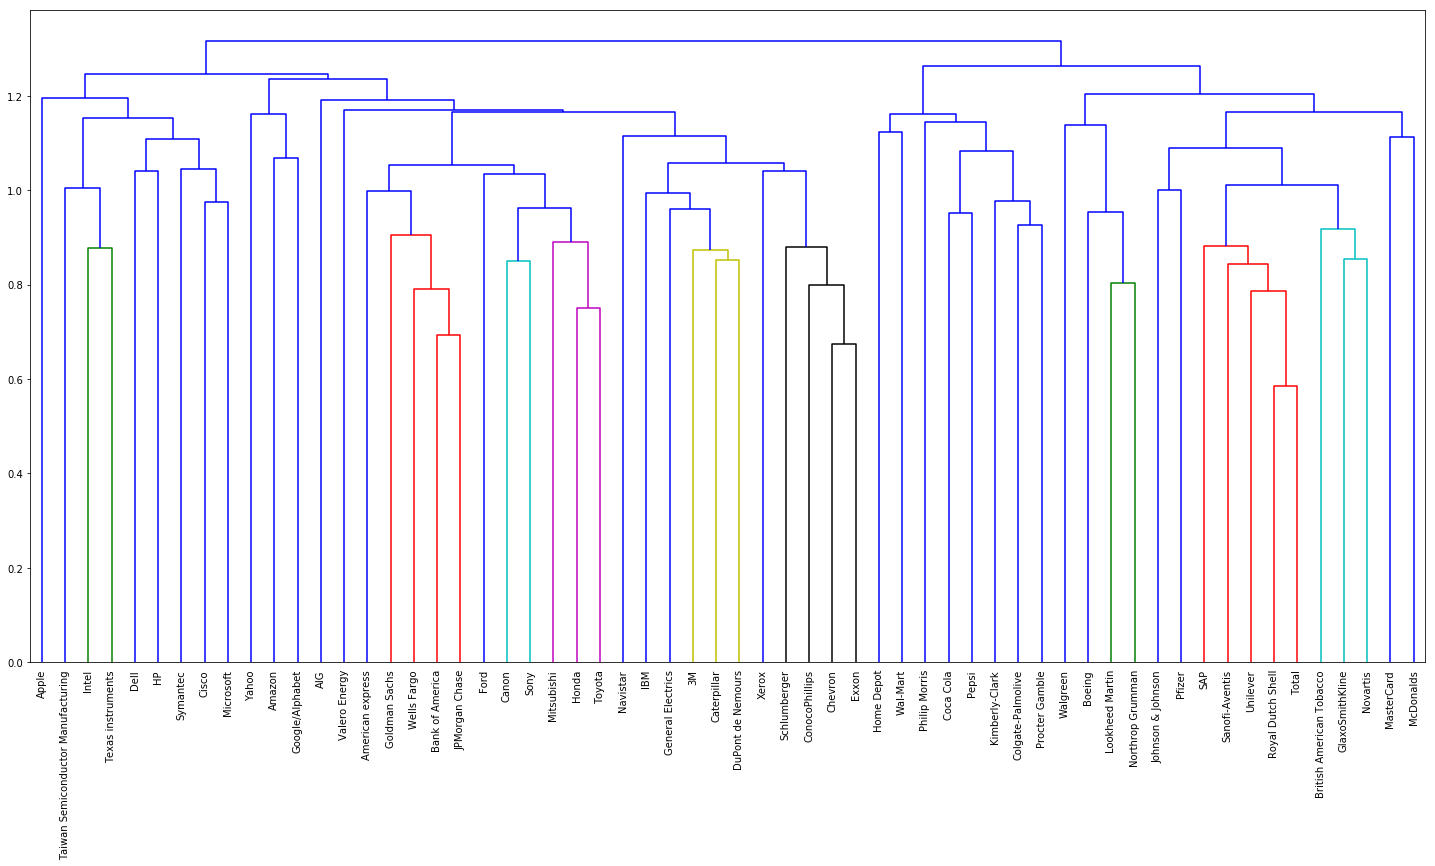

In [55]:
# Normalize the stocks_movements
normalized_movements = normalize(stock_movements)

# Calculating the linkage
mergings = linkage(normalized_movements, method='complete')

# Plotting the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.rcParams["figure.figsize"] = (25,12)
plt.show()

# T-SNE map of the stock market

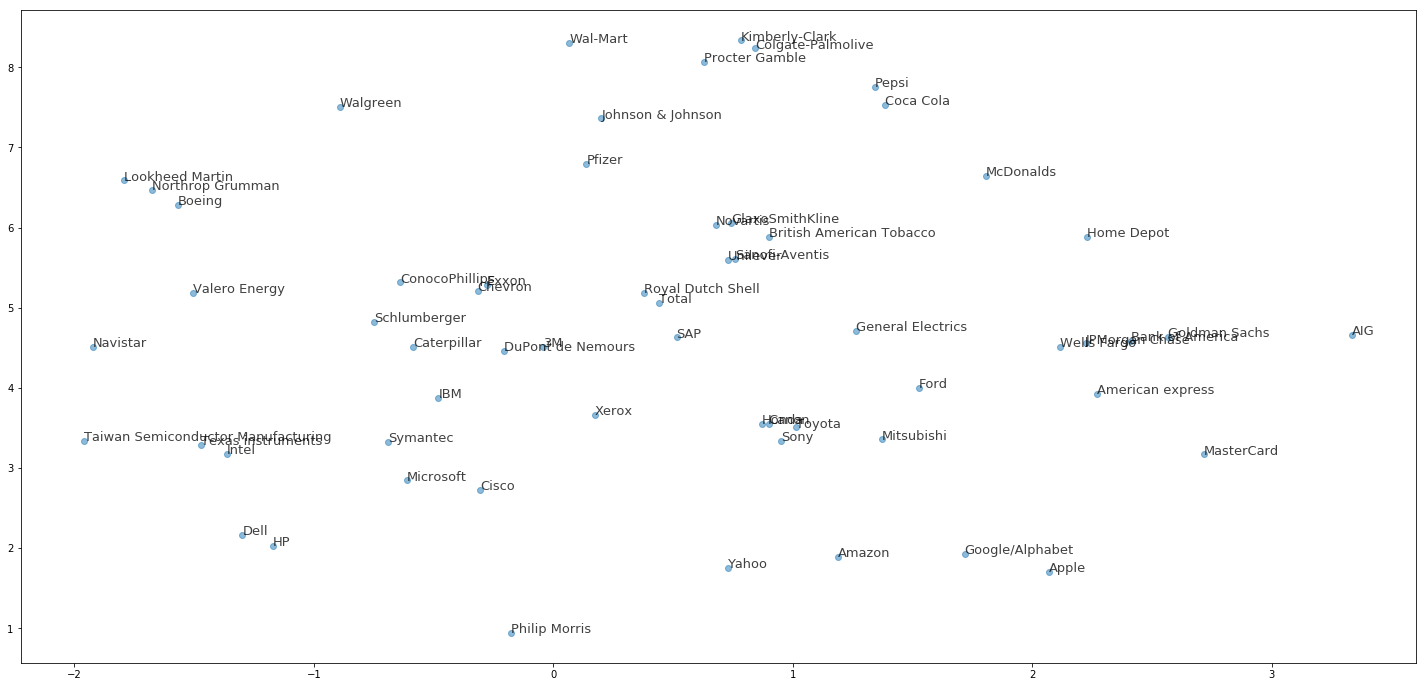

In [56]:
model = TSNE(learning_rate = 50) #Instantiating a TSNE model with learning rate of 50

tsne_features = model.fit_transform(normalized_movements)

xs = tsne_features[:, 0] #0th feature
ys = tsne_features[:,1] #1st feature

# Scatter plot of the selected features
plt.scatter(xs, ys, alpha=0.5)

# Annotating the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=13, alpha=0.75)
plt.show()
